In [10]:
import sys,os
import random
import numpy as np
import json


In [1]:
from collections import OrderedDict
from gnn import GNNNet
from utils import *
from emetrics import *
from data_process import create_dataset_for_5folds

import rdkit as rd

import deepchem
import tensorflow as tf
import pandas as pd
import pickle

/rds/user/co-gora1/hpc-work/DGraphDTA/emetrics.py:27: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if pair is not 0:
RDKit WARNING: [17:49:59] Enabling RDKit 2019.09.3 jupyter extensions
[17:49:59] Enabling RDKit 2019.09.3 jupyter extensions


In [2]:
import torch.nn as nn

### Training

In [3]:
datasets = [['davis', 'kiba'][1]]
datasets 

['kiba']

In [4]:
method=['pconsc4', 'esm_cmaps', 'alpha_fold_cmaps'][1]
method

'esm_cmaps'

In [5]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
torch.device('cuda:0')
cuda_name = ['cuda:0', 'cuda:1', 'cuda:2', 'cuda:3'][0]
print('cuda_name:', cuda_name)

cuda_name: cuda:0


In [6]:
fold = [0, 1, 2, 3, 4][3]
cross_validation_flag = True
# print(int(sys.argv[3]))

TRAIN_BATCH_SIZE = 128
TEST_BATCH_SIZE = 128
LR = 0.001
NUM_EPOCHS = 2000

print('Learning rate: ', LR)
print('Epochs: ', NUM_EPOCHS)

Learning rate:  0.001
Epochs:  2000


In [7]:
models_dir = 'models_sample'
results_dir = 'results'

if not os.path.exists(models_dir):
    os.makedirs(models_dir)

if not os.path.exists(results_dir):
    os.makedirs(results_dir)

# Main program: iterate over different datasets
result_str = ''
USE_CUDA = torch.cuda.is_available()
device = torch.device(cuda_name)
#model_file_name = 'models_sample/model_kiba_random_188_2000_GNNNet_kiba_1.model'
model = GNNNet()
model.to(device)
#model.load_state_dict(torch.load(model_file_name, map_location=cuda_name))
# model = GNNNet()
# model=model_kiba_esm__188_500_GNNNet_kiba_1.model
#model.to(device)
model_st = GNNNet.__name__
# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
loss_fn = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=LR)

GNNNet Loaded


In [8]:
for dataset in datasets:
    train_data, valid_data = create_dataset_for_5folds(dataset, fold, method)
    train_loader = torch.utils.data.DataLoader(train_data, batch_size=TRAIN_BATCH_SIZE, shuffle=True,
                                               collate_fn=collate)
    valid_loader = torch.utils.data.DataLoader(valid_data, batch_size=TEST_BATCH_SIZE, shuffle=False,
                                               collate_fn=collate)

    best_mse = 1000
    best_test_mse = 1000
    best_epoch = -1
    model_file_name = 'models_sample/model_kiba_esm_2_188_2000_' + model_st + '_' + dataset + '_' + str(fold) + '.model'
    mse_list1=[]
    for epoch in range(NUM_EPOCHS):
        train(model, device, train_loader, optimizer, epoch + 1)
        print('predicting for valid data')
        G, P = predicting(model, device, valid_loader)
        val = get_mse(G, P)
        mse_list1.append(val)
        print('valid result:', val, best_mse)
        if val < best_mse:
            best_mse = val
            best_epoch = epoch + 1
            torch.save(model.state_dict(), model_file_name)
            print('rmse improved at epoch ', best_epoch, '; best_test_mse', best_mse, model_st, dataset, fold)
        else:
            print('No improvement since epoch ', best_epoch, '; best_test_mse', best_mse, model_st, dataset, fold)


dataset: kiba
fold: 3
train entries: 63716 effective train entries 63597
valid entries: 15929 effective valid entries 15901
effective drugs,effective prot: 2068 187


/rds/user/co-gora1/hpc-work/DGraphDTA/utils.py:52: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  /opt/conda/conda-bld/pytorch_1646755903507/work/torch/csrc/utils/tensor_new.cpp:210.)
  GCNData_mol = DATA.Data(x=torch.Tensor(features),


Training on 63597 samples...
Train epoch: 1 [0/63597 (0%)]	Loss: 11.683812
Train epoch: 1 [5120/63597 (2%)]	Loss: 1.901107
Train epoch: 1 [10240/63597 (4%)]	Loss: 1.004066
Train epoch: 1 [15360/63597 (6%)]	Loss: 0.792859
Train epoch: 1 [20480/63597 (8%)]	Loss: 0.770598
Train epoch: 1 [25600/63597 (10%)]	Loss: 0.655264
Train epoch: 1 [30720/63597 (12%)]	Loss: 0.674874
Train epoch: 1 [35840/63597 (14%)]	Loss: 0.499845
Train epoch: 1 [40960/63597 (16%)]	Loss: 0.567093
Train epoch: 1 [46080/63597 (18%)]	Loss: 0.657782
Train epoch: 1 [51200/63597 (20%)]	Loss: 0.610859
Train epoch: 1 [56320/63597 (22%)]	Loss: 0.931850
Train epoch: 1 [61440/63597 (24%)]	Loss: 0.677088
Train epoch: 1 [66560/63597 (26%)]	Loss: 0.859693
Train epoch: 1 [71680/63597 (28%)]	Loss: 0.767799
Train epoch: 1 [76800/63597 (30%)]	Loss: 0.612137
Train epoch: 1 [81920/63597 (32%)]	Loss: 0.533608
Train epoch: 1 [87040/63597 (34%)]	Loss: 0.613498
Train epoch: 1 [92160/63597 (36%)]	Loss: 0.663424
Train epoch: 1 [97280/63597 (3

Train epoch: 4 [5120/63597 (2%)]	Loss: 0.602181
Train epoch: 4 [10240/63597 (4%)]	Loss: 0.950285
Train epoch: 4 [15360/63597 (6%)]	Loss: 0.382258
Train epoch: 4 [20480/63597 (8%)]	Loss: 0.606417
Train epoch: 4 [25600/63597 (10%)]	Loss: 0.640039
Train epoch: 4 [30720/63597 (12%)]	Loss: 0.890954
Train epoch: 4 [35840/63597 (14%)]	Loss: 0.655622
Train epoch: 4 [40960/63597 (16%)]	Loss: 0.669657
Train epoch: 4 [46080/63597 (18%)]	Loss: 0.547829
Train epoch: 4 [51200/63597 (20%)]	Loss: 0.590383
Train epoch: 4 [56320/63597 (22%)]	Loss: 0.586345
Train epoch: 4 [61440/63597 (24%)]	Loss: 0.622335
Train epoch: 4 [66560/63597 (26%)]	Loss: 0.779147
Train epoch: 4 [71680/63597 (28%)]	Loss: 0.562373
Train epoch: 4 [76800/63597 (30%)]	Loss: 0.739505
Train epoch: 4 [81920/63597 (32%)]	Loss: 0.479018
Train epoch: 4 [87040/63597 (34%)]	Loss: 0.630332
Train epoch: 4 [92160/63597 (36%)]	Loss: 0.815089
Train epoch: 4 [97280/63597 (38%)]	Loss: 0.536153
Train epoch: 4 [102400/63597 (40%)]	Loss: 0.795659
Trai

Train epoch: 7 [15360/63597 (6%)]	Loss: 0.612549
Train epoch: 7 [20480/63597 (8%)]	Loss: 0.639162
Train epoch: 7 [25600/63597 (10%)]	Loss: 0.510884
Train epoch: 7 [30720/63597 (12%)]	Loss: 0.464829
Train epoch: 7 [35840/63597 (14%)]	Loss: 0.812812
Train epoch: 7 [40960/63597 (16%)]	Loss: 0.559147
Train epoch: 7 [46080/63597 (18%)]	Loss: 0.829182
Train epoch: 7 [51200/63597 (20%)]	Loss: 0.543458
Train epoch: 7 [56320/63597 (22%)]	Loss: 0.518797
Train epoch: 7 [61440/63597 (24%)]	Loss: 0.682154
Train epoch: 7 [66560/63597 (26%)]	Loss: 0.761076
Train epoch: 7 [71680/63597 (28%)]	Loss: 0.613050
Train epoch: 7 [76800/63597 (30%)]	Loss: 0.823068
Train epoch: 7 [81920/63597 (32%)]	Loss: 0.582798
Train epoch: 7 [87040/63597 (34%)]	Loss: 0.970920
Train epoch: 7 [92160/63597 (36%)]	Loss: 0.559404
Train epoch: 7 [97280/63597 (38%)]	Loss: 0.780068
Train epoch: 7 [102400/63597 (40%)]	Loss: 0.664464
Train epoch: 7 [107520/63597 (42%)]	Loss: 0.879863
Train epoch: 7 [112640/63597 (44%)]	Loss: 0.820073

Train epoch: 10 [20480/63597 (8%)]	Loss: 0.658297
Train epoch: 10 [25600/63597 (10%)]	Loss: 0.566702
Train epoch: 10 [30720/63597 (12%)]	Loss: 0.665451
Train epoch: 10 [35840/63597 (14%)]	Loss: 0.560326
Train epoch: 10 [40960/63597 (16%)]	Loss: 0.634943
Train epoch: 10 [46080/63597 (18%)]	Loss: 0.494157
Train epoch: 10 [51200/63597 (20%)]	Loss: 0.446019
Train epoch: 10 [56320/63597 (22%)]	Loss: 0.595141
Train epoch: 10 [61440/63597 (24%)]	Loss: 0.667414
Train epoch: 10 [66560/63597 (26%)]	Loss: 0.725812
Train epoch: 10 [71680/63597 (28%)]	Loss: 0.530324
Train epoch: 10 [76800/63597 (30%)]	Loss: 0.492946
Train epoch: 10 [81920/63597 (32%)]	Loss: 0.504455
Train epoch: 10 [87040/63597 (34%)]	Loss: 0.408345
Train epoch: 10 [92160/63597 (36%)]	Loss: 0.719516
Train epoch: 10 [97280/63597 (38%)]	Loss: 0.940055
Train epoch: 10 [102400/63597 (40%)]	Loss: 0.588257
Train epoch: 10 [107520/63597 (42%)]	Loss: 0.504205
Train epoch: 10 [112640/63597 (44%)]	Loss: 0.851590
Train epoch: 10 [117760/63597

Train epoch: 13 [15360/63597 (6%)]	Loss: 0.601309
Train epoch: 13 [20480/63597 (8%)]	Loss: 0.661148
Train epoch: 13 [25600/63597 (10%)]	Loss: 0.522165
Train epoch: 13 [30720/63597 (12%)]	Loss: 0.485089
Train epoch: 13 [35840/63597 (14%)]	Loss: 0.502666
Train epoch: 13 [40960/63597 (16%)]	Loss: 0.732592
Train epoch: 13 [46080/63597 (18%)]	Loss: 0.710220
Train epoch: 13 [51200/63597 (20%)]	Loss: 0.492655
Train epoch: 13 [56320/63597 (22%)]	Loss: 0.491798
Train epoch: 13 [61440/63597 (24%)]	Loss: 0.514905
Train epoch: 13 [66560/63597 (26%)]	Loss: 0.430719
Train epoch: 13 [71680/63597 (28%)]	Loss: 0.530674
Train epoch: 13 [76800/63597 (30%)]	Loss: 0.512083
Train epoch: 13 [81920/63597 (32%)]	Loss: 0.531568
Train epoch: 13 [87040/63597 (34%)]	Loss: 0.503069
Train epoch: 13 [92160/63597 (36%)]	Loss: 0.475572
Train epoch: 13 [97280/63597 (38%)]	Loss: 1.299557
Train epoch: 13 [102400/63597 (40%)]	Loss: 0.768456
Train epoch: 13 [107520/63597 (42%)]	Loss: 0.787547
Train epoch: 13 [112640/63597 (

Train epoch: 16 [5120/63597 (2%)]	Loss: 0.571903
Train epoch: 16 [10240/63597 (4%)]	Loss: 0.481700
Train epoch: 16 [15360/63597 (6%)]	Loss: 0.441706
Train epoch: 16 [20480/63597 (8%)]	Loss: 0.526509
Train epoch: 16 [25600/63597 (10%)]	Loss: 0.422086
Train epoch: 16 [30720/63597 (12%)]	Loss: 0.729256
Train epoch: 16 [35840/63597 (14%)]	Loss: 0.626746
Train epoch: 16 [40960/63597 (16%)]	Loss: 0.644339
Train epoch: 16 [46080/63597 (18%)]	Loss: 0.575984
Train epoch: 16 [51200/63597 (20%)]	Loss: 0.823471
Train epoch: 16 [56320/63597 (22%)]	Loss: 0.439099
Train epoch: 16 [61440/63597 (24%)]	Loss: 0.490700
Train epoch: 16 [66560/63597 (26%)]	Loss: 0.359678
Train epoch: 16 [71680/63597 (28%)]	Loss: 0.524244
Train epoch: 16 [76800/63597 (30%)]	Loss: 0.620965
Train epoch: 16 [81920/63597 (32%)]	Loss: 0.665383
Train epoch: 16 [87040/63597 (34%)]	Loss: 0.596322
Train epoch: 16 [92160/63597 (36%)]	Loss: 0.775683
Train epoch: 16 [97280/63597 (38%)]	Loss: 0.819690
Train epoch: 16 [102400/63597 (40%)]

Train epoch: 19 [5120/63597 (2%)]	Loss: 0.485523
Train epoch: 19 [10240/63597 (4%)]	Loss: 0.439553
Train epoch: 19 [15360/63597 (6%)]	Loss: 0.745278
Train epoch: 19 [20480/63597 (8%)]	Loss: 0.430666
Train epoch: 19 [25600/63597 (10%)]	Loss: 0.598231
Train epoch: 19 [30720/63597 (12%)]	Loss: 0.388950
Train epoch: 19 [35840/63597 (14%)]	Loss: 0.622384
Train epoch: 19 [40960/63597 (16%)]	Loss: 0.368607
Train epoch: 19 [46080/63597 (18%)]	Loss: 0.653685
Train epoch: 19 [51200/63597 (20%)]	Loss: 0.507810
Train epoch: 19 [56320/63597 (22%)]	Loss: 0.749665
Train epoch: 19 [61440/63597 (24%)]	Loss: 0.410221
Train epoch: 19 [66560/63597 (26%)]	Loss: 0.439471
Train epoch: 19 [71680/63597 (28%)]	Loss: 0.565287
Train epoch: 19 [76800/63597 (30%)]	Loss: 0.500137
Train epoch: 19 [81920/63597 (32%)]	Loss: 0.567530
Train epoch: 19 [87040/63597 (34%)]	Loss: 0.484885
Train epoch: 19 [92160/63597 (36%)]	Loss: 0.644575
Train epoch: 19 [97280/63597 (38%)]	Loss: 0.520512
Train epoch: 19 [102400/63597 (40%)]

Train epoch: 22 [5120/63597 (2%)]	Loss: 0.849823
Train epoch: 22 [10240/63597 (4%)]	Loss: 0.495847
Train epoch: 22 [15360/63597 (6%)]	Loss: 0.483088
Train epoch: 22 [20480/63597 (8%)]	Loss: 0.418220
Train epoch: 22 [25600/63597 (10%)]	Loss: 0.484195
Train epoch: 22 [30720/63597 (12%)]	Loss: 0.840009
Train epoch: 22 [35840/63597 (14%)]	Loss: 0.666831
Train epoch: 22 [40960/63597 (16%)]	Loss: 0.580585
Train epoch: 22 [46080/63597 (18%)]	Loss: 0.484284
Train epoch: 22 [51200/63597 (20%)]	Loss: 0.719005
Train epoch: 22 [56320/63597 (22%)]	Loss: 0.521458
Train epoch: 22 [61440/63597 (24%)]	Loss: 0.476577
Train epoch: 22 [66560/63597 (26%)]	Loss: 0.495442
Train epoch: 22 [71680/63597 (28%)]	Loss: 0.438169
Train epoch: 22 [76800/63597 (30%)]	Loss: 0.740676
Train epoch: 22 [81920/63597 (32%)]	Loss: 0.615144
Train epoch: 22 [87040/63597 (34%)]	Loss: 0.786197
Train epoch: 22 [92160/63597 (36%)]	Loss: 0.428605
Train epoch: 22 [97280/63597 (38%)]	Loss: 0.442701
Train epoch: 22 [102400/63597 (40%)]

Train epoch: 25 [5120/63597 (2%)]	Loss: 0.366956
Train epoch: 25 [10240/63597 (4%)]	Loss: 0.485040
Train epoch: 25 [15360/63597 (6%)]	Loss: 0.330127
Train epoch: 25 [20480/63597 (8%)]	Loss: 0.374500
Train epoch: 25 [25600/63597 (10%)]	Loss: 0.611889
Train epoch: 25 [30720/63597 (12%)]	Loss: 0.527232
Train epoch: 25 [35840/63597 (14%)]	Loss: 0.471892
Train epoch: 25 [40960/63597 (16%)]	Loss: 0.706897
Train epoch: 25 [46080/63597 (18%)]	Loss: 0.461842
Train epoch: 25 [51200/63597 (20%)]	Loss: 0.495092
Train epoch: 25 [56320/63597 (22%)]	Loss: 0.373716
Train epoch: 25 [61440/63597 (24%)]	Loss: 0.514117
Train epoch: 25 [66560/63597 (26%)]	Loss: 0.502282
Train epoch: 25 [71680/63597 (28%)]	Loss: 0.533752
Train epoch: 25 [76800/63597 (30%)]	Loss: 0.442309
Train epoch: 25 [81920/63597 (32%)]	Loss: 0.472118
Train epoch: 25 [87040/63597 (34%)]	Loss: 0.612087
Train epoch: 25 [92160/63597 (36%)]	Loss: 0.469170
Train epoch: 25 [97280/63597 (38%)]	Loss: 0.583758
Train epoch: 25 [102400/63597 (40%)]

Train epoch: 28 [5120/63597 (2%)]	Loss: 0.658468
Train epoch: 28 [10240/63597 (4%)]	Loss: 0.643711
Train epoch: 28 [15360/63597 (6%)]	Loss: 0.551991
Train epoch: 28 [20480/63597 (8%)]	Loss: 0.498770
Train epoch: 28 [25600/63597 (10%)]	Loss: 0.594678
Train epoch: 28 [30720/63597 (12%)]	Loss: 0.470959
Train epoch: 28 [35840/63597 (14%)]	Loss: 0.543363
Train epoch: 28 [40960/63597 (16%)]	Loss: 0.547903
Train epoch: 28 [46080/63597 (18%)]	Loss: 0.554543
Train epoch: 28 [51200/63597 (20%)]	Loss: 0.540016
Train epoch: 28 [56320/63597 (22%)]	Loss: 0.440353
Train epoch: 28 [61440/63597 (24%)]	Loss: 0.619871
Train epoch: 28 [66560/63597 (26%)]	Loss: 0.501294
Train epoch: 28 [71680/63597 (28%)]	Loss: 0.454836
Train epoch: 28 [76800/63597 (30%)]	Loss: 0.557575
Train epoch: 28 [81920/63597 (32%)]	Loss: 0.668582
Train epoch: 28 [87040/63597 (34%)]	Loss: 0.598769
Train epoch: 28 [92160/63597 (36%)]	Loss: 0.361811
Train epoch: 28 [97280/63597 (38%)]	Loss: 0.348052
Train epoch: 28 [102400/63597 (40%)]

Train epoch: 31 [5120/63597 (2%)]	Loss: 0.373431
Train epoch: 31 [10240/63597 (4%)]	Loss: 0.576976
Train epoch: 31 [15360/63597 (6%)]	Loss: 0.522264
Train epoch: 31 [20480/63597 (8%)]	Loss: 0.614702
Train epoch: 31 [25600/63597 (10%)]	Loss: 0.641381
Train epoch: 31 [30720/63597 (12%)]	Loss: 0.448269
Train epoch: 31 [35840/63597 (14%)]	Loss: 0.516353
Train epoch: 31 [40960/63597 (16%)]	Loss: 0.585846
Train epoch: 31 [46080/63597 (18%)]	Loss: 0.446099
Train epoch: 31 [51200/63597 (20%)]	Loss: 0.455907
Train epoch: 31 [56320/63597 (22%)]	Loss: 0.629134
Train epoch: 31 [61440/63597 (24%)]	Loss: 0.321240
Train epoch: 31 [66560/63597 (26%)]	Loss: 0.598868
Train epoch: 31 [71680/63597 (28%)]	Loss: 0.460433
Train epoch: 31 [76800/63597 (30%)]	Loss: 0.482851
Train epoch: 31 [81920/63597 (32%)]	Loss: 0.466062
Train epoch: 31 [87040/63597 (34%)]	Loss: 0.555958
Train epoch: 31 [92160/63597 (36%)]	Loss: 0.473760
Train epoch: 31 [97280/63597 (38%)]	Loss: 0.622574
Train epoch: 31 [102400/63597 (40%)]

Train epoch: 34 [5120/63597 (2%)]	Loss: 0.357991
Train epoch: 34 [10240/63597 (4%)]	Loss: 0.470741
Train epoch: 34 [15360/63597 (6%)]	Loss: 0.430508
Train epoch: 34 [20480/63597 (8%)]	Loss: 0.376452
Train epoch: 34 [25600/63597 (10%)]	Loss: 0.427867
Train epoch: 34 [30720/63597 (12%)]	Loss: 0.601092
Train epoch: 34 [35840/63597 (14%)]	Loss: 0.434045
Train epoch: 34 [40960/63597 (16%)]	Loss: 0.656304
Train epoch: 34 [46080/63597 (18%)]	Loss: 0.747143
Train epoch: 34 [51200/63597 (20%)]	Loss: 0.473058
Train epoch: 34 [56320/63597 (22%)]	Loss: 0.666282
Train epoch: 34 [61440/63597 (24%)]	Loss: 0.479263
Train epoch: 34 [66560/63597 (26%)]	Loss: 0.423505
Train epoch: 34 [71680/63597 (28%)]	Loss: 0.512083
Train epoch: 34 [76800/63597 (30%)]	Loss: 0.494665
Train epoch: 34 [81920/63597 (32%)]	Loss: 0.422361
Train epoch: 34 [87040/63597 (34%)]	Loss: 0.539001
Train epoch: 34 [92160/63597 (36%)]	Loss: 0.482135
Train epoch: 34 [97280/63597 (38%)]	Loss: 0.398199
Train epoch: 34 [102400/63597 (40%)]

Train epoch: 37 [5120/63597 (2%)]	Loss: 0.266643
Train epoch: 37 [10240/63597 (4%)]	Loss: 0.422595
Train epoch: 37 [15360/63597 (6%)]	Loss: 0.427960
Train epoch: 37 [20480/63597 (8%)]	Loss: 0.393733
Train epoch: 37 [25600/63597 (10%)]	Loss: 0.581478
Train epoch: 37 [30720/63597 (12%)]	Loss: 0.611706
Train epoch: 37 [35840/63597 (14%)]	Loss: 0.354926
Train epoch: 37 [40960/63597 (16%)]	Loss: 0.355477
Train epoch: 37 [46080/63597 (18%)]	Loss: 0.528391
Train epoch: 37 [51200/63597 (20%)]	Loss: 0.263377
Train epoch: 37 [56320/63597 (22%)]	Loss: 0.412588
Train epoch: 37 [61440/63597 (24%)]	Loss: 0.388750
Train epoch: 37 [66560/63597 (26%)]	Loss: 0.394026
Train epoch: 37 [71680/63597 (28%)]	Loss: 0.626496
Train epoch: 37 [76800/63597 (30%)]	Loss: 0.346787
Train epoch: 37 [81920/63597 (32%)]	Loss: 0.463836
Train epoch: 37 [87040/63597 (34%)]	Loss: 0.417900
Train epoch: 37 [92160/63597 (36%)]	Loss: 0.423825
Train epoch: 37 [97280/63597 (38%)]	Loss: 0.521833
Train epoch: 37 [102400/63597 (40%)]

Train epoch: 40 [5120/63597 (2%)]	Loss: 0.317305
Train epoch: 40 [10240/63597 (4%)]	Loss: 0.403802
Train epoch: 40 [15360/63597 (6%)]	Loss: 0.519910
Train epoch: 40 [20480/63597 (8%)]	Loss: 0.374635
Train epoch: 40 [25600/63597 (10%)]	Loss: 0.472963
Train epoch: 40 [30720/63597 (12%)]	Loss: 0.355354
Train epoch: 40 [35840/63597 (14%)]	Loss: 0.425640
Train epoch: 40 [40960/63597 (16%)]	Loss: 0.449594
Train epoch: 40 [46080/63597 (18%)]	Loss: 0.493591
Train epoch: 40 [51200/63597 (20%)]	Loss: 0.592192
Train epoch: 40 [56320/63597 (22%)]	Loss: 0.533852
Train epoch: 40 [61440/63597 (24%)]	Loss: 0.548845
Train epoch: 40 [66560/63597 (26%)]	Loss: 0.386820
Train epoch: 40 [71680/63597 (28%)]	Loss: 0.418868
Train epoch: 40 [76800/63597 (30%)]	Loss: 0.439368
Train epoch: 40 [81920/63597 (32%)]	Loss: 1.472706
Train epoch: 40 [87040/63597 (34%)]	Loss: 0.459825
Train epoch: 40 [92160/63597 (36%)]	Loss: 0.479867
Train epoch: 40 [97280/63597 (38%)]	Loss: 0.541024
Train epoch: 40 [102400/63597 (40%)]

Train epoch: 43 [5120/63597 (2%)]	Loss: 0.437054
Train epoch: 43 [10240/63597 (4%)]	Loss: 0.617360
Train epoch: 43 [15360/63597 (6%)]	Loss: 0.334737
Train epoch: 43 [20480/63597 (8%)]	Loss: 0.529740
Train epoch: 43 [25600/63597 (10%)]	Loss: 0.446216
Train epoch: 43 [30720/63597 (12%)]	Loss: 0.382889
Train epoch: 43 [35840/63597 (14%)]	Loss: 0.533391
Train epoch: 43 [40960/63597 (16%)]	Loss: 0.643054
Train epoch: 43 [46080/63597 (18%)]	Loss: 0.506940
Train epoch: 43 [51200/63597 (20%)]	Loss: 0.549984
Train epoch: 43 [56320/63597 (22%)]	Loss: 0.559037
Train epoch: 43 [61440/63597 (24%)]	Loss: 0.530375
Train epoch: 43 [66560/63597 (26%)]	Loss: 0.356323
Train epoch: 43 [71680/63597 (28%)]	Loss: 0.438876
Train epoch: 43 [76800/63597 (30%)]	Loss: 0.425732
Train epoch: 43 [81920/63597 (32%)]	Loss: 0.565724
Train epoch: 43 [87040/63597 (34%)]	Loss: 0.714556
Train epoch: 43 [92160/63597 (36%)]	Loss: 0.372262
Train epoch: 43 [97280/63597 (38%)]	Loss: 0.310340
Train epoch: 43 [102400/63597 (40%)]

Train epoch: 46 [5120/63597 (2%)]	Loss: 0.278813
Train epoch: 46 [10240/63597 (4%)]	Loss: 0.382353
Train epoch: 46 [15360/63597 (6%)]	Loss: 0.407722
Train epoch: 46 [20480/63597 (8%)]	Loss: 0.526343
Train epoch: 46 [25600/63597 (10%)]	Loss: 0.309430
Train epoch: 46 [30720/63597 (12%)]	Loss: 0.254820
Train epoch: 46 [35840/63597 (14%)]	Loss: 0.562406
Train epoch: 46 [40960/63597 (16%)]	Loss: 0.397729
Train epoch: 46 [46080/63597 (18%)]	Loss: 0.356378
Train epoch: 46 [51200/63597 (20%)]	Loss: 0.433855
Train epoch: 46 [56320/63597 (22%)]	Loss: 0.527458
Train epoch: 46 [61440/63597 (24%)]	Loss: 0.464327
Train epoch: 46 [66560/63597 (26%)]	Loss: 0.319127
Train epoch: 46 [71680/63597 (28%)]	Loss: 0.228659
Train epoch: 46 [76800/63597 (30%)]	Loss: 0.428524
Train epoch: 46 [81920/63597 (32%)]	Loss: 0.431189
Train epoch: 46 [87040/63597 (34%)]	Loss: 0.512247
Train epoch: 46 [92160/63597 (36%)]	Loss: 0.519606
Train epoch: 46 [97280/63597 (38%)]	Loss: 0.368897
Train epoch: 46 [102400/63597 (40%)]

Train epoch: 49 [5120/63597 (2%)]	Loss: 0.387877
Train epoch: 49 [10240/63597 (4%)]	Loss: 0.378656
Train epoch: 49 [15360/63597 (6%)]	Loss: 0.383699
Train epoch: 49 [20480/63597 (8%)]	Loss: 0.368789
Train epoch: 49 [25600/63597 (10%)]	Loss: 0.449332
Train epoch: 49 [30720/63597 (12%)]	Loss: 0.375198
Train epoch: 49 [35840/63597 (14%)]	Loss: 0.364214
Train epoch: 49 [40960/63597 (16%)]	Loss: 0.396158
Train epoch: 49 [46080/63597 (18%)]	Loss: 0.397083
Train epoch: 49 [51200/63597 (20%)]	Loss: 0.568826
Train epoch: 49 [56320/63597 (22%)]	Loss: 0.276321
Train epoch: 49 [61440/63597 (24%)]	Loss: 0.298305
Train epoch: 49 [66560/63597 (26%)]	Loss: 0.480334
Train epoch: 49 [71680/63597 (28%)]	Loss: 0.382243
Train epoch: 49 [76800/63597 (30%)]	Loss: 0.441231
Train epoch: 49 [81920/63597 (32%)]	Loss: 0.541389
Train epoch: 49 [87040/63597 (34%)]	Loss: 0.444386
Train epoch: 49 [92160/63597 (36%)]	Loss: 0.322674
Train epoch: 49 [97280/63597 (38%)]	Loss: 0.581928
Train epoch: 49 [102400/63597 (40%)]

Train epoch: 52 [5120/63597 (2%)]	Loss: 0.409931
Train epoch: 52 [10240/63597 (4%)]	Loss: 0.435821
Train epoch: 52 [15360/63597 (6%)]	Loss: 0.365682
Train epoch: 52 [20480/63597 (8%)]	Loss: 0.298612
Train epoch: 52 [25600/63597 (10%)]	Loss: 0.409721
Train epoch: 52 [30720/63597 (12%)]	Loss: 0.488914
Train epoch: 52 [35840/63597 (14%)]	Loss: 0.274497
Train epoch: 52 [40960/63597 (16%)]	Loss: 0.468992
Train epoch: 52 [46080/63597 (18%)]	Loss: 0.409413
Train epoch: 52 [51200/63597 (20%)]	Loss: 0.291384
Train epoch: 52 [56320/63597 (22%)]	Loss: 0.455368
Train epoch: 52 [61440/63597 (24%)]	Loss: 0.590134
Train epoch: 52 [66560/63597 (26%)]	Loss: 0.464059
Train epoch: 52 [71680/63597 (28%)]	Loss: 0.401642
Train epoch: 52 [76800/63597 (30%)]	Loss: 0.389100
Train epoch: 52 [81920/63597 (32%)]	Loss: 0.246862
Train epoch: 52 [87040/63597 (34%)]	Loss: 0.484679
Train epoch: 52 [92160/63597 (36%)]	Loss: 0.446648
Train epoch: 52 [97280/63597 (38%)]	Loss: 0.390885
Train epoch: 52 [102400/63597 (40%)]

Train epoch: 55 [5120/63597 (2%)]	Loss: 0.405083
Train epoch: 55 [10240/63597 (4%)]	Loss: 0.399878
Train epoch: 55 [15360/63597 (6%)]	Loss: 0.407437
Train epoch: 55 [20480/63597 (8%)]	Loss: 0.361399
Train epoch: 55 [25600/63597 (10%)]	Loss: 0.289728
Train epoch: 55 [30720/63597 (12%)]	Loss: 0.623476
Train epoch: 55 [35840/63597 (14%)]	Loss: 0.476311
Train epoch: 55 [40960/63597 (16%)]	Loss: 0.464594
Train epoch: 55 [46080/63597 (18%)]	Loss: 0.420775
Train epoch: 55 [51200/63597 (20%)]	Loss: 0.255202
Train epoch: 55 [56320/63597 (22%)]	Loss: 0.536156
Train epoch: 55 [61440/63597 (24%)]	Loss: 0.376951
Train epoch: 55 [66560/63597 (26%)]	Loss: 0.576761
Train epoch: 55 [71680/63597 (28%)]	Loss: 0.661271
Train epoch: 55 [76800/63597 (30%)]	Loss: 0.383089
Train epoch: 55 [81920/63597 (32%)]	Loss: 0.301586
Train epoch: 55 [87040/63597 (34%)]	Loss: 0.418708
Train epoch: 55 [92160/63597 (36%)]	Loss: 0.505771
Train epoch: 55 [97280/63597 (38%)]	Loss: 0.418007
Train epoch: 55 [102400/63597 (40%)]

Train epoch: 58 [5120/63597 (2%)]	Loss: 0.441066
Train epoch: 58 [10240/63597 (4%)]	Loss: 0.518496
Train epoch: 58 [15360/63597 (6%)]	Loss: 0.321356
Train epoch: 58 [20480/63597 (8%)]	Loss: 0.413546
Train epoch: 58 [25600/63597 (10%)]	Loss: 0.467880
Train epoch: 58 [30720/63597 (12%)]	Loss: 0.450503
Train epoch: 58 [35840/63597 (14%)]	Loss: 0.423090
Train epoch: 58 [40960/63597 (16%)]	Loss: 0.507563
Train epoch: 58 [46080/63597 (18%)]	Loss: 0.358113
Train epoch: 58 [51200/63597 (20%)]	Loss: 0.384645
Train epoch: 58 [56320/63597 (22%)]	Loss: 0.356328
Train epoch: 58 [61440/63597 (24%)]	Loss: 0.431495
Train epoch: 58 [66560/63597 (26%)]	Loss: 0.338002
Train epoch: 58 [71680/63597 (28%)]	Loss: 0.280546
Train epoch: 58 [76800/63597 (30%)]	Loss: 0.277666
Train epoch: 58 [81920/63597 (32%)]	Loss: 0.511863
Train epoch: 58 [87040/63597 (34%)]	Loss: 0.460239
Train epoch: 58 [92160/63597 (36%)]	Loss: 0.328798
Train epoch: 58 [97280/63597 (38%)]	Loss: 0.519635
Train epoch: 58 [102400/63597 (40%)]

Train epoch: 61 [5120/63597 (2%)]	Loss: 0.397553
Train epoch: 61 [10240/63597 (4%)]	Loss: 0.416038
Train epoch: 61 [15360/63597 (6%)]	Loss: 0.374649
Train epoch: 61 [20480/63597 (8%)]	Loss: 0.396157
Train epoch: 61 [25600/63597 (10%)]	Loss: 0.259185
Train epoch: 61 [30720/63597 (12%)]	Loss: 0.485017
Train epoch: 61 [35840/63597 (14%)]	Loss: 0.542864
Train epoch: 61 [40960/63597 (16%)]	Loss: 0.285161
Train epoch: 61 [46080/63597 (18%)]	Loss: 0.544629
Train epoch: 61 [51200/63597 (20%)]	Loss: 0.279868
Train epoch: 61 [56320/63597 (22%)]	Loss: 0.334590
Train epoch: 61 [61440/63597 (24%)]	Loss: 0.321918
Train epoch: 61 [66560/63597 (26%)]	Loss: 0.275739
Train epoch: 61 [71680/63597 (28%)]	Loss: 0.519193
Train epoch: 61 [76800/63597 (30%)]	Loss: 0.322225
Train epoch: 61 [81920/63597 (32%)]	Loss: 0.438754
Train epoch: 61 [87040/63597 (34%)]	Loss: 0.488708
Train epoch: 61 [92160/63597 (36%)]	Loss: 0.267115
Train epoch: 61 [97280/63597 (38%)]	Loss: 0.419980
Train epoch: 61 [102400/63597 (40%)]

Train epoch: 64 [5120/63597 (2%)]	Loss: 0.387456
Train epoch: 64 [10240/63597 (4%)]	Loss: 0.334888
Train epoch: 64 [15360/63597 (6%)]	Loss: 0.313704
Train epoch: 64 [20480/63597 (8%)]	Loss: 0.271202
Train epoch: 64 [25600/63597 (10%)]	Loss: 0.497113
Train epoch: 64 [30720/63597 (12%)]	Loss: 0.284176
Train epoch: 64 [35840/63597 (14%)]	Loss: 0.313138
Train epoch: 64 [40960/63597 (16%)]	Loss: 0.477751
Train epoch: 64 [46080/63597 (18%)]	Loss: 0.532326
Train epoch: 64 [51200/63597 (20%)]	Loss: 0.354080
Train epoch: 64 [56320/63597 (22%)]	Loss: 0.398602
Train epoch: 64 [61440/63597 (24%)]	Loss: 0.409772
Train epoch: 64 [66560/63597 (26%)]	Loss: 0.343941
Train epoch: 64 [71680/63597 (28%)]	Loss: 0.375521
Train epoch: 64 [76800/63597 (30%)]	Loss: 0.357905
Train epoch: 64 [81920/63597 (32%)]	Loss: 0.420591
Train epoch: 64 [87040/63597 (34%)]	Loss: 0.344412
Train epoch: 64 [92160/63597 (36%)]	Loss: 0.376221
Train epoch: 64 [97280/63597 (38%)]	Loss: 0.326279
Train epoch: 64 [102400/63597 (40%)]

Train epoch: 67 [5120/63597 (2%)]	Loss: 0.408906
Train epoch: 67 [10240/63597 (4%)]	Loss: 0.526303
Train epoch: 67 [15360/63597 (6%)]	Loss: 0.371179
Train epoch: 67 [20480/63597 (8%)]	Loss: 0.362390
Train epoch: 67 [25600/63597 (10%)]	Loss: 0.390408
Train epoch: 67 [30720/63597 (12%)]	Loss: 0.287311
Train epoch: 67 [35840/63597 (14%)]	Loss: 0.233030
Train epoch: 67 [40960/63597 (16%)]	Loss: 0.524708
Train epoch: 67 [46080/63597 (18%)]	Loss: 0.362728
Train epoch: 67 [51200/63597 (20%)]	Loss: 0.348646
Train epoch: 67 [56320/63597 (22%)]	Loss: 0.348421
Train epoch: 67 [61440/63597 (24%)]	Loss: 0.453447
Train epoch: 67 [66560/63597 (26%)]	Loss: 0.277041
Train epoch: 67 [71680/63597 (28%)]	Loss: 0.221102
Train epoch: 67 [76800/63597 (30%)]	Loss: 0.483777
Train epoch: 67 [81920/63597 (32%)]	Loss: 0.290773
Train epoch: 67 [87040/63597 (34%)]	Loss: 0.493939
Train epoch: 67 [92160/63597 (36%)]	Loss: 0.387565
Train epoch: 67 [97280/63597 (38%)]	Loss: 0.402466
Train epoch: 67 [102400/63597 (40%)]

Train epoch: 70 [5120/63597 (2%)]	Loss: 0.247838
Train epoch: 70 [10240/63597 (4%)]	Loss: 0.294483
Train epoch: 70 [15360/63597 (6%)]	Loss: 0.501820
Train epoch: 70 [20480/63597 (8%)]	Loss: 0.377439
Train epoch: 70 [25600/63597 (10%)]	Loss: 0.454055
Train epoch: 70 [30720/63597 (12%)]	Loss: 0.271666
Train epoch: 70 [35840/63597 (14%)]	Loss: 0.348833
Train epoch: 70 [40960/63597 (16%)]	Loss: 0.340641
Train epoch: 70 [46080/63597 (18%)]	Loss: 0.422698
Train epoch: 70 [51200/63597 (20%)]	Loss: 0.425398
Train epoch: 70 [56320/63597 (22%)]	Loss: 0.359383
Train epoch: 70 [61440/63597 (24%)]	Loss: 0.381239
Train epoch: 70 [66560/63597 (26%)]	Loss: 0.459327
Train epoch: 70 [71680/63597 (28%)]	Loss: 0.355698
Train epoch: 70 [76800/63597 (30%)]	Loss: 0.326362
Train epoch: 70 [81920/63597 (32%)]	Loss: 1.394362
Train epoch: 70 [87040/63597 (34%)]	Loss: 0.308038
Train epoch: 70 [92160/63597 (36%)]	Loss: 0.338064
Train epoch: 70 [97280/63597 (38%)]	Loss: 0.362587
Train epoch: 70 [102400/63597 (40%)]

Train epoch: 73 [5120/63597 (2%)]	Loss: 0.398943
Train epoch: 73 [10240/63597 (4%)]	Loss: 0.289897
Train epoch: 73 [15360/63597 (6%)]	Loss: 0.385822
Train epoch: 73 [20480/63597 (8%)]	Loss: 0.489279
Train epoch: 73 [25600/63597 (10%)]	Loss: 0.237386
Train epoch: 73 [30720/63597 (12%)]	Loss: 0.538976
Train epoch: 73 [35840/63597 (14%)]	Loss: 0.356251
Train epoch: 73 [40960/63597 (16%)]	Loss: 0.358824
Train epoch: 73 [46080/63597 (18%)]	Loss: 0.438177
Train epoch: 73 [51200/63597 (20%)]	Loss: 0.317395
Train epoch: 73 [56320/63597 (22%)]	Loss: 0.548391
Train epoch: 73 [61440/63597 (24%)]	Loss: 0.411538
Train epoch: 73 [66560/63597 (26%)]	Loss: 0.511697
Train epoch: 73 [71680/63597 (28%)]	Loss: 0.253752
Train epoch: 73 [76800/63597 (30%)]	Loss: 0.288253
Train epoch: 73 [81920/63597 (32%)]	Loss: 0.378991
Train epoch: 73 [87040/63597 (34%)]	Loss: 0.435310
Train epoch: 73 [92160/63597 (36%)]	Loss: 0.374482
Train epoch: 73 [97280/63597 (38%)]	Loss: 0.368584
Train epoch: 73 [102400/63597 (40%)]

Train epoch: 76 [5120/63597 (2%)]	Loss: 0.377958
Train epoch: 76 [10240/63597 (4%)]	Loss: 0.454931
Train epoch: 76 [15360/63597 (6%)]	Loss: 0.349729
Train epoch: 76 [20480/63597 (8%)]	Loss: 0.283055
Train epoch: 76 [25600/63597 (10%)]	Loss: 0.309706
Train epoch: 76 [30720/63597 (12%)]	Loss: 0.354779
Train epoch: 76 [35840/63597 (14%)]	Loss: 1.353695
Train epoch: 76 [40960/63597 (16%)]	Loss: 0.315584
Train epoch: 76 [46080/63597 (18%)]	Loss: 0.349315
Train epoch: 76 [51200/63597 (20%)]	Loss: 0.379089
Train epoch: 76 [56320/63597 (22%)]	Loss: 0.324170
Train epoch: 76 [61440/63597 (24%)]	Loss: 0.241791
Train epoch: 76 [66560/63597 (26%)]	Loss: 0.318286
Train epoch: 76 [71680/63597 (28%)]	Loss: 0.545955
Train epoch: 76 [76800/63597 (30%)]	Loss: 0.363525
Train epoch: 76 [81920/63597 (32%)]	Loss: 0.355017
Train epoch: 76 [87040/63597 (34%)]	Loss: 0.276814
Train epoch: 76 [92160/63597 (36%)]	Loss: 0.456100
Train epoch: 76 [97280/63597 (38%)]	Loss: 0.358244
Train epoch: 76 [102400/63597 (40%)]

Train epoch: 79 [5120/63597 (2%)]	Loss: 0.352450
Train epoch: 79 [10240/63597 (4%)]	Loss: 0.443046
Train epoch: 79 [15360/63597 (6%)]	Loss: 0.492843
Train epoch: 79 [20480/63597 (8%)]	Loss: 0.385972
Train epoch: 79 [25600/63597 (10%)]	Loss: 0.356382
Train epoch: 79 [30720/63597 (12%)]	Loss: 0.443668
Train epoch: 79 [35840/63597 (14%)]	Loss: 0.250085
Train epoch: 79 [40960/63597 (16%)]	Loss: 0.395695
Train epoch: 79 [46080/63597 (18%)]	Loss: 0.343674
Train epoch: 79 [51200/63597 (20%)]	Loss: 0.321562
Train epoch: 79 [56320/63597 (22%)]	Loss: 0.333006
Train epoch: 79 [61440/63597 (24%)]	Loss: 0.294943
Train epoch: 79 [66560/63597 (26%)]	Loss: 0.311376
Train epoch: 79 [71680/63597 (28%)]	Loss: 0.383668
Train epoch: 79 [76800/63597 (30%)]	Loss: 0.362253
Train epoch: 79 [81920/63597 (32%)]	Loss: 0.465299
Train epoch: 79 [87040/63597 (34%)]	Loss: 0.328886
Train epoch: 79 [92160/63597 (36%)]	Loss: 0.419040
Train epoch: 79 [97280/63597 (38%)]	Loss: 0.334155
Train epoch: 79 [102400/63597 (40%)]

Train epoch: 82 [5120/63597 (2%)]	Loss: 0.349130
Train epoch: 82 [10240/63597 (4%)]	Loss: 0.522513
Train epoch: 82 [15360/63597 (6%)]	Loss: 0.331919
Train epoch: 82 [20480/63597 (8%)]	Loss: 0.332444
Train epoch: 82 [25600/63597 (10%)]	Loss: 0.243631
Train epoch: 82 [30720/63597 (12%)]	Loss: 0.343731
Train epoch: 82 [35840/63597 (14%)]	Loss: 0.264341
Train epoch: 82 [40960/63597 (16%)]	Loss: 0.325569
Train epoch: 82 [46080/63597 (18%)]	Loss: 0.504797
Train epoch: 82 [51200/63597 (20%)]	Loss: 0.317140
Train epoch: 82 [56320/63597 (22%)]	Loss: 0.229883
Train epoch: 82 [61440/63597 (24%)]	Loss: 0.435954
Train epoch: 82 [66560/63597 (26%)]	Loss: 0.363042
Train epoch: 82 [71680/63597 (28%)]	Loss: 0.407080
Train epoch: 82 [76800/63597 (30%)]	Loss: 0.314933
Train epoch: 82 [81920/63597 (32%)]	Loss: 0.536455
Train epoch: 82 [87040/63597 (34%)]	Loss: 0.443789
Train epoch: 82 [92160/63597 (36%)]	Loss: 0.280362
Train epoch: 82 [97280/63597 (38%)]	Loss: 0.328441
Train epoch: 82 [102400/63597 (40%)]

Train epoch: 85 [5120/63597 (2%)]	Loss: 0.351860
Train epoch: 85 [10240/63597 (4%)]	Loss: 0.414415
Train epoch: 85 [15360/63597 (6%)]	Loss: 0.169859
Train epoch: 85 [20480/63597 (8%)]	Loss: 0.299337
Train epoch: 85 [25600/63597 (10%)]	Loss: 0.428812
Train epoch: 85 [30720/63597 (12%)]	Loss: 0.401035
Train epoch: 85 [35840/63597 (14%)]	Loss: 0.252993
Train epoch: 85 [40960/63597 (16%)]	Loss: 0.473015
Train epoch: 85 [46080/63597 (18%)]	Loss: 0.266979
Train epoch: 85 [51200/63597 (20%)]	Loss: 0.264343
Train epoch: 85 [56320/63597 (22%)]	Loss: 0.279163
Train epoch: 85 [61440/63597 (24%)]	Loss: 0.423669
Train epoch: 85 [66560/63597 (26%)]	Loss: 0.471319
Train epoch: 85 [71680/63597 (28%)]	Loss: 0.289455
Train epoch: 85 [76800/63597 (30%)]	Loss: 0.295393
Train epoch: 85 [81920/63597 (32%)]	Loss: 0.284202
Train epoch: 85 [87040/63597 (34%)]	Loss: 0.395145
Train epoch: 85 [92160/63597 (36%)]	Loss: 0.254667
Train epoch: 85 [97280/63597 (38%)]	Loss: 0.350199
Train epoch: 85 [102400/63597 (40%)]

Train epoch: 88 [5120/63597 (2%)]	Loss: 0.300544
Train epoch: 88 [10240/63597 (4%)]	Loss: 0.258842
Train epoch: 88 [15360/63597 (6%)]	Loss: 0.283634
Train epoch: 88 [20480/63597 (8%)]	Loss: 0.215666
Train epoch: 88 [25600/63597 (10%)]	Loss: 0.357318
Train epoch: 88 [30720/63597 (12%)]	Loss: 0.316669
Train epoch: 88 [35840/63597 (14%)]	Loss: 0.302418
Train epoch: 88 [40960/63597 (16%)]	Loss: 0.314158
Train epoch: 88 [46080/63597 (18%)]	Loss: 0.330169
Train epoch: 88 [51200/63597 (20%)]	Loss: 0.357006
Train epoch: 88 [56320/63597 (22%)]	Loss: 0.423984
Train epoch: 88 [61440/63597 (24%)]	Loss: 0.331642
Train epoch: 88 [66560/63597 (26%)]	Loss: 0.521672
Train epoch: 88 [71680/63597 (28%)]	Loss: 0.432690
Train epoch: 88 [76800/63597 (30%)]	Loss: 0.384385
Train epoch: 88 [81920/63597 (32%)]	Loss: 0.324710
Train epoch: 88 [87040/63597 (34%)]	Loss: 0.276166
Train epoch: 88 [92160/63597 (36%)]	Loss: 0.370184
Train epoch: 88 [97280/63597 (38%)]	Loss: 0.301724
Train epoch: 88 [102400/63597 (40%)]

Train epoch: 91 [5120/63597 (2%)]	Loss: 0.194355
Train epoch: 91 [10240/63597 (4%)]	Loss: 0.308893
Train epoch: 91 [15360/63597 (6%)]	Loss: 0.260164
Train epoch: 91 [20480/63597 (8%)]	Loss: 0.289183
Train epoch: 91 [25600/63597 (10%)]	Loss: 0.232566
Train epoch: 91 [30720/63597 (12%)]	Loss: 0.365250
Train epoch: 91 [35840/63597 (14%)]	Loss: 0.386792
Train epoch: 91 [40960/63597 (16%)]	Loss: 0.380641
Train epoch: 91 [46080/63597 (18%)]	Loss: 0.257559
Train epoch: 91 [51200/63597 (20%)]	Loss: 0.380040
Train epoch: 91 [56320/63597 (22%)]	Loss: 0.350701
Train epoch: 91 [61440/63597 (24%)]	Loss: 0.344077
Train epoch: 91 [66560/63597 (26%)]	Loss: 0.193113
Train epoch: 91 [71680/63597 (28%)]	Loss: 0.345083
Train epoch: 91 [76800/63597 (30%)]	Loss: 0.480206
Train epoch: 91 [81920/63597 (32%)]	Loss: 0.318280
Train epoch: 91 [87040/63597 (34%)]	Loss: 0.327187
Train epoch: 91 [92160/63597 (36%)]	Loss: 0.488103
Train epoch: 91 [97280/63597 (38%)]	Loss: 0.297415
Train epoch: 91 [102400/63597 (40%)]

Train epoch: 94 [5120/63597 (2%)]	Loss: 0.461642
Train epoch: 94 [10240/63597 (4%)]	Loss: 0.370564
Train epoch: 94 [15360/63597 (6%)]	Loss: 0.237383
Train epoch: 94 [20480/63597 (8%)]	Loss: 0.322052
Train epoch: 94 [25600/63597 (10%)]	Loss: 0.275230
Train epoch: 94 [30720/63597 (12%)]	Loss: 0.350178
Train epoch: 94 [35840/63597 (14%)]	Loss: 0.376238
Train epoch: 94 [40960/63597 (16%)]	Loss: 0.286114
Train epoch: 94 [46080/63597 (18%)]	Loss: 0.387847
Train epoch: 94 [51200/63597 (20%)]	Loss: 0.341492
Train epoch: 94 [56320/63597 (22%)]	Loss: 0.360157
Train epoch: 94 [61440/63597 (24%)]	Loss: 0.266120
Train epoch: 94 [66560/63597 (26%)]	Loss: 0.230596
Train epoch: 94 [71680/63597 (28%)]	Loss: 0.210033
Train epoch: 94 [76800/63597 (30%)]	Loss: 0.278609
Train epoch: 94 [81920/63597 (32%)]	Loss: 0.258465
Train epoch: 94 [87040/63597 (34%)]	Loss: 0.474929
Train epoch: 94 [92160/63597 (36%)]	Loss: 0.245512
Train epoch: 94 [97280/63597 (38%)]	Loss: 0.381908
Train epoch: 94 [102400/63597 (40%)]

Train epoch: 97 [5120/63597 (2%)]	Loss: 0.480047
Train epoch: 97 [10240/63597 (4%)]	Loss: 0.452539
Train epoch: 97 [15360/63597 (6%)]	Loss: 0.351777
Train epoch: 97 [20480/63597 (8%)]	Loss: 0.321252
Train epoch: 97 [25600/63597 (10%)]	Loss: 0.196862
Train epoch: 97 [30720/63597 (12%)]	Loss: 0.387496
Train epoch: 97 [35840/63597 (14%)]	Loss: 0.300468
Train epoch: 97 [40960/63597 (16%)]	Loss: 0.527678
Train epoch: 97 [46080/63597 (18%)]	Loss: 0.285095
Train epoch: 97 [51200/63597 (20%)]	Loss: 0.294733
Train epoch: 97 [56320/63597 (22%)]	Loss: 0.244668
Train epoch: 97 [61440/63597 (24%)]	Loss: 0.342294
Train epoch: 97 [66560/63597 (26%)]	Loss: 0.326686
Train epoch: 97 [71680/63597 (28%)]	Loss: 0.402170
Train epoch: 97 [76800/63597 (30%)]	Loss: 0.268220
Train epoch: 97 [81920/63597 (32%)]	Loss: 0.368926
Train epoch: 97 [87040/63597 (34%)]	Loss: 0.363585
Train epoch: 97 [92160/63597 (36%)]	Loss: 0.417310
Train epoch: 97 [97280/63597 (38%)]	Loss: 0.319396
Train epoch: 97 [102400/63597 (40%)]

Train epoch: 100 [5120/63597 (2%)]	Loss: 0.187528
Train epoch: 100 [10240/63597 (4%)]	Loss: 0.319525
Train epoch: 100 [15360/63597 (6%)]	Loss: 0.327110
Train epoch: 100 [20480/63597 (8%)]	Loss: 0.251974
Train epoch: 100 [25600/63597 (10%)]	Loss: 0.455226
Train epoch: 100 [30720/63597 (12%)]	Loss: 0.266527
Train epoch: 100 [35840/63597 (14%)]	Loss: 0.323982
Train epoch: 100 [40960/63597 (16%)]	Loss: 0.504400
Train epoch: 100 [46080/63597 (18%)]	Loss: 0.347353
Train epoch: 100 [51200/63597 (20%)]	Loss: 0.364300
Train epoch: 100 [56320/63597 (22%)]	Loss: 0.225692
Train epoch: 100 [61440/63597 (24%)]	Loss: 0.254593
Train epoch: 100 [66560/63597 (26%)]	Loss: 0.313160
Train epoch: 100 [71680/63597 (28%)]	Loss: 0.413305
Train epoch: 100 [76800/63597 (30%)]	Loss: 0.225086
Train epoch: 100 [81920/63597 (32%)]	Loss: 0.294502
Train epoch: 100 [87040/63597 (34%)]	Loss: 0.334890
Train epoch: 100 [92160/63597 (36%)]	Loss: 0.709760
Train epoch: 100 [97280/63597 (38%)]	Loss: 0.388359
Train epoch: 100 

valid result: 0.34079003 0.33755136
No improvement since epoch  101 ; best_test_mse 0.33755136 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 103 [0/63597 (0%)]	Loss: 0.324053
Train epoch: 103 [5120/63597 (2%)]	Loss: 0.307204
Train epoch: 103 [10240/63597 (4%)]	Loss: 0.263769
Train epoch: 103 [15360/63597 (6%)]	Loss: 0.312446
Train epoch: 103 [20480/63597 (8%)]	Loss: 0.326434
Train epoch: 103 [25600/63597 (10%)]	Loss: 0.317746
Train epoch: 103 [30720/63597 (12%)]	Loss: 0.215136
Train epoch: 103 [35840/63597 (14%)]	Loss: 0.364822
Train epoch: 103 [40960/63597 (16%)]	Loss: 0.237136
Train epoch: 103 [46080/63597 (18%)]	Loss: 0.362968
Train epoch: 103 [51200/63597 (20%)]	Loss: 0.416601
Train epoch: 103 [56320/63597 (22%)]	Loss: 0.320532
Train epoch: 103 [61440/63597 (24%)]	Loss: 0.284522
Train epoch: 103 [66560/63597 (26%)]	Loss: 0.386974
Train epoch: 103 [71680/63597 (28%)]	Loss: 0.412788
Train epoch: 103 [76800/63597 (30%)]	Loss: 0.417161
Train epoch: 103 [81920/63597 (32%)]	Los

Train epoch: 105 [240640/63597 (95%)]	Loss: 0.319609
Train epoch: 105 [245760/63597 (97%)]	Loss: 0.328579
Train epoch: 105 [250880/63597 (99%)]	Loss: 0.447384
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.3348975 0.33755136
rmse improved at epoch  105 ; best_test_mse 0.3348975 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 106 [0/63597 (0%)]	Loss: 0.332024
Train epoch: 106 [5120/63597 (2%)]	Loss: 0.314297
Train epoch: 106 [10240/63597 (4%)]	Loss: 0.407621
Train epoch: 106 [15360/63597 (6%)]	Loss: 0.367180
Train epoch: 106 [20480/63597 (8%)]	Loss: 0.483704
Train epoch: 106 [25600/63597 (10%)]	Loss: 0.353318
Train epoch: 106 [30720/63597 (12%)]	Loss: 0.272022
Train epoch: 106 [35840/63597 (14%)]	Loss: 0.293254
Train epoch: 106 [40960/63597 (16%)]	Loss: 0.319892
Train epoch: 106 [46080/63597 (18%)]	Loss: 0.300168
Train epoch: 106 [51200/63597 (20%)]	Loss: 0.270272
Train epoch: 106 [56320/63597 (22%)]	Loss: 0.347268
Train epoch: 106 [61440/63597 (2

Train epoch: 108 [220160/63597 (87%)]	Loss: 0.371081
Train epoch: 108 [225280/63597 (89%)]	Loss: 0.288018
Train epoch: 108 [230400/63597 (91%)]	Loss: 0.296274
Train epoch: 108 [235520/63597 (93%)]	Loss: 0.345540
Train epoch: 108 [240640/63597 (95%)]	Loss: 0.289686
Train epoch: 108 [245760/63597 (97%)]	Loss: 0.320742
Train epoch: 108 [250880/63597 (99%)]	Loss: 0.363868
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.32760206 0.33304018
rmse improved at epoch  108 ; best_test_mse 0.32760206 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 109 [0/63597 (0%)]	Loss: 0.196929
Train epoch: 109 [5120/63597 (2%)]	Loss: 0.196392
Train epoch: 109 [10240/63597 (4%)]	Loss: 0.360464
Train epoch: 109 [15360/63597 (6%)]	Loss: 0.345560
Train epoch: 109 [20480/63597 (8%)]	Loss: 0.365332
Train epoch: 109 [25600/63597 (10%)]	Loss: 0.265801
Train epoch: 109 [30720/63597 (12%)]	Loss: 0.338385
Train epoch: 109 [35840/63597 (14%)]	Loss: 0.225577
Train epoch: 109 [40960/63

Train epoch: 111 [194560/63597 (76%)]	Loss: 0.232713
Train epoch: 111 [199680/63597 (78%)]	Loss: 0.245777
Train epoch: 111 [204800/63597 (80%)]	Loss: 0.258578
Train epoch: 111 [209920/63597 (82%)]	Loss: 0.370707
Train epoch: 111 [215040/63597 (85%)]	Loss: 0.179148
Train epoch: 111 [220160/63597 (87%)]	Loss: 0.390584
Train epoch: 111 [225280/63597 (89%)]	Loss: 0.289494
Train epoch: 111 [230400/63597 (91%)]	Loss: 0.304396
Train epoch: 111 [235520/63597 (93%)]	Loss: 0.272630
Train epoch: 111 [240640/63597 (95%)]	Loss: 0.420554
Train epoch: 111 [245760/63597 (97%)]	Loss: 0.310257
Train epoch: 111 [250880/63597 (99%)]	Loss: 0.297290
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.3294406 0.32760206
No improvement since epoch  108 ; best_test_mse 0.32760206 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 112 [0/63597 (0%)]	Loss: 0.275843
Train epoch: 112 [5120/63597 (2%)]	Loss: 0.422552
Train epoch: 112 [10240/63597 (4%)]	Loss: 0.245259
Train epoch: 112

Train epoch: 114 [168960/63597 (66%)]	Loss: 0.335576
Train epoch: 114 [174080/63597 (68%)]	Loss: 0.276546
Train epoch: 114 [179200/63597 (70%)]	Loss: 0.296265
Train epoch: 114 [184320/63597 (72%)]	Loss: 0.299625
Train epoch: 114 [189440/63597 (74%)]	Loss: 0.312905
Train epoch: 114 [194560/63597 (76%)]	Loss: 0.330327
Train epoch: 114 [199680/63597 (78%)]	Loss: 0.331896
Train epoch: 114 [204800/63597 (80%)]	Loss: 0.286697
Train epoch: 114 [209920/63597 (82%)]	Loss: 0.410418
Train epoch: 114 [215040/63597 (85%)]	Loss: 0.262425
Train epoch: 114 [220160/63597 (87%)]	Loss: 0.391645
Train epoch: 114 [225280/63597 (89%)]	Loss: 0.419270
Train epoch: 114 [230400/63597 (91%)]	Loss: 0.387044
Train epoch: 114 [235520/63597 (93%)]	Loss: 0.328081
Train epoch: 114 [240640/63597 (95%)]	Loss: 0.348234
Train epoch: 114 [245760/63597 (97%)]	Loss: 0.316123
Train epoch: 114 [250880/63597 (99%)]	Loss: 0.295125
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.32248136 0.32543096


Train epoch: 117 [143360/63597 (56%)]	Loss: 0.484202
Train epoch: 117 [148480/63597 (58%)]	Loss: 0.311553
Train epoch: 117 [153600/63597 (60%)]	Loss: 0.245069
Train epoch: 117 [158720/63597 (62%)]	Loss: 0.410129
Train epoch: 117 [163840/63597 (64%)]	Loss: 0.304806
Train epoch: 117 [168960/63597 (66%)]	Loss: 0.368120
Train epoch: 117 [174080/63597 (68%)]	Loss: 0.223926
Train epoch: 117 [179200/63597 (70%)]	Loss: 0.341795
Train epoch: 117 [184320/63597 (72%)]	Loss: 0.448856
Train epoch: 117 [189440/63597 (74%)]	Loss: 0.272495
Train epoch: 117 [194560/63597 (76%)]	Loss: 0.442077
Train epoch: 117 [199680/63597 (78%)]	Loss: 0.317141
Train epoch: 117 [204800/63597 (80%)]	Loss: 0.286462
Train epoch: 117 [209920/63597 (82%)]	Loss: 0.295360
Train epoch: 117 [215040/63597 (85%)]	Loss: 0.292642
Train epoch: 117 [220160/63597 (87%)]	Loss: 0.208482
Train epoch: 117 [225280/63597 (89%)]	Loss: 0.342964
Train epoch: 117 [230400/63597 (91%)]	Loss: 0.303365
Train epoch: 117 [235520/63597 (93%)]	Loss: 0.

Train epoch: 120 [117760/63597 (46%)]	Loss: 0.236504
Train epoch: 120 [122880/63597 (48%)]	Loss: 0.325764
Train epoch: 120 [128000/63597 (50%)]	Loss: 0.341417
Train epoch: 120 [133120/63597 (52%)]	Loss: 0.334751
Train epoch: 120 [138240/63597 (54%)]	Loss: 0.300258
Train epoch: 120 [143360/63597 (56%)]	Loss: 0.323922
Train epoch: 120 [148480/63597 (58%)]	Loss: 0.409941
Train epoch: 120 [153600/63597 (60%)]	Loss: 0.311923
Train epoch: 120 [158720/63597 (62%)]	Loss: 0.213578
Train epoch: 120 [163840/63597 (64%)]	Loss: 0.326445
Train epoch: 120 [168960/63597 (66%)]	Loss: 0.220329
Train epoch: 120 [174080/63597 (68%)]	Loss: 0.203507
Train epoch: 120 [179200/63597 (70%)]	Loss: 0.369320
Train epoch: 120 [184320/63597 (72%)]	Loss: 0.278331
Train epoch: 120 [189440/63597 (74%)]	Loss: 0.316402
Train epoch: 120 [194560/63597 (76%)]	Loss: 0.280604
Train epoch: 120 [199680/63597 (78%)]	Loss: 0.494632
Train epoch: 120 [204800/63597 (80%)]	Loss: 0.350219
Train epoch: 120 [209920/63597 (82%)]	Loss: 0.

Train epoch: 123 [97280/63597 (38%)]	Loss: 0.336320
Train epoch: 123 [102400/63597 (40%)]	Loss: 0.259013
Train epoch: 123 [107520/63597 (42%)]	Loss: 0.258122
Train epoch: 123 [112640/63597 (44%)]	Loss: 0.397359
Train epoch: 123 [117760/63597 (46%)]	Loss: 0.279213
Train epoch: 123 [122880/63597 (48%)]	Loss: 0.287666
Train epoch: 123 [128000/63597 (50%)]	Loss: 0.294854
Train epoch: 123 [133120/63597 (52%)]	Loss: 0.408231
Train epoch: 123 [138240/63597 (54%)]	Loss: 0.359021
Train epoch: 123 [143360/63597 (56%)]	Loss: 0.259984
Train epoch: 123 [148480/63597 (58%)]	Loss: 1.108043
Train epoch: 123 [153600/63597 (60%)]	Loss: 0.304071
Train epoch: 123 [158720/63597 (62%)]	Loss: 0.253070
Train epoch: 123 [163840/63597 (64%)]	Loss: 0.267625
Train epoch: 123 [168960/63597 (66%)]	Loss: 0.460427
Train epoch: 123 [174080/63597 (68%)]	Loss: 0.296441
Train epoch: 123 [179200/63597 (70%)]	Loss: 0.293541
Train epoch: 123 [184320/63597 (72%)]	Loss: 0.331939
Train epoch: 123 [189440/63597 (74%)]	Loss: 0.3

Train epoch: 126 [71680/63597 (28%)]	Loss: 0.421947
Train epoch: 126 [76800/63597 (30%)]	Loss: 0.244195
Train epoch: 126 [81920/63597 (32%)]	Loss: 0.251958
Train epoch: 126 [87040/63597 (34%)]	Loss: 0.351915
Train epoch: 126 [92160/63597 (36%)]	Loss: 0.244844
Train epoch: 126 [97280/63597 (38%)]	Loss: 0.279635
Train epoch: 126 [102400/63597 (40%)]	Loss: 0.392389
Train epoch: 126 [107520/63597 (42%)]	Loss: 0.276601
Train epoch: 126 [112640/63597 (44%)]	Loss: 0.316801
Train epoch: 126 [117760/63597 (46%)]	Loss: 0.280359
Train epoch: 126 [122880/63597 (48%)]	Loss: 0.430511
Train epoch: 126 [128000/63597 (50%)]	Loss: 0.313644
Train epoch: 126 [133120/63597 (52%)]	Loss: 0.343335
Train epoch: 126 [138240/63597 (54%)]	Loss: 0.355466
Train epoch: 126 [143360/63597 (56%)]	Loss: 0.287366
Train epoch: 126 [148480/63597 (58%)]	Loss: 0.310380
Train epoch: 126 [153600/63597 (60%)]	Loss: 0.301210
Train epoch: 126 [158720/63597 (62%)]	Loss: 0.270968
Train epoch: 126 [163840/63597 (64%)]	Loss: 0.328515

Train epoch: 129 [46080/63597 (18%)]	Loss: 0.257974
Train epoch: 129 [51200/63597 (20%)]	Loss: 0.894070
Train epoch: 129 [56320/63597 (22%)]	Loss: 0.371176
Train epoch: 129 [61440/63597 (24%)]	Loss: 0.246872
Train epoch: 129 [66560/63597 (26%)]	Loss: 0.306523
Train epoch: 129 [71680/63597 (28%)]	Loss: 0.299344
Train epoch: 129 [76800/63597 (30%)]	Loss: 0.345171
Train epoch: 129 [81920/63597 (32%)]	Loss: 0.196620
Train epoch: 129 [87040/63597 (34%)]	Loss: 0.297217
Train epoch: 129 [92160/63597 (36%)]	Loss: 0.328469
Train epoch: 129 [97280/63597 (38%)]	Loss: 0.351457
Train epoch: 129 [102400/63597 (40%)]	Loss: 0.252338
Train epoch: 129 [107520/63597 (42%)]	Loss: 0.402466
Train epoch: 129 [112640/63597 (44%)]	Loss: 0.310386
Train epoch: 129 [117760/63597 (46%)]	Loss: 0.316899
Train epoch: 129 [122880/63597 (48%)]	Loss: 0.261444
Train epoch: 129 [128000/63597 (50%)]	Loss: 0.292440
Train epoch: 129 [133120/63597 (52%)]	Loss: 0.263913
Train epoch: 129 [138240/63597 (54%)]	Loss: 0.410213
Trai

Train epoch: 132 [20480/63597 (8%)]	Loss: 0.258573
Train epoch: 132 [25600/63597 (10%)]	Loss: 0.280327
Train epoch: 132 [30720/63597 (12%)]	Loss: 0.178359
Train epoch: 132 [35840/63597 (14%)]	Loss: 0.228462
Train epoch: 132 [40960/63597 (16%)]	Loss: 0.254364
Train epoch: 132 [46080/63597 (18%)]	Loss: 0.283673
Train epoch: 132 [51200/63597 (20%)]	Loss: 0.232966
Train epoch: 132 [56320/63597 (22%)]	Loss: 0.386766
Train epoch: 132 [61440/63597 (24%)]	Loss: 0.260233
Train epoch: 132 [66560/63597 (26%)]	Loss: 0.217266
Train epoch: 132 [71680/63597 (28%)]	Loss: 0.307494
Train epoch: 132 [76800/63597 (30%)]	Loss: 0.390094
Train epoch: 132 [81920/63597 (32%)]	Loss: 0.307335
Train epoch: 132 [87040/63597 (34%)]	Loss: 0.271987
Train epoch: 132 [92160/63597 (36%)]	Loss: 0.285222
Train epoch: 132 [97280/63597 (38%)]	Loss: 0.300404
Train epoch: 132 [102400/63597 (40%)]	Loss: 0.239431
Train epoch: 132 [107520/63597 (42%)]	Loss: 0.250258
Train epoch: 132 [112640/63597 (44%)]	Loss: 0.554858
Train epoc

Train epoch: 135 [5120/63597 (2%)]	Loss: 0.303648
Train epoch: 135 [10240/63597 (4%)]	Loss: 0.323603
Train epoch: 135 [15360/63597 (6%)]	Loss: 0.299375
Train epoch: 135 [20480/63597 (8%)]	Loss: 0.600805
Train epoch: 135 [25600/63597 (10%)]	Loss: 0.286162
Train epoch: 135 [30720/63597 (12%)]	Loss: 0.329466
Train epoch: 135 [35840/63597 (14%)]	Loss: 0.268273
Train epoch: 135 [40960/63597 (16%)]	Loss: 0.316151
Train epoch: 135 [46080/63597 (18%)]	Loss: 0.201051
Train epoch: 135 [51200/63597 (20%)]	Loss: 0.228544
Train epoch: 135 [56320/63597 (22%)]	Loss: 0.326600
Train epoch: 135 [61440/63597 (24%)]	Loss: 0.269585
Train epoch: 135 [66560/63597 (26%)]	Loss: 0.284274
Train epoch: 135 [71680/63597 (28%)]	Loss: 0.242475
Train epoch: 135 [76800/63597 (30%)]	Loss: 0.340804
Train epoch: 135 [81920/63597 (32%)]	Loss: 0.289184
Train epoch: 135 [87040/63597 (34%)]	Loss: 0.195663
Train epoch: 135 [92160/63597 (36%)]	Loss: 0.376306
Train epoch: 135 [97280/63597 (38%)]	Loss: 0.281616
Train epoch: 135 

valid result: 0.31933853 0.31351274
No improvement since epoch  136 ; best_test_mse 0.31351274 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 138 [0/63597 (0%)]	Loss: 0.232152
Train epoch: 138 [5120/63597 (2%)]	Loss: 0.314990
Train epoch: 138 [10240/63597 (4%)]	Loss: 0.294634
Train epoch: 138 [15360/63597 (6%)]	Loss: 0.350026
Train epoch: 138 [20480/63597 (8%)]	Loss: 0.276930
Train epoch: 138 [25600/63597 (10%)]	Loss: 0.402006
Train epoch: 138 [30720/63597 (12%)]	Loss: 0.254398
Train epoch: 138 [35840/63597 (14%)]	Loss: 0.213699
Train epoch: 138 [40960/63597 (16%)]	Loss: 0.230663
Train epoch: 138 [46080/63597 (18%)]	Loss: 0.301620
Train epoch: 138 [51200/63597 (20%)]	Loss: 0.435989
Train epoch: 138 [56320/63597 (22%)]	Loss: 0.413664
Train epoch: 138 [61440/63597 (24%)]	Loss: 0.324825
Train epoch: 138 [66560/63597 (26%)]	Loss: 0.478830
Train epoch: 138 [71680/63597 (28%)]	Loss: 0.272442
Train epoch: 138 [76800/63597 (30%)]	Loss: 0.255714
Train epoch: 138 [81920/63597 (32%)]	Los

Train epoch: 140 [240640/63597 (95%)]	Loss: 0.303895
Train epoch: 140 [245760/63597 (97%)]	Loss: 0.276311
Train epoch: 140 [250880/63597 (99%)]	Loss: 0.330444
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.30859393 0.31351274
rmse improved at epoch  140 ; best_test_mse 0.30859393 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 141 [0/63597 (0%)]	Loss: 0.237269
Train epoch: 141 [5120/63597 (2%)]	Loss: 0.237472
Train epoch: 141 [10240/63597 (4%)]	Loss: 0.255245
Train epoch: 141 [15360/63597 (6%)]	Loss: 0.279549
Train epoch: 141 [20480/63597 (8%)]	Loss: 0.302326
Train epoch: 141 [25600/63597 (10%)]	Loss: 0.369836
Train epoch: 141 [30720/63597 (12%)]	Loss: 0.218427
Train epoch: 141 [35840/63597 (14%)]	Loss: 0.218430
Train epoch: 141 [40960/63597 (16%)]	Loss: 0.350543
Train epoch: 141 [46080/63597 (18%)]	Loss: 0.304330
Train epoch: 141 [51200/63597 (20%)]	Loss: 0.240347
Train epoch: 141 [56320/63597 (22%)]	Loss: 0.244390
Train epoch: 141 [61440/63597 

Train epoch: 143 [215040/63597 (85%)]	Loss: 0.289588
Train epoch: 143 [220160/63597 (87%)]	Loss: 0.205204
Train epoch: 143 [225280/63597 (89%)]	Loss: 0.213137
Train epoch: 143 [230400/63597 (91%)]	Loss: 0.284976
Train epoch: 143 [235520/63597 (93%)]	Loss: 0.268781
Train epoch: 143 [240640/63597 (95%)]	Loss: 0.259277
Train epoch: 143 [245760/63597 (97%)]	Loss: 0.362233
Train epoch: 143 [250880/63597 (99%)]	Loss: 0.314787
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.31536826 0.30859393
No improvement since epoch  140 ; best_test_mse 0.30859393 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 144 [0/63597 (0%)]	Loss: 0.235065
Train epoch: 144 [5120/63597 (2%)]	Loss: 0.273845
Train epoch: 144 [10240/63597 (4%)]	Loss: 0.220342
Train epoch: 144 [15360/63597 (6%)]	Loss: 0.201541
Train epoch: 144 [20480/63597 (8%)]	Loss: 0.332833
Train epoch: 144 [25600/63597 (10%)]	Loss: 0.351499
Train epoch: 144 [30720/63597 (12%)]	Loss: 0.238696
Train epoch: 144 [358

Train epoch: 146 [189440/63597 (74%)]	Loss: 0.315658
Train epoch: 146 [194560/63597 (76%)]	Loss: 0.431416
Train epoch: 146 [199680/63597 (78%)]	Loss: 0.213204
Train epoch: 146 [204800/63597 (80%)]	Loss: 0.280024
Train epoch: 146 [209920/63597 (82%)]	Loss: 0.329051
Train epoch: 146 [215040/63597 (85%)]	Loss: 0.304934
Train epoch: 146 [220160/63597 (87%)]	Loss: 0.346610
Train epoch: 146 [225280/63597 (89%)]	Loss: 0.422004
Train epoch: 146 [230400/63597 (91%)]	Loss: 0.195436
Train epoch: 146 [235520/63597 (93%)]	Loss: 0.290109
Train epoch: 146 [240640/63597 (95%)]	Loss: 0.241160
Train epoch: 146 [245760/63597 (97%)]	Loss: 1.091637
Train epoch: 146 [250880/63597 (99%)]	Loss: 0.262915
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.31920335 0.30859393
No improvement since epoch  140 ; best_test_mse 0.30859393 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 147 [0/63597 (0%)]	Loss: 0.267294
Train epoch: 147 [5120/63597 (2%)]	Loss: 0.286108
Train epoch: 

Train epoch: 149 [163840/63597 (64%)]	Loss: 0.369954
Train epoch: 149 [168960/63597 (66%)]	Loss: 0.226683
Train epoch: 149 [174080/63597 (68%)]	Loss: 0.306526
Train epoch: 149 [179200/63597 (70%)]	Loss: 0.253655
Train epoch: 149 [184320/63597 (72%)]	Loss: 0.376104
Train epoch: 149 [189440/63597 (74%)]	Loss: 0.219678
Train epoch: 149 [194560/63597 (76%)]	Loss: 0.254196
Train epoch: 149 [199680/63597 (78%)]	Loss: 0.432102
Train epoch: 149 [204800/63597 (80%)]	Loss: 0.377084
Train epoch: 149 [209920/63597 (82%)]	Loss: 0.285920
Train epoch: 149 [215040/63597 (85%)]	Loss: 0.266604
Train epoch: 149 [220160/63597 (87%)]	Loss: 0.174188
Train epoch: 149 [225280/63597 (89%)]	Loss: 0.202561
Train epoch: 149 [230400/63597 (91%)]	Loss: 0.347903
Train epoch: 149 [235520/63597 (93%)]	Loss: 0.318877
Train epoch: 149 [240640/63597 (95%)]	Loss: 0.293835
Train epoch: 149 [245760/63597 (97%)]	Loss: 0.368714
Train epoch: 149 [250880/63597 (99%)]	Loss: 0.235538
predicting for valid data
Make prediction for 

Train epoch: 152 [143360/63597 (56%)]	Loss: 0.267549
Train epoch: 152 [148480/63597 (58%)]	Loss: 0.243831
Train epoch: 152 [153600/63597 (60%)]	Loss: 0.160952
Train epoch: 152 [158720/63597 (62%)]	Loss: 0.311783
Train epoch: 152 [163840/63597 (64%)]	Loss: 0.270815
Train epoch: 152 [168960/63597 (66%)]	Loss: 0.305796
Train epoch: 152 [174080/63597 (68%)]	Loss: 0.349731
Train epoch: 152 [179200/63597 (70%)]	Loss: 0.343461
Train epoch: 152 [184320/63597 (72%)]	Loss: 0.225223
Train epoch: 152 [189440/63597 (74%)]	Loss: 0.505119
Train epoch: 152 [194560/63597 (76%)]	Loss: 0.392047
Train epoch: 152 [199680/63597 (78%)]	Loss: 0.296404
Train epoch: 152 [204800/63597 (80%)]	Loss: 0.217522
Train epoch: 152 [209920/63597 (82%)]	Loss: 0.286172
Train epoch: 152 [215040/63597 (85%)]	Loss: 0.309067
Train epoch: 152 [220160/63597 (87%)]	Loss: 0.176421
Train epoch: 152 [225280/63597 (89%)]	Loss: 0.240300
Train epoch: 152 [230400/63597 (91%)]	Loss: 0.224176
Train epoch: 152 [235520/63597 (93%)]	Loss: 0.

Train epoch: 155 [122880/63597 (48%)]	Loss: 0.240419
Train epoch: 155 [128000/63597 (50%)]	Loss: 0.301771
Train epoch: 155 [133120/63597 (52%)]	Loss: 0.326425
Train epoch: 155 [138240/63597 (54%)]	Loss: 0.410655
Train epoch: 155 [143360/63597 (56%)]	Loss: 0.211787
Train epoch: 155 [148480/63597 (58%)]	Loss: 0.301539
Train epoch: 155 [153600/63597 (60%)]	Loss: 0.433148
Train epoch: 155 [158720/63597 (62%)]	Loss: 0.338949
Train epoch: 155 [163840/63597 (64%)]	Loss: 0.248216
Train epoch: 155 [168960/63597 (66%)]	Loss: 0.249232
Train epoch: 155 [174080/63597 (68%)]	Loss: 0.373924
Train epoch: 155 [179200/63597 (70%)]	Loss: 0.365407
Train epoch: 155 [184320/63597 (72%)]	Loss: 0.407317
Train epoch: 155 [189440/63597 (74%)]	Loss: 0.362568
Train epoch: 155 [194560/63597 (76%)]	Loss: 0.278177
Train epoch: 155 [199680/63597 (78%)]	Loss: 0.338244
Train epoch: 155 [204800/63597 (80%)]	Loss: 0.310782
Train epoch: 155 [209920/63597 (82%)]	Loss: 0.407016
Train epoch: 155 [215040/63597 (85%)]	Loss: 0.

Train epoch: 158 [102400/63597 (40%)]	Loss: 0.255391
Train epoch: 158 [107520/63597 (42%)]	Loss: 0.305085
Train epoch: 158 [112640/63597 (44%)]	Loss: 0.223109
Train epoch: 158 [117760/63597 (46%)]	Loss: 0.284238
Train epoch: 158 [122880/63597 (48%)]	Loss: 0.160391
Train epoch: 158 [128000/63597 (50%)]	Loss: 0.319619
Train epoch: 158 [133120/63597 (52%)]	Loss: 0.289667
Train epoch: 158 [138240/63597 (54%)]	Loss: 0.280151
Train epoch: 158 [143360/63597 (56%)]	Loss: 0.402489
Train epoch: 158 [148480/63597 (58%)]	Loss: 0.354449
Train epoch: 158 [153600/63597 (60%)]	Loss: 0.250310
Train epoch: 158 [158720/63597 (62%)]	Loss: 0.184785
Train epoch: 158 [163840/63597 (64%)]	Loss: 0.333501
Train epoch: 158 [168960/63597 (66%)]	Loss: 0.359439
Train epoch: 158 [174080/63597 (68%)]	Loss: 0.429770
Train epoch: 158 [179200/63597 (70%)]	Loss: 0.189470
Train epoch: 158 [184320/63597 (72%)]	Loss: 0.478932
Train epoch: 158 [189440/63597 (74%)]	Loss: 0.399845
Train epoch: 158 [194560/63597 (76%)]	Loss: 0.

Train epoch: 161 [76800/63597 (30%)]	Loss: 0.196446
Train epoch: 161 [81920/63597 (32%)]	Loss: 0.253387
Train epoch: 161 [87040/63597 (34%)]	Loss: 0.349353
Train epoch: 161 [92160/63597 (36%)]	Loss: 0.219990
Train epoch: 161 [97280/63597 (38%)]	Loss: 0.278713
Train epoch: 161 [102400/63597 (40%)]	Loss: 0.241360
Train epoch: 161 [107520/63597 (42%)]	Loss: 0.294149
Train epoch: 161 [112640/63597 (44%)]	Loss: 0.332574
Train epoch: 161 [117760/63597 (46%)]	Loss: 0.297827
Train epoch: 161 [122880/63597 (48%)]	Loss: 0.257999
Train epoch: 161 [128000/63597 (50%)]	Loss: 0.231270
Train epoch: 161 [133120/63597 (52%)]	Loss: 0.267785
Train epoch: 161 [138240/63597 (54%)]	Loss: 0.288310
Train epoch: 161 [143360/63597 (56%)]	Loss: 0.199092
Train epoch: 161 [148480/63597 (58%)]	Loss: 0.262192
Train epoch: 161 [153600/63597 (60%)]	Loss: 0.262079
Train epoch: 161 [158720/63597 (62%)]	Loss: 0.181106
Train epoch: 161 [163840/63597 (64%)]	Loss: 0.312616
Train epoch: 161 [168960/63597 (66%)]	Loss: 0.31506

Train epoch: 164 [51200/63597 (20%)]	Loss: 0.283909
Train epoch: 164 [56320/63597 (22%)]	Loss: 0.334842
Train epoch: 164 [61440/63597 (24%)]	Loss: 0.285448
Train epoch: 164 [66560/63597 (26%)]	Loss: 0.333535
Train epoch: 164 [71680/63597 (28%)]	Loss: 0.300485
Train epoch: 164 [76800/63597 (30%)]	Loss: 0.235312
Train epoch: 164 [81920/63597 (32%)]	Loss: 0.437325
Train epoch: 164 [87040/63597 (34%)]	Loss: 0.360404
Train epoch: 164 [92160/63597 (36%)]	Loss: 0.386212
Train epoch: 164 [97280/63597 (38%)]	Loss: 0.306134
Train epoch: 164 [102400/63597 (40%)]	Loss: 0.245492
Train epoch: 164 [107520/63597 (42%)]	Loss: 0.302501
Train epoch: 164 [112640/63597 (44%)]	Loss: 0.289370
Train epoch: 164 [117760/63597 (46%)]	Loss: 0.230512
Train epoch: 164 [122880/63597 (48%)]	Loss: 0.364295
Train epoch: 164 [128000/63597 (50%)]	Loss: 0.265767
Train epoch: 164 [133120/63597 (52%)]	Loss: 0.258483
Train epoch: 164 [138240/63597 (54%)]	Loss: 0.199998
Train epoch: 164 [143360/63597 (56%)]	Loss: 0.267816
Tra

Train epoch: 167 [25600/63597 (10%)]	Loss: 0.250998
Train epoch: 167 [30720/63597 (12%)]	Loss: 0.265205
Train epoch: 167 [35840/63597 (14%)]	Loss: 0.221981
Train epoch: 167 [40960/63597 (16%)]	Loss: 0.364051
Train epoch: 167 [46080/63597 (18%)]	Loss: 0.172161
Train epoch: 167 [51200/63597 (20%)]	Loss: 0.347988
Train epoch: 167 [56320/63597 (22%)]	Loss: 0.236832
Train epoch: 167 [61440/63597 (24%)]	Loss: 0.419030
Train epoch: 167 [66560/63597 (26%)]	Loss: 0.238276
Train epoch: 167 [71680/63597 (28%)]	Loss: 0.291504
Train epoch: 167 [76800/63597 (30%)]	Loss: 0.391042
Train epoch: 167 [81920/63597 (32%)]	Loss: 0.172294
Train epoch: 167 [87040/63597 (34%)]	Loss: 0.191664
Train epoch: 167 [92160/63597 (36%)]	Loss: 0.235166
Train epoch: 167 [97280/63597 (38%)]	Loss: 0.248809
Train epoch: 167 [102400/63597 (40%)]	Loss: 0.304659
Train epoch: 167 [107520/63597 (42%)]	Loss: 0.313217
Train epoch: 167 [112640/63597 (44%)]	Loss: 0.211982
Train epoch: 167 [117760/63597 (46%)]	Loss: 0.304092
Train ep

Train epoch: 170 [5120/63597 (2%)]	Loss: 0.266187
Train epoch: 170 [10240/63597 (4%)]	Loss: 0.249529
Train epoch: 170 [15360/63597 (6%)]	Loss: 0.281546
Train epoch: 170 [20480/63597 (8%)]	Loss: 0.224926
Train epoch: 170 [25600/63597 (10%)]	Loss: 0.401268
Train epoch: 170 [30720/63597 (12%)]	Loss: 0.241602
Train epoch: 170 [35840/63597 (14%)]	Loss: 0.264200
Train epoch: 170 [40960/63597 (16%)]	Loss: 0.142613
Train epoch: 170 [46080/63597 (18%)]	Loss: 0.281277
Train epoch: 170 [51200/63597 (20%)]	Loss: 0.157413
Train epoch: 170 [56320/63597 (22%)]	Loss: 0.257039
Train epoch: 170 [61440/63597 (24%)]	Loss: 0.221599
Train epoch: 170 [66560/63597 (26%)]	Loss: 0.276985
Train epoch: 170 [71680/63597 (28%)]	Loss: 0.322744
Train epoch: 170 [76800/63597 (30%)]	Loss: 0.301149
Train epoch: 170 [81920/63597 (32%)]	Loss: 0.295053
Train epoch: 170 [87040/63597 (34%)]	Loss: 0.277178
Train epoch: 170 [92160/63597 (36%)]	Loss: 0.274299
Train epoch: 170 [97280/63597 (38%)]	Loss: 0.189389
Train epoch: 170 

valid result: 0.29521486 0.30077145
rmse improved at epoch  172 ; best_test_mse 0.29521486 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 173 [0/63597 (0%)]	Loss: 0.322689
Train epoch: 173 [5120/63597 (2%)]	Loss: 0.167066
Train epoch: 173 [10240/63597 (4%)]	Loss: 0.326042
Train epoch: 173 [15360/63597 (6%)]	Loss: 0.269988
Train epoch: 173 [20480/63597 (8%)]	Loss: 0.270866
Train epoch: 173 [25600/63597 (10%)]	Loss: 0.466987
Train epoch: 173 [30720/63597 (12%)]	Loss: 0.320557
Train epoch: 173 [35840/63597 (14%)]	Loss: 0.310201
Train epoch: 173 [40960/63597 (16%)]	Loss: 0.216361
Train epoch: 173 [46080/63597 (18%)]	Loss: 0.226017
Train epoch: 173 [51200/63597 (20%)]	Loss: 0.214426
Train epoch: 173 [56320/63597 (22%)]	Loss: 0.326170
Train epoch: 173 [61440/63597 (24%)]	Loss: 0.291898
Train epoch: 173 [66560/63597 (26%)]	Loss: 0.196552
Train epoch: 173 [71680/63597 (28%)]	Loss: 0.268086
Train epoch: 173 [76800/63597 (30%)]	Loss: 0.343509
Train epoch: 173 [81920/63597 (32%)]	Loss: 0

Train epoch: 175 [240640/63597 (95%)]	Loss: 0.241925
Train epoch: 175 [245760/63597 (97%)]	Loss: 0.284596
Train epoch: 175 [250880/63597 (99%)]	Loss: 0.270930
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.29747298 0.29521486
No improvement since epoch  172 ; best_test_mse 0.29521486 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 176 [0/63597 (0%)]	Loss: 0.314879
Train epoch: 176 [5120/63597 (2%)]	Loss: 0.345805
Train epoch: 176 [10240/63597 (4%)]	Loss: 0.177757
Train epoch: 176 [15360/63597 (6%)]	Loss: 0.194177
Train epoch: 176 [20480/63597 (8%)]	Loss: 0.294267
Train epoch: 176 [25600/63597 (10%)]	Loss: 0.209315
Train epoch: 176 [30720/63597 (12%)]	Loss: 0.321338
Train epoch: 176 [35840/63597 (14%)]	Loss: 0.330555
Train epoch: 176 [40960/63597 (16%)]	Loss: 0.247539
Train epoch: 176 [46080/63597 (18%)]	Loss: 0.248983
Train epoch: 176 [51200/63597 (20%)]	Loss: 0.265781
Train epoch: 176 [56320/63597 (22%)]	Loss: 0.204705
Train epoch: 176 [61440/63

Train epoch: 178 [215040/63597 (85%)]	Loss: 0.345560
Train epoch: 178 [220160/63597 (87%)]	Loss: 0.307911
Train epoch: 178 [225280/63597 (89%)]	Loss: 0.222475
Train epoch: 178 [230400/63597 (91%)]	Loss: 0.141284
Train epoch: 178 [235520/63597 (93%)]	Loss: 0.235589
Train epoch: 178 [240640/63597 (95%)]	Loss: 0.318668
Train epoch: 178 [245760/63597 (97%)]	Loss: 0.396010
Train epoch: 178 [250880/63597 (99%)]	Loss: 0.261790
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.2942619 0.29521486
rmse improved at epoch  178 ; best_test_mse 0.2942619 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 179 [0/63597 (0%)]	Loss: 0.362667
Train epoch: 179 [5120/63597 (2%)]	Loss: 0.243682
Train epoch: 179 [10240/63597 (4%)]	Loss: 0.393201
Train epoch: 179 [15360/63597 (6%)]	Loss: 0.212083
Train epoch: 179 [20480/63597 (8%)]	Loss: 0.266903
Train epoch: 179 [25600/63597 (10%)]	Loss: 0.379440
Train epoch: 179 [30720/63597 (12%)]	Loss: 0.241107
Train epoch: 179 [35840/635

Train epoch: 181 [194560/63597 (76%)]	Loss: 0.166831
Train epoch: 181 [199680/63597 (78%)]	Loss: 0.279604
Train epoch: 181 [204800/63597 (80%)]	Loss: 0.402035
Train epoch: 181 [209920/63597 (82%)]	Loss: 0.298997
Train epoch: 181 [215040/63597 (85%)]	Loss: 0.312547
Train epoch: 181 [220160/63597 (87%)]	Loss: 0.339845
Train epoch: 181 [225280/63597 (89%)]	Loss: 0.163153
Train epoch: 181 [230400/63597 (91%)]	Loss: 0.337089
Train epoch: 181 [235520/63597 (93%)]	Loss: 0.277136
Train epoch: 181 [240640/63597 (95%)]	Loss: 0.280989
Train epoch: 181 [245760/63597 (97%)]	Loss: 0.187129
Train epoch: 181 [250880/63597 (99%)]	Loss: 0.275031
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.29557428 0.2942619
No improvement since epoch  178 ; best_test_mse 0.2942619 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 182 [0/63597 (0%)]	Loss: 0.180713
Train epoch: 182 [5120/63597 (2%)]	Loss: 0.396220
Train epoch: 182 [10240/63597 (4%)]	Loss: 0.295015
Train epoch: 182 

Train epoch: 184 [174080/63597 (68%)]	Loss: 0.485895
Train epoch: 184 [179200/63597 (70%)]	Loss: 0.269835
Train epoch: 184 [184320/63597 (72%)]	Loss: 0.315396
Train epoch: 184 [189440/63597 (74%)]	Loss: 0.197499
Train epoch: 184 [194560/63597 (76%)]	Loss: 0.285071
Train epoch: 184 [199680/63597 (78%)]	Loss: 0.223184
Train epoch: 184 [204800/63597 (80%)]	Loss: 0.281123
Train epoch: 184 [209920/63597 (82%)]	Loss: 0.248865
Train epoch: 184 [215040/63597 (85%)]	Loss: 0.349818
Train epoch: 184 [220160/63597 (87%)]	Loss: 0.182920
Train epoch: 184 [225280/63597 (89%)]	Loss: 0.218030
Train epoch: 184 [230400/63597 (91%)]	Loss: 0.235977
Train epoch: 184 [235520/63597 (93%)]	Loss: 0.281225
Train epoch: 184 [240640/63597 (95%)]	Loss: 0.302908
Train epoch: 184 [245760/63597 (97%)]	Loss: 0.287709
Train epoch: 184 [250880/63597 (99%)]	Loss: 0.381654
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.29780808 0.29360023
No improvement since epoch  183 ; best_test_mse 0.293

Train epoch: 187 [148480/63597 (58%)]	Loss: 0.223636
Train epoch: 187 [153600/63597 (60%)]	Loss: 0.278557
Train epoch: 187 [158720/63597 (62%)]	Loss: 0.277405
Train epoch: 187 [163840/63597 (64%)]	Loss: 0.305216
Train epoch: 187 [168960/63597 (66%)]	Loss: 0.258411
Train epoch: 187 [174080/63597 (68%)]	Loss: 0.336435
Train epoch: 187 [179200/63597 (70%)]	Loss: 0.301827
Train epoch: 187 [184320/63597 (72%)]	Loss: 0.290925
Train epoch: 187 [189440/63597 (74%)]	Loss: 0.253263
Train epoch: 187 [194560/63597 (76%)]	Loss: 0.248202
Train epoch: 187 [199680/63597 (78%)]	Loss: 0.341242
Train epoch: 187 [204800/63597 (80%)]	Loss: 0.308151
Train epoch: 187 [209920/63597 (82%)]	Loss: 0.345962
Train epoch: 187 [215040/63597 (85%)]	Loss: 0.194032
Train epoch: 187 [220160/63597 (87%)]	Loss: 0.316672
Train epoch: 187 [225280/63597 (89%)]	Loss: 0.258595
Train epoch: 187 [230400/63597 (91%)]	Loss: 0.231093
Train epoch: 187 [235520/63597 (93%)]	Loss: 0.249231
Train epoch: 187 [240640/63597 (95%)]	Loss: 0.

Train epoch: 190 [122880/63597 (48%)]	Loss: 0.309020
Train epoch: 190 [128000/63597 (50%)]	Loss: 0.384060
Train epoch: 190 [133120/63597 (52%)]	Loss: 0.426354
Train epoch: 190 [138240/63597 (54%)]	Loss: 0.293714
Train epoch: 190 [143360/63597 (56%)]	Loss: 0.244225
Train epoch: 190 [148480/63597 (58%)]	Loss: 0.212657
Train epoch: 190 [153600/63597 (60%)]	Loss: 0.399458
Train epoch: 190 [158720/63597 (62%)]	Loss: 0.250292
Train epoch: 190 [163840/63597 (64%)]	Loss: 0.231117
Train epoch: 190 [168960/63597 (66%)]	Loss: 0.328088
Train epoch: 190 [174080/63597 (68%)]	Loss: 0.331803
Train epoch: 190 [179200/63597 (70%)]	Loss: 0.251329
Train epoch: 190 [184320/63597 (72%)]	Loss: 0.286770
Train epoch: 190 [189440/63597 (74%)]	Loss: 0.198008
Train epoch: 190 [194560/63597 (76%)]	Loss: 0.276151
Train epoch: 190 [199680/63597 (78%)]	Loss: 0.272669
Train epoch: 190 [204800/63597 (80%)]	Loss: 0.243853
Train epoch: 190 [209920/63597 (82%)]	Loss: 0.333991
Train epoch: 190 [215040/63597 (85%)]	Loss: 0.

Train epoch: 193 [97280/63597 (38%)]	Loss: 0.207994
Train epoch: 193 [102400/63597 (40%)]	Loss: 0.213668
Train epoch: 193 [107520/63597 (42%)]	Loss: 0.221408
Train epoch: 193 [112640/63597 (44%)]	Loss: 0.359462
Train epoch: 193 [117760/63597 (46%)]	Loss: 0.258577
Train epoch: 193 [122880/63597 (48%)]	Loss: 0.188401
Train epoch: 193 [128000/63597 (50%)]	Loss: 0.179961
Train epoch: 193 [133120/63597 (52%)]	Loss: 0.226129
Train epoch: 193 [138240/63597 (54%)]	Loss: 0.282719
Train epoch: 193 [143360/63597 (56%)]	Loss: 0.164649
Train epoch: 193 [148480/63597 (58%)]	Loss: 0.296943
Train epoch: 193 [153600/63597 (60%)]	Loss: 0.256311
Train epoch: 193 [158720/63597 (62%)]	Loss: 0.259824
Train epoch: 193 [163840/63597 (64%)]	Loss: 0.276644
Train epoch: 193 [168960/63597 (66%)]	Loss: 0.341300
Train epoch: 193 [174080/63597 (68%)]	Loss: 0.200153
Train epoch: 193 [179200/63597 (70%)]	Loss: 0.225884
Train epoch: 193 [184320/63597 (72%)]	Loss: 0.279375
Train epoch: 193 [189440/63597 (74%)]	Loss: 0.2

Train epoch: 196 [71680/63597 (28%)]	Loss: 0.215668
Train epoch: 196 [76800/63597 (30%)]	Loss: 0.277772
Train epoch: 196 [81920/63597 (32%)]	Loss: 0.181940
Train epoch: 196 [87040/63597 (34%)]	Loss: 0.177254
Train epoch: 196 [92160/63597 (36%)]	Loss: 0.242199
Train epoch: 196 [97280/63597 (38%)]	Loss: 0.312657
Train epoch: 196 [102400/63597 (40%)]	Loss: 0.183110
Train epoch: 196 [107520/63597 (42%)]	Loss: 0.262923
Train epoch: 196 [112640/63597 (44%)]	Loss: 0.260460
Train epoch: 196 [117760/63597 (46%)]	Loss: 0.251090
Train epoch: 196 [122880/63597 (48%)]	Loss: 0.348547
Train epoch: 196 [128000/63597 (50%)]	Loss: 0.348902
Train epoch: 196 [133120/63597 (52%)]	Loss: 0.225774
Train epoch: 196 [138240/63597 (54%)]	Loss: 0.178517
Train epoch: 196 [143360/63597 (56%)]	Loss: 0.362713
Train epoch: 196 [148480/63597 (58%)]	Loss: 0.303481
Train epoch: 196 [153600/63597 (60%)]	Loss: 0.363276
Train epoch: 196 [158720/63597 (62%)]	Loss: 0.446176
Train epoch: 196 [163840/63597 (64%)]	Loss: 0.170472

Train epoch: 199 [46080/63597 (18%)]	Loss: 0.430661
Train epoch: 199 [51200/63597 (20%)]	Loss: 0.391046
Train epoch: 199 [56320/63597 (22%)]	Loss: 0.358741
Train epoch: 199 [61440/63597 (24%)]	Loss: 0.215153
Train epoch: 199 [66560/63597 (26%)]	Loss: 0.237454
Train epoch: 199 [71680/63597 (28%)]	Loss: 0.234978
Train epoch: 199 [76800/63597 (30%)]	Loss: 0.274153
Train epoch: 199 [81920/63597 (32%)]	Loss: 0.262437
Train epoch: 199 [87040/63597 (34%)]	Loss: 0.282912
Train epoch: 199 [92160/63597 (36%)]	Loss: 0.182872
Train epoch: 199 [97280/63597 (38%)]	Loss: 0.197588
Train epoch: 199 [102400/63597 (40%)]	Loss: 0.232923
Train epoch: 199 [107520/63597 (42%)]	Loss: 0.259659
Train epoch: 199 [112640/63597 (44%)]	Loss: 0.170980
Train epoch: 199 [117760/63597 (46%)]	Loss: 0.365896
Train epoch: 199 [122880/63597 (48%)]	Loss: 0.377562
Train epoch: 199 [128000/63597 (50%)]	Loss: 0.173691
Train epoch: 199 [133120/63597 (52%)]	Loss: 0.267059
Train epoch: 199 [138240/63597 (54%)]	Loss: 0.289560
Trai

Train epoch: 202 [20480/63597 (8%)]	Loss: 0.257256
Train epoch: 202 [25600/63597 (10%)]	Loss: 0.253452
Train epoch: 202 [30720/63597 (12%)]	Loss: 0.193848
Train epoch: 202 [35840/63597 (14%)]	Loss: 0.199785
Train epoch: 202 [40960/63597 (16%)]	Loss: 0.344938
Train epoch: 202 [46080/63597 (18%)]	Loss: 0.249684
Train epoch: 202 [51200/63597 (20%)]	Loss: 0.202895
Train epoch: 202 [56320/63597 (22%)]	Loss: 0.403350
Train epoch: 202 [61440/63597 (24%)]	Loss: 0.346339
Train epoch: 202 [66560/63597 (26%)]	Loss: 0.353776
Train epoch: 202 [71680/63597 (28%)]	Loss: 0.336722
Train epoch: 202 [76800/63597 (30%)]	Loss: 0.255768
Train epoch: 202 [81920/63597 (32%)]	Loss: 0.238605
Train epoch: 202 [87040/63597 (34%)]	Loss: 0.378038
Train epoch: 202 [92160/63597 (36%)]	Loss: 0.252574
Train epoch: 202 [97280/63597 (38%)]	Loss: 0.192819
Train epoch: 202 [102400/63597 (40%)]	Loss: 0.201037
Train epoch: 202 [107520/63597 (42%)]	Loss: 0.157203
Train epoch: 202 [112640/63597 (44%)]	Loss: 0.282210
Train epoc

Train epoch: 205 [5120/63597 (2%)]	Loss: 0.274460
Train epoch: 205 [10240/63597 (4%)]	Loss: 0.178542
Train epoch: 205 [15360/63597 (6%)]	Loss: 0.312180
Train epoch: 205 [20480/63597 (8%)]	Loss: 0.438673
Train epoch: 205 [25600/63597 (10%)]	Loss: 0.241809
Train epoch: 205 [30720/63597 (12%)]	Loss: 0.177536
Train epoch: 205 [35840/63597 (14%)]	Loss: 0.221348
Train epoch: 205 [40960/63597 (16%)]	Loss: 0.240305
Train epoch: 205 [46080/63597 (18%)]	Loss: 0.206713
Train epoch: 205 [51200/63597 (20%)]	Loss: 0.179748
Train epoch: 205 [56320/63597 (22%)]	Loss: 0.165517
Train epoch: 205 [61440/63597 (24%)]	Loss: 0.184042
Train epoch: 205 [66560/63597 (26%)]	Loss: 0.386779
Train epoch: 205 [71680/63597 (28%)]	Loss: 0.235361
Train epoch: 205 [76800/63597 (30%)]	Loss: 0.257905
Train epoch: 205 [81920/63597 (32%)]	Loss: 0.311322
Train epoch: 205 [87040/63597 (34%)]	Loss: 0.251961
Train epoch: 205 [92160/63597 (36%)]	Loss: 0.270858
Train epoch: 205 [97280/63597 (38%)]	Loss: 0.294315
Train epoch: 205 

valid result: 0.28785473 0.28397384
No improvement since epoch  203 ; best_test_mse 0.28397384 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 208 [0/63597 (0%)]	Loss: 0.241353
Train epoch: 208 [5120/63597 (2%)]	Loss: 0.213629
Train epoch: 208 [10240/63597 (4%)]	Loss: 0.280137
Train epoch: 208 [15360/63597 (6%)]	Loss: 0.224118
Train epoch: 208 [20480/63597 (8%)]	Loss: 0.170162
Train epoch: 208 [25600/63597 (10%)]	Loss: 0.251665
Train epoch: 208 [30720/63597 (12%)]	Loss: 0.211428
Train epoch: 208 [35840/63597 (14%)]	Loss: 0.227366
Train epoch: 208 [40960/63597 (16%)]	Loss: 0.332602
Train epoch: 208 [46080/63597 (18%)]	Loss: 0.381731
Train epoch: 208 [51200/63597 (20%)]	Loss: 0.248710
Train epoch: 208 [56320/63597 (22%)]	Loss: 0.268852
Train epoch: 208 [61440/63597 (24%)]	Loss: 0.333688
Train epoch: 208 [66560/63597 (26%)]	Loss: 0.237818
Train epoch: 208 [71680/63597 (28%)]	Loss: 0.243417
Train epoch: 208 [76800/63597 (30%)]	Loss: 0.464588
Train epoch: 208 [81920/63597 (32%)]	Los

Train epoch: 210 [240640/63597 (95%)]	Loss: 0.225199
Train epoch: 210 [245760/63597 (97%)]	Loss: 0.233127
Train epoch: 210 [250880/63597 (99%)]	Loss: 0.258637
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.2946992 0.28397384
No improvement since epoch  203 ; best_test_mse 0.28397384 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 211 [0/63597 (0%)]	Loss: 0.297750
Train epoch: 211 [5120/63597 (2%)]	Loss: 0.253941
Train epoch: 211 [10240/63597 (4%)]	Loss: 0.389977
Train epoch: 211 [15360/63597 (6%)]	Loss: 0.210037
Train epoch: 211 [20480/63597 (8%)]	Loss: 0.167938
Train epoch: 211 [25600/63597 (10%)]	Loss: 0.350137
Train epoch: 211 [30720/63597 (12%)]	Loss: 0.159564
Train epoch: 211 [35840/63597 (14%)]	Loss: 0.205686
Train epoch: 211 [40960/63597 (16%)]	Loss: 0.263432
Train epoch: 211 [46080/63597 (18%)]	Loss: 0.215709
Train epoch: 211 [51200/63597 (20%)]	Loss: 0.286153
Train epoch: 211 [56320/63597 (22%)]	Loss: 0.225516
Train epoch: 211 [61440/635

Train epoch: 213 [215040/63597 (85%)]	Loss: 0.304883
Train epoch: 213 [220160/63597 (87%)]	Loss: 0.124825
Train epoch: 213 [225280/63597 (89%)]	Loss: 0.219180
Train epoch: 213 [230400/63597 (91%)]	Loss: 0.316175
Train epoch: 213 [235520/63597 (93%)]	Loss: 0.171333
Train epoch: 213 [240640/63597 (95%)]	Loss: 0.167832
Train epoch: 213 [245760/63597 (97%)]	Loss: 0.247962
Train epoch: 213 [250880/63597 (99%)]	Loss: 0.323450
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.2905931 0.28397384
No improvement since epoch  203 ; best_test_mse 0.28397384 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 214 [0/63597 (0%)]	Loss: 0.339180
Train epoch: 214 [5120/63597 (2%)]	Loss: 0.262581
Train epoch: 214 [10240/63597 (4%)]	Loss: 0.383555
Train epoch: 214 [15360/63597 (6%)]	Loss: 0.230958
Train epoch: 214 [20480/63597 (8%)]	Loss: 0.226484
Train epoch: 214 [25600/63597 (10%)]	Loss: 0.252485
Train epoch: 214 [30720/63597 (12%)]	Loss: 0.395927
Train epoch: 214 [3584

Train epoch: 216 [194560/63597 (76%)]	Loss: 0.113877
Train epoch: 216 [199680/63597 (78%)]	Loss: 0.281200
Train epoch: 216 [204800/63597 (80%)]	Loss: 0.166346
Train epoch: 216 [209920/63597 (82%)]	Loss: 0.331773
Train epoch: 216 [215040/63597 (85%)]	Loss: 0.216370
Train epoch: 216 [220160/63597 (87%)]	Loss: 0.132826
Train epoch: 216 [225280/63597 (89%)]	Loss: 0.193422
Train epoch: 216 [230400/63597 (91%)]	Loss: 0.157328
Train epoch: 216 [235520/63597 (93%)]	Loss: 0.282956
Train epoch: 216 [240640/63597 (95%)]	Loss: 0.279737
Train epoch: 216 [245760/63597 (97%)]	Loss: 0.240498
Train epoch: 216 [250880/63597 (99%)]	Loss: 0.359273
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.28973332 0.28235802
No improvement since epoch  215 ; best_test_mse 0.28235802 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 217 [0/63597 (0%)]	Loss: 0.217548
Train epoch: 217 [5120/63597 (2%)]	Loss: 0.189612
Train epoch: 217 [10240/63597 (4%)]	Loss: 0.241281
Train epoch: 21

Train epoch: 219 [168960/63597 (66%)]	Loss: 0.216989
Train epoch: 219 [174080/63597 (68%)]	Loss: 0.346072
Train epoch: 219 [179200/63597 (70%)]	Loss: 0.281015
Train epoch: 219 [184320/63597 (72%)]	Loss: 0.332835
Train epoch: 219 [189440/63597 (74%)]	Loss: 0.248021
Train epoch: 219 [194560/63597 (76%)]	Loss: 0.199899
Train epoch: 219 [199680/63597 (78%)]	Loss: 0.278633
Train epoch: 219 [204800/63597 (80%)]	Loss: 0.311264
Train epoch: 219 [209920/63597 (82%)]	Loss: 0.301094
Train epoch: 219 [215040/63597 (85%)]	Loss: 0.203774
Train epoch: 219 [220160/63597 (87%)]	Loss: 0.273978
Train epoch: 219 [225280/63597 (89%)]	Loss: 0.397331
Train epoch: 219 [230400/63597 (91%)]	Loss: 0.305901
Train epoch: 219 [235520/63597 (93%)]	Loss: 0.191883
Train epoch: 219 [240640/63597 (95%)]	Loss: 0.198248
Train epoch: 219 [245760/63597 (97%)]	Loss: 0.136552
Train epoch: 219 [250880/63597 (99%)]	Loss: 0.311859
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.28656253 0.28235802


Train epoch: 222 [143360/63597 (56%)]	Loss: 0.149181
Train epoch: 222 [148480/63597 (58%)]	Loss: 0.252221
Train epoch: 222 [153600/63597 (60%)]	Loss: 0.228732
Train epoch: 222 [158720/63597 (62%)]	Loss: 0.344477
Train epoch: 222 [163840/63597 (64%)]	Loss: 0.325270
Train epoch: 222 [168960/63597 (66%)]	Loss: 0.257015
Train epoch: 222 [174080/63597 (68%)]	Loss: 0.234551
Train epoch: 222 [179200/63597 (70%)]	Loss: 0.225718
Train epoch: 222 [184320/63597 (72%)]	Loss: 0.224892
Train epoch: 222 [189440/63597 (74%)]	Loss: 0.155329
Train epoch: 222 [194560/63597 (76%)]	Loss: 0.169593
Train epoch: 222 [199680/63597 (78%)]	Loss: 0.173980
Train epoch: 222 [204800/63597 (80%)]	Loss: 0.181728
Train epoch: 222 [209920/63597 (82%)]	Loss: 0.293923
Train epoch: 222 [215040/63597 (85%)]	Loss: 0.233752
Train epoch: 222 [220160/63597 (87%)]	Loss: 0.199767
Train epoch: 222 [225280/63597 (89%)]	Loss: 0.288347
Train epoch: 222 [230400/63597 (91%)]	Loss: 0.212319
Train epoch: 222 [235520/63597 (93%)]	Loss: 0.

Train epoch: 225 [117760/63597 (46%)]	Loss: 0.260073
Train epoch: 225 [122880/63597 (48%)]	Loss: 0.299119
Train epoch: 225 [128000/63597 (50%)]	Loss: 0.180645
Train epoch: 225 [133120/63597 (52%)]	Loss: 0.212484
Train epoch: 225 [138240/63597 (54%)]	Loss: 0.288322
Train epoch: 225 [143360/63597 (56%)]	Loss: 0.276927
Train epoch: 225 [148480/63597 (58%)]	Loss: 0.268560
Train epoch: 225 [153600/63597 (60%)]	Loss: 0.154872
Train epoch: 225 [158720/63597 (62%)]	Loss: 0.244480
Train epoch: 225 [163840/63597 (64%)]	Loss: 0.267573
Train epoch: 225 [168960/63597 (66%)]	Loss: 0.203600
Train epoch: 225 [174080/63597 (68%)]	Loss: 0.242444
Train epoch: 225 [179200/63597 (70%)]	Loss: 0.258473
Train epoch: 225 [184320/63597 (72%)]	Loss: 0.253041
Train epoch: 225 [189440/63597 (74%)]	Loss: 0.241511
Train epoch: 225 [194560/63597 (76%)]	Loss: 0.407965
Train epoch: 225 [199680/63597 (78%)]	Loss: 0.345946
Train epoch: 225 [204800/63597 (80%)]	Loss: 0.192535
Train epoch: 225 [209920/63597 (82%)]	Loss: 0.

Train epoch: 228 [92160/63597 (36%)]	Loss: 0.180814
Train epoch: 228 [97280/63597 (38%)]	Loss: 0.257657
Train epoch: 228 [102400/63597 (40%)]	Loss: 0.282973
Train epoch: 228 [107520/63597 (42%)]	Loss: 0.332000
Train epoch: 228 [112640/63597 (44%)]	Loss: 0.195600
Train epoch: 228 [117760/63597 (46%)]	Loss: 0.193918
Train epoch: 228 [122880/63597 (48%)]	Loss: 0.177451
Train epoch: 228 [128000/63597 (50%)]	Loss: 0.239487
Train epoch: 228 [133120/63597 (52%)]	Loss: 0.254971
Train epoch: 228 [138240/63597 (54%)]	Loss: 0.239806
Train epoch: 228 [143360/63597 (56%)]	Loss: 0.224250
Train epoch: 228 [148480/63597 (58%)]	Loss: 0.218487
Train epoch: 228 [153600/63597 (60%)]	Loss: 0.243564
Train epoch: 228 [158720/63597 (62%)]	Loss: 0.235050
Train epoch: 228 [163840/63597 (64%)]	Loss: 0.164383
Train epoch: 228 [168960/63597 (66%)]	Loss: 0.184425
Train epoch: 228 [174080/63597 (68%)]	Loss: 0.242260
Train epoch: 228 [179200/63597 (70%)]	Loss: 0.236653
Train epoch: 228 [184320/63597 (72%)]	Loss: 0.35

Train epoch: 231 [66560/63597 (26%)]	Loss: 0.363382
Train epoch: 231 [71680/63597 (28%)]	Loss: 0.195954
Train epoch: 231 [76800/63597 (30%)]	Loss: 0.212955
Train epoch: 231 [81920/63597 (32%)]	Loss: 0.197261
Train epoch: 231 [87040/63597 (34%)]	Loss: 0.146633
Train epoch: 231 [92160/63597 (36%)]	Loss: 0.253153
Train epoch: 231 [97280/63597 (38%)]	Loss: 0.254160
Train epoch: 231 [102400/63597 (40%)]	Loss: 0.195553
Train epoch: 231 [107520/63597 (42%)]	Loss: 0.326595
Train epoch: 231 [112640/63597 (44%)]	Loss: 0.198521
Train epoch: 231 [117760/63597 (46%)]	Loss: 0.227572
Train epoch: 231 [122880/63597 (48%)]	Loss: 0.241700
Train epoch: 231 [128000/63597 (50%)]	Loss: 0.293066
Train epoch: 231 [133120/63597 (52%)]	Loss: 0.243540
Train epoch: 231 [138240/63597 (54%)]	Loss: 0.208064
Train epoch: 231 [143360/63597 (56%)]	Loss: 0.167442
Train epoch: 231 [148480/63597 (58%)]	Loss: 0.294265
Train epoch: 231 [153600/63597 (60%)]	Loss: 0.200190
Train epoch: 231 [158720/63597 (62%)]	Loss: 0.203325


Train epoch: 234 [40960/63597 (16%)]	Loss: 0.185255
Train epoch: 234 [46080/63597 (18%)]	Loss: 0.253306
Train epoch: 234 [51200/63597 (20%)]	Loss: 0.204970
Train epoch: 234 [56320/63597 (22%)]	Loss: 0.288176
Train epoch: 234 [61440/63597 (24%)]	Loss: 0.299578
Train epoch: 234 [66560/63597 (26%)]	Loss: 0.170358
Train epoch: 234 [71680/63597 (28%)]	Loss: 0.188036
Train epoch: 234 [76800/63597 (30%)]	Loss: 0.274512
Train epoch: 234 [81920/63597 (32%)]	Loss: 0.312653
Train epoch: 234 [87040/63597 (34%)]	Loss: 0.296575
Train epoch: 234 [92160/63597 (36%)]	Loss: 0.214089
Train epoch: 234 [97280/63597 (38%)]	Loss: 0.201415
Train epoch: 234 [102400/63597 (40%)]	Loss: 0.256915
Train epoch: 234 [107520/63597 (42%)]	Loss: 0.241444
Train epoch: 234 [112640/63597 (44%)]	Loss: 0.240413
Train epoch: 234 [117760/63597 (46%)]	Loss: 0.174528
Train epoch: 234 [122880/63597 (48%)]	Loss: 0.189584
Train epoch: 234 [128000/63597 (50%)]	Loss: 0.315832
Train epoch: 234 [133120/63597 (52%)]	Loss: 0.244216
Train

Train epoch: 237 [15360/63597 (6%)]	Loss: 0.204477
Train epoch: 237 [20480/63597 (8%)]	Loss: 0.197737
Train epoch: 237 [25600/63597 (10%)]	Loss: 0.208007
Train epoch: 237 [30720/63597 (12%)]	Loss: 0.228100
Train epoch: 237 [35840/63597 (14%)]	Loss: 0.248725
Train epoch: 237 [40960/63597 (16%)]	Loss: 0.241637
Train epoch: 237 [46080/63597 (18%)]	Loss: 0.344456
Train epoch: 237 [51200/63597 (20%)]	Loss: 0.309664
Train epoch: 237 [56320/63597 (22%)]	Loss: 0.360890
Train epoch: 237 [61440/63597 (24%)]	Loss: 0.298636
Train epoch: 237 [66560/63597 (26%)]	Loss: 0.226412
Train epoch: 237 [71680/63597 (28%)]	Loss: 0.320682
Train epoch: 237 [76800/63597 (30%)]	Loss: 0.347810
Train epoch: 237 [81920/63597 (32%)]	Loss: 0.360165
Train epoch: 237 [87040/63597 (34%)]	Loss: 0.266098
Train epoch: 237 [92160/63597 (36%)]	Loss: 0.161979
Train epoch: 237 [97280/63597 (38%)]	Loss: 0.167559
Train epoch: 237 [102400/63597 (40%)]	Loss: 0.276622
Train epoch: 237 [107520/63597 (42%)]	Loss: 0.136822
Train epoch:

Train epoch: 240 [5120/63597 (2%)]	Loss: 0.168184
Train epoch: 240 [10240/63597 (4%)]	Loss: 0.185489
Train epoch: 240 [15360/63597 (6%)]	Loss: 0.261797
Train epoch: 240 [20480/63597 (8%)]	Loss: 0.260642
Train epoch: 240 [25600/63597 (10%)]	Loss: 0.266745
Train epoch: 240 [30720/63597 (12%)]	Loss: 0.249094
Train epoch: 240 [35840/63597 (14%)]	Loss: 0.258236
Train epoch: 240 [40960/63597 (16%)]	Loss: 0.126134
Train epoch: 240 [46080/63597 (18%)]	Loss: 0.337939
Train epoch: 240 [51200/63597 (20%)]	Loss: 0.212319
Train epoch: 240 [56320/63597 (22%)]	Loss: 0.277956
Train epoch: 240 [61440/63597 (24%)]	Loss: 0.191193
Train epoch: 240 [66560/63597 (26%)]	Loss: 0.211989
Train epoch: 240 [71680/63597 (28%)]	Loss: 0.268863
Train epoch: 240 [76800/63597 (30%)]	Loss: 0.161631
Train epoch: 240 [81920/63597 (32%)]	Loss: 0.276507
Train epoch: 240 [87040/63597 (34%)]	Loss: 0.241031
Train epoch: 240 [92160/63597 (36%)]	Loss: 0.241646
Train epoch: 240 [97280/63597 (38%)]	Loss: 0.120210
Train epoch: 240 

valid result: 0.28292552 0.28190732
No improvement since epoch  240 ; best_test_mse 0.28190732 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 243 [0/63597 (0%)]	Loss: 0.210033
Train epoch: 243 [5120/63597 (2%)]	Loss: 0.273602
Train epoch: 243 [10240/63597 (4%)]	Loss: 0.110792
Train epoch: 243 [15360/63597 (6%)]	Loss: 0.299768
Train epoch: 243 [20480/63597 (8%)]	Loss: 0.267476
Train epoch: 243 [25600/63597 (10%)]	Loss: 0.230584
Train epoch: 243 [30720/63597 (12%)]	Loss: 0.243565
Train epoch: 243 [35840/63597 (14%)]	Loss: 0.174177
Train epoch: 243 [40960/63597 (16%)]	Loss: 0.200025
Train epoch: 243 [46080/63597 (18%)]	Loss: 0.251872
Train epoch: 243 [51200/63597 (20%)]	Loss: 0.211781
Train epoch: 243 [56320/63597 (22%)]	Loss: 0.159413
Train epoch: 243 [61440/63597 (24%)]	Loss: 0.203232
Train epoch: 243 [66560/63597 (26%)]	Loss: 0.210247
Train epoch: 243 [71680/63597 (28%)]	Loss: 0.263698
Train epoch: 243 [76800/63597 (30%)]	Loss: 0.168012
Train epoch: 243 [81920/63597 (32%)]	Los

Train epoch: 245 [240640/63597 (95%)]	Loss: 0.336849
Train epoch: 245 [245760/63597 (97%)]	Loss: 0.245448
Train epoch: 245 [250880/63597 (99%)]	Loss: 0.381937
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.29435578 0.27960056
No improvement since epoch  243 ; best_test_mse 0.27960056 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 246 [0/63597 (0%)]	Loss: 0.188121
Train epoch: 246 [5120/63597 (2%)]	Loss: 0.244350
Train epoch: 246 [10240/63597 (4%)]	Loss: 0.231121
Train epoch: 246 [15360/63597 (6%)]	Loss: 0.276474
Train epoch: 246 [20480/63597 (8%)]	Loss: 0.132665
Train epoch: 246 [25600/63597 (10%)]	Loss: 0.179832
Train epoch: 246 [30720/63597 (12%)]	Loss: 0.244939
Train epoch: 246 [35840/63597 (14%)]	Loss: 0.195230
Train epoch: 246 [40960/63597 (16%)]	Loss: 0.234700
Train epoch: 246 [46080/63597 (18%)]	Loss: 0.189131
Train epoch: 246 [51200/63597 (20%)]	Loss: 0.187552
Train epoch: 246 [56320/63597 (22%)]	Loss: 0.288934
Train epoch: 246 [61440/63

Train epoch: 248 [215040/63597 (85%)]	Loss: 0.231853
Train epoch: 248 [220160/63597 (87%)]	Loss: 0.248790
Train epoch: 248 [225280/63597 (89%)]	Loss: 0.249660
Train epoch: 248 [230400/63597 (91%)]	Loss: 0.157541
Train epoch: 248 [235520/63597 (93%)]	Loss: 0.206064
Train epoch: 248 [240640/63597 (95%)]	Loss: 0.232650
Train epoch: 248 [245760/63597 (97%)]	Loss: 0.203534
Train epoch: 248 [250880/63597 (99%)]	Loss: 0.255544
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.28519538 0.27960056
No improvement since epoch  243 ; best_test_mse 0.27960056 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 249 [0/63597 (0%)]	Loss: 0.237324
Train epoch: 249 [5120/63597 (2%)]	Loss: 0.247612
Train epoch: 249 [10240/63597 (4%)]	Loss: 0.161167
Train epoch: 249 [15360/63597 (6%)]	Loss: 0.157320
Train epoch: 249 [20480/63597 (8%)]	Loss: 0.178219
Train epoch: 249 [25600/63597 (10%)]	Loss: 0.280849
Train epoch: 249 [30720/63597 (12%)]	Loss: 0.205508
Train epoch: 249 [358

Train epoch: 251 [189440/63597 (74%)]	Loss: 0.271341
Train epoch: 251 [194560/63597 (76%)]	Loss: 0.160298
Train epoch: 251 [199680/63597 (78%)]	Loss: 0.153132
Train epoch: 251 [204800/63597 (80%)]	Loss: 0.181171
Train epoch: 251 [209920/63597 (82%)]	Loss: 0.263589
Train epoch: 251 [215040/63597 (85%)]	Loss: 0.195437
Train epoch: 251 [220160/63597 (87%)]	Loss: 0.197981
Train epoch: 251 [225280/63597 (89%)]	Loss: 0.337252
Train epoch: 251 [230400/63597 (91%)]	Loss: 0.245042
Train epoch: 251 [235520/63597 (93%)]	Loss: 0.256810
Train epoch: 251 [240640/63597 (95%)]	Loss: 0.231902
Train epoch: 251 [245760/63597 (97%)]	Loss: 0.242342
Train epoch: 251 [250880/63597 (99%)]	Loss: 0.210378
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.2805258 0.27960056
No improvement since epoch  243 ; best_test_mse 0.27960056 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 252 [0/63597 (0%)]	Loss: 0.331078
Train epoch: 252 [5120/63597 (2%)]	Loss: 0.363756
Train epoch: 2

Train epoch: 254 [168960/63597 (66%)]	Loss: 0.202167
Train epoch: 254 [174080/63597 (68%)]	Loss: 0.161304
Train epoch: 254 [179200/63597 (70%)]	Loss: 0.166953
Train epoch: 254 [184320/63597 (72%)]	Loss: 0.251195
Train epoch: 254 [189440/63597 (74%)]	Loss: 0.190098
Train epoch: 254 [194560/63597 (76%)]	Loss: 0.279801
Train epoch: 254 [199680/63597 (78%)]	Loss: 0.189230
Train epoch: 254 [204800/63597 (80%)]	Loss: 0.186616
Train epoch: 254 [209920/63597 (82%)]	Loss: 0.316400
Train epoch: 254 [215040/63597 (85%)]	Loss: 0.248436
Train epoch: 254 [220160/63597 (87%)]	Loss: 0.185101
Train epoch: 254 [225280/63597 (89%)]	Loss: 0.273754
Train epoch: 254 [230400/63597 (91%)]	Loss: 0.261505
Train epoch: 254 [235520/63597 (93%)]	Loss: 0.164150
Train epoch: 254 [240640/63597 (95%)]	Loss: 0.204747
Train epoch: 254 [245760/63597 (97%)]	Loss: 0.225629
Train epoch: 254 [250880/63597 (99%)]	Loss: 0.339902
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.28704938 0.279117
No

Train epoch: 257 [148480/63597 (58%)]	Loss: 0.248168
Train epoch: 257 [153600/63597 (60%)]	Loss: 0.183011
Train epoch: 257 [158720/63597 (62%)]	Loss: 0.334450
Train epoch: 257 [163840/63597 (64%)]	Loss: 0.212697
Train epoch: 257 [168960/63597 (66%)]	Loss: 0.275929
Train epoch: 257 [174080/63597 (68%)]	Loss: 0.355992
Train epoch: 257 [179200/63597 (70%)]	Loss: 0.230246
Train epoch: 257 [184320/63597 (72%)]	Loss: 0.152625
Train epoch: 257 [189440/63597 (74%)]	Loss: 0.205018
Train epoch: 257 [194560/63597 (76%)]	Loss: 0.258776
Train epoch: 257 [199680/63597 (78%)]	Loss: 0.288325
Train epoch: 257 [204800/63597 (80%)]	Loss: 0.228307
Train epoch: 257 [209920/63597 (82%)]	Loss: 0.127786
Train epoch: 257 [215040/63597 (85%)]	Loss: 0.219186
Train epoch: 257 [220160/63597 (87%)]	Loss: 0.162151
Train epoch: 257 [225280/63597 (89%)]	Loss: 0.280412
Train epoch: 257 [230400/63597 (91%)]	Loss: 0.188786
Train epoch: 257 [235520/63597 (93%)]	Loss: 0.265131
Train epoch: 257 [240640/63597 (95%)]	Loss: 0.

Train epoch: 260 [128000/63597 (50%)]	Loss: 0.237884
Train epoch: 260 [133120/63597 (52%)]	Loss: 0.231901
Train epoch: 260 [138240/63597 (54%)]	Loss: 0.230054
Train epoch: 260 [143360/63597 (56%)]	Loss: 0.188914
Train epoch: 260 [148480/63597 (58%)]	Loss: 0.190870
Train epoch: 260 [153600/63597 (60%)]	Loss: 0.193299
Train epoch: 260 [158720/63597 (62%)]	Loss: 0.213458
Train epoch: 260 [163840/63597 (64%)]	Loss: 0.312115
Train epoch: 260 [168960/63597 (66%)]	Loss: 0.371474
Train epoch: 260 [174080/63597 (68%)]	Loss: 0.248971
Train epoch: 260 [179200/63597 (70%)]	Loss: 0.264285
Train epoch: 260 [184320/63597 (72%)]	Loss: 0.301075
Train epoch: 260 [189440/63597 (74%)]	Loss: 0.326527
Train epoch: 260 [194560/63597 (76%)]	Loss: 0.396693
Train epoch: 260 [199680/63597 (78%)]	Loss: 0.247547
Train epoch: 260 [204800/63597 (80%)]	Loss: 0.290833
Train epoch: 260 [209920/63597 (82%)]	Loss: 0.171235
Train epoch: 260 [215040/63597 (85%)]	Loss: 0.294227
Train epoch: 260 [220160/63597 (87%)]	Loss: 0.

Train epoch: 263 [102400/63597 (40%)]	Loss: 0.252421
Train epoch: 263 [107520/63597 (42%)]	Loss: 0.179446
Train epoch: 263 [112640/63597 (44%)]	Loss: 0.270163
Train epoch: 263 [117760/63597 (46%)]	Loss: 0.224837
Train epoch: 263 [122880/63597 (48%)]	Loss: 0.270721
Train epoch: 263 [128000/63597 (50%)]	Loss: 0.327959
Train epoch: 263 [133120/63597 (52%)]	Loss: 0.308687
Train epoch: 263 [138240/63597 (54%)]	Loss: 0.324022
Train epoch: 263 [143360/63597 (56%)]	Loss: 0.164421
Train epoch: 263 [148480/63597 (58%)]	Loss: 0.213810
Train epoch: 263 [153600/63597 (60%)]	Loss: 0.214654
Train epoch: 263 [158720/63597 (62%)]	Loss: 0.261632
Train epoch: 263 [163840/63597 (64%)]	Loss: 0.277923
Train epoch: 263 [168960/63597 (66%)]	Loss: 0.221046
Train epoch: 263 [174080/63597 (68%)]	Loss: 0.179539
Train epoch: 263 [179200/63597 (70%)]	Loss: 0.199346
Train epoch: 263 [184320/63597 (72%)]	Loss: 0.259665
Train epoch: 263 [189440/63597 (74%)]	Loss: 0.307037
Train epoch: 263 [194560/63597 (76%)]	Loss: 0.

Train epoch: 266 [76800/63597 (30%)]	Loss: 0.272227
Train epoch: 266 [81920/63597 (32%)]	Loss: 0.246095
Train epoch: 266 [87040/63597 (34%)]	Loss: 0.274237
Train epoch: 266 [92160/63597 (36%)]	Loss: 0.193776
Train epoch: 266 [97280/63597 (38%)]	Loss: 0.229822
Train epoch: 266 [102400/63597 (40%)]	Loss: 0.251068
Train epoch: 266 [107520/63597 (42%)]	Loss: 0.206810
Train epoch: 266 [112640/63597 (44%)]	Loss: 0.146436
Train epoch: 266 [117760/63597 (46%)]	Loss: 0.282997
Train epoch: 266 [122880/63597 (48%)]	Loss: 0.175736
Train epoch: 266 [128000/63597 (50%)]	Loss: 0.173464
Train epoch: 266 [133120/63597 (52%)]	Loss: 0.167116
Train epoch: 266 [138240/63597 (54%)]	Loss: 0.284344
Train epoch: 266 [143360/63597 (56%)]	Loss: 0.170778
Train epoch: 266 [148480/63597 (58%)]	Loss: 0.198346
Train epoch: 266 [153600/63597 (60%)]	Loss: 0.203233
Train epoch: 266 [158720/63597 (62%)]	Loss: 0.187172
Train epoch: 266 [163840/63597 (64%)]	Loss: 0.441496
Train epoch: 266 [168960/63597 (66%)]	Loss: 0.23036

Train epoch: 269 [51200/63597 (20%)]	Loss: 0.243460
Train epoch: 269 [56320/63597 (22%)]	Loss: 0.147198
Train epoch: 269 [61440/63597 (24%)]	Loss: 0.245817
Train epoch: 269 [66560/63597 (26%)]	Loss: 0.251982
Train epoch: 269 [71680/63597 (28%)]	Loss: 0.227177
Train epoch: 269 [76800/63597 (30%)]	Loss: 0.263147
Train epoch: 269 [81920/63597 (32%)]	Loss: 0.343076
Train epoch: 269 [87040/63597 (34%)]	Loss: 0.278756
Train epoch: 269 [92160/63597 (36%)]	Loss: 0.205206
Train epoch: 269 [97280/63597 (38%)]	Loss: 0.248110
Train epoch: 269 [102400/63597 (40%)]	Loss: 0.294320
Train epoch: 269 [107520/63597 (42%)]	Loss: 0.260298
Train epoch: 269 [112640/63597 (44%)]	Loss: 0.271853
Train epoch: 269 [117760/63597 (46%)]	Loss: 0.209461
Train epoch: 269 [122880/63597 (48%)]	Loss: 0.198460
Train epoch: 269 [128000/63597 (50%)]	Loss: 0.199131
Train epoch: 269 [133120/63597 (52%)]	Loss: 0.169802
Train epoch: 269 [138240/63597 (54%)]	Loss: 0.180274
Train epoch: 269 [143360/63597 (56%)]	Loss: 0.245047
Tra

Train epoch: 272 [25600/63597 (10%)]	Loss: 0.180680
Train epoch: 272 [30720/63597 (12%)]	Loss: 0.218317
Train epoch: 272 [35840/63597 (14%)]	Loss: 0.293772
Train epoch: 272 [40960/63597 (16%)]	Loss: 0.231288
Train epoch: 272 [46080/63597 (18%)]	Loss: 0.156466
Train epoch: 272 [51200/63597 (20%)]	Loss: 0.148559
Train epoch: 272 [56320/63597 (22%)]	Loss: 0.259597
Train epoch: 272 [61440/63597 (24%)]	Loss: 0.269427
Train epoch: 272 [66560/63597 (26%)]	Loss: 0.177792
Train epoch: 272 [71680/63597 (28%)]	Loss: 0.347233
Train epoch: 272 [76800/63597 (30%)]	Loss: 0.178811
Train epoch: 272 [81920/63597 (32%)]	Loss: 0.220501
Train epoch: 272 [87040/63597 (34%)]	Loss: 0.205177
Train epoch: 272 [92160/63597 (36%)]	Loss: 0.291903
Train epoch: 272 [97280/63597 (38%)]	Loss: 0.224073
Train epoch: 272 [102400/63597 (40%)]	Loss: 0.181874
Train epoch: 272 [107520/63597 (42%)]	Loss: 0.271654
Train epoch: 272 [112640/63597 (44%)]	Loss: 0.256159
Train epoch: 272 [117760/63597 (46%)]	Loss: 0.244871
Train ep

Train epoch: 275 [5120/63597 (2%)]	Loss: 0.147161
Train epoch: 275 [10240/63597 (4%)]	Loss: 0.258557
Train epoch: 275 [15360/63597 (6%)]	Loss: 0.226564
Train epoch: 275 [20480/63597 (8%)]	Loss: 0.166479
Train epoch: 275 [25600/63597 (10%)]	Loss: 0.225304
Train epoch: 275 [30720/63597 (12%)]	Loss: 0.169276
Train epoch: 275 [35840/63597 (14%)]	Loss: 0.267759
Train epoch: 275 [40960/63597 (16%)]	Loss: 0.197503
Train epoch: 275 [46080/63597 (18%)]	Loss: 0.266057
Train epoch: 275 [51200/63597 (20%)]	Loss: 0.270097
Train epoch: 275 [56320/63597 (22%)]	Loss: 0.215469
Train epoch: 275 [61440/63597 (24%)]	Loss: 0.166266
Train epoch: 275 [66560/63597 (26%)]	Loss: 0.192490
Train epoch: 275 [71680/63597 (28%)]	Loss: 0.216350
Train epoch: 275 [76800/63597 (30%)]	Loss: 0.331245
Train epoch: 275 [81920/63597 (32%)]	Loss: 0.273971
Train epoch: 275 [87040/63597 (34%)]	Loss: 0.203756
Train epoch: 275 [92160/63597 (36%)]	Loss: 0.138467
Train epoch: 275 [97280/63597 (38%)]	Loss: 0.332384
Train epoch: 275 

valid result: 0.27731737 0.2728811
No improvement since epoch  268 ; best_test_mse 0.2728811 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 278 [0/63597 (0%)]	Loss: 0.199133
Train epoch: 278 [5120/63597 (2%)]	Loss: 0.284531
Train epoch: 278 [10240/63597 (4%)]	Loss: 0.206379
Train epoch: 278 [15360/63597 (6%)]	Loss: 0.210171
Train epoch: 278 [20480/63597 (8%)]	Loss: 0.232840
Train epoch: 278 [25600/63597 (10%)]	Loss: 0.308017
Train epoch: 278 [30720/63597 (12%)]	Loss: 0.208546
Train epoch: 278 [35840/63597 (14%)]	Loss: 0.194047
Train epoch: 278 [40960/63597 (16%)]	Loss: 0.197511
Train epoch: 278 [46080/63597 (18%)]	Loss: 0.250026
Train epoch: 278 [51200/63597 (20%)]	Loss: 0.226888
Train epoch: 278 [56320/63597 (22%)]	Loss: 0.236099
Train epoch: 278 [61440/63597 (24%)]	Loss: 0.285236
Train epoch: 278 [66560/63597 (26%)]	Loss: 0.238022
Train epoch: 278 [71680/63597 (28%)]	Loss: 0.287645
Train epoch: 278 [76800/63597 (30%)]	Loss: 0.209881
Train epoch: 278 [81920/63597 (32%)]	Loss:

Train epoch: 280 [240640/63597 (95%)]	Loss: 0.186752
Train epoch: 280 [245760/63597 (97%)]	Loss: 0.153740
Train epoch: 280 [250880/63597 (99%)]	Loss: 0.265351
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.27584037 0.2728811
No improvement since epoch  268 ; best_test_mse 0.2728811 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 281 [0/63597 (0%)]	Loss: 0.252115
Train epoch: 281 [5120/63597 (2%)]	Loss: 0.225454
Train epoch: 281 [10240/63597 (4%)]	Loss: 0.189304
Train epoch: 281 [15360/63597 (6%)]	Loss: 0.211143
Train epoch: 281 [20480/63597 (8%)]	Loss: 0.236189
Train epoch: 281 [25600/63597 (10%)]	Loss: 0.161356
Train epoch: 281 [30720/63597 (12%)]	Loss: 0.272714
Train epoch: 281 [35840/63597 (14%)]	Loss: 0.260737
Train epoch: 281 [40960/63597 (16%)]	Loss: 0.183279
Train epoch: 281 [46080/63597 (18%)]	Loss: 0.261966
Train epoch: 281 [51200/63597 (20%)]	Loss: 0.215678
Train epoch: 281 [56320/63597 (22%)]	Loss: 0.157653
Train epoch: 281 [61440/6359

Train epoch: 283 [220160/63597 (87%)]	Loss: 0.194833
Train epoch: 283 [225280/63597 (89%)]	Loss: 0.243472
Train epoch: 283 [230400/63597 (91%)]	Loss: 0.096432
Train epoch: 283 [235520/63597 (93%)]	Loss: 0.265749
Train epoch: 283 [240640/63597 (95%)]	Loss: 0.135301
Train epoch: 283 [245760/63597 (97%)]	Loss: 0.232107
Train epoch: 283 [250880/63597 (99%)]	Loss: 0.237653
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.27700326 0.2728811
No improvement since epoch  268 ; best_test_mse 0.2728811 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 284 [0/63597 (0%)]	Loss: 0.193629
Train epoch: 284 [5120/63597 (2%)]	Loss: 0.119916
Train epoch: 284 [10240/63597 (4%)]	Loss: 0.353793
Train epoch: 284 [15360/63597 (6%)]	Loss: 0.203548
Train epoch: 284 [20480/63597 (8%)]	Loss: 0.246123
Train epoch: 284 [25600/63597 (10%)]	Loss: 0.189670
Train epoch: 284 [30720/63597 (12%)]	Loss: 0.187042
Train epoch: 284 [35840/63597 (14%)]	Loss: 0.234389
Train epoch: 284 [40960/

Train epoch: 286 [199680/63597 (78%)]	Loss: 0.212471
Train epoch: 286 [204800/63597 (80%)]	Loss: 0.279100
Train epoch: 286 [209920/63597 (82%)]	Loss: 0.230958
Train epoch: 286 [215040/63597 (85%)]	Loss: 0.207648
Train epoch: 286 [220160/63597 (87%)]	Loss: 0.239411
Train epoch: 286 [225280/63597 (89%)]	Loss: 0.257717
Train epoch: 286 [230400/63597 (91%)]	Loss: 0.326691
Train epoch: 286 [235520/63597 (93%)]	Loss: 0.186615
Train epoch: 286 [240640/63597 (95%)]	Loss: 0.259166
Train epoch: 286 [245760/63597 (97%)]	Loss: 0.241078
Train epoch: 286 [250880/63597 (99%)]	Loss: 0.215581
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.2691263 0.2728811
rmse improved at epoch  286 ; best_test_mse 0.2691263 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 287 [0/63597 (0%)]	Loss: 0.172115
Train epoch: 287 [5120/63597 (2%)]	Loss: 0.252135
Train epoch: 287 [10240/63597 (4%)]	Loss: 0.172463
Train epoch: 287 [15360/63597 (6%)]	Loss: 0.163677
Train epoch: 287 [20480/

Train epoch: 289 [179200/63597 (70%)]	Loss: 0.247468
Train epoch: 289 [184320/63597 (72%)]	Loss: 0.187685
Train epoch: 289 [189440/63597 (74%)]	Loss: 0.250546
Train epoch: 289 [194560/63597 (76%)]	Loss: 0.172852
Train epoch: 289 [199680/63597 (78%)]	Loss: 0.318886
Train epoch: 289 [204800/63597 (80%)]	Loss: 0.329656
Train epoch: 289 [209920/63597 (82%)]	Loss: 0.223389
Train epoch: 289 [215040/63597 (85%)]	Loss: 0.325506
Train epoch: 289 [220160/63597 (87%)]	Loss: 0.299489
Train epoch: 289 [225280/63597 (89%)]	Loss: 0.157561
Train epoch: 289 [230400/63597 (91%)]	Loss: 0.181813
Train epoch: 289 [235520/63597 (93%)]	Loss: 0.249272
Train epoch: 289 [240640/63597 (95%)]	Loss: 0.163946
Train epoch: 289 [245760/63597 (97%)]	Loss: 0.245825
Train epoch: 289 [250880/63597 (99%)]	Loss: 0.192616
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.27702802 0.2691263
No improvement since epoch  286 ; best_test_mse 0.2691263 GNNNet kiba 3
Training on 63597 samples...
Train 

Train epoch: 292 [158720/63597 (62%)]	Loss: 0.216930
Train epoch: 292 [163840/63597 (64%)]	Loss: 0.206478
Train epoch: 292 [168960/63597 (66%)]	Loss: 0.258830
Train epoch: 292 [174080/63597 (68%)]	Loss: 0.265377
Train epoch: 292 [179200/63597 (70%)]	Loss: 0.186684
Train epoch: 292 [184320/63597 (72%)]	Loss: 0.222672
Train epoch: 292 [189440/63597 (74%)]	Loss: 0.230245
Train epoch: 292 [194560/63597 (76%)]	Loss: 0.186706
Train epoch: 292 [199680/63597 (78%)]	Loss: 0.187767
Train epoch: 292 [204800/63597 (80%)]	Loss: 0.137719
Train epoch: 292 [209920/63597 (82%)]	Loss: 0.182255
Train epoch: 292 [215040/63597 (85%)]	Loss: 0.197831
Train epoch: 292 [220160/63597 (87%)]	Loss: 0.252599
Train epoch: 292 [225280/63597 (89%)]	Loss: 0.165812
Train epoch: 292 [230400/63597 (91%)]	Loss: 0.236884
Train epoch: 292 [235520/63597 (93%)]	Loss: 0.154623
Train epoch: 292 [240640/63597 (95%)]	Loss: 0.240240
Train epoch: 292 [245760/63597 (97%)]	Loss: 0.194010
Train epoch: 292 [250880/63597 (99%)]	Loss: 0.

Train epoch: 295 [138240/63597 (54%)]	Loss: 0.170379
Train epoch: 295 [143360/63597 (56%)]	Loss: 0.154583
Train epoch: 295 [148480/63597 (58%)]	Loss: 0.190881
Train epoch: 295 [153600/63597 (60%)]	Loss: 0.287434
Train epoch: 295 [158720/63597 (62%)]	Loss: 0.195485
Train epoch: 295 [163840/63597 (64%)]	Loss: 0.195382
Train epoch: 295 [168960/63597 (66%)]	Loss: 0.191996
Train epoch: 295 [174080/63597 (68%)]	Loss: 0.233223
Train epoch: 295 [179200/63597 (70%)]	Loss: 0.231407
Train epoch: 295 [184320/63597 (72%)]	Loss: 0.193190
Train epoch: 295 [189440/63597 (74%)]	Loss: 0.182524
Train epoch: 295 [194560/63597 (76%)]	Loss: 0.182076
Train epoch: 295 [199680/63597 (78%)]	Loss: 0.223412
Train epoch: 295 [204800/63597 (80%)]	Loss: 0.188619
Train epoch: 295 [209920/63597 (82%)]	Loss: 0.164032
Train epoch: 295 [215040/63597 (85%)]	Loss: 0.187056
Train epoch: 295 [220160/63597 (87%)]	Loss: 0.178593
Train epoch: 295 [225280/63597 (89%)]	Loss: 0.164048
Train epoch: 295 [230400/63597 (91%)]	Loss: 0.

Train epoch: 298 [112640/63597 (44%)]	Loss: 0.140144
Train epoch: 298 [117760/63597 (46%)]	Loss: 0.201269
Train epoch: 298 [122880/63597 (48%)]	Loss: 0.162790
Train epoch: 298 [128000/63597 (50%)]	Loss: 0.208398
Train epoch: 298 [133120/63597 (52%)]	Loss: 0.221754
Train epoch: 298 [138240/63597 (54%)]	Loss: 0.240895
Train epoch: 298 [143360/63597 (56%)]	Loss: 0.300220
Train epoch: 298 [148480/63597 (58%)]	Loss: 0.306324
Train epoch: 298 [153600/63597 (60%)]	Loss: 0.314150
Train epoch: 298 [158720/63597 (62%)]	Loss: 0.245179
Train epoch: 298 [163840/63597 (64%)]	Loss: 0.369748
Train epoch: 298 [168960/63597 (66%)]	Loss: 0.178191
Train epoch: 298 [174080/63597 (68%)]	Loss: 0.245415
Train epoch: 298 [179200/63597 (70%)]	Loss: 0.262890
Train epoch: 298 [184320/63597 (72%)]	Loss: 0.153104
Train epoch: 298 [189440/63597 (74%)]	Loss: 0.184596
Train epoch: 298 [194560/63597 (76%)]	Loss: 0.151744
Train epoch: 298 [199680/63597 (78%)]	Loss: 0.241449
Train epoch: 298 [204800/63597 (80%)]	Loss: 0.

Train epoch: 301 [87040/63597 (34%)]	Loss: 0.129377
Train epoch: 301 [92160/63597 (36%)]	Loss: 0.251343
Train epoch: 301 [97280/63597 (38%)]	Loss: 0.227130
Train epoch: 301 [102400/63597 (40%)]	Loss: 0.197497
Train epoch: 301 [107520/63597 (42%)]	Loss: 0.159193
Train epoch: 301 [112640/63597 (44%)]	Loss: 0.195281
Train epoch: 301 [117760/63597 (46%)]	Loss: 0.282745
Train epoch: 301 [122880/63597 (48%)]	Loss: 0.273700
Train epoch: 301 [128000/63597 (50%)]	Loss: 0.234133
Train epoch: 301 [133120/63597 (52%)]	Loss: 0.187132
Train epoch: 301 [138240/63597 (54%)]	Loss: 0.220157
Train epoch: 301 [143360/63597 (56%)]	Loss: 0.260143
Train epoch: 301 [148480/63597 (58%)]	Loss: 0.191838
Train epoch: 301 [153600/63597 (60%)]	Loss: 0.328906
Train epoch: 301 [158720/63597 (62%)]	Loss: 0.274064
Train epoch: 301 [163840/63597 (64%)]	Loss: 0.186116
Train epoch: 301 [168960/63597 (66%)]	Loss: 0.172632
Train epoch: 301 [174080/63597 (68%)]	Loss: 0.229883
Train epoch: 301 [179200/63597 (70%)]	Loss: 0.140

Train epoch: 304 [61440/63597 (24%)]	Loss: 0.199957
Train epoch: 304 [66560/63597 (26%)]	Loss: 0.316675
Train epoch: 304 [71680/63597 (28%)]	Loss: 0.175178
Train epoch: 304 [76800/63597 (30%)]	Loss: 0.200301
Train epoch: 304 [81920/63597 (32%)]	Loss: 0.170127
Train epoch: 304 [87040/63597 (34%)]	Loss: 0.177954
Train epoch: 304 [92160/63597 (36%)]	Loss: 0.184236
Train epoch: 304 [97280/63597 (38%)]	Loss: 0.257159
Train epoch: 304 [102400/63597 (40%)]	Loss: 0.228055
Train epoch: 304 [107520/63597 (42%)]	Loss: 0.196972
Train epoch: 304 [112640/63597 (44%)]	Loss: 0.329839
Train epoch: 304 [117760/63597 (46%)]	Loss: 0.111050
Train epoch: 304 [122880/63597 (48%)]	Loss: 0.233064
Train epoch: 304 [128000/63597 (50%)]	Loss: 0.167243
Train epoch: 304 [133120/63597 (52%)]	Loss: 0.215518
Train epoch: 304 [138240/63597 (54%)]	Loss: 0.168428
Train epoch: 304 [143360/63597 (56%)]	Loss: 0.221801
Train epoch: 304 [148480/63597 (58%)]	Loss: 0.182643
Train epoch: 304 [153600/63597 (60%)]	Loss: 0.351843
T

Train epoch: 307 [35840/63597 (14%)]	Loss: 0.331195
Train epoch: 307 [40960/63597 (16%)]	Loss: 0.176605
Train epoch: 307 [46080/63597 (18%)]	Loss: 0.195696
Train epoch: 307 [51200/63597 (20%)]	Loss: 0.203881
Train epoch: 307 [56320/63597 (22%)]	Loss: 0.217434
Train epoch: 307 [61440/63597 (24%)]	Loss: 0.118913
Train epoch: 307 [66560/63597 (26%)]	Loss: 0.181883
Train epoch: 307 [71680/63597 (28%)]	Loss: 0.256494
Train epoch: 307 [76800/63597 (30%)]	Loss: 0.200597
Train epoch: 307 [81920/63597 (32%)]	Loss: 0.235803
Train epoch: 307 [87040/63597 (34%)]	Loss: 0.145961
Train epoch: 307 [92160/63597 (36%)]	Loss: 0.134179
Train epoch: 307 [97280/63597 (38%)]	Loss: 0.172333
Train epoch: 307 [102400/63597 (40%)]	Loss: 0.264655
Train epoch: 307 [107520/63597 (42%)]	Loss: 0.297102
Train epoch: 307 [112640/63597 (44%)]	Loss: 0.279749
Train epoch: 307 [117760/63597 (46%)]	Loss: 0.309943
Train epoch: 307 [122880/63597 (48%)]	Loss: 0.227010
Train epoch: 307 [128000/63597 (50%)]	Loss: 0.303297
Train 

Train epoch: 310 [10240/63597 (4%)]	Loss: 0.200536
Train epoch: 310 [15360/63597 (6%)]	Loss: 0.269108
Train epoch: 310 [20480/63597 (8%)]	Loss: 0.251023
Train epoch: 310 [25600/63597 (10%)]	Loss: 0.234190
Train epoch: 310 [30720/63597 (12%)]	Loss: 0.269364
Train epoch: 310 [35840/63597 (14%)]	Loss: 0.279413
Train epoch: 310 [40960/63597 (16%)]	Loss: 0.240167
Train epoch: 310 [46080/63597 (18%)]	Loss: 0.150409
Train epoch: 310 [51200/63597 (20%)]	Loss: 0.331412
Train epoch: 310 [56320/63597 (22%)]	Loss: 0.195065
Train epoch: 310 [61440/63597 (24%)]	Loss: 0.261743
Train epoch: 310 [66560/63597 (26%)]	Loss: 0.178861
Train epoch: 310 [71680/63597 (28%)]	Loss: 0.320320
Train epoch: 310 [76800/63597 (30%)]	Loss: 0.190193
Train epoch: 310 [81920/63597 (32%)]	Loss: 0.170959
Train epoch: 310 [87040/63597 (34%)]	Loss: 0.211459
Train epoch: 310 [92160/63597 (36%)]	Loss: 0.327286
Train epoch: 310 [97280/63597 (38%)]	Loss: 0.149838
Train epoch: 310 [102400/63597 (40%)]	Loss: 0.242188
Train epoch: 3

valid result: 0.27829343 0.26693296
No improvement since epoch  293 ; best_test_mse 0.26693296 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 313 [0/63597 (0%)]	Loss: 0.205445
Train epoch: 313 [5120/63597 (2%)]	Loss: 0.176870
Train epoch: 313 [10240/63597 (4%)]	Loss: 0.299941
Train epoch: 313 [15360/63597 (6%)]	Loss: 0.206233
Train epoch: 313 [20480/63597 (8%)]	Loss: 0.225344
Train epoch: 313 [25600/63597 (10%)]	Loss: 0.256894
Train epoch: 313 [30720/63597 (12%)]	Loss: 0.212111
Train epoch: 313 [35840/63597 (14%)]	Loss: 0.229172
Train epoch: 313 [40960/63597 (16%)]	Loss: 0.159380
Train epoch: 313 [46080/63597 (18%)]	Loss: 0.179224
Train epoch: 313 [51200/63597 (20%)]	Loss: 0.228984
Train epoch: 313 [56320/63597 (22%)]	Loss: 0.153125
Train epoch: 313 [61440/63597 (24%)]	Loss: 0.184792
Train epoch: 313 [66560/63597 (26%)]	Loss: 0.154802
Train epoch: 313 [71680/63597 (28%)]	Loss: 0.212896
Train epoch: 313 [76800/63597 (30%)]	Loss: 0.141930
Train epoch: 313 [81920/63597 (32%)]	Los

Train epoch: 315 [240640/63597 (95%)]	Loss: 0.245407
Train epoch: 315 [245760/63597 (97%)]	Loss: 0.318497
Train epoch: 315 [250880/63597 (99%)]	Loss: 0.184740
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.2730607 0.26693296
No improvement since epoch  293 ; best_test_mse 0.26693296 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 316 [0/63597 (0%)]	Loss: 0.199903
Train epoch: 316 [5120/63597 (2%)]	Loss: 0.186277
Train epoch: 316 [10240/63597 (4%)]	Loss: 0.316654
Train epoch: 316 [15360/63597 (6%)]	Loss: 0.179352
Train epoch: 316 [20480/63597 (8%)]	Loss: 0.261909
Train epoch: 316 [25600/63597 (10%)]	Loss: 0.251156
Train epoch: 316 [30720/63597 (12%)]	Loss: 0.251781
Train epoch: 316 [35840/63597 (14%)]	Loss: 0.205933
Train epoch: 316 [40960/63597 (16%)]	Loss: 0.240917
Train epoch: 316 [46080/63597 (18%)]	Loss: 0.242839
Train epoch: 316 [51200/63597 (20%)]	Loss: 0.234277
Train epoch: 316 [56320/63597 (22%)]	Loss: 0.186690
Train epoch: 316 [61440/635

Train epoch: 318 [215040/63597 (85%)]	Loss: 0.202532
Train epoch: 318 [220160/63597 (87%)]	Loss: 0.132094
Train epoch: 318 [225280/63597 (89%)]	Loss: 0.183777
Train epoch: 318 [230400/63597 (91%)]	Loss: 0.186707
Train epoch: 318 [235520/63597 (93%)]	Loss: 0.240475
Train epoch: 318 [240640/63597 (95%)]	Loss: 0.210112
Train epoch: 318 [245760/63597 (97%)]	Loss: 0.197725
Train epoch: 318 [250880/63597 (99%)]	Loss: 0.151316
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.27139926 0.26693296
No improvement since epoch  293 ; best_test_mse 0.26693296 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 319 [0/63597 (0%)]	Loss: 0.219099
Train epoch: 319 [5120/63597 (2%)]	Loss: 0.270205
Train epoch: 319 [10240/63597 (4%)]	Loss: 0.154150
Train epoch: 319 [15360/63597 (6%)]	Loss: 0.318177
Train epoch: 319 [20480/63597 (8%)]	Loss: 0.307665
Train epoch: 319 [25600/63597 (10%)]	Loss: 0.177083
Train epoch: 319 [30720/63597 (12%)]	Loss: 0.247079
Train epoch: 319 [358

Train epoch: 321 [189440/63597 (74%)]	Loss: 0.283403
Train epoch: 321 [194560/63597 (76%)]	Loss: 0.267618
Train epoch: 321 [199680/63597 (78%)]	Loss: 0.177139
Train epoch: 321 [204800/63597 (80%)]	Loss: 0.250302
Train epoch: 321 [209920/63597 (82%)]	Loss: 0.197616
Train epoch: 321 [215040/63597 (85%)]	Loss: 0.289111
Train epoch: 321 [220160/63597 (87%)]	Loss: 0.222365
Train epoch: 321 [225280/63597 (89%)]	Loss: 0.183352
Train epoch: 321 [230400/63597 (91%)]	Loss: 0.217138
Train epoch: 321 [235520/63597 (93%)]	Loss: 0.129016
Train epoch: 321 [240640/63597 (95%)]	Loss: 0.210621
Train epoch: 321 [245760/63597 (97%)]	Loss: 0.272720
Train epoch: 321 [250880/63597 (99%)]	Loss: 0.289602
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.26981616 0.26693296
No improvement since epoch  293 ; best_test_mse 0.26693296 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 322 [0/63597 (0%)]	Loss: 0.216225
Train epoch: 322 [5120/63597 (2%)]	Loss: 0.226676
Train epoch: 

Train epoch: 324 [163840/63597 (64%)]	Loss: 0.200209
Train epoch: 324 [168960/63597 (66%)]	Loss: 0.204779
Train epoch: 324 [174080/63597 (68%)]	Loss: 0.210530
Train epoch: 324 [179200/63597 (70%)]	Loss: 0.244610
Train epoch: 324 [184320/63597 (72%)]	Loss: 0.237910
Train epoch: 324 [189440/63597 (74%)]	Loss: 0.155987
Train epoch: 324 [194560/63597 (76%)]	Loss: 0.189984
Train epoch: 324 [199680/63597 (78%)]	Loss: 0.200165
Train epoch: 324 [204800/63597 (80%)]	Loss: 0.186692
Train epoch: 324 [209920/63597 (82%)]	Loss: 0.157223
Train epoch: 324 [215040/63597 (85%)]	Loss: 0.279288
Train epoch: 324 [220160/63597 (87%)]	Loss: 0.288617
Train epoch: 324 [225280/63597 (89%)]	Loss: 0.235652
Train epoch: 324 [230400/63597 (91%)]	Loss: 0.180380
Train epoch: 324 [235520/63597 (93%)]	Loss: 0.259946
Train epoch: 324 [240640/63597 (95%)]	Loss: 0.194435
Train epoch: 324 [245760/63597 (97%)]	Loss: 0.286158
Train epoch: 324 [250880/63597 (99%)]	Loss: 0.234528
predicting for valid data
Make prediction for 

Train epoch: 327 [138240/63597 (54%)]	Loss: 0.132714
Train epoch: 327 [143360/63597 (56%)]	Loss: 0.273562
Train epoch: 327 [148480/63597 (58%)]	Loss: 0.225858
Train epoch: 327 [153600/63597 (60%)]	Loss: 0.299619
Train epoch: 327 [158720/63597 (62%)]	Loss: 0.179915
Train epoch: 327 [163840/63597 (64%)]	Loss: 0.234233
Train epoch: 327 [168960/63597 (66%)]	Loss: 0.156138
Train epoch: 327 [174080/63597 (68%)]	Loss: 0.356762
Train epoch: 327 [179200/63597 (70%)]	Loss: 0.231394
Train epoch: 327 [184320/63597 (72%)]	Loss: 0.164349
Train epoch: 327 [189440/63597 (74%)]	Loss: 0.289405
Train epoch: 327 [194560/63597 (76%)]	Loss: 0.172246
Train epoch: 327 [199680/63597 (78%)]	Loss: 0.169835
Train epoch: 327 [204800/63597 (80%)]	Loss: 0.144635
Train epoch: 327 [209920/63597 (82%)]	Loss: 0.182508
Train epoch: 327 [215040/63597 (85%)]	Loss: 0.221770
Train epoch: 327 [220160/63597 (87%)]	Loss: 0.212166
Train epoch: 327 [225280/63597 (89%)]	Loss: 0.197389
Train epoch: 327 [230400/63597 (91%)]	Loss: 0.

Train epoch: 330 [112640/63597 (44%)]	Loss: 0.161614
Train epoch: 330 [117760/63597 (46%)]	Loss: 0.243962
Train epoch: 330 [122880/63597 (48%)]	Loss: 0.197326
Train epoch: 330 [128000/63597 (50%)]	Loss: 0.238934
Train epoch: 330 [133120/63597 (52%)]	Loss: 0.209023
Train epoch: 330 [138240/63597 (54%)]	Loss: 0.149860
Train epoch: 330 [143360/63597 (56%)]	Loss: 0.213980
Train epoch: 330 [148480/63597 (58%)]	Loss: 0.287014
Train epoch: 330 [153600/63597 (60%)]	Loss: 0.275796
Train epoch: 330 [158720/63597 (62%)]	Loss: 0.197138
Train epoch: 330 [163840/63597 (64%)]	Loss: 0.169382
Train epoch: 330 [168960/63597 (66%)]	Loss: 0.160140
Train epoch: 330 [174080/63597 (68%)]	Loss: 0.215711
Train epoch: 330 [179200/63597 (70%)]	Loss: 0.225859
Train epoch: 330 [184320/63597 (72%)]	Loss: 0.162931
Train epoch: 330 [189440/63597 (74%)]	Loss: 0.165539
Train epoch: 330 [194560/63597 (76%)]	Loss: 0.187386
Train epoch: 330 [199680/63597 (78%)]	Loss: 0.284344
Train epoch: 330 [204800/63597 (80%)]	Loss: 0.

Train epoch: 333 [87040/63597 (34%)]	Loss: 0.207614
Train epoch: 333 [92160/63597 (36%)]	Loss: 0.162184
Train epoch: 333 [97280/63597 (38%)]	Loss: 0.192195
Train epoch: 333 [102400/63597 (40%)]	Loss: 0.262666
Train epoch: 333 [107520/63597 (42%)]	Loss: 0.188764
Train epoch: 333 [112640/63597 (44%)]	Loss: 0.341963
Train epoch: 333 [117760/63597 (46%)]	Loss: 0.388936
Train epoch: 333 [122880/63597 (48%)]	Loss: 0.186153
Train epoch: 333 [128000/63597 (50%)]	Loss: 0.232896
Train epoch: 333 [133120/63597 (52%)]	Loss: 0.184432
Train epoch: 333 [138240/63597 (54%)]	Loss: 0.312691
Train epoch: 333 [143360/63597 (56%)]	Loss: 0.293448
Train epoch: 333 [148480/63597 (58%)]	Loss: 0.268790
Train epoch: 333 [153600/63597 (60%)]	Loss: 0.214149
Train epoch: 333 [158720/63597 (62%)]	Loss: 0.209149
Train epoch: 333 [163840/63597 (64%)]	Loss: 0.179929
Train epoch: 333 [168960/63597 (66%)]	Loss: 0.222783
Train epoch: 333 [174080/63597 (68%)]	Loss: 0.190478
Train epoch: 333 [179200/63597 (70%)]	Loss: 0.111

Train epoch: 336 [61440/63597 (24%)]	Loss: 0.307961
Train epoch: 336 [66560/63597 (26%)]	Loss: 0.219281
Train epoch: 336 [71680/63597 (28%)]	Loss: 0.168919
Train epoch: 336 [76800/63597 (30%)]	Loss: 0.231438
Train epoch: 336 [81920/63597 (32%)]	Loss: 0.181169
Train epoch: 336 [87040/63597 (34%)]	Loss: 0.174348
Train epoch: 336 [92160/63597 (36%)]	Loss: 0.239849
Train epoch: 336 [97280/63597 (38%)]	Loss: 0.255060
Train epoch: 336 [102400/63597 (40%)]	Loss: 0.124587
Train epoch: 336 [107520/63597 (42%)]	Loss: 0.231087
Train epoch: 336 [112640/63597 (44%)]	Loss: 0.171347
Train epoch: 336 [117760/63597 (46%)]	Loss: 0.175175
Train epoch: 336 [122880/63597 (48%)]	Loss: 0.175567
Train epoch: 336 [128000/63597 (50%)]	Loss: 0.160326
Train epoch: 336 [133120/63597 (52%)]	Loss: 0.101228
Train epoch: 336 [138240/63597 (54%)]	Loss: 0.152839
Train epoch: 336 [143360/63597 (56%)]	Loss: 0.244177
Train epoch: 336 [148480/63597 (58%)]	Loss: 0.111487
Train epoch: 336 [153600/63597 (60%)]	Loss: 0.189974
T

Train epoch: 339 [35840/63597 (14%)]	Loss: 0.200399
Train epoch: 339 [40960/63597 (16%)]	Loss: 0.190801
Train epoch: 339 [46080/63597 (18%)]	Loss: 0.209269
Train epoch: 339 [51200/63597 (20%)]	Loss: 0.198987
Train epoch: 339 [56320/63597 (22%)]	Loss: 0.228540
Train epoch: 339 [61440/63597 (24%)]	Loss: 0.215522
Train epoch: 339 [66560/63597 (26%)]	Loss: 0.292105
Train epoch: 339 [71680/63597 (28%)]	Loss: 0.210302
Train epoch: 339 [76800/63597 (30%)]	Loss: 0.244220
Train epoch: 339 [81920/63597 (32%)]	Loss: 0.234113
Train epoch: 339 [87040/63597 (34%)]	Loss: 0.213288
Train epoch: 339 [92160/63597 (36%)]	Loss: 0.205336
Train epoch: 339 [97280/63597 (38%)]	Loss: 0.280615
Train epoch: 339 [102400/63597 (40%)]	Loss: 0.260057
Train epoch: 339 [107520/63597 (42%)]	Loss: 0.183381
Train epoch: 339 [112640/63597 (44%)]	Loss: 0.208625
Train epoch: 339 [117760/63597 (46%)]	Loss: 0.155350
Train epoch: 339 [122880/63597 (48%)]	Loss: 0.209346
Train epoch: 339 [128000/63597 (50%)]	Loss: 0.237689
Train 

Train epoch: 342 [10240/63597 (4%)]	Loss: 0.382999
Train epoch: 342 [15360/63597 (6%)]	Loss: 0.221446
Train epoch: 342 [20480/63597 (8%)]	Loss: 0.223632
Train epoch: 342 [25600/63597 (10%)]	Loss: 0.182464
Train epoch: 342 [30720/63597 (12%)]	Loss: 0.190973
Train epoch: 342 [35840/63597 (14%)]	Loss: 0.165981
Train epoch: 342 [40960/63597 (16%)]	Loss: 0.225064
Train epoch: 342 [46080/63597 (18%)]	Loss: 0.233947
Train epoch: 342 [51200/63597 (20%)]	Loss: 0.211097
Train epoch: 342 [56320/63597 (22%)]	Loss: 0.205807
Train epoch: 342 [61440/63597 (24%)]	Loss: 0.195377
Train epoch: 342 [66560/63597 (26%)]	Loss: 0.175318
Train epoch: 342 [71680/63597 (28%)]	Loss: 0.139195
Train epoch: 342 [76800/63597 (30%)]	Loss: 0.160068
Train epoch: 342 [81920/63597 (32%)]	Loss: 0.192243
Train epoch: 342 [87040/63597 (34%)]	Loss: 0.339839
Train epoch: 342 [92160/63597 (36%)]	Loss: 0.229905
Train epoch: 342 [97280/63597 (38%)]	Loss: 0.215403
Train epoch: 342 [102400/63597 (40%)]	Loss: 0.218020
Train epoch: 3

valid result: 0.26748165 0.26693296
No improvement since epoch  293 ; best_test_mse 0.26693296 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 345 [0/63597 (0%)]	Loss: 0.252494
Train epoch: 345 [5120/63597 (2%)]	Loss: 0.130157
Train epoch: 345 [10240/63597 (4%)]	Loss: 0.238075
Train epoch: 345 [15360/63597 (6%)]	Loss: 0.235291
Train epoch: 345 [20480/63597 (8%)]	Loss: 0.172002
Train epoch: 345 [25600/63597 (10%)]	Loss: 0.158476
Train epoch: 345 [30720/63597 (12%)]	Loss: 0.186614
Train epoch: 345 [35840/63597 (14%)]	Loss: 0.313421
Train epoch: 345 [40960/63597 (16%)]	Loss: 0.243558
Train epoch: 345 [46080/63597 (18%)]	Loss: 0.224076
Train epoch: 345 [51200/63597 (20%)]	Loss: 0.210670
Train epoch: 345 [56320/63597 (22%)]	Loss: 0.346774
Train epoch: 345 [61440/63597 (24%)]	Loss: 0.299825
Train epoch: 345 [66560/63597 (26%)]	Loss: 0.213360
Train epoch: 345 [71680/63597 (28%)]	Loss: 0.127454
Train epoch: 345 [76800/63597 (30%)]	Loss: 0.317025
Train epoch: 345 [81920/63597 (32%)]	Los

Train epoch: 347 [240640/63597 (95%)]	Loss: 0.192202
Train epoch: 347 [245760/63597 (97%)]	Loss: 0.176369
Train epoch: 347 [250880/63597 (99%)]	Loss: 0.144508
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.27423304 0.26693296
No improvement since epoch  293 ; best_test_mse 0.26693296 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 348 [0/63597 (0%)]	Loss: 0.202227
Train epoch: 348 [5120/63597 (2%)]	Loss: 0.293293
Train epoch: 348 [10240/63597 (4%)]	Loss: 0.227340
Train epoch: 348 [15360/63597 (6%)]	Loss: 0.182925
Train epoch: 348 [20480/63597 (8%)]	Loss: 0.238761
Train epoch: 348 [25600/63597 (10%)]	Loss: 0.171643
Train epoch: 348 [30720/63597 (12%)]	Loss: 0.273103
Train epoch: 348 [35840/63597 (14%)]	Loss: 0.145289
Train epoch: 348 [40960/63597 (16%)]	Loss: 0.158392
Train epoch: 348 [46080/63597 (18%)]	Loss: 0.235303
Train epoch: 348 [51200/63597 (20%)]	Loss: 0.151214
Train epoch: 348 [56320/63597 (22%)]	Loss: 0.149549
Train epoch: 348 [61440/63

Train epoch: 350 [215040/63597 (85%)]	Loss: 0.228321
Train epoch: 350 [220160/63597 (87%)]	Loss: 0.189768
Train epoch: 350 [225280/63597 (89%)]	Loss: 0.303995
Train epoch: 350 [230400/63597 (91%)]	Loss: 0.271362
Train epoch: 350 [235520/63597 (93%)]	Loss: 0.274158
Train epoch: 350 [240640/63597 (95%)]	Loss: 0.168681
Train epoch: 350 [245760/63597 (97%)]	Loss: 0.230207
Train epoch: 350 [250880/63597 (99%)]	Loss: 0.273014
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.26833445 0.26533613
No improvement since epoch  348 ; best_test_mse 0.26533613 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 351 [0/63597 (0%)]	Loss: 0.219605
Train epoch: 351 [5120/63597 (2%)]	Loss: 0.169017
Train epoch: 351 [10240/63597 (4%)]	Loss: 0.145056
Train epoch: 351 [15360/63597 (6%)]	Loss: 0.232290
Train epoch: 351 [20480/63597 (8%)]	Loss: 0.161746
Train epoch: 351 [25600/63597 (10%)]	Loss: 0.272571
Train epoch: 351 [30720/63597 (12%)]	Loss: 0.186180
Train epoch: 351 [358

Train epoch: 353 [189440/63597 (74%)]	Loss: 0.166824
Train epoch: 353 [194560/63597 (76%)]	Loss: 0.400771
Train epoch: 353 [199680/63597 (78%)]	Loss: 0.202132
Train epoch: 353 [204800/63597 (80%)]	Loss: 0.242480
Train epoch: 353 [209920/63597 (82%)]	Loss: 0.249381
Train epoch: 353 [215040/63597 (85%)]	Loss: 0.141147
Train epoch: 353 [220160/63597 (87%)]	Loss: 0.121533
Train epoch: 353 [225280/63597 (89%)]	Loss: 0.218951
Train epoch: 353 [230400/63597 (91%)]	Loss: 0.181671
Train epoch: 353 [235520/63597 (93%)]	Loss: 0.185133
Train epoch: 353 [240640/63597 (95%)]	Loss: 0.316213
Train epoch: 353 [245760/63597 (97%)]	Loss: 0.256392
Train epoch: 353 [250880/63597 (99%)]	Loss: 0.162035
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.26990098 0.26533613
No improvement since epoch  348 ; best_test_mse 0.26533613 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 354 [0/63597 (0%)]	Loss: 0.254794
Train epoch: 354 [5120/63597 (2%)]	Loss: 0.150572
Train epoch: 

Train epoch: 356 [168960/63597 (66%)]	Loss: 0.191045
Train epoch: 356 [174080/63597 (68%)]	Loss: 0.164863
Train epoch: 356 [179200/63597 (70%)]	Loss: 0.325081
Train epoch: 356 [184320/63597 (72%)]	Loss: 0.174281
Train epoch: 356 [189440/63597 (74%)]	Loss: 0.280735
Train epoch: 356 [194560/63597 (76%)]	Loss: 0.265924
Train epoch: 356 [199680/63597 (78%)]	Loss: 0.153950
Train epoch: 356 [204800/63597 (80%)]	Loss: 0.158371
Train epoch: 356 [209920/63597 (82%)]	Loss: 0.141950
Train epoch: 356 [215040/63597 (85%)]	Loss: 0.144572
Train epoch: 356 [220160/63597 (87%)]	Loss: 0.174975
Train epoch: 356 [225280/63597 (89%)]	Loss: 0.228482
Train epoch: 356 [230400/63597 (91%)]	Loss: 0.225958
Train epoch: 356 [235520/63597 (93%)]	Loss: 0.264205
Train epoch: 356 [240640/63597 (95%)]	Loss: 0.228424
Train epoch: 356 [245760/63597 (97%)]	Loss: 0.202220
Train epoch: 356 [250880/63597 (99%)]	Loss: 0.153712
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.26216063 0.2647457
r

Train epoch: 359 [143360/63597 (56%)]	Loss: 0.209378
Train epoch: 359 [148480/63597 (58%)]	Loss: 0.217868
Train epoch: 359 [153600/63597 (60%)]	Loss: 0.197632
Train epoch: 359 [158720/63597 (62%)]	Loss: 0.124588
Train epoch: 359 [163840/63597 (64%)]	Loss: 0.271654
Train epoch: 359 [168960/63597 (66%)]	Loss: 0.164746
Train epoch: 359 [174080/63597 (68%)]	Loss: 0.144367
Train epoch: 359 [179200/63597 (70%)]	Loss: 0.262583
Train epoch: 359 [184320/63597 (72%)]	Loss: 0.286036
Train epoch: 359 [189440/63597 (74%)]	Loss: 0.287681
Train epoch: 359 [194560/63597 (76%)]	Loss: 0.321060
Train epoch: 359 [199680/63597 (78%)]	Loss: 0.274961
Train epoch: 359 [204800/63597 (80%)]	Loss: 0.165590
Train epoch: 359 [209920/63597 (82%)]	Loss: 0.386433
Train epoch: 359 [215040/63597 (85%)]	Loss: 0.197765
Train epoch: 359 [220160/63597 (87%)]	Loss: 0.140221
Train epoch: 359 [225280/63597 (89%)]	Loss: 0.162930
Train epoch: 359 [230400/63597 (91%)]	Loss: 0.194078
Train epoch: 359 [235520/63597 (93%)]	Loss: 0.

Train epoch: 362 [117760/63597 (46%)]	Loss: 0.211751
Train epoch: 362 [122880/63597 (48%)]	Loss: 0.172065
Train epoch: 362 [128000/63597 (50%)]	Loss: 0.135548
Train epoch: 362 [133120/63597 (52%)]	Loss: 0.176488
Train epoch: 362 [138240/63597 (54%)]	Loss: 0.276022
Train epoch: 362 [143360/63597 (56%)]	Loss: 0.186762
Train epoch: 362 [148480/63597 (58%)]	Loss: 0.158809
Train epoch: 362 [153600/63597 (60%)]	Loss: 0.204142
Train epoch: 362 [158720/63597 (62%)]	Loss: 0.180303
Train epoch: 362 [163840/63597 (64%)]	Loss: 0.140323
Train epoch: 362 [168960/63597 (66%)]	Loss: 0.272546
Train epoch: 362 [174080/63597 (68%)]	Loss: 0.245797
Train epoch: 362 [179200/63597 (70%)]	Loss: 0.171545
Train epoch: 362 [184320/63597 (72%)]	Loss: 0.319807
Train epoch: 362 [189440/63597 (74%)]	Loss: 0.256635
Train epoch: 362 [194560/63597 (76%)]	Loss: 0.220071
Train epoch: 362 [199680/63597 (78%)]	Loss: 0.172844
Train epoch: 362 [204800/63597 (80%)]	Loss: 0.164551
Train epoch: 362 [209920/63597 (82%)]	Loss: 0.

Train epoch: 365 [92160/63597 (36%)]	Loss: 0.247264
Train epoch: 365 [97280/63597 (38%)]	Loss: 0.202880
Train epoch: 365 [102400/63597 (40%)]	Loss: 0.130886
Train epoch: 365 [107520/63597 (42%)]	Loss: 0.221737
Train epoch: 365 [112640/63597 (44%)]	Loss: 0.212050
Train epoch: 365 [117760/63597 (46%)]	Loss: 0.140276
Train epoch: 365 [122880/63597 (48%)]	Loss: 0.182171
Train epoch: 365 [128000/63597 (50%)]	Loss: 0.225656
Train epoch: 365 [133120/63597 (52%)]	Loss: 0.235431
Train epoch: 365 [138240/63597 (54%)]	Loss: 0.157130
Train epoch: 365 [143360/63597 (56%)]	Loss: 0.165970
Train epoch: 365 [148480/63597 (58%)]	Loss: 0.259184
Train epoch: 365 [153600/63597 (60%)]	Loss: 0.161666
Train epoch: 365 [158720/63597 (62%)]	Loss: 0.258641
Train epoch: 365 [163840/63597 (64%)]	Loss: 0.134004
Train epoch: 365 [168960/63597 (66%)]	Loss: 0.266690
Train epoch: 365 [174080/63597 (68%)]	Loss: 0.172906
Train epoch: 365 [179200/63597 (70%)]	Loss: 0.155995
Train epoch: 365 [184320/63597 (72%)]	Loss: 0.12

Train epoch: 368 [66560/63597 (26%)]	Loss: 0.442415
Train epoch: 368 [71680/63597 (28%)]	Loss: 0.212676
Train epoch: 368 [76800/63597 (30%)]	Loss: 0.203480
Train epoch: 368 [81920/63597 (32%)]	Loss: 0.170449
Train epoch: 368 [87040/63597 (34%)]	Loss: 0.170777
Train epoch: 368 [92160/63597 (36%)]	Loss: 0.199578
Train epoch: 368 [97280/63597 (38%)]	Loss: 0.129763
Train epoch: 368 [102400/63597 (40%)]	Loss: 0.161059
Train epoch: 368 [107520/63597 (42%)]	Loss: 0.155700
Train epoch: 368 [112640/63597 (44%)]	Loss: 0.198240
Train epoch: 368 [117760/63597 (46%)]	Loss: 0.160513
Train epoch: 368 [122880/63597 (48%)]	Loss: 0.178436
Train epoch: 368 [128000/63597 (50%)]	Loss: 0.195376
Train epoch: 368 [133120/63597 (52%)]	Loss: 0.163263
Train epoch: 368 [138240/63597 (54%)]	Loss: 0.146201
Train epoch: 368 [143360/63597 (56%)]	Loss: 0.195641
Train epoch: 368 [148480/63597 (58%)]	Loss: 0.296354
Train epoch: 368 [153600/63597 (60%)]	Loss: 0.294011
Train epoch: 368 [158720/63597 (62%)]	Loss: 0.152570


Train epoch: 371 [40960/63597 (16%)]	Loss: 0.187094
Train epoch: 371 [46080/63597 (18%)]	Loss: 0.193468
Train epoch: 371 [51200/63597 (20%)]	Loss: 0.145040
Train epoch: 371 [56320/63597 (22%)]	Loss: 0.188990
Train epoch: 371 [61440/63597 (24%)]	Loss: 0.126073
Train epoch: 371 [66560/63597 (26%)]	Loss: 0.250059
Train epoch: 371 [71680/63597 (28%)]	Loss: 0.193780
Train epoch: 371 [76800/63597 (30%)]	Loss: 0.335624
Train epoch: 371 [81920/63597 (32%)]	Loss: 0.203175
Train epoch: 371 [87040/63597 (34%)]	Loss: 0.234808
Train epoch: 371 [92160/63597 (36%)]	Loss: 0.288272
Train epoch: 371 [97280/63597 (38%)]	Loss: 0.251984
Train epoch: 371 [102400/63597 (40%)]	Loss: 0.209974
Train epoch: 371 [107520/63597 (42%)]	Loss: 0.775840
Train epoch: 371 [112640/63597 (44%)]	Loss: 0.299009
Train epoch: 371 [117760/63597 (46%)]	Loss: 0.143677
Train epoch: 371 [122880/63597 (48%)]	Loss: 0.146323
Train epoch: 371 [128000/63597 (50%)]	Loss: 0.261261
Train epoch: 371 [133120/63597 (52%)]	Loss: 0.208691
Train

Train epoch: 374 [15360/63597 (6%)]	Loss: 0.151233
Train epoch: 374 [20480/63597 (8%)]	Loss: 0.251254
Train epoch: 374 [25600/63597 (10%)]	Loss: 0.157922
Train epoch: 374 [30720/63597 (12%)]	Loss: 0.202908
Train epoch: 374 [35840/63597 (14%)]	Loss: 0.316420
Train epoch: 374 [40960/63597 (16%)]	Loss: 0.161254
Train epoch: 374 [46080/63597 (18%)]	Loss: 0.270112
Train epoch: 374 [51200/63597 (20%)]	Loss: 0.167949
Train epoch: 374 [56320/63597 (22%)]	Loss: 0.206655
Train epoch: 374 [61440/63597 (24%)]	Loss: 0.194903
Train epoch: 374 [66560/63597 (26%)]	Loss: 0.267587
Train epoch: 374 [71680/63597 (28%)]	Loss: 0.204094
Train epoch: 374 [76800/63597 (30%)]	Loss: 0.158231
Train epoch: 374 [81920/63597 (32%)]	Loss: 0.250567
Train epoch: 374 [87040/63597 (34%)]	Loss: 0.252813
Train epoch: 374 [92160/63597 (36%)]	Loss: 0.147577
Train epoch: 374 [97280/63597 (38%)]	Loss: 0.232844
Train epoch: 374 [102400/63597 (40%)]	Loss: 0.261894
Train epoch: 374 [107520/63597 (42%)]	Loss: 0.198563
Train epoch:

Train epoch: 377 [5120/63597 (2%)]	Loss: 0.142252
Train epoch: 377 [10240/63597 (4%)]	Loss: 0.284159
Train epoch: 377 [15360/63597 (6%)]	Loss: 0.140655
Train epoch: 377 [20480/63597 (8%)]	Loss: 0.142558
Train epoch: 377 [25600/63597 (10%)]	Loss: 0.296908
Train epoch: 377 [30720/63597 (12%)]	Loss: 0.151176
Train epoch: 377 [35840/63597 (14%)]	Loss: 0.165223
Train epoch: 377 [40960/63597 (16%)]	Loss: 0.172719
Train epoch: 377 [46080/63597 (18%)]	Loss: 0.163205
Train epoch: 377 [51200/63597 (20%)]	Loss: 0.138435
Train epoch: 377 [56320/63597 (22%)]	Loss: 0.234027
Train epoch: 377 [61440/63597 (24%)]	Loss: 0.155686
Train epoch: 377 [66560/63597 (26%)]	Loss: 0.225986
Train epoch: 377 [71680/63597 (28%)]	Loss: 0.221195
Train epoch: 377 [76800/63597 (30%)]	Loss: 0.193692
Train epoch: 377 [81920/63597 (32%)]	Loss: 0.200869
Train epoch: 377 [87040/63597 (34%)]	Loss: 0.167218
Train epoch: 377 [92160/63597 (36%)]	Loss: 0.159157
Train epoch: 377 [97280/63597 (38%)]	Loss: 0.212607
Train epoch: 377 

valid result: 0.2732149 0.26216063
No improvement since epoch  356 ; best_test_mse 0.26216063 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 380 [0/63597 (0%)]	Loss: 0.185963
Train epoch: 380 [5120/63597 (2%)]	Loss: 0.221402
Train epoch: 380 [10240/63597 (4%)]	Loss: 0.171199
Train epoch: 380 [15360/63597 (6%)]	Loss: 0.143115
Train epoch: 380 [20480/63597 (8%)]	Loss: 0.213582
Train epoch: 380 [25600/63597 (10%)]	Loss: 0.186695
Train epoch: 380 [30720/63597 (12%)]	Loss: 0.155007
Train epoch: 380 [35840/63597 (14%)]	Loss: 0.189978
Train epoch: 380 [40960/63597 (16%)]	Loss: 0.167775
Train epoch: 380 [46080/63597 (18%)]	Loss: 0.174768
Train epoch: 380 [51200/63597 (20%)]	Loss: 0.199368
Train epoch: 380 [56320/63597 (22%)]	Loss: 0.236960
Train epoch: 380 [61440/63597 (24%)]	Loss: 0.207263
Train epoch: 380 [66560/63597 (26%)]	Loss: 0.107090
Train epoch: 380 [71680/63597 (28%)]	Loss: 0.194963
Train epoch: 380 [76800/63597 (30%)]	Loss: 0.258919
Train epoch: 380 [81920/63597 (32%)]	Loss

Train epoch: 382 [240640/63597 (95%)]	Loss: 0.169056
Train epoch: 382 [245760/63597 (97%)]	Loss: 0.168117
Train epoch: 382 [250880/63597 (99%)]	Loss: 0.185883
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.27261242 0.26216063
No improvement since epoch  356 ; best_test_mse 0.26216063 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 383 [0/63597 (0%)]	Loss: 0.147231
Train epoch: 383 [5120/63597 (2%)]	Loss: 0.308592
Train epoch: 383 [10240/63597 (4%)]	Loss: 0.192447
Train epoch: 383 [15360/63597 (6%)]	Loss: 0.285798
Train epoch: 383 [20480/63597 (8%)]	Loss: 0.127728
Train epoch: 383 [25600/63597 (10%)]	Loss: 0.253911
Train epoch: 383 [30720/63597 (12%)]	Loss: 0.307582
Train epoch: 383 [35840/63597 (14%)]	Loss: 0.286394
Train epoch: 383 [40960/63597 (16%)]	Loss: 0.176959
Train epoch: 383 [46080/63597 (18%)]	Loss: 0.234449
Train epoch: 383 [51200/63597 (20%)]	Loss: 0.183265
Train epoch: 383 [56320/63597 (22%)]	Loss: 0.218986
Train epoch: 383 [61440/63

Train epoch: 385 [215040/63597 (85%)]	Loss: 0.199771
Train epoch: 385 [220160/63597 (87%)]	Loss: 0.336821
Train epoch: 385 [225280/63597 (89%)]	Loss: 0.240218
Train epoch: 385 [230400/63597 (91%)]	Loss: 0.217825
Train epoch: 385 [235520/63597 (93%)]	Loss: 0.211393
Train epoch: 385 [240640/63597 (95%)]	Loss: 0.126415
Train epoch: 385 [245760/63597 (97%)]	Loss: 0.195677
Train epoch: 385 [250880/63597 (99%)]	Loss: 0.164115
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.26696151 0.26216063
No improvement since epoch  356 ; best_test_mse 0.26216063 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 386 [0/63597 (0%)]	Loss: 0.275658
Train epoch: 386 [5120/63597 (2%)]	Loss: 0.193592
Train epoch: 386 [10240/63597 (4%)]	Loss: 0.186114
Train epoch: 386 [15360/63597 (6%)]	Loss: 0.203698
Train epoch: 386 [20480/63597 (8%)]	Loss: 0.221972
Train epoch: 386 [25600/63597 (10%)]	Loss: 0.240610
Train epoch: 386 [30720/63597 (12%)]	Loss: 0.248132
Train epoch: 386 [358

Train epoch: 388 [189440/63597 (74%)]	Loss: 0.222529
Train epoch: 388 [194560/63597 (76%)]	Loss: 0.194141
Train epoch: 388 [199680/63597 (78%)]	Loss: 0.302019
Train epoch: 388 [204800/63597 (80%)]	Loss: 0.221610
Train epoch: 388 [209920/63597 (82%)]	Loss: 0.205325
Train epoch: 388 [215040/63597 (85%)]	Loss: 0.243604
Train epoch: 388 [220160/63597 (87%)]	Loss: 0.186075
Train epoch: 388 [225280/63597 (89%)]	Loss: 0.143376
Train epoch: 388 [230400/63597 (91%)]	Loss: 0.194891
Train epoch: 388 [235520/63597 (93%)]	Loss: 0.292808
Train epoch: 388 [240640/63597 (95%)]	Loss: 0.179803
Train epoch: 388 [245760/63597 (97%)]	Loss: 0.272558
Train epoch: 388 [250880/63597 (99%)]	Loss: 0.170200
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.26534927 0.26216063
No improvement since epoch  356 ; best_test_mse 0.26216063 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 389 [0/63597 (0%)]	Loss: 0.125854
Train epoch: 389 [5120/63597 (2%)]	Loss: 0.138845
Train epoch: 

Train epoch: 391 [163840/63597 (64%)]	Loss: 0.209509
Train epoch: 391 [168960/63597 (66%)]	Loss: 0.257745
Train epoch: 391 [174080/63597 (68%)]	Loss: 0.206530
Train epoch: 391 [179200/63597 (70%)]	Loss: 0.129806
Train epoch: 391 [184320/63597 (72%)]	Loss: 0.239130
Train epoch: 391 [189440/63597 (74%)]	Loss: 0.299585
Train epoch: 391 [194560/63597 (76%)]	Loss: 0.166292
Train epoch: 391 [199680/63597 (78%)]	Loss: 0.175840
Train epoch: 391 [204800/63597 (80%)]	Loss: 0.283006
Train epoch: 391 [209920/63597 (82%)]	Loss: 0.141865
Train epoch: 391 [215040/63597 (85%)]	Loss: 0.155935
Train epoch: 391 [220160/63597 (87%)]	Loss: 0.215445
Train epoch: 391 [225280/63597 (89%)]	Loss: 0.288055
Train epoch: 391 [230400/63597 (91%)]	Loss: 0.202973
Train epoch: 391 [235520/63597 (93%)]	Loss: 0.110878
Train epoch: 391 [240640/63597 (95%)]	Loss: 0.179222
Train epoch: 391 [245760/63597 (97%)]	Loss: 0.190728
Train epoch: 391 [250880/63597 (99%)]	Loss: 0.200456
predicting for valid data
Make prediction for 

Train epoch: 394 [138240/63597 (54%)]	Loss: 0.140246
Train epoch: 394 [143360/63597 (56%)]	Loss: 0.210952
Train epoch: 394 [148480/63597 (58%)]	Loss: 0.216114
Train epoch: 394 [153600/63597 (60%)]	Loss: 0.173834
Train epoch: 394 [158720/63597 (62%)]	Loss: 0.158053
Train epoch: 394 [163840/63597 (64%)]	Loss: 0.188026
Train epoch: 394 [168960/63597 (66%)]	Loss: 0.198236
Train epoch: 394 [174080/63597 (68%)]	Loss: 0.179680
Train epoch: 394 [179200/63597 (70%)]	Loss: 0.166721
Train epoch: 394 [184320/63597 (72%)]	Loss: 0.258405
Train epoch: 394 [189440/63597 (74%)]	Loss: 0.168971
Train epoch: 394 [194560/63597 (76%)]	Loss: 0.135893
Train epoch: 394 [199680/63597 (78%)]	Loss: 0.149410
Train epoch: 394 [204800/63597 (80%)]	Loss: 0.112545
Train epoch: 394 [209920/63597 (82%)]	Loss: 0.151095
Train epoch: 394 [215040/63597 (85%)]	Loss: 0.170003
Train epoch: 394 [220160/63597 (87%)]	Loss: 0.224549
Train epoch: 394 [225280/63597 (89%)]	Loss: 0.190249
Train epoch: 394 [230400/63597 (91%)]	Loss: 0.

Train epoch: 397 [112640/63597 (44%)]	Loss: 0.189549
Train epoch: 397 [117760/63597 (46%)]	Loss: 0.240038
Train epoch: 397 [122880/63597 (48%)]	Loss: 0.114526
Train epoch: 397 [128000/63597 (50%)]	Loss: 0.188425
Train epoch: 397 [133120/63597 (52%)]	Loss: 0.190234
Train epoch: 397 [138240/63597 (54%)]	Loss: 0.218167
Train epoch: 397 [143360/63597 (56%)]	Loss: 0.197689
Train epoch: 397 [148480/63597 (58%)]	Loss: 0.245712
Train epoch: 397 [153600/63597 (60%)]	Loss: 0.116931
Train epoch: 397 [158720/63597 (62%)]	Loss: 0.265463
Train epoch: 397 [163840/63597 (64%)]	Loss: 0.203765
Train epoch: 397 [168960/63597 (66%)]	Loss: 0.265588
Train epoch: 397 [174080/63597 (68%)]	Loss: 0.197418
Train epoch: 397 [179200/63597 (70%)]	Loss: 0.197618
Train epoch: 397 [184320/63597 (72%)]	Loss: 0.211100
Train epoch: 397 [189440/63597 (74%)]	Loss: 0.242312
Train epoch: 397 [194560/63597 (76%)]	Loss: 0.172966
Train epoch: 397 [199680/63597 (78%)]	Loss: 0.188344
Train epoch: 397 [204800/63597 (80%)]	Loss: 0.

Train epoch: 400 [87040/63597 (34%)]	Loss: 0.191851
Train epoch: 400 [92160/63597 (36%)]	Loss: 0.236872
Train epoch: 400 [97280/63597 (38%)]	Loss: 0.212037
Train epoch: 400 [102400/63597 (40%)]	Loss: 0.297216
Train epoch: 400 [107520/63597 (42%)]	Loss: 0.170247
Train epoch: 400 [112640/63597 (44%)]	Loss: 0.264538
Train epoch: 400 [117760/63597 (46%)]	Loss: 0.135763
Train epoch: 400 [122880/63597 (48%)]	Loss: 0.167659
Train epoch: 400 [128000/63597 (50%)]	Loss: 0.239310
Train epoch: 400 [133120/63597 (52%)]	Loss: 0.246485
Train epoch: 400 [138240/63597 (54%)]	Loss: 0.231052
Train epoch: 400 [143360/63597 (56%)]	Loss: 0.221143
Train epoch: 400 [148480/63597 (58%)]	Loss: 0.302888
Train epoch: 400 [153600/63597 (60%)]	Loss: 0.118795
Train epoch: 400 [158720/63597 (62%)]	Loss: 0.171277
Train epoch: 400 [163840/63597 (64%)]	Loss: 0.150178
Train epoch: 400 [168960/63597 (66%)]	Loss: 0.123010
Train epoch: 400 [174080/63597 (68%)]	Loss: 0.222768
Train epoch: 400 [179200/63597 (70%)]	Loss: 0.194

Train epoch: 403 [61440/63597 (24%)]	Loss: 0.231515
Train epoch: 403 [66560/63597 (26%)]	Loss: 0.287396
Train epoch: 403 [71680/63597 (28%)]	Loss: 0.155056
Train epoch: 403 [76800/63597 (30%)]	Loss: 0.214005
Train epoch: 403 [81920/63597 (32%)]	Loss: 0.120117
Train epoch: 403 [87040/63597 (34%)]	Loss: 0.199140
Train epoch: 403 [92160/63597 (36%)]	Loss: 0.259297
Train epoch: 403 [97280/63597 (38%)]	Loss: 0.151366
Train epoch: 403 [102400/63597 (40%)]	Loss: 0.191189
Train epoch: 403 [107520/63597 (42%)]	Loss: 0.167151
Train epoch: 403 [112640/63597 (44%)]	Loss: 0.172236
Train epoch: 403 [117760/63597 (46%)]	Loss: 0.174962
Train epoch: 403 [122880/63597 (48%)]	Loss: 0.210102
Train epoch: 403 [128000/63597 (50%)]	Loss: 0.190869
Train epoch: 403 [133120/63597 (52%)]	Loss: 0.187671
Train epoch: 403 [138240/63597 (54%)]	Loss: 0.254945
Train epoch: 403 [143360/63597 (56%)]	Loss: 0.297830
Train epoch: 403 [148480/63597 (58%)]	Loss: 0.245180
Train epoch: 403 [153600/63597 (60%)]	Loss: 0.259582
T

Train epoch: 406 [40960/63597 (16%)]	Loss: 0.203336
Train epoch: 406 [46080/63597 (18%)]	Loss: 0.178234
Train epoch: 406 [51200/63597 (20%)]	Loss: 0.186897
Train epoch: 406 [56320/63597 (22%)]	Loss: 0.195387
Train epoch: 406 [61440/63597 (24%)]	Loss: 0.216427
Train epoch: 406 [66560/63597 (26%)]	Loss: 0.152827
Train epoch: 406 [71680/63597 (28%)]	Loss: 0.128126
Train epoch: 406 [76800/63597 (30%)]	Loss: 0.210945
Train epoch: 406 [81920/63597 (32%)]	Loss: 0.159186
Train epoch: 406 [87040/63597 (34%)]	Loss: 0.205366
Train epoch: 406 [92160/63597 (36%)]	Loss: 0.161892
Train epoch: 406 [97280/63597 (38%)]	Loss: 0.232357
Train epoch: 406 [102400/63597 (40%)]	Loss: 0.137452
Train epoch: 406 [107520/63597 (42%)]	Loss: 0.152520
Train epoch: 406 [112640/63597 (44%)]	Loss: 0.199752
Train epoch: 406 [117760/63597 (46%)]	Loss: 0.185274
Train epoch: 406 [122880/63597 (48%)]	Loss: 0.221759
Train epoch: 406 [128000/63597 (50%)]	Loss: 0.190163
Train epoch: 406 [133120/63597 (52%)]	Loss: 0.141831
Train

Train epoch: 409 [15360/63597 (6%)]	Loss: 0.181983
Train epoch: 409 [20480/63597 (8%)]	Loss: 0.154454
Train epoch: 409 [25600/63597 (10%)]	Loss: 0.179218
Train epoch: 409 [30720/63597 (12%)]	Loss: 0.225349
Train epoch: 409 [35840/63597 (14%)]	Loss: 0.217474
Train epoch: 409 [40960/63597 (16%)]	Loss: 0.207526
Train epoch: 409 [46080/63597 (18%)]	Loss: 0.252603
Train epoch: 409 [51200/63597 (20%)]	Loss: 0.165433
Train epoch: 409 [56320/63597 (22%)]	Loss: 0.216666
Train epoch: 409 [61440/63597 (24%)]	Loss: 0.287141
Train epoch: 409 [66560/63597 (26%)]	Loss: 0.217200
Train epoch: 409 [71680/63597 (28%)]	Loss: 0.177011
Train epoch: 409 [76800/63597 (30%)]	Loss: 0.165421
Train epoch: 409 [81920/63597 (32%)]	Loss: 0.133059
Train epoch: 409 [87040/63597 (34%)]	Loss: 0.268579
Train epoch: 409 [92160/63597 (36%)]	Loss: 0.218491
Train epoch: 409 [97280/63597 (38%)]	Loss: 0.301717
Train epoch: 409 [102400/63597 (40%)]	Loss: 0.181031
Train epoch: 409 [107520/63597 (42%)]	Loss: 0.117602
Train epoch:

Train epoch: 412 [5120/63597 (2%)]	Loss: 0.199711
Train epoch: 412 [10240/63597 (4%)]	Loss: 0.226192
Train epoch: 412 [15360/63597 (6%)]	Loss: 0.147183
Train epoch: 412 [20480/63597 (8%)]	Loss: 0.273461
Train epoch: 412 [25600/63597 (10%)]	Loss: 0.170117
Train epoch: 412 [30720/63597 (12%)]	Loss: 0.113506
Train epoch: 412 [35840/63597 (14%)]	Loss: 0.196985
Train epoch: 412 [40960/63597 (16%)]	Loss: 0.165360
Train epoch: 412 [46080/63597 (18%)]	Loss: 0.211144
Train epoch: 412 [51200/63597 (20%)]	Loss: 0.127081
Train epoch: 412 [56320/63597 (22%)]	Loss: 0.283732
Train epoch: 412 [61440/63597 (24%)]	Loss: 0.178316
Train epoch: 412 [66560/63597 (26%)]	Loss: 0.187055
Train epoch: 412 [71680/63597 (28%)]	Loss: 0.147607
Train epoch: 412 [76800/63597 (30%)]	Loss: 0.215434
Train epoch: 412 [81920/63597 (32%)]	Loss: 0.255714
Train epoch: 412 [87040/63597 (34%)]	Loss: 0.172240
Train epoch: 412 [92160/63597 (36%)]	Loss: 0.174435
Train epoch: 412 [97280/63597 (38%)]	Loss: 0.244766
Train epoch: 412 

valid result: 0.26492137 0.2583575
No improvement since epoch  403 ; best_test_mse 0.2583575 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 415 [0/63597 (0%)]	Loss: 0.149743
Train epoch: 415 [5120/63597 (2%)]	Loss: 0.425654
Train epoch: 415 [10240/63597 (4%)]	Loss: 0.266809
Train epoch: 415 [15360/63597 (6%)]	Loss: 0.150175
Train epoch: 415 [20480/63597 (8%)]	Loss: 0.226961
Train epoch: 415 [25600/63597 (10%)]	Loss: 0.165259
Train epoch: 415 [30720/63597 (12%)]	Loss: 0.695248
Train epoch: 415 [35840/63597 (14%)]	Loss: 0.174105
Train epoch: 415 [40960/63597 (16%)]	Loss: 0.214701
Train epoch: 415 [46080/63597 (18%)]	Loss: 0.154642
Train epoch: 415 [51200/63597 (20%)]	Loss: 0.175801
Train epoch: 415 [56320/63597 (22%)]	Loss: 0.114643
Train epoch: 415 [61440/63597 (24%)]	Loss: 0.286394
Train epoch: 415 [66560/63597 (26%)]	Loss: 0.184847
Train epoch: 415 [71680/63597 (28%)]	Loss: 0.259192
Train epoch: 415 [76800/63597 (30%)]	Loss: 0.220941
Train epoch: 415 [81920/63597 (32%)]	Loss:

Train epoch: 417 [240640/63597 (95%)]	Loss: 0.223366
Train epoch: 417 [245760/63597 (97%)]	Loss: 0.120935
Train epoch: 417 [250880/63597 (99%)]	Loss: 0.204783
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.26125458 0.2583575
No improvement since epoch  403 ; best_test_mse 0.2583575 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 418 [0/63597 (0%)]	Loss: 0.132906
Train epoch: 418 [5120/63597 (2%)]	Loss: 0.196399
Train epoch: 418 [10240/63597 (4%)]	Loss: 0.112374
Train epoch: 418 [15360/63597 (6%)]	Loss: 0.178120
Train epoch: 418 [20480/63597 (8%)]	Loss: 0.147205
Train epoch: 418 [25600/63597 (10%)]	Loss: 0.214541
Train epoch: 418 [30720/63597 (12%)]	Loss: 0.206775
Train epoch: 418 [35840/63597 (14%)]	Loss: 0.172276
Train epoch: 418 [40960/63597 (16%)]	Loss: 0.200707
Train epoch: 418 [46080/63597 (18%)]	Loss: 0.298097
Train epoch: 418 [51200/63597 (20%)]	Loss: 0.204346
Train epoch: 418 [56320/63597 (22%)]	Loss: 0.149510
Train epoch: 418 [61440/6359

Train epoch: 420 [220160/63597 (87%)]	Loss: 0.203755
Train epoch: 420 [225280/63597 (89%)]	Loss: 0.166798
Train epoch: 420 [230400/63597 (91%)]	Loss: 0.182120
Train epoch: 420 [235520/63597 (93%)]	Loss: 0.203207
Train epoch: 420 [240640/63597 (95%)]	Loss: 0.280329
Train epoch: 420 [245760/63597 (97%)]	Loss: 0.250726
Train epoch: 420 [250880/63597 (99%)]	Loss: 0.212216
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.2586413 0.2583575
No improvement since epoch  403 ; best_test_mse 0.2583575 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 421 [0/63597 (0%)]	Loss: 0.191207
Train epoch: 421 [5120/63597 (2%)]	Loss: 0.197871
Train epoch: 421 [10240/63597 (4%)]	Loss: 0.143659
Train epoch: 421 [15360/63597 (6%)]	Loss: 0.259542
Train epoch: 421 [20480/63597 (8%)]	Loss: 0.107469
Train epoch: 421 [25600/63597 (10%)]	Loss: 0.152103
Train epoch: 421 [30720/63597 (12%)]	Loss: 0.148852
Train epoch: 421 [35840/63597 (14%)]	Loss: 0.195366
Train epoch: 421 [40960/6

Train epoch: 423 [199680/63597 (78%)]	Loss: 0.503104
Train epoch: 423 [204800/63597 (80%)]	Loss: 0.088986
Train epoch: 423 [209920/63597 (82%)]	Loss: 0.156862
Train epoch: 423 [215040/63597 (85%)]	Loss: 0.153190
Train epoch: 423 [220160/63597 (87%)]	Loss: 0.217257
Train epoch: 423 [225280/63597 (89%)]	Loss: 0.261842
Train epoch: 423 [230400/63597 (91%)]	Loss: 0.237723
Train epoch: 423 [235520/63597 (93%)]	Loss: 0.174746
Train epoch: 423 [240640/63597 (95%)]	Loss: 0.187318
Train epoch: 423 [245760/63597 (97%)]	Loss: 0.172888
Train epoch: 423 [250880/63597 (99%)]	Loss: 0.168260
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.26566765 0.2583575
No improvement since epoch  403 ; best_test_mse 0.2583575 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 424 [0/63597 (0%)]	Loss: 0.854516
Train epoch: 424 [5120/63597 (2%)]	Loss: 0.189730
Train epoch: 424 [10240/63597 (4%)]	Loss: 0.148676
Train epoch: 424 [15360/63597 (6%)]	Loss: 0.204434
Train epoch: 424 [2

Train epoch: 426 [179200/63597 (70%)]	Loss: 0.161617
Train epoch: 426 [184320/63597 (72%)]	Loss: 0.220247
Train epoch: 426 [189440/63597 (74%)]	Loss: 0.301743
Train epoch: 426 [194560/63597 (76%)]	Loss: 0.144050
Train epoch: 426 [199680/63597 (78%)]	Loss: 0.137379
Train epoch: 426 [204800/63597 (80%)]	Loss: 0.168262
Train epoch: 426 [209920/63597 (82%)]	Loss: 0.204705
Train epoch: 426 [215040/63597 (85%)]	Loss: 0.203948
Train epoch: 426 [220160/63597 (87%)]	Loss: 0.353018
Train epoch: 426 [225280/63597 (89%)]	Loss: 0.310049
Train epoch: 426 [230400/63597 (91%)]	Loss: 0.203464
Train epoch: 426 [235520/63597 (93%)]	Loss: 0.200562
Train epoch: 426 [240640/63597 (95%)]	Loss: 0.194220
Train epoch: 426 [245760/63597 (97%)]	Loss: 0.177357
Train epoch: 426 [250880/63597 (99%)]	Loss: 0.260647
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.2610061 0.2583575
No improvement since epoch  403 ; best_test_mse 0.2583575 GNNNet kiba 3
Training on 63597 samples...
Train e

Train epoch: 429 [158720/63597 (62%)]	Loss: 0.190423
Train epoch: 429 [163840/63597 (64%)]	Loss: 0.184589
Train epoch: 429 [168960/63597 (66%)]	Loss: 0.165956
Train epoch: 429 [174080/63597 (68%)]	Loss: 0.191464
Train epoch: 429 [179200/63597 (70%)]	Loss: 0.192548
Train epoch: 429 [184320/63597 (72%)]	Loss: 0.267704
Train epoch: 429 [189440/63597 (74%)]	Loss: 0.170422
Train epoch: 429 [194560/63597 (76%)]	Loss: 0.130041
Train epoch: 429 [199680/63597 (78%)]	Loss: 0.130129
Train epoch: 429 [204800/63597 (80%)]	Loss: 0.178138
Train epoch: 429 [209920/63597 (82%)]	Loss: 0.166233
Train epoch: 429 [215040/63597 (85%)]	Loss: 0.283889
Train epoch: 429 [220160/63597 (87%)]	Loss: 0.204099
Train epoch: 429 [225280/63597 (89%)]	Loss: 0.144518
Train epoch: 429 [230400/63597 (91%)]	Loss: 0.238572
Train epoch: 429 [235520/63597 (93%)]	Loss: 0.161035
Train epoch: 429 [240640/63597 (95%)]	Loss: 0.258913
Train epoch: 429 [245760/63597 (97%)]	Loss: 0.193815
Train epoch: 429 [250880/63597 (99%)]	Loss: 0.

Train epoch: 432 [138240/63597 (54%)]	Loss: 0.255056
Train epoch: 432 [143360/63597 (56%)]	Loss: 0.172955
Train epoch: 432 [148480/63597 (58%)]	Loss: 0.305875
Train epoch: 432 [153600/63597 (60%)]	Loss: 0.220079
Train epoch: 432 [158720/63597 (62%)]	Loss: 0.308172
Train epoch: 432 [163840/63597 (64%)]	Loss: 0.178628
Train epoch: 432 [168960/63597 (66%)]	Loss: 0.187220
Train epoch: 432 [174080/63597 (68%)]	Loss: 0.178636
Train epoch: 432 [179200/63597 (70%)]	Loss: 0.183280
Train epoch: 432 [184320/63597 (72%)]	Loss: 0.139375
Train epoch: 432 [189440/63597 (74%)]	Loss: 0.122485
Train epoch: 432 [194560/63597 (76%)]	Loss: 0.246825
Train epoch: 432 [199680/63597 (78%)]	Loss: 0.264851
Train epoch: 432 [204800/63597 (80%)]	Loss: 0.461070
Train epoch: 432 [209920/63597 (82%)]	Loss: 0.286785
Train epoch: 432 [215040/63597 (85%)]	Loss: 0.209875
Train epoch: 432 [220160/63597 (87%)]	Loss: 0.203299
Train epoch: 432 [225280/63597 (89%)]	Loss: 0.210859
Train epoch: 432 [230400/63597 (91%)]	Loss: 0.

Train epoch: 435 [112640/63597 (44%)]	Loss: 0.217025
Train epoch: 435 [117760/63597 (46%)]	Loss: 0.242124
Train epoch: 435 [122880/63597 (48%)]	Loss: 0.205925
Train epoch: 435 [128000/63597 (50%)]	Loss: 0.200085
Train epoch: 435 [133120/63597 (52%)]	Loss: 0.108023
Train epoch: 435 [138240/63597 (54%)]	Loss: 0.244402
Train epoch: 435 [143360/63597 (56%)]	Loss: 0.159525
Train epoch: 435 [148480/63597 (58%)]	Loss: 0.257273
Train epoch: 435 [153600/63597 (60%)]	Loss: 0.181214
Train epoch: 435 [158720/63597 (62%)]	Loss: 0.144000
Train epoch: 435 [163840/63597 (64%)]	Loss: 0.173701
Train epoch: 435 [168960/63597 (66%)]	Loss: 0.207025
Train epoch: 435 [174080/63597 (68%)]	Loss: 0.277412
Train epoch: 435 [179200/63597 (70%)]	Loss: 0.169280
Train epoch: 435 [184320/63597 (72%)]	Loss: 0.258286
Train epoch: 435 [189440/63597 (74%)]	Loss: 0.216683
Train epoch: 435 [194560/63597 (76%)]	Loss: 0.159155
Train epoch: 435 [199680/63597 (78%)]	Loss: 0.161620
Train epoch: 435 [204800/63597 (80%)]	Loss: 0.

Train epoch: 438 [87040/63597 (34%)]	Loss: 0.153029
Train epoch: 438 [92160/63597 (36%)]	Loss: 0.168975
Train epoch: 438 [97280/63597 (38%)]	Loss: 0.185103
Train epoch: 438 [102400/63597 (40%)]	Loss: 0.237319
Train epoch: 438 [107520/63597 (42%)]	Loss: 0.181907
Train epoch: 438 [112640/63597 (44%)]	Loss: 0.156302
Train epoch: 438 [117760/63597 (46%)]	Loss: 0.172406
Train epoch: 438 [122880/63597 (48%)]	Loss: 0.150203
Train epoch: 438 [128000/63597 (50%)]	Loss: 0.221649
Train epoch: 438 [133120/63597 (52%)]	Loss: 0.196689
Train epoch: 438 [138240/63597 (54%)]	Loss: 0.150881
Train epoch: 438 [143360/63597 (56%)]	Loss: 0.155452
Train epoch: 438 [148480/63597 (58%)]	Loss: 0.197217
Train epoch: 438 [153600/63597 (60%)]	Loss: 0.367996
Train epoch: 438 [158720/63597 (62%)]	Loss: 0.207764
Train epoch: 438 [163840/63597 (64%)]	Loss: 0.205321
Train epoch: 438 [168960/63597 (66%)]	Loss: 0.199645
Train epoch: 438 [174080/63597 (68%)]	Loss: 0.221604
Train epoch: 438 [179200/63597 (70%)]	Loss: 0.217

Train epoch: 441 [61440/63597 (24%)]	Loss: 0.118022
Train epoch: 441 [66560/63597 (26%)]	Loss: 0.132665
Train epoch: 441 [71680/63597 (28%)]	Loss: 0.225379
Train epoch: 441 [76800/63597 (30%)]	Loss: 0.208517
Train epoch: 441 [81920/63597 (32%)]	Loss: 0.259398
Train epoch: 441 [87040/63597 (34%)]	Loss: 0.194087
Train epoch: 441 [92160/63597 (36%)]	Loss: 0.192086
Train epoch: 441 [97280/63597 (38%)]	Loss: 0.247914
Train epoch: 441 [102400/63597 (40%)]	Loss: 0.167242
Train epoch: 441 [107520/63597 (42%)]	Loss: 0.282458
Train epoch: 441 [112640/63597 (44%)]	Loss: 0.185078
Train epoch: 441 [117760/63597 (46%)]	Loss: 0.160501
Train epoch: 441 [122880/63597 (48%)]	Loss: 0.126447
Train epoch: 441 [128000/63597 (50%)]	Loss: 0.153088
Train epoch: 441 [133120/63597 (52%)]	Loss: 0.228686
Train epoch: 441 [138240/63597 (54%)]	Loss: 0.250076
Train epoch: 441 [143360/63597 (56%)]	Loss: 0.203050
Train epoch: 441 [148480/63597 (58%)]	Loss: 0.171190
Train epoch: 441 [153600/63597 (60%)]	Loss: 0.189277
T

Train epoch: 444 [35840/63597 (14%)]	Loss: 0.215669
Train epoch: 444 [40960/63597 (16%)]	Loss: 0.239260
Train epoch: 444 [46080/63597 (18%)]	Loss: 0.125706
Train epoch: 444 [51200/63597 (20%)]	Loss: 0.144707
Train epoch: 444 [56320/63597 (22%)]	Loss: 0.138774
Train epoch: 444 [61440/63597 (24%)]	Loss: 0.184282
Train epoch: 444 [66560/63597 (26%)]	Loss: 0.186474
Train epoch: 444 [71680/63597 (28%)]	Loss: 0.204514
Train epoch: 444 [76800/63597 (30%)]	Loss: 0.116434
Train epoch: 444 [81920/63597 (32%)]	Loss: 0.253200
Train epoch: 444 [87040/63597 (34%)]	Loss: 0.180088
Train epoch: 444 [92160/63597 (36%)]	Loss: 0.197386
Train epoch: 444 [97280/63597 (38%)]	Loss: 0.256394
Train epoch: 444 [102400/63597 (40%)]	Loss: 0.199855
Train epoch: 444 [107520/63597 (42%)]	Loss: 0.231058
Train epoch: 444 [112640/63597 (44%)]	Loss: 0.232890
Train epoch: 444 [117760/63597 (46%)]	Loss: 0.287272
Train epoch: 444 [122880/63597 (48%)]	Loss: 0.221205
Train epoch: 444 [128000/63597 (50%)]	Loss: 0.220827
Train 

Train epoch: 447 [10240/63597 (4%)]	Loss: 0.171903
Train epoch: 447 [15360/63597 (6%)]	Loss: 0.176600
Train epoch: 447 [20480/63597 (8%)]	Loss: 0.174235
Train epoch: 447 [25600/63597 (10%)]	Loss: 0.214727
Train epoch: 447 [30720/63597 (12%)]	Loss: 0.137992
Train epoch: 447 [35840/63597 (14%)]	Loss: 0.172279
Train epoch: 447 [40960/63597 (16%)]	Loss: 0.230081
Train epoch: 447 [46080/63597 (18%)]	Loss: 0.123719
Train epoch: 447 [51200/63597 (20%)]	Loss: 0.155410
Train epoch: 447 [56320/63597 (22%)]	Loss: 0.195481
Train epoch: 447 [61440/63597 (24%)]	Loss: 0.218100
Train epoch: 447 [66560/63597 (26%)]	Loss: 0.231429
Train epoch: 447 [71680/63597 (28%)]	Loss: 0.163955
Train epoch: 447 [76800/63597 (30%)]	Loss: 0.172603
Train epoch: 447 [81920/63597 (32%)]	Loss: 0.177349
Train epoch: 447 [87040/63597 (34%)]	Loss: 0.207239
Train epoch: 447 [92160/63597 (36%)]	Loss: 0.169054
Train epoch: 447 [97280/63597 (38%)]	Loss: 0.152218
Train epoch: 447 [102400/63597 (40%)]	Loss: 0.176746
Train epoch: 4

valid result: 0.26069802 0.25666666
No improvement since epoch  443 ; best_test_mse 0.25666666 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 450 [0/63597 (0%)]	Loss: 0.137518
Train epoch: 450 [5120/63597 (2%)]	Loss: 0.343499
Train epoch: 450 [10240/63597 (4%)]	Loss: 0.180767
Train epoch: 450 [15360/63597 (6%)]	Loss: 0.213301
Train epoch: 450 [20480/63597 (8%)]	Loss: 0.174291
Train epoch: 450 [25600/63597 (10%)]	Loss: 0.189217
Train epoch: 450 [30720/63597 (12%)]	Loss: 0.115083
Train epoch: 450 [35840/63597 (14%)]	Loss: 0.177581
Train epoch: 450 [40960/63597 (16%)]	Loss: 0.101234
Train epoch: 450 [46080/63597 (18%)]	Loss: 0.119979
Train epoch: 450 [51200/63597 (20%)]	Loss: 0.239773
Train epoch: 450 [56320/63597 (22%)]	Loss: 0.189034
Train epoch: 450 [61440/63597 (24%)]	Loss: 0.174244
Train epoch: 450 [66560/63597 (26%)]	Loss: 0.221519
Train epoch: 450 [71680/63597 (28%)]	Loss: 0.270167
Train epoch: 450 [76800/63597 (30%)]	Loss: 0.200899
Train epoch: 450 [81920/63597 (32%)]	Los

Train epoch: 452 [240640/63597 (95%)]	Loss: 0.176773
Train epoch: 452 [245760/63597 (97%)]	Loss: 0.155788
Train epoch: 452 [250880/63597 (99%)]	Loss: 0.171917
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.26023108 0.25565052
No improvement since epoch  451 ; best_test_mse 0.25565052 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 453 [0/63597 (0%)]	Loss: 0.203220
Train epoch: 453 [5120/63597 (2%)]	Loss: 0.223813
Train epoch: 453 [10240/63597 (4%)]	Loss: 0.193040
Train epoch: 453 [15360/63597 (6%)]	Loss: 0.201523
Train epoch: 453 [20480/63597 (8%)]	Loss: 0.187138
Train epoch: 453 [25600/63597 (10%)]	Loss: 0.151587
Train epoch: 453 [30720/63597 (12%)]	Loss: 0.229572
Train epoch: 453 [35840/63597 (14%)]	Loss: 0.371848
Train epoch: 453 [40960/63597 (16%)]	Loss: 0.211659
Train epoch: 453 [46080/63597 (18%)]	Loss: 0.204998
Train epoch: 453 [51200/63597 (20%)]	Loss: 0.153131
Train epoch: 453 [56320/63597 (22%)]	Loss: 0.162120
Train epoch: 453 [61440/63

Train epoch: 455 [215040/63597 (85%)]	Loss: 0.212466
Train epoch: 455 [220160/63597 (87%)]	Loss: 0.169700
Train epoch: 455 [225280/63597 (89%)]	Loss: 0.149717
Train epoch: 455 [230400/63597 (91%)]	Loss: 0.230557
Train epoch: 455 [235520/63597 (93%)]	Loss: 0.188251
Train epoch: 455 [240640/63597 (95%)]	Loss: 0.128531
Train epoch: 455 [245760/63597 (97%)]	Loss: 0.155441
Train epoch: 455 [250880/63597 (99%)]	Loss: 0.219615
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.26357085 0.25565052
No improvement since epoch  451 ; best_test_mse 0.25565052 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 456 [0/63597 (0%)]	Loss: 0.141926
Train epoch: 456 [5120/63597 (2%)]	Loss: 0.191350
Train epoch: 456 [10240/63597 (4%)]	Loss: 0.157916
Train epoch: 456 [15360/63597 (6%)]	Loss: 0.220649
Train epoch: 456 [20480/63597 (8%)]	Loss: 0.215337
Train epoch: 456 [25600/63597 (10%)]	Loss: 0.154637
Train epoch: 456 [30720/63597 (12%)]	Loss: 0.099699
Train epoch: 456 [358

Train epoch: 458 [189440/63597 (74%)]	Loss: 0.165036
Train epoch: 458 [194560/63597 (76%)]	Loss: 0.233720
Train epoch: 458 [199680/63597 (78%)]	Loss: 0.192028
Train epoch: 458 [204800/63597 (80%)]	Loss: 0.210291
Train epoch: 458 [209920/63597 (82%)]	Loss: 0.215099
Train epoch: 458 [215040/63597 (85%)]	Loss: 0.287387
Train epoch: 458 [220160/63597 (87%)]	Loss: 0.117171
Train epoch: 458 [225280/63597 (89%)]	Loss: 0.261441
Train epoch: 458 [230400/63597 (91%)]	Loss: 0.110291
Train epoch: 458 [235520/63597 (93%)]	Loss: 0.165476
Train epoch: 458 [240640/63597 (95%)]	Loss: 0.141240
Train epoch: 458 [245760/63597 (97%)]	Loss: 0.170150
Train epoch: 458 [250880/63597 (99%)]	Loss: 0.112074
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.25899443 0.25565052
No improvement since epoch  451 ; best_test_mse 0.25565052 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 459 [0/63597 (0%)]	Loss: 0.226900
Train epoch: 459 [5120/63597 (2%)]	Loss: 0.208841
Train epoch: 

Train epoch: 461 [163840/63597 (64%)]	Loss: 0.146057
Train epoch: 461 [168960/63597 (66%)]	Loss: 0.179743
Train epoch: 461 [174080/63597 (68%)]	Loss: 0.109495
Train epoch: 461 [179200/63597 (70%)]	Loss: 0.153718
Train epoch: 461 [184320/63597 (72%)]	Loss: 0.095365
Train epoch: 461 [189440/63597 (74%)]	Loss: 0.178498
Train epoch: 461 [194560/63597 (76%)]	Loss: 0.193237
Train epoch: 461 [199680/63597 (78%)]	Loss: 0.201310
Train epoch: 461 [204800/63597 (80%)]	Loss: 0.177220
Train epoch: 461 [209920/63597 (82%)]	Loss: 0.164565
Train epoch: 461 [215040/63597 (85%)]	Loss: 0.146000
Train epoch: 461 [220160/63597 (87%)]	Loss: 0.151728
Train epoch: 461 [225280/63597 (89%)]	Loss: 0.144832
Train epoch: 461 [230400/63597 (91%)]	Loss: 0.199742
Train epoch: 461 [235520/63597 (93%)]	Loss: 0.243244
Train epoch: 461 [240640/63597 (95%)]	Loss: 0.169438
Train epoch: 461 [245760/63597 (97%)]	Loss: 0.192112
Train epoch: 461 [250880/63597 (99%)]	Loss: 0.240499
predicting for valid data
Make prediction for 

Train epoch: 464 [143360/63597 (56%)]	Loss: 0.214077
Train epoch: 464 [148480/63597 (58%)]	Loss: 0.205262
Train epoch: 464 [153600/63597 (60%)]	Loss: 0.158215
Train epoch: 464 [158720/63597 (62%)]	Loss: 0.223801
Train epoch: 464 [163840/63597 (64%)]	Loss: 0.194205
Train epoch: 464 [168960/63597 (66%)]	Loss: 0.164407
Train epoch: 464 [174080/63597 (68%)]	Loss: 0.115600
Train epoch: 464 [179200/63597 (70%)]	Loss: 0.152872
Train epoch: 464 [184320/63597 (72%)]	Loss: 0.240050
Train epoch: 464 [189440/63597 (74%)]	Loss: 0.185553
Train epoch: 464 [194560/63597 (76%)]	Loss: 0.232008
Train epoch: 464 [199680/63597 (78%)]	Loss: 0.220272
Train epoch: 464 [204800/63597 (80%)]	Loss: 0.189887
Train epoch: 464 [209920/63597 (82%)]	Loss: 0.202520
Train epoch: 464 [215040/63597 (85%)]	Loss: 0.284385
Train epoch: 464 [220160/63597 (87%)]	Loss: 0.188235
Train epoch: 464 [225280/63597 (89%)]	Loss: 0.211440
Train epoch: 464 [230400/63597 (91%)]	Loss: 0.214105
Train epoch: 464 [235520/63597 (93%)]	Loss: 0.

Train epoch: 467 [117760/63597 (46%)]	Loss: 0.197933
Train epoch: 467 [122880/63597 (48%)]	Loss: 0.137105
Train epoch: 467 [128000/63597 (50%)]	Loss: 0.244919
Train epoch: 467 [133120/63597 (52%)]	Loss: 0.184606
Train epoch: 467 [138240/63597 (54%)]	Loss: 0.178646
Train epoch: 467 [143360/63597 (56%)]	Loss: 0.139584
Train epoch: 467 [148480/63597 (58%)]	Loss: 0.125483
Train epoch: 467 [153600/63597 (60%)]	Loss: 0.230805
Train epoch: 467 [158720/63597 (62%)]	Loss: 0.250225
Train epoch: 467 [163840/63597 (64%)]	Loss: 0.162434
Train epoch: 467 [168960/63597 (66%)]	Loss: 0.201601
Train epoch: 467 [174080/63597 (68%)]	Loss: 0.149550
Train epoch: 467 [179200/63597 (70%)]	Loss: 0.119119
Train epoch: 467 [184320/63597 (72%)]	Loss: 0.189234
Train epoch: 467 [189440/63597 (74%)]	Loss: 0.177118
Train epoch: 467 [194560/63597 (76%)]	Loss: 0.157724
Train epoch: 467 [199680/63597 (78%)]	Loss: 0.256582
Train epoch: 467 [204800/63597 (80%)]	Loss: 0.203896
Train epoch: 467 [209920/63597 (82%)]	Loss: 0.

Train epoch: 470 [92160/63597 (36%)]	Loss: 0.282283
Train epoch: 470 [97280/63597 (38%)]	Loss: 0.140721
Train epoch: 470 [102400/63597 (40%)]	Loss: 0.165576
Train epoch: 470 [107520/63597 (42%)]	Loss: 0.192041
Train epoch: 470 [112640/63597 (44%)]	Loss: 0.218763
Train epoch: 470 [117760/63597 (46%)]	Loss: 0.189759
Train epoch: 470 [122880/63597 (48%)]	Loss: 0.138691
Train epoch: 470 [128000/63597 (50%)]	Loss: 0.157060
Train epoch: 470 [133120/63597 (52%)]	Loss: 0.265449
Train epoch: 470 [138240/63597 (54%)]	Loss: 0.179292
Train epoch: 470 [143360/63597 (56%)]	Loss: 0.217523
Train epoch: 470 [148480/63597 (58%)]	Loss: 0.190047
Train epoch: 470 [153600/63597 (60%)]	Loss: 0.274509
Train epoch: 470 [158720/63597 (62%)]	Loss: 0.194932
Train epoch: 470 [163840/63597 (64%)]	Loss: 0.206080
Train epoch: 470 [168960/63597 (66%)]	Loss: 0.321119
Train epoch: 470 [174080/63597 (68%)]	Loss: 0.151363
Train epoch: 470 [179200/63597 (70%)]	Loss: 0.114059
Train epoch: 470 [184320/63597 (72%)]	Loss: 0.12

Train epoch: 473 [66560/63597 (26%)]	Loss: 0.152252
Train epoch: 473 [71680/63597 (28%)]	Loss: 0.159828
Train epoch: 473 [76800/63597 (30%)]	Loss: 0.197997
Train epoch: 473 [81920/63597 (32%)]	Loss: 0.170179
Train epoch: 473 [87040/63597 (34%)]	Loss: 0.189573
Train epoch: 473 [92160/63597 (36%)]	Loss: 0.184428
Train epoch: 473 [97280/63597 (38%)]	Loss: 0.227680
Train epoch: 473 [102400/63597 (40%)]	Loss: 0.219713
Train epoch: 473 [107520/63597 (42%)]	Loss: 0.223109
Train epoch: 473 [112640/63597 (44%)]	Loss: 0.352869
Train epoch: 473 [117760/63597 (46%)]	Loss: 0.245014
Train epoch: 473 [122880/63597 (48%)]	Loss: 0.116664
Train epoch: 473 [128000/63597 (50%)]	Loss: 0.136912
Train epoch: 473 [133120/63597 (52%)]	Loss: 0.165677
Train epoch: 473 [138240/63597 (54%)]	Loss: 0.178890
Train epoch: 473 [143360/63597 (56%)]	Loss: 0.166397
Train epoch: 473 [148480/63597 (58%)]	Loss: 0.129411
Train epoch: 473 [153600/63597 (60%)]	Loss: 0.175449
Train epoch: 473 [158720/63597 (62%)]	Loss: 0.130528


Train epoch: 476 [40960/63597 (16%)]	Loss: 0.181238
Train epoch: 476 [46080/63597 (18%)]	Loss: 0.186298
Train epoch: 476 [51200/63597 (20%)]	Loss: 0.209188
Train epoch: 476 [56320/63597 (22%)]	Loss: 0.189628
Train epoch: 476 [61440/63597 (24%)]	Loss: 0.236104
Train epoch: 476 [66560/63597 (26%)]	Loss: 0.200707
Train epoch: 476 [71680/63597 (28%)]	Loss: 0.179849
Train epoch: 476 [76800/63597 (30%)]	Loss: 0.162452
Train epoch: 476 [81920/63597 (32%)]	Loss: 0.174680
Train epoch: 476 [87040/63597 (34%)]	Loss: 0.140861
Train epoch: 476 [92160/63597 (36%)]	Loss: 0.147516
Train epoch: 476 [97280/63597 (38%)]	Loss: 0.150442
Train epoch: 476 [102400/63597 (40%)]	Loss: 0.233172
Train epoch: 476 [107520/63597 (42%)]	Loss: 0.227864
Train epoch: 476 [112640/63597 (44%)]	Loss: 0.158122
Train epoch: 476 [117760/63597 (46%)]	Loss: 0.187987
Train epoch: 476 [122880/63597 (48%)]	Loss: 0.244844
Train epoch: 476 [128000/63597 (50%)]	Loss: 0.218618
Train epoch: 476 [133120/63597 (52%)]	Loss: 0.196306
Train

Train epoch: 479 [15360/63597 (6%)]	Loss: 0.147181
Train epoch: 479 [20480/63597 (8%)]	Loss: 0.097338
Train epoch: 479 [25600/63597 (10%)]	Loss: 0.131090
Train epoch: 479 [30720/63597 (12%)]	Loss: 0.166450
Train epoch: 479 [35840/63597 (14%)]	Loss: 0.109163
Train epoch: 479 [40960/63597 (16%)]	Loss: 0.169703
Train epoch: 479 [46080/63597 (18%)]	Loss: 0.145405
Train epoch: 479 [51200/63597 (20%)]	Loss: 0.208314
Train epoch: 479 [56320/63597 (22%)]	Loss: 0.219301
Train epoch: 479 [61440/63597 (24%)]	Loss: 0.226946
Train epoch: 479 [66560/63597 (26%)]	Loss: 0.174355
Train epoch: 479 [71680/63597 (28%)]	Loss: 0.187397
Train epoch: 479 [76800/63597 (30%)]	Loss: 0.169746
Train epoch: 479 [81920/63597 (32%)]	Loss: 0.211459
Train epoch: 479 [87040/63597 (34%)]	Loss: 0.182067
Train epoch: 479 [92160/63597 (36%)]	Loss: 0.145098
Train epoch: 479 [97280/63597 (38%)]	Loss: 0.208664
Train epoch: 479 [102400/63597 (40%)]	Loss: 0.135117
Train epoch: 479 [107520/63597 (42%)]	Loss: 0.215990
Train epoch:

Train epoch: 482 [5120/63597 (2%)]	Loss: 0.200695
Train epoch: 482 [10240/63597 (4%)]	Loss: 0.156264
Train epoch: 482 [15360/63597 (6%)]	Loss: 0.270113
Train epoch: 482 [20480/63597 (8%)]	Loss: 0.190969
Train epoch: 482 [25600/63597 (10%)]	Loss: 0.243159
Train epoch: 482 [30720/63597 (12%)]	Loss: 0.230269
Train epoch: 482 [35840/63597 (14%)]	Loss: 0.177090
Train epoch: 482 [40960/63597 (16%)]	Loss: 0.141562
Train epoch: 482 [46080/63597 (18%)]	Loss: 0.234384
Train epoch: 482 [51200/63597 (20%)]	Loss: 0.201885
Train epoch: 482 [56320/63597 (22%)]	Loss: 0.175589
Train epoch: 482 [61440/63597 (24%)]	Loss: 0.152234
Train epoch: 482 [66560/63597 (26%)]	Loss: 0.235180
Train epoch: 482 [71680/63597 (28%)]	Loss: 0.197468
Train epoch: 482 [76800/63597 (30%)]	Loss: 0.148121
Train epoch: 482 [81920/63597 (32%)]	Loss: 0.301831
Train epoch: 482 [87040/63597 (34%)]	Loss: 0.181005
Train epoch: 482 [92160/63597 (36%)]	Loss: 0.156353
Train epoch: 482 [97280/63597 (38%)]	Loss: 0.132976
Train epoch: 482 

valid result: 0.26505983 0.25558254
No improvement since epoch  462 ; best_test_mse 0.25558254 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 485 [0/63597 (0%)]	Loss: 0.200746
Train epoch: 485 [5120/63597 (2%)]	Loss: 0.211629
Train epoch: 485 [10240/63597 (4%)]	Loss: 0.224521
Train epoch: 485 [15360/63597 (6%)]	Loss: 0.154205
Train epoch: 485 [20480/63597 (8%)]	Loss: 0.127547
Train epoch: 485 [25600/63597 (10%)]	Loss: 0.192908
Train epoch: 485 [30720/63597 (12%)]	Loss: 0.205590
Train epoch: 485 [35840/63597 (14%)]	Loss: 0.140341
Train epoch: 485 [40960/63597 (16%)]	Loss: 0.147392
Train epoch: 485 [46080/63597 (18%)]	Loss: 0.200098
Train epoch: 485 [51200/63597 (20%)]	Loss: 0.191274
Train epoch: 485 [56320/63597 (22%)]	Loss: 0.184611
Train epoch: 485 [61440/63597 (24%)]	Loss: 0.218975
Train epoch: 485 [66560/63597 (26%)]	Loss: 0.179892
Train epoch: 485 [71680/63597 (28%)]	Loss: 0.158865
Train epoch: 485 [76800/63597 (30%)]	Loss: 0.176101
Train epoch: 485 [81920/63597 (32%)]	Los

Train epoch: 487 [240640/63597 (95%)]	Loss: 0.147547
Train epoch: 487 [245760/63597 (97%)]	Loss: 0.218315
Train epoch: 487 [250880/63597 (99%)]	Loss: 0.272890
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.2589149 0.25558254
No improvement since epoch  462 ; best_test_mse 0.25558254 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 488 [0/63597 (0%)]	Loss: 0.142106
Train epoch: 488 [5120/63597 (2%)]	Loss: 0.181832
Train epoch: 488 [10240/63597 (4%)]	Loss: 0.143579
Train epoch: 488 [15360/63597 (6%)]	Loss: 0.186189
Train epoch: 488 [20480/63597 (8%)]	Loss: 0.111671
Train epoch: 488 [25600/63597 (10%)]	Loss: 0.293268
Train epoch: 488 [30720/63597 (12%)]	Loss: 0.221566
Train epoch: 488 [35840/63597 (14%)]	Loss: 0.270753
Train epoch: 488 [40960/63597 (16%)]	Loss: 0.091389
Train epoch: 488 [46080/63597 (18%)]	Loss: 0.165766
Train epoch: 488 [51200/63597 (20%)]	Loss: 0.171700
Train epoch: 488 [56320/63597 (22%)]	Loss: 0.275767
Train epoch: 488 [61440/635

Train epoch: 490 [215040/63597 (85%)]	Loss: 0.207177
Train epoch: 490 [220160/63597 (87%)]	Loss: 0.217642
Train epoch: 490 [225280/63597 (89%)]	Loss: 0.121805
Train epoch: 490 [230400/63597 (91%)]	Loss: 0.190358
Train epoch: 490 [235520/63597 (93%)]	Loss: 0.189911
Train epoch: 490 [240640/63597 (95%)]	Loss: 0.178450
Train epoch: 490 [245760/63597 (97%)]	Loss: 0.169095
Train epoch: 490 [250880/63597 (99%)]	Loss: 0.139242
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.26086962 0.25558254
No improvement since epoch  462 ; best_test_mse 0.25558254 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 491 [0/63597 (0%)]	Loss: 0.224238
Train epoch: 491 [5120/63597 (2%)]	Loss: 0.129145
Train epoch: 491 [10240/63597 (4%)]	Loss: 0.140802
Train epoch: 491 [15360/63597 (6%)]	Loss: 0.175340
Train epoch: 491 [20480/63597 (8%)]	Loss: 0.262556
Train epoch: 491 [25600/63597 (10%)]	Loss: 0.282287
Train epoch: 491 [30720/63597 (12%)]	Loss: 0.203752
Train epoch: 491 [358

Train epoch: 493 [189440/63597 (74%)]	Loss: 0.287520
Train epoch: 493 [194560/63597 (76%)]	Loss: 0.203573
Train epoch: 493 [199680/63597 (78%)]	Loss: 0.215393
Train epoch: 493 [204800/63597 (80%)]	Loss: 0.228290
Train epoch: 493 [209920/63597 (82%)]	Loss: 0.096145
Train epoch: 493 [215040/63597 (85%)]	Loss: 0.146229
Train epoch: 493 [220160/63597 (87%)]	Loss: 0.166410
Train epoch: 493 [225280/63597 (89%)]	Loss: 0.251450
Train epoch: 493 [230400/63597 (91%)]	Loss: 0.188269
Train epoch: 493 [235520/63597 (93%)]	Loss: 0.198401
Train epoch: 493 [240640/63597 (95%)]	Loss: 0.140892
Train epoch: 493 [245760/63597 (97%)]	Loss: 0.206553
Train epoch: 493 [250880/63597 (99%)]	Loss: 0.169027
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.26047626 0.25558254
No improvement since epoch  462 ; best_test_mse 0.25558254 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 494 [0/63597 (0%)]	Loss: 0.204969
Train epoch: 494 [5120/63597 (2%)]	Loss: 0.177136
Train epoch: 

Train epoch: 496 [163840/63597 (64%)]	Loss: 0.201527
Train epoch: 496 [168960/63597 (66%)]	Loss: 0.134309
Train epoch: 496 [174080/63597 (68%)]	Loss: 0.128021
Train epoch: 496 [179200/63597 (70%)]	Loss: 0.234356
Train epoch: 496 [184320/63597 (72%)]	Loss: 0.183253
Train epoch: 496 [189440/63597 (74%)]	Loss: 0.126531
Train epoch: 496 [194560/63597 (76%)]	Loss: 0.121354
Train epoch: 496 [199680/63597 (78%)]	Loss: 0.150684
Train epoch: 496 [204800/63597 (80%)]	Loss: 0.153506
Train epoch: 496 [209920/63597 (82%)]	Loss: 0.167714
Train epoch: 496 [215040/63597 (85%)]	Loss: 0.194275
Train epoch: 496 [220160/63597 (87%)]	Loss: 0.170980
Train epoch: 496 [225280/63597 (89%)]	Loss: 0.156643
Train epoch: 496 [230400/63597 (91%)]	Loss: 0.170957
Train epoch: 496 [235520/63597 (93%)]	Loss: 0.155261
Train epoch: 496 [240640/63597 (95%)]	Loss: 0.195189
Train epoch: 496 [245760/63597 (97%)]	Loss: 0.122942
Train epoch: 496 [250880/63597 (99%)]	Loss: 0.202659
predicting for valid data
Make prediction for 

Train epoch: 499 [138240/63597 (54%)]	Loss: 0.195051
Train epoch: 499 [143360/63597 (56%)]	Loss: 0.164654
Train epoch: 499 [148480/63597 (58%)]	Loss: 0.164464
Train epoch: 499 [153600/63597 (60%)]	Loss: 0.212196
Train epoch: 499 [158720/63597 (62%)]	Loss: 0.171801
Train epoch: 499 [163840/63597 (64%)]	Loss: 0.187842
Train epoch: 499 [168960/63597 (66%)]	Loss: 0.252661
Train epoch: 499 [174080/63597 (68%)]	Loss: 0.268307
Train epoch: 499 [179200/63597 (70%)]	Loss: 0.203741
Train epoch: 499 [184320/63597 (72%)]	Loss: 0.162023
Train epoch: 499 [189440/63597 (74%)]	Loss: 0.131402
Train epoch: 499 [194560/63597 (76%)]	Loss: 0.140773
Train epoch: 499 [199680/63597 (78%)]	Loss: 0.175791
Train epoch: 499 [204800/63597 (80%)]	Loss: 0.125683
Train epoch: 499 [209920/63597 (82%)]	Loss: 0.238722
Train epoch: 499 [215040/63597 (85%)]	Loss: 0.231824
Train epoch: 499 [220160/63597 (87%)]	Loss: 0.186479
Train epoch: 499 [225280/63597 (89%)]	Loss: 0.160512
Train epoch: 499 [230400/63597 (91%)]	Loss: 0.

Train epoch: 502 [117760/63597 (46%)]	Loss: 0.161141
Train epoch: 502 [122880/63597 (48%)]	Loss: 0.202070
Train epoch: 502 [128000/63597 (50%)]	Loss: 0.219603
Train epoch: 502 [133120/63597 (52%)]	Loss: 0.188967
Train epoch: 502 [138240/63597 (54%)]	Loss: 0.167046
Train epoch: 502 [143360/63597 (56%)]	Loss: 0.181891
Train epoch: 502 [148480/63597 (58%)]	Loss: 0.176149
Train epoch: 502 [153600/63597 (60%)]	Loss: 0.198316
Train epoch: 502 [158720/63597 (62%)]	Loss: 0.139029
Train epoch: 502 [163840/63597 (64%)]	Loss: 0.198946
Train epoch: 502 [168960/63597 (66%)]	Loss: 0.180783
Train epoch: 502 [174080/63597 (68%)]	Loss: 0.284729
Train epoch: 502 [179200/63597 (70%)]	Loss: 0.252688
Train epoch: 502 [184320/63597 (72%)]	Loss: 0.108000
Train epoch: 502 [189440/63597 (74%)]	Loss: 0.215287
Train epoch: 502 [194560/63597 (76%)]	Loss: 0.280265
Train epoch: 502 [199680/63597 (78%)]	Loss: 0.283366
Train epoch: 502 [204800/63597 (80%)]	Loss: 0.163408
Train epoch: 502 [209920/63597 (82%)]	Loss: 0.

Train epoch: 505 [97280/63597 (38%)]	Loss: 0.284944
Train epoch: 505 [102400/63597 (40%)]	Loss: 0.178635
Train epoch: 505 [107520/63597 (42%)]	Loss: 0.197359
Train epoch: 505 [112640/63597 (44%)]	Loss: 0.201666
Train epoch: 505 [117760/63597 (46%)]	Loss: 0.227199
Train epoch: 505 [122880/63597 (48%)]	Loss: 0.260874
Train epoch: 505 [128000/63597 (50%)]	Loss: 0.182620
Train epoch: 505 [133120/63597 (52%)]	Loss: 0.109497
Train epoch: 505 [138240/63597 (54%)]	Loss: 0.190402
Train epoch: 505 [143360/63597 (56%)]	Loss: 0.152697
Train epoch: 505 [148480/63597 (58%)]	Loss: 0.254405
Train epoch: 505 [153600/63597 (60%)]	Loss: 0.155936
Train epoch: 505 [158720/63597 (62%)]	Loss: 0.115829
Train epoch: 505 [163840/63597 (64%)]	Loss: 0.222466
Train epoch: 505 [168960/63597 (66%)]	Loss: 0.238375
Train epoch: 505 [174080/63597 (68%)]	Loss: 0.132249
Train epoch: 505 [179200/63597 (70%)]	Loss: 0.332652
Train epoch: 505 [184320/63597 (72%)]	Loss: 0.185431
Train epoch: 505 [189440/63597 (74%)]	Loss: 0.2

Train epoch: 508 [71680/63597 (28%)]	Loss: 0.146711
Train epoch: 508 [76800/63597 (30%)]	Loss: 0.229155
Train epoch: 508 [81920/63597 (32%)]	Loss: 0.208853
Train epoch: 508 [87040/63597 (34%)]	Loss: 0.132813
Train epoch: 508 [92160/63597 (36%)]	Loss: 0.145146
Train epoch: 508 [97280/63597 (38%)]	Loss: 0.245827
Train epoch: 508 [102400/63597 (40%)]	Loss: 0.152498
Train epoch: 508 [107520/63597 (42%)]	Loss: 0.169224
Train epoch: 508 [112640/63597 (44%)]	Loss: 0.136389
Train epoch: 508 [117760/63597 (46%)]	Loss: 0.224160
Train epoch: 508 [122880/63597 (48%)]	Loss: 0.141746
Train epoch: 508 [128000/63597 (50%)]	Loss: 0.201845
Train epoch: 508 [133120/63597 (52%)]	Loss: 0.202288
Train epoch: 508 [138240/63597 (54%)]	Loss: 0.184848
Train epoch: 508 [143360/63597 (56%)]	Loss: 0.203170
Train epoch: 508 [148480/63597 (58%)]	Loss: 0.220790
Train epoch: 508 [153600/63597 (60%)]	Loss: 0.164337
Train epoch: 508 [158720/63597 (62%)]	Loss: 0.279349
Train epoch: 508 [163840/63597 (64%)]	Loss: 0.159442

Train epoch: 511 [46080/63597 (18%)]	Loss: 0.146535
Train epoch: 511 [51200/63597 (20%)]	Loss: 0.269989
Train epoch: 511 [56320/63597 (22%)]	Loss: 0.185793
Train epoch: 511 [61440/63597 (24%)]	Loss: 0.145462
Train epoch: 511 [66560/63597 (26%)]	Loss: 0.166098
Train epoch: 511 [71680/63597 (28%)]	Loss: 0.172100
Train epoch: 511 [76800/63597 (30%)]	Loss: 0.163056
Train epoch: 511 [81920/63597 (32%)]	Loss: 0.149905
Train epoch: 511 [87040/63597 (34%)]	Loss: 0.141564
Train epoch: 511 [92160/63597 (36%)]	Loss: 0.199222
Train epoch: 511 [97280/63597 (38%)]	Loss: 0.187169
Train epoch: 511 [102400/63597 (40%)]	Loss: 0.182850
Train epoch: 511 [107520/63597 (42%)]	Loss: 0.203611
Train epoch: 511 [112640/63597 (44%)]	Loss: 0.147059
Train epoch: 511 [117760/63597 (46%)]	Loss: 0.128286
Train epoch: 511 [122880/63597 (48%)]	Loss: 0.129227
Train epoch: 511 [128000/63597 (50%)]	Loss: 0.264807
Train epoch: 511 [133120/63597 (52%)]	Loss: 0.159735
Train epoch: 511 [138240/63597 (54%)]	Loss: 0.117080
Trai

Train epoch: 514 [20480/63597 (8%)]	Loss: 0.200887
Train epoch: 514 [25600/63597 (10%)]	Loss: 0.179210
Train epoch: 514 [30720/63597 (12%)]	Loss: 0.104846
Train epoch: 514 [35840/63597 (14%)]	Loss: 0.158936
Train epoch: 514 [40960/63597 (16%)]	Loss: 0.259374
Train epoch: 514 [46080/63597 (18%)]	Loss: 0.191342
Train epoch: 514 [51200/63597 (20%)]	Loss: 0.167333
Train epoch: 514 [56320/63597 (22%)]	Loss: 0.209312
Train epoch: 514 [61440/63597 (24%)]	Loss: 0.160582
Train epoch: 514 [66560/63597 (26%)]	Loss: 0.119418
Train epoch: 514 [71680/63597 (28%)]	Loss: 0.122116
Train epoch: 514 [76800/63597 (30%)]	Loss: 0.191412
Train epoch: 514 [81920/63597 (32%)]	Loss: 0.175601
Train epoch: 514 [87040/63597 (34%)]	Loss: 0.172440
Train epoch: 514 [92160/63597 (36%)]	Loss: 0.158069
Train epoch: 514 [97280/63597 (38%)]	Loss: 0.228303
Train epoch: 514 [102400/63597 (40%)]	Loss: 0.169125
Train epoch: 514 [107520/63597 (42%)]	Loss: 0.150083
Train epoch: 514 [112640/63597 (44%)]	Loss: 0.167090
Train epoc

Train epoch: 517 [5120/63597 (2%)]	Loss: 0.195396
Train epoch: 517 [10240/63597 (4%)]	Loss: 0.171897
Train epoch: 517 [15360/63597 (6%)]	Loss: 0.199534
Train epoch: 517 [20480/63597 (8%)]	Loss: 0.182573
Train epoch: 517 [25600/63597 (10%)]	Loss: 0.165849
Train epoch: 517 [30720/63597 (12%)]	Loss: 0.160792
Train epoch: 517 [35840/63597 (14%)]	Loss: 0.148792
Train epoch: 517 [40960/63597 (16%)]	Loss: 0.165047
Train epoch: 517 [46080/63597 (18%)]	Loss: 0.089128
Train epoch: 517 [51200/63597 (20%)]	Loss: 0.177974
Train epoch: 517 [56320/63597 (22%)]	Loss: 0.130989
Train epoch: 517 [61440/63597 (24%)]	Loss: 0.134734
Train epoch: 517 [66560/63597 (26%)]	Loss: 0.202713
Train epoch: 517 [71680/63597 (28%)]	Loss: 0.186806
Train epoch: 517 [76800/63597 (30%)]	Loss: 0.207799
Train epoch: 517 [81920/63597 (32%)]	Loss: 0.107216
Train epoch: 517 [87040/63597 (34%)]	Loss: 0.190800
Train epoch: 517 [92160/63597 (36%)]	Loss: 0.192999
Train epoch: 517 [97280/63597 (38%)]	Loss: 0.251399
Train epoch: 517 

valid result: 0.25769028 0.2537528
No improvement since epoch  500 ; best_test_mse 0.2537528 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 520 [0/63597 (0%)]	Loss: 0.126334
Train epoch: 520 [5120/63597 (2%)]	Loss: 0.131741
Train epoch: 520 [10240/63597 (4%)]	Loss: 0.119710
Train epoch: 520 [15360/63597 (6%)]	Loss: 0.265499
Train epoch: 520 [20480/63597 (8%)]	Loss: 0.119991
Train epoch: 520 [25600/63597 (10%)]	Loss: 0.275680
Train epoch: 520 [30720/63597 (12%)]	Loss: 0.121947
Train epoch: 520 [35840/63597 (14%)]	Loss: 0.152809
Train epoch: 520 [40960/63597 (16%)]	Loss: 0.173442
Train epoch: 520 [46080/63597 (18%)]	Loss: 0.142210
Train epoch: 520 [51200/63597 (20%)]	Loss: 0.166589
Train epoch: 520 [56320/63597 (22%)]	Loss: 0.195542
Train epoch: 520 [61440/63597 (24%)]	Loss: 0.171787
Train epoch: 520 [66560/63597 (26%)]	Loss: 0.116475
Train epoch: 520 [71680/63597 (28%)]	Loss: 0.243636
Train epoch: 520 [76800/63597 (30%)]	Loss: 0.298223
Train epoch: 520 [81920/63597 (32%)]	Loss:

Train epoch: 522 [240640/63597 (95%)]	Loss: 0.155888
Train epoch: 522 [245760/63597 (97%)]	Loss: 0.140899
Train epoch: 522 [250880/63597 (99%)]	Loss: 0.177232
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.25444356 0.2537528
No improvement since epoch  500 ; best_test_mse 0.2537528 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 523 [0/63597 (0%)]	Loss: 0.149776
Train epoch: 523 [5120/63597 (2%)]	Loss: 0.249308
Train epoch: 523 [10240/63597 (4%)]	Loss: 0.130126
Train epoch: 523 [15360/63597 (6%)]	Loss: 0.115879
Train epoch: 523 [20480/63597 (8%)]	Loss: 0.196186
Train epoch: 523 [25600/63597 (10%)]	Loss: 0.226497
Train epoch: 523 [30720/63597 (12%)]	Loss: 0.189960
Train epoch: 523 [35840/63597 (14%)]	Loss: 0.181211
Train epoch: 523 [40960/63597 (16%)]	Loss: 0.196498
Train epoch: 523 [46080/63597 (18%)]	Loss: 0.182006
Train epoch: 523 [51200/63597 (20%)]	Loss: 0.159059
Train epoch: 523 [56320/63597 (22%)]	Loss: 0.189951
Train epoch: 523 [61440/6359

Train epoch: 525 [220160/63597 (87%)]	Loss: 0.125984
Train epoch: 525 [225280/63597 (89%)]	Loss: 0.145560
Train epoch: 525 [230400/63597 (91%)]	Loss: 0.201702
Train epoch: 525 [235520/63597 (93%)]	Loss: 0.190820
Train epoch: 525 [240640/63597 (95%)]	Loss: 0.215263
Train epoch: 525 [245760/63597 (97%)]	Loss: 0.310153
Train epoch: 525 [250880/63597 (99%)]	Loss: 0.207737
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.2624342 0.25244585
No improvement since epoch  523 ; best_test_mse 0.25244585 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 526 [0/63597 (0%)]	Loss: 0.233299
Train epoch: 526 [5120/63597 (2%)]	Loss: 0.213872
Train epoch: 526 [10240/63597 (4%)]	Loss: 0.210311
Train epoch: 526 [15360/63597 (6%)]	Loss: 0.182614
Train epoch: 526 [20480/63597 (8%)]	Loss: 0.158417
Train epoch: 526 [25600/63597 (10%)]	Loss: 0.191898
Train epoch: 526 [30720/63597 (12%)]	Loss: 0.155906
Train epoch: 526 [35840/63597 (14%)]	Loss: 0.201197
Train epoch: 526 [40960

Train epoch: 528 [194560/63597 (76%)]	Loss: 0.202791
Train epoch: 528 [199680/63597 (78%)]	Loss: 0.174925
Train epoch: 528 [204800/63597 (80%)]	Loss: 0.200523
Train epoch: 528 [209920/63597 (82%)]	Loss: 0.154405
Train epoch: 528 [215040/63597 (85%)]	Loss: 0.194489
Train epoch: 528 [220160/63597 (87%)]	Loss: 0.201440
Train epoch: 528 [225280/63597 (89%)]	Loss: 0.199720
Train epoch: 528 [230400/63597 (91%)]	Loss: 0.195832
Train epoch: 528 [235520/63597 (93%)]	Loss: 0.132146
Train epoch: 528 [240640/63597 (95%)]	Loss: 0.157181
Train epoch: 528 [245760/63597 (97%)]	Loss: 0.173271
Train epoch: 528 [250880/63597 (99%)]	Loss: 0.294073
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.28276965 0.25244585
No improvement since epoch  523 ; best_test_mse 0.25244585 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 529 [0/63597 (0%)]	Loss: 0.152882
Train epoch: 529 [5120/63597 (2%)]	Loss: 0.162556
Train epoch: 529 [10240/63597 (4%)]	Loss: 0.175895
Train epoch: 52

Train epoch: 531 [168960/63597 (66%)]	Loss: 0.132585
Train epoch: 531 [174080/63597 (68%)]	Loss: 0.137700
Train epoch: 531 [179200/63597 (70%)]	Loss: 0.172727
Train epoch: 531 [184320/63597 (72%)]	Loss: 0.238625
Train epoch: 531 [189440/63597 (74%)]	Loss: 0.171777
Train epoch: 531 [194560/63597 (76%)]	Loss: 0.153266
Train epoch: 531 [199680/63597 (78%)]	Loss: 0.158548
Train epoch: 531 [204800/63597 (80%)]	Loss: 0.204490
Train epoch: 531 [209920/63597 (82%)]	Loss: 0.158769
Train epoch: 531 [215040/63597 (85%)]	Loss: 0.133393
Train epoch: 531 [220160/63597 (87%)]	Loss: 0.225057
Train epoch: 531 [225280/63597 (89%)]	Loss: 0.117989
Train epoch: 531 [230400/63597 (91%)]	Loss: 0.209578
Train epoch: 531 [235520/63597 (93%)]	Loss: 0.175236
Train epoch: 531 [240640/63597 (95%)]	Loss: 0.126351
Train epoch: 531 [245760/63597 (97%)]	Loss: 0.252266
Train epoch: 531 [250880/63597 (99%)]	Loss: 0.178437
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.25304154 0.25244585


Train epoch: 534 [143360/63597 (56%)]	Loss: 0.228135
Train epoch: 534 [148480/63597 (58%)]	Loss: 0.176345
Train epoch: 534 [153600/63597 (60%)]	Loss: 0.167137
Train epoch: 534 [158720/63597 (62%)]	Loss: 0.257703
Train epoch: 534 [163840/63597 (64%)]	Loss: 0.227426
Train epoch: 534 [168960/63597 (66%)]	Loss: 0.206191
Train epoch: 534 [174080/63597 (68%)]	Loss: 0.223548
Train epoch: 534 [179200/63597 (70%)]	Loss: 0.184239
Train epoch: 534 [184320/63597 (72%)]	Loss: 0.163654
Train epoch: 534 [189440/63597 (74%)]	Loss: 0.255906
Train epoch: 534 [194560/63597 (76%)]	Loss: 0.175725
Train epoch: 534 [199680/63597 (78%)]	Loss: 0.191439
Train epoch: 534 [204800/63597 (80%)]	Loss: 0.199616
Train epoch: 534 [209920/63597 (82%)]	Loss: 0.174976
Train epoch: 534 [215040/63597 (85%)]	Loss: 0.162930
Train epoch: 534 [220160/63597 (87%)]	Loss: 0.200255
Train epoch: 534 [225280/63597 (89%)]	Loss: 0.170136
Train epoch: 534 [230400/63597 (91%)]	Loss: 0.291276
Train epoch: 534 [235520/63597 (93%)]	Loss: 0.

Train epoch: 537 [117760/63597 (46%)]	Loss: 0.231852
Train epoch: 537 [122880/63597 (48%)]	Loss: 0.163448
Train epoch: 537 [128000/63597 (50%)]	Loss: 0.192093
Train epoch: 537 [133120/63597 (52%)]	Loss: 0.153322
Train epoch: 537 [138240/63597 (54%)]	Loss: 0.155745
Train epoch: 537 [143360/63597 (56%)]	Loss: 0.289588
Train epoch: 537 [148480/63597 (58%)]	Loss: 0.147693
Train epoch: 537 [153600/63597 (60%)]	Loss: 0.249301
Train epoch: 537 [158720/63597 (62%)]	Loss: 0.228824
Train epoch: 537 [163840/63597 (64%)]	Loss: 0.151062
Train epoch: 537 [168960/63597 (66%)]	Loss: 0.176454
Train epoch: 537 [174080/63597 (68%)]	Loss: 0.114883
Train epoch: 537 [179200/63597 (70%)]	Loss: 0.142975
Train epoch: 537 [184320/63597 (72%)]	Loss: 0.164134
Train epoch: 537 [189440/63597 (74%)]	Loss: 0.123566
Train epoch: 537 [194560/63597 (76%)]	Loss: 0.199050
Train epoch: 537 [199680/63597 (78%)]	Loss: 0.186570
Train epoch: 537 [204800/63597 (80%)]	Loss: 0.210450
Train epoch: 537 [209920/63597 (82%)]	Loss: 0.

Train epoch: 540 [97280/63597 (38%)]	Loss: 0.086152
Train epoch: 540 [102400/63597 (40%)]	Loss: 0.197622
Train epoch: 540 [107520/63597 (42%)]	Loss: 0.136079
Train epoch: 540 [112640/63597 (44%)]	Loss: 0.185384
Train epoch: 540 [117760/63597 (46%)]	Loss: 0.293064
Train epoch: 540 [122880/63597 (48%)]	Loss: 0.086534
Train epoch: 540 [128000/63597 (50%)]	Loss: 0.145181
Train epoch: 540 [133120/63597 (52%)]	Loss: 0.185083
Train epoch: 540 [138240/63597 (54%)]	Loss: 0.123125
Train epoch: 540 [143360/63597 (56%)]	Loss: 0.217453
Train epoch: 540 [148480/63597 (58%)]	Loss: 0.141221
Train epoch: 540 [153600/63597 (60%)]	Loss: 0.164836
Train epoch: 540 [158720/63597 (62%)]	Loss: 0.177247
Train epoch: 540 [163840/63597 (64%)]	Loss: 0.106746
Train epoch: 540 [168960/63597 (66%)]	Loss: 0.165300
Train epoch: 540 [174080/63597 (68%)]	Loss: 0.137913
Train epoch: 540 [179200/63597 (70%)]	Loss: 0.176834
Train epoch: 540 [184320/63597 (72%)]	Loss: 0.235326
Train epoch: 540 [189440/63597 (74%)]	Loss: 0.1

Train epoch: 543 [76800/63597 (30%)]	Loss: 0.240085
Train epoch: 543 [81920/63597 (32%)]	Loss: 0.149034
Train epoch: 543 [87040/63597 (34%)]	Loss: 0.136965
Train epoch: 543 [92160/63597 (36%)]	Loss: 0.224989
Train epoch: 543 [97280/63597 (38%)]	Loss: 0.121651
Train epoch: 543 [102400/63597 (40%)]	Loss: 0.221321
Train epoch: 543 [107520/63597 (42%)]	Loss: 0.274331
Train epoch: 543 [112640/63597 (44%)]	Loss: 0.154685
Train epoch: 543 [117760/63597 (46%)]	Loss: 0.192195
Train epoch: 543 [122880/63597 (48%)]	Loss: 0.251473
Train epoch: 543 [128000/63597 (50%)]	Loss: 0.110367
Train epoch: 543 [133120/63597 (52%)]	Loss: 0.202889
Train epoch: 543 [138240/63597 (54%)]	Loss: 0.175309
Train epoch: 543 [143360/63597 (56%)]	Loss: 0.237884
Train epoch: 543 [148480/63597 (58%)]	Loss: 0.118122
Train epoch: 543 [153600/63597 (60%)]	Loss: 0.202334
Train epoch: 543 [158720/63597 (62%)]	Loss: 0.219813
Train epoch: 543 [163840/63597 (64%)]	Loss: 0.201805
Train epoch: 543 [168960/63597 (66%)]	Loss: 0.17827

Train epoch: 546 [51200/63597 (20%)]	Loss: 0.182606
Train epoch: 546 [56320/63597 (22%)]	Loss: 0.153760
Train epoch: 546 [61440/63597 (24%)]	Loss: 0.222789
Train epoch: 546 [66560/63597 (26%)]	Loss: 0.214330
Train epoch: 546 [71680/63597 (28%)]	Loss: 0.123798
Train epoch: 546 [76800/63597 (30%)]	Loss: 0.194305
Train epoch: 546 [81920/63597 (32%)]	Loss: 0.200880
Train epoch: 546 [87040/63597 (34%)]	Loss: 0.144315
Train epoch: 546 [92160/63597 (36%)]	Loss: 0.229431
Train epoch: 546 [97280/63597 (38%)]	Loss: 0.184966
Train epoch: 546 [102400/63597 (40%)]	Loss: 0.136230
Train epoch: 546 [107520/63597 (42%)]	Loss: 0.159382
Train epoch: 546 [112640/63597 (44%)]	Loss: 0.152893
Train epoch: 546 [117760/63597 (46%)]	Loss: 0.215528
Train epoch: 546 [122880/63597 (48%)]	Loss: 0.152794
Train epoch: 546 [128000/63597 (50%)]	Loss: 0.189259
Train epoch: 546 [133120/63597 (52%)]	Loss: 0.126701
Train epoch: 546 [138240/63597 (54%)]	Loss: 0.158609
Train epoch: 546 [143360/63597 (56%)]	Loss: 0.153817
Tra

Train epoch: 549 [25600/63597 (10%)]	Loss: 0.116846
Train epoch: 549 [30720/63597 (12%)]	Loss: 0.226100
Train epoch: 549 [35840/63597 (14%)]	Loss: 0.249724
Train epoch: 549 [40960/63597 (16%)]	Loss: 0.214113
Train epoch: 549 [46080/63597 (18%)]	Loss: 0.156080
Train epoch: 549 [51200/63597 (20%)]	Loss: 0.199749
Train epoch: 549 [56320/63597 (22%)]	Loss: 0.228218
Train epoch: 549 [61440/63597 (24%)]	Loss: 0.090957
Train epoch: 549 [66560/63597 (26%)]	Loss: 0.174569
Train epoch: 549 [71680/63597 (28%)]	Loss: 0.134572
Train epoch: 549 [76800/63597 (30%)]	Loss: 0.150764
Train epoch: 549 [81920/63597 (32%)]	Loss: 0.167878
Train epoch: 549 [87040/63597 (34%)]	Loss: 0.158731
Train epoch: 549 [92160/63597 (36%)]	Loss: 0.174601
Train epoch: 549 [97280/63597 (38%)]	Loss: 0.225091
Train epoch: 549 [102400/63597 (40%)]	Loss: 0.205826
Train epoch: 549 [107520/63597 (42%)]	Loss: 0.206650
Train epoch: 549 [112640/63597 (44%)]	Loss: 0.233766
Train epoch: 549 [117760/63597 (46%)]	Loss: 0.201436
Train ep

Train epoch: 552 [5120/63597 (2%)]	Loss: 0.197121
Train epoch: 552 [10240/63597 (4%)]	Loss: 0.144992
Train epoch: 552 [15360/63597 (6%)]	Loss: 0.198447
Train epoch: 552 [20480/63597 (8%)]	Loss: 0.252866
Train epoch: 552 [25600/63597 (10%)]	Loss: 0.162134
Train epoch: 552 [30720/63597 (12%)]	Loss: 0.142286
Train epoch: 552 [35840/63597 (14%)]	Loss: 0.125023
Train epoch: 552 [40960/63597 (16%)]	Loss: 0.219414
Train epoch: 552 [46080/63597 (18%)]	Loss: 0.171815
Train epoch: 552 [51200/63597 (20%)]	Loss: 0.192900
Train epoch: 552 [56320/63597 (22%)]	Loss: 0.244699
Train epoch: 552 [61440/63597 (24%)]	Loss: 0.138137
Train epoch: 552 [66560/63597 (26%)]	Loss: 0.188490
Train epoch: 552 [71680/63597 (28%)]	Loss: 0.218647
Train epoch: 552 [76800/63597 (30%)]	Loss: 0.116429
Train epoch: 552 [81920/63597 (32%)]	Loss: 0.104716
Train epoch: 552 [87040/63597 (34%)]	Loss: 0.157606
Train epoch: 552 [92160/63597 (36%)]	Loss: 0.227967
Train epoch: 552 [97280/63597 (38%)]	Loss: 0.218161
Train epoch: 552 

valid result: 0.25587007 0.24927373
No improvement since epoch  543 ; best_test_mse 0.24927373 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 555 [0/63597 (0%)]	Loss: 0.209353
Train epoch: 555 [5120/63597 (2%)]	Loss: 0.198712
Train epoch: 555 [10240/63597 (4%)]	Loss: 0.154465
Train epoch: 555 [15360/63597 (6%)]	Loss: 0.152673
Train epoch: 555 [20480/63597 (8%)]	Loss: 0.140328
Train epoch: 555 [25600/63597 (10%)]	Loss: 0.120825
Train epoch: 555 [30720/63597 (12%)]	Loss: 0.200074
Train epoch: 555 [35840/63597 (14%)]	Loss: 0.162397
Train epoch: 555 [40960/63597 (16%)]	Loss: 0.140178
Train epoch: 555 [46080/63597 (18%)]	Loss: 0.158583
Train epoch: 555 [51200/63597 (20%)]	Loss: 0.216373
Train epoch: 555 [56320/63597 (22%)]	Loss: 0.129550
Train epoch: 555 [61440/63597 (24%)]	Loss: 0.262948
Train epoch: 555 [66560/63597 (26%)]	Loss: 0.168236
Train epoch: 555 [71680/63597 (28%)]	Loss: 0.205772
Train epoch: 555 [76800/63597 (30%)]	Loss: 0.163986
Train epoch: 555 [81920/63597 (32%)]	Los

Train epoch: 557 [240640/63597 (95%)]	Loss: 0.183046
Train epoch: 557 [245760/63597 (97%)]	Loss: 0.206806
Train epoch: 557 [250880/63597 (99%)]	Loss: 0.160150
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.24735986 0.24927373
rmse improved at epoch  557 ; best_test_mse 0.24735986 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 558 [0/63597 (0%)]	Loss: 0.254057
Train epoch: 558 [5120/63597 (2%)]	Loss: 0.184913
Train epoch: 558 [10240/63597 (4%)]	Loss: 0.155004
Train epoch: 558 [15360/63597 (6%)]	Loss: 0.304765
Train epoch: 558 [20480/63597 (8%)]	Loss: 0.265982
Train epoch: 558 [25600/63597 (10%)]	Loss: 0.180213
Train epoch: 558 [30720/63597 (12%)]	Loss: 0.231870
Train epoch: 558 [35840/63597 (14%)]	Loss: 0.130263
Train epoch: 558 [40960/63597 (16%)]	Loss: 0.248774
Train epoch: 558 [46080/63597 (18%)]	Loss: 0.214777
Train epoch: 558 [51200/63597 (20%)]	Loss: 0.249255
Train epoch: 558 [56320/63597 (22%)]	Loss: 0.210514
Train epoch: 558 [61440/63597 

Train epoch: 560 [215040/63597 (85%)]	Loss: 0.210135
Train epoch: 560 [220160/63597 (87%)]	Loss: 0.151707
Train epoch: 560 [225280/63597 (89%)]	Loss: 0.158980
Train epoch: 560 [230400/63597 (91%)]	Loss: 0.195340
Train epoch: 560 [235520/63597 (93%)]	Loss: 0.144008
Train epoch: 560 [240640/63597 (95%)]	Loss: 0.159867
Train epoch: 560 [245760/63597 (97%)]	Loss: 0.214248
Train epoch: 560 [250880/63597 (99%)]	Loss: 0.219777
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.25732166 0.24735986
No improvement since epoch  557 ; best_test_mse 0.24735986 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 561 [0/63597 (0%)]	Loss: 0.129704
Train epoch: 561 [5120/63597 (2%)]	Loss: 0.142253
Train epoch: 561 [10240/63597 (4%)]	Loss: 0.166590
Train epoch: 561 [15360/63597 (6%)]	Loss: 0.143195
Train epoch: 561 [20480/63597 (8%)]	Loss: 0.209014
Train epoch: 561 [25600/63597 (10%)]	Loss: 0.187199
Train epoch: 561 [30720/63597 (12%)]	Loss: 0.240415
Train epoch: 561 [358

Train epoch: 563 [189440/63597 (74%)]	Loss: 0.352952
Train epoch: 563 [194560/63597 (76%)]	Loss: 0.181084
Train epoch: 563 [199680/63597 (78%)]	Loss: 0.158188
Train epoch: 563 [204800/63597 (80%)]	Loss: 0.120120
Train epoch: 563 [209920/63597 (82%)]	Loss: 0.173857
Train epoch: 563 [215040/63597 (85%)]	Loss: 0.232177
Train epoch: 563 [220160/63597 (87%)]	Loss: 0.173125
Train epoch: 563 [225280/63597 (89%)]	Loss: 0.260189
Train epoch: 563 [230400/63597 (91%)]	Loss: 0.109247
Train epoch: 563 [235520/63597 (93%)]	Loss: 0.174791
Train epoch: 563 [240640/63597 (95%)]	Loss: 0.197499
Train epoch: 563 [245760/63597 (97%)]	Loss: 0.110001
Train epoch: 563 [250880/63597 (99%)]	Loss: 0.209291
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.2617769 0.24735986
No improvement since epoch  557 ; best_test_mse 0.24735986 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 564 [0/63597 (0%)]	Loss: 0.231333
Train epoch: 564 [5120/63597 (2%)]	Loss: 0.260945
Train epoch: 5

Train epoch: 566 [163840/63597 (64%)]	Loss: 0.320443
Train epoch: 566 [168960/63597 (66%)]	Loss: 0.259627
Train epoch: 566 [174080/63597 (68%)]	Loss: 0.188327
Train epoch: 566 [179200/63597 (70%)]	Loss: 0.217211
Train epoch: 566 [184320/63597 (72%)]	Loss: 0.132501
Train epoch: 566 [189440/63597 (74%)]	Loss: 0.286480
Train epoch: 566 [194560/63597 (76%)]	Loss: 0.213668
Train epoch: 566 [199680/63597 (78%)]	Loss: 0.147326
Train epoch: 566 [204800/63597 (80%)]	Loss: 0.200333
Train epoch: 566 [209920/63597 (82%)]	Loss: 0.161915
Train epoch: 566 [215040/63597 (85%)]	Loss: 0.123567
Train epoch: 566 [220160/63597 (87%)]	Loss: 0.229680
Train epoch: 566 [225280/63597 (89%)]	Loss: 0.163360
Train epoch: 566 [230400/63597 (91%)]	Loss: 0.206073
Train epoch: 566 [235520/63597 (93%)]	Loss: 0.124507
Train epoch: 566 [240640/63597 (95%)]	Loss: 0.297410
Train epoch: 566 [245760/63597 (97%)]	Loss: 0.231786
Train epoch: 566 [250880/63597 (99%)]	Loss: 0.178098
predicting for valid data
Make prediction for 

Train epoch: 569 [138240/63597 (54%)]	Loss: 0.164396
Train epoch: 569 [143360/63597 (56%)]	Loss: 0.160780
Train epoch: 569 [148480/63597 (58%)]	Loss: 0.162777
Train epoch: 569 [153600/63597 (60%)]	Loss: 0.121401
Train epoch: 569 [158720/63597 (62%)]	Loss: 0.187377
Train epoch: 569 [163840/63597 (64%)]	Loss: 0.173441
Train epoch: 569 [168960/63597 (66%)]	Loss: 0.201435
Train epoch: 569 [174080/63597 (68%)]	Loss: 0.255070
Train epoch: 569 [179200/63597 (70%)]	Loss: 0.224558
Train epoch: 569 [184320/63597 (72%)]	Loss: 0.189696
Train epoch: 569 [189440/63597 (74%)]	Loss: 0.149418
Train epoch: 569 [194560/63597 (76%)]	Loss: 0.216306
Train epoch: 569 [199680/63597 (78%)]	Loss: 0.153042
Train epoch: 569 [204800/63597 (80%)]	Loss: 0.190512
Train epoch: 569 [209920/63597 (82%)]	Loss: 0.173787
Train epoch: 569 [215040/63597 (85%)]	Loss: 0.160410
Train epoch: 569 [220160/63597 (87%)]	Loss: 0.191543
Train epoch: 569 [225280/63597 (89%)]	Loss: 0.484647
Train epoch: 569 [230400/63597 (91%)]	Loss: 0.

Train epoch: 572 [112640/63597 (44%)]	Loss: 0.148247
Train epoch: 572 [117760/63597 (46%)]	Loss: 0.168352
Train epoch: 572 [122880/63597 (48%)]	Loss: 0.218015
Train epoch: 572 [128000/63597 (50%)]	Loss: 0.123268
Train epoch: 572 [133120/63597 (52%)]	Loss: 0.233671
Train epoch: 572 [138240/63597 (54%)]	Loss: 0.278991
Train epoch: 572 [143360/63597 (56%)]	Loss: 0.131237
Train epoch: 572 [148480/63597 (58%)]	Loss: 0.291805
Train epoch: 572 [153600/63597 (60%)]	Loss: 0.197307
Train epoch: 572 [158720/63597 (62%)]	Loss: 0.251399
Train epoch: 572 [163840/63597 (64%)]	Loss: 0.202203
Train epoch: 572 [168960/63597 (66%)]	Loss: 0.169488
Train epoch: 572 [174080/63597 (68%)]	Loss: 0.179537
Train epoch: 572 [179200/63597 (70%)]	Loss: 0.257258
Train epoch: 572 [184320/63597 (72%)]	Loss: 0.159607
Train epoch: 572 [189440/63597 (74%)]	Loss: 0.249330
Train epoch: 572 [194560/63597 (76%)]	Loss: 0.236803
Train epoch: 572 [199680/63597 (78%)]	Loss: 0.241456
Train epoch: 572 [204800/63597 (80%)]	Loss: 0.

Train epoch: 575 [87040/63597 (34%)]	Loss: 0.117567
Train epoch: 575 [92160/63597 (36%)]	Loss: 0.178425
Train epoch: 575 [97280/63597 (38%)]	Loss: 0.200418
Train epoch: 575 [102400/63597 (40%)]	Loss: 0.195935
Train epoch: 575 [107520/63597 (42%)]	Loss: 0.164869
Train epoch: 575 [112640/63597 (44%)]	Loss: 0.234134
Train epoch: 575 [117760/63597 (46%)]	Loss: 0.281395
Train epoch: 575 [122880/63597 (48%)]	Loss: 0.272556
Train epoch: 575 [128000/63597 (50%)]	Loss: 0.118974
Train epoch: 575 [133120/63597 (52%)]	Loss: 0.268457
Train epoch: 575 [138240/63597 (54%)]	Loss: 0.269017
Train epoch: 575 [143360/63597 (56%)]	Loss: 0.141401
Train epoch: 575 [148480/63597 (58%)]	Loss: 0.215397
Train epoch: 575 [153600/63597 (60%)]	Loss: 0.132462
Train epoch: 575 [158720/63597 (62%)]	Loss: 0.187018
Train epoch: 575 [163840/63597 (64%)]	Loss: 0.162313
Train epoch: 575 [168960/63597 (66%)]	Loss: 0.283377
Train epoch: 575 [174080/63597 (68%)]	Loss: 0.183233
Train epoch: 575 [179200/63597 (70%)]	Loss: 0.138

Train epoch: 578 [61440/63597 (24%)]	Loss: 0.215587
Train epoch: 578 [66560/63597 (26%)]	Loss: 0.389835
Train epoch: 578 [71680/63597 (28%)]	Loss: 0.152328
Train epoch: 578 [76800/63597 (30%)]	Loss: 0.158215
Train epoch: 578 [81920/63597 (32%)]	Loss: 0.167215
Train epoch: 578 [87040/63597 (34%)]	Loss: 0.142175
Train epoch: 578 [92160/63597 (36%)]	Loss: 0.242773
Train epoch: 578 [97280/63597 (38%)]	Loss: 0.256534
Train epoch: 578 [102400/63597 (40%)]	Loss: 0.199231
Train epoch: 578 [107520/63597 (42%)]	Loss: 0.170563
Train epoch: 578 [112640/63597 (44%)]	Loss: 0.123680
Train epoch: 578 [117760/63597 (46%)]	Loss: 0.122202
Train epoch: 578 [122880/63597 (48%)]	Loss: 0.256208
Train epoch: 578 [128000/63597 (50%)]	Loss: 0.215320
Train epoch: 578 [133120/63597 (52%)]	Loss: 0.204469
Train epoch: 578 [138240/63597 (54%)]	Loss: 0.177681
Train epoch: 578 [143360/63597 (56%)]	Loss: 0.177715
Train epoch: 578 [148480/63597 (58%)]	Loss: 0.184082
Train epoch: 578 [153600/63597 (60%)]	Loss: 0.224684
T

Train epoch: 581 [35840/63597 (14%)]	Loss: 0.131801
Train epoch: 581 [40960/63597 (16%)]	Loss: 0.151060
Train epoch: 581 [46080/63597 (18%)]	Loss: 0.175705
Train epoch: 581 [51200/63597 (20%)]	Loss: 0.209636
Train epoch: 581 [56320/63597 (22%)]	Loss: 0.159852
Train epoch: 581 [61440/63597 (24%)]	Loss: 0.165625
Train epoch: 581 [66560/63597 (26%)]	Loss: 0.097598
Train epoch: 581 [71680/63597 (28%)]	Loss: 0.161245
Train epoch: 581 [76800/63597 (30%)]	Loss: 0.197182
Train epoch: 581 [81920/63597 (32%)]	Loss: 0.129277
Train epoch: 581 [87040/63597 (34%)]	Loss: 0.115371
Train epoch: 581 [92160/63597 (36%)]	Loss: 0.140952
Train epoch: 581 [97280/63597 (38%)]	Loss: 0.186649
Train epoch: 581 [102400/63597 (40%)]	Loss: 0.198472
Train epoch: 581 [107520/63597 (42%)]	Loss: 0.309921
Train epoch: 581 [112640/63597 (44%)]	Loss: 0.247453
Train epoch: 581 [117760/63597 (46%)]	Loss: 0.152819
Train epoch: 581 [122880/63597 (48%)]	Loss: 0.259106
Train epoch: 581 [128000/63597 (50%)]	Loss: 0.170995
Train 

Train epoch: 584 [10240/63597 (4%)]	Loss: 0.156778
Train epoch: 584 [15360/63597 (6%)]	Loss: 0.210494
Train epoch: 584 [20480/63597 (8%)]	Loss: 0.170723
Train epoch: 584 [25600/63597 (10%)]	Loss: 0.189699
Train epoch: 584 [30720/63597 (12%)]	Loss: 0.131071
Train epoch: 584 [35840/63597 (14%)]	Loss: 0.170788
Train epoch: 584 [40960/63597 (16%)]	Loss: 0.144512
Train epoch: 584 [46080/63597 (18%)]	Loss: 0.173252
Train epoch: 584 [51200/63597 (20%)]	Loss: 0.133317
Train epoch: 584 [56320/63597 (22%)]	Loss: 0.117782
Train epoch: 584 [61440/63597 (24%)]	Loss: 0.126175
Train epoch: 584 [66560/63597 (26%)]	Loss: 0.186018
Train epoch: 584 [71680/63597 (28%)]	Loss: 0.179583
Train epoch: 584 [76800/63597 (30%)]	Loss: 0.114935
Train epoch: 584 [81920/63597 (32%)]	Loss: 0.093239
Train epoch: 584 [87040/63597 (34%)]	Loss: 0.133937
Train epoch: 584 [92160/63597 (36%)]	Loss: 0.150960
Train epoch: 584 [97280/63597 (38%)]	Loss: 0.117519
Train epoch: 584 [102400/63597 (40%)]	Loss: 0.170493
Train epoch: 5

valid result: 0.25089878 0.24735986
No improvement since epoch  557 ; best_test_mse 0.24735986 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 587 [0/63597 (0%)]	Loss: 0.124060
Train epoch: 587 [5120/63597 (2%)]	Loss: 0.145634
Train epoch: 587 [10240/63597 (4%)]	Loss: 0.098052
Train epoch: 587 [15360/63597 (6%)]	Loss: 0.139425
Train epoch: 587 [20480/63597 (8%)]	Loss: 0.164927
Train epoch: 587 [25600/63597 (10%)]	Loss: 0.198081
Train epoch: 587 [30720/63597 (12%)]	Loss: 0.126134
Train epoch: 587 [35840/63597 (14%)]	Loss: 0.229606
Train epoch: 587 [40960/63597 (16%)]	Loss: 0.126996
Train epoch: 587 [46080/63597 (18%)]	Loss: 0.135486
Train epoch: 587 [51200/63597 (20%)]	Loss: 0.163658
Train epoch: 587 [56320/63597 (22%)]	Loss: 0.152628
Train epoch: 587 [61440/63597 (24%)]	Loss: 0.130251
Train epoch: 587 [66560/63597 (26%)]	Loss: 0.143156
Train epoch: 587 [71680/63597 (28%)]	Loss: 0.193913
Train epoch: 587 [76800/63597 (30%)]	Loss: 0.154656
Train epoch: 587 [81920/63597 (32%)]	Los

Train epoch: 589 [240640/63597 (95%)]	Loss: 0.171208
Train epoch: 589 [245760/63597 (97%)]	Loss: 0.139474
Train epoch: 589 [250880/63597 (99%)]	Loss: 0.208853
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.24881145 0.24735986
No improvement since epoch  557 ; best_test_mse 0.24735986 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 590 [0/63597 (0%)]	Loss: 0.107199
Train epoch: 590 [5120/63597 (2%)]	Loss: 0.153036
Train epoch: 590 [10240/63597 (4%)]	Loss: 0.152789
Train epoch: 590 [15360/63597 (6%)]	Loss: 0.140233
Train epoch: 590 [20480/63597 (8%)]	Loss: 0.212060
Train epoch: 590 [25600/63597 (10%)]	Loss: 0.126293
Train epoch: 590 [30720/63597 (12%)]	Loss: 0.142901
Train epoch: 590 [35840/63597 (14%)]	Loss: 0.128242
Train epoch: 590 [40960/63597 (16%)]	Loss: 0.185900
Train epoch: 590 [46080/63597 (18%)]	Loss: 0.188804
Train epoch: 590 [51200/63597 (20%)]	Loss: 0.145267
Train epoch: 590 [56320/63597 (22%)]	Loss: 0.144164
Train epoch: 590 [61440/63

Train epoch: 592 [215040/63597 (85%)]	Loss: 0.219645
Train epoch: 592 [220160/63597 (87%)]	Loss: 0.159210
Train epoch: 592 [225280/63597 (89%)]	Loss: 0.331499
Train epoch: 592 [230400/63597 (91%)]	Loss: 0.260508
Train epoch: 592 [235520/63597 (93%)]	Loss: 0.135145
Train epoch: 592 [240640/63597 (95%)]	Loss: 0.142912
Train epoch: 592 [245760/63597 (97%)]	Loss: 0.177632
Train epoch: 592 [250880/63597 (99%)]	Loss: 0.146158
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.25549027 0.24735986
No improvement since epoch  557 ; best_test_mse 0.24735986 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 593 [0/63597 (0%)]	Loss: 0.168065
Train epoch: 593 [5120/63597 (2%)]	Loss: 0.186881
Train epoch: 593 [10240/63597 (4%)]	Loss: 0.134027
Train epoch: 593 [15360/63597 (6%)]	Loss: 0.125955
Train epoch: 593 [20480/63597 (8%)]	Loss: 0.231767
Train epoch: 593 [25600/63597 (10%)]	Loss: 0.238327
Train epoch: 593 [30720/63597 (12%)]	Loss: 0.166345
Train epoch: 593 [358

Train epoch: 595 [189440/63597 (74%)]	Loss: 0.159985
Train epoch: 595 [194560/63597 (76%)]	Loss: 0.176785
Train epoch: 595 [199680/63597 (78%)]	Loss: 0.189641
Train epoch: 595 [204800/63597 (80%)]	Loss: 0.151063
Train epoch: 595 [209920/63597 (82%)]	Loss: 0.249239
Train epoch: 595 [215040/63597 (85%)]	Loss: 0.191336
Train epoch: 595 [220160/63597 (87%)]	Loss: 0.179597
Train epoch: 595 [225280/63597 (89%)]	Loss: 0.151035
Train epoch: 595 [230400/63597 (91%)]	Loss: 0.131003
Train epoch: 595 [235520/63597 (93%)]	Loss: 0.195939
Train epoch: 595 [240640/63597 (95%)]	Loss: 0.139769
Train epoch: 595 [245760/63597 (97%)]	Loss: 0.173399
Train epoch: 595 [250880/63597 (99%)]	Loss: 0.160363
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.2510437 0.24735986
No improvement since epoch  557 ; best_test_mse 0.24735986 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 596 [0/63597 (0%)]	Loss: 0.162698
Train epoch: 596 [5120/63597 (2%)]	Loss: 0.134769
Train epoch: 5

Train epoch: 598 [163840/63597 (64%)]	Loss: 0.187814
Train epoch: 598 [168960/63597 (66%)]	Loss: 0.142275
Train epoch: 598 [174080/63597 (68%)]	Loss: 0.290370
Train epoch: 598 [179200/63597 (70%)]	Loss: 0.166123
Train epoch: 598 [184320/63597 (72%)]	Loss: 0.162917
Train epoch: 598 [189440/63597 (74%)]	Loss: 0.124573
Train epoch: 598 [194560/63597 (76%)]	Loss: 0.091614
Train epoch: 598 [199680/63597 (78%)]	Loss: 0.238187
Train epoch: 598 [204800/63597 (80%)]	Loss: 0.154615
Train epoch: 598 [209920/63597 (82%)]	Loss: 0.109348
Train epoch: 598 [215040/63597 (85%)]	Loss: 0.167727
Train epoch: 598 [220160/63597 (87%)]	Loss: 0.168642
Train epoch: 598 [225280/63597 (89%)]	Loss: 0.156123
Train epoch: 598 [230400/63597 (91%)]	Loss: 0.120975
Train epoch: 598 [235520/63597 (93%)]	Loss: 0.095790
Train epoch: 598 [240640/63597 (95%)]	Loss: 0.140561
Train epoch: 598 [245760/63597 (97%)]	Loss: 0.212250
Train epoch: 598 [250880/63597 (99%)]	Loss: 0.156107
predicting for valid data
Make prediction for 

Train epoch: 601 [138240/63597 (54%)]	Loss: 0.201166
Train epoch: 601 [143360/63597 (56%)]	Loss: 0.167728
Train epoch: 601 [148480/63597 (58%)]	Loss: 0.206278
Train epoch: 601 [153600/63597 (60%)]	Loss: 0.118001
Train epoch: 601 [158720/63597 (62%)]	Loss: 0.194449
Train epoch: 601 [163840/63597 (64%)]	Loss: 0.195885
Train epoch: 601 [168960/63597 (66%)]	Loss: 0.176102
Train epoch: 601 [174080/63597 (68%)]	Loss: 0.107278
Train epoch: 601 [179200/63597 (70%)]	Loss: 0.173964
Train epoch: 601 [184320/63597 (72%)]	Loss: 0.134046
Train epoch: 601 [189440/63597 (74%)]	Loss: 0.188980
Train epoch: 601 [194560/63597 (76%)]	Loss: 0.184926
Train epoch: 601 [199680/63597 (78%)]	Loss: 0.194193
Train epoch: 601 [204800/63597 (80%)]	Loss: 0.223572
Train epoch: 601 [209920/63597 (82%)]	Loss: 0.165922
Train epoch: 601 [215040/63597 (85%)]	Loss: 0.121191
Train epoch: 601 [220160/63597 (87%)]	Loss: 0.176662
Train epoch: 601 [225280/63597 (89%)]	Loss: 0.156036
Train epoch: 601 [230400/63597 (91%)]	Loss: 0.

Train epoch: 604 [112640/63597 (44%)]	Loss: 0.105106
Train epoch: 604 [117760/63597 (46%)]	Loss: 0.207080
Train epoch: 604 [122880/63597 (48%)]	Loss: 0.177528
Train epoch: 604 [128000/63597 (50%)]	Loss: 0.204981
Train epoch: 604 [133120/63597 (52%)]	Loss: 0.253766
Train epoch: 604 [138240/63597 (54%)]	Loss: 0.160704
Train epoch: 604 [143360/63597 (56%)]	Loss: 0.203923
Train epoch: 604 [148480/63597 (58%)]	Loss: 0.201014
Train epoch: 604 [153600/63597 (60%)]	Loss: 0.180993
Train epoch: 604 [158720/63597 (62%)]	Loss: 0.205019
Train epoch: 604 [163840/63597 (64%)]	Loss: 0.141251
Train epoch: 604 [168960/63597 (66%)]	Loss: 0.164091
Train epoch: 604 [174080/63597 (68%)]	Loss: 0.153374
Train epoch: 604 [179200/63597 (70%)]	Loss: 0.161449
Train epoch: 604 [184320/63597 (72%)]	Loss: 0.122507
Train epoch: 604 [189440/63597 (74%)]	Loss: 0.220527
Train epoch: 604 [194560/63597 (76%)]	Loss: 0.148104
Train epoch: 604 [199680/63597 (78%)]	Loss: 0.215027
Train epoch: 604 [204800/63597 (80%)]	Loss: 0.

Train epoch: 607 [87040/63597 (34%)]	Loss: 0.217236
Train epoch: 607 [92160/63597 (36%)]	Loss: 0.185097
Train epoch: 607 [97280/63597 (38%)]	Loss: 0.289906
Train epoch: 607 [102400/63597 (40%)]	Loss: 0.147260
Train epoch: 607 [107520/63597 (42%)]	Loss: 0.159074
Train epoch: 607 [112640/63597 (44%)]	Loss: 0.167100
Train epoch: 607 [117760/63597 (46%)]	Loss: 0.175828
Train epoch: 607 [122880/63597 (48%)]	Loss: 0.187245
Train epoch: 607 [128000/63597 (50%)]	Loss: 0.169646
Train epoch: 607 [133120/63597 (52%)]	Loss: 0.229514
Train epoch: 607 [138240/63597 (54%)]	Loss: 0.109061
Train epoch: 607 [143360/63597 (56%)]	Loss: 0.127097
Train epoch: 607 [148480/63597 (58%)]	Loss: 0.199699
Train epoch: 607 [153600/63597 (60%)]	Loss: 0.085171
Train epoch: 607 [158720/63597 (62%)]	Loss: 0.189288
Train epoch: 607 [163840/63597 (64%)]	Loss: 0.296532
Train epoch: 607 [168960/63597 (66%)]	Loss: 0.225686
Train epoch: 607 [174080/63597 (68%)]	Loss: 0.108987
Train epoch: 607 [179200/63597 (70%)]	Loss: 0.192

Train epoch: 610 [61440/63597 (24%)]	Loss: 0.216984
Train epoch: 610 [66560/63597 (26%)]	Loss: 0.174043
Train epoch: 610 [71680/63597 (28%)]	Loss: 0.144081
Train epoch: 610 [76800/63597 (30%)]	Loss: 0.124924
Train epoch: 610 [81920/63597 (32%)]	Loss: 0.138547
Train epoch: 610 [87040/63597 (34%)]	Loss: 0.346340
Train epoch: 610 [92160/63597 (36%)]	Loss: 0.174226
Train epoch: 610 [97280/63597 (38%)]	Loss: 0.099897
Train epoch: 610 [102400/63597 (40%)]	Loss: 0.171308
Train epoch: 610 [107520/63597 (42%)]	Loss: 0.176879
Train epoch: 610 [112640/63597 (44%)]	Loss: 0.198270
Train epoch: 610 [117760/63597 (46%)]	Loss: 0.212928
Train epoch: 610 [122880/63597 (48%)]	Loss: 0.183103
Train epoch: 610 [128000/63597 (50%)]	Loss: 0.227392
Train epoch: 610 [133120/63597 (52%)]	Loss: 0.116998
Train epoch: 610 [138240/63597 (54%)]	Loss: 0.173680
Train epoch: 610 [143360/63597 (56%)]	Loss: 0.131984
Train epoch: 610 [148480/63597 (58%)]	Loss: 0.142462
Train epoch: 610 [153600/63597 (60%)]	Loss: 0.131196
T

Train epoch: 613 [35840/63597 (14%)]	Loss: 0.121397
Train epoch: 613 [40960/63597 (16%)]	Loss: 0.236939
Train epoch: 613 [46080/63597 (18%)]	Loss: 0.192812
Train epoch: 613 [51200/63597 (20%)]	Loss: 0.276072
Train epoch: 613 [56320/63597 (22%)]	Loss: 0.238902
Train epoch: 613 [61440/63597 (24%)]	Loss: 0.138631
Train epoch: 613 [66560/63597 (26%)]	Loss: 0.228414
Train epoch: 613 [71680/63597 (28%)]	Loss: 0.148259
Train epoch: 613 [76800/63597 (30%)]	Loss: 0.247282
Train epoch: 613 [81920/63597 (32%)]	Loss: 0.146446
Train epoch: 613 [87040/63597 (34%)]	Loss: 0.156173
Train epoch: 613 [92160/63597 (36%)]	Loss: 0.156183
Train epoch: 613 [97280/63597 (38%)]	Loss: 0.178758
Train epoch: 613 [102400/63597 (40%)]	Loss: 0.149218
Train epoch: 613 [107520/63597 (42%)]	Loss: 0.220884
Train epoch: 613 [112640/63597 (44%)]	Loss: 0.097714
Train epoch: 613 [117760/63597 (46%)]	Loss: 0.139973
Train epoch: 613 [122880/63597 (48%)]	Loss: 0.180462
Train epoch: 613 [128000/63597 (50%)]	Loss: 0.151224
Train 

Train epoch: 616 [10240/63597 (4%)]	Loss: 0.121184
Train epoch: 616 [15360/63597 (6%)]	Loss: 0.100344
Train epoch: 616 [20480/63597 (8%)]	Loss: 0.149731
Train epoch: 616 [25600/63597 (10%)]	Loss: 0.141936
Train epoch: 616 [30720/63597 (12%)]	Loss: 0.157604
Train epoch: 616 [35840/63597 (14%)]	Loss: 0.135023
Train epoch: 616 [40960/63597 (16%)]	Loss: 0.132665
Train epoch: 616 [46080/63597 (18%)]	Loss: 0.167972
Train epoch: 616 [51200/63597 (20%)]	Loss: 0.183712
Train epoch: 616 [56320/63597 (22%)]	Loss: 0.122781
Train epoch: 616 [61440/63597 (24%)]	Loss: 0.127407
Train epoch: 616 [66560/63597 (26%)]	Loss: 0.179115
Train epoch: 616 [71680/63597 (28%)]	Loss: 0.124315
Train epoch: 616 [76800/63597 (30%)]	Loss: 0.156686
Train epoch: 616 [81920/63597 (32%)]	Loss: 0.194616
Train epoch: 616 [87040/63597 (34%)]	Loss: 0.147441
Train epoch: 616 [92160/63597 (36%)]	Loss: 0.158105
Train epoch: 616 [97280/63597 (38%)]	Loss: 0.158808
Train epoch: 616 [102400/63597 (40%)]	Loss: 0.189365
Train epoch: 6

valid result: 0.25208887 0.24735986
No improvement since epoch  557 ; best_test_mse 0.24735986 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 619 [0/63597 (0%)]	Loss: 0.154061
Train epoch: 619 [5120/63597 (2%)]	Loss: 0.182650
Train epoch: 619 [10240/63597 (4%)]	Loss: 0.177304
Train epoch: 619 [15360/63597 (6%)]	Loss: 0.133193
Train epoch: 619 [20480/63597 (8%)]	Loss: 0.245579
Train epoch: 619 [25600/63597 (10%)]	Loss: 0.132612
Train epoch: 619 [30720/63597 (12%)]	Loss: 0.118681
Train epoch: 619 [35840/63597 (14%)]	Loss: 0.484340
Train epoch: 619 [40960/63597 (16%)]	Loss: 0.209936
Train epoch: 619 [46080/63597 (18%)]	Loss: 0.182668
Train epoch: 619 [51200/63597 (20%)]	Loss: 0.192593
Train epoch: 619 [56320/63597 (22%)]	Loss: 0.156111
Train epoch: 619 [61440/63597 (24%)]	Loss: 0.146396
Train epoch: 619 [66560/63597 (26%)]	Loss: 0.149487
Train epoch: 619 [71680/63597 (28%)]	Loss: 0.193851
Train epoch: 619 [76800/63597 (30%)]	Loss: 0.148230
Train epoch: 619 [81920/63597 (32%)]	Los

Train epoch: 621 [240640/63597 (95%)]	Loss: 0.154655
Train epoch: 621 [245760/63597 (97%)]	Loss: 0.162701
Train epoch: 621 [250880/63597 (99%)]	Loss: 0.186162
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.25584936 0.24735986
No improvement since epoch  557 ; best_test_mse 0.24735986 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 622 [0/63597 (0%)]	Loss: 0.197500
Train epoch: 622 [5120/63597 (2%)]	Loss: 0.163930
Train epoch: 622 [10240/63597 (4%)]	Loss: 0.210824
Train epoch: 622 [15360/63597 (6%)]	Loss: 0.186086
Train epoch: 622 [20480/63597 (8%)]	Loss: 0.140790
Train epoch: 622 [25600/63597 (10%)]	Loss: 0.173511
Train epoch: 622 [30720/63597 (12%)]	Loss: 0.152985
Train epoch: 622 [35840/63597 (14%)]	Loss: 0.089079
Train epoch: 622 [40960/63597 (16%)]	Loss: 0.193674
Train epoch: 622 [46080/63597 (18%)]	Loss: 0.139221
Train epoch: 622 [51200/63597 (20%)]	Loss: 0.162441
Train epoch: 622 [56320/63597 (22%)]	Loss: 0.181467
Train epoch: 622 [61440/63

Train epoch: 624 [215040/63597 (85%)]	Loss: 0.223272
Train epoch: 624 [220160/63597 (87%)]	Loss: 0.137820
Train epoch: 624 [225280/63597 (89%)]	Loss: 0.283959
Train epoch: 624 [230400/63597 (91%)]	Loss: 0.137088
Train epoch: 624 [235520/63597 (93%)]	Loss: 0.153785
Train epoch: 624 [240640/63597 (95%)]	Loss: 0.121996
Train epoch: 624 [245760/63597 (97%)]	Loss: 0.170207
Train epoch: 624 [250880/63597 (99%)]	Loss: 0.178282
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.25349128 0.24735986
No improvement since epoch  557 ; best_test_mse 0.24735986 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 625 [0/63597 (0%)]	Loss: 0.206914
Train epoch: 625 [5120/63597 (2%)]	Loss: 0.172534
Train epoch: 625 [10240/63597 (4%)]	Loss: 0.330647
Train epoch: 625 [15360/63597 (6%)]	Loss: 0.167457
Train epoch: 625 [20480/63597 (8%)]	Loss: 0.165764
Train epoch: 625 [25600/63597 (10%)]	Loss: 0.190000
Train epoch: 625 [30720/63597 (12%)]	Loss: 0.197276
Train epoch: 625 [358

Train epoch: 627 [189440/63597 (74%)]	Loss: 0.155176
Train epoch: 627 [194560/63597 (76%)]	Loss: 0.134814
Train epoch: 627 [199680/63597 (78%)]	Loss: 0.152056
Train epoch: 627 [204800/63597 (80%)]	Loss: 0.274955
Train epoch: 627 [209920/63597 (82%)]	Loss: 0.108518
Train epoch: 627 [215040/63597 (85%)]	Loss: 0.115711
Train epoch: 627 [220160/63597 (87%)]	Loss: 0.164964
Train epoch: 627 [225280/63597 (89%)]	Loss: 0.088867
Train epoch: 627 [230400/63597 (91%)]	Loss: 0.145499
Train epoch: 627 [235520/63597 (93%)]	Loss: 0.178636
Train epoch: 627 [240640/63597 (95%)]	Loss: 0.141545
Train epoch: 627 [245760/63597 (97%)]	Loss: 0.170695
Train epoch: 627 [250880/63597 (99%)]	Loss: 0.136852
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.25801498 0.24735986
No improvement since epoch  557 ; best_test_mse 0.24735986 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 628 [0/63597 (0%)]	Loss: 0.277984
Train epoch: 628 [5120/63597 (2%)]	Loss: 0.193493
Train epoch: 

Train epoch: 630 [163840/63597 (64%)]	Loss: 0.144708
Train epoch: 630 [168960/63597 (66%)]	Loss: 0.125048
Train epoch: 630 [174080/63597 (68%)]	Loss: 0.184240
Train epoch: 630 [179200/63597 (70%)]	Loss: 0.112175
Train epoch: 630 [184320/63597 (72%)]	Loss: 0.133969
Train epoch: 630 [189440/63597 (74%)]	Loss: 0.120494
Train epoch: 630 [194560/63597 (76%)]	Loss: 0.173821
Train epoch: 630 [199680/63597 (78%)]	Loss: 0.155909
Train epoch: 630 [204800/63597 (80%)]	Loss: 0.169825
Train epoch: 630 [209920/63597 (82%)]	Loss: 0.140569
Train epoch: 630 [215040/63597 (85%)]	Loss: 0.229813
Train epoch: 630 [220160/63597 (87%)]	Loss: 0.158575
Train epoch: 630 [225280/63597 (89%)]	Loss: 0.225149
Train epoch: 630 [230400/63597 (91%)]	Loss: 0.244163
Train epoch: 630 [235520/63597 (93%)]	Loss: 0.253884
Train epoch: 630 [240640/63597 (95%)]	Loss: 0.176699
Train epoch: 630 [245760/63597 (97%)]	Loss: 0.105353
Train epoch: 630 [250880/63597 (99%)]	Loss: 0.145508
predicting for valid data
Make prediction for 

Train epoch: 633 [138240/63597 (54%)]	Loss: 0.145823
Train epoch: 633 [143360/63597 (56%)]	Loss: 0.257951
Train epoch: 633 [148480/63597 (58%)]	Loss: 0.209599
Train epoch: 633 [153600/63597 (60%)]	Loss: 0.211049
Train epoch: 633 [158720/63597 (62%)]	Loss: 0.141809
Train epoch: 633 [163840/63597 (64%)]	Loss: 0.187806
Train epoch: 633 [168960/63597 (66%)]	Loss: 0.160610
Train epoch: 633 [174080/63597 (68%)]	Loss: 0.198688
Train epoch: 633 [179200/63597 (70%)]	Loss: 0.169993
Train epoch: 633 [184320/63597 (72%)]	Loss: 0.136066
Train epoch: 633 [189440/63597 (74%)]	Loss: 0.178053
Train epoch: 633 [194560/63597 (76%)]	Loss: 0.148600
Train epoch: 633 [199680/63597 (78%)]	Loss: 0.168499
Train epoch: 633 [204800/63597 (80%)]	Loss: 0.126472
Train epoch: 633 [209920/63597 (82%)]	Loss: 0.254111
Train epoch: 633 [215040/63597 (85%)]	Loss: 0.086436
Train epoch: 633 [220160/63597 (87%)]	Loss: 0.181483
Train epoch: 633 [225280/63597 (89%)]	Loss: 0.136498
Train epoch: 633 [230400/63597 (91%)]	Loss: 0.

Train epoch: 636 [112640/63597 (44%)]	Loss: 0.162784
Train epoch: 636 [117760/63597 (46%)]	Loss: 0.185350
Train epoch: 636 [122880/63597 (48%)]	Loss: 0.129252
Train epoch: 636 [128000/63597 (50%)]	Loss: 0.105330
Train epoch: 636 [133120/63597 (52%)]	Loss: 0.284762
Train epoch: 636 [138240/63597 (54%)]	Loss: 0.161718
Train epoch: 636 [143360/63597 (56%)]	Loss: 0.249806
Train epoch: 636 [148480/63597 (58%)]	Loss: 0.167802
Train epoch: 636 [153600/63597 (60%)]	Loss: 0.205429
Train epoch: 636 [158720/63597 (62%)]	Loss: 0.205917
Train epoch: 636 [163840/63597 (64%)]	Loss: 0.210599
Train epoch: 636 [168960/63597 (66%)]	Loss: 0.254208
Train epoch: 636 [174080/63597 (68%)]	Loss: 0.185352
Train epoch: 636 [179200/63597 (70%)]	Loss: 0.229521
Train epoch: 636 [184320/63597 (72%)]	Loss: 0.200757
Train epoch: 636 [189440/63597 (74%)]	Loss: 0.197763
Train epoch: 636 [194560/63597 (76%)]	Loss: 0.226913
Train epoch: 636 [199680/63597 (78%)]	Loss: 0.338772
Train epoch: 636 [204800/63597 (80%)]	Loss: 0.

Train epoch: 639 [87040/63597 (34%)]	Loss: 0.105089
Train epoch: 639 [92160/63597 (36%)]	Loss: 0.128162
Train epoch: 639 [97280/63597 (38%)]	Loss: 0.116114
Train epoch: 639 [102400/63597 (40%)]	Loss: 0.167206
Train epoch: 639 [107520/63597 (42%)]	Loss: 0.159636
Train epoch: 639 [112640/63597 (44%)]	Loss: 0.145697
Train epoch: 639 [117760/63597 (46%)]	Loss: 0.261890
Train epoch: 639 [122880/63597 (48%)]	Loss: 0.149848
Train epoch: 639 [128000/63597 (50%)]	Loss: 0.137502
Train epoch: 639 [133120/63597 (52%)]	Loss: 0.176370
Train epoch: 639 [138240/63597 (54%)]	Loss: 0.077402
Train epoch: 639 [143360/63597 (56%)]	Loss: 0.238037
Train epoch: 639 [148480/63597 (58%)]	Loss: 0.224567
Train epoch: 639 [153600/63597 (60%)]	Loss: 0.153061
Train epoch: 639 [158720/63597 (62%)]	Loss: 0.187368
Train epoch: 639 [163840/63597 (64%)]	Loss: 0.117045
Train epoch: 639 [168960/63597 (66%)]	Loss: 0.140246
Train epoch: 639 [174080/63597 (68%)]	Loss: 0.159333
Train epoch: 639 [179200/63597 (70%)]	Loss: 0.232

Train epoch: 642 [61440/63597 (24%)]	Loss: 0.161357
Train epoch: 642 [66560/63597 (26%)]	Loss: 0.125822
Train epoch: 642 [71680/63597 (28%)]	Loss: 0.130591
Train epoch: 642 [76800/63597 (30%)]	Loss: 0.278496
Train epoch: 642 [81920/63597 (32%)]	Loss: 0.121503
Train epoch: 642 [87040/63597 (34%)]	Loss: 0.113438
Train epoch: 642 [92160/63597 (36%)]	Loss: 0.152812
Train epoch: 642 [97280/63597 (38%)]	Loss: 0.152328
Train epoch: 642 [102400/63597 (40%)]	Loss: 0.129246
Train epoch: 642 [107520/63597 (42%)]	Loss: 0.147618
Train epoch: 642 [112640/63597 (44%)]	Loss: 0.166985
Train epoch: 642 [117760/63597 (46%)]	Loss: 0.140137
Train epoch: 642 [122880/63597 (48%)]	Loss: 0.111655
Train epoch: 642 [128000/63597 (50%)]	Loss: 0.307141
Train epoch: 642 [133120/63597 (52%)]	Loss: 0.201095
Train epoch: 642 [138240/63597 (54%)]	Loss: 0.152683
Train epoch: 642 [143360/63597 (56%)]	Loss: 0.162291
Train epoch: 642 [148480/63597 (58%)]	Loss: 0.272287
Train epoch: 642 [153600/63597 (60%)]	Loss: 0.113091
T

Train epoch: 645 [35840/63597 (14%)]	Loss: 0.172574
Train epoch: 645 [40960/63597 (16%)]	Loss: 0.235944
Train epoch: 645 [46080/63597 (18%)]	Loss: 0.121537
Train epoch: 645 [51200/63597 (20%)]	Loss: 0.163701
Train epoch: 645 [56320/63597 (22%)]	Loss: 0.182385
Train epoch: 645 [61440/63597 (24%)]	Loss: 0.116323
Train epoch: 645 [66560/63597 (26%)]	Loss: 0.175681
Train epoch: 645 [71680/63597 (28%)]	Loss: 0.159466
Train epoch: 645 [76800/63597 (30%)]	Loss: 0.182202
Train epoch: 645 [81920/63597 (32%)]	Loss: 0.203128
Train epoch: 645 [87040/63597 (34%)]	Loss: 0.151566
Train epoch: 645 [92160/63597 (36%)]	Loss: 0.120757
Train epoch: 645 [97280/63597 (38%)]	Loss: 0.166810
Train epoch: 645 [102400/63597 (40%)]	Loss: 0.127458
Train epoch: 645 [107520/63597 (42%)]	Loss: 0.154557
Train epoch: 645 [112640/63597 (44%)]	Loss: 0.178263
Train epoch: 645 [117760/63597 (46%)]	Loss: 0.256120
Train epoch: 645 [122880/63597 (48%)]	Loss: 0.103078
Train epoch: 645 [128000/63597 (50%)]	Loss: 0.215058
Train 

Train epoch: 648 [10240/63597 (4%)]	Loss: 0.151373
Train epoch: 648 [15360/63597 (6%)]	Loss: 0.150487
Train epoch: 648 [20480/63597 (8%)]	Loss: 0.127316
Train epoch: 648 [25600/63597 (10%)]	Loss: 0.124480
Train epoch: 648 [30720/63597 (12%)]	Loss: 0.166594
Train epoch: 648 [35840/63597 (14%)]	Loss: 0.126639
Train epoch: 648 [40960/63597 (16%)]	Loss: 0.154893
Train epoch: 648 [46080/63597 (18%)]	Loss: 0.133112
Train epoch: 648 [51200/63597 (20%)]	Loss: 0.165501
Train epoch: 648 [56320/63597 (22%)]	Loss: 0.149568
Train epoch: 648 [61440/63597 (24%)]	Loss: 0.207699
Train epoch: 648 [66560/63597 (26%)]	Loss: 0.137002
Train epoch: 648 [71680/63597 (28%)]	Loss: 0.210629
Train epoch: 648 [76800/63597 (30%)]	Loss: 0.229794
Train epoch: 648 [81920/63597 (32%)]	Loss: 0.223236
Train epoch: 648 [87040/63597 (34%)]	Loss: 0.101927
Train epoch: 648 [92160/63597 (36%)]	Loss: 0.134361
Train epoch: 648 [97280/63597 (38%)]	Loss: 0.190458
Train epoch: 648 [102400/63597 (40%)]	Loss: 0.225615
Train epoch: 6

valid result: 0.2519525 0.24735986
No improvement since epoch  557 ; best_test_mse 0.24735986 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 651 [0/63597 (0%)]	Loss: 0.286818
Train epoch: 651 [5120/63597 (2%)]	Loss: 0.160274
Train epoch: 651 [10240/63597 (4%)]	Loss: 0.154273
Train epoch: 651 [15360/63597 (6%)]	Loss: 0.154144
Train epoch: 651 [20480/63597 (8%)]	Loss: 0.112981
Train epoch: 651 [25600/63597 (10%)]	Loss: 0.203676
Train epoch: 651 [30720/63597 (12%)]	Loss: 0.174011
Train epoch: 651 [35840/63597 (14%)]	Loss: 0.208514
Train epoch: 651 [40960/63597 (16%)]	Loss: 0.211839
Train epoch: 651 [46080/63597 (18%)]	Loss: 0.096767
Train epoch: 651 [51200/63597 (20%)]	Loss: 0.151990
Train epoch: 651 [56320/63597 (22%)]	Loss: 0.165027
Train epoch: 651 [61440/63597 (24%)]	Loss: 0.130000
Train epoch: 651 [66560/63597 (26%)]	Loss: 0.202784
Train epoch: 651 [71680/63597 (28%)]	Loss: 0.117796
Train epoch: 651 [76800/63597 (30%)]	Loss: 0.138696
Train epoch: 651 [81920/63597 (32%)]	Loss

Train epoch: 653 [240640/63597 (95%)]	Loss: 0.140313
Train epoch: 653 [245760/63597 (97%)]	Loss: 0.231960
Train epoch: 653 [250880/63597 (99%)]	Loss: 0.158692
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.2503552 0.24735986
No improvement since epoch  557 ; best_test_mse 0.24735986 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 654 [0/63597 (0%)]	Loss: 0.178342
Train epoch: 654 [5120/63597 (2%)]	Loss: 0.131955
Train epoch: 654 [10240/63597 (4%)]	Loss: 0.144615
Train epoch: 654 [15360/63597 (6%)]	Loss: 0.118526
Train epoch: 654 [20480/63597 (8%)]	Loss: 0.105490
Train epoch: 654 [25600/63597 (10%)]	Loss: 0.131872
Train epoch: 654 [30720/63597 (12%)]	Loss: 0.221077
Train epoch: 654 [35840/63597 (14%)]	Loss: 0.180755
Train epoch: 654 [40960/63597 (16%)]	Loss: 0.189039
Train epoch: 654 [46080/63597 (18%)]	Loss: 0.124179
Train epoch: 654 [51200/63597 (20%)]	Loss: 0.160908
Train epoch: 654 [56320/63597 (22%)]	Loss: 0.158369
Train epoch: 654 [61440/635

Train epoch: 656 [215040/63597 (85%)]	Loss: 0.431313
Train epoch: 656 [220160/63597 (87%)]	Loss: 0.149266
Train epoch: 656 [225280/63597 (89%)]	Loss: 0.169253
Train epoch: 656 [230400/63597 (91%)]	Loss: 0.187387
Train epoch: 656 [235520/63597 (93%)]	Loss: 0.206249
Train epoch: 656 [240640/63597 (95%)]	Loss: 0.250958
Train epoch: 656 [245760/63597 (97%)]	Loss: 0.109695
Train epoch: 656 [250880/63597 (99%)]	Loss: 0.156447
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.2527934 0.24735986
No improvement since epoch  557 ; best_test_mse 0.24735986 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 657 [0/63597 (0%)]	Loss: 0.136367
Train epoch: 657 [5120/63597 (2%)]	Loss: 0.155061
Train epoch: 657 [10240/63597 (4%)]	Loss: 0.149819
Train epoch: 657 [15360/63597 (6%)]	Loss: 0.209636
Train epoch: 657 [20480/63597 (8%)]	Loss: 0.193141
Train epoch: 657 [25600/63597 (10%)]	Loss: 0.200045
Train epoch: 657 [30720/63597 (12%)]	Loss: 0.182445
Train epoch: 657 [3584

Train epoch: 659 [189440/63597 (74%)]	Loss: 0.123306
Train epoch: 659 [194560/63597 (76%)]	Loss: 0.125591
Train epoch: 659 [199680/63597 (78%)]	Loss: 0.155435
Train epoch: 659 [204800/63597 (80%)]	Loss: 0.257588
Train epoch: 659 [209920/63597 (82%)]	Loss: 0.181031
Train epoch: 659 [215040/63597 (85%)]	Loss: 0.182132
Train epoch: 659 [220160/63597 (87%)]	Loss: 0.185824
Train epoch: 659 [225280/63597 (89%)]	Loss: 0.224409
Train epoch: 659 [230400/63597 (91%)]	Loss: 0.137063
Train epoch: 659 [235520/63597 (93%)]	Loss: 0.267870
Train epoch: 659 [240640/63597 (95%)]	Loss: 0.172196
Train epoch: 659 [245760/63597 (97%)]	Loss: 0.159312
Train epoch: 659 [250880/63597 (99%)]	Loss: 0.203970
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.25281483 0.24735986
No improvement since epoch  557 ; best_test_mse 0.24735986 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 660 [0/63597 (0%)]	Loss: 0.081699
Train epoch: 660 [5120/63597 (2%)]	Loss: 0.218924
Train epoch: 

Train epoch: 662 [163840/63597 (64%)]	Loss: 0.160758
Train epoch: 662 [168960/63597 (66%)]	Loss: 0.195177
Train epoch: 662 [174080/63597 (68%)]	Loss: 0.143983
Train epoch: 662 [179200/63597 (70%)]	Loss: 0.184733
Train epoch: 662 [184320/63597 (72%)]	Loss: 0.105436
Train epoch: 662 [189440/63597 (74%)]	Loss: 0.143421
Train epoch: 662 [194560/63597 (76%)]	Loss: 0.157478
Train epoch: 662 [199680/63597 (78%)]	Loss: 0.234309
Train epoch: 662 [204800/63597 (80%)]	Loss: 0.206000
Train epoch: 662 [209920/63597 (82%)]	Loss: 0.234306
Train epoch: 662 [215040/63597 (85%)]	Loss: 0.207121
Train epoch: 662 [220160/63597 (87%)]	Loss: 0.263329
Train epoch: 662 [225280/63597 (89%)]	Loss: 0.144610
Train epoch: 662 [230400/63597 (91%)]	Loss: 0.169611
Train epoch: 662 [235520/63597 (93%)]	Loss: 0.111875
Train epoch: 662 [240640/63597 (95%)]	Loss: 0.139391
Train epoch: 662 [245760/63597 (97%)]	Loss: 0.110473
Train epoch: 662 [250880/63597 (99%)]	Loss: 0.159466
predicting for valid data
Make prediction for 

Train epoch: 665 [138240/63597 (54%)]	Loss: 0.157580
Train epoch: 665 [143360/63597 (56%)]	Loss: 0.191850
Train epoch: 665 [148480/63597 (58%)]	Loss: 0.161205
Train epoch: 665 [153600/63597 (60%)]	Loss: 0.204837
Train epoch: 665 [158720/63597 (62%)]	Loss: 0.194157
Train epoch: 665 [163840/63597 (64%)]	Loss: 0.155539
Train epoch: 665 [168960/63597 (66%)]	Loss: 0.139224
Train epoch: 665 [174080/63597 (68%)]	Loss: 0.162824
Train epoch: 665 [179200/63597 (70%)]	Loss: 0.153288
Train epoch: 665 [184320/63597 (72%)]	Loss: 0.157863
Train epoch: 665 [189440/63597 (74%)]	Loss: 0.356185
Train epoch: 665 [194560/63597 (76%)]	Loss: 0.136869
Train epoch: 665 [199680/63597 (78%)]	Loss: 0.110707
Train epoch: 665 [204800/63597 (80%)]	Loss: 0.115197
Train epoch: 665 [209920/63597 (82%)]	Loss: 0.171549
Train epoch: 665 [215040/63597 (85%)]	Loss: 0.182137
Train epoch: 665 [220160/63597 (87%)]	Loss: 0.161797
Train epoch: 665 [225280/63597 (89%)]	Loss: 0.181827
Train epoch: 665 [230400/63597 (91%)]	Loss: 0.

Train epoch: 668 [112640/63597 (44%)]	Loss: 0.088985
Train epoch: 668 [117760/63597 (46%)]	Loss: 0.100437
Train epoch: 668 [122880/63597 (48%)]	Loss: 0.126808
Train epoch: 668 [128000/63597 (50%)]	Loss: 0.169339
Train epoch: 668 [133120/63597 (52%)]	Loss: 0.140599
Train epoch: 668 [138240/63597 (54%)]	Loss: 0.228254
Train epoch: 668 [143360/63597 (56%)]	Loss: 0.177913
Train epoch: 668 [148480/63597 (58%)]	Loss: 0.164365
Train epoch: 668 [153600/63597 (60%)]	Loss: 0.183302
Train epoch: 668 [158720/63597 (62%)]	Loss: 0.189342
Train epoch: 668 [163840/63597 (64%)]	Loss: 0.107862
Train epoch: 668 [168960/63597 (66%)]	Loss: 0.115103
Train epoch: 668 [174080/63597 (68%)]	Loss: 0.131309
Train epoch: 668 [179200/63597 (70%)]	Loss: 0.104682
Train epoch: 668 [184320/63597 (72%)]	Loss: 0.132626
Train epoch: 668 [189440/63597 (74%)]	Loss: 0.122976
Train epoch: 668 [194560/63597 (76%)]	Loss: 0.209004
Train epoch: 668 [199680/63597 (78%)]	Loss: 0.142785
Train epoch: 668 [204800/63597 (80%)]	Loss: 0.

Train epoch: 671 [87040/63597 (34%)]	Loss: 0.125500
Train epoch: 671 [92160/63597 (36%)]	Loss: 0.225200
Train epoch: 671 [97280/63597 (38%)]	Loss: 0.141808
Train epoch: 671 [102400/63597 (40%)]	Loss: 0.157543
Train epoch: 671 [107520/63597 (42%)]	Loss: 0.155934
Train epoch: 671 [112640/63597 (44%)]	Loss: 0.119250
Train epoch: 671 [117760/63597 (46%)]	Loss: 0.137010
Train epoch: 671 [122880/63597 (48%)]	Loss: 0.198384
Train epoch: 671 [128000/63597 (50%)]	Loss: 0.143210
Train epoch: 671 [133120/63597 (52%)]	Loss: 0.159804
Train epoch: 671 [138240/63597 (54%)]	Loss: 0.145446
Train epoch: 671 [143360/63597 (56%)]	Loss: 0.196063
Train epoch: 671 [148480/63597 (58%)]	Loss: 0.231784
Train epoch: 671 [153600/63597 (60%)]	Loss: 0.143732
Train epoch: 671 [158720/63597 (62%)]	Loss: 0.143582
Train epoch: 671 [163840/63597 (64%)]	Loss: 0.133063
Train epoch: 671 [168960/63597 (66%)]	Loss: 0.184997
Train epoch: 671 [174080/63597 (68%)]	Loss: 0.185745
Train epoch: 671 [179200/63597 (70%)]	Loss: 0.257

Train epoch: 674 [61440/63597 (24%)]	Loss: 0.217057
Train epoch: 674 [66560/63597 (26%)]	Loss: 0.206858
Train epoch: 674 [71680/63597 (28%)]	Loss: 0.216258
Train epoch: 674 [76800/63597 (30%)]	Loss: 0.165114
Train epoch: 674 [81920/63597 (32%)]	Loss: 0.114094
Train epoch: 674 [87040/63597 (34%)]	Loss: 0.122056
Train epoch: 674 [92160/63597 (36%)]	Loss: 0.186608
Train epoch: 674 [97280/63597 (38%)]	Loss: 0.136351
Train epoch: 674 [102400/63597 (40%)]	Loss: 0.162351
Train epoch: 674 [107520/63597 (42%)]	Loss: 0.180575
Train epoch: 674 [112640/63597 (44%)]	Loss: 0.151293
Train epoch: 674 [117760/63597 (46%)]	Loss: 0.114474
Train epoch: 674 [122880/63597 (48%)]	Loss: 0.174094
Train epoch: 674 [128000/63597 (50%)]	Loss: 0.161334
Train epoch: 674 [133120/63597 (52%)]	Loss: 0.162514
Train epoch: 674 [138240/63597 (54%)]	Loss: 0.172291
Train epoch: 674 [143360/63597 (56%)]	Loss: 0.176913
Train epoch: 674 [148480/63597 (58%)]	Loss: 0.176061
Train epoch: 674 [153600/63597 (60%)]	Loss: 0.144191
T

Train epoch: 677 [35840/63597 (14%)]	Loss: 0.185186
Train epoch: 677 [40960/63597 (16%)]	Loss: 0.161714
Train epoch: 677 [46080/63597 (18%)]	Loss: 0.108297
Train epoch: 677 [51200/63597 (20%)]	Loss: 0.154392
Train epoch: 677 [56320/63597 (22%)]	Loss: 0.159308
Train epoch: 677 [61440/63597 (24%)]	Loss: 0.118820
Train epoch: 677 [66560/63597 (26%)]	Loss: 0.184427
Train epoch: 677 [71680/63597 (28%)]	Loss: 0.133912
Train epoch: 677 [76800/63597 (30%)]	Loss: 0.158889
Train epoch: 677 [81920/63597 (32%)]	Loss: 0.200917
Train epoch: 677 [87040/63597 (34%)]	Loss: 0.159509
Train epoch: 677 [92160/63597 (36%)]	Loss: 0.159712
Train epoch: 677 [97280/63597 (38%)]	Loss: 0.097660
Train epoch: 677 [102400/63597 (40%)]	Loss: 0.113113
Train epoch: 677 [107520/63597 (42%)]	Loss: 0.101503
Train epoch: 677 [112640/63597 (44%)]	Loss: 0.130781
Train epoch: 677 [117760/63597 (46%)]	Loss: 0.161801
Train epoch: 677 [122880/63597 (48%)]	Loss: 0.169683
Train epoch: 677 [128000/63597 (50%)]	Loss: 0.111927
Train 

Train epoch: 680 [10240/63597 (4%)]	Loss: 0.148908
Train epoch: 680 [15360/63597 (6%)]	Loss: 0.158155
Train epoch: 680 [20480/63597 (8%)]	Loss: 0.134257
Train epoch: 680 [25600/63597 (10%)]	Loss: 0.164507
Train epoch: 680 [30720/63597 (12%)]	Loss: 0.182134
Train epoch: 680 [35840/63597 (14%)]	Loss: 0.141554
Train epoch: 680 [40960/63597 (16%)]	Loss: 0.140189
Train epoch: 680 [46080/63597 (18%)]	Loss: 0.112764
Train epoch: 680 [51200/63597 (20%)]	Loss: 0.196795
Train epoch: 680 [56320/63597 (22%)]	Loss: 0.147204
Train epoch: 680 [61440/63597 (24%)]	Loss: 0.091524
Train epoch: 680 [66560/63597 (26%)]	Loss: 0.187145
Train epoch: 680 [71680/63597 (28%)]	Loss: 0.124146
Train epoch: 680 [76800/63597 (30%)]	Loss: 0.205630
Train epoch: 680 [81920/63597 (32%)]	Loss: 0.177658
Train epoch: 680 [87040/63597 (34%)]	Loss: 0.311954
Train epoch: 680 [92160/63597 (36%)]	Loss: 0.120891
Train epoch: 680 [97280/63597 (38%)]	Loss: 0.184401
Train epoch: 680 [102400/63597 (40%)]	Loss: 0.152070
Train epoch: 6

valid result: 0.24945106 0.24735986
No improvement since epoch  557 ; best_test_mse 0.24735986 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 683 [0/63597 (0%)]	Loss: 0.148081
Train epoch: 683 [5120/63597 (2%)]	Loss: 0.162115
Train epoch: 683 [10240/63597 (4%)]	Loss: 0.150115
Train epoch: 683 [15360/63597 (6%)]	Loss: 0.110580
Train epoch: 683 [20480/63597 (8%)]	Loss: 0.173258
Train epoch: 683 [25600/63597 (10%)]	Loss: 0.192444
Train epoch: 683 [30720/63597 (12%)]	Loss: 0.148007
Train epoch: 683 [35840/63597 (14%)]	Loss: 0.157316
Train epoch: 683 [40960/63597 (16%)]	Loss: 0.163185
Train epoch: 683 [46080/63597 (18%)]	Loss: 0.131596
Train epoch: 683 [51200/63597 (20%)]	Loss: 0.171471
Train epoch: 683 [56320/63597 (22%)]	Loss: 0.155800
Train epoch: 683 [61440/63597 (24%)]	Loss: 0.183771
Train epoch: 683 [66560/63597 (26%)]	Loss: 0.198205
Train epoch: 683 [71680/63597 (28%)]	Loss: 0.111015
Train epoch: 683 [76800/63597 (30%)]	Loss: 0.152037
Train epoch: 683 [81920/63597 (32%)]	Los

Train epoch: 685 [240640/63597 (95%)]	Loss: 0.174400
Train epoch: 685 [245760/63597 (97%)]	Loss: 0.177583
Train epoch: 685 [250880/63597 (99%)]	Loss: 0.116484
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.25500327 0.24735986
No improvement since epoch  557 ; best_test_mse 0.24735986 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 686 [0/63597 (0%)]	Loss: 0.177938
Train epoch: 686 [5120/63597 (2%)]	Loss: 0.173944
Train epoch: 686 [10240/63597 (4%)]	Loss: 0.151035
Train epoch: 686 [15360/63597 (6%)]	Loss: 0.165951
Train epoch: 686 [20480/63597 (8%)]	Loss: 0.119976
Train epoch: 686 [25600/63597 (10%)]	Loss: 0.142293
Train epoch: 686 [30720/63597 (12%)]	Loss: 0.205728
Train epoch: 686 [35840/63597 (14%)]	Loss: 0.174736
Train epoch: 686 [40960/63597 (16%)]	Loss: 0.131213
Train epoch: 686 [46080/63597 (18%)]	Loss: 0.217596
Train epoch: 686 [51200/63597 (20%)]	Loss: 0.102194
Train epoch: 686 [56320/63597 (22%)]	Loss: 0.157677
Train epoch: 686 [61440/63

Train epoch: 688 [215040/63597 (85%)]	Loss: 0.159722
Train epoch: 688 [220160/63597 (87%)]	Loss: 0.103778
Train epoch: 688 [225280/63597 (89%)]	Loss: 0.164701
Train epoch: 688 [230400/63597 (91%)]	Loss: 0.166167
Train epoch: 688 [235520/63597 (93%)]	Loss: 0.165922
Train epoch: 688 [240640/63597 (95%)]	Loss: 0.165092
Train epoch: 688 [245760/63597 (97%)]	Loss: 0.182285
Train epoch: 688 [250880/63597 (99%)]	Loss: 0.166281
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.25626016 0.24735986
No improvement since epoch  557 ; best_test_mse 0.24735986 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 689 [0/63597 (0%)]	Loss: 0.150371
Train epoch: 689 [5120/63597 (2%)]	Loss: 0.091326
Train epoch: 689 [10240/63597 (4%)]	Loss: 0.159862
Train epoch: 689 [15360/63597 (6%)]	Loss: 0.228833
Train epoch: 689 [20480/63597 (8%)]	Loss: 0.164026
Train epoch: 689 [25600/63597 (10%)]	Loss: 0.178699
Train epoch: 689 [30720/63597 (12%)]	Loss: 0.129092
Train epoch: 689 [358

Train epoch: 691 [189440/63597 (74%)]	Loss: 0.145350
Train epoch: 691 [194560/63597 (76%)]	Loss: 0.169520
Train epoch: 691 [199680/63597 (78%)]	Loss: 0.181371
Train epoch: 691 [204800/63597 (80%)]	Loss: 0.179265
Train epoch: 691 [209920/63597 (82%)]	Loss: 0.181934
Train epoch: 691 [215040/63597 (85%)]	Loss: 0.111928
Train epoch: 691 [220160/63597 (87%)]	Loss: 0.217094
Train epoch: 691 [225280/63597 (89%)]	Loss: 0.152386
Train epoch: 691 [230400/63597 (91%)]	Loss: 0.132794
Train epoch: 691 [235520/63597 (93%)]	Loss: 0.164986
Train epoch: 691 [240640/63597 (95%)]	Loss: 0.133216
Train epoch: 691 [245760/63597 (97%)]	Loss: 0.164866
Train epoch: 691 [250880/63597 (99%)]	Loss: 0.125746
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.2516183 0.24735986
No improvement since epoch  557 ; best_test_mse 0.24735986 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 692 [0/63597 (0%)]	Loss: 0.156502
Train epoch: 692 [5120/63597 (2%)]	Loss: 0.120239
Train epoch: 6

Train epoch: 694 [163840/63597 (64%)]	Loss: 0.217294
Train epoch: 694 [168960/63597 (66%)]	Loss: 0.152589
Train epoch: 694 [174080/63597 (68%)]	Loss: 0.212922
Train epoch: 694 [179200/63597 (70%)]	Loss: 0.143714
Train epoch: 694 [184320/63597 (72%)]	Loss: 0.178677
Train epoch: 694 [189440/63597 (74%)]	Loss: 0.150828
Train epoch: 694 [194560/63597 (76%)]	Loss: 0.246677
Train epoch: 694 [199680/63597 (78%)]	Loss: 0.223219
Train epoch: 694 [204800/63597 (80%)]	Loss: 0.207703
Train epoch: 694 [209920/63597 (82%)]	Loss: 0.218685
Train epoch: 694 [215040/63597 (85%)]	Loss: 0.192684
Train epoch: 694 [220160/63597 (87%)]	Loss: 0.139874
Train epoch: 694 [225280/63597 (89%)]	Loss: 0.186076
Train epoch: 694 [230400/63597 (91%)]	Loss: 0.163579
Train epoch: 694 [235520/63597 (93%)]	Loss: 0.205776
Train epoch: 694 [240640/63597 (95%)]	Loss: 0.091332
Train epoch: 694 [245760/63597 (97%)]	Loss: 0.101361
Train epoch: 694 [250880/63597 (99%)]	Loss: 0.168883
predicting for valid data
Make prediction for 

Train epoch: 697 [138240/63597 (54%)]	Loss: 0.156477
Train epoch: 697 [143360/63597 (56%)]	Loss: 0.146845
Train epoch: 697 [148480/63597 (58%)]	Loss: 0.165623
Train epoch: 697 [153600/63597 (60%)]	Loss: 0.112328
Train epoch: 697 [158720/63597 (62%)]	Loss: 0.144438
Train epoch: 697 [163840/63597 (64%)]	Loss: 0.117963
Train epoch: 697 [168960/63597 (66%)]	Loss: 0.134804
Train epoch: 697 [174080/63597 (68%)]	Loss: 0.175877
Train epoch: 697 [179200/63597 (70%)]	Loss: 0.154464
Train epoch: 697 [184320/63597 (72%)]	Loss: 0.152611
Train epoch: 697 [189440/63597 (74%)]	Loss: 0.112196
Train epoch: 697 [194560/63597 (76%)]	Loss: 0.177775
Train epoch: 697 [199680/63597 (78%)]	Loss: 0.178293
Train epoch: 697 [204800/63597 (80%)]	Loss: 0.101467
Train epoch: 697 [209920/63597 (82%)]	Loss: 0.142949
Train epoch: 697 [215040/63597 (85%)]	Loss: 0.102143
Train epoch: 697 [220160/63597 (87%)]	Loss: 0.208540
Train epoch: 697 [225280/63597 (89%)]	Loss: 0.252828
Train epoch: 697 [230400/63597 (91%)]	Loss: 0.

Train epoch: 700 [112640/63597 (44%)]	Loss: 0.211331
Train epoch: 700 [117760/63597 (46%)]	Loss: 0.163622
Train epoch: 700 [122880/63597 (48%)]	Loss: 0.230850
Train epoch: 700 [128000/63597 (50%)]	Loss: 0.171695
Train epoch: 700 [133120/63597 (52%)]	Loss: 0.162787
Train epoch: 700 [138240/63597 (54%)]	Loss: 0.243849
Train epoch: 700 [143360/63597 (56%)]	Loss: 0.174145
Train epoch: 700 [148480/63597 (58%)]	Loss: 0.106961
Train epoch: 700 [153600/63597 (60%)]	Loss: 0.191067
Train epoch: 700 [158720/63597 (62%)]	Loss: 0.158775
Train epoch: 700 [163840/63597 (64%)]	Loss: 0.123402
Train epoch: 700 [168960/63597 (66%)]	Loss: 0.233413
Train epoch: 700 [174080/63597 (68%)]	Loss: 0.195800
Train epoch: 700 [179200/63597 (70%)]	Loss: 0.136716
Train epoch: 700 [184320/63597 (72%)]	Loss: 0.124901
Train epoch: 700 [189440/63597 (74%)]	Loss: 0.166071
Train epoch: 700 [194560/63597 (76%)]	Loss: 0.151315
Train epoch: 700 [199680/63597 (78%)]	Loss: 0.132403
Train epoch: 700 [204800/63597 (80%)]	Loss: 0.

Train epoch: 703 [87040/63597 (34%)]	Loss: 0.280884
Train epoch: 703 [92160/63597 (36%)]	Loss: 0.186779
Train epoch: 703 [97280/63597 (38%)]	Loss: 0.296520
Train epoch: 703 [102400/63597 (40%)]	Loss: 0.107286
Train epoch: 703 [107520/63597 (42%)]	Loss: 0.133881
Train epoch: 703 [112640/63597 (44%)]	Loss: 0.148313
Train epoch: 703 [117760/63597 (46%)]	Loss: 0.206869
Train epoch: 703 [122880/63597 (48%)]	Loss: 0.115194
Train epoch: 703 [128000/63597 (50%)]	Loss: 0.196775
Train epoch: 703 [133120/63597 (52%)]	Loss: 0.150085
Train epoch: 703 [138240/63597 (54%)]	Loss: 0.178039
Train epoch: 703 [143360/63597 (56%)]	Loss: 0.177929
Train epoch: 703 [148480/63597 (58%)]	Loss: 0.113471
Train epoch: 703 [153600/63597 (60%)]	Loss: 0.145274
Train epoch: 703 [158720/63597 (62%)]	Loss: 0.176031
Train epoch: 703 [163840/63597 (64%)]	Loss: 0.208252
Train epoch: 703 [168960/63597 (66%)]	Loss: 0.164918
Train epoch: 703 [174080/63597 (68%)]	Loss: 0.525092
Train epoch: 703 [179200/63597 (70%)]	Loss: 0.212

Train epoch: 706 [61440/63597 (24%)]	Loss: 0.164363
Train epoch: 706 [66560/63597 (26%)]	Loss: 0.128285
Train epoch: 706 [71680/63597 (28%)]	Loss: 0.323449
Train epoch: 706 [76800/63597 (30%)]	Loss: 0.217509
Train epoch: 706 [81920/63597 (32%)]	Loss: 0.199023
Train epoch: 706 [87040/63597 (34%)]	Loss: 0.115260
Train epoch: 706 [92160/63597 (36%)]	Loss: 0.228391
Train epoch: 706 [97280/63597 (38%)]	Loss: 0.140360
Train epoch: 706 [102400/63597 (40%)]	Loss: 0.166531
Train epoch: 706 [107520/63597 (42%)]	Loss: 0.137616
Train epoch: 706 [112640/63597 (44%)]	Loss: 0.239133
Train epoch: 706 [117760/63597 (46%)]	Loss: 0.147237
Train epoch: 706 [122880/63597 (48%)]	Loss: 0.231597
Train epoch: 706 [128000/63597 (50%)]	Loss: 0.119097
Train epoch: 706 [133120/63597 (52%)]	Loss: 0.194670
Train epoch: 706 [138240/63597 (54%)]	Loss: 0.197374
Train epoch: 706 [143360/63597 (56%)]	Loss: 0.137640
Train epoch: 706 [148480/63597 (58%)]	Loss: 0.226508
Train epoch: 706 [153600/63597 (60%)]	Loss: 0.100039
T

Train epoch: 709 [35840/63597 (14%)]	Loss: 0.123395
Train epoch: 709 [40960/63597 (16%)]	Loss: 0.165299
Train epoch: 709 [46080/63597 (18%)]	Loss: 0.181018
Train epoch: 709 [51200/63597 (20%)]	Loss: 0.206946
Train epoch: 709 [56320/63597 (22%)]	Loss: 0.157777
Train epoch: 709 [61440/63597 (24%)]	Loss: 0.217472
Train epoch: 709 [66560/63597 (26%)]	Loss: 0.168134
Train epoch: 709 [71680/63597 (28%)]	Loss: 0.137893
Train epoch: 709 [76800/63597 (30%)]	Loss: 0.130103
Train epoch: 709 [81920/63597 (32%)]	Loss: 0.196139
Train epoch: 709 [87040/63597 (34%)]	Loss: 0.119626
Train epoch: 709 [92160/63597 (36%)]	Loss: 0.151252
Train epoch: 709 [97280/63597 (38%)]	Loss: 0.071940
Train epoch: 709 [102400/63597 (40%)]	Loss: 0.090344
Train epoch: 709 [107520/63597 (42%)]	Loss: 0.171800
Train epoch: 709 [112640/63597 (44%)]	Loss: 0.149738
Train epoch: 709 [117760/63597 (46%)]	Loss: 0.138368
Train epoch: 709 [122880/63597 (48%)]	Loss: 0.181778
Train epoch: 709 [128000/63597 (50%)]	Loss: 0.215179
Train 

Train epoch: 712 [10240/63597 (4%)]	Loss: 0.135000
Train epoch: 712 [15360/63597 (6%)]	Loss: 0.167927
Train epoch: 712 [20480/63597 (8%)]	Loss: 0.345571
Train epoch: 712 [25600/63597 (10%)]	Loss: 0.353600
Train epoch: 712 [30720/63597 (12%)]	Loss: 0.183392
Train epoch: 712 [35840/63597 (14%)]	Loss: 0.195944
Train epoch: 712 [40960/63597 (16%)]	Loss: 0.154239
Train epoch: 712 [46080/63597 (18%)]	Loss: 0.181699
Train epoch: 712 [51200/63597 (20%)]	Loss: 0.129884
Train epoch: 712 [56320/63597 (22%)]	Loss: 0.141013
Train epoch: 712 [61440/63597 (24%)]	Loss: 0.140302
Train epoch: 712 [66560/63597 (26%)]	Loss: 0.210900
Train epoch: 712 [71680/63597 (28%)]	Loss: 0.238091
Train epoch: 712 [76800/63597 (30%)]	Loss: 0.088975
Train epoch: 712 [81920/63597 (32%)]	Loss: 0.093091
Train epoch: 712 [87040/63597 (34%)]	Loss: 0.166514
Train epoch: 712 [92160/63597 (36%)]	Loss: 0.313080
Train epoch: 712 [97280/63597 (38%)]	Loss: 0.127389
Train epoch: 712 [102400/63597 (40%)]	Loss: 0.185653
Train epoch: 7

valid result: 0.251712 0.24735986
No improvement since epoch  557 ; best_test_mse 0.24735986 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 715 [0/63597 (0%)]	Loss: 0.125543
Train epoch: 715 [5120/63597 (2%)]	Loss: 0.110101
Train epoch: 715 [10240/63597 (4%)]	Loss: 0.159298
Train epoch: 715 [15360/63597 (6%)]	Loss: 0.162267
Train epoch: 715 [20480/63597 (8%)]	Loss: 0.103261
Train epoch: 715 [25600/63597 (10%)]	Loss: 0.164289
Train epoch: 715 [30720/63597 (12%)]	Loss: 0.137419
Train epoch: 715 [35840/63597 (14%)]	Loss: 0.194450
Train epoch: 715 [40960/63597 (16%)]	Loss: 0.147154
Train epoch: 715 [46080/63597 (18%)]	Loss: 0.238110
Train epoch: 715 [51200/63597 (20%)]	Loss: 0.133078
Train epoch: 715 [56320/63597 (22%)]	Loss: 0.166254
Train epoch: 715 [61440/63597 (24%)]	Loss: 0.156112
Train epoch: 715 [66560/63597 (26%)]	Loss: 0.219285
Train epoch: 715 [71680/63597 (28%)]	Loss: 0.169386
Train epoch: 715 [76800/63597 (30%)]	Loss: 0.138717
Train epoch: 715 [81920/63597 (32%)]	Loss:

Train epoch: 717 [240640/63597 (95%)]	Loss: 0.181957
Train epoch: 717 [245760/63597 (97%)]	Loss: 0.137909
Train epoch: 717 [250880/63597 (99%)]	Loss: 0.142537
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.25436345 0.24735986
No improvement since epoch  557 ; best_test_mse 0.24735986 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 718 [0/63597 (0%)]	Loss: 0.137483
Train epoch: 718 [5120/63597 (2%)]	Loss: 0.173695
Train epoch: 718 [10240/63597 (4%)]	Loss: 0.202498
Train epoch: 718 [15360/63597 (6%)]	Loss: 0.185618
Train epoch: 718 [20480/63597 (8%)]	Loss: 0.205812
Train epoch: 718 [25600/63597 (10%)]	Loss: 0.149101
Train epoch: 718 [30720/63597 (12%)]	Loss: 0.137985
Train epoch: 718 [35840/63597 (14%)]	Loss: 0.113378
Train epoch: 718 [40960/63597 (16%)]	Loss: 0.157128
Train epoch: 718 [46080/63597 (18%)]	Loss: 0.142531
Train epoch: 718 [51200/63597 (20%)]	Loss: 0.146237
Train epoch: 718 [56320/63597 (22%)]	Loss: 0.211724
Train epoch: 718 [61440/63

Train epoch: 720 [215040/63597 (85%)]	Loss: 0.152040
Train epoch: 720 [220160/63597 (87%)]	Loss: 0.151242
Train epoch: 720 [225280/63597 (89%)]	Loss: 0.131834
Train epoch: 720 [230400/63597 (91%)]	Loss: 0.166594
Train epoch: 720 [235520/63597 (93%)]	Loss: 0.134778
Train epoch: 720 [240640/63597 (95%)]	Loss: 0.271732
Train epoch: 720 [245760/63597 (97%)]	Loss: 0.164127
Train epoch: 720 [250880/63597 (99%)]	Loss: 0.247103
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.25262585 0.24735986
No improvement since epoch  557 ; best_test_mse 0.24735986 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 721 [0/63597 (0%)]	Loss: 0.248069
Train epoch: 721 [5120/63597 (2%)]	Loss: 0.161880
Train epoch: 721 [10240/63597 (4%)]	Loss: 0.158445
Train epoch: 721 [15360/63597 (6%)]	Loss: 0.145017
Train epoch: 721 [20480/63597 (8%)]	Loss: 0.123809
Train epoch: 721 [25600/63597 (10%)]	Loss: 0.162056
Train epoch: 721 [30720/63597 (12%)]	Loss: 0.189767
Train epoch: 721 [358

Train epoch: 723 [189440/63597 (74%)]	Loss: 0.179565
Train epoch: 723 [194560/63597 (76%)]	Loss: 0.154312
Train epoch: 723 [199680/63597 (78%)]	Loss: 0.167986
Train epoch: 723 [204800/63597 (80%)]	Loss: 0.137468
Train epoch: 723 [209920/63597 (82%)]	Loss: 0.165372
Train epoch: 723 [215040/63597 (85%)]	Loss: 0.146266
Train epoch: 723 [220160/63597 (87%)]	Loss: 0.166505
Train epoch: 723 [225280/63597 (89%)]	Loss: 0.172826
Train epoch: 723 [230400/63597 (91%)]	Loss: 0.183440
Train epoch: 723 [235520/63597 (93%)]	Loss: 0.150677
Train epoch: 723 [240640/63597 (95%)]	Loss: 0.191855
Train epoch: 723 [245760/63597 (97%)]	Loss: 0.150765
Train epoch: 723 [250880/63597 (99%)]	Loss: 0.143209
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.25083095 0.24735986
No improvement since epoch  557 ; best_test_mse 0.24735986 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 724 [0/63597 (0%)]	Loss: 0.177712
Train epoch: 724 [5120/63597 (2%)]	Loss: 0.121119
Train epoch: 

Train epoch: 726 [163840/63597 (64%)]	Loss: 0.146579
Train epoch: 726 [168960/63597 (66%)]	Loss: 0.163711
Train epoch: 726 [174080/63597 (68%)]	Loss: 0.150760
Train epoch: 726 [179200/63597 (70%)]	Loss: 0.148954
Train epoch: 726 [184320/63597 (72%)]	Loss: 0.178555
Train epoch: 726 [189440/63597 (74%)]	Loss: 0.212314
Train epoch: 726 [194560/63597 (76%)]	Loss: 0.141658
Train epoch: 726 [199680/63597 (78%)]	Loss: 0.187098
Train epoch: 726 [204800/63597 (80%)]	Loss: 0.153220
Train epoch: 726 [209920/63597 (82%)]	Loss: 0.101156
Train epoch: 726 [215040/63597 (85%)]	Loss: 0.198319
Train epoch: 726 [220160/63597 (87%)]	Loss: 0.226126
Train epoch: 726 [225280/63597 (89%)]	Loss: 0.094149
Train epoch: 726 [230400/63597 (91%)]	Loss: 0.145831
Train epoch: 726 [235520/63597 (93%)]	Loss: 0.104346
Train epoch: 726 [240640/63597 (95%)]	Loss: 0.111411
Train epoch: 726 [245760/63597 (97%)]	Loss: 0.172414
Train epoch: 726 [250880/63597 (99%)]	Loss: 0.176351
predicting for valid data
Make prediction for 

Train epoch: 729 [138240/63597 (54%)]	Loss: 0.131499
Train epoch: 729 [143360/63597 (56%)]	Loss: 0.119520
Train epoch: 729 [148480/63597 (58%)]	Loss: 0.194242
Train epoch: 729 [153600/63597 (60%)]	Loss: 0.127531
Train epoch: 729 [158720/63597 (62%)]	Loss: 0.153206
Train epoch: 729 [163840/63597 (64%)]	Loss: 0.226269
Train epoch: 729 [168960/63597 (66%)]	Loss: 0.168891
Train epoch: 729 [174080/63597 (68%)]	Loss: 0.136961
Train epoch: 729 [179200/63597 (70%)]	Loss: 0.158794
Train epoch: 729 [184320/63597 (72%)]	Loss: 0.194690
Train epoch: 729 [189440/63597 (74%)]	Loss: 0.157281
Train epoch: 729 [194560/63597 (76%)]	Loss: 0.147679
Train epoch: 729 [199680/63597 (78%)]	Loss: 0.266237
Train epoch: 729 [204800/63597 (80%)]	Loss: 0.166526
Train epoch: 729 [209920/63597 (82%)]	Loss: 0.152455
Train epoch: 729 [215040/63597 (85%)]	Loss: 0.178569
Train epoch: 729 [220160/63597 (87%)]	Loss: 0.131742
Train epoch: 729 [225280/63597 (89%)]	Loss: 0.125836
Train epoch: 729 [230400/63597 (91%)]	Loss: 0.

Train epoch: 732 [112640/63597 (44%)]	Loss: 0.153992
Train epoch: 732 [117760/63597 (46%)]	Loss: 0.143632
Train epoch: 732 [122880/63597 (48%)]	Loss: 0.181260
Train epoch: 732 [128000/63597 (50%)]	Loss: 0.263644
Train epoch: 732 [133120/63597 (52%)]	Loss: 0.190823
Train epoch: 732 [138240/63597 (54%)]	Loss: 0.136161
Train epoch: 732 [143360/63597 (56%)]	Loss: 0.118874
Train epoch: 732 [148480/63597 (58%)]	Loss: 0.190957
Train epoch: 732 [153600/63597 (60%)]	Loss: 0.113564
Train epoch: 732 [158720/63597 (62%)]	Loss: 0.179411
Train epoch: 732 [163840/63597 (64%)]	Loss: 0.218566
Train epoch: 732 [168960/63597 (66%)]	Loss: 0.123053
Train epoch: 732 [174080/63597 (68%)]	Loss: 0.177003
Train epoch: 732 [179200/63597 (70%)]	Loss: 0.156706
Train epoch: 732 [184320/63597 (72%)]	Loss: 0.225743
Train epoch: 732 [189440/63597 (74%)]	Loss: 0.160837
Train epoch: 732 [194560/63597 (76%)]	Loss: 0.155032
Train epoch: 732 [199680/63597 (78%)]	Loss: 0.125664
Train epoch: 732 [204800/63597 (80%)]	Loss: 0.

Train epoch: 735 [87040/63597 (34%)]	Loss: 0.171545
Train epoch: 735 [92160/63597 (36%)]	Loss: 0.125377
Train epoch: 735 [97280/63597 (38%)]	Loss: 0.155448
Train epoch: 735 [102400/63597 (40%)]	Loss: 0.146049
Train epoch: 735 [107520/63597 (42%)]	Loss: 0.224232
Train epoch: 735 [112640/63597 (44%)]	Loss: 0.218816
Train epoch: 735 [117760/63597 (46%)]	Loss: 0.143094
Train epoch: 735 [122880/63597 (48%)]	Loss: 0.135722
Train epoch: 735 [128000/63597 (50%)]	Loss: 0.163537
Train epoch: 735 [133120/63597 (52%)]	Loss: 0.177944
Train epoch: 735 [138240/63597 (54%)]	Loss: 0.098007
Train epoch: 735 [143360/63597 (56%)]	Loss: 0.154486
Train epoch: 735 [148480/63597 (58%)]	Loss: 0.133606
Train epoch: 735 [153600/63597 (60%)]	Loss: 0.194041
Train epoch: 735 [158720/63597 (62%)]	Loss: 0.178181
Train epoch: 735 [163840/63597 (64%)]	Loss: 0.130147
Train epoch: 735 [168960/63597 (66%)]	Loss: 0.143485
Train epoch: 735 [174080/63597 (68%)]	Loss: 0.128518
Train epoch: 735 [179200/63597 (70%)]	Loss: 0.160

Train epoch: 738 [61440/63597 (24%)]	Loss: 0.195280
Train epoch: 738 [66560/63597 (26%)]	Loss: 0.162716
Train epoch: 738 [71680/63597 (28%)]	Loss: 0.154788
Train epoch: 738 [76800/63597 (30%)]	Loss: 0.225241
Train epoch: 738 [81920/63597 (32%)]	Loss: 0.173741
Train epoch: 738 [87040/63597 (34%)]	Loss: 0.131493
Train epoch: 738 [92160/63597 (36%)]	Loss: 0.125070
Train epoch: 738 [97280/63597 (38%)]	Loss: 0.101024
Train epoch: 738 [102400/63597 (40%)]	Loss: 0.220993
Train epoch: 738 [107520/63597 (42%)]	Loss: 0.154763
Train epoch: 738 [112640/63597 (44%)]	Loss: 0.172892
Train epoch: 738 [117760/63597 (46%)]	Loss: 0.162347
Train epoch: 738 [122880/63597 (48%)]	Loss: 0.176165
Train epoch: 738 [128000/63597 (50%)]	Loss: 0.136390
Train epoch: 738 [133120/63597 (52%)]	Loss: 0.136220
Train epoch: 738 [138240/63597 (54%)]	Loss: 0.126325
Train epoch: 738 [143360/63597 (56%)]	Loss: 0.118798
Train epoch: 738 [148480/63597 (58%)]	Loss: 0.183198
Train epoch: 738 [153600/63597 (60%)]	Loss: 0.164941
T

Train epoch: 741 [35840/63597 (14%)]	Loss: 0.270753
Train epoch: 741 [40960/63597 (16%)]	Loss: 0.227587
Train epoch: 741 [46080/63597 (18%)]	Loss: 0.128041
Train epoch: 741 [51200/63597 (20%)]	Loss: 0.194810
Train epoch: 741 [56320/63597 (22%)]	Loss: 0.171975
Train epoch: 741 [61440/63597 (24%)]	Loss: 0.149759
Train epoch: 741 [66560/63597 (26%)]	Loss: 0.203342
Train epoch: 741 [71680/63597 (28%)]	Loss: 0.115154
Train epoch: 741 [76800/63597 (30%)]	Loss: 0.118303
Train epoch: 741 [81920/63597 (32%)]	Loss: 0.229333
Train epoch: 741 [87040/63597 (34%)]	Loss: 0.123048
Train epoch: 741 [92160/63597 (36%)]	Loss: 0.180077
Train epoch: 741 [97280/63597 (38%)]	Loss: 0.284743
Train epoch: 741 [102400/63597 (40%)]	Loss: 0.112813
Train epoch: 741 [107520/63597 (42%)]	Loss: 0.135239
Train epoch: 741 [112640/63597 (44%)]	Loss: 0.136093
Train epoch: 741 [117760/63597 (46%)]	Loss: 0.120901
Train epoch: 741 [122880/63597 (48%)]	Loss: 0.182038
Train epoch: 741 [128000/63597 (50%)]	Loss: 0.091958
Train 

Train epoch: 744 [10240/63597 (4%)]	Loss: 0.198953
Train epoch: 744 [15360/63597 (6%)]	Loss: 0.195605
Train epoch: 744 [20480/63597 (8%)]	Loss: 0.162521
Train epoch: 744 [25600/63597 (10%)]	Loss: 0.171247
Train epoch: 744 [30720/63597 (12%)]	Loss: 0.125858
Train epoch: 744 [35840/63597 (14%)]	Loss: 0.140707
Train epoch: 744 [40960/63597 (16%)]	Loss: 0.171929
Train epoch: 744 [46080/63597 (18%)]	Loss: 0.138236
Train epoch: 744 [51200/63597 (20%)]	Loss: 0.164930
Train epoch: 744 [56320/63597 (22%)]	Loss: 0.133626
Train epoch: 744 [61440/63597 (24%)]	Loss: 0.145565
Train epoch: 744 [66560/63597 (26%)]	Loss: 0.147026
Train epoch: 744 [71680/63597 (28%)]	Loss: 0.145256
Train epoch: 744 [76800/63597 (30%)]	Loss: 0.157427
Train epoch: 744 [81920/63597 (32%)]	Loss: 0.117319
Train epoch: 744 [87040/63597 (34%)]	Loss: 0.225776
Train epoch: 744 [92160/63597 (36%)]	Loss: 0.103655
Train epoch: 744 [97280/63597 (38%)]	Loss: 0.232655
Train epoch: 744 [102400/63597 (40%)]	Loss: 0.133081
Train epoch: 7

valid result: 0.25323397 0.24580406
No improvement since epoch  732 ; best_test_mse 0.24580406 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 747 [0/63597 (0%)]	Loss: 0.168812
Train epoch: 747 [5120/63597 (2%)]	Loss: 0.138458
Train epoch: 747 [10240/63597 (4%)]	Loss: 0.167052
Train epoch: 747 [15360/63597 (6%)]	Loss: 0.209169
Train epoch: 747 [20480/63597 (8%)]	Loss: 0.163779
Train epoch: 747 [25600/63597 (10%)]	Loss: 0.119233
Train epoch: 747 [30720/63597 (12%)]	Loss: 0.201799
Train epoch: 747 [35840/63597 (14%)]	Loss: 0.121979
Train epoch: 747 [40960/63597 (16%)]	Loss: 0.178601
Train epoch: 747 [46080/63597 (18%)]	Loss: 0.159142
Train epoch: 747 [51200/63597 (20%)]	Loss: 0.182317
Train epoch: 747 [56320/63597 (22%)]	Loss: 0.136052
Train epoch: 747 [61440/63597 (24%)]	Loss: 0.149669
Train epoch: 747 [66560/63597 (26%)]	Loss: 0.128872
Train epoch: 747 [71680/63597 (28%)]	Loss: 0.187303
Train epoch: 747 [76800/63597 (30%)]	Loss: 0.139610
Train epoch: 747 [81920/63597 (32%)]	Los

Train epoch: 749 [240640/63597 (95%)]	Loss: 0.191334
Train epoch: 749 [245760/63597 (97%)]	Loss: 0.134586
Train epoch: 749 [250880/63597 (99%)]	Loss: 0.097742
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.24677014 0.24580406
No improvement since epoch  732 ; best_test_mse 0.24580406 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 750 [0/63597 (0%)]	Loss: 0.156842
Train epoch: 750 [5120/63597 (2%)]	Loss: 0.109919
Train epoch: 750 [10240/63597 (4%)]	Loss: 0.269253
Train epoch: 750 [15360/63597 (6%)]	Loss: 0.216753
Train epoch: 750 [20480/63597 (8%)]	Loss: 0.181280
Train epoch: 750 [25600/63597 (10%)]	Loss: 0.170727
Train epoch: 750 [30720/63597 (12%)]	Loss: 0.143071
Train epoch: 750 [35840/63597 (14%)]	Loss: 0.092419
Train epoch: 750 [40960/63597 (16%)]	Loss: 0.222951
Train epoch: 750 [46080/63597 (18%)]	Loss: 0.222147
Train epoch: 750 [51200/63597 (20%)]	Loss: 0.104394
Train epoch: 750 [56320/63597 (22%)]	Loss: 0.135990
Train epoch: 750 [61440/63

Train epoch: 752 [215040/63597 (85%)]	Loss: 0.191969
Train epoch: 752 [220160/63597 (87%)]	Loss: 0.165188
Train epoch: 752 [225280/63597 (89%)]	Loss: 0.170124
Train epoch: 752 [230400/63597 (91%)]	Loss: 0.171743
Train epoch: 752 [235520/63597 (93%)]	Loss: 0.144629
Train epoch: 752 [240640/63597 (95%)]	Loss: 0.208046
Train epoch: 752 [245760/63597 (97%)]	Loss: 0.121023
Train epoch: 752 [250880/63597 (99%)]	Loss: 0.131158
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.25096533 0.24580406
No improvement since epoch  732 ; best_test_mse 0.24580406 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 753 [0/63597 (0%)]	Loss: 0.258928
Train epoch: 753 [5120/63597 (2%)]	Loss: 0.116710
Train epoch: 753 [10240/63597 (4%)]	Loss: 0.199892
Train epoch: 753 [15360/63597 (6%)]	Loss: 0.149186
Train epoch: 753 [20480/63597 (8%)]	Loss: 0.177076
Train epoch: 753 [25600/63597 (10%)]	Loss: 0.161254
Train epoch: 753 [30720/63597 (12%)]	Loss: 0.149618
Train epoch: 753 [358

Train epoch: 755 [189440/63597 (74%)]	Loss: 0.093406
Train epoch: 755 [194560/63597 (76%)]	Loss: 0.094106
Train epoch: 755 [199680/63597 (78%)]	Loss: 0.215573
Train epoch: 755 [204800/63597 (80%)]	Loss: 0.179868
Train epoch: 755 [209920/63597 (82%)]	Loss: 0.124551
Train epoch: 755 [215040/63597 (85%)]	Loss: 0.178949
Train epoch: 755 [220160/63597 (87%)]	Loss: 0.134833
Train epoch: 755 [225280/63597 (89%)]	Loss: 0.104825
Train epoch: 755 [230400/63597 (91%)]	Loss: 0.156929
Train epoch: 755 [235520/63597 (93%)]	Loss: 0.142318
Train epoch: 755 [240640/63597 (95%)]	Loss: 0.130646
Train epoch: 755 [245760/63597 (97%)]	Loss: 0.174732
Train epoch: 755 [250880/63597 (99%)]	Loss: 0.146091
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.25066984 0.24580406
No improvement since epoch  732 ; best_test_mse 0.24580406 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 756 [0/63597 (0%)]	Loss: 0.146346
Train epoch: 756 [5120/63597 (2%)]	Loss: 0.185715
Train epoch: 

Train epoch: 758 [163840/63597 (64%)]	Loss: 0.184792
Train epoch: 758 [168960/63597 (66%)]	Loss: 0.133014
Train epoch: 758 [174080/63597 (68%)]	Loss: 0.257715
Train epoch: 758 [179200/63597 (70%)]	Loss: 0.137286
Train epoch: 758 [184320/63597 (72%)]	Loss: 0.165785
Train epoch: 758 [189440/63597 (74%)]	Loss: 0.148718
Train epoch: 758 [194560/63597 (76%)]	Loss: 0.174735
Train epoch: 758 [199680/63597 (78%)]	Loss: 0.210136
Train epoch: 758 [204800/63597 (80%)]	Loss: 0.186191
Train epoch: 758 [209920/63597 (82%)]	Loss: 0.123950
Train epoch: 758 [215040/63597 (85%)]	Loss: 0.143179
Train epoch: 758 [220160/63597 (87%)]	Loss: 0.132576
Train epoch: 758 [225280/63597 (89%)]	Loss: 0.145269
Train epoch: 758 [230400/63597 (91%)]	Loss: 0.191149
Train epoch: 758 [235520/63597 (93%)]	Loss: 0.172462
Train epoch: 758 [240640/63597 (95%)]	Loss: 0.224809
Train epoch: 758 [245760/63597 (97%)]	Loss: 0.231265
Train epoch: 758 [250880/63597 (99%)]	Loss: 0.154443
predicting for valid data
Make prediction for 

Train epoch: 761 [138240/63597 (54%)]	Loss: 0.192127
Train epoch: 761 [143360/63597 (56%)]	Loss: 0.212320
Train epoch: 761 [148480/63597 (58%)]	Loss: 0.109023
Train epoch: 761 [153600/63597 (60%)]	Loss: 0.136455
Train epoch: 761 [158720/63597 (62%)]	Loss: 0.137588
Train epoch: 761 [163840/63597 (64%)]	Loss: 0.107091
Train epoch: 761 [168960/63597 (66%)]	Loss: 0.187756
Train epoch: 761 [174080/63597 (68%)]	Loss: 0.151729
Train epoch: 761 [179200/63597 (70%)]	Loss: 0.112057
Train epoch: 761 [184320/63597 (72%)]	Loss: 0.128656
Train epoch: 761 [189440/63597 (74%)]	Loss: 0.191301
Train epoch: 761 [194560/63597 (76%)]	Loss: 0.174933
Train epoch: 761 [199680/63597 (78%)]	Loss: 0.153888
Train epoch: 761 [204800/63597 (80%)]	Loss: 0.132500
Train epoch: 761 [209920/63597 (82%)]	Loss: 0.173254
Train epoch: 761 [215040/63597 (85%)]	Loss: 0.153021
Train epoch: 761 [220160/63597 (87%)]	Loss: 0.200331
Train epoch: 761 [225280/63597 (89%)]	Loss: 0.163241
Train epoch: 761 [230400/63597 (91%)]	Loss: 0.

Train epoch: 764 [112640/63597 (44%)]	Loss: 0.159360
Train epoch: 764 [117760/63597 (46%)]	Loss: 0.198731
Train epoch: 764 [122880/63597 (48%)]	Loss: 0.257894
Train epoch: 764 [128000/63597 (50%)]	Loss: 0.084168
Train epoch: 764 [133120/63597 (52%)]	Loss: 0.148471
Train epoch: 764 [138240/63597 (54%)]	Loss: 0.150928
Train epoch: 764 [143360/63597 (56%)]	Loss: 0.194267
Train epoch: 764 [148480/63597 (58%)]	Loss: 0.201850
Train epoch: 764 [153600/63597 (60%)]	Loss: 0.173863
Train epoch: 764 [158720/63597 (62%)]	Loss: 0.141662
Train epoch: 764 [163840/63597 (64%)]	Loss: 0.195323
Train epoch: 764 [168960/63597 (66%)]	Loss: 0.090092
Train epoch: 764 [174080/63597 (68%)]	Loss: 0.144111
Train epoch: 764 [179200/63597 (70%)]	Loss: 0.183186
Train epoch: 764 [184320/63597 (72%)]	Loss: 0.156995
Train epoch: 764 [189440/63597 (74%)]	Loss: 0.185809
Train epoch: 764 [194560/63597 (76%)]	Loss: 0.245851
Train epoch: 764 [199680/63597 (78%)]	Loss: 0.127101
Train epoch: 764 [204800/63597 (80%)]	Loss: 0.

Train epoch: 767 [87040/63597 (34%)]	Loss: 0.266613
Train epoch: 767 [92160/63597 (36%)]	Loss: 0.200537
Train epoch: 767 [97280/63597 (38%)]	Loss: 0.136237
Train epoch: 767 [102400/63597 (40%)]	Loss: 0.254519
Train epoch: 767 [107520/63597 (42%)]	Loss: 0.155327
Train epoch: 767 [112640/63597 (44%)]	Loss: 0.197682
Train epoch: 767 [117760/63597 (46%)]	Loss: 0.156915
Train epoch: 767 [122880/63597 (48%)]	Loss: 0.124215
Train epoch: 767 [128000/63597 (50%)]	Loss: 0.158713
Train epoch: 767 [133120/63597 (52%)]	Loss: 0.188442
Train epoch: 767 [138240/63597 (54%)]	Loss: 0.100566
Train epoch: 767 [143360/63597 (56%)]	Loss: 0.170492
Train epoch: 767 [148480/63597 (58%)]	Loss: 0.168758
Train epoch: 767 [153600/63597 (60%)]	Loss: 0.200679
Train epoch: 767 [158720/63597 (62%)]	Loss: 0.151162
Train epoch: 767 [163840/63597 (64%)]	Loss: 0.142221
Train epoch: 767 [168960/63597 (66%)]	Loss: 0.116992
Train epoch: 767 [174080/63597 (68%)]	Loss: 0.164188
Train epoch: 767 [179200/63597 (70%)]	Loss: 0.212

Train epoch: 770 [61440/63597 (24%)]	Loss: 0.107779
Train epoch: 770 [66560/63597 (26%)]	Loss: 0.074325
Train epoch: 770 [71680/63597 (28%)]	Loss: 0.252882
Train epoch: 770 [76800/63597 (30%)]	Loss: 0.170959
Train epoch: 770 [81920/63597 (32%)]	Loss: 0.182303
Train epoch: 770 [87040/63597 (34%)]	Loss: 0.126619
Train epoch: 770 [92160/63597 (36%)]	Loss: 0.104011
Train epoch: 770 [97280/63597 (38%)]	Loss: 0.166385
Train epoch: 770 [102400/63597 (40%)]	Loss: 0.140567
Train epoch: 770 [107520/63597 (42%)]	Loss: 0.155498
Train epoch: 770 [112640/63597 (44%)]	Loss: 0.146889
Train epoch: 770 [117760/63597 (46%)]	Loss: 0.159459
Train epoch: 770 [122880/63597 (48%)]	Loss: 0.104686
Train epoch: 770 [128000/63597 (50%)]	Loss: 0.160869
Train epoch: 770 [133120/63597 (52%)]	Loss: 0.673761
Train epoch: 770 [138240/63597 (54%)]	Loss: 0.136802
Train epoch: 770 [143360/63597 (56%)]	Loss: 0.143997
Train epoch: 770 [148480/63597 (58%)]	Loss: 0.238953
Train epoch: 770 [153600/63597 (60%)]	Loss: 0.113235
T

Train epoch: 773 [35840/63597 (14%)]	Loss: 0.170609
Train epoch: 773 [40960/63597 (16%)]	Loss: 0.139842
Train epoch: 773 [46080/63597 (18%)]	Loss: 0.131026
Train epoch: 773 [51200/63597 (20%)]	Loss: 0.117780
Train epoch: 773 [56320/63597 (22%)]	Loss: 0.233077
Train epoch: 773 [61440/63597 (24%)]	Loss: 0.178626
Train epoch: 773 [66560/63597 (26%)]	Loss: 0.155622
Train epoch: 773 [71680/63597 (28%)]	Loss: 0.236771
Train epoch: 773 [76800/63597 (30%)]	Loss: 0.100455
Train epoch: 773 [81920/63597 (32%)]	Loss: 0.247779
Train epoch: 773 [87040/63597 (34%)]	Loss: 0.283629
Train epoch: 773 [92160/63597 (36%)]	Loss: 0.120961
Train epoch: 773 [97280/63597 (38%)]	Loss: 0.115457
Train epoch: 773 [102400/63597 (40%)]	Loss: 0.119097
Train epoch: 773 [107520/63597 (42%)]	Loss: 0.176049
Train epoch: 773 [112640/63597 (44%)]	Loss: 0.190272
Train epoch: 773 [117760/63597 (46%)]	Loss: 0.173781
Train epoch: 773 [122880/63597 (48%)]	Loss: 0.182893
Train epoch: 773 [128000/63597 (50%)]	Loss: 0.085218
Train 

Train epoch: 776 [10240/63597 (4%)]	Loss: 0.226413
Train epoch: 776 [15360/63597 (6%)]	Loss: 0.158768
Train epoch: 776 [20480/63597 (8%)]	Loss: 0.193871
Train epoch: 776 [25600/63597 (10%)]	Loss: 0.197834
Train epoch: 776 [30720/63597 (12%)]	Loss: 0.128253
Train epoch: 776 [35840/63597 (14%)]	Loss: 0.118155
Train epoch: 776 [40960/63597 (16%)]	Loss: 0.160654
Train epoch: 776 [46080/63597 (18%)]	Loss: 0.173416
Train epoch: 776 [51200/63597 (20%)]	Loss: 0.182701
Train epoch: 776 [56320/63597 (22%)]	Loss: 0.138092
Train epoch: 776 [61440/63597 (24%)]	Loss: 0.117493
Train epoch: 776 [66560/63597 (26%)]	Loss: 0.215124
Train epoch: 776 [71680/63597 (28%)]	Loss: 0.151185
Train epoch: 776 [76800/63597 (30%)]	Loss: 0.217333
Train epoch: 776 [81920/63597 (32%)]	Loss: 0.158188
Train epoch: 776 [87040/63597 (34%)]	Loss: 0.192349
Train epoch: 776 [92160/63597 (36%)]	Loss: 0.155258
Train epoch: 776 [97280/63597 (38%)]	Loss: 0.145212
Train epoch: 776 [102400/63597 (40%)]	Loss: 0.122476
Train epoch: 7

valid result: 0.24896967 0.24579798
No improvement since epoch  772 ; best_test_mse 0.24579798 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 779 [0/63597 (0%)]	Loss: 0.218333
Train epoch: 779 [5120/63597 (2%)]	Loss: 0.179759
Train epoch: 779 [10240/63597 (4%)]	Loss: 0.298013
Train epoch: 779 [15360/63597 (6%)]	Loss: 0.106025
Train epoch: 779 [20480/63597 (8%)]	Loss: 0.103375
Train epoch: 779 [25600/63597 (10%)]	Loss: 0.184060
Train epoch: 779 [30720/63597 (12%)]	Loss: 0.116137
Train epoch: 779 [35840/63597 (14%)]	Loss: 0.192148
Train epoch: 779 [40960/63597 (16%)]	Loss: 0.148060
Train epoch: 779 [46080/63597 (18%)]	Loss: 0.132301
Train epoch: 779 [51200/63597 (20%)]	Loss: 0.097977
Train epoch: 779 [56320/63597 (22%)]	Loss: 0.143630
Train epoch: 779 [61440/63597 (24%)]	Loss: 0.138358
Train epoch: 779 [66560/63597 (26%)]	Loss: 0.227871
Train epoch: 779 [71680/63597 (28%)]	Loss: 0.173804
Train epoch: 779 [76800/63597 (30%)]	Loss: 0.218099
Train epoch: 779 [81920/63597 (32%)]	Los

Train epoch: 781 [240640/63597 (95%)]	Loss: 0.144667
Train epoch: 781 [245760/63597 (97%)]	Loss: 0.094620
Train epoch: 781 [250880/63597 (99%)]	Loss: 0.463717
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.24563922 0.24579798
rmse improved at epoch  781 ; best_test_mse 0.24563922 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 782 [0/63597 (0%)]	Loss: 0.253834
Train epoch: 782 [5120/63597 (2%)]	Loss: 0.143844
Train epoch: 782 [10240/63597 (4%)]	Loss: 0.210095
Train epoch: 782 [15360/63597 (6%)]	Loss: 0.121399
Train epoch: 782 [20480/63597 (8%)]	Loss: 0.121259
Train epoch: 782 [25600/63597 (10%)]	Loss: 0.140850
Train epoch: 782 [30720/63597 (12%)]	Loss: 0.194898
Train epoch: 782 [35840/63597 (14%)]	Loss: 0.178285
Train epoch: 782 [40960/63597 (16%)]	Loss: 0.174311
Train epoch: 782 [46080/63597 (18%)]	Loss: 0.181090
Train epoch: 782 [51200/63597 (20%)]	Loss: 0.160207
Train epoch: 782 [56320/63597 (22%)]	Loss: 0.185088
Train epoch: 782 [61440/63597 

Train epoch: 784 [215040/63597 (85%)]	Loss: 0.176196
Train epoch: 784 [220160/63597 (87%)]	Loss: 0.157282
Train epoch: 784 [225280/63597 (89%)]	Loss: 0.136407
Train epoch: 784 [230400/63597 (91%)]	Loss: 0.131379
Train epoch: 784 [235520/63597 (93%)]	Loss: 0.190948
Train epoch: 784 [240640/63597 (95%)]	Loss: 0.109124
Train epoch: 784 [245760/63597 (97%)]	Loss: 0.126035
Train epoch: 784 [250880/63597 (99%)]	Loss: 0.159475
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.25093523 0.24563922
No improvement since epoch  781 ; best_test_mse 0.24563922 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 785 [0/63597 (0%)]	Loss: 0.146342
Train epoch: 785 [5120/63597 (2%)]	Loss: 0.182311
Train epoch: 785 [10240/63597 (4%)]	Loss: 0.136359
Train epoch: 785 [15360/63597 (6%)]	Loss: 0.110233
Train epoch: 785 [20480/63597 (8%)]	Loss: 0.250138
Train epoch: 785 [25600/63597 (10%)]	Loss: 0.164700
Train epoch: 785 [30720/63597 (12%)]	Loss: 0.142262
Train epoch: 785 [358

Train epoch: 787 [189440/63597 (74%)]	Loss: 0.198616
Train epoch: 787 [194560/63597 (76%)]	Loss: 0.104576
Train epoch: 787 [199680/63597 (78%)]	Loss: 0.146781
Train epoch: 787 [204800/63597 (80%)]	Loss: 0.214748
Train epoch: 787 [209920/63597 (82%)]	Loss: 0.180105
Train epoch: 787 [215040/63597 (85%)]	Loss: 0.107317
Train epoch: 787 [220160/63597 (87%)]	Loss: 0.195908
Train epoch: 787 [225280/63597 (89%)]	Loss: 0.124298
Train epoch: 787 [230400/63597 (91%)]	Loss: 0.146535
Train epoch: 787 [235520/63597 (93%)]	Loss: 0.184714
Train epoch: 787 [240640/63597 (95%)]	Loss: 0.218458
Train epoch: 787 [245760/63597 (97%)]	Loss: 0.198067
Train epoch: 787 [250880/63597 (99%)]	Loss: 0.117237
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.24857014 0.24563922
No improvement since epoch  781 ; best_test_mse 0.24563922 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 788 [0/63597 (0%)]	Loss: 0.167022
Train epoch: 788 [5120/63597 (2%)]	Loss: 0.174252
Train epoch: 

Train epoch: 790 [163840/63597 (64%)]	Loss: 0.170029
Train epoch: 790 [168960/63597 (66%)]	Loss: 0.158381
Train epoch: 790 [174080/63597 (68%)]	Loss: 0.122373
Train epoch: 790 [179200/63597 (70%)]	Loss: 0.133527
Train epoch: 790 [184320/63597 (72%)]	Loss: 0.170266
Train epoch: 790 [189440/63597 (74%)]	Loss: 0.149765
Train epoch: 790 [194560/63597 (76%)]	Loss: 0.175020
Train epoch: 790 [199680/63597 (78%)]	Loss: 0.171329
Train epoch: 790 [204800/63597 (80%)]	Loss: 0.266541
Train epoch: 790 [209920/63597 (82%)]	Loss: 0.198711
Train epoch: 790 [215040/63597 (85%)]	Loss: 0.192675
Train epoch: 790 [220160/63597 (87%)]	Loss: 0.148853
Train epoch: 790 [225280/63597 (89%)]	Loss: 0.208511
Train epoch: 790 [230400/63597 (91%)]	Loss: 0.159296
Train epoch: 790 [235520/63597 (93%)]	Loss: 0.162072
Train epoch: 790 [240640/63597 (95%)]	Loss: 0.305929
Train epoch: 790 [245760/63597 (97%)]	Loss: 0.185472
Train epoch: 790 [250880/63597 (99%)]	Loss: 0.151939
predicting for valid data
Make prediction for 

Train epoch: 793 [138240/63597 (54%)]	Loss: 0.147317
Train epoch: 793 [143360/63597 (56%)]	Loss: 0.204581
Train epoch: 793 [148480/63597 (58%)]	Loss: 0.193805
Train epoch: 793 [153600/63597 (60%)]	Loss: 0.150534
Train epoch: 793 [158720/63597 (62%)]	Loss: 0.179639
Train epoch: 793 [163840/63597 (64%)]	Loss: 0.218362
Train epoch: 793 [168960/63597 (66%)]	Loss: 0.151623
Train epoch: 793 [174080/63597 (68%)]	Loss: 0.133358
Train epoch: 793 [179200/63597 (70%)]	Loss: 0.179026
Train epoch: 793 [184320/63597 (72%)]	Loss: 0.111774
Train epoch: 793 [189440/63597 (74%)]	Loss: 0.120027
Train epoch: 793 [194560/63597 (76%)]	Loss: 0.145480
Train epoch: 793 [199680/63597 (78%)]	Loss: 0.167105
Train epoch: 793 [204800/63597 (80%)]	Loss: 0.156724
Train epoch: 793 [209920/63597 (82%)]	Loss: 0.110862
Train epoch: 793 [215040/63597 (85%)]	Loss: 0.144819
Train epoch: 793 [220160/63597 (87%)]	Loss: 0.168366
Train epoch: 793 [225280/63597 (89%)]	Loss: 0.168126
Train epoch: 793 [230400/63597 (91%)]	Loss: 0.

Train epoch: 796 [112640/63597 (44%)]	Loss: 0.201190
Train epoch: 796 [117760/63597 (46%)]	Loss: 0.180082
Train epoch: 796 [122880/63597 (48%)]	Loss: 0.198783
Train epoch: 796 [128000/63597 (50%)]	Loss: 0.176563
Train epoch: 796 [133120/63597 (52%)]	Loss: 0.118853
Train epoch: 796 [138240/63597 (54%)]	Loss: 0.191358
Train epoch: 796 [143360/63597 (56%)]	Loss: 0.823724
Train epoch: 796 [148480/63597 (58%)]	Loss: 0.122777
Train epoch: 796 [153600/63597 (60%)]	Loss: 0.138995
Train epoch: 796 [158720/63597 (62%)]	Loss: 0.149962
Train epoch: 796 [163840/63597 (64%)]	Loss: 0.152338
Train epoch: 796 [168960/63597 (66%)]	Loss: 0.182230
Train epoch: 796 [174080/63597 (68%)]	Loss: 0.158817
Train epoch: 796 [179200/63597 (70%)]	Loss: 0.175820
Train epoch: 796 [184320/63597 (72%)]	Loss: 0.232699
Train epoch: 796 [189440/63597 (74%)]	Loss: 0.135294
Train epoch: 796 [194560/63597 (76%)]	Loss: 0.149918
Train epoch: 796 [199680/63597 (78%)]	Loss: 0.160783
Train epoch: 796 [204800/63597 (80%)]	Loss: 0.

Train epoch: 799 [87040/63597 (34%)]	Loss: 0.155799
Train epoch: 799 [92160/63597 (36%)]	Loss: 0.098411
Train epoch: 799 [97280/63597 (38%)]	Loss: 0.211963
Train epoch: 799 [102400/63597 (40%)]	Loss: 0.118858
Train epoch: 799 [107520/63597 (42%)]	Loss: 0.147442
Train epoch: 799 [112640/63597 (44%)]	Loss: 0.136303
Train epoch: 799 [117760/63597 (46%)]	Loss: 0.161787
Train epoch: 799 [122880/63597 (48%)]	Loss: 0.152654
Train epoch: 799 [128000/63597 (50%)]	Loss: 0.076153
Train epoch: 799 [133120/63597 (52%)]	Loss: 0.182788
Train epoch: 799 [138240/63597 (54%)]	Loss: 0.161420
Train epoch: 799 [143360/63597 (56%)]	Loss: 0.168818
Train epoch: 799 [148480/63597 (58%)]	Loss: 0.183631
Train epoch: 799 [153600/63597 (60%)]	Loss: 0.240846
Train epoch: 799 [158720/63597 (62%)]	Loss: 0.194848
Train epoch: 799 [163840/63597 (64%)]	Loss: 0.168272
Train epoch: 799 [168960/63597 (66%)]	Loss: 0.174670
Train epoch: 799 [174080/63597 (68%)]	Loss: 0.135554
Train epoch: 799 [179200/63597 (70%)]	Loss: 0.125

Train epoch: 802 [61440/63597 (24%)]	Loss: 0.120166
Train epoch: 802 [66560/63597 (26%)]	Loss: 0.116643
Train epoch: 802 [71680/63597 (28%)]	Loss: 0.187571
Train epoch: 802 [76800/63597 (30%)]	Loss: 0.151357
Train epoch: 802 [81920/63597 (32%)]	Loss: 0.163042
Train epoch: 802 [87040/63597 (34%)]	Loss: 0.204172
Train epoch: 802 [92160/63597 (36%)]	Loss: 0.157050
Train epoch: 802 [97280/63597 (38%)]	Loss: 0.175461
Train epoch: 802 [102400/63597 (40%)]	Loss: 0.200354
Train epoch: 802 [107520/63597 (42%)]	Loss: 0.219468
Train epoch: 802 [112640/63597 (44%)]	Loss: 0.233276
Train epoch: 802 [117760/63597 (46%)]	Loss: 0.172978
Train epoch: 802 [122880/63597 (48%)]	Loss: 0.135389
Train epoch: 802 [128000/63597 (50%)]	Loss: 0.126069
Train epoch: 802 [133120/63597 (52%)]	Loss: 0.166451
Train epoch: 802 [138240/63597 (54%)]	Loss: 0.169956
Train epoch: 802 [143360/63597 (56%)]	Loss: 0.317133
Train epoch: 802 [148480/63597 (58%)]	Loss: 0.156922
Train epoch: 802 [153600/63597 (60%)]	Loss: 0.153803
T

Train epoch: 805 [35840/63597 (14%)]	Loss: 0.287424
Train epoch: 805 [40960/63597 (16%)]	Loss: 0.147967
Train epoch: 805 [46080/63597 (18%)]	Loss: 0.168083
Train epoch: 805 [51200/63597 (20%)]	Loss: 0.200172
Train epoch: 805 [56320/63597 (22%)]	Loss: 0.232106
Train epoch: 805 [61440/63597 (24%)]	Loss: 0.166621
Train epoch: 805 [66560/63597 (26%)]	Loss: 0.195282
Train epoch: 805 [71680/63597 (28%)]	Loss: 0.119702
Train epoch: 805 [76800/63597 (30%)]	Loss: 0.171487
Train epoch: 805 [81920/63597 (32%)]	Loss: 0.194225
Train epoch: 805 [87040/63597 (34%)]	Loss: 0.153912
Train epoch: 805 [92160/63597 (36%)]	Loss: 0.193859
Train epoch: 805 [97280/63597 (38%)]	Loss: 0.115253
Train epoch: 805 [102400/63597 (40%)]	Loss: 0.123591
Train epoch: 805 [107520/63597 (42%)]	Loss: 0.122934
Train epoch: 805 [112640/63597 (44%)]	Loss: 0.115831
Train epoch: 805 [117760/63597 (46%)]	Loss: 0.182498
Train epoch: 805 [122880/63597 (48%)]	Loss: 0.195660
Train epoch: 805 [128000/63597 (50%)]	Loss: 0.107674
Train 

Train epoch: 808 [10240/63597 (4%)]	Loss: 0.155187
Train epoch: 808 [15360/63597 (6%)]	Loss: 0.147228
Train epoch: 808 [20480/63597 (8%)]	Loss: 0.206337
Train epoch: 808 [25600/63597 (10%)]	Loss: 0.143737
Train epoch: 808 [30720/63597 (12%)]	Loss: 0.247784
Train epoch: 808 [35840/63597 (14%)]	Loss: 0.169857
Train epoch: 808 [40960/63597 (16%)]	Loss: 0.138067
Train epoch: 808 [46080/63597 (18%)]	Loss: 0.287318
Train epoch: 808 [51200/63597 (20%)]	Loss: 0.145911
Train epoch: 808 [56320/63597 (22%)]	Loss: 0.155341
Train epoch: 808 [61440/63597 (24%)]	Loss: 0.130688
Train epoch: 808 [66560/63597 (26%)]	Loss: 0.112796
Train epoch: 808 [71680/63597 (28%)]	Loss: 0.093316
Train epoch: 808 [76800/63597 (30%)]	Loss: 0.150759
Train epoch: 808 [81920/63597 (32%)]	Loss: 0.117582
Train epoch: 808 [87040/63597 (34%)]	Loss: 0.122017
Train epoch: 808 [92160/63597 (36%)]	Loss: 0.217444
Train epoch: 808 [97280/63597 (38%)]	Loss: 0.191842
Train epoch: 808 [102400/63597 (40%)]	Loss: 0.142792
Train epoch: 8

valid result: 0.24436702 0.24550393
rmse improved at epoch  810 ; best_test_mse 0.24436702 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 811 [0/63597 (0%)]	Loss: 0.202635
Train epoch: 811 [5120/63597 (2%)]	Loss: 0.120617
Train epoch: 811 [10240/63597 (4%)]	Loss: 0.130307
Train epoch: 811 [15360/63597 (6%)]	Loss: 0.160433
Train epoch: 811 [20480/63597 (8%)]	Loss: 0.127513
Train epoch: 811 [25600/63597 (10%)]	Loss: 0.113776
Train epoch: 811 [30720/63597 (12%)]	Loss: 0.098404
Train epoch: 811 [35840/63597 (14%)]	Loss: 0.172854
Train epoch: 811 [40960/63597 (16%)]	Loss: 0.123015
Train epoch: 811 [46080/63597 (18%)]	Loss: 0.128389
Train epoch: 811 [51200/63597 (20%)]	Loss: 0.342426
Train epoch: 811 [56320/63597 (22%)]	Loss: 0.118292
Train epoch: 811 [61440/63597 (24%)]	Loss: 0.121329
Train epoch: 811 [66560/63597 (26%)]	Loss: 0.156310
Train epoch: 811 [71680/63597 (28%)]	Loss: 0.228087
Train epoch: 811 [76800/63597 (30%)]	Loss: 0.093628
Train epoch: 811 [81920/63597 (32%)]	Loss: 0

Train epoch: 813 [240640/63597 (95%)]	Loss: 0.171028
Train epoch: 813 [245760/63597 (97%)]	Loss: 0.215547
Train epoch: 813 [250880/63597 (99%)]	Loss: 0.128193
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.25190938 0.24436702
No improvement since epoch  810 ; best_test_mse 0.24436702 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 814 [0/63597 (0%)]	Loss: 0.173578
Train epoch: 814 [5120/63597 (2%)]	Loss: 0.189314
Train epoch: 814 [10240/63597 (4%)]	Loss: 0.140909
Train epoch: 814 [15360/63597 (6%)]	Loss: 0.136426
Train epoch: 814 [20480/63597 (8%)]	Loss: 0.146844
Train epoch: 814 [25600/63597 (10%)]	Loss: 0.129925
Train epoch: 814 [30720/63597 (12%)]	Loss: 0.177204
Train epoch: 814 [35840/63597 (14%)]	Loss: 0.162912
Train epoch: 814 [40960/63597 (16%)]	Loss: 0.129013
Train epoch: 814 [46080/63597 (18%)]	Loss: 0.141222
Train epoch: 814 [51200/63597 (20%)]	Loss: 0.126276
Train epoch: 814 [56320/63597 (22%)]	Loss: 0.166608
Train epoch: 814 [61440/63

Train epoch: 816 [215040/63597 (85%)]	Loss: 0.189459
Train epoch: 816 [220160/63597 (87%)]	Loss: 0.258633
Train epoch: 816 [225280/63597 (89%)]	Loss: 0.213750
Train epoch: 816 [230400/63597 (91%)]	Loss: 0.161231
Train epoch: 816 [235520/63597 (93%)]	Loss: 0.139313
Train epoch: 816 [240640/63597 (95%)]	Loss: 0.184423
Train epoch: 816 [245760/63597 (97%)]	Loss: 0.128282
Train epoch: 816 [250880/63597 (99%)]	Loss: 0.110726
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.24314871 0.24436702
rmse improved at epoch  816 ; best_test_mse 0.24314871 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 817 [0/63597 (0%)]	Loss: 0.158492
Train epoch: 817 [5120/63597 (2%)]	Loss: 0.121509
Train epoch: 817 [10240/63597 (4%)]	Loss: 0.130250
Train epoch: 817 [15360/63597 (6%)]	Loss: 0.224380
Train epoch: 817 [20480/63597 (8%)]	Loss: 0.098831
Train epoch: 817 [25600/63597 (10%)]	Loss: 0.161662
Train epoch: 817 [30720/63597 (12%)]	Loss: 0.186899
Train epoch: 817 [35840/6

Train epoch: 819 [189440/63597 (74%)]	Loss: 0.145781
Train epoch: 819 [194560/63597 (76%)]	Loss: 0.133038
Train epoch: 819 [199680/63597 (78%)]	Loss: 0.182495
Train epoch: 819 [204800/63597 (80%)]	Loss: 0.176166
Train epoch: 819 [209920/63597 (82%)]	Loss: 0.094706
Train epoch: 819 [215040/63597 (85%)]	Loss: 0.199372
Train epoch: 819 [220160/63597 (87%)]	Loss: 0.147911
Train epoch: 819 [225280/63597 (89%)]	Loss: 0.156616
Train epoch: 819 [230400/63597 (91%)]	Loss: 0.138776
Train epoch: 819 [235520/63597 (93%)]	Loss: 0.187954
Train epoch: 819 [240640/63597 (95%)]	Loss: 0.244064
Train epoch: 819 [245760/63597 (97%)]	Loss: 0.163525
Train epoch: 819 [250880/63597 (99%)]	Loss: 0.161526
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.25169498 0.24314871
No improvement since epoch  816 ; best_test_mse 0.24314871 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 820 [0/63597 (0%)]	Loss: 0.179581
Train epoch: 820 [5120/63597 (2%)]	Loss: 0.178944
Train epoch: 

Train epoch: 822 [163840/63597 (64%)]	Loss: 0.294763
Train epoch: 822 [168960/63597 (66%)]	Loss: 0.151392
Train epoch: 822 [174080/63597 (68%)]	Loss: 0.111739
Train epoch: 822 [179200/63597 (70%)]	Loss: 0.127280
Train epoch: 822 [184320/63597 (72%)]	Loss: 0.192144
Train epoch: 822 [189440/63597 (74%)]	Loss: 0.105082
Train epoch: 822 [194560/63597 (76%)]	Loss: 0.217994
Train epoch: 822 [199680/63597 (78%)]	Loss: 0.152489
Train epoch: 822 [204800/63597 (80%)]	Loss: 0.170588
Train epoch: 822 [209920/63597 (82%)]	Loss: 0.191282
Train epoch: 822 [215040/63597 (85%)]	Loss: 0.140646
Train epoch: 822 [220160/63597 (87%)]	Loss: 0.135647
Train epoch: 822 [225280/63597 (89%)]	Loss: 0.178939
Train epoch: 822 [230400/63597 (91%)]	Loss: 0.125645
Train epoch: 822 [235520/63597 (93%)]	Loss: 0.143611
Train epoch: 822 [240640/63597 (95%)]	Loss: 0.130692
Train epoch: 822 [245760/63597 (97%)]	Loss: 0.112873
Train epoch: 822 [250880/63597 (99%)]	Loss: 0.101941
predicting for valid data
Make prediction for 

Train epoch: 825 [138240/63597 (54%)]	Loss: 0.084499
Train epoch: 825 [143360/63597 (56%)]	Loss: 0.167525
Train epoch: 825 [148480/63597 (58%)]	Loss: 0.118966
Train epoch: 825 [153600/63597 (60%)]	Loss: 0.124925
Train epoch: 825 [158720/63597 (62%)]	Loss: 0.149164
Train epoch: 825 [163840/63597 (64%)]	Loss: 0.216859
Train epoch: 825 [168960/63597 (66%)]	Loss: 0.102124
Train epoch: 825 [174080/63597 (68%)]	Loss: 0.130099
Train epoch: 825 [179200/63597 (70%)]	Loss: 0.191694
Train epoch: 825 [184320/63597 (72%)]	Loss: 0.193421
Train epoch: 825 [189440/63597 (74%)]	Loss: 0.189795
Train epoch: 825 [194560/63597 (76%)]	Loss: 0.128857
Train epoch: 825 [199680/63597 (78%)]	Loss: 0.167766
Train epoch: 825 [204800/63597 (80%)]	Loss: 0.178157
Train epoch: 825 [209920/63597 (82%)]	Loss: 0.172612
Train epoch: 825 [215040/63597 (85%)]	Loss: 0.169161
Train epoch: 825 [220160/63597 (87%)]	Loss: 0.179605
Train epoch: 825 [225280/63597 (89%)]	Loss: 0.190827
Train epoch: 825 [230400/63597 (91%)]	Loss: 0.

Train epoch: 828 [112640/63597 (44%)]	Loss: 0.134192
Train epoch: 828 [117760/63597 (46%)]	Loss: 0.159299
Train epoch: 828 [122880/63597 (48%)]	Loss: 0.206497
Train epoch: 828 [128000/63597 (50%)]	Loss: 0.111675
Train epoch: 828 [133120/63597 (52%)]	Loss: 0.185348
Train epoch: 828 [138240/63597 (54%)]	Loss: 0.179208
Train epoch: 828 [143360/63597 (56%)]	Loss: 0.247118
Train epoch: 828 [148480/63597 (58%)]	Loss: 0.131243
Train epoch: 828 [153600/63597 (60%)]	Loss: 0.104723
Train epoch: 828 [158720/63597 (62%)]	Loss: 0.145383
Train epoch: 828 [163840/63597 (64%)]	Loss: 0.143797
Train epoch: 828 [168960/63597 (66%)]	Loss: 0.168454
Train epoch: 828 [174080/63597 (68%)]	Loss: 0.247224
Train epoch: 828 [179200/63597 (70%)]	Loss: 0.169343
Train epoch: 828 [184320/63597 (72%)]	Loss: 0.244424
Train epoch: 828 [189440/63597 (74%)]	Loss: 0.127488
Train epoch: 828 [194560/63597 (76%)]	Loss: 0.140414
Train epoch: 828 [199680/63597 (78%)]	Loss: 0.154198
Train epoch: 828 [204800/63597 (80%)]	Loss: 0.

Train epoch: 831 [87040/63597 (34%)]	Loss: 0.100037
Train epoch: 831 [92160/63597 (36%)]	Loss: 0.234914
Train epoch: 831 [97280/63597 (38%)]	Loss: 0.176905
Train epoch: 831 [102400/63597 (40%)]	Loss: 0.117247
Train epoch: 831 [107520/63597 (42%)]	Loss: 0.129560
Train epoch: 831 [112640/63597 (44%)]	Loss: 0.138866
Train epoch: 831 [117760/63597 (46%)]	Loss: 0.204878
Train epoch: 831 [122880/63597 (48%)]	Loss: 0.139571
Train epoch: 831 [128000/63597 (50%)]	Loss: 0.183842
Train epoch: 831 [133120/63597 (52%)]	Loss: 0.143672
Train epoch: 831 [138240/63597 (54%)]	Loss: 0.172303
Train epoch: 831 [143360/63597 (56%)]	Loss: 0.134628
Train epoch: 831 [148480/63597 (58%)]	Loss: 0.186845
Train epoch: 831 [153600/63597 (60%)]	Loss: 0.186230
Train epoch: 831 [158720/63597 (62%)]	Loss: 0.196380
Train epoch: 831 [163840/63597 (64%)]	Loss: 0.175265
Train epoch: 831 [168960/63597 (66%)]	Loss: 0.145227
Train epoch: 831 [174080/63597 (68%)]	Loss: 0.108679
Train epoch: 831 [179200/63597 (70%)]	Loss: 0.167

Train epoch: 834 [61440/63597 (24%)]	Loss: 0.158203
Train epoch: 834 [66560/63597 (26%)]	Loss: 0.168066
Train epoch: 834 [71680/63597 (28%)]	Loss: 0.171191
Train epoch: 834 [76800/63597 (30%)]	Loss: 0.213267
Train epoch: 834 [81920/63597 (32%)]	Loss: 0.203201
Train epoch: 834 [87040/63597 (34%)]	Loss: 0.183126
Train epoch: 834 [92160/63597 (36%)]	Loss: 0.237922
Train epoch: 834 [97280/63597 (38%)]	Loss: 0.180809
Train epoch: 834 [102400/63597 (40%)]	Loss: 0.195694
Train epoch: 834 [107520/63597 (42%)]	Loss: 0.243749
Train epoch: 834 [112640/63597 (44%)]	Loss: 0.160796
Train epoch: 834 [117760/63597 (46%)]	Loss: 0.117759
Train epoch: 834 [122880/63597 (48%)]	Loss: 0.274848
Train epoch: 834 [128000/63597 (50%)]	Loss: 0.142837
Train epoch: 834 [133120/63597 (52%)]	Loss: 0.176611
Train epoch: 834 [138240/63597 (54%)]	Loss: 0.146355
Train epoch: 834 [143360/63597 (56%)]	Loss: 0.163324
Train epoch: 834 [148480/63597 (58%)]	Loss: 0.240618
Train epoch: 834 [153600/63597 (60%)]	Loss: 0.114555
T

Train epoch: 837 [35840/63597 (14%)]	Loss: 0.204514
Train epoch: 837 [40960/63597 (16%)]	Loss: 0.059224
Train epoch: 837 [46080/63597 (18%)]	Loss: 0.174777
Train epoch: 837 [51200/63597 (20%)]	Loss: 0.077211
Train epoch: 837 [56320/63597 (22%)]	Loss: 0.163862
Train epoch: 837 [61440/63597 (24%)]	Loss: 0.130026
Train epoch: 837 [66560/63597 (26%)]	Loss: 0.178814
Train epoch: 837 [71680/63597 (28%)]	Loss: 0.114607
Train epoch: 837 [76800/63597 (30%)]	Loss: 0.191626
Train epoch: 837 [81920/63597 (32%)]	Loss: 0.191309
Train epoch: 837 [87040/63597 (34%)]	Loss: 0.143295
Train epoch: 837 [92160/63597 (36%)]	Loss: 0.165353
Train epoch: 837 [97280/63597 (38%)]	Loss: 0.159088
Train epoch: 837 [102400/63597 (40%)]	Loss: 0.126655
Train epoch: 837 [107520/63597 (42%)]	Loss: 0.129822
Train epoch: 837 [112640/63597 (44%)]	Loss: 0.109012
Train epoch: 837 [117760/63597 (46%)]	Loss: 0.150368
Train epoch: 837 [122880/63597 (48%)]	Loss: 0.125581
Train epoch: 837 [128000/63597 (50%)]	Loss: 0.194235
Train 

Train epoch: 840 [10240/63597 (4%)]	Loss: 0.136444
Train epoch: 840 [15360/63597 (6%)]	Loss: 0.135825
Train epoch: 840 [20480/63597 (8%)]	Loss: 0.183808
Train epoch: 840 [25600/63597 (10%)]	Loss: 0.215822
Train epoch: 840 [30720/63597 (12%)]	Loss: 0.131758
Train epoch: 840 [35840/63597 (14%)]	Loss: 0.143699
Train epoch: 840 [40960/63597 (16%)]	Loss: 0.169633
Train epoch: 840 [46080/63597 (18%)]	Loss: 0.147001
Train epoch: 840 [51200/63597 (20%)]	Loss: 0.107424
Train epoch: 840 [56320/63597 (22%)]	Loss: 0.158336
Train epoch: 840 [61440/63597 (24%)]	Loss: 0.139858
Train epoch: 840 [66560/63597 (26%)]	Loss: 0.118451
Train epoch: 840 [71680/63597 (28%)]	Loss: 0.119659
Train epoch: 840 [76800/63597 (30%)]	Loss: 0.176877
Train epoch: 840 [81920/63597 (32%)]	Loss: 0.176325
Train epoch: 840 [87040/63597 (34%)]	Loss: 0.161707
Train epoch: 840 [92160/63597 (36%)]	Loss: 0.204632
Train epoch: 840 [97280/63597 (38%)]	Loss: 0.103578
Train epoch: 840 [102400/63597 (40%)]	Loss: 0.127508
Train epoch: 8

valid result: 0.2516256 0.24314871
No improvement since epoch  816 ; best_test_mse 0.24314871 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 843 [0/63597 (0%)]	Loss: 0.097263
Train epoch: 843 [5120/63597 (2%)]	Loss: 0.140908
Train epoch: 843 [10240/63597 (4%)]	Loss: 0.154507
Train epoch: 843 [15360/63597 (6%)]	Loss: 0.152351
Train epoch: 843 [20480/63597 (8%)]	Loss: 0.102589
Train epoch: 843 [25600/63597 (10%)]	Loss: 0.143984
Train epoch: 843 [30720/63597 (12%)]	Loss: 0.114740
Train epoch: 843 [35840/63597 (14%)]	Loss: 0.127622
Train epoch: 843 [40960/63597 (16%)]	Loss: 0.172715
Train epoch: 843 [46080/63597 (18%)]	Loss: 0.111938
Train epoch: 843 [51200/63597 (20%)]	Loss: 0.091351
Train epoch: 843 [56320/63597 (22%)]	Loss: 0.168215
Train epoch: 843 [61440/63597 (24%)]	Loss: 0.120221
Train epoch: 843 [66560/63597 (26%)]	Loss: 0.123789
Train epoch: 843 [71680/63597 (28%)]	Loss: 0.193946
Train epoch: 843 [76800/63597 (30%)]	Loss: 0.092257
Train epoch: 843 [81920/63597 (32%)]	Loss

Train epoch: 845 [240640/63597 (95%)]	Loss: 0.182118
Train epoch: 845 [245760/63597 (97%)]	Loss: 0.201734
Train epoch: 845 [250880/63597 (99%)]	Loss: 0.134331
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.24724033 0.24051224
No improvement since epoch  843 ; best_test_mse 0.24051224 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 846 [0/63597 (0%)]	Loss: 0.216807
Train epoch: 846 [5120/63597 (2%)]	Loss: 0.120463
Train epoch: 846 [10240/63597 (4%)]	Loss: 0.175956
Train epoch: 846 [15360/63597 (6%)]	Loss: 0.112349
Train epoch: 846 [20480/63597 (8%)]	Loss: 0.112047
Train epoch: 846 [25600/63597 (10%)]	Loss: 0.114028
Train epoch: 846 [30720/63597 (12%)]	Loss: 0.235146
Train epoch: 846 [35840/63597 (14%)]	Loss: 0.101492
Train epoch: 846 [40960/63597 (16%)]	Loss: 0.110969
Train epoch: 846 [46080/63597 (18%)]	Loss: 0.126421
Train epoch: 846 [51200/63597 (20%)]	Loss: 0.144657
Train epoch: 846 [56320/63597 (22%)]	Loss: 0.154026
Train epoch: 846 [61440/63

Train epoch: 848 [215040/63597 (85%)]	Loss: 0.223759
Train epoch: 848 [220160/63597 (87%)]	Loss: 0.189708
Train epoch: 848 [225280/63597 (89%)]	Loss: 0.112367
Train epoch: 848 [230400/63597 (91%)]	Loss: 0.193390
Train epoch: 848 [235520/63597 (93%)]	Loss: 0.263890
Train epoch: 848 [240640/63597 (95%)]	Loss: 0.117262
Train epoch: 848 [245760/63597 (97%)]	Loss: 0.135499
Train epoch: 848 [250880/63597 (99%)]	Loss: 0.167085
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.25856757 0.24051224
No improvement since epoch  843 ; best_test_mse 0.24051224 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 849 [0/63597 (0%)]	Loss: 0.145830
Train epoch: 849 [5120/63597 (2%)]	Loss: 0.204731
Train epoch: 849 [10240/63597 (4%)]	Loss: 0.092534
Train epoch: 849 [15360/63597 (6%)]	Loss: 0.325364
Train epoch: 849 [20480/63597 (8%)]	Loss: 0.136538
Train epoch: 849 [25600/63597 (10%)]	Loss: 0.130852
Train epoch: 849 [30720/63597 (12%)]	Loss: 0.176804
Train epoch: 849 [358

Train epoch: 851 [189440/63597 (74%)]	Loss: 0.124642
Train epoch: 851 [194560/63597 (76%)]	Loss: 0.138110
Train epoch: 851 [199680/63597 (78%)]	Loss: 0.105627
Train epoch: 851 [204800/63597 (80%)]	Loss: 0.202204
Train epoch: 851 [209920/63597 (82%)]	Loss: 0.179876
Train epoch: 851 [215040/63597 (85%)]	Loss: 0.170061
Train epoch: 851 [220160/63597 (87%)]	Loss: 0.224256
Train epoch: 851 [225280/63597 (89%)]	Loss: 0.155167
Train epoch: 851 [230400/63597 (91%)]	Loss: 0.179350
Train epoch: 851 [235520/63597 (93%)]	Loss: 0.224371
Train epoch: 851 [240640/63597 (95%)]	Loss: 0.102233
Train epoch: 851 [245760/63597 (97%)]	Loss: 0.237716
Train epoch: 851 [250880/63597 (99%)]	Loss: 0.206298
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.24590904 0.24051224
No improvement since epoch  843 ; best_test_mse 0.24051224 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 852 [0/63597 (0%)]	Loss: 0.110238
Train epoch: 852 [5120/63597 (2%)]	Loss: 0.083338
Train epoch: 

Train epoch: 854 [163840/63597 (64%)]	Loss: 0.121468
Train epoch: 854 [168960/63597 (66%)]	Loss: 0.134143
Train epoch: 854 [174080/63597 (68%)]	Loss: 0.127057
Train epoch: 854 [179200/63597 (70%)]	Loss: 0.144805
Train epoch: 854 [184320/63597 (72%)]	Loss: 0.114597
Train epoch: 854 [189440/63597 (74%)]	Loss: 0.172687
Train epoch: 854 [194560/63597 (76%)]	Loss: 0.309738
Train epoch: 854 [199680/63597 (78%)]	Loss: 0.154939
Train epoch: 854 [204800/63597 (80%)]	Loss: 0.244880
Train epoch: 854 [209920/63597 (82%)]	Loss: 0.135848
Train epoch: 854 [215040/63597 (85%)]	Loss: 0.138557
Train epoch: 854 [220160/63597 (87%)]	Loss: 0.194459
Train epoch: 854 [225280/63597 (89%)]	Loss: 0.228922
Train epoch: 854 [230400/63597 (91%)]	Loss: 0.086568
Train epoch: 854 [235520/63597 (93%)]	Loss: 0.102527
Train epoch: 854 [240640/63597 (95%)]	Loss: 0.169751
Train epoch: 854 [245760/63597 (97%)]	Loss: 0.082563
Train epoch: 854 [250880/63597 (99%)]	Loss: 0.131512
predicting for valid data
Make prediction for 

Train epoch: 857 [138240/63597 (54%)]	Loss: 0.130851
Train epoch: 857 [143360/63597 (56%)]	Loss: 0.185147
Train epoch: 857 [148480/63597 (58%)]	Loss: 0.107137
Train epoch: 857 [153600/63597 (60%)]	Loss: 0.099749
Train epoch: 857 [158720/63597 (62%)]	Loss: 0.115124
Train epoch: 857 [163840/63597 (64%)]	Loss: 0.128188
Train epoch: 857 [168960/63597 (66%)]	Loss: 0.194725
Train epoch: 857 [174080/63597 (68%)]	Loss: 0.118206
Train epoch: 857 [179200/63597 (70%)]	Loss: 0.170912
Train epoch: 857 [184320/63597 (72%)]	Loss: 0.233204
Train epoch: 857 [189440/63597 (74%)]	Loss: 0.214486
Train epoch: 857 [194560/63597 (76%)]	Loss: 0.198855
Train epoch: 857 [199680/63597 (78%)]	Loss: 0.120702
Train epoch: 857 [204800/63597 (80%)]	Loss: 0.183055
Train epoch: 857 [209920/63597 (82%)]	Loss: 0.158022
Train epoch: 857 [215040/63597 (85%)]	Loss: 0.153424
Train epoch: 857 [220160/63597 (87%)]	Loss: 0.183322
Train epoch: 857 [225280/63597 (89%)]	Loss: 0.242825
Train epoch: 857 [230400/63597 (91%)]	Loss: 0.

Train epoch: 860 [112640/63597 (44%)]	Loss: 0.155347
Train epoch: 860 [117760/63597 (46%)]	Loss: 0.154718
Train epoch: 860 [122880/63597 (48%)]	Loss: 0.090745
Train epoch: 860 [128000/63597 (50%)]	Loss: 0.152496
Train epoch: 860 [133120/63597 (52%)]	Loss: 0.141098
Train epoch: 860 [138240/63597 (54%)]	Loss: 0.149674
Train epoch: 860 [143360/63597 (56%)]	Loss: 0.135639
Train epoch: 860 [148480/63597 (58%)]	Loss: 0.177328
Train epoch: 860 [153600/63597 (60%)]	Loss: 0.113137
Train epoch: 860 [158720/63597 (62%)]	Loss: 0.129309
Train epoch: 860 [163840/63597 (64%)]	Loss: 0.118844
Train epoch: 860 [168960/63597 (66%)]	Loss: 0.188164
Train epoch: 860 [174080/63597 (68%)]	Loss: 0.103475
Train epoch: 860 [179200/63597 (70%)]	Loss: 0.119909
Train epoch: 860 [184320/63597 (72%)]	Loss: 0.137060
Train epoch: 860 [189440/63597 (74%)]	Loss: 0.147484
Train epoch: 860 [194560/63597 (76%)]	Loss: 0.130803
Train epoch: 860 [199680/63597 (78%)]	Loss: 0.145603
Train epoch: 860 [204800/63597 (80%)]	Loss: 0.

Train epoch: 863 [87040/63597 (34%)]	Loss: 0.125286
Train epoch: 863 [92160/63597 (36%)]	Loss: 0.141389
Train epoch: 863 [97280/63597 (38%)]	Loss: 0.117342
Train epoch: 863 [102400/63597 (40%)]	Loss: 0.294025
Train epoch: 863 [107520/63597 (42%)]	Loss: 0.178695
Train epoch: 863 [112640/63597 (44%)]	Loss: 0.082850
Train epoch: 863 [117760/63597 (46%)]	Loss: 0.320237
Train epoch: 863 [122880/63597 (48%)]	Loss: 0.204649
Train epoch: 863 [128000/63597 (50%)]	Loss: 0.318924
Train epoch: 863 [133120/63597 (52%)]	Loss: 0.127099
Train epoch: 863 [138240/63597 (54%)]	Loss: 0.239739
Train epoch: 863 [143360/63597 (56%)]	Loss: 0.130721
Train epoch: 863 [148480/63597 (58%)]	Loss: 0.123054
Train epoch: 863 [153600/63597 (60%)]	Loss: 0.593861
Train epoch: 863 [158720/63597 (62%)]	Loss: 0.128771
Train epoch: 863 [163840/63597 (64%)]	Loss: 0.098506
Train epoch: 863 [168960/63597 (66%)]	Loss: 0.096044
Train epoch: 863 [174080/63597 (68%)]	Loss: 0.176274
Train epoch: 863 [179200/63597 (70%)]	Loss: 0.112

Train epoch: 866 [61440/63597 (24%)]	Loss: 0.143014
Train epoch: 866 [66560/63597 (26%)]	Loss: 0.121285
Train epoch: 866 [71680/63597 (28%)]	Loss: 0.156923
Train epoch: 866 [76800/63597 (30%)]	Loss: 0.182212
Train epoch: 866 [81920/63597 (32%)]	Loss: 0.144550
Train epoch: 866 [87040/63597 (34%)]	Loss: 0.141497
Train epoch: 866 [92160/63597 (36%)]	Loss: 0.128024
Train epoch: 866 [97280/63597 (38%)]	Loss: 0.153531
Train epoch: 866 [102400/63597 (40%)]	Loss: 0.107620
Train epoch: 866 [107520/63597 (42%)]	Loss: 0.102291
Train epoch: 866 [112640/63597 (44%)]	Loss: 0.107789
Train epoch: 866 [117760/63597 (46%)]	Loss: 0.185095
Train epoch: 866 [122880/63597 (48%)]	Loss: 0.168080
Train epoch: 866 [128000/63597 (50%)]	Loss: 0.201219
Train epoch: 866 [133120/63597 (52%)]	Loss: 0.145956
Train epoch: 866 [138240/63597 (54%)]	Loss: 0.114706
Train epoch: 866 [143360/63597 (56%)]	Loss: 0.156695
Train epoch: 866 [148480/63597 (58%)]	Loss: 0.203050
Train epoch: 866 [153600/63597 (60%)]	Loss: 0.191878
T

Train epoch: 869 [35840/63597 (14%)]	Loss: 0.098500
Train epoch: 869 [40960/63597 (16%)]	Loss: 0.300166
Train epoch: 869 [46080/63597 (18%)]	Loss: 0.144364
Train epoch: 869 [51200/63597 (20%)]	Loss: 0.150958
Train epoch: 869 [56320/63597 (22%)]	Loss: 0.137248
Train epoch: 869 [61440/63597 (24%)]	Loss: 0.151855
Train epoch: 869 [66560/63597 (26%)]	Loss: 0.277842
Train epoch: 869 [71680/63597 (28%)]	Loss: 0.123561
Train epoch: 869 [76800/63597 (30%)]	Loss: 0.205363
Train epoch: 869 [81920/63597 (32%)]	Loss: 0.146741
Train epoch: 869 [87040/63597 (34%)]	Loss: 0.176126
Train epoch: 869 [92160/63597 (36%)]	Loss: 0.226272
Train epoch: 869 [97280/63597 (38%)]	Loss: 0.132268
Train epoch: 869 [102400/63597 (40%)]	Loss: 0.219862
Train epoch: 869 [107520/63597 (42%)]	Loss: 0.118439
Train epoch: 869 [112640/63597 (44%)]	Loss: 0.107665
Train epoch: 869 [117760/63597 (46%)]	Loss: 0.105700
Train epoch: 869 [122880/63597 (48%)]	Loss: 0.166002
Train epoch: 869 [128000/63597 (50%)]	Loss: 0.150826
Train 

Train epoch: 872 [10240/63597 (4%)]	Loss: 0.092894
Train epoch: 872 [15360/63597 (6%)]	Loss: 0.238940
Train epoch: 872 [20480/63597 (8%)]	Loss: 0.136727
Train epoch: 872 [25600/63597 (10%)]	Loss: 0.226443
Train epoch: 872 [30720/63597 (12%)]	Loss: 0.157082
Train epoch: 872 [35840/63597 (14%)]	Loss: 0.111963
Train epoch: 872 [40960/63597 (16%)]	Loss: 0.217577
Train epoch: 872 [46080/63597 (18%)]	Loss: 0.116708
Train epoch: 872 [51200/63597 (20%)]	Loss: 0.163982
Train epoch: 872 [56320/63597 (22%)]	Loss: 0.105232
Train epoch: 872 [61440/63597 (24%)]	Loss: 0.149296
Train epoch: 872 [66560/63597 (26%)]	Loss: 0.145078
Train epoch: 872 [71680/63597 (28%)]	Loss: 0.125253
Train epoch: 872 [76800/63597 (30%)]	Loss: 0.109157
Train epoch: 872 [81920/63597 (32%)]	Loss: 0.133304
Train epoch: 872 [87040/63597 (34%)]	Loss: 0.156081
Train epoch: 872 [92160/63597 (36%)]	Loss: 0.165005
Train epoch: 872 [97280/63597 (38%)]	Loss: 0.126342
Train epoch: 872 [102400/63597 (40%)]	Loss: 0.263828
Train epoch: 8

valid result: 0.24665295 0.24051224
No improvement since epoch  843 ; best_test_mse 0.24051224 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 875 [0/63597 (0%)]	Loss: 0.158995
Train epoch: 875 [5120/63597 (2%)]	Loss: 0.191678
Train epoch: 875 [10240/63597 (4%)]	Loss: 0.100678
Train epoch: 875 [15360/63597 (6%)]	Loss: 0.126656
Train epoch: 875 [20480/63597 (8%)]	Loss: 0.139682
Train epoch: 875 [25600/63597 (10%)]	Loss: 0.204998
Train epoch: 875 [30720/63597 (12%)]	Loss: 0.172668
Train epoch: 875 [35840/63597 (14%)]	Loss: 0.172398
Train epoch: 875 [40960/63597 (16%)]	Loss: 0.195631
Train epoch: 875 [46080/63597 (18%)]	Loss: 0.154506
Train epoch: 875 [51200/63597 (20%)]	Loss: 0.283772
Train epoch: 875 [56320/63597 (22%)]	Loss: 0.183011
Train epoch: 875 [61440/63597 (24%)]	Loss: 0.116021
Train epoch: 875 [66560/63597 (26%)]	Loss: 0.212617
Train epoch: 875 [71680/63597 (28%)]	Loss: 0.192922
Train epoch: 875 [76800/63597 (30%)]	Loss: 0.205156
Train epoch: 875 [81920/63597 (32%)]	Los

Train epoch: 877 [240640/63597 (95%)]	Loss: 0.135801
Train epoch: 877 [245760/63597 (97%)]	Loss: 0.112641
Train epoch: 877 [250880/63597 (99%)]	Loss: 0.111997
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.24962127 0.24051224
No improvement since epoch  843 ; best_test_mse 0.24051224 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 878 [0/63597 (0%)]	Loss: 0.246355
Train epoch: 878 [5120/63597 (2%)]	Loss: 0.171457
Train epoch: 878 [10240/63597 (4%)]	Loss: 0.216488
Train epoch: 878 [15360/63597 (6%)]	Loss: 0.094363
Train epoch: 878 [20480/63597 (8%)]	Loss: 0.141009
Train epoch: 878 [25600/63597 (10%)]	Loss: 0.162400
Train epoch: 878 [30720/63597 (12%)]	Loss: 0.148885
Train epoch: 878 [35840/63597 (14%)]	Loss: 0.151000
Train epoch: 878 [40960/63597 (16%)]	Loss: 0.143581
Train epoch: 878 [46080/63597 (18%)]	Loss: 0.184331
Train epoch: 878 [51200/63597 (20%)]	Loss: 0.182759
Train epoch: 878 [56320/63597 (22%)]	Loss: 0.125085
Train epoch: 878 [61440/63

Train epoch: 880 [215040/63597 (85%)]	Loss: 0.156262
Train epoch: 880 [220160/63597 (87%)]	Loss: 0.150568
Train epoch: 880 [225280/63597 (89%)]	Loss: 0.125788
Train epoch: 880 [230400/63597 (91%)]	Loss: 0.103932
Train epoch: 880 [235520/63597 (93%)]	Loss: 0.188465
Train epoch: 880 [240640/63597 (95%)]	Loss: 0.124945
Train epoch: 880 [245760/63597 (97%)]	Loss: 0.115698
Train epoch: 880 [250880/63597 (99%)]	Loss: 0.078944
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.24036533 0.24051224
rmse improved at epoch  880 ; best_test_mse 0.24036533 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 881 [0/63597 (0%)]	Loss: 0.121044
Train epoch: 881 [5120/63597 (2%)]	Loss: 0.125939
Train epoch: 881 [10240/63597 (4%)]	Loss: 0.094475
Train epoch: 881 [15360/63597 (6%)]	Loss: 0.123735
Train epoch: 881 [20480/63597 (8%)]	Loss: 0.156098
Train epoch: 881 [25600/63597 (10%)]	Loss: 0.088435
Train epoch: 881 [30720/63597 (12%)]	Loss: 0.107194
Train epoch: 881 [35840/6

Train epoch: 883 [189440/63597 (74%)]	Loss: 0.178292
Train epoch: 883 [194560/63597 (76%)]	Loss: 0.198197
Train epoch: 883 [199680/63597 (78%)]	Loss: 0.241775
Train epoch: 883 [204800/63597 (80%)]	Loss: 0.156363
Train epoch: 883 [209920/63597 (82%)]	Loss: 0.164148
Train epoch: 883 [215040/63597 (85%)]	Loss: 0.180805
Train epoch: 883 [220160/63597 (87%)]	Loss: 0.180568
Train epoch: 883 [225280/63597 (89%)]	Loss: 0.197259
Train epoch: 883 [230400/63597 (91%)]	Loss: 0.183871
Train epoch: 883 [235520/63597 (93%)]	Loss: 0.203459
Train epoch: 883 [240640/63597 (95%)]	Loss: 0.152662
Train epoch: 883 [245760/63597 (97%)]	Loss: 0.170225
Train epoch: 883 [250880/63597 (99%)]	Loss: 0.160704
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.2513301 0.24036533
No improvement since epoch  880 ; best_test_mse 0.24036533 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 884 [0/63597 (0%)]	Loss: 0.161053
Train epoch: 884 [5120/63597 (2%)]	Loss: 0.135280
Train epoch: 8

Train epoch: 886 [163840/63597 (64%)]	Loss: 0.182647
Train epoch: 886 [168960/63597 (66%)]	Loss: 0.124675
Train epoch: 886 [174080/63597 (68%)]	Loss: 0.197618
Train epoch: 886 [179200/63597 (70%)]	Loss: 0.265621
Train epoch: 886 [184320/63597 (72%)]	Loss: 0.133434
Train epoch: 886 [189440/63597 (74%)]	Loss: 0.173359
Train epoch: 886 [194560/63597 (76%)]	Loss: 0.145678
Train epoch: 886 [199680/63597 (78%)]	Loss: 0.116309
Train epoch: 886 [204800/63597 (80%)]	Loss: 0.176694
Train epoch: 886 [209920/63597 (82%)]	Loss: 0.104033
Train epoch: 886 [215040/63597 (85%)]	Loss: 0.172858
Train epoch: 886 [220160/63597 (87%)]	Loss: 0.205849
Train epoch: 886 [225280/63597 (89%)]	Loss: 0.157232
Train epoch: 886 [230400/63597 (91%)]	Loss: 0.167682
Train epoch: 886 [235520/63597 (93%)]	Loss: 0.256446
Train epoch: 886 [240640/63597 (95%)]	Loss: 0.095176
Train epoch: 886 [245760/63597 (97%)]	Loss: 0.096645
Train epoch: 886 [250880/63597 (99%)]	Loss: 0.136810
predicting for valid data
Make prediction for 

Train epoch: 889 [138240/63597 (54%)]	Loss: 0.194361
Train epoch: 889 [143360/63597 (56%)]	Loss: 0.099347
Train epoch: 889 [148480/63597 (58%)]	Loss: 0.153210
Train epoch: 889 [153600/63597 (60%)]	Loss: 0.144153
Train epoch: 889 [158720/63597 (62%)]	Loss: 0.114746
Train epoch: 889 [163840/63597 (64%)]	Loss: 0.166818
Train epoch: 889 [168960/63597 (66%)]	Loss: 0.121685
Train epoch: 889 [174080/63597 (68%)]	Loss: 0.128921
Train epoch: 889 [179200/63597 (70%)]	Loss: 0.101507
Train epoch: 889 [184320/63597 (72%)]	Loss: 0.197956
Train epoch: 889 [189440/63597 (74%)]	Loss: 0.144170
Train epoch: 889 [194560/63597 (76%)]	Loss: 0.171398
Train epoch: 889 [199680/63597 (78%)]	Loss: 0.149776
Train epoch: 889 [204800/63597 (80%)]	Loss: 0.115272
Train epoch: 889 [209920/63597 (82%)]	Loss: 0.154441
Train epoch: 889 [215040/63597 (85%)]	Loss: 0.118838
Train epoch: 889 [220160/63597 (87%)]	Loss: 0.207747
Train epoch: 889 [225280/63597 (89%)]	Loss: 0.077803
Train epoch: 889 [230400/63597 (91%)]	Loss: 0.

Train epoch: 892 [112640/63597 (44%)]	Loss: 0.251725
Train epoch: 892 [117760/63597 (46%)]	Loss: 0.160746
Train epoch: 892 [122880/63597 (48%)]	Loss: 0.182596
Train epoch: 892 [128000/63597 (50%)]	Loss: 0.097582
Train epoch: 892 [133120/63597 (52%)]	Loss: 0.086840
Train epoch: 892 [138240/63597 (54%)]	Loss: 0.161852
Train epoch: 892 [143360/63597 (56%)]	Loss: 0.215044
Train epoch: 892 [148480/63597 (58%)]	Loss: 0.176728
Train epoch: 892 [153600/63597 (60%)]	Loss: 0.105210
Train epoch: 892 [158720/63597 (62%)]	Loss: 0.107750
Train epoch: 892 [163840/63597 (64%)]	Loss: 0.143439
Train epoch: 892 [168960/63597 (66%)]	Loss: 0.171724
Train epoch: 892 [174080/63597 (68%)]	Loss: 0.177728
Train epoch: 892 [179200/63597 (70%)]	Loss: 0.099511
Train epoch: 892 [184320/63597 (72%)]	Loss: 0.203297
Train epoch: 892 [189440/63597 (74%)]	Loss: 0.160175
Train epoch: 892 [194560/63597 (76%)]	Loss: 0.172657
Train epoch: 892 [199680/63597 (78%)]	Loss: 0.089221
Train epoch: 892 [204800/63597 (80%)]	Loss: 0.

Train epoch: 895 [87040/63597 (34%)]	Loss: 0.214555
Train epoch: 895 [92160/63597 (36%)]	Loss: 0.173948
Train epoch: 895 [97280/63597 (38%)]	Loss: 0.110991
Train epoch: 895 [102400/63597 (40%)]	Loss: 0.143091
Train epoch: 895 [107520/63597 (42%)]	Loss: 0.145227
Train epoch: 895 [112640/63597 (44%)]	Loss: 0.137909
Train epoch: 895 [117760/63597 (46%)]	Loss: 0.163315
Train epoch: 895 [122880/63597 (48%)]	Loss: 0.234797
Train epoch: 895 [128000/63597 (50%)]	Loss: 0.143279
Train epoch: 895 [133120/63597 (52%)]	Loss: 0.144995
Train epoch: 895 [138240/63597 (54%)]	Loss: 0.069531
Train epoch: 895 [143360/63597 (56%)]	Loss: 0.115749
Train epoch: 895 [148480/63597 (58%)]	Loss: 0.138776
Train epoch: 895 [153600/63597 (60%)]	Loss: 0.141609
Train epoch: 895 [158720/63597 (62%)]	Loss: 0.113540
Train epoch: 895 [163840/63597 (64%)]	Loss: 0.116663
Train epoch: 895 [168960/63597 (66%)]	Loss: 0.181660
Train epoch: 895 [174080/63597 (68%)]	Loss: 0.175554
Train epoch: 895 [179200/63597 (70%)]	Loss: 0.156

Train epoch: 898 [61440/63597 (24%)]	Loss: 0.143222
Train epoch: 898 [66560/63597 (26%)]	Loss: 0.125550
Train epoch: 898 [71680/63597 (28%)]	Loss: 0.211904
Train epoch: 898 [76800/63597 (30%)]	Loss: 0.108671
Train epoch: 898 [81920/63597 (32%)]	Loss: 0.113341
Train epoch: 898 [87040/63597 (34%)]	Loss: 0.128116
Train epoch: 898 [92160/63597 (36%)]	Loss: 0.119637
Train epoch: 898 [97280/63597 (38%)]	Loss: 0.131208
Train epoch: 898 [102400/63597 (40%)]	Loss: 0.151412
Train epoch: 898 [107520/63597 (42%)]	Loss: 0.132575
Train epoch: 898 [112640/63597 (44%)]	Loss: 0.145898
Train epoch: 898 [117760/63597 (46%)]	Loss: 0.130534
Train epoch: 898 [122880/63597 (48%)]	Loss: 0.220922
Train epoch: 898 [128000/63597 (50%)]	Loss: 0.183313
Train epoch: 898 [133120/63597 (52%)]	Loss: 0.117338
Train epoch: 898 [138240/63597 (54%)]	Loss: 0.170581
Train epoch: 898 [143360/63597 (56%)]	Loss: 0.151511
Train epoch: 898 [148480/63597 (58%)]	Loss: 0.157651
Train epoch: 898 [153600/63597 (60%)]	Loss: 0.088597
T

Train epoch: 901 [35840/63597 (14%)]	Loss: 0.128557
Train epoch: 901 [40960/63597 (16%)]	Loss: 0.174717
Train epoch: 901 [46080/63597 (18%)]	Loss: 0.103493
Train epoch: 901 [51200/63597 (20%)]	Loss: 0.167606
Train epoch: 901 [56320/63597 (22%)]	Loss: 0.139683
Train epoch: 901 [61440/63597 (24%)]	Loss: 0.120557
Train epoch: 901 [66560/63597 (26%)]	Loss: 0.152075
Train epoch: 901 [71680/63597 (28%)]	Loss: 0.118169
Train epoch: 901 [76800/63597 (30%)]	Loss: 0.246172
Train epoch: 901 [81920/63597 (32%)]	Loss: 0.139054
Train epoch: 901 [87040/63597 (34%)]	Loss: 0.205301
Train epoch: 901 [92160/63597 (36%)]	Loss: 0.182544
Train epoch: 901 [97280/63597 (38%)]	Loss: 0.105272
Train epoch: 901 [102400/63597 (40%)]	Loss: 0.148899
Train epoch: 901 [107520/63597 (42%)]	Loss: 0.117671
Train epoch: 901 [112640/63597 (44%)]	Loss: 0.193030
Train epoch: 901 [117760/63597 (46%)]	Loss: 0.161286
Train epoch: 901 [122880/63597 (48%)]	Loss: 0.250724
Train epoch: 901 [128000/63597 (50%)]	Loss: 0.099699
Train 

Train epoch: 904 [10240/63597 (4%)]	Loss: 0.139633
Train epoch: 904 [15360/63597 (6%)]	Loss: 0.148015
Train epoch: 904 [20480/63597 (8%)]	Loss: 0.147035
Train epoch: 904 [25600/63597 (10%)]	Loss: 0.118532
Train epoch: 904 [30720/63597 (12%)]	Loss: 0.133566
Train epoch: 904 [35840/63597 (14%)]	Loss: 0.157393
Train epoch: 904 [40960/63597 (16%)]	Loss: 0.154249
Train epoch: 904 [46080/63597 (18%)]	Loss: 0.172256
Train epoch: 904 [51200/63597 (20%)]	Loss: 0.149006
Train epoch: 904 [56320/63597 (22%)]	Loss: 0.061370
Train epoch: 904 [61440/63597 (24%)]	Loss: 0.213588
Train epoch: 904 [66560/63597 (26%)]	Loss: 0.100188
Train epoch: 904 [71680/63597 (28%)]	Loss: 0.085740
Train epoch: 904 [76800/63597 (30%)]	Loss: 0.086403
Train epoch: 904 [81920/63597 (32%)]	Loss: 0.173977
Train epoch: 904 [87040/63597 (34%)]	Loss: 0.215979
Train epoch: 904 [92160/63597 (36%)]	Loss: 0.119762
Train epoch: 904 [97280/63597 (38%)]	Loss: 0.124265
Train epoch: 904 [102400/63597 (40%)]	Loss: 0.149426
Train epoch: 9

valid result: 0.24825402 0.24036533
No improvement since epoch  880 ; best_test_mse 0.24036533 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 907 [0/63597 (0%)]	Loss: 0.114150
Train epoch: 907 [5120/63597 (2%)]	Loss: 0.091696
Train epoch: 907 [10240/63597 (4%)]	Loss: 0.113143
Train epoch: 907 [15360/63597 (6%)]	Loss: 0.157180
Train epoch: 907 [20480/63597 (8%)]	Loss: 0.140796
Train epoch: 907 [25600/63597 (10%)]	Loss: 0.128093
Train epoch: 907 [30720/63597 (12%)]	Loss: 0.137335
Train epoch: 907 [35840/63597 (14%)]	Loss: 0.099104
Train epoch: 907 [40960/63597 (16%)]	Loss: 0.122328
Train epoch: 907 [46080/63597 (18%)]	Loss: 0.168013
Train epoch: 907 [51200/63597 (20%)]	Loss: 0.119285
Train epoch: 907 [56320/63597 (22%)]	Loss: 0.096950
Train epoch: 907 [61440/63597 (24%)]	Loss: 0.131368
Train epoch: 907 [66560/63597 (26%)]	Loss: 0.175437
Train epoch: 907 [71680/63597 (28%)]	Loss: 0.140615
Train epoch: 907 [76800/63597 (30%)]	Loss: 0.186932
Train epoch: 907 [81920/63597 (32%)]	Los

Train epoch: 909 [240640/63597 (95%)]	Loss: 0.113770
Train epoch: 909 [245760/63597 (97%)]	Loss: 0.153831
Train epoch: 909 [250880/63597 (99%)]	Loss: 0.162282
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.248904 0.24036533
No improvement since epoch  880 ; best_test_mse 0.24036533 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 910 [0/63597 (0%)]	Loss: 0.137025
Train epoch: 910 [5120/63597 (2%)]	Loss: 0.114873
Train epoch: 910 [10240/63597 (4%)]	Loss: 0.154573
Train epoch: 910 [15360/63597 (6%)]	Loss: 0.191257
Train epoch: 910 [20480/63597 (8%)]	Loss: 0.128810
Train epoch: 910 [25600/63597 (10%)]	Loss: 0.106474
Train epoch: 910 [30720/63597 (12%)]	Loss: 0.105601
Train epoch: 910 [35840/63597 (14%)]	Loss: 0.106295
Train epoch: 910 [40960/63597 (16%)]	Loss: 0.153491
Train epoch: 910 [46080/63597 (18%)]	Loss: 0.129698
Train epoch: 910 [51200/63597 (20%)]	Loss: 0.119601
Train epoch: 910 [56320/63597 (22%)]	Loss: 0.202755
Train epoch: 910 [61440/6359

Train epoch: 912 [215040/63597 (85%)]	Loss: 0.160730
Train epoch: 912 [220160/63597 (87%)]	Loss: 0.134935
Train epoch: 912 [225280/63597 (89%)]	Loss: 0.177892
Train epoch: 912 [230400/63597 (91%)]	Loss: 0.094379
Train epoch: 912 [235520/63597 (93%)]	Loss: 0.148179
Train epoch: 912 [240640/63597 (95%)]	Loss: 0.185704
Train epoch: 912 [245760/63597 (97%)]	Loss: 0.132048
Train epoch: 912 [250880/63597 (99%)]	Loss: 0.091379
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.24466135 0.24036533
No improvement since epoch  880 ; best_test_mse 0.24036533 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 913 [0/63597 (0%)]	Loss: 0.131829
Train epoch: 913 [5120/63597 (2%)]	Loss: 0.169379
Train epoch: 913 [10240/63597 (4%)]	Loss: 0.145649
Train epoch: 913 [15360/63597 (6%)]	Loss: 0.104183
Train epoch: 913 [20480/63597 (8%)]	Loss: 0.172491
Train epoch: 913 [25600/63597 (10%)]	Loss: 0.117396
Train epoch: 913 [30720/63597 (12%)]	Loss: 0.101788
Train epoch: 913 [358

Train epoch: 915 [189440/63597 (74%)]	Loss: 0.138566
Train epoch: 915 [194560/63597 (76%)]	Loss: 0.166024
Train epoch: 915 [199680/63597 (78%)]	Loss: 0.137667
Train epoch: 915 [204800/63597 (80%)]	Loss: 0.209471
Train epoch: 915 [209920/63597 (82%)]	Loss: 0.111836
Train epoch: 915 [215040/63597 (85%)]	Loss: 0.166011
Train epoch: 915 [220160/63597 (87%)]	Loss: 0.116048
Train epoch: 915 [225280/63597 (89%)]	Loss: 0.316060
Train epoch: 915 [230400/63597 (91%)]	Loss: 0.176813
Train epoch: 915 [235520/63597 (93%)]	Loss: 0.205465
Train epoch: 915 [240640/63597 (95%)]	Loss: 0.140802
Train epoch: 915 [245760/63597 (97%)]	Loss: 0.167749
Train epoch: 915 [250880/63597 (99%)]	Loss: 0.159916
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.25113815 0.24036533
No improvement since epoch  880 ; best_test_mse 0.24036533 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 916 [0/63597 (0%)]	Loss: 0.108654
Train epoch: 916 [5120/63597 (2%)]	Loss: 0.167677
Train epoch: 

Train epoch: 918 [163840/63597 (64%)]	Loss: 0.113035
Train epoch: 918 [168960/63597 (66%)]	Loss: 0.147039
Train epoch: 918 [174080/63597 (68%)]	Loss: 0.110183
Train epoch: 918 [179200/63597 (70%)]	Loss: 0.140054
Train epoch: 918 [184320/63597 (72%)]	Loss: 0.160834
Train epoch: 918 [189440/63597 (74%)]	Loss: 0.144831
Train epoch: 918 [194560/63597 (76%)]	Loss: 0.179517
Train epoch: 918 [199680/63597 (78%)]	Loss: 0.141564
Train epoch: 918 [204800/63597 (80%)]	Loss: 0.210040
Train epoch: 918 [209920/63597 (82%)]	Loss: 0.169503
Train epoch: 918 [215040/63597 (85%)]	Loss: 0.102408
Train epoch: 918 [220160/63597 (87%)]	Loss: 0.092014
Train epoch: 918 [225280/63597 (89%)]	Loss: 0.162946
Train epoch: 918 [230400/63597 (91%)]	Loss: 0.190243
Train epoch: 918 [235520/63597 (93%)]	Loss: 0.146135
Train epoch: 918 [240640/63597 (95%)]	Loss: 0.169237
Train epoch: 918 [245760/63597 (97%)]	Loss: 0.151131
Train epoch: 918 [250880/63597 (99%)]	Loss: 0.181885
predicting for valid data
Make prediction for 

Train epoch: 921 [138240/63597 (54%)]	Loss: 0.105133
Train epoch: 921 [143360/63597 (56%)]	Loss: 0.158259
Train epoch: 921 [148480/63597 (58%)]	Loss: 0.155510
Train epoch: 921 [153600/63597 (60%)]	Loss: 0.197777
Train epoch: 921 [158720/63597 (62%)]	Loss: 0.167139
Train epoch: 921 [163840/63597 (64%)]	Loss: 0.169491
Train epoch: 921 [168960/63597 (66%)]	Loss: 0.113003
Train epoch: 921 [174080/63597 (68%)]	Loss: 0.145990
Train epoch: 921 [179200/63597 (70%)]	Loss: 0.170548
Train epoch: 921 [184320/63597 (72%)]	Loss: 0.117310
Train epoch: 921 [189440/63597 (74%)]	Loss: 0.152892
Train epoch: 921 [194560/63597 (76%)]	Loss: 0.145878
Train epoch: 921 [199680/63597 (78%)]	Loss: 0.226783
Train epoch: 921 [204800/63597 (80%)]	Loss: 0.214672
Train epoch: 921 [209920/63597 (82%)]	Loss: 0.121255
Train epoch: 921 [215040/63597 (85%)]	Loss: 0.136510
Train epoch: 921 [220160/63597 (87%)]	Loss: 0.162397
Train epoch: 921 [225280/63597 (89%)]	Loss: 0.151362
Train epoch: 921 [230400/63597 (91%)]	Loss: 0.

Train epoch: 924 [112640/63597 (44%)]	Loss: 0.148739
Train epoch: 924 [117760/63597 (46%)]	Loss: 0.125762
Train epoch: 924 [122880/63597 (48%)]	Loss: 0.210126
Train epoch: 924 [128000/63597 (50%)]	Loss: 0.118385
Train epoch: 924 [133120/63597 (52%)]	Loss: 0.140981
Train epoch: 924 [138240/63597 (54%)]	Loss: 0.125540
Train epoch: 924 [143360/63597 (56%)]	Loss: 0.123790
Train epoch: 924 [148480/63597 (58%)]	Loss: 0.119362
Train epoch: 924 [153600/63597 (60%)]	Loss: 0.176478
Train epoch: 924 [158720/63597 (62%)]	Loss: 0.230892
Train epoch: 924 [163840/63597 (64%)]	Loss: 0.121286
Train epoch: 924 [168960/63597 (66%)]	Loss: 0.140612
Train epoch: 924 [174080/63597 (68%)]	Loss: 0.127837
Train epoch: 924 [179200/63597 (70%)]	Loss: 0.107900
Train epoch: 924 [184320/63597 (72%)]	Loss: 0.242917
Train epoch: 924 [189440/63597 (74%)]	Loss: 0.203384
Train epoch: 924 [194560/63597 (76%)]	Loss: 0.138926
Train epoch: 924 [199680/63597 (78%)]	Loss: 0.143376
Train epoch: 924 [204800/63597 (80%)]	Loss: 0.

Train epoch: 927 [87040/63597 (34%)]	Loss: 0.137438
Train epoch: 927 [92160/63597 (36%)]	Loss: 0.118559
Train epoch: 927 [97280/63597 (38%)]	Loss: 0.199727
Train epoch: 927 [102400/63597 (40%)]	Loss: 0.207339
Train epoch: 927 [107520/63597 (42%)]	Loss: 0.153449
Train epoch: 927 [112640/63597 (44%)]	Loss: 0.200703
Train epoch: 927 [117760/63597 (46%)]	Loss: 0.186085
Train epoch: 927 [122880/63597 (48%)]	Loss: 0.087508
Train epoch: 927 [128000/63597 (50%)]	Loss: 0.150174
Train epoch: 927 [133120/63597 (52%)]	Loss: 0.163781
Train epoch: 927 [138240/63597 (54%)]	Loss: 0.170631
Train epoch: 927 [143360/63597 (56%)]	Loss: 0.118190
Train epoch: 927 [148480/63597 (58%)]	Loss: 0.143890
Train epoch: 927 [153600/63597 (60%)]	Loss: 0.179549
Train epoch: 927 [158720/63597 (62%)]	Loss: 0.150803
Train epoch: 927 [163840/63597 (64%)]	Loss: 0.156770
Train epoch: 927 [168960/63597 (66%)]	Loss: 0.180339
Train epoch: 927 [174080/63597 (68%)]	Loss: 0.130028
Train epoch: 927 [179200/63597 (70%)]	Loss: 0.107

Train epoch: 930 [61440/63597 (24%)]	Loss: 0.111494
Train epoch: 930 [66560/63597 (26%)]	Loss: 0.127635
Train epoch: 930 [71680/63597 (28%)]	Loss: 0.145289
Train epoch: 930 [76800/63597 (30%)]	Loss: 0.140532
Train epoch: 930 [81920/63597 (32%)]	Loss: 0.098980
Train epoch: 930 [87040/63597 (34%)]	Loss: 0.150284
Train epoch: 930 [92160/63597 (36%)]	Loss: 0.186655
Train epoch: 930 [97280/63597 (38%)]	Loss: 0.131319
Train epoch: 930 [102400/63597 (40%)]	Loss: 0.099895
Train epoch: 930 [107520/63597 (42%)]	Loss: 0.106979
Train epoch: 930 [112640/63597 (44%)]	Loss: 0.356268
Train epoch: 930 [117760/63597 (46%)]	Loss: 0.197482
Train epoch: 930 [122880/63597 (48%)]	Loss: 0.211168
Train epoch: 930 [128000/63597 (50%)]	Loss: 0.153763
Train epoch: 930 [133120/63597 (52%)]	Loss: 0.147789
Train epoch: 930 [138240/63597 (54%)]	Loss: 0.196497
Train epoch: 930 [143360/63597 (56%)]	Loss: 0.175775
Train epoch: 930 [148480/63597 (58%)]	Loss: 0.202492
Train epoch: 930 [153600/63597 (60%)]	Loss: 0.174369
T

Train epoch: 933 [35840/63597 (14%)]	Loss: 0.158285
Train epoch: 933 [40960/63597 (16%)]	Loss: 0.162254
Train epoch: 933 [46080/63597 (18%)]	Loss: 0.149755
Train epoch: 933 [51200/63597 (20%)]	Loss: 0.187445
Train epoch: 933 [56320/63597 (22%)]	Loss: 0.184080
Train epoch: 933 [61440/63597 (24%)]	Loss: 0.114066
Train epoch: 933 [66560/63597 (26%)]	Loss: 0.129305
Train epoch: 933 [71680/63597 (28%)]	Loss: 0.113579
Train epoch: 933 [76800/63597 (30%)]	Loss: 0.182847
Train epoch: 933 [81920/63597 (32%)]	Loss: 0.139554
Train epoch: 933 [87040/63597 (34%)]	Loss: 0.137793
Train epoch: 933 [92160/63597 (36%)]	Loss: 0.144600
Train epoch: 933 [97280/63597 (38%)]	Loss: 0.131078
Train epoch: 933 [102400/63597 (40%)]	Loss: 0.176012
Train epoch: 933 [107520/63597 (42%)]	Loss: 0.120022
Train epoch: 933 [112640/63597 (44%)]	Loss: 0.145332
Train epoch: 933 [117760/63597 (46%)]	Loss: 0.101142
Train epoch: 933 [122880/63597 (48%)]	Loss: 0.175778
Train epoch: 933 [128000/63597 (50%)]	Loss: 0.171049
Train 

Train epoch: 936 [10240/63597 (4%)]	Loss: 0.092545
Train epoch: 936 [15360/63597 (6%)]	Loss: 0.162279
Train epoch: 936 [20480/63597 (8%)]	Loss: 0.214361
Train epoch: 936 [25600/63597 (10%)]	Loss: 0.172019
Train epoch: 936 [30720/63597 (12%)]	Loss: 0.144438
Train epoch: 936 [35840/63597 (14%)]	Loss: 0.124794
Train epoch: 936 [40960/63597 (16%)]	Loss: 0.085345
Train epoch: 936 [46080/63597 (18%)]	Loss: 0.100859
Train epoch: 936 [51200/63597 (20%)]	Loss: 0.191000
Train epoch: 936 [56320/63597 (22%)]	Loss: 0.103238
Train epoch: 936 [61440/63597 (24%)]	Loss: 0.143980
Train epoch: 936 [66560/63597 (26%)]	Loss: 0.139722
Train epoch: 936 [71680/63597 (28%)]	Loss: 0.108450
Train epoch: 936 [76800/63597 (30%)]	Loss: 0.148666
Train epoch: 936 [81920/63597 (32%)]	Loss: 0.104371
Train epoch: 936 [87040/63597 (34%)]	Loss: 0.137886
Train epoch: 936 [92160/63597 (36%)]	Loss: 0.152973
Train epoch: 936 [97280/63597 (38%)]	Loss: 0.117294
Train epoch: 936 [102400/63597 (40%)]	Loss: 0.099497
Train epoch: 9

valid result: 0.24773678 0.24036533
No improvement since epoch  880 ; best_test_mse 0.24036533 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 939 [0/63597 (0%)]	Loss: 0.123626
Train epoch: 939 [5120/63597 (2%)]	Loss: 0.246652
Train epoch: 939 [10240/63597 (4%)]	Loss: 0.137455
Train epoch: 939 [15360/63597 (6%)]	Loss: 0.115441
Train epoch: 939 [20480/63597 (8%)]	Loss: 0.208075
Train epoch: 939 [25600/63597 (10%)]	Loss: 0.070629
Train epoch: 939 [30720/63597 (12%)]	Loss: 0.108992
Train epoch: 939 [35840/63597 (14%)]	Loss: 0.086128
Train epoch: 939 [40960/63597 (16%)]	Loss: 0.186523
Train epoch: 939 [46080/63597 (18%)]	Loss: 0.104510
Train epoch: 939 [51200/63597 (20%)]	Loss: 0.154994
Train epoch: 939 [56320/63597 (22%)]	Loss: 0.185630
Train epoch: 939 [61440/63597 (24%)]	Loss: 0.129779
Train epoch: 939 [66560/63597 (26%)]	Loss: 0.141041
Train epoch: 939 [71680/63597 (28%)]	Loss: 0.140711
Train epoch: 939 [76800/63597 (30%)]	Loss: 0.131586
Train epoch: 939 [81920/63597 (32%)]	Los

Train epoch: 941 [240640/63597 (95%)]	Loss: 0.118926
Train epoch: 941 [245760/63597 (97%)]	Loss: 0.201332
Train epoch: 941 [250880/63597 (99%)]	Loss: 0.161238
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.2437327 0.24036533
No improvement since epoch  880 ; best_test_mse 0.24036533 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 942 [0/63597 (0%)]	Loss: 0.158262
Train epoch: 942 [5120/63597 (2%)]	Loss: 0.153635
Train epoch: 942 [10240/63597 (4%)]	Loss: 0.179337
Train epoch: 942 [15360/63597 (6%)]	Loss: 0.098604
Train epoch: 942 [20480/63597 (8%)]	Loss: 0.172896
Train epoch: 942 [25600/63597 (10%)]	Loss: 0.145650
Train epoch: 942 [30720/63597 (12%)]	Loss: 0.181097
Train epoch: 942 [35840/63597 (14%)]	Loss: 0.124624
Train epoch: 942 [40960/63597 (16%)]	Loss: 0.160978
Train epoch: 942 [46080/63597 (18%)]	Loss: 0.133584
Train epoch: 942 [51200/63597 (20%)]	Loss: 0.184434
Train epoch: 942 [56320/63597 (22%)]	Loss: 0.151663
Train epoch: 942 [61440/635

Train epoch: 944 [215040/63597 (85%)]	Loss: 0.165925
Train epoch: 944 [220160/63597 (87%)]	Loss: 0.141943
Train epoch: 944 [225280/63597 (89%)]	Loss: 0.318068
Train epoch: 944 [230400/63597 (91%)]	Loss: 0.122140
Train epoch: 944 [235520/63597 (93%)]	Loss: 0.105730
Train epoch: 944 [240640/63597 (95%)]	Loss: 0.118040
Train epoch: 944 [245760/63597 (97%)]	Loss: 0.155198
Train epoch: 944 [250880/63597 (99%)]	Loss: 0.136984
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.24580121 0.24036533
No improvement since epoch  880 ; best_test_mse 0.24036533 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 945 [0/63597 (0%)]	Loss: 0.128411
Train epoch: 945 [5120/63597 (2%)]	Loss: 0.151390
Train epoch: 945 [10240/63597 (4%)]	Loss: 0.127816
Train epoch: 945 [15360/63597 (6%)]	Loss: 0.140705
Train epoch: 945 [20480/63597 (8%)]	Loss: 0.150587
Train epoch: 945 [25600/63597 (10%)]	Loss: 0.140425
Train epoch: 945 [30720/63597 (12%)]	Loss: 0.147811
Train epoch: 945 [358

Train epoch: 947 [189440/63597 (74%)]	Loss: 0.122470
Train epoch: 947 [194560/63597 (76%)]	Loss: 0.154180
Train epoch: 947 [199680/63597 (78%)]	Loss: 0.090914
Train epoch: 947 [204800/63597 (80%)]	Loss: 0.258068
Train epoch: 947 [209920/63597 (82%)]	Loss: 0.166466
Train epoch: 947 [215040/63597 (85%)]	Loss: 0.202470
Train epoch: 947 [220160/63597 (87%)]	Loss: 0.145149
Train epoch: 947 [225280/63597 (89%)]	Loss: 0.104565
Train epoch: 947 [230400/63597 (91%)]	Loss: 0.180074
Train epoch: 947 [235520/63597 (93%)]	Loss: 0.096631
Train epoch: 947 [240640/63597 (95%)]	Loss: 0.110008
Train epoch: 947 [245760/63597 (97%)]	Loss: 0.133047
Train epoch: 947 [250880/63597 (99%)]	Loss: 0.329884
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.24445261 0.24036533
No improvement since epoch  880 ; best_test_mse 0.24036533 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 948 [0/63597 (0%)]	Loss: 0.139596
Train epoch: 948 [5120/63597 (2%)]	Loss: 0.093755
Train epoch: 

Train epoch: 950 [163840/63597 (64%)]	Loss: 0.174457
Train epoch: 950 [168960/63597 (66%)]	Loss: 0.125256
Train epoch: 950 [174080/63597 (68%)]	Loss: 0.101214
Train epoch: 950 [179200/63597 (70%)]	Loss: 0.122540
Train epoch: 950 [184320/63597 (72%)]	Loss: 0.147161
Train epoch: 950 [189440/63597 (74%)]	Loss: 0.202407
Train epoch: 950 [194560/63597 (76%)]	Loss: 0.202393
Train epoch: 950 [199680/63597 (78%)]	Loss: 0.270370
Train epoch: 950 [204800/63597 (80%)]	Loss: 0.147898
Train epoch: 950 [209920/63597 (82%)]	Loss: 0.146833
Train epoch: 950 [215040/63597 (85%)]	Loss: 0.086808
Train epoch: 950 [220160/63597 (87%)]	Loss: 0.219584
Train epoch: 950 [225280/63597 (89%)]	Loss: 0.106394
Train epoch: 950 [230400/63597 (91%)]	Loss: 0.263573
Train epoch: 950 [235520/63597 (93%)]	Loss: 0.208202
Train epoch: 950 [240640/63597 (95%)]	Loss: 0.130351
Train epoch: 950 [245760/63597 (97%)]	Loss: 0.198389
Train epoch: 950 [250880/63597 (99%)]	Loss: 0.160311
predicting for valid data
Make prediction for 

Train epoch: 953 [138240/63597 (54%)]	Loss: 0.218846
Train epoch: 953 [143360/63597 (56%)]	Loss: 0.176552
Train epoch: 953 [148480/63597 (58%)]	Loss: 0.174284
Train epoch: 953 [153600/63597 (60%)]	Loss: 0.178475
Train epoch: 953 [158720/63597 (62%)]	Loss: 0.221003
Train epoch: 953 [163840/63597 (64%)]	Loss: 0.166008
Train epoch: 953 [168960/63597 (66%)]	Loss: 0.125166
Train epoch: 953 [174080/63597 (68%)]	Loss: 0.180729
Train epoch: 953 [179200/63597 (70%)]	Loss: 0.139038
Train epoch: 953 [184320/63597 (72%)]	Loss: 0.133222
Train epoch: 953 [189440/63597 (74%)]	Loss: 0.168853
Train epoch: 953 [194560/63597 (76%)]	Loss: 0.130143
Train epoch: 953 [199680/63597 (78%)]	Loss: 0.215536
Train epoch: 953 [204800/63597 (80%)]	Loss: 0.126295
Train epoch: 953 [209920/63597 (82%)]	Loss: 0.119778
Train epoch: 953 [215040/63597 (85%)]	Loss: 0.161015
Train epoch: 953 [220160/63597 (87%)]	Loss: 0.140340
Train epoch: 953 [225280/63597 (89%)]	Loss: 0.108920
Train epoch: 953 [230400/63597 (91%)]	Loss: 0.

Train epoch: 956 [112640/63597 (44%)]	Loss: 0.126329
Train epoch: 956 [117760/63597 (46%)]	Loss: 0.100105
Train epoch: 956 [122880/63597 (48%)]	Loss: 0.125898
Train epoch: 956 [128000/63597 (50%)]	Loss: 0.205738
Train epoch: 956 [133120/63597 (52%)]	Loss: 0.082833
Train epoch: 956 [138240/63597 (54%)]	Loss: 0.104571
Train epoch: 956 [143360/63597 (56%)]	Loss: 0.124833
Train epoch: 956 [148480/63597 (58%)]	Loss: 0.115261
Train epoch: 956 [153600/63597 (60%)]	Loss: 0.105897
Train epoch: 956 [158720/63597 (62%)]	Loss: 0.167589
Train epoch: 956 [163840/63597 (64%)]	Loss: 0.212775
Train epoch: 956 [168960/63597 (66%)]	Loss: 0.112044
Train epoch: 956 [174080/63597 (68%)]	Loss: 0.107350
Train epoch: 956 [179200/63597 (70%)]	Loss: 0.165638
Train epoch: 956 [184320/63597 (72%)]	Loss: 0.110104
Train epoch: 956 [189440/63597 (74%)]	Loss: 0.127161
Train epoch: 956 [194560/63597 (76%)]	Loss: 0.123288
Train epoch: 956 [199680/63597 (78%)]	Loss: 0.155660
Train epoch: 956 [204800/63597 (80%)]	Loss: 0.

Train epoch: 959 [87040/63597 (34%)]	Loss: 0.162508
Train epoch: 959 [92160/63597 (36%)]	Loss: 0.221023
Train epoch: 959 [97280/63597 (38%)]	Loss: 0.106689
Train epoch: 959 [102400/63597 (40%)]	Loss: 0.129690
Train epoch: 959 [107520/63597 (42%)]	Loss: 0.213614
Train epoch: 959 [112640/63597 (44%)]	Loss: 0.123502
Train epoch: 959 [117760/63597 (46%)]	Loss: 0.165044
Train epoch: 959 [122880/63597 (48%)]	Loss: 0.133437
Train epoch: 959 [128000/63597 (50%)]	Loss: 0.155487
Train epoch: 959 [133120/63597 (52%)]	Loss: 0.148111
Train epoch: 959 [138240/63597 (54%)]	Loss: 0.132212
Train epoch: 959 [143360/63597 (56%)]	Loss: 0.157181
Train epoch: 959 [148480/63597 (58%)]	Loss: 0.142612
Train epoch: 959 [153600/63597 (60%)]	Loss: 0.099264
Train epoch: 959 [158720/63597 (62%)]	Loss: 0.107772
Train epoch: 959 [163840/63597 (64%)]	Loss: 0.218951
Train epoch: 959 [168960/63597 (66%)]	Loss: 0.144437
Train epoch: 959 [174080/63597 (68%)]	Loss: 0.176703
Train epoch: 959 [179200/63597 (70%)]	Loss: 0.087

Train epoch: 962 [61440/63597 (24%)]	Loss: 0.123821
Train epoch: 962 [66560/63597 (26%)]	Loss: 0.162638
Train epoch: 962 [71680/63597 (28%)]	Loss: 0.135209
Train epoch: 962 [76800/63597 (30%)]	Loss: 0.163932
Train epoch: 962 [81920/63597 (32%)]	Loss: 0.162272
Train epoch: 962 [87040/63597 (34%)]	Loss: 0.096733
Train epoch: 962 [92160/63597 (36%)]	Loss: 0.119898
Train epoch: 962 [97280/63597 (38%)]	Loss: 0.121013
Train epoch: 962 [102400/63597 (40%)]	Loss: 0.129537
Train epoch: 962 [107520/63597 (42%)]	Loss: 0.144835
Train epoch: 962 [112640/63597 (44%)]	Loss: 0.215193
Train epoch: 962 [117760/63597 (46%)]	Loss: 0.102889
Train epoch: 962 [122880/63597 (48%)]	Loss: 0.139796
Train epoch: 962 [128000/63597 (50%)]	Loss: 0.138698
Train epoch: 962 [133120/63597 (52%)]	Loss: 0.112998
Train epoch: 962 [138240/63597 (54%)]	Loss: 0.162535
Train epoch: 962 [143360/63597 (56%)]	Loss: 0.153558
Train epoch: 962 [148480/63597 (58%)]	Loss: 0.153210
Train epoch: 962 [153600/63597 (60%)]	Loss: 0.131430
T

Train epoch: 965 [35840/63597 (14%)]	Loss: 0.137873
Train epoch: 965 [40960/63597 (16%)]	Loss: 0.211409
Train epoch: 965 [46080/63597 (18%)]	Loss: 0.181432
Train epoch: 965 [51200/63597 (20%)]	Loss: 0.161394
Train epoch: 965 [56320/63597 (22%)]	Loss: 0.131569
Train epoch: 965 [61440/63597 (24%)]	Loss: 0.228550
Train epoch: 965 [66560/63597 (26%)]	Loss: 0.100127
Train epoch: 965 [71680/63597 (28%)]	Loss: 0.136391
Train epoch: 965 [76800/63597 (30%)]	Loss: 0.138919
Train epoch: 965 [81920/63597 (32%)]	Loss: 0.235242
Train epoch: 965 [87040/63597 (34%)]	Loss: 0.171590
Train epoch: 965 [92160/63597 (36%)]	Loss: 0.145692
Train epoch: 965 [97280/63597 (38%)]	Loss: 0.150735
Train epoch: 965 [102400/63597 (40%)]	Loss: 0.201161
Train epoch: 965 [107520/63597 (42%)]	Loss: 0.141299
Train epoch: 965 [112640/63597 (44%)]	Loss: 0.092303
Train epoch: 965 [117760/63597 (46%)]	Loss: 0.192667
Train epoch: 965 [122880/63597 (48%)]	Loss: 0.137762
Train epoch: 965 [128000/63597 (50%)]	Loss: 0.119231
Train 

Train epoch: 968 [10240/63597 (4%)]	Loss: 0.138032
Train epoch: 968 [15360/63597 (6%)]	Loss: 0.145655
Train epoch: 968 [20480/63597 (8%)]	Loss: 0.154841
Train epoch: 968 [25600/63597 (10%)]	Loss: 0.121456
Train epoch: 968 [30720/63597 (12%)]	Loss: 0.277660
Train epoch: 968 [35840/63597 (14%)]	Loss: 0.121225
Train epoch: 968 [40960/63597 (16%)]	Loss: 0.141535
Train epoch: 968 [46080/63597 (18%)]	Loss: 0.123809
Train epoch: 968 [51200/63597 (20%)]	Loss: 0.112660
Train epoch: 968 [56320/63597 (22%)]	Loss: 0.118128
Train epoch: 968 [61440/63597 (24%)]	Loss: 0.103992
Train epoch: 968 [66560/63597 (26%)]	Loss: 0.164840
Train epoch: 968 [71680/63597 (28%)]	Loss: 0.131390
Train epoch: 968 [76800/63597 (30%)]	Loss: 0.136668
Train epoch: 968 [81920/63597 (32%)]	Loss: 0.152687
Train epoch: 968 [87040/63597 (34%)]	Loss: 0.194075
Train epoch: 968 [92160/63597 (36%)]	Loss: 0.138600
Train epoch: 968 [97280/63597 (38%)]	Loss: 0.207123
Train epoch: 968 [102400/63597 (40%)]	Loss: 0.188940
Train epoch: 9

valid result: 0.2517847 0.24023896
No improvement since epoch  951 ; best_test_mse 0.24023896 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 971 [0/63597 (0%)]	Loss: 0.189404
Train epoch: 971 [5120/63597 (2%)]	Loss: 0.124250
Train epoch: 971 [10240/63597 (4%)]	Loss: 0.206943
Train epoch: 971 [15360/63597 (6%)]	Loss: 0.195455
Train epoch: 971 [20480/63597 (8%)]	Loss: 0.163353
Train epoch: 971 [25600/63597 (10%)]	Loss: 0.226130
Train epoch: 971 [30720/63597 (12%)]	Loss: 0.120796
Train epoch: 971 [35840/63597 (14%)]	Loss: 0.132738
Train epoch: 971 [40960/63597 (16%)]	Loss: 0.194905
Train epoch: 971 [46080/63597 (18%)]	Loss: 0.158289
Train epoch: 971 [51200/63597 (20%)]	Loss: 0.136819
Train epoch: 971 [56320/63597 (22%)]	Loss: 0.152923
Train epoch: 971 [61440/63597 (24%)]	Loss: 0.280567
Train epoch: 971 [66560/63597 (26%)]	Loss: 0.177215
Train epoch: 971 [71680/63597 (28%)]	Loss: 0.266434
Train epoch: 971 [76800/63597 (30%)]	Loss: 0.148311
Train epoch: 971 [81920/63597 (32%)]	Loss

Train epoch: 973 [240640/63597 (95%)]	Loss: 0.131006
Train epoch: 973 [245760/63597 (97%)]	Loss: 0.166842
Train epoch: 973 [250880/63597 (99%)]	Loss: 0.183732
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.24217989 0.24023896
No improvement since epoch  951 ; best_test_mse 0.24023896 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 974 [0/63597 (0%)]	Loss: 0.169453
Train epoch: 974 [5120/63597 (2%)]	Loss: 0.173142
Train epoch: 974 [10240/63597 (4%)]	Loss: 0.218079
Train epoch: 974 [15360/63597 (6%)]	Loss: 0.171698
Train epoch: 974 [20480/63597 (8%)]	Loss: 0.092969
Train epoch: 974 [25600/63597 (10%)]	Loss: 0.143306
Train epoch: 974 [30720/63597 (12%)]	Loss: 0.124034
Train epoch: 974 [35840/63597 (14%)]	Loss: 0.155585
Train epoch: 974 [40960/63597 (16%)]	Loss: 0.108063
Train epoch: 974 [46080/63597 (18%)]	Loss: 0.157699
Train epoch: 974 [51200/63597 (20%)]	Loss: 0.105620
Train epoch: 974 [56320/63597 (22%)]	Loss: 0.104731
Train epoch: 974 [61440/63

Train epoch: 976 [215040/63597 (85%)]	Loss: 0.101260
Train epoch: 976 [220160/63597 (87%)]	Loss: 0.129022
Train epoch: 976 [225280/63597 (89%)]	Loss: 0.153555
Train epoch: 976 [230400/63597 (91%)]	Loss: 0.086599
Train epoch: 976 [235520/63597 (93%)]	Loss: 0.096182
Train epoch: 976 [240640/63597 (95%)]	Loss: 0.128604
Train epoch: 976 [245760/63597 (97%)]	Loss: 0.156277
Train epoch: 976 [250880/63597 (99%)]	Loss: 0.302188
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.24878763 0.24023896
No improvement since epoch  951 ; best_test_mse 0.24023896 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 977 [0/63597 (0%)]	Loss: 0.203623
Train epoch: 977 [5120/63597 (2%)]	Loss: 0.120571
Train epoch: 977 [10240/63597 (4%)]	Loss: 0.141372
Train epoch: 977 [15360/63597 (6%)]	Loss: 0.161163
Train epoch: 977 [20480/63597 (8%)]	Loss: 0.212984
Train epoch: 977 [25600/63597 (10%)]	Loss: 0.112126
Train epoch: 977 [30720/63597 (12%)]	Loss: 0.160597
Train epoch: 977 [358

Train epoch: 979 [189440/63597 (74%)]	Loss: 0.188318
Train epoch: 979 [194560/63597 (76%)]	Loss: 0.190047
Train epoch: 979 [199680/63597 (78%)]	Loss: 0.123528
Train epoch: 979 [204800/63597 (80%)]	Loss: 0.111042
Train epoch: 979 [209920/63597 (82%)]	Loss: 0.107129
Train epoch: 979 [215040/63597 (85%)]	Loss: 0.219435
Train epoch: 979 [220160/63597 (87%)]	Loss: 0.173813
Train epoch: 979 [225280/63597 (89%)]	Loss: 0.158683
Train epoch: 979 [230400/63597 (91%)]	Loss: 0.177998
Train epoch: 979 [235520/63597 (93%)]	Loss: 0.121471
Train epoch: 979 [240640/63597 (95%)]	Loss: 0.199121
Train epoch: 979 [245760/63597 (97%)]	Loss: 0.142596
Train epoch: 979 [250880/63597 (99%)]	Loss: 0.127100
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.24787004 0.24023896
No improvement since epoch  951 ; best_test_mse 0.24023896 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 980 [0/63597 (0%)]	Loss: 0.115546
Train epoch: 980 [5120/63597 (2%)]	Loss: 0.154666
Train epoch: 

Train epoch: 982 [163840/63597 (64%)]	Loss: 0.294507
Train epoch: 982 [168960/63597 (66%)]	Loss: 0.119632
Train epoch: 982 [174080/63597 (68%)]	Loss: 0.131463
Train epoch: 982 [179200/63597 (70%)]	Loss: 0.092056
Train epoch: 982 [184320/63597 (72%)]	Loss: 0.117361
Train epoch: 982 [189440/63597 (74%)]	Loss: 0.151888
Train epoch: 982 [194560/63597 (76%)]	Loss: 0.137276
Train epoch: 982 [199680/63597 (78%)]	Loss: 0.185153
Train epoch: 982 [204800/63597 (80%)]	Loss: 0.126458
Train epoch: 982 [209920/63597 (82%)]	Loss: 0.101980
Train epoch: 982 [215040/63597 (85%)]	Loss: 0.101116
Train epoch: 982 [220160/63597 (87%)]	Loss: 0.212398
Train epoch: 982 [225280/63597 (89%)]	Loss: 0.217370
Train epoch: 982 [230400/63597 (91%)]	Loss: 0.105320
Train epoch: 982 [235520/63597 (93%)]	Loss: 0.097659
Train epoch: 982 [240640/63597 (95%)]	Loss: 0.112139
Train epoch: 982 [245760/63597 (97%)]	Loss: 0.128125
Train epoch: 982 [250880/63597 (99%)]	Loss: 0.121042
predicting for valid data
Make prediction for 

Train epoch: 985 [138240/63597 (54%)]	Loss: 0.174733
Train epoch: 985 [143360/63597 (56%)]	Loss: 0.118598
Train epoch: 985 [148480/63597 (58%)]	Loss: 0.167296
Train epoch: 985 [153600/63597 (60%)]	Loss: 0.127979
Train epoch: 985 [158720/63597 (62%)]	Loss: 0.157603
Train epoch: 985 [163840/63597 (64%)]	Loss: 0.134418
Train epoch: 985 [168960/63597 (66%)]	Loss: 0.138949
Train epoch: 985 [174080/63597 (68%)]	Loss: 0.120745
Train epoch: 985 [179200/63597 (70%)]	Loss: 0.155261
Train epoch: 985 [184320/63597 (72%)]	Loss: 0.156436
Train epoch: 985 [189440/63597 (74%)]	Loss: 0.132980
Train epoch: 985 [194560/63597 (76%)]	Loss: 0.191035
Train epoch: 985 [199680/63597 (78%)]	Loss: 0.121051
Train epoch: 985 [204800/63597 (80%)]	Loss: 0.106305
Train epoch: 985 [209920/63597 (82%)]	Loss: 0.150674
Train epoch: 985 [215040/63597 (85%)]	Loss: 0.171454
Train epoch: 985 [220160/63597 (87%)]	Loss: 0.173414
Train epoch: 985 [225280/63597 (89%)]	Loss: 0.147886
Train epoch: 985 [230400/63597 (91%)]	Loss: 0.

Train epoch: 988 [112640/63597 (44%)]	Loss: 0.125503
Train epoch: 988 [117760/63597 (46%)]	Loss: 0.179272
Train epoch: 988 [122880/63597 (48%)]	Loss: 0.190509
Train epoch: 988 [128000/63597 (50%)]	Loss: 0.155315
Train epoch: 988 [133120/63597 (52%)]	Loss: 0.253857
Train epoch: 988 [138240/63597 (54%)]	Loss: 0.251946
Train epoch: 988 [143360/63597 (56%)]	Loss: 0.133949
Train epoch: 988 [148480/63597 (58%)]	Loss: 0.149521
Train epoch: 988 [153600/63597 (60%)]	Loss: 0.124248
Train epoch: 988 [158720/63597 (62%)]	Loss: 0.156651
Train epoch: 988 [163840/63597 (64%)]	Loss: 0.168133
Train epoch: 988 [168960/63597 (66%)]	Loss: 0.155399
Train epoch: 988 [174080/63597 (68%)]	Loss: 0.118537
Train epoch: 988 [179200/63597 (70%)]	Loss: 0.206292
Train epoch: 988 [184320/63597 (72%)]	Loss: 0.077100
Train epoch: 988 [189440/63597 (74%)]	Loss: 0.178301
Train epoch: 988 [194560/63597 (76%)]	Loss: 0.159165
Train epoch: 988 [199680/63597 (78%)]	Loss: 0.127910
Train epoch: 988 [204800/63597 (80%)]	Loss: 0.

Train epoch: 991 [87040/63597 (34%)]	Loss: 0.101221
Train epoch: 991 [92160/63597 (36%)]	Loss: 0.117842
Train epoch: 991 [97280/63597 (38%)]	Loss: 0.190689
Train epoch: 991 [102400/63597 (40%)]	Loss: 0.145903
Train epoch: 991 [107520/63597 (42%)]	Loss: 0.219318
Train epoch: 991 [112640/63597 (44%)]	Loss: 0.171626
Train epoch: 991 [117760/63597 (46%)]	Loss: 0.137061
Train epoch: 991 [122880/63597 (48%)]	Loss: 0.200805
Train epoch: 991 [128000/63597 (50%)]	Loss: 0.097363
Train epoch: 991 [133120/63597 (52%)]	Loss: 0.111812
Train epoch: 991 [138240/63597 (54%)]	Loss: 0.126573
Train epoch: 991 [143360/63597 (56%)]	Loss: 0.264365
Train epoch: 991 [148480/63597 (58%)]	Loss: 0.121571
Train epoch: 991 [153600/63597 (60%)]	Loss: 0.098485
Train epoch: 991 [158720/63597 (62%)]	Loss: 0.183959
Train epoch: 991 [163840/63597 (64%)]	Loss: 0.161173
Train epoch: 991 [168960/63597 (66%)]	Loss: 0.134632
Train epoch: 991 [174080/63597 (68%)]	Loss: 0.129220
Train epoch: 991 [179200/63597 (70%)]	Loss: 0.219

Train epoch: 994 [61440/63597 (24%)]	Loss: 0.185105
Train epoch: 994 [66560/63597 (26%)]	Loss: 0.104744
Train epoch: 994 [71680/63597 (28%)]	Loss: 0.110143
Train epoch: 994 [76800/63597 (30%)]	Loss: 0.148681
Train epoch: 994 [81920/63597 (32%)]	Loss: 0.109071
Train epoch: 994 [87040/63597 (34%)]	Loss: 0.105380
Train epoch: 994 [92160/63597 (36%)]	Loss: 0.166886
Train epoch: 994 [97280/63597 (38%)]	Loss: 0.165821
Train epoch: 994 [102400/63597 (40%)]	Loss: 0.079786
Train epoch: 994 [107520/63597 (42%)]	Loss: 0.193435
Train epoch: 994 [112640/63597 (44%)]	Loss: 0.108459
Train epoch: 994 [117760/63597 (46%)]	Loss: 0.139982
Train epoch: 994 [122880/63597 (48%)]	Loss: 0.157358
Train epoch: 994 [128000/63597 (50%)]	Loss: 0.112025
Train epoch: 994 [133120/63597 (52%)]	Loss: 0.189857
Train epoch: 994 [138240/63597 (54%)]	Loss: 0.153525
Train epoch: 994 [143360/63597 (56%)]	Loss: 0.282237
Train epoch: 994 [148480/63597 (58%)]	Loss: 0.153179
Train epoch: 994 [153600/63597 (60%)]	Loss: 0.127193
T

Train epoch: 997 [35840/63597 (14%)]	Loss: 0.178702
Train epoch: 997 [40960/63597 (16%)]	Loss: 0.144598
Train epoch: 997 [46080/63597 (18%)]	Loss: 0.105264
Train epoch: 997 [51200/63597 (20%)]	Loss: 0.199869
Train epoch: 997 [56320/63597 (22%)]	Loss: 0.147479
Train epoch: 997 [61440/63597 (24%)]	Loss: 0.138975
Train epoch: 997 [66560/63597 (26%)]	Loss: 0.135646
Train epoch: 997 [71680/63597 (28%)]	Loss: 0.108791
Train epoch: 997 [76800/63597 (30%)]	Loss: 0.140702
Train epoch: 997 [81920/63597 (32%)]	Loss: 0.122881
Train epoch: 997 [87040/63597 (34%)]	Loss: 0.182630
Train epoch: 997 [92160/63597 (36%)]	Loss: 0.083601
Train epoch: 997 [97280/63597 (38%)]	Loss: 0.142719
Train epoch: 997 [102400/63597 (40%)]	Loss: 0.154661
Train epoch: 997 [107520/63597 (42%)]	Loss: 0.153959
Train epoch: 997 [112640/63597 (44%)]	Loss: 0.082582
Train epoch: 997 [117760/63597 (46%)]	Loss: 0.172431
Train epoch: 997 [122880/63597 (48%)]	Loss: 0.117569
Train epoch: 997 [128000/63597 (50%)]	Loss: 0.212926
Train 

Train epoch: 1000 [10240/63597 (4%)]	Loss: 0.141871
Train epoch: 1000 [15360/63597 (6%)]	Loss: 0.112668
Train epoch: 1000 [20480/63597 (8%)]	Loss: 0.176038
Train epoch: 1000 [25600/63597 (10%)]	Loss: 0.266545
Train epoch: 1000 [30720/63597 (12%)]	Loss: 0.141674
Train epoch: 1000 [35840/63597 (14%)]	Loss: 0.142023
Train epoch: 1000 [40960/63597 (16%)]	Loss: 0.225236
Train epoch: 1000 [46080/63597 (18%)]	Loss: 0.125564
Train epoch: 1000 [51200/63597 (20%)]	Loss: 0.184188
Train epoch: 1000 [56320/63597 (22%)]	Loss: 0.141906
Train epoch: 1000 [61440/63597 (24%)]	Loss: 0.134917
Train epoch: 1000 [66560/63597 (26%)]	Loss: 0.141894
Train epoch: 1000 [71680/63597 (28%)]	Loss: 0.158430
Train epoch: 1000 [76800/63597 (30%)]	Loss: 0.239192
Train epoch: 1000 [81920/63597 (32%)]	Loss: 0.118464
Train epoch: 1000 [87040/63597 (34%)]	Loss: 0.235878
Train epoch: 1000 [92160/63597 (36%)]	Loss: 0.159811
Train epoch: 1000 [97280/63597 (38%)]	Loss: 0.183310
Train epoch: 1000 [102400/63597 (40%)]	Loss: 0.13

Train epoch: 1002 [245760/63597 (97%)]	Loss: 0.169494
Train epoch: 1002 [250880/63597 (99%)]	Loss: 0.109976
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.25115505 0.24023896
No improvement since epoch  951 ; best_test_mse 0.24023896 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 1003 [0/63597 (0%)]	Loss: 0.184987
Train epoch: 1003 [5120/63597 (2%)]	Loss: 0.200656
Train epoch: 1003 [10240/63597 (4%)]	Loss: 0.119731
Train epoch: 1003 [15360/63597 (6%)]	Loss: 0.199763
Train epoch: 1003 [20480/63597 (8%)]	Loss: 0.183183
Train epoch: 1003 [25600/63597 (10%)]	Loss: 0.101941
Train epoch: 1003 [30720/63597 (12%)]	Loss: 0.151331
Train epoch: 1003 [35840/63597 (14%)]	Loss: 0.121925
Train epoch: 1003 [40960/63597 (16%)]	Loss: 0.177924
Train epoch: 1003 [46080/63597 (18%)]	Loss: 0.174862
Train epoch: 1003 [51200/63597 (20%)]	Loss: 0.159433
Train epoch: 1003 [56320/63597 (22%)]	Loss: 0.188832
Train epoch: 1003 [61440/63597 (24%)]	Loss: 0.206072
Train epoch:

Train epoch: 1005 [209920/63597 (82%)]	Loss: 0.160744
Train epoch: 1005 [215040/63597 (85%)]	Loss: 0.205596
Train epoch: 1005 [220160/63597 (87%)]	Loss: 0.217255
Train epoch: 1005 [225280/63597 (89%)]	Loss: 0.112770
Train epoch: 1005 [230400/63597 (91%)]	Loss: 0.159230
Train epoch: 1005 [235520/63597 (93%)]	Loss: 0.118338
Train epoch: 1005 [240640/63597 (95%)]	Loss: 0.120804
Train epoch: 1005 [245760/63597 (97%)]	Loss: 0.219252
Train epoch: 1005 [250880/63597 (99%)]	Loss: 0.103823
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.24622002 0.24023896
No improvement since epoch  951 ; best_test_mse 0.24023896 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 1006 [0/63597 (0%)]	Loss: 0.091773
Train epoch: 1006 [5120/63597 (2%)]	Loss: 0.224400
Train epoch: 1006 [10240/63597 (4%)]	Loss: 0.137823
Train epoch: 1006 [15360/63597 (6%)]	Loss: 0.148322
Train epoch: 1006 [20480/63597 (8%)]	Loss: 0.144631
Train epoch: 1006 [25600/63597 (10%)]	Loss: 0.264648
Train

Train epoch: 1008 [174080/63597 (68%)]	Loss: 0.144968
Train epoch: 1008 [179200/63597 (70%)]	Loss: 0.215616
Train epoch: 1008 [184320/63597 (72%)]	Loss: 0.186562
Train epoch: 1008 [189440/63597 (74%)]	Loss: 0.184058
Train epoch: 1008 [194560/63597 (76%)]	Loss: 0.138205
Train epoch: 1008 [199680/63597 (78%)]	Loss: 0.131649
Train epoch: 1008 [204800/63597 (80%)]	Loss: 0.128303
Train epoch: 1008 [209920/63597 (82%)]	Loss: 0.141420
Train epoch: 1008 [215040/63597 (85%)]	Loss: 0.110929
Train epoch: 1008 [220160/63597 (87%)]	Loss: 0.097283
Train epoch: 1008 [225280/63597 (89%)]	Loss: 0.133248
Train epoch: 1008 [230400/63597 (91%)]	Loss: 0.149363
Train epoch: 1008 [235520/63597 (93%)]	Loss: 0.187971
Train epoch: 1008 [240640/63597 (95%)]	Loss: 0.137190
Train epoch: 1008 [245760/63597 (97%)]	Loss: 0.165954
Train epoch: 1008 [250880/63597 (99%)]	Loss: 0.112998
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.2470142 0.24023896
No improvement since epoch  951 ; best

Train epoch: 1011 [138240/63597 (54%)]	Loss: 0.183641
Train epoch: 1011 [143360/63597 (56%)]	Loss: 0.135814
Train epoch: 1011 [148480/63597 (58%)]	Loss: 0.122623
Train epoch: 1011 [153600/63597 (60%)]	Loss: 0.129483
Train epoch: 1011 [158720/63597 (62%)]	Loss: 0.169296
Train epoch: 1011 [163840/63597 (64%)]	Loss: 0.150220
Train epoch: 1011 [168960/63597 (66%)]	Loss: 0.171466
Train epoch: 1011 [174080/63597 (68%)]	Loss: 0.118719
Train epoch: 1011 [179200/63597 (70%)]	Loss: 0.124450
Train epoch: 1011 [184320/63597 (72%)]	Loss: 0.110842
Train epoch: 1011 [189440/63597 (74%)]	Loss: 0.138494
Train epoch: 1011 [194560/63597 (76%)]	Loss: 0.165940
Train epoch: 1011 [199680/63597 (78%)]	Loss: 0.184490
Train epoch: 1011 [204800/63597 (80%)]	Loss: 0.122816
Train epoch: 1011 [209920/63597 (82%)]	Loss: 0.167252
Train epoch: 1011 [215040/63597 (85%)]	Loss: 0.127774
Train epoch: 1011 [220160/63597 (87%)]	Loss: 0.198045
Train epoch: 1011 [225280/63597 (89%)]	Loss: 0.134950
Train epoch: 1011 [230400/63

Train epoch: 1014 [102400/63597 (40%)]	Loss: 0.141664
Train epoch: 1014 [107520/63597 (42%)]	Loss: 0.145483
Train epoch: 1014 [112640/63597 (44%)]	Loss: 0.137025
Train epoch: 1014 [117760/63597 (46%)]	Loss: 0.201487
Train epoch: 1014 [122880/63597 (48%)]	Loss: 0.140754
Train epoch: 1014 [128000/63597 (50%)]	Loss: 0.234298
Train epoch: 1014 [133120/63597 (52%)]	Loss: 0.096694
Train epoch: 1014 [138240/63597 (54%)]	Loss: 0.130319
Train epoch: 1014 [143360/63597 (56%)]	Loss: 0.102856
Train epoch: 1014 [148480/63597 (58%)]	Loss: 0.103364
Train epoch: 1014 [153600/63597 (60%)]	Loss: 0.181793
Train epoch: 1014 [158720/63597 (62%)]	Loss: 0.182646
Train epoch: 1014 [163840/63597 (64%)]	Loss: 0.162222
Train epoch: 1014 [168960/63597 (66%)]	Loss: 0.132485
Train epoch: 1014 [174080/63597 (68%)]	Loss: 0.104568
Train epoch: 1014 [179200/63597 (70%)]	Loss: 0.168777
Train epoch: 1014 [184320/63597 (72%)]	Loss: 0.116913
Train epoch: 1014 [189440/63597 (74%)]	Loss: 0.131377
Train epoch: 1014 [194560/63

Train epoch: 1017 [66560/63597 (26%)]	Loss: 0.157024
Train epoch: 1017 [71680/63597 (28%)]	Loss: 0.105097
Train epoch: 1017 [76800/63597 (30%)]	Loss: 0.074270
Train epoch: 1017 [81920/63597 (32%)]	Loss: 0.144069
Train epoch: 1017 [87040/63597 (34%)]	Loss: 0.148484
Train epoch: 1017 [92160/63597 (36%)]	Loss: 0.125971
Train epoch: 1017 [97280/63597 (38%)]	Loss: 0.133613
Train epoch: 1017 [102400/63597 (40%)]	Loss: 0.158498
Train epoch: 1017 [107520/63597 (42%)]	Loss: 0.109476
Train epoch: 1017 [112640/63597 (44%)]	Loss: 0.143885
Train epoch: 1017 [117760/63597 (46%)]	Loss: 0.098309
Train epoch: 1017 [122880/63597 (48%)]	Loss: 0.134500
Train epoch: 1017 [128000/63597 (50%)]	Loss: 0.206488
Train epoch: 1017 [133120/63597 (52%)]	Loss: 0.122940
Train epoch: 1017 [138240/63597 (54%)]	Loss: 0.160698
Train epoch: 1017 [143360/63597 (56%)]	Loss: 0.165828
Train epoch: 1017 [148480/63597 (58%)]	Loss: 0.143459
Train epoch: 1017 [153600/63597 (60%)]	Loss: 0.145814
Train epoch: 1017 [158720/63597 (62

Train epoch: 1020 [30720/63597 (12%)]	Loss: 0.150139
Train epoch: 1020 [35840/63597 (14%)]	Loss: 0.173887
Train epoch: 1020 [40960/63597 (16%)]	Loss: 0.071307
Train epoch: 1020 [46080/63597 (18%)]	Loss: 0.148623
Train epoch: 1020 [51200/63597 (20%)]	Loss: 0.100427
Train epoch: 1020 [56320/63597 (22%)]	Loss: 0.208726
Train epoch: 1020 [61440/63597 (24%)]	Loss: 0.102900
Train epoch: 1020 [66560/63597 (26%)]	Loss: 0.125804
Train epoch: 1020 [71680/63597 (28%)]	Loss: 0.109330
Train epoch: 1020 [76800/63597 (30%)]	Loss: 0.112681
Train epoch: 1020 [81920/63597 (32%)]	Loss: 0.125349
Train epoch: 1020 [87040/63597 (34%)]	Loss: 0.092831
Train epoch: 1020 [92160/63597 (36%)]	Loss: 0.073451
Train epoch: 1020 [97280/63597 (38%)]	Loss: 0.158097
Train epoch: 1020 [102400/63597 (40%)]	Loss: 0.117904
Train epoch: 1020 [107520/63597 (42%)]	Loss: 0.195933
Train epoch: 1020 [112640/63597 (44%)]	Loss: 0.133876
Train epoch: 1020 [117760/63597 (46%)]	Loss: 0.126553
Train epoch: 1020 [122880/63597 (48%)]	Los

Train epoch: 1023 [5120/63597 (2%)]	Loss: 0.106031
Train epoch: 1023 [10240/63597 (4%)]	Loss: 0.127456
Train epoch: 1023 [15360/63597 (6%)]	Loss: 0.098675
Train epoch: 1023 [20480/63597 (8%)]	Loss: 0.100624
Train epoch: 1023 [25600/63597 (10%)]	Loss: 0.137714
Train epoch: 1023 [30720/63597 (12%)]	Loss: 0.177293
Train epoch: 1023 [35840/63597 (14%)]	Loss: 0.133271
Train epoch: 1023 [40960/63597 (16%)]	Loss: 0.107725
Train epoch: 1023 [46080/63597 (18%)]	Loss: 0.100426
Train epoch: 1023 [51200/63597 (20%)]	Loss: 0.155656
Train epoch: 1023 [56320/63597 (22%)]	Loss: 0.133192
Train epoch: 1023 [61440/63597 (24%)]	Loss: 0.100946
Train epoch: 1023 [66560/63597 (26%)]	Loss: 0.116832
Train epoch: 1023 [71680/63597 (28%)]	Loss: 0.117831
Train epoch: 1023 [76800/63597 (30%)]	Loss: 0.136989
Train epoch: 1023 [81920/63597 (32%)]	Loss: 0.154384
Train epoch: 1023 [87040/63597 (34%)]	Loss: 0.166495
Train epoch: 1023 [92160/63597 (36%)]	Loss: 0.145682
Train epoch: 1023 [97280/63597 (38%)]	Loss: 0.10327

Train epoch: 1025 [240640/63597 (95%)]	Loss: 0.094980
Train epoch: 1025 [245760/63597 (97%)]	Loss: 0.165884
Train epoch: 1025 [250880/63597 (99%)]	Loss: 0.164276
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.24637586 0.2398238
No improvement since epoch  1022 ; best_test_mse 0.2398238 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 1026 [0/63597 (0%)]	Loss: 0.129556
Train epoch: 1026 [5120/63597 (2%)]	Loss: 0.127416
Train epoch: 1026 [10240/63597 (4%)]	Loss: 0.121222
Train epoch: 1026 [15360/63597 (6%)]	Loss: 0.262522
Train epoch: 1026 [20480/63597 (8%)]	Loss: 0.157608
Train epoch: 1026 [25600/63597 (10%)]	Loss: 0.168311
Train epoch: 1026 [30720/63597 (12%)]	Loss: 0.094597
Train epoch: 1026 [35840/63597 (14%)]	Loss: 0.137180
Train epoch: 1026 [40960/63597 (16%)]	Loss: 0.207435
Train epoch: 1026 [46080/63597 (18%)]	Loss: 0.120998
Train epoch: 1026 [51200/63597 (20%)]	Loss: 0.177603
Train epoch: 1026 [56320/63597 (22%)]	Loss: 0.181541
Train epoch:

Train epoch: 1028 [204800/63597 (80%)]	Loss: 0.110549
Train epoch: 1028 [209920/63597 (82%)]	Loss: 0.245305
Train epoch: 1028 [215040/63597 (85%)]	Loss: 0.173527
Train epoch: 1028 [220160/63597 (87%)]	Loss: 0.094478
Train epoch: 1028 [225280/63597 (89%)]	Loss: 0.092205
Train epoch: 1028 [230400/63597 (91%)]	Loss: 0.117574
Train epoch: 1028 [235520/63597 (93%)]	Loss: 0.108097
Train epoch: 1028 [240640/63597 (95%)]	Loss: 0.129297
Train epoch: 1028 [245760/63597 (97%)]	Loss: 0.186244
Train epoch: 1028 [250880/63597 (99%)]	Loss: 0.093139
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.24741435 0.2398238
No improvement since epoch  1022 ; best_test_mse 0.2398238 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 1029 [0/63597 (0%)]	Loss: 0.177493
Train epoch: 1029 [5120/63597 (2%)]	Loss: 0.118716
Train epoch: 1029 [10240/63597 (4%)]	Loss: 0.104260
Train epoch: 1029 [15360/63597 (6%)]	Loss: 0.110690
Train epoch: 1029 [20480/63597 (8%)]	Loss: 0.226840
Train

Train epoch: 1031 [168960/63597 (66%)]	Loss: 0.102947
Train epoch: 1031 [174080/63597 (68%)]	Loss: 0.088253
Train epoch: 1031 [179200/63597 (70%)]	Loss: 0.128048
Train epoch: 1031 [184320/63597 (72%)]	Loss: 0.177507
Train epoch: 1031 [189440/63597 (74%)]	Loss: 0.194415
Train epoch: 1031 [194560/63597 (76%)]	Loss: 0.171300
Train epoch: 1031 [199680/63597 (78%)]	Loss: 0.101065
Train epoch: 1031 [204800/63597 (80%)]	Loss: 0.124677
Train epoch: 1031 [209920/63597 (82%)]	Loss: 0.140121
Train epoch: 1031 [215040/63597 (85%)]	Loss: 0.133827
Train epoch: 1031 [220160/63597 (87%)]	Loss: 0.144475
Train epoch: 1031 [225280/63597 (89%)]	Loss: 0.153784
Train epoch: 1031 [230400/63597 (91%)]	Loss: 0.133992
Train epoch: 1031 [235520/63597 (93%)]	Loss: 0.181811
Train epoch: 1031 [240640/63597 (95%)]	Loss: 0.084829
Train epoch: 1031 [245760/63597 (97%)]	Loss: 0.149613
Train epoch: 1031 [250880/63597 (99%)]	Loss: 0.085385
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.242

Train epoch: 1034 [133120/63597 (52%)]	Loss: 0.090802
Train epoch: 1034 [138240/63597 (54%)]	Loss: 0.109045
Train epoch: 1034 [143360/63597 (56%)]	Loss: 0.146383
Train epoch: 1034 [148480/63597 (58%)]	Loss: 0.103363
Train epoch: 1034 [153600/63597 (60%)]	Loss: 0.093065
Train epoch: 1034 [158720/63597 (62%)]	Loss: 0.141519
Train epoch: 1034 [163840/63597 (64%)]	Loss: 0.138420
Train epoch: 1034 [168960/63597 (66%)]	Loss: 0.173188
Train epoch: 1034 [174080/63597 (68%)]	Loss: 0.096817
Train epoch: 1034 [179200/63597 (70%)]	Loss: 0.110419
Train epoch: 1034 [184320/63597 (72%)]	Loss: 0.131508
Train epoch: 1034 [189440/63597 (74%)]	Loss: 0.147157
Train epoch: 1034 [194560/63597 (76%)]	Loss: 0.088575
Train epoch: 1034 [199680/63597 (78%)]	Loss: 0.168389
Train epoch: 1034 [204800/63597 (80%)]	Loss: 0.170511
Train epoch: 1034 [209920/63597 (82%)]	Loss: 0.145093
Train epoch: 1034 [215040/63597 (85%)]	Loss: 0.144524
Train epoch: 1034 [220160/63597 (87%)]	Loss: 0.185031
Train epoch: 1034 [225280/63

Train epoch: 1037 [97280/63597 (38%)]	Loss: 0.162673
Train epoch: 1037 [102400/63597 (40%)]	Loss: 0.094234
Train epoch: 1037 [107520/63597 (42%)]	Loss: 0.117000
Train epoch: 1037 [112640/63597 (44%)]	Loss: 0.107806
Train epoch: 1037 [117760/63597 (46%)]	Loss: 0.115924
Train epoch: 1037 [122880/63597 (48%)]	Loss: 0.125323
Train epoch: 1037 [128000/63597 (50%)]	Loss: 0.117206
Train epoch: 1037 [133120/63597 (52%)]	Loss: 0.127237
Train epoch: 1037 [138240/63597 (54%)]	Loss: 0.112350
Train epoch: 1037 [143360/63597 (56%)]	Loss: 0.120011
Train epoch: 1037 [148480/63597 (58%)]	Loss: 0.142828
Train epoch: 1037 [153600/63597 (60%)]	Loss: 0.132273
Train epoch: 1037 [158720/63597 (62%)]	Loss: 0.144251
Train epoch: 1037 [163840/63597 (64%)]	Loss: 0.149623
Train epoch: 1037 [168960/63597 (66%)]	Loss: 0.142236
Train epoch: 1037 [174080/63597 (68%)]	Loss: 0.194339
Train epoch: 1037 [179200/63597 (70%)]	Loss: 0.156891
Train epoch: 1037 [184320/63597 (72%)]	Loss: 0.156868
Train epoch: 1037 [189440/635

Train epoch: 1040 [61440/63597 (24%)]	Loss: 0.123068
Train epoch: 1040 [66560/63597 (26%)]	Loss: 0.106650
Train epoch: 1040 [71680/63597 (28%)]	Loss: 0.104313
Train epoch: 1040 [76800/63597 (30%)]	Loss: 0.119062
Train epoch: 1040 [81920/63597 (32%)]	Loss: 0.158587
Train epoch: 1040 [87040/63597 (34%)]	Loss: 0.155899
Train epoch: 1040 [92160/63597 (36%)]	Loss: 0.134910
Train epoch: 1040 [97280/63597 (38%)]	Loss: 0.129984
Train epoch: 1040 [102400/63597 (40%)]	Loss: 0.124059
Train epoch: 1040 [107520/63597 (42%)]	Loss: 0.149911
Train epoch: 1040 [112640/63597 (44%)]	Loss: 0.135149
Train epoch: 1040 [117760/63597 (46%)]	Loss: 0.124435
Train epoch: 1040 [122880/63597 (48%)]	Loss: 0.269634
Train epoch: 1040 [128000/63597 (50%)]	Loss: 0.212451
Train epoch: 1040 [133120/63597 (52%)]	Loss: 0.134968
Train epoch: 1040 [138240/63597 (54%)]	Loss: 0.071814
Train epoch: 1040 [143360/63597 (56%)]	Loss: 0.148098
Train epoch: 1040 [148480/63597 (58%)]	Loss: 0.096436
Train epoch: 1040 [153600/63597 (60%

Train epoch: 1043 [25600/63597 (10%)]	Loss: 0.167664
Train epoch: 1043 [30720/63597 (12%)]	Loss: 0.195194
Train epoch: 1043 [35840/63597 (14%)]	Loss: 0.165522
Train epoch: 1043 [40960/63597 (16%)]	Loss: 0.250268
Train epoch: 1043 [46080/63597 (18%)]	Loss: 0.131367
Train epoch: 1043 [51200/63597 (20%)]	Loss: 0.248931
Train epoch: 1043 [56320/63597 (22%)]	Loss: 0.245645
Train epoch: 1043 [61440/63597 (24%)]	Loss: 0.177492
Train epoch: 1043 [66560/63597 (26%)]	Loss: 0.108227
Train epoch: 1043 [71680/63597 (28%)]	Loss: 0.160766
Train epoch: 1043 [76800/63597 (30%)]	Loss: 0.139873
Train epoch: 1043 [81920/63597 (32%)]	Loss: 0.173891
Train epoch: 1043 [87040/63597 (34%)]	Loss: 0.157782
Train epoch: 1043 [92160/63597 (36%)]	Loss: 0.127767
Train epoch: 1043 [97280/63597 (38%)]	Loss: 0.115131
Train epoch: 1043 [102400/63597 (40%)]	Loss: 0.188179
Train epoch: 1043 [107520/63597 (42%)]	Loss: 0.266146
Train epoch: 1043 [112640/63597 (44%)]	Loss: 0.113997
Train epoch: 1043 [117760/63597 (46%)]	Loss

valid result: 0.24516417 0.2397121
No improvement since epoch  1043 ; best_test_mse 0.2397121 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 1046 [0/63597 (0%)]	Loss: 0.131958
Train epoch: 1046 [5120/63597 (2%)]	Loss: 0.185888
Train epoch: 1046 [10240/63597 (4%)]	Loss: 0.169949
Train epoch: 1046 [15360/63597 (6%)]	Loss: 0.122105
Train epoch: 1046 [20480/63597 (8%)]	Loss: 0.130012
Train epoch: 1046 [25600/63597 (10%)]	Loss: 0.099637
Train epoch: 1046 [30720/63597 (12%)]	Loss: 0.125614
Train epoch: 1046 [35840/63597 (14%)]	Loss: 0.203382
Train epoch: 1046 [40960/63597 (16%)]	Loss: 0.184208
Train epoch: 1046 [46080/63597 (18%)]	Loss: 0.105926
Train epoch: 1046 [51200/63597 (20%)]	Loss: 0.199307
Train epoch: 1046 [56320/63597 (22%)]	Loss: 0.077144
Train epoch: 1046 [61440/63597 (24%)]	Loss: 0.258866
Train epoch: 1046 [66560/63597 (26%)]	Loss: 0.124685
Train epoch: 1046 [71680/63597 (28%)]	Loss: 0.111631
Train epoch: 1046 [76800/63597 (30%)]	Loss: 0.178224
Train epoch: 1046 [81920/

Train epoch: 1048 [225280/63597 (89%)]	Loss: 0.177742
Train epoch: 1048 [230400/63597 (91%)]	Loss: 0.152127
Train epoch: 1048 [235520/63597 (93%)]	Loss: 0.122636
Train epoch: 1048 [240640/63597 (95%)]	Loss: 0.132811
Train epoch: 1048 [245760/63597 (97%)]	Loss: 0.118252
Train epoch: 1048 [250880/63597 (99%)]	Loss: 0.166116
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.24850841 0.2397121
No improvement since epoch  1043 ; best_test_mse 0.2397121 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 1049 [0/63597 (0%)]	Loss: 0.125792
Train epoch: 1049 [5120/63597 (2%)]	Loss: 0.121625
Train epoch: 1049 [10240/63597 (4%)]	Loss: 0.135064
Train epoch: 1049 [15360/63597 (6%)]	Loss: 0.171039
Train epoch: 1049 [20480/63597 (8%)]	Loss: 0.146594
Train epoch: 1049 [25600/63597 (10%)]	Loss: 0.193768
Train epoch: 1049 [30720/63597 (12%)]	Loss: 0.106693
Train epoch: 1049 [35840/63597 (14%)]	Loss: 0.140285
Train epoch: 1049 [40960/63597 (16%)]	Loss: 0.115312
Train epo

Train epoch: 1051 [189440/63597 (74%)]	Loss: 0.126085
Train epoch: 1051 [194560/63597 (76%)]	Loss: 0.105076
Train epoch: 1051 [199680/63597 (78%)]	Loss: 0.144639
Train epoch: 1051 [204800/63597 (80%)]	Loss: 0.118848
Train epoch: 1051 [209920/63597 (82%)]	Loss: 0.128226
Train epoch: 1051 [215040/63597 (85%)]	Loss: 0.168178
Train epoch: 1051 [220160/63597 (87%)]	Loss: 0.120112
Train epoch: 1051 [225280/63597 (89%)]	Loss: 0.147684
Train epoch: 1051 [230400/63597 (91%)]	Loss: 0.106707
Train epoch: 1051 [235520/63597 (93%)]	Loss: 0.151159
Train epoch: 1051 [240640/63597 (95%)]	Loss: 0.200302
Train epoch: 1051 [245760/63597 (97%)]	Loss: 0.158511
Train epoch: 1051 [250880/63597 (99%)]	Loss: 0.138742
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.24165735 0.2397121
No improvement since epoch  1043 ; best_test_mse 0.2397121 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 1052 [0/63597 (0%)]	Loss: 0.138026
Train epoch: 1052 [5120/63597 (2%)]	Loss: 0.164474

Train epoch: 1054 [153600/63597 (60%)]	Loss: 0.171676
Train epoch: 1054 [158720/63597 (62%)]	Loss: 0.149880
Train epoch: 1054 [163840/63597 (64%)]	Loss: 0.102250
Train epoch: 1054 [168960/63597 (66%)]	Loss: 0.128691
Train epoch: 1054 [174080/63597 (68%)]	Loss: 0.124790
Train epoch: 1054 [179200/63597 (70%)]	Loss: 0.184425
Train epoch: 1054 [184320/63597 (72%)]	Loss: 0.156699
Train epoch: 1054 [189440/63597 (74%)]	Loss: 0.101749
Train epoch: 1054 [194560/63597 (76%)]	Loss: 0.195486
Train epoch: 1054 [199680/63597 (78%)]	Loss: 0.159452
Train epoch: 1054 [204800/63597 (80%)]	Loss: 0.145153
Train epoch: 1054 [209920/63597 (82%)]	Loss: 0.120604
Train epoch: 1054 [215040/63597 (85%)]	Loss: 0.171380
Train epoch: 1054 [220160/63597 (87%)]	Loss: 0.196779
Train epoch: 1054 [225280/63597 (89%)]	Loss: 0.171957
Train epoch: 1054 [230400/63597 (91%)]	Loss: 0.085516
Train epoch: 1054 [235520/63597 (93%)]	Loss: 0.218290
Train epoch: 1054 [240640/63597 (95%)]	Loss: 0.144797
Train epoch: 1054 [245760/63

Train epoch: 1057 [117760/63597 (46%)]	Loss: 0.112284
Train epoch: 1057 [122880/63597 (48%)]	Loss: 0.131834
Train epoch: 1057 [128000/63597 (50%)]	Loss: 0.132251
Train epoch: 1057 [133120/63597 (52%)]	Loss: 0.189267
Train epoch: 1057 [138240/63597 (54%)]	Loss: 0.153349
Train epoch: 1057 [143360/63597 (56%)]	Loss: 0.136768
Train epoch: 1057 [148480/63597 (58%)]	Loss: 0.145937
Train epoch: 1057 [153600/63597 (60%)]	Loss: 0.201419
Train epoch: 1057 [158720/63597 (62%)]	Loss: 0.177897
Train epoch: 1057 [163840/63597 (64%)]	Loss: 0.174669
Train epoch: 1057 [168960/63597 (66%)]	Loss: 0.195690
Train epoch: 1057 [174080/63597 (68%)]	Loss: 0.110483
Train epoch: 1057 [179200/63597 (70%)]	Loss: 0.148440
Train epoch: 1057 [184320/63597 (72%)]	Loss: 0.187028
Train epoch: 1057 [189440/63597 (74%)]	Loss: 0.100569
Train epoch: 1057 [194560/63597 (76%)]	Loss: 0.201812
Train epoch: 1057 [199680/63597 (78%)]	Loss: 0.167903
Train epoch: 1057 [204800/63597 (80%)]	Loss: 0.165096
Train epoch: 1057 [209920/63

Train epoch: 1060 [81920/63597 (32%)]	Loss: 0.149361
Train epoch: 1060 [87040/63597 (34%)]	Loss: 0.124250
Train epoch: 1060 [92160/63597 (36%)]	Loss: 0.193203
Train epoch: 1060 [97280/63597 (38%)]	Loss: 0.183286
Train epoch: 1060 [102400/63597 (40%)]	Loss: 0.095820
Train epoch: 1060 [107520/63597 (42%)]	Loss: 0.165046
Train epoch: 1060 [112640/63597 (44%)]	Loss: 0.137381
Train epoch: 1060 [117760/63597 (46%)]	Loss: 0.222438
Train epoch: 1060 [122880/63597 (48%)]	Loss: 0.125932
Train epoch: 1060 [128000/63597 (50%)]	Loss: 0.168815
Train epoch: 1060 [133120/63597 (52%)]	Loss: 0.193846
Train epoch: 1060 [138240/63597 (54%)]	Loss: 0.191897
Train epoch: 1060 [143360/63597 (56%)]	Loss: 0.213511
Train epoch: 1060 [148480/63597 (58%)]	Loss: 0.119623
Train epoch: 1060 [153600/63597 (60%)]	Loss: 0.221181
Train epoch: 1060 [158720/63597 (62%)]	Loss: 0.134976
Train epoch: 1060 [163840/63597 (64%)]	Loss: 0.121626
Train epoch: 1060 [168960/63597 (66%)]	Loss: 0.130323
Train epoch: 1060 [174080/63597 

Train epoch: 1063 [46080/63597 (18%)]	Loss: 0.126462
Train epoch: 1063 [51200/63597 (20%)]	Loss: 0.126477
Train epoch: 1063 [56320/63597 (22%)]	Loss: 0.189063
Train epoch: 1063 [61440/63597 (24%)]	Loss: 0.113804
Train epoch: 1063 [66560/63597 (26%)]	Loss: 0.125675
Train epoch: 1063 [71680/63597 (28%)]	Loss: 0.119354
Train epoch: 1063 [76800/63597 (30%)]	Loss: 0.150550
Train epoch: 1063 [81920/63597 (32%)]	Loss: 0.181076
Train epoch: 1063 [87040/63597 (34%)]	Loss: 0.189557
Train epoch: 1063 [92160/63597 (36%)]	Loss: 0.281302
Train epoch: 1063 [97280/63597 (38%)]	Loss: 0.135761
Train epoch: 1063 [102400/63597 (40%)]	Loss: 0.107255
Train epoch: 1063 [107520/63597 (42%)]	Loss: 0.237691
Train epoch: 1063 [112640/63597 (44%)]	Loss: 0.176144
Train epoch: 1063 [117760/63597 (46%)]	Loss: 0.162727
Train epoch: 1063 [122880/63597 (48%)]	Loss: 0.155475
Train epoch: 1063 [128000/63597 (50%)]	Loss: 0.187501
Train epoch: 1063 [133120/63597 (52%)]	Loss: 0.170389
Train epoch: 1063 [138240/63597 (54%)]	

Train epoch: 1066 [10240/63597 (4%)]	Loss: 0.085724
Train epoch: 1066 [15360/63597 (6%)]	Loss: 0.132282
Train epoch: 1066 [20480/63597 (8%)]	Loss: 0.155153
Train epoch: 1066 [25600/63597 (10%)]	Loss: 0.137381
Train epoch: 1066 [30720/63597 (12%)]	Loss: 0.090535
Train epoch: 1066 [35840/63597 (14%)]	Loss: 0.078705
Train epoch: 1066 [40960/63597 (16%)]	Loss: 0.127445
Train epoch: 1066 [46080/63597 (18%)]	Loss: 0.133620
Train epoch: 1066 [51200/63597 (20%)]	Loss: 0.100071
Train epoch: 1066 [56320/63597 (22%)]	Loss: 0.123817
Train epoch: 1066 [61440/63597 (24%)]	Loss: 0.121540
Train epoch: 1066 [66560/63597 (26%)]	Loss: 0.111263
Train epoch: 1066 [71680/63597 (28%)]	Loss: 0.194725
Train epoch: 1066 [76800/63597 (30%)]	Loss: 0.106508
Train epoch: 1066 [81920/63597 (32%)]	Loss: 0.167488
Train epoch: 1066 [87040/63597 (34%)]	Loss: 0.143025
Train epoch: 1066 [92160/63597 (36%)]	Loss: 0.137127
Train epoch: 1066 [97280/63597 (38%)]	Loss: 0.096620
Train epoch: 1066 [102400/63597 (40%)]	Loss: 0.14

Train epoch: 1068 [245760/63597 (97%)]	Loss: 0.104471
Train epoch: 1068 [250880/63597 (99%)]	Loss: 0.119800
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.24681768 0.2397121
No improvement since epoch  1043 ; best_test_mse 0.2397121 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 1069 [0/63597 (0%)]	Loss: 0.173678
Train epoch: 1069 [5120/63597 (2%)]	Loss: 0.127224
Train epoch: 1069 [10240/63597 (4%)]	Loss: 0.138855
Train epoch: 1069 [15360/63597 (6%)]	Loss: 0.200405
Train epoch: 1069 [20480/63597 (8%)]	Loss: 0.098592
Train epoch: 1069 [25600/63597 (10%)]	Loss: 0.147480
Train epoch: 1069 [30720/63597 (12%)]	Loss: 0.098048
Train epoch: 1069 [35840/63597 (14%)]	Loss: 0.160023
Train epoch: 1069 [40960/63597 (16%)]	Loss: 0.124772
Train epoch: 1069 [46080/63597 (18%)]	Loss: 0.161017
Train epoch: 1069 [51200/63597 (20%)]	Loss: 0.107180
Train epoch: 1069 [56320/63597 (22%)]	Loss: 0.113360
Train epoch: 1069 [61440/63597 (24%)]	Loss: 0.113655
Train epoch: 

Train epoch: 1071 [209920/63597 (82%)]	Loss: 0.144853
Train epoch: 1071 [215040/63597 (85%)]	Loss: 0.154079
Train epoch: 1071 [220160/63597 (87%)]	Loss: 0.155274
Train epoch: 1071 [225280/63597 (89%)]	Loss: 0.165974
Train epoch: 1071 [230400/63597 (91%)]	Loss: 0.172740
Train epoch: 1071 [235520/63597 (93%)]	Loss: 0.128059
Train epoch: 1071 [240640/63597 (95%)]	Loss: 0.173066
Train epoch: 1071 [245760/63597 (97%)]	Loss: 0.126145
Train epoch: 1071 [250880/63597 (99%)]	Loss: 0.126771
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.24168362 0.2397121
No improvement since epoch  1043 ; best_test_mse 0.2397121 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 1072 [0/63597 (0%)]	Loss: 0.086686
Train epoch: 1072 [5120/63597 (2%)]	Loss: 0.115517
Train epoch: 1072 [10240/63597 (4%)]	Loss: 0.097323
Train epoch: 1072 [15360/63597 (6%)]	Loss: 0.112188
Train epoch: 1072 [20480/63597 (8%)]	Loss: 0.079710
Train epoch: 1072 [25600/63597 (10%)]	Loss: 0.095195
Train 

Train epoch: 1074 [174080/63597 (68%)]	Loss: 0.155474
Train epoch: 1074 [179200/63597 (70%)]	Loss: 0.107423
Train epoch: 1074 [184320/63597 (72%)]	Loss: 0.222682
Train epoch: 1074 [189440/63597 (74%)]	Loss: 0.138906
Train epoch: 1074 [194560/63597 (76%)]	Loss: 0.136062
Train epoch: 1074 [199680/63597 (78%)]	Loss: 0.114671
Train epoch: 1074 [204800/63597 (80%)]	Loss: 0.173718
Train epoch: 1074 [209920/63597 (82%)]	Loss: 0.123222
Train epoch: 1074 [215040/63597 (85%)]	Loss: 0.111086
Train epoch: 1074 [220160/63597 (87%)]	Loss: 0.135039
Train epoch: 1074 [225280/63597 (89%)]	Loss: 0.214956
Train epoch: 1074 [230400/63597 (91%)]	Loss: 0.110397
Train epoch: 1074 [235520/63597 (93%)]	Loss: 0.161927
Train epoch: 1074 [240640/63597 (95%)]	Loss: 0.182668
Train epoch: 1074 [245760/63597 (97%)]	Loss: 0.173077
Train epoch: 1074 [250880/63597 (99%)]	Loss: 0.094970
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.24278992 0.2397121
No improvement since epoch  1043 ; bes

Train epoch: 1077 [138240/63597 (54%)]	Loss: 0.127641
Train epoch: 1077 [143360/63597 (56%)]	Loss: 0.193206
Train epoch: 1077 [148480/63597 (58%)]	Loss: 0.114039
Train epoch: 1077 [153600/63597 (60%)]	Loss: 0.132165
Train epoch: 1077 [158720/63597 (62%)]	Loss: 0.090240
Train epoch: 1077 [163840/63597 (64%)]	Loss: 0.135862
Train epoch: 1077 [168960/63597 (66%)]	Loss: 0.118902
Train epoch: 1077 [174080/63597 (68%)]	Loss: 0.152571
Train epoch: 1077 [179200/63597 (70%)]	Loss: 0.177815
Train epoch: 1077 [184320/63597 (72%)]	Loss: 0.091520
Train epoch: 1077 [189440/63597 (74%)]	Loss: 0.115692
Train epoch: 1077 [194560/63597 (76%)]	Loss: 0.197027
Train epoch: 1077 [199680/63597 (78%)]	Loss: 0.142811
Train epoch: 1077 [204800/63597 (80%)]	Loss: 0.222176
Train epoch: 1077 [209920/63597 (82%)]	Loss: 0.224210
Train epoch: 1077 [215040/63597 (85%)]	Loss: 0.135873
Train epoch: 1077 [220160/63597 (87%)]	Loss: 0.194445
Train epoch: 1077 [225280/63597 (89%)]	Loss: 0.094925
Train epoch: 1077 [230400/63

Train epoch: 1080 [102400/63597 (40%)]	Loss: 0.184787
Train epoch: 1080 [107520/63597 (42%)]	Loss: 0.131972
Train epoch: 1080 [112640/63597 (44%)]	Loss: 0.127194
Train epoch: 1080 [117760/63597 (46%)]	Loss: 0.189157
Train epoch: 1080 [122880/63597 (48%)]	Loss: 0.101341
Train epoch: 1080 [128000/63597 (50%)]	Loss: 0.163494
Train epoch: 1080 [133120/63597 (52%)]	Loss: 0.144424
Train epoch: 1080 [138240/63597 (54%)]	Loss: 0.160425
Train epoch: 1080 [143360/63597 (56%)]	Loss: 0.135647
Train epoch: 1080 [148480/63597 (58%)]	Loss: 0.123125
Train epoch: 1080 [153600/63597 (60%)]	Loss: 0.076127
Train epoch: 1080 [158720/63597 (62%)]	Loss: 0.124716
Train epoch: 1080 [163840/63597 (64%)]	Loss: 0.172792
Train epoch: 1080 [168960/63597 (66%)]	Loss: 0.156878
Train epoch: 1080 [174080/63597 (68%)]	Loss: 0.295425
Train epoch: 1080 [179200/63597 (70%)]	Loss: 0.126719
Train epoch: 1080 [184320/63597 (72%)]	Loss: 0.154283
Train epoch: 1080 [189440/63597 (74%)]	Loss: 0.196838
Train epoch: 1080 [194560/63

Train epoch: 1083 [66560/63597 (26%)]	Loss: 0.133639
Train epoch: 1083 [71680/63597 (28%)]	Loss: 0.145801
Train epoch: 1083 [76800/63597 (30%)]	Loss: 0.148907
Train epoch: 1083 [81920/63597 (32%)]	Loss: 0.139585
Train epoch: 1083 [87040/63597 (34%)]	Loss: 0.106508
Train epoch: 1083 [92160/63597 (36%)]	Loss: 0.152009
Train epoch: 1083 [97280/63597 (38%)]	Loss: 0.174794
Train epoch: 1083 [102400/63597 (40%)]	Loss: 0.137778
Train epoch: 1083 [107520/63597 (42%)]	Loss: 0.120176
Train epoch: 1083 [112640/63597 (44%)]	Loss: 0.137419
Train epoch: 1083 [117760/63597 (46%)]	Loss: 0.140088
Train epoch: 1083 [122880/63597 (48%)]	Loss: 0.154453
Train epoch: 1083 [128000/63597 (50%)]	Loss: 0.114336
Train epoch: 1083 [133120/63597 (52%)]	Loss: 0.110729
Train epoch: 1083 [138240/63597 (54%)]	Loss: 0.151859
Train epoch: 1083 [143360/63597 (56%)]	Loss: 0.175428
Train epoch: 1083 [148480/63597 (58%)]	Loss: 0.113019
Train epoch: 1083 [153600/63597 (60%)]	Loss: 0.137590
Train epoch: 1083 [158720/63597 (62

Train epoch: 1086 [30720/63597 (12%)]	Loss: 0.097742
Train epoch: 1086 [35840/63597 (14%)]	Loss: 0.129480
Train epoch: 1086 [40960/63597 (16%)]	Loss: 0.164251
Train epoch: 1086 [46080/63597 (18%)]	Loss: 0.164246
Train epoch: 1086 [51200/63597 (20%)]	Loss: 0.130475
Train epoch: 1086 [56320/63597 (22%)]	Loss: 0.122496
Train epoch: 1086 [61440/63597 (24%)]	Loss: 0.086801
Train epoch: 1086 [66560/63597 (26%)]	Loss: 0.109536
Train epoch: 1086 [71680/63597 (28%)]	Loss: 0.163863
Train epoch: 1086 [76800/63597 (30%)]	Loss: 0.167718
Train epoch: 1086 [81920/63597 (32%)]	Loss: 0.124660
Train epoch: 1086 [87040/63597 (34%)]	Loss: 0.126748
Train epoch: 1086 [92160/63597 (36%)]	Loss: 0.233748
Train epoch: 1086 [97280/63597 (38%)]	Loss: 0.111082
Train epoch: 1086 [102400/63597 (40%)]	Loss: 0.131555
Train epoch: 1086 [107520/63597 (42%)]	Loss: 0.140052
Train epoch: 1086 [112640/63597 (44%)]	Loss: 0.088153
Train epoch: 1086 [117760/63597 (46%)]	Loss: 0.118479
Train epoch: 1086 [122880/63597 (48%)]	Los

Train epoch: 1089 [5120/63597 (2%)]	Loss: 0.130499
Train epoch: 1089 [10240/63597 (4%)]	Loss: 0.183055
Train epoch: 1089 [15360/63597 (6%)]	Loss: 0.169310
Train epoch: 1089 [20480/63597 (8%)]	Loss: 0.124603
Train epoch: 1089 [25600/63597 (10%)]	Loss: 0.177306
Train epoch: 1089 [30720/63597 (12%)]	Loss: 0.092168
Train epoch: 1089 [35840/63597 (14%)]	Loss: 0.147795
Train epoch: 1089 [40960/63597 (16%)]	Loss: 0.123050
Train epoch: 1089 [46080/63597 (18%)]	Loss: 0.129921
Train epoch: 1089 [51200/63597 (20%)]	Loss: 0.112112
Train epoch: 1089 [56320/63597 (22%)]	Loss: 0.115033
Train epoch: 1089 [61440/63597 (24%)]	Loss: 0.172352
Train epoch: 1089 [66560/63597 (26%)]	Loss: 0.148511
Train epoch: 1089 [71680/63597 (28%)]	Loss: 0.137001
Train epoch: 1089 [76800/63597 (30%)]	Loss: 0.100145
Train epoch: 1089 [81920/63597 (32%)]	Loss: 0.135455
Train epoch: 1089 [87040/63597 (34%)]	Loss: 0.147672
Train epoch: 1089 [92160/63597 (36%)]	Loss: 0.228594
Train epoch: 1089 [97280/63597 (38%)]	Loss: 0.20189

Train epoch: 1091 [240640/63597 (95%)]	Loss: 0.207989
Train epoch: 1091 [245760/63597 (97%)]	Loss: 0.117857
Train epoch: 1091 [250880/63597 (99%)]	Loss: 0.172121
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.2478676 0.23783912
No improvement since epoch  1083 ; best_test_mse 0.23783912 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 1092 [0/63597 (0%)]	Loss: 0.181344
Train epoch: 1092 [5120/63597 (2%)]	Loss: 0.151141
Train epoch: 1092 [10240/63597 (4%)]	Loss: 0.198383
Train epoch: 1092 [15360/63597 (6%)]	Loss: 0.144752
Train epoch: 1092 [20480/63597 (8%)]	Loss: 0.095421
Train epoch: 1092 [25600/63597 (10%)]	Loss: 0.179522
Train epoch: 1092 [30720/63597 (12%)]	Loss: 0.097572
Train epoch: 1092 [35840/63597 (14%)]	Loss: 0.125317
Train epoch: 1092 [40960/63597 (16%)]	Loss: 0.093298
Train epoch: 1092 [46080/63597 (18%)]	Loss: 0.150194
Train epoch: 1092 [51200/63597 (20%)]	Loss: 0.142296
Train epoch: 1092 [56320/63597 (22%)]	Loss: 0.090436
Train epoch

Train epoch: 1094 [204800/63597 (80%)]	Loss: 0.105406
Train epoch: 1094 [209920/63597 (82%)]	Loss: 0.088242
Train epoch: 1094 [215040/63597 (85%)]	Loss: 0.225049
Train epoch: 1094 [220160/63597 (87%)]	Loss: 0.139617
Train epoch: 1094 [225280/63597 (89%)]	Loss: 0.125693
Train epoch: 1094 [230400/63597 (91%)]	Loss: 0.155145
Train epoch: 1094 [235520/63597 (93%)]	Loss: 0.116803
Train epoch: 1094 [240640/63597 (95%)]	Loss: 0.156326
Train epoch: 1094 [245760/63597 (97%)]	Loss: 0.117645
Train epoch: 1094 [250880/63597 (99%)]	Loss: 0.122656
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.2399217 0.23783912
No improvement since epoch  1083 ; best_test_mse 0.23783912 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 1095 [0/63597 (0%)]	Loss: 0.270115
Train epoch: 1095 [5120/63597 (2%)]	Loss: 0.174624
Train epoch: 1095 [10240/63597 (4%)]	Loss: 0.170022
Train epoch: 1095 [15360/63597 (6%)]	Loss: 0.200786
Train epoch: 1095 [20480/63597 (8%)]	Loss: 0.147035
Trai

Train epoch: 1097 [168960/63597 (66%)]	Loss: 0.098286
Train epoch: 1097 [174080/63597 (68%)]	Loss: 0.278473
Train epoch: 1097 [179200/63597 (70%)]	Loss: 0.096799
Train epoch: 1097 [184320/63597 (72%)]	Loss: 0.153848
Train epoch: 1097 [189440/63597 (74%)]	Loss: 0.185182
Train epoch: 1097 [194560/63597 (76%)]	Loss: 0.191804
Train epoch: 1097 [199680/63597 (78%)]	Loss: 0.157256
Train epoch: 1097 [204800/63597 (80%)]	Loss: 0.159207
Train epoch: 1097 [209920/63597 (82%)]	Loss: 0.111973
Train epoch: 1097 [215040/63597 (85%)]	Loss: 0.102446
Train epoch: 1097 [220160/63597 (87%)]	Loss: 0.399571
Train epoch: 1097 [225280/63597 (89%)]	Loss: 0.114951
Train epoch: 1097 [230400/63597 (91%)]	Loss: 0.178244
Train epoch: 1097 [235520/63597 (93%)]	Loss: 0.178356
Train epoch: 1097 [240640/63597 (95%)]	Loss: 0.166583
Train epoch: 1097 [245760/63597 (97%)]	Loss: 0.157299
Train epoch: 1097 [250880/63597 (99%)]	Loss: 0.189201
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.243

Train epoch: 1100 [133120/63597 (52%)]	Loss: 0.173146
Train epoch: 1100 [138240/63597 (54%)]	Loss: 0.102112
Train epoch: 1100 [143360/63597 (56%)]	Loss: 0.105837
Train epoch: 1100 [148480/63597 (58%)]	Loss: 0.096134
Train epoch: 1100 [153600/63597 (60%)]	Loss: 0.149179
Train epoch: 1100 [158720/63597 (62%)]	Loss: 0.100861
Train epoch: 1100 [163840/63597 (64%)]	Loss: 0.106924
Train epoch: 1100 [168960/63597 (66%)]	Loss: 0.252824
Train epoch: 1100 [174080/63597 (68%)]	Loss: 0.100194
Train epoch: 1100 [179200/63597 (70%)]	Loss: 0.139173
Train epoch: 1100 [184320/63597 (72%)]	Loss: 0.141412
Train epoch: 1100 [189440/63597 (74%)]	Loss: 0.097093
Train epoch: 1100 [194560/63597 (76%)]	Loss: 0.100823
Train epoch: 1100 [199680/63597 (78%)]	Loss: 0.153142
Train epoch: 1100 [204800/63597 (80%)]	Loss: 0.097991
Train epoch: 1100 [209920/63597 (82%)]	Loss: 0.090479
Train epoch: 1100 [215040/63597 (85%)]	Loss: 0.170147
Train epoch: 1100 [220160/63597 (87%)]	Loss: 0.104377
Train epoch: 1100 [225280/63

Train epoch: 1103 [97280/63597 (38%)]	Loss: 0.140671
Train epoch: 1103 [102400/63597 (40%)]	Loss: 0.088248
Train epoch: 1103 [107520/63597 (42%)]	Loss: 0.125468
Train epoch: 1103 [112640/63597 (44%)]	Loss: 0.141746
Train epoch: 1103 [117760/63597 (46%)]	Loss: 0.093183
Train epoch: 1103 [122880/63597 (48%)]	Loss: 0.177731
Train epoch: 1103 [128000/63597 (50%)]	Loss: 0.135212
Train epoch: 1103 [133120/63597 (52%)]	Loss: 0.097210
Train epoch: 1103 [138240/63597 (54%)]	Loss: 0.099800
Train epoch: 1103 [143360/63597 (56%)]	Loss: 0.205241
Train epoch: 1103 [148480/63597 (58%)]	Loss: 0.213829
Train epoch: 1103 [153600/63597 (60%)]	Loss: 0.141684
Train epoch: 1103 [158720/63597 (62%)]	Loss: 0.171567
Train epoch: 1103 [163840/63597 (64%)]	Loss: 0.211190
Train epoch: 1103 [168960/63597 (66%)]	Loss: 0.159935
Train epoch: 1103 [174080/63597 (68%)]	Loss: 0.142060
Train epoch: 1103 [179200/63597 (70%)]	Loss: 0.117134
Train epoch: 1103 [184320/63597 (72%)]	Loss: 0.134273
Train epoch: 1103 [189440/635

Train epoch: 1106 [61440/63597 (24%)]	Loss: 0.086657
Train epoch: 1106 [66560/63597 (26%)]	Loss: 0.106947
Train epoch: 1106 [71680/63597 (28%)]	Loss: 0.152508
Train epoch: 1106 [76800/63597 (30%)]	Loss: 0.112010
Train epoch: 1106 [81920/63597 (32%)]	Loss: 0.146487
Train epoch: 1106 [87040/63597 (34%)]	Loss: 0.084046
Train epoch: 1106 [92160/63597 (36%)]	Loss: 0.149335
Train epoch: 1106 [97280/63597 (38%)]	Loss: 0.109637
Train epoch: 1106 [102400/63597 (40%)]	Loss: 0.145448
Train epoch: 1106 [107520/63597 (42%)]	Loss: 0.153670
Train epoch: 1106 [112640/63597 (44%)]	Loss: 0.170365
Train epoch: 1106 [117760/63597 (46%)]	Loss: 0.072320
Train epoch: 1106 [122880/63597 (48%)]	Loss: 0.117661
Train epoch: 1106 [128000/63597 (50%)]	Loss: 0.135655
Train epoch: 1106 [133120/63597 (52%)]	Loss: 0.123254
Train epoch: 1106 [138240/63597 (54%)]	Loss: 0.159056
Train epoch: 1106 [143360/63597 (56%)]	Loss: 0.165609
Train epoch: 1106 [148480/63597 (58%)]	Loss: 0.147428
Train epoch: 1106 [153600/63597 (60%

Train epoch: 1109 [25600/63597 (10%)]	Loss: 0.132424
Train epoch: 1109 [30720/63597 (12%)]	Loss: 0.112775
Train epoch: 1109 [35840/63597 (14%)]	Loss: 0.168917
Train epoch: 1109 [40960/63597 (16%)]	Loss: 0.159685
Train epoch: 1109 [46080/63597 (18%)]	Loss: 0.105282
Train epoch: 1109 [51200/63597 (20%)]	Loss: 0.133675
Train epoch: 1109 [56320/63597 (22%)]	Loss: 0.175716
Train epoch: 1109 [61440/63597 (24%)]	Loss: 0.134037
Train epoch: 1109 [66560/63597 (26%)]	Loss: 0.093119
Train epoch: 1109 [71680/63597 (28%)]	Loss: 0.113662
Train epoch: 1109 [76800/63597 (30%)]	Loss: 0.116700
Train epoch: 1109 [81920/63597 (32%)]	Loss: 0.127471
Train epoch: 1109 [87040/63597 (34%)]	Loss: 0.141420
Train epoch: 1109 [92160/63597 (36%)]	Loss: 0.149896
Train epoch: 1109 [97280/63597 (38%)]	Loss: 0.154274
Train epoch: 1109 [102400/63597 (40%)]	Loss: 0.121585
Train epoch: 1109 [107520/63597 (42%)]	Loss: 0.120174
Train epoch: 1109 [112640/63597 (44%)]	Loss: 0.130693
Train epoch: 1109 [117760/63597 (46%)]	Loss

valid result: 0.24902724 0.23412229
No improvement since epoch  1100 ; best_test_mse 0.23412229 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 1112 [0/63597 (0%)]	Loss: 0.108759
Train epoch: 1112 [5120/63597 (2%)]	Loss: 0.165789
Train epoch: 1112 [10240/63597 (4%)]	Loss: 0.130793
Train epoch: 1112 [15360/63597 (6%)]	Loss: 0.203022
Train epoch: 1112 [20480/63597 (8%)]	Loss: 0.189413
Train epoch: 1112 [25600/63597 (10%)]	Loss: 0.112296
Train epoch: 1112 [30720/63597 (12%)]	Loss: 0.097242
Train epoch: 1112 [35840/63597 (14%)]	Loss: 0.182355
Train epoch: 1112 [40960/63597 (16%)]	Loss: 0.096025
Train epoch: 1112 [46080/63597 (18%)]	Loss: 0.148616
Train epoch: 1112 [51200/63597 (20%)]	Loss: 0.155361
Train epoch: 1112 [56320/63597 (22%)]	Loss: 0.122540
Train epoch: 1112 [61440/63597 (24%)]	Loss: 0.138613
Train epoch: 1112 [66560/63597 (26%)]	Loss: 0.093671
Train epoch: 1112 [71680/63597 (28%)]	Loss: 0.204148
Train epoch: 1112 [76800/63597 (30%)]	Loss: 0.116322
Train epoch: 1112 [8192

Train epoch: 1114 [225280/63597 (89%)]	Loss: 0.168769
Train epoch: 1114 [230400/63597 (91%)]	Loss: 0.094230
Train epoch: 1114 [235520/63597 (93%)]	Loss: 0.151479
Train epoch: 1114 [240640/63597 (95%)]	Loss: 0.092935
Train epoch: 1114 [245760/63597 (97%)]	Loss: 0.124183
Train epoch: 1114 [250880/63597 (99%)]	Loss: 0.162164
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.24188687 0.23412229
No improvement since epoch  1100 ; best_test_mse 0.23412229 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 1115 [0/63597 (0%)]	Loss: 0.098460
Train epoch: 1115 [5120/63597 (2%)]	Loss: 0.122634
Train epoch: 1115 [10240/63597 (4%)]	Loss: 0.117060
Train epoch: 1115 [15360/63597 (6%)]	Loss: 0.106520
Train epoch: 1115 [20480/63597 (8%)]	Loss: 0.101746
Train epoch: 1115 [25600/63597 (10%)]	Loss: 0.122784
Train epoch: 1115 [30720/63597 (12%)]	Loss: 0.103530
Train epoch: 1115 [35840/63597 (14%)]	Loss: 0.197703
Train epoch: 1115 [40960/63597 (16%)]	Loss: 0.115636
Train e

Train epoch: 1117 [189440/63597 (74%)]	Loss: 0.103894
Train epoch: 1117 [194560/63597 (76%)]	Loss: 0.145723
Train epoch: 1117 [199680/63597 (78%)]	Loss: 0.107215
Train epoch: 1117 [204800/63597 (80%)]	Loss: 0.124740
Train epoch: 1117 [209920/63597 (82%)]	Loss: 0.139614
Train epoch: 1117 [215040/63597 (85%)]	Loss: 0.096556
Train epoch: 1117 [220160/63597 (87%)]	Loss: 0.136500
Train epoch: 1117 [225280/63597 (89%)]	Loss: 0.157857
Train epoch: 1117 [230400/63597 (91%)]	Loss: 0.120005
Train epoch: 1117 [235520/63597 (93%)]	Loss: 0.082705
Train epoch: 1117 [240640/63597 (95%)]	Loss: 0.165726
Train epoch: 1117 [245760/63597 (97%)]	Loss: 0.185225
Train epoch: 1117 [250880/63597 (99%)]	Loss: 0.146345
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.23903453 0.23412229
No improvement since epoch  1100 ; best_test_mse 0.23412229 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 1118 [0/63597 (0%)]	Loss: 0.123359
Train epoch: 1118 [5120/63597 (2%)]	Loss: 0.1278

Train epoch: 1120 [153600/63597 (60%)]	Loss: 0.129926
Train epoch: 1120 [158720/63597 (62%)]	Loss: 0.228959
Train epoch: 1120 [163840/63597 (64%)]	Loss: 0.158317
Train epoch: 1120 [168960/63597 (66%)]	Loss: 0.107309
Train epoch: 1120 [174080/63597 (68%)]	Loss: 0.142907
Train epoch: 1120 [179200/63597 (70%)]	Loss: 0.148652
Train epoch: 1120 [184320/63597 (72%)]	Loss: 0.097863
Train epoch: 1120 [189440/63597 (74%)]	Loss: 0.092255
Train epoch: 1120 [194560/63597 (76%)]	Loss: 0.154948
Train epoch: 1120 [199680/63597 (78%)]	Loss: 0.112735
Train epoch: 1120 [204800/63597 (80%)]	Loss: 0.123518
Train epoch: 1120 [209920/63597 (82%)]	Loss: 0.114109
Train epoch: 1120 [215040/63597 (85%)]	Loss: 0.159690
Train epoch: 1120 [220160/63597 (87%)]	Loss: 0.108227
Train epoch: 1120 [225280/63597 (89%)]	Loss: 0.132910
Train epoch: 1120 [230400/63597 (91%)]	Loss: 0.148710
Train epoch: 1120 [235520/63597 (93%)]	Loss: 0.113432
Train epoch: 1120 [240640/63597 (95%)]	Loss: 0.115017
Train epoch: 1120 [245760/63

Train epoch: 1123 [117760/63597 (46%)]	Loss: 0.189121
Train epoch: 1123 [122880/63597 (48%)]	Loss: 0.167395
Train epoch: 1123 [128000/63597 (50%)]	Loss: 0.096573
Train epoch: 1123 [133120/63597 (52%)]	Loss: 0.134857
Train epoch: 1123 [138240/63597 (54%)]	Loss: 0.128711
Train epoch: 1123 [143360/63597 (56%)]	Loss: 0.107608
Train epoch: 1123 [148480/63597 (58%)]	Loss: 0.254830
Train epoch: 1123 [153600/63597 (60%)]	Loss: 0.138080
Train epoch: 1123 [158720/63597 (62%)]	Loss: 0.129260
Train epoch: 1123 [163840/63597 (64%)]	Loss: 0.137531
Train epoch: 1123 [168960/63597 (66%)]	Loss: 0.203841
Train epoch: 1123 [174080/63597 (68%)]	Loss: 0.187014
Train epoch: 1123 [179200/63597 (70%)]	Loss: 0.118810
Train epoch: 1123 [184320/63597 (72%)]	Loss: 0.101181
Train epoch: 1123 [189440/63597 (74%)]	Loss: 0.118891
Train epoch: 1123 [194560/63597 (76%)]	Loss: 0.157343
Train epoch: 1123 [199680/63597 (78%)]	Loss: 0.105197
Train epoch: 1123 [204800/63597 (80%)]	Loss: 0.205043
Train epoch: 1123 [209920/63

Train epoch: 1126 [81920/63597 (32%)]	Loss: 0.135924
Train epoch: 1126 [87040/63597 (34%)]	Loss: 0.097942
Train epoch: 1126 [92160/63597 (36%)]	Loss: 0.135489
Train epoch: 1126 [97280/63597 (38%)]	Loss: 0.164622
Train epoch: 1126 [102400/63597 (40%)]	Loss: 0.146162
Train epoch: 1126 [107520/63597 (42%)]	Loss: 0.114882
Train epoch: 1126 [112640/63597 (44%)]	Loss: 0.096852
Train epoch: 1126 [117760/63597 (46%)]	Loss: 0.114493
Train epoch: 1126 [122880/63597 (48%)]	Loss: 0.160376
Train epoch: 1126 [128000/63597 (50%)]	Loss: 0.111925
Train epoch: 1126 [133120/63597 (52%)]	Loss: 0.349348
Train epoch: 1126 [138240/63597 (54%)]	Loss: 0.296368
Train epoch: 1126 [143360/63597 (56%)]	Loss: 0.138179
Train epoch: 1126 [148480/63597 (58%)]	Loss: 0.159284
Train epoch: 1126 [153600/63597 (60%)]	Loss: 0.135744
Train epoch: 1126 [158720/63597 (62%)]	Loss: 0.150304
Train epoch: 1126 [163840/63597 (64%)]	Loss: 0.146461
Train epoch: 1126 [168960/63597 (66%)]	Loss: 0.149486
Train epoch: 1126 [174080/63597 

Train epoch: 1129 [46080/63597 (18%)]	Loss: 0.108031
Train epoch: 1129 [51200/63597 (20%)]	Loss: 0.249542
Train epoch: 1129 [56320/63597 (22%)]	Loss: 0.147700
Train epoch: 1129 [61440/63597 (24%)]	Loss: 0.111524
Train epoch: 1129 [66560/63597 (26%)]	Loss: 0.114781
Train epoch: 1129 [71680/63597 (28%)]	Loss: 0.250336
Train epoch: 1129 [76800/63597 (30%)]	Loss: 0.136335
Train epoch: 1129 [81920/63597 (32%)]	Loss: 0.180155
Train epoch: 1129 [87040/63597 (34%)]	Loss: 0.318262
Train epoch: 1129 [92160/63597 (36%)]	Loss: 0.107163
Train epoch: 1129 [97280/63597 (38%)]	Loss: 0.160757
Train epoch: 1129 [102400/63597 (40%)]	Loss: 0.122422
Train epoch: 1129 [107520/63597 (42%)]	Loss: 0.117337
Train epoch: 1129 [112640/63597 (44%)]	Loss: 0.114361
Train epoch: 1129 [117760/63597 (46%)]	Loss: 0.145894
Train epoch: 1129 [122880/63597 (48%)]	Loss: 0.081466
Train epoch: 1129 [128000/63597 (50%)]	Loss: 0.084944
Train epoch: 1129 [133120/63597 (52%)]	Loss: 0.089960
Train epoch: 1129 [138240/63597 (54%)]	

Train epoch: 1132 [5120/63597 (2%)]	Loss: 0.124240
Train epoch: 1132 [10240/63597 (4%)]	Loss: 0.144304
Train epoch: 1132 [15360/63597 (6%)]	Loss: 0.141041
Train epoch: 1132 [20480/63597 (8%)]	Loss: 0.164375
Train epoch: 1132 [25600/63597 (10%)]	Loss: 0.129654
Train epoch: 1132 [30720/63597 (12%)]	Loss: 0.207296
Train epoch: 1132 [35840/63597 (14%)]	Loss: 0.108952
Train epoch: 1132 [40960/63597 (16%)]	Loss: 0.153936
Train epoch: 1132 [46080/63597 (18%)]	Loss: 0.109415
Train epoch: 1132 [51200/63597 (20%)]	Loss: 0.183076
Train epoch: 1132 [56320/63597 (22%)]	Loss: 0.149152
Train epoch: 1132 [61440/63597 (24%)]	Loss: 0.122766
Train epoch: 1132 [66560/63597 (26%)]	Loss: 0.157143
Train epoch: 1132 [71680/63597 (28%)]	Loss: 0.201246
Train epoch: 1132 [76800/63597 (30%)]	Loss: 0.140677
Train epoch: 1132 [81920/63597 (32%)]	Loss: 0.146786
Train epoch: 1132 [87040/63597 (34%)]	Loss: 0.143484
Train epoch: 1132 [92160/63597 (36%)]	Loss: 0.128532
Train epoch: 1132 [97280/63597 (38%)]	Loss: 0.18478

Train epoch: 1134 [240640/63597 (95%)]	Loss: 0.215180
Train epoch: 1134 [245760/63597 (97%)]	Loss: 0.114947
Train epoch: 1134 [250880/63597 (99%)]	Loss: 0.090163
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.24522337 0.23412229
No improvement since epoch  1100 ; best_test_mse 0.23412229 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 1135 [0/63597 (0%)]	Loss: 0.123140
Train epoch: 1135 [5120/63597 (2%)]	Loss: 0.068451
Train epoch: 1135 [10240/63597 (4%)]	Loss: 0.119612
Train epoch: 1135 [15360/63597 (6%)]	Loss: 0.152977
Train epoch: 1135 [20480/63597 (8%)]	Loss: 0.119865
Train epoch: 1135 [25600/63597 (10%)]	Loss: 0.125254
Train epoch: 1135 [30720/63597 (12%)]	Loss: 0.123308
Train epoch: 1135 [35840/63597 (14%)]	Loss: 0.147342
Train epoch: 1135 [40960/63597 (16%)]	Loss: 0.205886
Train epoch: 1135 [46080/63597 (18%)]	Loss: 0.160640
Train epoch: 1135 [51200/63597 (20%)]	Loss: 0.124458
Train epoch: 1135 [56320/63597 (22%)]	Loss: 0.183189
Train epoc

Train epoch: 1137 [204800/63597 (80%)]	Loss: 0.125409
Train epoch: 1137 [209920/63597 (82%)]	Loss: 0.093796
Train epoch: 1137 [215040/63597 (85%)]	Loss: 0.132188
Train epoch: 1137 [220160/63597 (87%)]	Loss: 0.124769
Train epoch: 1137 [225280/63597 (89%)]	Loss: 0.121924
Train epoch: 1137 [230400/63597 (91%)]	Loss: 0.122982
Train epoch: 1137 [235520/63597 (93%)]	Loss: 0.104499
Train epoch: 1137 [240640/63597 (95%)]	Loss: 0.072944
Train epoch: 1137 [245760/63597 (97%)]	Loss: 0.119077
Train epoch: 1137 [250880/63597 (99%)]	Loss: 0.105958
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.23926632 0.23412229
No improvement since epoch  1100 ; best_test_mse 0.23412229 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 1138 [0/63597 (0%)]	Loss: 0.114327
Train epoch: 1138 [5120/63597 (2%)]	Loss: 0.093494
Train epoch: 1138 [10240/63597 (4%)]	Loss: 0.126691
Train epoch: 1138 [15360/63597 (6%)]	Loss: 0.158698
Train epoch: 1138 [20480/63597 (8%)]	Loss: 0.109762
Tra

Train epoch: 1140 [168960/63597 (66%)]	Loss: 0.138141
Train epoch: 1140 [174080/63597 (68%)]	Loss: 0.121203
Train epoch: 1140 [179200/63597 (70%)]	Loss: 0.153569
Train epoch: 1140 [184320/63597 (72%)]	Loss: 0.171921
Train epoch: 1140 [189440/63597 (74%)]	Loss: 0.161591
Train epoch: 1140 [194560/63597 (76%)]	Loss: 0.157387
Train epoch: 1140 [199680/63597 (78%)]	Loss: 0.154071
Train epoch: 1140 [204800/63597 (80%)]	Loss: 0.214870
Train epoch: 1140 [209920/63597 (82%)]	Loss: 0.276955
Train epoch: 1140 [215040/63597 (85%)]	Loss: 0.113960
Train epoch: 1140 [220160/63597 (87%)]	Loss: 0.103897
Train epoch: 1140 [225280/63597 (89%)]	Loss: 0.124584
Train epoch: 1140 [230400/63597 (91%)]	Loss: 0.118140
Train epoch: 1140 [235520/63597 (93%)]	Loss: 0.144827
Train epoch: 1140 [240640/63597 (95%)]	Loss: 0.153170
Train epoch: 1140 [245760/63597 (97%)]	Loss: 0.167378
Train epoch: 1140 [250880/63597 (99%)]	Loss: 0.133924
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.243

Train epoch: 1143 [133120/63597 (52%)]	Loss: 0.089447
Train epoch: 1143 [138240/63597 (54%)]	Loss: 0.091236
Train epoch: 1143 [143360/63597 (56%)]	Loss: 0.151900
Train epoch: 1143 [148480/63597 (58%)]	Loss: 0.206319
Train epoch: 1143 [153600/63597 (60%)]	Loss: 0.492965
Train epoch: 1143 [158720/63597 (62%)]	Loss: 0.096016
Train epoch: 1143 [163840/63597 (64%)]	Loss: 0.138505
Train epoch: 1143 [168960/63597 (66%)]	Loss: 0.151417
Train epoch: 1143 [174080/63597 (68%)]	Loss: 0.117296
Train epoch: 1143 [179200/63597 (70%)]	Loss: 0.140080
Train epoch: 1143 [184320/63597 (72%)]	Loss: 0.127865
Train epoch: 1143 [189440/63597 (74%)]	Loss: 0.161617
Train epoch: 1143 [194560/63597 (76%)]	Loss: 0.148779
Train epoch: 1143 [199680/63597 (78%)]	Loss: 0.181192
Train epoch: 1143 [204800/63597 (80%)]	Loss: 0.117385
Train epoch: 1143 [209920/63597 (82%)]	Loss: 0.107886
Train epoch: 1143 [215040/63597 (85%)]	Loss: 0.105017
Train epoch: 1143 [220160/63597 (87%)]	Loss: 0.110364
Train epoch: 1143 [225280/63

Train epoch: 1146 [97280/63597 (38%)]	Loss: 0.261676
Train epoch: 1146 [102400/63597 (40%)]	Loss: 0.126024
Train epoch: 1146 [107520/63597 (42%)]	Loss: 0.156046
Train epoch: 1146 [112640/63597 (44%)]	Loss: 0.158426
Train epoch: 1146 [117760/63597 (46%)]	Loss: 0.148306
Train epoch: 1146 [122880/63597 (48%)]	Loss: 0.161805
Train epoch: 1146 [128000/63597 (50%)]	Loss: 0.087198
Train epoch: 1146 [133120/63597 (52%)]	Loss: 0.150178
Train epoch: 1146 [138240/63597 (54%)]	Loss: 0.161899
Train epoch: 1146 [143360/63597 (56%)]	Loss: 0.100972
Train epoch: 1146 [148480/63597 (58%)]	Loss: 0.137088
Train epoch: 1146 [153600/63597 (60%)]	Loss: 0.113694
Train epoch: 1146 [158720/63597 (62%)]	Loss: 0.122472
Train epoch: 1146 [163840/63597 (64%)]	Loss: 0.102308
Train epoch: 1146 [168960/63597 (66%)]	Loss: 0.165093
Train epoch: 1146 [174080/63597 (68%)]	Loss: 0.124269
Train epoch: 1146 [179200/63597 (70%)]	Loss: 0.187229
Train epoch: 1146 [184320/63597 (72%)]	Loss: 0.129630
Train epoch: 1146 [189440/635

Train epoch: 1149 [61440/63597 (24%)]	Loss: 0.146187
Train epoch: 1149 [66560/63597 (26%)]	Loss: 0.134701
Train epoch: 1149 [71680/63597 (28%)]	Loss: 0.089589
Train epoch: 1149 [76800/63597 (30%)]	Loss: 0.107014
Train epoch: 1149 [81920/63597 (32%)]	Loss: 0.173532
Train epoch: 1149 [87040/63597 (34%)]	Loss: 0.266898
Train epoch: 1149 [92160/63597 (36%)]	Loss: 0.179368
Train epoch: 1149 [97280/63597 (38%)]	Loss: 0.149455
Train epoch: 1149 [102400/63597 (40%)]	Loss: 0.146427
Train epoch: 1149 [107520/63597 (42%)]	Loss: 0.224636
Train epoch: 1149 [112640/63597 (44%)]	Loss: 0.195105
Train epoch: 1149 [117760/63597 (46%)]	Loss: 0.119765
Train epoch: 1149 [122880/63597 (48%)]	Loss: 0.103429
Train epoch: 1149 [128000/63597 (50%)]	Loss: 0.138925
Train epoch: 1149 [133120/63597 (52%)]	Loss: 0.218904
Train epoch: 1149 [138240/63597 (54%)]	Loss: 0.168748
Train epoch: 1149 [143360/63597 (56%)]	Loss: 0.109670
Train epoch: 1149 [148480/63597 (58%)]	Loss: 0.250735
Train epoch: 1149 [153600/63597 (60%

Train epoch: 1152 [20480/63597 (8%)]	Loss: 0.175751
Train epoch: 1152 [25600/63597 (10%)]	Loss: 0.135523
Train epoch: 1152 [30720/63597 (12%)]	Loss: 0.142261
Train epoch: 1152 [35840/63597 (14%)]	Loss: 0.174655
Train epoch: 1152 [40960/63597 (16%)]	Loss: 0.139880
Train epoch: 1152 [46080/63597 (18%)]	Loss: 0.149726
Train epoch: 1152 [51200/63597 (20%)]	Loss: 0.135679
Train epoch: 1152 [56320/63597 (22%)]	Loss: 0.088064
Train epoch: 1152 [61440/63597 (24%)]	Loss: 0.151006
Train epoch: 1152 [66560/63597 (26%)]	Loss: 0.142873
Train epoch: 1152 [71680/63597 (28%)]	Loss: 0.193498
Train epoch: 1152 [76800/63597 (30%)]	Loss: 0.085569
Train epoch: 1152 [81920/63597 (32%)]	Loss: 0.207125
Train epoch: 1152 [87040/63597 (34%)]	Loss: 0.200430
Train epoch: 1152 [92160/63597 (36%)]	Loss: 0.193384
Train epoch: 1152 [97280/63597 (38%)]	Loss: 0.112315
Train epoch: 1152 [102400/63597 (40%)]	Loss: 0.102164
Train epoch: 1152 [107520/63597 (42%)]	Loss: 0.133648
Train epoch: 1152 [112640/63597 (44%)]	Loss: 

valid result: 0.24312092 0.23412229
No improvement since epoch  1100 ; best_test_mse 0.23412229 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 1155 [0/63597 (0%)]	Loss: 0.276708
Train epoch: 1155 [5120/63597 (2%)]	Loss: 0.146677
Train epoch: 1155 [10240/63597 (4%)]	Loss: 0.164663
Train epoch: 1155 [15360/63597 (6%)]	Loss: 0.128891
Train epoch: 1155 [20480/63597 (8%)]	Loss: 0.182722
Train epoch: 1155 [25600/63597 (10%)]	Loss: 0.141082
Train epoch: 1155 [30720/63597 (12%)]	Loss: 0.203616
Train epoch: 1155 [35840/63597 (14%)]	Loss: 0.109746
Train epoch: 1155 [40960/63597 (16%)]	Loss: 0.182032
Train epoch: 1155 [46080/63597 (18%)]	Loss: 0.157985
Train epoch: 1155 [51200/63597 (20%)]	Loss: 0.232593
Train epoch: 1155 [56320/63597 (22%)]	Loss: 0.138472
Train epoch: 1155 [61440/63597 (24%)]	Loss: 0.155674
Train epoch: 1155 [66560/63597 (26%)]	Loss: 0.138005
Train epoch: 1155 [71680/63597 (28%)]	Loss: 0.114105
Train epoch: 1155 [76800/63597 (30%)]	Loss: 0.145853
Train epoch: 1155 [8192

Train epoch: 1157 [225280/63597 (89%)]	Loss: 0.165686
Train epoch: 1157 [230400/63597 (91%)]	Loss: 0.197288
Train epoch: 1157 [235520/63597 (93%)]	Loss: 0.119147
Train epoch: 1157 [240640/63597 (95%)]	Loss: 0.175643
Train epoch: 1157 [245760/63597 (97%)]	Loss: 0.110443
Train epoch: 1157 [250880/63597 (99%)]	Loss: 0.152454
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.24074946 0.23412229
No improvement since epoch  1100 ; best_test_mse 0.23412229 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 1158 [0/63597 (0%)]	Loss: 0.219810
Train epoch: 1158 [5120/63597 (2%)]	Loss: 0.191344
Train epoch: 1158 [10240/63597 (4%)]	Loss: 0.186479
Train epoch: 1158 [15360/63597 (6%)]	Loss: 0.104520
Train epoch: 1158 [20480/63597 (8%)]	Loss: 0.140955
Train epoch: 1158 [25600/63597 (10%)]	Loss: 0.116998
Train epoch: 1158 [30720/63597 (12%)]	Loss: 0.132724
Train epoch: 1158 [35840/63597 (14%)]	Loss: 0.096161
Train epoch: 1158 [40960/63597 (16%)]	Loss: 0.093861
Train e

Train epoch: 1160 [189440/63597 (74%)]	Loss: 0.110081
Train epoch: 1160 [194560/63597 (76%)]	Loss: 0.060209
Train epoch: 1160 [199680/63597 (78%)]	Loss: 0.197419
Train epoch: 1160 [204800/63597 (80%)]	Loss: 0.141194
Train epoch: 1160 [209920/63597 (82%)]	Loss: 0.122372
Train epoch: 1160 [215040/63597 (85%)]	Loss: 0.126180
Train epoch: 1160 [220160/63597 (87%)]	Loss: 0.188236
Train epoch: 1160 [225280/63597 (89%)]	Loss: 0.162651
Train epoch: 1160 [230400/63597 (91%)]	Loss: 0.161247
Train epoch: 1160 [235520/63597 (93%)]	Loss: 0.178169
Train epoch: 1160 [240640/63597 (95%)]	Loss: 0.135925
Train epoch: 1160 [245760/63597 (97%)]	Loss: 0.226952
Train epoch: 1160 [250880/63597 (99%)]	Loss: 0.136545
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.24433805 0.23412229
No improvement since epoch  1100 ; best_test_mse 0.23412229 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 1161 [0/63597 (0%)]	Loss: 0.133276
Train epoch: 1161 [5120/63597 (2%)]	Loss: 0.2278

Train epoch: 1163 [153600/63597 (60%)]	Loss: 0.153838
Train epoch: 1163 [158720/63597 (62%)]	Loss: 0.103383
Train epoch: 1163 [163840/63597 (64%)]	Loss: 0.163187
Train epoch: 1163 [168960/63597 (66%)]	Loss: 0.169937
Train epoch: 1163 [174080/63597 (68%)]	Loss: 0.154193
Train epoch: 1163 [179200/63597 (70%)]	Loss: 0.127304
Train epoch: 1163 [184320/63597 (72%)]	Loss: 0.140624
Train epoch: 1163 [189440/63597 (74%)]	Loss: 0.193996
Train epoch: 1163 [194560/63597 (76%)]	Loss: 0.108712
Train epoch: 1163 [199680/63597 (78%)]	Loss: 0.200565
Train epoch: 1163 [204800/63597 (80%)]	Loss: 0.171049
Train epoch: 1163 [209920/63597 (82%)]	Loss: 0.104403
Train epoch: 1163 [215040/63597 (85%)]	Loss: 0.076674
Train epoch: 1163 [220160/63597 (87%)]	Loss: 0.128550
Train epoch: 1163 [225280/63597 (89%)]	Loss: 0.098249
Train epoch: 1163 [230400/63597 (91%)]	Loss: 0.125855
Train epoch: 1163 [235520/63597 (93%)]	Loss: 0.114882
Train epoch: 1163 [240640/63597 (95%)]	Loss: 0.100433
Train epoch: 1163 [245760/63

Train epoch: 1166 [117760/63597 (46%)]	Loss: 0.150672
Train epoch: 1166 [122880/63597 (48%)]	Loss: 0.202746
Train epoch: 1166 [128000/63597 (50%)]	Loss: 0.093211
Train epoch: 1166 [133120/63597 (52%)]	Loss: 0.166664
Train epoch: 1166 [138240/63597 (54%)]	Loss: 0.120438
Train epoch: 1166 [143360/63597 (56%)]	Loss: 0.156490
Train epoch: 1166 [148480/63597 (58%)]	Loss: 0.144620
Train epoch: 1166 [153600/63597 (60%)]	Loss: 0.181319
Train epoch: 1166 [158720/63597 (62%)]	Loss: 0.142402
Train epoch: 1166 [163840/63597 (64%)]	Loss: 0.084255
Train epoch: 1166 [168960/63597 (66%)]	Loss: 0.114900
Train epoch: 1166 [174080/63597 (68%)]	Loss: 0.098680
Train epoch: 1166 [179200/63597 (70%)]	Loss: 0.175752
Train epoch: 1166 [184320/63597 (72%)]	Loss: 0.166775
Train epoch: 1166 [189440/63597 (74%)]	Loss: 0.144953
Train epoch: 1166 [194560/63597 (76%)]	Loss: 0.119405
Train epoch: 1166 [199680/63597 (78%)]	Loss: 0.190118
Train epoch: 1166 [204800/63597 (80%)]	Loss: 0.146091
Train epoch: 1166 [209920/63

Train epoch: 1169 [81920/63597 (32%)]	Loss: 0.124903
Train epoch: 1169 [87040/63597 (34%)]	Loss: 0.184949
Train epoch: 1169 [92160/63597 (36%)]	Loss: 0.162698
Train epoch: 1169 [97280/63597 (38%)]	Loss: 0.114758
Train epoch: 1169 [102400/63597 (40%)]	Loss: 0.119672
Train epoch: 1169 [107520/63597 (42%)]	Loss: 0.123416
Train epoch: 1169 [112640/63597 (44%)]	Loss: 0.126444
Train epoch: 1169 [117760/63597 (46%)]	Loss: 0.169253
Train epoch: 1169 [122880/63597 (48%)]	Loss: 0.090540
Train epoch: 1169 [128000/63597 (50%)]	Loss: 0.141729
Train epoch: 1169 [133120/63597 (52%)]	Loss: 0.139554
Train epoch: 1169 [138240/63597 (54%)]	Loss: 0.092978
Train epoch: 1169 [143360/63597 (56%)]	Loss: 0.163457
Train epoch: 1169 [148480/63597 (58%)]	Loss: 0.180656
Train epoch: 1169 [153600/63597 (60%)]	Loss: 0.142419
Train epoch: 1169 [158720/63597 (62%)]	Loss: 0.122225
Train epoch: 1169 [163840/63597 (64%)]	Loss: 0.153227
Train epoch: 1169 [168960/63597 (66%)]	Loss: 0.104207
Train epoch: 1169 [174080/63597 

Train epoch: 1172 [46080/63597 (18%)]	Loss: 0.129976
Train epoch: 1172 [51200/63597 (20%)]	Loss: 0.090876
Train epoch: 1172 [56320/63597 (22%)]	Loss: 0.107238
Train epoch: 1172 [61440/63597 (24%)]	Loss: 0.074696
Train epoch: 1172 [66560/63597 (26%)]	Loss: 0.156751
Train epoch: 1172 [71680/63597 (28%)]	Loss: 0.104024
Train epoch: 1172 [76800/63597 (30%)]	Loss: 0.109524
Train epoch: 1172 [81920/63597 (32%)]	Loss: 0.097419
Train epoch: 1172 [87040/63597 (34%)]	Loss: 0.137724
Train epoch: 1172 [92160/63597 (36%)]	Loss: 0.687465
Train epoch: 1172 [97280/63597 (38%)]	Loss: 0.161290
Train epoch: 1172 [102400/63597 (40%)]	Loss: 0.187373
Train epoch: 1172 [107520/63597 (42%)]	Loss: 0.137684
Train epoch: 1172 [112640/63597 (44%)]	Loss: 0.132870
Train epoch: 1172 [117760/63597 (46%)]	Loss: 0.187104
Train epoch: 1172 [122880/63597 (48%)]	Loss: 0.169672
Train epoch: 1172 [128000/63597 (50%)]	Loss: 0.106849
Train epoch: 1172 [133120/63597 (52%)]	Loss: 0.123405
Train epoch: 1172 [138240/63597 (54%)]	

Train epoch: 1175 [5120/63597 (2%)]	Loss: 0.131315
Train epoch: 1175 [10240/63597 (4%)]	Loss: 0.154857
Train epoch: 1175 [15360/63597 (6%)]	Loss: 0.148754
Train epoch: 1175 [20480/63597 (8%)]	Loss: 0.163304
Train epoch: 1175 [25600/63597 (10%)]	Loss: 0.126406
Train epoch: 1175 [30720/63597 (12%)]	Loss: 0.111832
Train epoch: 1175 [35840/63597 (14%)]	Loss: 0.153650
Train epoch: 1175 [40960/63597 (16%)]	Loss: 0.103202
Train epoch: 1175 [46080/63597 (18%)]	Loss: 0.163269
Train epoch: 1175 [51200/63597 (20%)]	Loss: 0.131240
Train epoch: 1175 [56320/63597 (22%)]	Loss: 0.164875
Train epoch: 1175 [61440/63597 (24%)]	Loss: 0.101824
Train epoch: 1175 [66560/63597 (26%)]	Loss: 0.156973
Train epoch: 1175 [71680/63597 (28%)]	Loss: 0.112024
Train epoch: 1175 [76800/63597 (30%)]	Loss: 0.149481
Train epoch: 1175 [81920/63597 (32%)]	Loss: 0.166496
Train epoch: 1175 [87040/63597 (34%)]	Loss: 0.097201
Train epoch: 1175 [92160/63597 (36%)]	Loss: 0.172986
Train epoch: 1175 [97280/63597 (38%)]	Loss: 0.08762

Train epoch: 1177 [240640/63597 (95%)]	Loss: 0.115972
Train epoch: 1177 [245760/63597 (97%)]	Loss: 0.162857
Train epoch: 1177 [250880/63597 (99%)]	Loss: 0.152514
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.24283159 0.23412229
No improvement since epoch  1100 ; best_test_mse 0.23412229 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 1178 [0/63597 (0%)]	Loss: 0.110871
Train epoch: 1178 [5120/63597 (2%)]	Loss: 0.113115
Train epoch: 1178 [10240/63597 (4%)]	Loss: 0.080280
Train epoch: 1178 [15360/63597 (6%)]	Loss: 0.126553
Train epoch: 1178 [20480/63597 (8%)]	Loss: 0.078381
Train epoch: 1178 [25600/63597 (10%)]	Loss: 0.150575
Train epoch: 1178 [30720/63597 (12%)]	Loss: 0.142941
Train epoch: 1178 [35840/63597 (14%)]	Loss: 0.133097
Train epoch: 1178 [40960/63597 (16%)]	Loss: 0.099392
Train epoch: 1178 [46080/63597 (18%)]	Loss: 0.180883
Train epoch: 1178 [51200/63597 (20%)]	Loss: 0.266240
Train epoch: 1178 [56320/63597 (22%)]	Loss: 0.139719
Train epoc

Train epoch: 1180 [204800/63597 (80%)]	Loss: 0.128391
Train epoch: 1180 [209920/63597 (82%)]	Loss: 0.152458
Train epoch: 1180 [215040/63597 (85%)]	Loss: 0.125437
Train epoch: 1180 [220160/63597 (87%)]	Loss: 0.203902
Train epoch: 1180 [225280/63597 (89%)]	Loss: 0.126096
Train epoch: 1180 [230400/63597 (91%)]	Loss: 0.142829
Train epoch: 1180 [235520/63597 (93%)]	Loss: 0.099893
Train epoch: 1180 [240640/63597 (95%)]	Loss: 0.165063
Train epoch: 1180 [245760/63597 (97%)]	Loss: 0.122160
Train epoch: 1180 [250880/63597 (99%)]	Loss: 0.118610
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.24376968 0.23412229
No improvement since epoch  1100 ; best_test_mse 0.23412229 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 1181 [0/63597 (0%)]	Loss: 0.127063
Train epoch: 1181 [5120/63597 (2%)]	Loss: 0.162383
Train epoch: 1181 [10240/63597 (4%)]	Loss: 0.100645
Train epoch: 1181 [15360/63597 (6%)]	Loss: 0.099654
Train epoch: 1181 [20480/63597 (8%)]	Loss: 0.152002
Tra

Train epoch: 1183 [168960/63597 (66%)]	Loss: 0.088614
Train epoch: 1183 [174080/63597 (68%)]	Loss: 0.268087
Train epoch: 1183 [179200/63597 (70%)]	Loss: 0.167414
Train epoch: 1183 [184320/63597 (72%)]	Loss: 0.140875
Train epoch: 1183 [189440/63597 (74%)]	Loss: 0.226614
Train epoch: 1183 [194560/63597 (76%)]	Loss: 0.105681
Train epoch: 1183 [199680/63597 (78%)]	Loss: 0.369834
Train epoch: 1183 [204800/63597 (80%)]	Loss: 0.120198
Train epoch: 1183 [209920/63597 (82%)]	Loss: 0.133001
Train epoch: 1183 [215040/63597 (85%)]	Loss: 0.125536
Train epoch: 1183 [220160/63597 (87%)]	Loss: 0.153063
Train epoch: 1183 [225280/63597 (89%)]	Loss: 0.128314
Train epoch: 1183 [230400/63597 (91%)]	Loss: 0.135436
Train epoch: 1183 [235520/63597 (93%)]	Loss: 0.140553
Train epoch: 1183 [240640/63597 (95%)]	Loss: 0.237830
Train epoch: 1183 [245760/63597 (97%)]	Loss: 0.123061
Train epoch: 1183 [250880/63597 (99%)]	Loss: 0.197092
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.249

Train epoch: 1186 [133120/63597 (52%)]	Loss: 0.141150
Train epoch: 1186 [138240/63597 (54%)]	Loss: 0.177538
Train epoch: 1186 [143360/63597 (56%)]	Loss: 0.140684
Train epoch: 1186 [148480/63597 (58%)]	Loss: 0.139468
Train epoch: 1186 [153600/63597 (60%)]	Loss: 0.159602
Train epoch: 1186 [158720/63597 (62%)]	Loss: 0.160680
Train epoch: 1186 [163840/63597 (64%)]	Loss: 0.175121
Train epoch: 1186 [168960/63597 (66%)]	Loss: 0.132106
Train epoch: 1186 [174080/63597 (68%)]	Loss: 0.140102
Train epoch: 1186 [179200/63597 (70%)]	Loss: 0.080894
Train epoch: 1186 [184320/63597 (72%)]	Loss: 0.100182
Train epoch: 1186 [189440/63597 (74%)]	Loss: 0.195004
Train epoch: 1186 [194560/63597 (76%)]	Loss: 0.128129
Train epoch: 1186 [199680/63597 (78%)]	Loss: 0.125595
Train epoch: 1186 [204800/63597 (80%)]	Loss: 0.149795
Train epoch: 1186 [209920/63597 (82%)]	Loss: 0.161115
Train epoch: 1186 [215040/63597 (85%)]	Loss: 0.141750
Train epoch: 1186 [220160/63597 (87%)]	Loss: 0.250555
Train epoch: 1186 [225280/63

Train epoch: 1189 [97280/63597 (38%)]	Loss: 0.112914
Train epoch: 1189 [102400/63597 (40%)]	Loss: 0.157267
Train epoch: 1189 [107520/63597 (42%)]	Loss: 0.137380
Train epoch: 1189 [112640/63597 (44%)]	Loss: 0.128499
Train epoch: 1189 [117760/63597 (46%)]	Loss: 0.135762
Train epoch: 1189 [122880/63597 (48%)]	Loss: 0.093807
Train epoch: 1189 [128000/63597 (50%)]	Loss: 0.137739
Train epoch: 1189 [133120/63597 (52%)]	Loss: 0.133776
Train epoch: 1189 [138240/63597 (54%)]	Loss: 0.185761
Train epoch: 1189 [143360/63597 (56%)]	Loss: 0.192823
Train epoch: 1189 [148480/63597 (58%)]	Loss: 0.113773
Train epoch: 1189 [153600/63597 (60%)]	Loss: 0.158935
Train epoch: 1189 [158720/63597 (62%)]	Loss: 0.152052
Train epoch: 1189 [163840/63597 (64%)]	Loss: 0.137584
Train epoch: 1189 [168960/63597 (66%)]	Loss: 0.089245
Train epoch: 1189 [174080/63597 (68%)]	Loss: 0.122881
Train epoch: 1189 [179200/63597 (70%)]	Loss: 0.084754
Train epoch: 1189 [184320/63597 (72%)]	Loss: 0.183473
Train epoch: 1189 [189440/635

Train epoch: 1192 [61440/63597 (24%)]	Loss: 0.186630
Train epoch: 1192 [66560/63597 (26%)]	Loss: 0.149631
Train epoch: 1192 [71680/63597 (28%)]	Loss: 0.208366
Train epoch: 1192 [76800/63597 (30%)]	Loss: 0.130282
Train epoch: 1192 [81920/63597 (32%)]	Loss: 0.188604
Train epoch: 1192 [87040/63597 (34%)]	Loss: 0.123477
Train epoch: 1192 [92160/63597 (36%)]	Loss: 0.143471
Train epoch: 1192 [97280/63597 (38%)]	Loss: 0.125126
Train epoch: 1192 [102400/63597 (40%)]	Loss: 0.180547
Train epoch: 1192 [107520/63597 (42%)]	Loss: 0.111039
Train epoch: 1192 [112640/63597 (44%)]	Loss: 0.121116
Train epoch: 1192 [117760/63597 (46%)]	Loss: 0.137994
Train epoch: 1192 [122880/63597 (48%)]	Loss: 0.105410
Train epoch: 1192 [128000/63597 (50%)]	Loss: 0.213433
Train epoch: 1192 [133120/63597 (52%)]	Loss: 0.216163
Train epoch: 1192 [138240/63597 (54%)]	Loss: 0.121282
Train epoch: 1192 [143360/63597 (56%)]	Loss: 0.079998
Train epoch: 1192 [148480/63597 (58%)]	Loss: 0.146412
Train epoch: 1192 [153600/63597 (60%

Train epoch: 1195 [20480/63597 (8%)]	Loss: 0.193270
Train epoch: 1195 [25600/63597 (10%)]	Loss: 0.102309
Train epoch: 1195 [30720/63597 (12%)]	Loss: 0.136936
Train epoch: 1195 [35840/63597 (14%)]	Loss: 0.114268
Train epoch: 1195 [40960/63597 (16%)]	Loss: 0.137034
Train epoch: 1195 [46080/63597 (18%)]	Loss: 0.089547
Train epoch: 1195 [51200/63597 (20%)]	Loss: 0.128025
Train epoch: 1195 [56320/63597 (22%)]	Loss: 0.142805
Train epoch: 1195 [61440/63597 (24%)]	Loss: 0.123479
Train epoch: 1195 [66560/63597 (26%)]	Loss: 0.182633
Train epoch: 1195 [71680/63597 (28%)]	Loss: 0.179565
Train epoch: 1195 [76800/63597 (30%)]	Loss: 0.122634
Train epoch: 1195 [81920/63597 (32%)]	Loss: 0.224501
Train epoch: 1195 [87040/63597 (34%)]	Loss: 0.137393
Train epoch: 1195 [92160/63597 (36%)]	Loss: 0.202807
Train epoch: 1195 [97280/63597 (38%)]	Loss: 0.098858
Train epoch: 1195 [102400/63597 (40%)]	Loss: 0.094551
Train epoch: 1195 [107520/63597 (42%)]	Loss: 0.198541
Train epoch: 1195 [112640/63597 (44%)]	Loss: 

valid result: 0.24716312 0.23412229
No improvement since epoch  1100 ; best_test_mse 0.23412229 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 1198 [0/63597 (0%)]	Loss: 0.141039
Train epoch: 1198 [5120/63597 (2%)]	Loss: 0.082776
Train epoch: 1198 [10240/63597 (4%)]	Loss: 0.167160
Train epoch: 1198 [15360/63597 (6%)]	Loss: 0.118387
Train epoch: 1198 [20480/63597 (8%)]	Loss: 0.127950
Train epoch: 1198 [25600/63597 (10%)]	Loss: 0.197011
Train epoch: 1198 [30720/63597 (12%)]	Loss: 0.154769
Train epoch: 1198 [35840/63597 (14%)]	Loss: 0.190495
Train epoch: 1198 [40960/63597 (16%)]	Loss: 0.078472
Train epoch: 1198 [46080/63597 (18%)]	Loss: 0.125529
Train epoch: 1198 [51200/63597 (20%)]	Loss: 0.111325
Train epoch: 1198 [56320/63597 (22%)]	Loss: 0.092435
Train epoch: 1198 [61440/63597 (24%)]	Loss: 0.139624
Train epoch: 1198 [66560/63597 (26%)]	Loss: 0.100292
Train epoch: 1198 [71680/63597 (28%)]	Loss: 0.179946
Train epoch: 1198 [76800/63597 (30%)]	Loss: 0.256118
Train epoch: 1198 [8192

Train epoch: 1200 [225280/63597 (89%)]	Loss: 0.152139
Train epoch: 1200 [230400/63597 (91%)]	Loss: 0.131066
Train epoch: 1200 [235520/63597 (93%)]	Loss: 0.096194
Train epoch: 1200 [240640/63597 (95%)]	Loss: 0.128924
Train epoch: 1200 [245760/63597 (97%)]	Loss: 0.191814
Train epoch: 1200 [250880/63597 (99%)]	Loss: 0.140401
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.240025 0.23412229
No improvement since epoch  1100 ; best_test_mse 0.23412229 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 1201 [0/63597 (0%)]	Loss: 0.112851
Train epoch: 1201 [5120/63597 (2%)]	Loss: 0.112853
Train epoch: 1201 [10240/63597 (4%)]	Loss: 0.107824
Train epoch: 1201 [15360/63597 (6%)]	Loss: 0.146431
Train epoch: 1201 [20480/63597 (8%)]	Loss: 0.155096
Train epoch: 1201 [25600/63597 (10%)]	Loss: 0.100533
Train epoch: 1201 [30720/63597 (12%)]	Loss: 0.117394
Train epoch: 1201 [35840/63597 (14%)]	Loss: 0.139204
Train epoch: 1201 [40960/63597 (16%)]	Loss: 0.200013
Train epo

Train epoch: 1203 [189440/63597 (74%)]	Loss: 0.076051
Train epoch: 1203 [194560/63597 (76%)]	Loss: 0.092158
Train epoch: 1203 [199680/63597 (78%)]	Loss: 0.122249
Train epoch: 1203 [204800/63597 (80%)]	Loss: 0.133196
Train epoch: 1203 [209920/63597 (82%)]	Loss: 0.113669
Train epoch: 1203 [215040/63597 (85%)]	Loss: 0.097601
Train epoch: 1203 [220160/63597 (87%)]	Loss: 0.081458
Train epoch: 1203 [225280/63597 (89%)]	Loss: 0.119166
Train epoch: 1203 [230400/63597 (91%)]	Loss: 0.113312
Train epoch: 1203 [235520/63597 (93%)]	Loss: 0.126067
Train epoch: 1203 [240640/63597 (95%)]	Loss: 0.111869
Train epoch: 1203 [245760/63597 (97%)]	Loss: 0.099576
Train epoch: 1203 [250880/63597 (99%)]	Loss: 0.126621
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.24514538 0.23412229
No improvement since epoch  1100 ; best_test_mse 0.23412229 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 1204 [0/63597 (0%)]	Loss: 0.194095
Train epoch: 1204 [5120/63597 (2%)]	Loss: 0.1042

Train epoch: 1206 [153600/63597 (60%)]	Loss: 0.143335
Train epoch: 1206 [158720/63597 (62%)]	Loss: 0.098396
Train epoch: 1206 [163840/63597 (64%)]	Loss: 0.102505
Train epoch: 1206 [168960/63597 (66%)]	Loss: 0.073976
Train epoch: 1206 [174080/63597 (68%)]	Loss: 0.060535
Train epoch: 1206 [179200/63597 (70%)]	Loss: 0.136091
Train epoch: 1206 [184320/63597 (72%)]	Loss: 0.141103
Train epoch: 1206 [189440/63597 (74%)]	Loss: 0.117130
Train epoch: 1206 [194560/63597 (76%)]	Loss: 0.137662
Train epoch: 1206 [199680/63597 (78%)]	Loss: 0.134644
Train epoch: 1206 [204800/63597 (80%)]	Loss: 0.160036
Train epoch: 1206 [209920/63597 (82%)]	Loss: 0.085252
Train epoch: 1206 [215040/63597 (85%)]	Loss: 0.159405
Train epoch: 1206 [220160/63597 (87%)]	Loss: 0.104375
Train epoch: 1206 [225280/63597 (89%)]	Loss: 0.188544
Train epoch: 1206 [230400/63597 (91%)]	Loss: 0.073107
Train epoch: 1206 [235520/63597 (93%)]	Loss: 0.175845
Train epoch: 1206 [240640/63597 (95%)]	Loss: 0.166370
Train epoch: 1206 [245760/63

Train epoch: 1209 [117760/63597 (46%)]	Loss: 0.097062
Train epoch: 1209 [122880/63597 (48%)]	Loss: 0.142201
Train epoch: 1209 [128000/63597 (50%)]	Loss: 0.111535
Train epoch: 1209 [133120/63597 (52%)]	Loss: 0.168638
Train epoch: 1209 [138240/63597 (54%)]	Loss: 0.135076
Train epoch: 1209 [143360/63597 (56%)]	Loss: 0.116748
Train epoch: 1209 [148480/63597 (58%)]	Loss: 0.149595
Train epoch: 1209 [153600/63597 (60%)]	Loss: 0.105521
Train epoch: 1209 [158720/63597 (62%)]	Loss: 0.214697
Train epoch: 1209 [163840/63597 (64%)]	Loss: 0.187982
Train epoch: 1209 [168960/63597 (66%)]	Loss: 0.105638
Train epoch: 1209 [174080/63597 (68%)]	Loss: 0.118029
Train epoch: 1209 [179200/63597 (70%)]	Loss: 0.126631
Train epoch: 1209 [184320/63597 (72%)]	Loss: 0.139147
Train epoch: 1209 [189440/63597 (74%)]	Loss: 0.130982
Train epoch: 1209 [194560/63597 (76%)]	Loss: 0.123800
Train epoch: 1209 [199680/63597 (78%)]	Loss: 0.145555
Train epoch: 1209 [204800/63597 (80%)]	Loss: 0.122347
Train epoch: 1209 [209920/63

Train epoch: 1212 [81920/63597 (32%)]	Loss: 0.112802
Train epoch: 1212 [87040/63597 (34%)]	Loss: 0.096577
Train epoch: 1212 [92160/63597 (36%)]	Loss: 0.138642
Train epoch: 1212 [97280/63597 (38%)]	Loss: 0.106521
Train epoch: 1212 [102400/63597 (40%)]	Loss: 0.167225
Train epoch: 1212 [107520/63597 (42%)]	Loss: 0.185610
Train epoch: 1212 [112640/63597 (44%)]	Loss: 0.110969
Train epoch: 1212 [117760/63597 (46%)]	Loss: 0.155889
Train epoch: 1212 [122880/63597 (48%)]	Loss: 0.094399
Train epoch: 1212 [128000/63597 (50%)]	Loss: 0.098400
Train epoch: 1212 [133120/63597 (52%)]	Loss: 0.135722
Train epoch: 1212 [138240/63597 (54%)]	Loss: 0.100499
Train epoch: 1212 [143360/63597 (56%)]	Loss: 0.225722
Train epoch: 1212 [148480/63597 (58%)]	Loss: 0.152433
Train epoch: 1212 [153600/63597 (60%)]	Loss: 0.114173
Train epoch: 1212 [158720/63597 (62%)]	Loss: 0.163003
Train epoch: 1212 [163840/63597 (64%)]	Loss: 0.227286
Train epoch: 1212 [168960/63597 (66%)]	Loss: 0.181932
Train epoch: 1212 [174080/63597 

Train epoch: 1215 [46080/63597 (18%)]	Loss: 0.116370
Train epoch: 1215 [51200/63597 (20%)]	Loss: 0.091768
Train epoch: 1215 [56320/63597 (22%)]	Loss: 0.110776
Train epoch: 1215 [61440/63597 (24%)]	Loss: 0.164827
Train epoch: 1215 [66560/63597 (26%)]	Loss: 0.202185
Train epoch: 1215 [71680/63597 (28%)]	Loss: 0.241788
Train epoch: 1215 [76800/63597 (30%)]	Loss: 0.107756
Train epoch: 1215 [81920/63597 (32%)]	Loss: 0.148548
Train epoch: 1215 [87040/63597 (34%)]	Loss: 0.144866
Train epoch: 1215 [92160/63597 (36%)]	Loss: 0.183944
Train epoch: 1215 [97280/63597 (38%)]	Loss: 0.119394
Train epoch: 1215 [102400/63597 (40%)]	Loss: 0.136798
Train epoch: 1215 [107520/63597 (42%)]	Loss: 0.152531
Train epoch: 1215 [112640/63597 (44%)]	Loss: 0.201614
Train epoch: 1215 [117760/63597 (46%)]	Loss: 0.214968
Train epoch: 1215 [122880/63597 (48%)]	Loss: 0.143175
Train epoch: 1215 [128000/63597 (50%)]	Loss: 0.186990
Train epoch: 1215 [133120/63597 (52%)]	Loss: 0.191283
Train epoch: 1215 [138240/63597 (54%)]	

Train epoch: 1218 [5120/63597 (2%)]	Loss: 0.091095
Train epoch: 1218 [10240/63597 (4%)]	Loss: 0.149429
Train epoch: 1218 [15360/63597 (6%)]	Loss: 0.150198
Train epoch: 1218 [20480/63597 (8%)]	Loss: 0.130410
Train epoch: 1218 [25600/63597 (10%)]	Loss: 0.111514
Train epoch: 1218 [30720/63597 (12%)]	Loss: 0.162751
Train epoch: 1218 [35840/63597 (14%)]	Loss: 0.200255
Train epoch: 1218 [40960/63597 (16%)]	Loss: 0.193654
Train epoch: 1218 [46080/63597 (18%)]	Loss: 0.209383
Train epoch: 1218 [51200/63597 (20%)]	Loss: 0.129168
Train epoch: 1218 [56320/63597 (22%)]	Loss: 0.157359
Train epoch: 1218 [61440/63597 (24%)]	Loss: 0.147598
Train epoch: 1218 [66560/63597 (26%)]	Loss: 0.187677
Train epoch: 1218 [71680/63597 (28%)]	Loss: 0.175817
Train epoch: 1218 [76800/63597 (30%)]	Loss: 0.120210
Train epoch: 1218 [81920/63597 (32%)]	Loss: 0.164973
Train epoch: 1218 [87040/63597 (34%)]	Loss: 0.127991
Train epoch: 1218 [92160/63597 (36%)]	Loss: 0.122629
Train epoch: 1218 [97280/63597 (38%)]	Loss: 0.25063

Train epoch: 1220 [240640/63597 (95%)]	Loss: 0.174328
Train epoch: 1220 [245760/63597 (97%)]	Loss: 0.135524
Train epoch: 1220 [250880/63597 (99%)]	Loss: 0.087274
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.24199297 0.23412229
No improvement since epoch  1100 ; best_test_mse 0.23412229 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 1221 [0/63597 (0%)]	Loss: 0.188340
Train epoch: 1221 [5120/63597 (2%)]	Loss: 0.126993
Train epoch: 1221 [10240/63597 (4%)]	Loss: 0.074471
Train epoch: 1221 [15360/63597 (6%)]	Loss: 0.159478
Train epoch: 1221 [20480/63597 (8%)]	Loss: 0.138764
Train epoch: 1221 [25600/63597 (10%)]	Loss: 0.168036
Train epoch: 1221 [30720/63597 (12%)]	Loss: 0.087069
Train epoch: 1221 [35840/63597 (14%)]	Loss: 0.243875
Train epoch: 1221 [40960/63597 (16%)]	Loss: 0.087291
Train epoch: 1221 [46080/63597 (18%)]	Loss: 0.090262
Train epoch: 1221 [51200/63597 (20%)]	Loss: 0.194317
Train epoch: 1221 [56320/63597 (22%)]	Loss: 0.107707
Train epoc

Train epoch: 1223 [204800/63597 (80%)]	Loss: 0.127127
Train epoch: 1223 [209920/63597 (82%)]	Loss: 0.099063
Train epoch: 1223 [215040/63597 (85%)]	Loss: 0.183650
Train epoch: 1223 [220160/63597 (87%)]	Loss: 0.165896
Train epoch: 1223 [225280/63597 (89%)]	Loss: 0.117469
Train epoch: 1223 [230400/63597 (91%)]	Loss: 0.171276
Train epoch: 1223 [235520/63597 (93%)]	Loss: 0.158652
Train epoch: 1223 [240640/63597 (95%)]	Loss: 0.101441
Train epoch: 1223 [245760/63597 (97%)]	Loss: 0.099306
Train epoch: 1223 [250880/63597 (99%)]	Loss: 0.214274
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.24184293 0.23412229
No improvement since epoch  1100 ; best_test_mse 0.23412229 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 1224 [0/63597 (0%)]	Loss: 0.154355
Train epoch: 1224 [5120/63597 (2%)]	Loss: 0.171203
Train epoch: 1224 [10240/63597 (4%)]	Loss: 0.074462
Train epoch: 1224 [15360/63597 (6%)]	Loss: 0.140450
Train epoch: 1224 [20480/63597 (8%)]	Loss: 0.115965
Tra

Train epoch: 1226 [168960/63597 (66%)]	Loss: 0.152410
Train epoch: 1226 [174080/63597 (68%)]	Loss: 0.186787
Train epoch: 1226 [179200/63597 (70%)]	Loss: 0.167217
Train epoch: 1226 [184320/63597 (72%)]	Loss: 0.147862
Train epoch: 1226 [189440/63597 (74%)]	Loss: 0.168526
Train epoch: 1226 [194560/63597 (76%)]	Loss: 0.119791
Train epoch: 1226 [199680/63597 (78%)]	Loss: 0.146832
Train epoch: 1226 [204800/63597 (80%)]	Loss: 0.155536
Train epoch: 1226 [209920/63597 (82%)]	Loss: 0.110337
Train epoch: 1226 [215040/63597 (85%)]	Loss: 0.152462
Train epoch: 1226 [220160/63597 (87%)]	Loss: 0.242428
Train epoch: 1226 [225280/63597 (89%)]	Loss: 0.067551
Train epoch: 1226 [230400/63597 (91%)]	Loss: 0.136698
Train epoch: 1226 [235520/63597 (93%)]	Loss: 0.108459
Train epoch: 1226 [240640/63597 (95%)]	Loss: 0.157117
Train epoch: 1226 [245760/63597 (97%)]	Loss: 0.108446
Train epoch: 1226 [250880/63597 (99%)]	Loss: 0.094751
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.240

Train epoch: 1229 [133120/63597 (52%)]	Loss: 0.128671
Train epoch: 1229 [138240/63597 (54%)]	Loss: 0.138469
Train epoch: 1229 [143360/63597 (56%)]	Loss: 0.141171
Train epoch: 1229 [148480/63597 (58%)]	Loss: 0.080001
Train epoch: 1229 [153600/63597 (60%)]	Loss: 0.143317
Train epoch: 1229 [158720/63597 (62%)]	Loss: 0.139955
Train epoch: 1229 [163840/63597 (64%)]	Loss: 0.149947
Train epoch: 1229 [168960/63597 (66%)]	Loss: 0.179533
Train epoch: 1229 [174080/63597 (68%)]	Loss: 0.130801
Train epoch: 1229 [179200/63597 (70%)]	Loss: 0.141892
Train epoch: 1229 [184320/63597 (72%)]	Loss: 0.212852
Train epoch: 1229 [189440/63597 (74%)]	Loss: 0.143121
Train epoch: 1229 [194560/63597 (76%)]	Loss: 0.116993
Train epoch: 1229 [199680/63597 (78%)]	Loss: 0.124987
Train epoch: 1229 [204800/63597 (80%)]	Loss: 0.096141
Train epoch: 1229 [209920/63597 (82%)]	Loss: 0.157021
Train epoch: 1229 [215040/63597 (85%)]	Loss: 0.161076
Train epoch: 1229 [220160/63597 (87%)]	Loss: 0.120562
Train epoch: 1229 [225280/63

Train epoch: 1232 [97280/63597 (38%)]	Loss: 0.132413
Train epoch: 1232 [102400/63597 (40%)]	Loss: 0.181757
Train epoch: 1232 [107520/63597 (42%)]	Loss: 0.139216
Train epoch: 1232 [112640/63597 (44%)]	Loss: 0.096474
Train epoch: 1232 [117760/63597 (46%)]	Loss: 0.142003
Train epoch: 1232 [122880/63597 (48%)]	Loss: 0.122000
Train epoch: 1232 [128000/63597 (50%)]	Loss: 0.162306
Train epoch: 1232 [133120/63597 (52%)]	Loss: 0.125924
Train epoch: 1232 [138240/63597 (54%)]	Loss: 0.164413
Train epoch: 1232 [143360/63597 (56%)]	Loss: 0.098199
Train epoch: 1232 [148480/63597 (58%)]	Loss: 0.110639
Train epoch: 1232 [153600/63597 (60%)]	Loss: 0.128448
Train epoch: 1232 [158720/63597 (62%)]	Loss: 0.199554
Train epoch: 1232 [163840/63597 (64%)]	Loss: 0.166774
Train epoch: 1232 [168960/63597 (66%)]	Loss: 0.165429
Train epoch: 1232 [174080/63597 (68%)]	Loss: 0.132813
Train epoch: 1232 [179200/63597 (70%)]	Loss: 0.150739
Train epoch: 1232 [184320/63597 (72%)]	Loss: 0.090735
Train epoch: 1232 [189440/635

Train epoch: 1235 [61440/63597 (24%)]	Loss: 0.136072
Train epoch: 1235 [66560/63597 (26%)]	Loss: 0.141259
Train epoch: 1235 [71680/63597 (28%)]	Loss: 0.187926
Train epoch: 1235 [76800/63597 (30%)]	Loss: 0.184624
Train epoch: 1235 [81920/63597 (32%)]	Loss: 0.106474
Train epoch: 1235 [87040/63597 (34%)]	Loss: 0.066747
Train epoch: 1235 [92160/63597 (36%)]	Loss: 0.266782
Train epoch: 1235 [97280/63597 (38%)]	Loss: 0.178957
Train epoch: 1235 [102400/63597 (40%)]	Loss: 0.241064
Train epoch: 1235 [107520/63597 (42%)]	Loss: 0.211134
Train epoch: 1235 [112640/63597 (44%)]	Loss: 0.129577
Train epoch: 1235 [117760/63597 (46%)]	Loss: 0.117726
Train epoch: 1235 [122880/63597 (48%)]	Loss: 0.140523
Train epoch: 1235 [128000/63597 (50%)]	Loss: 0.143381
Train epoch: 1235 [133120/63597 (52%)]	Loss: 0.074128
Train epoch: 1235 [138240/63597 (54%)]	Loss: 0.149781
Train epoch: 1235 [143360/63597 (56%)]	Loss: 0.144523
Train epoch: 1235 [148480/63597 (58%)]	Loss: 0.181569
Train epoch: 1235 [153600/63597 (60%

Train epoch: 1238 [20480/63597 (8%)]	Loss: 0.165045
Train epoch: 1238 [25600/63597 (10%)]	Loss: 0.120657
Train epoch: 1238 [30720/63597 (12%)]	Loss: 0.152642
Train epoch: 1238 [35840/63597 (14%)]	Loss: 0.094554
Train epoch: 1238 [40960/63597 (16%)]	Loss: 0.106789
Train epoch: 1238 [46080/63597 (18%)]	Loss: 0.119235
Train epoch: 1238 [51200/63597 (20%)]	Loss: 0.109699
Train epoch: 1238 [56320/63597 (22%)]	Loss: 0.089942
Train epoch: 1238 [61440/63597 (24%)]	Loss: 0.104056
Train epoch: 1238 [66560/63597 (26%)]	Loss: 0.134090
Train epoch: 1238 [71680/63597 (28%)]	Loss: 0.149571
Train epoch: 1238 [76800/63597 (30%)]	Loss: 0.225560
Train epoch: 1238 [81920/63597 (32%)]	Loss: 0.107690
Train epoch: 1238 [87040/63597 (34%)]	Loss: 0.149076
Train epoch: 1238 [92160/63597 (36%)]	Loss: 0.225497
Train epoch: 1238 [97280/63597 (38%)]	Loss: 0.102317
Train epoch: 1238 [102400/63597 (40%)]	Loss: 0.185814
Train epoch: 1238 [107520/63597 (42%)]	Loss: 0.097532
Train epoch: 1238 [112640/63597 (44%)]	Loss: 

valid result: 0.23723255 0.23412229
No improvement since epoch  1100 ; best_test_mse 0.23412229 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 1241 [0/63597 (0%)]	Loss: 0.116649
Train epoch: 1241 [5120/63597 (2%)]	Loss: 0.188328
Train epoch: 1241 [10240/63597 (4%)]	Loss: 0.148589
Train epoch: 1241 [15360/63597 (6%)]	Loss: 0.090695
Train epoch: 1241 [20480/63597 (8%)]	Loss: 0.089057
Train epoch: 1241 [25600/63597 (10%)]	Loss: 0.145898
Train epoch: 1241 [30720/63597 (12%)]	Loss: 0.120656
Train epoch: 1241 [35840/63597 (14%)]	Loss: 0.076699
Train epoch: 1241 [40960/63597 (16%)]	Loss: 0.374920
Train epoch: 1241 [46080/63597 (18%)]	Loss: 0.099137
Train epoch: 1241 [51200/63597 (20%)]	Loss: 0.121316
Train epoch: 1241 [56320/63597 (22%)]	Loss: 0.105056
Train epoch: 1241 [61440/63597 (24%)]	Loss: 0.075893
Train epoch: 1241 [66560/63597 (26%)]	Loss: 0.115341
Train epoch: 1241 [71680/63597 (28%)]	Loss: 0.129634
Train epoch: 1241 [76800/63597 (30%)]	Loss: 0.154877
Train epoch: 1241 [8192

Train epoch: 1243 [225280/63597 (89%)]	Loss: 0.179957
Train epoch: 1243 [230400/63597 (91%)]	Loss: 0.134490
Train epoch: 1243 [235520/63597 (93%)]	Loss: 0.217772
Train epoch: 1243 [240640/63597 (95%)]	Loss: 0.150670
Train epoch: 1243 [245760/63597 (97%)]	Loss: 0.179278
Train epoch: 1243 [250880/63597 (99%)]	Loss: 0.154169
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.24330306 0.23412229
No improvement since epoch  1100 ; best_test_mse 0.23412229 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 1244 [0/63597 (0%)]	Loss: 0.141373
Train epoch: 1244 [5120/63597 (2%)]	Loss: 0.138450
Train epoch: 1244 [10240/63597 (4%)]	Loss: 0.148368
Train epoch: 1244 [15360/63597 (6%)]	Loss: 0.195381
Train epoch: 1244 [20480/63597 (8%)]	Loss: 0.186551
Train epoch: 1244 [25600/63597 (10%)]	Loss: 0.136058
Train epoch: 1244 [30720/63597 (12%)]	Loss: 0.178883
Train epoch: 1244 [35840/63597 (14%)]	Loss: 0.106847
Train epoch: 1244 [40960/63597 (16%)]	Loss: 0.108184
Train e

Train epoch: 1246 [189440/63597 (74%)]	Loss: 0.110987
Train epoch: 1246 [194560/63597 (76%)]	Loss: 0.138675
Train epoch: 1246 [199680/63597 (78%)]	Loss: 0.158982
Train epoch: 1246 [204800/63597 (80%)]	Loss: 0.096196
Train epoch: 1246 [209920/63597 (82%)]	Loss: 0.087241
Train epoch: 1246 [215040/63597 (85%)]	Loss: 0.113767
Train epoch: 1246 [220160/63597 (87%)]	Loss: 0.235776
Train epoch: 1246 [225280/63597 (89%)]	Loss: 0.132661
Train epoch: 1246 [230400/63597 (91%)]	Loss: 0.123859
Train epoch: 1246 [235520/63597 (93%)]	Loss: 0.159308
Train epoch: 1246 [240640/63597 (95%)]	Loss: 0.136409
Train epoch: 1246 [245760/63597 (97%)]	Loss: 0.193161
Train epoch: 1246 [250880/63597 (99%)]	Loss: 0.175746
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.23788625 0.23412229
No improvement since epoch  1100 ; best_test_mse 0.23412229 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 1247 [0/63597 (0%)]	Loss: 0.139006
Train epoch: 1247 [5120/63597 (2%)]	Loss: 0.1081

Train epoch: 1249 [153600/63597 (60%)]	Loss: 0.188763
Train epoch: 1249 [158720/63597 (62%)]	Loss: 0.116721
Train epoch: 1249 [163840/63597 (64%)]	Loss: 0.123969
Train epoch: 1249 [168960/63597 (66%)]	Loss: 0.173077
Train epoch: 1249 [174080/63597 (68%)]	Loss: 0.132115
Train epoch: 1249 [179200/63597 (70%)]	Loss: 0.106216
Train epoch: 1249 [184320/63597 (72%)]	Loss: 0.146565
Train epoch: 1249 [189440/63597 (74%)]	Loss: 0.152176
Train epoch: 1249 [194560/63597 (76%)]	Loss: 0.133422
Train epoch: 1249 [199680/63597 (78%)]	Loss: 0.151049
Train epoch: 1249 [204800/63597 (80%)]	Loss: 0.109078
Train epoch: 1249 [209920/63597 (82%)]	Loss: 0.141639
Train epoch: 1249 [215040/63597 (85%)]	Loss: 0.120808
Train epoch: 1249 [220160/63597 (87%)]	Loss: 0.125890
Train epoch: 1249 [225280/63597 (89%)]	Loss: 0.124028
Train epoch: 1249 [230400/63597 (91%)]	Loss: 0.137822
Train epoch: 1249 [235520/63597 (93%)]	Loss: 0.128709
Train epoch: 1249 [240640/63597 (95%)]	Loss: 0.166144
Train epoch: 1249 [245760/63

Train epoch: 1252 [117760/63597 (46%)]	Loss: 0.099959
Train epoch: 1252 [122880/63597 (48%)]	Loss: 0.097670
Train epoch: 1252 [128000/63597 (50%)]	Loss: 0.152807
Train epoch: 1252 [133120/63597 (52%)]	Loss: 0.130372
Train epoch: 1252 [138240/63597 (54%)]	Loss: 0.159806
Train epoch: 1252 [143360/63597 (56%)]	Loss: 0.135181
Train epoch: 1252 [148480/63597 (58%)]	Loss: 0.152366
Train epoch: 1252 [153600/63597 (60%)]	Loss: 0.133326
Train epoch: 1252 [158720/63597 (62%)]	Loss: 0.107853
Train epoch: 1252 [163840/63597 (64%)]	Loss: 0.119563
Train epoch: 1252 [168960/63597 (66%)]	Loss: 0.191874
Train epoch: 1252 [174080/63597 (68%)]	Loss: 0.132312
Train epoch: 1252 [179200/63597 (70%)]	Loss: 0.164707
Train epoch: 1252 [184320/63597 (72%)]	Loss: 0.134063
Train epoch: 1252 [189440/63597 (74%)]	Loss: 0.160730
Train epoch: 1252 [194560/63597 (76%)]	Loss: 0.318039
Train epoch: 1252 [199680/63597 (78%)]	Loss: 0.170755
Train epoch: 1252 [204800/63597 (80%)]	Loss: 0.081537
Train epoch: 1252 [209920/63

Train epoch: 1255 [81920/63597 (32%)]	Loss: 0.221471
Train epoch: 1255 [87040/63597 (34%)]	Loss: 0.091470
Train epoch: 1255 [92160/63597 (36%)]	Loss: 0.126683
Train epoch: 1255 [97280/63597 (38%)]	Loss: 0.217277
Train epoch: 1255 [102400/63597 (40%)]	Loss: 0.104413
Train epoch: 1255 [107520/63597 (42%)]	Loss: 0.089392
Train epoch: 1255 [112640/63597 (44%)]	Loss: 0.163731
Train epoch: 1255 [117760/63597 (46%)]	Loss: 0.166113
Train epoch: 1255 [122880/63597 (48%)]	Loss: 0.139886
Train epoch: 1255 [128000/63597 (50%)]	Loss: 0.207026
Train epoch: 1255 [133120/63597 (52%)]	Loss: 0.210742
Train epoch: 1255 [138240/63597 (54%)]	Loss: 0.067205
Train epoch: 1255 [143360/63597 (56%)]	Loss: 0.139237
Train epoch: 1255 [148480/63597 (58%)]	Loss: 0.130975
Train epoch: 1255 [153600/63597 (60%)]	Loss: 0.153794
Train epoch: 1255 [158720/63597 (62%)]	Loss: 0.104679
Train epoch: 1255 [163840/63597 (64%)]	Loss: 0.133655
Train epoch: 1255 [168960/63597 (66%)]	Loss: 0.180501
Train epoch: 1255 [174080/63597 

Train epoch: 1258 [46080/63597 (18%)]	Loss: 0.135459
Train epoch: 1258 [51200/63597 (20%)]	Loss: 0.141699
Train epoch: 1258 [56320/63597 (22%)]	Loss: 0.103340
Train epoch: 1258 [61440/63597 (24%)]	Loss: 0.132529
Train epoch: 1258 [66560/63597 (26%)]	Loss: 0.083263
Train epoch: 1258 [71680/63597 (28%)]	Loss: 0.080443
Train epoch: 1258 [76800/63597 (30%)]	Loss: 0.144465
Train epoch: 1258 [81920/63597 (32%)]	Loss: 0.122301
Train epoch: 1258 [87040/63597 (34%)]	Loss: 0.178802
Train epoch: 1258 [92160/63597 (36%)]	Loss: 0.090708
Train epoch: 1258 [97280/63597 (38%)]	Loss: 0.088597
Train epoch: 1258 [102400/63597 (40%)]	Loss: 0.087254
Train epoch: 1258 [107520/63597 (42%)]	Loss: 0.168378
Train epoch: 1258 [112640/63597 (44%)]	Loss: 0.106834
Train epoch: 1258 [117760/63597 (46%)]	Loss: 0.230094
Train epoch: 1258 [122880/63597 (48%)]	Loss: 0.168380
Train epoch: 1258 [128000/63597 (50%)]	Loss: 0.141886
Train epoch: 1258 [133120/63597 (52%)]	Loss: 0.132010
Train epoch: 1258 [138240/63597 (54%)]	

Train epoch: 1261 [5120/63597 (2%)]	Loss: 0.080172
Train epoch: 1261 [10240/63597 (4%)]	Loss: 0.173731
Train epoch: 1261 [15360/63597 (6%)]	Loss: 0.070053
Train epoch: 1261 [20480/63597 (8%)]	Loss: 0.117351
Train epoch: 1261 [25600/63597 (10%)]	Loss: 0.131524
Train epoch: 1261 [30720/63597 (12%)]	Loss: 0.139404
Train epoch: 1261 [35840/63597 (14%)]	Loss: 0.142109
Train epoch: 1261 [40960/63597 (16%)]	Loss: 0.137827
Train epoch: 1261 [46080/63597 (18%)]	Loss: 0.101133
Train epoch: 1261 [51200/63597 (20%)]	Loss: 0.254780
Train epoch: 1261 [56320/63597 (22%)]	Loss: 0.117312
Train epoch: 1261 [61440/63597 (24%)]	Loss: 0.092594
Train epoch: 1261 [66560/63597 (26%)]	Loss: 0.110577
Train epoch: 1261 [71680/63597 (28%)]	Loss: 0.139053
Train epoch: 1261 [76800/63597 (30%)]	Loss: 0.166373
Train epoch: 1261 [81920/63597 (32%)]	Loss: 0.102736
Train epoch: 1261 [87040/63597 (34%)]	Loss: 0.163781
Train epoch: 1261 [92160/63597 (36%)]	Loss: 0.081441
Train epoch: 1261 [97280/63597 (38%)]	Loss: 0.16338

Train epoch: 1263 [240640/63597 (95%)]	Loss: 0.184718
Train epoch: 1263 [245760/63597 (97%)]	Loss: 0.116582
Train epoch: 1263 [250880/63597 (99%)]	Loss: 0.159331
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.24729033 0.23412229
No improvement since epoch  1100 ; best_test_mse 0.23412229 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 1264 [0/63597 (0%)]	Loss: 0.130123
Train epoch: 1264 [5120/63597 (2%)]	Loss: 0.133271
Train epoch: 1264 [10240/63597 (4%)]	Loss: 0.138222
Train epoch: 1264 [15360/63597 (6%)]	Loss: 0.128493
Train epoch: 1264 [20480/63597 (8%)]	Loss: 0.131222
Train epoch: 1264 [25600/63597 (10%)]	Loss: 0.222487
Train epoch: 1264 [30720/63597 (12%)]	Loss: 0.122001
Train epoch: 1264 [35840/63597 (14%)]	Loss: 0.172713
Train epoch: 1264 [40960/63597 (16%)]	Loss: 0.142648
Train epoch: 1264 [46080/63597 (18%)]	Loss: 0.153982
Train epoch: 1264 [51200/63597 (20%)]	Loss: 0.110797
Train epoch: 1264 [56320/63597 (22%)]	Loss: 0.105272
Train epoc

Train epoch: 1266 [204800/63597 (80%)]	Loss: 0.313412
Train epoch: 1266 [209920/63597 (82%)]	Loss: 0.162362
Train epoch: 1266 [215040/63597 (85%)]	Loss: 0.167558
Train epoch: 1266 [220160/63597 (87%)]	Loss: 0.180410
Train epoch: 1266 [225280/63597 (89%)]	Loss: 0.212685
Train epoch: 1266 [230400/63597 (91%)]	Loss: 0.137068
Train epoch: 1266 [235520/63597 (93%)]	Loss: 0.102332
Train epoch: 1266 [240640/63597 (95%)]	Loss: 0.073445
Train epoch: 1266 [245760/63597 (97%)]	Loss: 0.150290
Train epoch: 1266 [250880/63597 (99%)]	Loss: 0.169965
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.24559599 0.23412229
No improvement since epoch  1100 ; best_test_mse 0.23412229 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 1267 [0/63597 (0%)]	Loss: 0.115353
Train epoch: 1267 [5120/63597 (2%)]	Loss: 0.120930
Train epoch: 1267 [10240/63597 (4%)]	Loss: 0.099048
Train epoch: 1267 [15360/63597 (6%)]	Loss: 0.151461
Train epoch: 1267 [20480/63597 (8%)]	Loss: 0.108299
Tra

Train epoch: 1269 [168960/63597 (66%)]	Loss: 0.123471
Train epoch: 1269 [174080/63597 (68%)]	Loss: 0.101560
Train epoch: 1269 [179200/63597 (70%)]	Loss: 0.145253
Train epoch: 1269 [184320/63597 (72%)]	Loss: 0.155319
Train epoch: 1269 [189440/63597 (74%)]	Loss: 0.158021
Train epoch: 1269 [194560/63597 (76%)]	Loss: 0.096323
Train epoch: 1269 [199680/63597 (78%)]	Loss: 0.074121
Train epoch: 1269 [204800/63597 (80%)]	Loss: 0.116530
Train epoch: 1269 [209920/63597 (82%)]	Loss: 0.130866
Train epoch: 1269 [215040/63597 (85%)]	Loss: 0.111267
Train epoch: 1269 [220160/63597 (87%)]	Loss: 0.176145
Train epoch: 1269 [225280/63597 (89%)]	Loss: 0.168151
Train epoch: 1269 [230400/63597 (91%)]	Loss: 0.176230
Train epoch: 1269 [235520/63597 (93%)]	Loss: 0.136641
Train epoch: 1269 [240640/63597 (95%)]	Loss: 0.158861
Train epoch: 1269 [245760/63597 (97%)]	Loss: 0.205647
Train epoch: 1269 [250880/63597 (99%)]	Loss: 0.156637
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.246

Train epoch: 1272 [133120/63597 (52%)]	Loss: 0.174688
Train epoch: 1272 [138240/63597 (54%)]	Loss: 0.165610
Train epoch: 1272 [143360/63597 (56%)]	Loss: 0.118416
Train epoch: 1272 [148480/63597 (58%)]	Loss: 0.122598
Train epoch: 1272 [153600/63597 (60%)]	Loss: 0.147066
Train epoch: 1272 [158720/63597 (62%)]	Loss: 0.199453
Train epoch: 1272 [163840/63597 (64%)]	Loss: 0.127149
Train epoch: 1272 [168960/63597 (66%)]	Loss: 0.179931
Train epoch: 1272 [174080/63597 (68%)]	Loss: 0.145398
Train epoch: 1272 [179200/63597 (70%)]	Loss: 0.120283
Train epoch: 1272 [184320/63597 (72%)]	Loss: 0.139358
Train epoch: 1272 [189440/63597 (74%)]	Loss: 0.142717
Train epoch: 1272 [194560/63597 (76%)]	Loss: 0.091048
Train epoch: 1272 [199680/63597 (78%)]	Loss: 0.129279
Train epoch: 1272 [204800/63597 (80%)]	Loss: 0.151238
Train epoch: 1272 [209920/63597 (82%)]	Loss: 0.140825
Train epoch: 1272 [215040/63597 (85%)]	Loss: 0.107865
Train epoch: 1272 [220160/63597 (87%)]	Loss: 0.112164
Train epoch: 1272 [225280/63

Train epoch: 1275 [97280/63597 (38%)]	Loss: 0.127090
Train epoch: 1275 [102400/63597 (40%)]	Loss: 0.119798
Train epoch: 1275 [107520/63597 (42%)]	Loss: 0.133605
Train epoch: 1275 [112640/63597 (44%)]	Loss: 0.176097
Train epoch: 1275 [117760/63597 (46%)]	Loss: 0.102665
Train epoch: 1275 [122880/63597 (48%)]	Loss: 0.079500
Train epoch: 1275 [128000/63597 (50%)]	Loss: 0.123510
Train epoch: 1275 [133120/63597 (52%)]	Loss: 0.174900
Train epoch: 1275 [138240/63597 (54%)]	Loss: 0.170226
Train epoch: 1275 [143360/63597 (56%)]	Loss: 0.124475
Train epoch: 1275 [148480/63597 (58%)]	Loss: 0.247530
Train epoch: 1275 [153600/63597 (60%)]	Loss: 0.128355
Train epoch: 1275 [158720/63597 (62%)]	Loss: 0.175968
Train epoch: 1275 [163840/63597 (64%)]	Loss: 0.127198
Train epoch: 1275 [168960/63597 (66%)]	Loss: 0.130896
Train epoch: 1275 [174080/63597 (68%)]	Loss: 0.094928
Train epoch: 1275 [179200/63597 (70%)]	Loss: 0.129410
Train epoch: 1275 [184320/63597 (72%)]	Loss: 0.104604
Train epoch: 1275 [189440/635

Train epoch: 1278 [61440/63597 (24%)]	Loss: 0.111881
Train epoch: 1278 [66560/63597 (26%)]	Loss: 0.112482
Train epoch: 1278 [71680/63597 (28%)]	Loss: 0.144162
Train epoch: 1278 [76800/63597 (30%)]	Loss: 0.112367
Train epoch: 1278 [81920/63597 (32%)]	Loss: 0.153106
Train epoch: 1278 [87040/63597 (34%)]	Loss: 0.122573
Train epoch: 1278 [92160/63597 (36%)]	Loss: 0.105521
Train epoch: 1278 [97280/63597 (38%)]	Loss: 0.139858
Train epoch: 1278 [102400/63597 (40%)]	Loss: 0.205692
Train epoch: 1278 [107520/63597 (42%)]	Loss: 0.194057
Train epoch: 1278 [112640/63597 (44%)]	Loss: 0.184033
Train epoch: 1278 [117760/63597 (46%)]	Loss: 0.122348
Train epoch: 1278 [122880/63597 (48%)]	Loss: 0.139275
Train epoch: 1278 [128000/63597 (50%)]	Loss: 0.150937
Train epoch: 1278 [133120/63597 (52%)]	Loss: 0.212218
Train epoch: 1278 [138240/63597 (54%)]	Loss: 0.086261
Train epoch: 1278 [143360/63597 (56%)]	Loss: 0.085290
Train epoch: 1278 [148480/63597 (58%)]	Loss: 0.116733
Train epoch: 1278 [153600/63597 (60%

Train epoch: 1281 [20480/63597 (8%)]	Loss: 0.107462
Train epoch: 1281 [25600/63597 (10%)]	Loss: 0.117579
Train epoch: 1281 [30720/63597 (12%)]	Loss: 0.119739
Train epoch: 1281 [35840/63597 (14%)]	Loss: 0.140321
Train epoch: 1281 [40960/63597 (16%)]	Loss: 0.104704
Train epoch: 1281 [46080/63597 (18%)]	Loss: 0.180965
Train epoch: 1281 [51200/63597 (20%)]	Loss: 0.200919
Train epoch: 1281 [56320/63597 (22%)]	Loss: 0.110150
Train epoch: 1281 [61440/63597 (24%)]	Loss: 0.155575
Train epoch: 1281 [66560/63597 (26%)]	Loss: 0.138532
Train epoch: 1281 [71680/63597 (28%)]	Loss: 0.099526
Train epoch: 1281 [76800/63597 (30%)]	Loss: 0.133108
Train epoch: 1281 [81920/63597 (32%)]	Loss: 0.087199
Train epoch: 1281 [87040/63597 (34%)]	Loss: 0.083900
Train epoch: 1281 [92160/63597 (36%)]	Loss: 0.116443
Train epoch: 1281 [97280/63597 (38%)]	Loss: 0.089538
Train epoch: 1281 [102400/63597 (40%)]	Loss: 0.122798
Train epoch: 1281 [107520/63597 (42%)]	Loss: 0.121789
Train epoch: 1281 [112640/63597 (44%)]	Loss: 

valid result: 0.24524213 0.23412229
No improvement since epoch  1100 ; best_test_mse 0.23412229 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 1284 [0/63597 (0%)]	Loss: 0.109353
Train epoch: 1284 [5120/63597 (2%)]	Loss: 0.126150
Train epoch: 1284 [10240/63597 (4%)]	Loss: 0.148958
Train epoch: 1284 [15360/63597 (6%)]	Loss: 0.136883
Train epoch: 1284 [20480/63597 (8%)]	Loss: 0.089545
Train epoch: 1284 [25600/63597 (10%)]	Loss: 0.112998
Train epoch: 1284 [30720/63597 (12%)]	Loss: 0.078621
Train epoch: 1284 [35840/63597 (14%)]	Loss: 0.094309
Train epoch: 1284 [40960/63597 (16%)]	Loss: 0.119765
Train epoch: 1284 [46080/63597 (18%)]	Loss: 0.155738
Train epoch: 1284 [51200/63597 (20%)]	Loss: 0.122598
Train epoch: 1284 [56320/63597 (22%)]	Loss: 0.134578
Train epoch: 1284 [61440/63597 (24%)]	Loss: 0.116449
Train epoch: 1284 [66560/63597 (26%)]	Loss: 0.107345
Train epoch: 1284 [71680/63597 (28%)]	Loss: 0.168111
Train epoch: 1284 [76800/63597 (30%)]	Loss: 0.136181
Train epoch: 1284 [8192

Train epoch: 1286 [225280/63597 (89%)]	Loss: 0.168619
Train epoch: 1286 [230400/63597 (91%)]	Loss: 0.129786
Train epoch: 1286 [235520/63597 (93%)]	Loss: 0.107781
Train epoch: 1286 [240640/63597 (95%)]	Loss: 0.136882
Train epoch: 1286 [245760/63597 (97%)]	Loss: 0.110654
Train epoch: 1286 [250880/63597 (99%)]	Loss: 0.077298
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.24254927 0.23412229
No improvement since epoch  1100 ; best_test_mse 0.23412229 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 1287 [0/63597 (0%)]	Loss: 0.169776
Train epoch: 1287 [5120/63597 (2%)]	Loss: 0.124841
Train epoch: 1287 [10240/63597 (4%)]	Loss: 0.166819
Train epoch: 1287 [15360/63597 (6%)]	Loss: 0.128179
Train epoch: 1287 [20480/63597 (8%)]	Loss: 0.099846
Train epoch: 1287 [25600/63597 (10%)]	Loss: 0.132951
Train epoch: 1287 [30720/63597 (12%)]	Loss: 0.161859
Train epoch: 1287 [35840/63597 (14%)]	Loss: 0.094903
Train epoch: 1287 [40960/63597 (16%)]	Loss: 0.139031
Train e

Train epoch: 1289 [189440/63597 (74%)]	Loss: 0.084768
Train epoch: 1289 [194560/63597 (76%)]	Loss: 0.101503
Train epoch: 1289 [199680/63597 (78%)]	Loss: 0.120703
Train epoch: 1289 [204800/63597 (80%)]	Loss: 0.090329
Train epoch: 1289 [209920/63597 (82%)]	Loss: 0.130775
Train epoch: 1289 [215040/63597 (85%)]	Loss: 0.102754
Train epoch: 1289 [220160/63597 (87%)]	Loss: 0.189829
Train epoch: 1289 [225280/63597 (89%)]	Loss: 0.114448
Train epoch: 1289 [230400/63597 (91%)]	Loss: 0.125770
Train epoch: 1289 [235520/63597 (93%)]	Loss: 0.143024
Train epoch: 1289 [240640/63597 (95%)]	Loss: 0.191534
Train epoch: 1289 [245760/63597 (97%)]	Loss: 0.145785
Train epoch: 1289 [250880/63597 (99%)]	Loss: 0.114896
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.24242702 0.23412229
No improvement since epoch  1100 ; best_test_mse 0.23412229 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 1290 [0/63597 (0%)]	Loss: 0.157458
Train epoch: 1290 [5120/63597 (2%)]	Loss: 0.1520

Train epoch: 1292 [153600/63597 (60%)]	Loss: 0.161467
Train epoch: 1292 [158720/63597 (62%)]	Loss: 0.108118
Train epoch: 1292 [163840/63597 (64%)]	Loss: 0.128516
Train epoch: 1292 [168960/63597 (66%)]	Loss: 0.153874
Train epoch: 1292 [174080/63597 (68%)]	Loss: 0.134791
Train epoch: 1292 [179200/63597 (70%)]	Loss: 0.095192
Train epoch: 1292 [184320/63597 (72%)]	Loss: 0.097764
Train epoch: 1292 [189440/63597 (74%)]	Loss: 0.146939
Train epoch: 1292 [194560/63597 (76%)]	Loss: 0.141114
Train epoch: 1292 [199680/63597 (78%)]	Loss: 0.154569
Train epoch: 1292 [204800/63597 (80%)]	Loss: 0.104344
Train epoch: 1292 [209920/63597 (82%)]	Loss: 0.143999
Train epoch: 1292 [215040/63597 (85%)]	Loss: 0.141905
Train epoch: 1292 [220160/63597 (87%)]	Loss: 0.114063
Train epoch: 1292 [225280/63597 (89%)]	Loss: 0.125578
Train epoch: 1292 [230400/63597 (91%)]	Loss: 0.126043
Train epoch: 1292 [235520/63597 (93%)]	Loss: 0.094292
Train epoch: 1292 [240640/63597 (95%)]	Loss: 0.136419
Train epoch: 1292 [245760/63

Train epoch: 1295 [117760/63597 (46%)]	Loss: 0.145509
Train epoch: 1295 [122880/63597 (48%)]	Loss: 0.129717
Train epoch: 1295 [128000/63597 (50%)]	Loss: 0.155131
Train epoch: 1295 [133120/63597 (52%)]	Loss: 0.122136
Train epoch: 1295 [138240/63597 (54%)]	Loss: 0.106011
Train epoch: 1295 [143360/63597 (56%)]	Loss: 0.137627
Train epoch: 1295 [148480/63597 (58%)]	Loss: 0.113055
Train epoch: 1295 [153600/63597 (60%)]	Loss: 0.249056
Train epoch: 1295 [158720/63597 (62%)]	Loss: 0.165708
Train epoch: 1295 [163840/63597 (64%)]	Loss: 0.085424
Train epoch: 1295 [168960/63597 (66%)]	Loss: 0.095164
Train epoch: 1295 [174080/63597 (68%)]	Loss: 0.235345
Train epoch: 1295 [179200/63597 (70%)]	Loss: 0.114225
Train epoch: 1295 [184320/63597 (72%)]	Loss: 0.120374
Train epoch: 1295 [189440/63597 (74%)]	Loss: 0.130158
Train epoch: 1295 [194560/63597 (76%)]	Loss: 0.169337
Train epoch: 1295 [199680/63597 (78%)]	Loss: 0.115615
Train epoch: 1295 [204800/63597 (80%)]	Loss: 0.086675
Train epoch: 1295 [209920/63

Train epoch: 1298 [81920/63597 (32%)]	Loss: 0.108977
Train epoch: 1298 [87040/63597 (34%)]	Loss: 0.127142
Train epoch: 1298 [92160/63597 (36%)]	Loss: 0.059263
Train epoch: 1298 [97280/63597 (38%)]	Loss: 0.123512
Train epoch: 1298 [102400/63597 (40%)]	Loss: 0.119314
Train epoch: 1298 [107520/63597 (42%)]	Loss: 0.164302
Train epoch: 1298 [112640/63597 (44%)]	Loss: 0.133920
Train epoch: 1298 [117760/63597 (46%)]	Loss: 0.101901
Train epoch: 1298 [122880/63597 (48%)]	Loss: 0.114752
Train epoch: 1298 [128000/63597 (50%)]	Loss: 0.226769
Train epoch: 1298 [133120/63597 (52%)]	Loss: 0.091765
Train epoch: 1298 [138240/63597 (54%)]	Loss: 0.138388
Train epoch: 1298 [143360/63597 (56%)]	Loss: 0.129699
Train epoch: 1298 [148480/63597 (58%)]	Loss: 0.100274
Train epoch: 1298 [153600/63597 (60%)]	Loss: 0.163363
Train epoch: 1298 [158720/63597 (62%)]	Loss: 0.106390
Train epoch: 1298 [163840/63597 (64%)]	Loss: 0.230629
Train epoch: 1298 [168960/63597 (66%)]	Loss: 0.115981
Train epoch: 1298 [174080/63597 

Train epoch: 1301 [46080/63597 (18%)]	Loss: 0.113823
Train epoch: 1301 [51200/63597 (20%)]	Loss: 0.143793
Train epoch: 1301 [56320/63597 (22%)]	Loss: 0.155808
Train epoch: 1301 [61440/63597 (24%)]	Loss: 0.148080
Train epoch: 1301 [66560/63597 (26%)]	Loss: 0.154100
Train epoch: 1301 [71680/63597 (28%)]	Loss: 0.134008
Train epoch: 1301 [76800/63597 (30%)]	Loss: 0.094360
Train epoch: 1301 [81920/63597 (32%)]	Loss: 0.184208
Train epoch: 1301 [87040/63597 (34%)]	Loss: 0.150858
Train epoch: 1301 [92160/63597 (36%)]	Loss: 0.133017
Train epoch: 1301 [97280/63597 (38%)]	Loss: 0.137533
Train epoch: 1301 [102400/63597 (40%)]	Loss: 0.111408
Train epoch: 1301 [107520/63597 (42%)]	Loss: 0.200455
Train epoch: 1301 [112640/63597 (44%)]	Loss: 0.093518
Train epoch: 1301 [117760/63597 (46%)]	Loss: 0.127685
Train epoch: 1301 [122880/63597 (48%)]	Loss: 0.111406
Train epoch: 1301 [128000/63597 (50%)]	Loss: 0.121435
Train epoch: 1301 [133120/63597 (52%)]	Loss: 0.135514
Train epoch: 1301 [138240/63597 (54%)]	

Train epoch: 1304 [5120/63597 (2%)]	Loss: 0.155709
Train epoch: 1304 [10240/63597 (4%)]	Loss: 0.188431
Train epoch: 1304 [15360/63597 (6%)]	Loss: 0.134587
Train epoch: 1304 [20480/63597 (8%)]	Loss: 0.115740
Train epoch: 1304 [25600/63597 (10%)]	Loss: 0.138710
Train epoch: 1304 [30720/63597 (12%)]	Loss: 0.173651
Train epoch: 1304 [35840/63597 (14%)]	Loss: 0.126462
Train epoch: 1304 [40960/63597 (16%)]	Loss: 0.092547
Train epoch: 1304 [46080/63597 (18%)]	Loss: 0.109344
Train epoch: 1304 [51200/63597 (20%)]	Loss: 0.122921
Train epoch: 1304 [56320/63597 (22%)]	Loss: 0.131713
Train epoch: 1304 [61440/63597 (24%)]	Loss: 0.117513
Train epoch: 1304 [66560/63597 (26%)]	Loss: 0.141288
Train epoch: 1304 [71680/63597 (28%)]	Loss: 0.177585
Train epoch: 1304 [76800/63597 (30%)]	Loss: 0.121857
Train epoch: 1304 [81920/63597 (32%)]	Loss: 0.087656
Train epoch: 1304 [87040/63597 (34%)]	Loss: 0.118009
Train epoch: 1304 [92160/63597 (36%)]	Loss: 0.082775
Train epoch: 1304 [97280/63597 (38%)]	Loss: 0.12216

Train epoch: 1306 [240640/63597 (95%)]	Loss: 0.085454
Train epoch: 1306 [245760/63597 (97%)]	Loss: 0.158814
Train epoch: 1306 [250880/63597 (99%)]	Loss: 0.118392
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.2382886 0.23412229
No improvement since epoch  1100 ; best_test_mse 0.23412229 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 1307 [0/63597 (0%)]	Loss: 0.147775
Train epoch: 1307 [5120/63597 (2%)]	Loss: 0.098198
Train epoch: 1307 [10240/63597 (4%)]	Loss: 0.155455
Train epoch: 1307 [15360/63597 (6%)]	Loss: 0.102380
Train epoch: 1307 [20480/63597 (8%)]	Loss: 0.197472
Train epoch: 1307 [25600/63597 (10%)]	Loss: 0.154457
Train epoch: 1307 [30720/63597 (12%)]	Loss: 0.127797
Train epoch: 1307 [35840/63597 (14%)]	Loss: 0.145138
Train epoch: 1307 [40960/63597 (16%)]	Loss: 0.160353
Train epoch: 1307 [46080/63597 (18%)]	Loss: 0.135058
Train epoch: 1307 [51200/63597 (20%)]	Loss: 0.102081
Train epoch: 1307 [56320/63597 (22%)]	Loss: 0.109518
Train epoch

Train epoch: 1309 [204800/63597 (80%)]	Loss: 0.087341
Train epoch: 1309 [209920/63597 (82%)]	Loss: 0.174423
Train epoch: 1309 [215040/63597 (85%)]	Loss: 0.099153
Train epoch: 1309 [220160/63597 (87%)]	Loss: 0.124000
Train epoch: 1309 [225280/63597 (89%)]	Loss: 0.170362
Train epoch: 1309 [230400/63597 (91%)]	Loss: 0.157916
Train epoch: 1309 [235520/63597 (93%)]	Loss: 0.094813
Train epoch: 1309 [240640/63597 (95%)]	Loss: 0.113575
Train epoch: 1309 [245760/63597 (97%)]	Loss: 0.114079
Train epoch: 1309 [250880/63597 (99%)]	Loss: 0.153194
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.24346152 0.23412229
No improvement since epoch  1100 ; best_test_mse 0.23412229 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 1310 [0/63597 (0%)]	Loss: 0.143332
Train epoch: 1310 [5120/63597 (2%)]	Loss: 0.194300
Train epoch: 1310 [10240/63597 (4%)]	Loss: 0.108910
Train epoch: 1310 [15360/63597 (6%)]	Loss: 0.144672
Train epoch: 1310 [20480/63597 (8%)]	Loss: 0.097835
Tra

Train epoch: 1312 [168960/63597 (66%)]	Loss: 0.126029
Train epoch: 1312 [174080/63597 (68%)]	Loss: 0.115044
Train epoch: 1312 [179200/63597 (70%)]	Loss: 0.101816
Train epoch: 1312 [184320/63597 (72%)]	Loss: 0.109742
Train epoch: 1312 [189440/63597 (74%)]	Loss: 0.186399
Train epoch: 1312 [194560/63597 (76%)]	Loss: 0.163803
Train epoch: 1312 [199680/63597 (78%)]	Loss: 0.135254
Train epoch: 1312 [204800/63597 (80%)]	Loss: 0.092567
Train epoch: 1312 [209920/63597 (82%)]	Loss: 0.136912
Train epoch: 1312 [215040/63597 (85%)]	Loss: 0.110276
Train epoch: 1312 [220160/63597 (87%)]	Loss: 0.115925
Train epoch: 1312 [225280/63597 (89%)]	Loss: 0.169278
Train epoch: 1312 [230400/63597 (91%)]	Loss: 0.143637
Train epoch: 1312 [235520/63597 (93%)]	Loss: 0.102572
Train epoch: 1312 [240640/63597 (95%)]	Loss: 0.138977
Train epoch: 1312 [245760/63597 (97%)]	Loss: 0.095516
Train epoch: 1312 [250880/63597 (99%)]	Loss: 0.100282
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.245

Train epoch: 1315 [133120/63597 (52%)]	Loss: 0.133109
Train epoch: 1315 [138240/63597 (54%)]	Loss: 0.106311
Train epoch: 1315 [143360/63597 (56%)]	Loss: 0.205047
Train epoch: 1315 [148480/63597 (58%)]	Loss: 0.107895
Train epoch: 1315 [153600/63597 (60%)]	Loss: 0.181226
Train epoch: 1315 [158720/63597 (62%)]	Loss: 0.215958
Train epoch: 1315 [163840/63597 (64%)]	Loss: 0.111755
Train epoch: 1315 [168960/63597 (66%)]	Loss: 0.170321
Train epoch: 1315 [174080/63597 (68%)]	Loss: 0.385910
Train epoch: 1315 [179200/63597 (70%)]	Loss: 0.152293
Train epoch: 1315 [184320/63597 (72%)]	Loss: 0.124547
Train epoch: 1315 [189440/63597 (74%)]	Loss: 0.119708
Train epoch: 1315 [194560/63597 (76%)]	Loss: 0.137049
Train epoch: 1315 [199680/63597 (78%)]	Loss: 0.164276
Train epoch: 1315 [204800/63597 (80%)]	Loss: 0.135328
Train epoch: 1315 [209920/63597 (82%)]	Loss: 0.119401
Train epoch: 1315 [215040/63597 (85%)]	Loss: 0.149911
Train epoch: 1315 [220160/63597 (87%)]	Loss: 0.160455
Train epoch: 1315 [225280/63

Train epoch: 1318 [97280/63597 (38%)]	Loss: 0.137361
Train epoch: 1318 [102400/63597 (40%)]	Loss: 0.168632
Train epoch: 1318 [107520/63597 (42%)]	Loss: 0.077442
Train epoch: 1318 [112640/63597 (44%)]	Loss: 0.142488
Train epoch: 1318 [117760/63597 (46%)]	Loss: 0.078023
Train epoch: 1318 [122880/63597 (48%)]	Loss: 0.134103
Train epoch: 1318 [128000/63597 (50%)]	Loss: 0.118620
Train epoch: 1318 [133120/63597 (52%)]	Loss: 0.096993
Train epoch: 1318 [138240/63597 (54%)]	Loss: 0.167862
Train epoch: 1318 [143360/63597 (56%)]	Loss: 0.108935
Train epoch: 1318 [148480/63597 (58%)]	Loss: 0.137220
Train epoch: 1318 [153600/63597 (60%)]	Loss: 0.122060
Train epoch: 1318 [158720/63597 (62%)]	Loss: 0.104860
Train epoch: 1318 [163840/63597 (64%)]	Loss: 0.096131
Train epoch: 1318 [168960/63597 (66%)]	Loss: 0.105858
Train epoch: 1318 [174080/63597 (68%)]	Loss: 0.153056
Train epoch: 1318 [179200/63597 (70%)]	Loss: 0.207710
Train epoch: 1318 [184320/63597 (72%)]	Loss: 0.142355
Train epoch: 1318 [189440/635

Train epoch: 1321 [61440/63597 (24%)]	Loss: 0.133619
Train epoch: 1321 [66560/63597 (26%)]	Loss: 0.152900
Train epoch: 1321 [71680/63597 (28%)]	Loss: 0.168482
Train epoch: 1321 [76800/63597 (30%)]	Loss: 0.107635
Train epoch: 1321 [81920/63597 (32%)]	Loss: 0.141254
Train epoch: 1321 [87040/63597 (34%)]	Loss: 0.155144
Train epoch: 1321 [92160/63597 (36%)]	Loss: 0.159069
Train epoch: 1321 [97280/63597 (38%)]	Loss: 0.067993
Train epoch: 1321 [102400/63597 (40%)]	Loss: 0.176742
Train epoch: 1321 [107520/63597 (42%)]	Loss: 0.143192
Train epoch: 1321 [112640/63597 (44%)]	Loss: 0.159070
Train epoch: 1321 [117760/63597 (46%)]	Loss: 0.173647
Train epoch: 1321 [122880/63597 (48%)]	Loss: 0.109490
Train epoch: 1321 [128000/63597 (50%)]	Loss: 0.127327
Train epoch: 1321 [133120/63597 (52%)]	Loss: 0.170267
Train epoch: 1321 [138240/63597 (54%)]	Loss: 0.154614
Train epoch: 1321 [143360/63597 (56%)]	Loss: 0.164375
Train epoch: 1321 [148480/63597 (58%)]	Loss: 0.129608
Train epoch: 1321 [153600/63597 (60%

Train epoch: 1324 [25600/63597 (10%)]	Loss: 0.151236
Train epoch: 1324 [30720/63597 (12%)]	Loss: 0.148521
Train epoch: 1324 [35840/63597 (14%)]	Loss: 0.220585
Train epoch: 1324 [40960/63597 (16%)]	Loss: 0.134473
Train epoch: 1324 [46080/63597 (18%)]	Loss: 0.161244
Train epoch: 1324 [51200/63597 (20%)]	Loss: 0.121261
Train epoch: 1324 [56320/63597 (22%)]	Loss: 0.135201
Train epoch: 1324 [61440/63597 (24%)]	Loss: 0.159096
Train epoch: 1324 [66560/63597 (26%)]	Loss: 0.159004
Train epoch: 1324 [71680/63597 (28%)]	Loss: 0.081743
Train epoch: 1324 [76800/63597 (30%)]	Loss: 0.128647
Train epoch: 1324 [81920/63597 (32%)]	Loss: 0.083179
Train epoch: 1324 [87040/63597 (34%)]	Loss: 0.204678
Train epoch: 1324 [92160/63597 (36%)]	Loss: 0.152893
Train epoch: 1324 [97280/63597 (38%)]	Loss: 0.168757
Train epoch: 1324 [102400/63597 (40%)]	Loss: 0.155755
Train epoch: 1324 [107520/63597 (42%)]	Loss: 0.128204
Train epoch: 1324 [112640/63597 (44%)]	Loss: 0.124371
Train epoch: 1324 [117760/63597 (46%)]	Loss

valid result: 0.24089524 0.23412229
No improvement since epoch  1100 ; best_test_mse 0.23412229 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 1327 [0/63597 (0%)]	Loss: 0.105882
Train epoch: 1327 [5120/63597 (2%)]	Loss: 0.157836
Train epoch: 1327 [10240/63597 (4%)]	Loss: 0.112303
Train epoch: 1327 [15360/63597 (6%)]	Loss: 0.151887
Train epoch: 1327 [20480/63597 (8%)]	Loss: 0.114935
Train epoch: 1327 [25600/63597 (10%)]	Loss: 0.178446
Train epoch: 1327 [30720/63597 (12%)]	Loss: 0.121294
Train epoch: 1327 [35840/63597 (14%)]	Loss: 0.163143
Train epoch: 1327 [40960/63597 (16%)]	Loss: 0.204631
Train epoch: 1327 [46080/63597 (18%)]	Loss: 0.071474
Train epoch: 1327 [51200/63597 (20%)]	Loss: 0.127264
Train epoch: 1327 [56320/63597 (22%)]	Loss: 0.147950
Train epoch: 1327 [61440/63597 (24%)]	Loss: 0.126726
Train epoch: 1327 [66560/63597 (26%)]	Loss: 0.118991
Train epoch: 1327 [71680/63597 (28%)]	Loss: 0.161424
Train epoch: 1327 [76800/63597 (30%)]	Loss: 0.096097
Train epoch: 1327 [8192

Train epoch: 1329 [225280/63597 (89%)]	Loss: 0.159747
Train epoch: 1329 [230400/63597 (91%)]	Loss: 0.192020
Train epoch: 1329 [235520/63597 (93%)]	Loss: 0.175403
Train epoch: 1329 [240640/63597 (95%)]	Loss: 0.111789
Train epoch: 1329 [245760/63597 (97%)]	Loss: 0.131585
Train epoch: 1329 [250880/63597 (99%)]	Loss: 0.086502
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.23845503 0.23412229
No improvement since epoch  1100 ; best_test_mse 0.23412229 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 1330 [0/63597 (0%)]	Loss: 0.125965
Train epoch: 1330 [5120/63597 (2%)]	Loss: 0.105102
Train epoch: 1330 [10240/63597 (4%)]	Loss: 0.077906
Train epoch: 1330 [15360/63597 (6%)]	Loss: 0.121794
Train epoch: 1330 [20480/63597 (8%)]	Loss: 0.098945
Train epoch: 1330 [25600/63597 (10%)]	Loss: 0.090705
Train epoch: 1330 [30720/63597 (12%)]	Loss: 0.115167
Train epoch: 1330 [35840/63597 (14%)]	Loss: 0.132885
Train epoch: 1330 [40960/63597 (16%)]	Loss: 0.160800
Train e

Train epoch: 1332 [189440/63597 (74%)]	Loss: 0.140471
Train epoch: 1332 [194560/63597 (76%)]	Loss: 0.169426
Train epoch: 1332 [199680/63597 (78%)]	Loss: 0.114464
Train epoch: 1332 [204800/63597 (80%)]	Loss: 0.150208
Train epoch: 1332 [209920/63597 (82%)]	Loss: 0.110134
Train epoch: 1332 [215040/63597 (85%)]	Loss: 0.122044
Train epoch: 1332 [220160/63597 (87%)]	Loss: 0.136356
Train epoch: 1332 [225280/63597 (89%)]	Loss: 0.137490
Train epoch: 1332 [230400/63597 (91%)]	Loss: 0.161096
Train epoch: 1332 [235520/63597 (93%)]	Loss: 0.168426
Train epoch: 1332 [240640/63597 (95%)]	Loss: 0.178932
Train epoch: 1332 [245760/63597 (97%)]	Loss: 0.091406
Train epoch: 1332 [250880/63597 (99%)]	Loss: 0.130161
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.24622856 0.23412229
No improvement since epoch  1100 ; best_test_mse 0.23412229 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 1333 [0/63597 (0%)]	Loss: 0.133628
Train epoch: 1333 [5120/63597 (2%)]	Loss: 0.0822

Train epoch: 1335 [153600/63597 (60%)]	Loss: 0.126520
Train epoch: 1335 [158720/63597 (62%)]	Loss: 0.192454
Train epoch: 1335 [163840/63597 (64%)]	Loss: 0.187799
Train epoch: 1335 [168960/63597 (66%)]	Loss: 0.170978
Train epoch: 1335 [174080/63597 (68%)]	Loss: 0.077646
Train epoch: 1335 [179200/63597 (70%)]	Loss: 0.100826
Train epoch: 1335 [184320/63597 (72%)]	Loss: 0.123756
Train epoch: 1335 [189440/63597 (74%)]	Loss: 0.087990
Train epoch: 1335 [194560/63597 (76%)]	Loss: 0.095469
Train epoch: 1335 [199680/63597 (78%)]	Loss: 0.227035
Train epoch: 1335 [204800/63597 (80%)]	Loss: 0.126978
Train epoch: 1335 [209920/63597 (82%)]	Loss: 0.115305
Train epoch: 1335 [215040/63597 (85%)]	Loss: 0.157698
Train epoch: 1335 [220160/63597 (87%)]	Loss: 0.137937
Train epoch: 1335 [225280/63597 (89%)]	Loss: 0.156545
Train epoch: 1335 [230400/63597 (91%)]	Loss: 0.151958
Train epoch: 1335 [235520/63597 (93%)]	Loss: 0.140878
Train epoch: 1335 [240640/63597 (95%)]	Loss: 0.088629
Train epoch: 1335 [245760/63

Train epoch: 1338 [117760/63597 (46%)]	Loss: 0.086285
Train epoch: 1338 [122880/63597 (48%)]	Loss: 0.119766
Train epoch: 1338 [128000/63597 (50%)]	Loss: 0.159804
Train epoch: 1338 [133120/63597 (52%)]	Loss: 0.160218
Train epoch: 1338 [138240/63597 (54%)]	Loss: 0.294044
Train epoch: 1338 [143360/63597 (56%)]	Loss: 0.122274
Train epoch: 1338 [148480/63597 (58%)]	Loss: 0.170194
Train epoch: 1338 [153600/63597 (60%)]	Loss: 0.111670
Train epoch: 1338 [158720/63597 (62%)]	Loss: 0.132402
Train epoch: 1338 [163840/63597 (64%)]	Loss: 0.126996
Train epoch: 1338 [168960/63597 (66%)]	Loss: 0.111686
Train epoch: 1338 [174080/63597 (68%)]	Loss: 0.095843
Train epoch: 1338 [179200/63597 (70%)]	Loss: 0.129686
Train epoch: 1338 [184320/63597 (72%)]	Loss: 0.165449
Train epoch: 1338 [189440/63597 (74%)]	Loss: 0.195281
Train epoch: 1338 [194560/63597 (76%)]	Loss: 0.129656
Train epoch: 1338 [199680/63597 (78%)]	Loss: 0.136056
Train epoch: 1338 [204800/63597 (80%)]	Loss: 0.142085
Train epoch: 1338 [209920/63

Train epoch: 1341 [81920/63597 (32%)]	Loss: 0.197233
Train epoch: 1341 [87040/63597 (34%)]	Loss: 0.128575
Train epoch: 1341 [92160/63597 (36%)]	Loss: 0.139939
Train epoch: 1341 [97280/63597 (38%)]	Loss: 0.130507
Train epoch: 1341 [102400/63597 (40%)]	Loss: 0.138036
Train epoch: 1341 [107520/63597 (42%)]	Loss: 0.133523
Train epoch: 1341 [112640/63597 (44%)]	Loss: 0.118581
Train epoch: 1341 [117760/63597 (46%)]	Loss: 0.138009
Train epoch: 1341 [122880/63597 (48%)]	Loss: 0.145356
Train epoch: 1341 [128000/63597 (50%)]	Loss: 0.192139
Train epoch: 1341 [133120/63597 (52%)]	Loss: 0.197537
Train epoch: 1341 [138240/63597 (54%)]	Loss: 0.148275
Train epoch: 1341 [143360/63597 (56%)]	Loss: 0.205446
Train epoch: 1341 [148480/63597 (58%)]	Loss: 0.206578
Train epoch: 1341 [153600/63597 (60%)]	Loss: 0.111421
Train epoch: 1341 [158720/63597 (62%)]	Loss: 0.132183
Train epoch: 1341 [163840/63597 (64%)]	Loss: 0.093266
Train epoch: 1341 [168960/63597 (66%)]	Loss: 0.095336
Train epoch: 1341 [174080/63597 

Train epoch: 1344 [46080/63597 (18%)]	Loss: 0.098655
Train epoch: 1344 [51200/63597 (20%)]	Loss: 0.169949
Train epoch: 1344 [56320/63597 (22%)]	Loss: 0.106560
Train epoch: 1344 [61440/63597 (24%)]	Loss: 0.206390
Train epoch: 1344 [66560/63597 (26%)]	Loss: 0.120056
Train epoch: 1344 [71680/63597 (28%)]	Loss: 0.162434
Train epoch: 1344 [76800/63597 (30%)]	Loss: 0.101338
Train epoch: 1344 [81920/63597 (32%)]	Loss: 0.107014
Train epoch: 1344 [87040/63597 (34%)]	Loss: 0.129444
Train epoch: 1344 [92160/63597 (36%)]	Loss: 0.081928
Train epoch: 1344 [97280/63597 (38%)]	Loss: 0.195272
Train epoch: 1344 [102400/63597 (40%)]	Loss: 0.086693
Train epoch: 1344 [107520/63597 (42%)]	Loss: 0.118529
Train epoch: 1344 [112640/63597 (44%)]	Loss: 0.183694
Train epoch: 1344 [117760/63597 (46%)]	Loss: 0.121117
Train epoch: 1344 [122880/63597 (48%)]	Loss: 0.152301
Train epoch: 1344 [128000/63597 (50%)]	Loss: 0.123957
Train epoch: 1344 [133120/63597 (52%)]	Loss: 0.135010
Train epoch: 1344 [138240/63597 (54%)]	

Train epoch: 1347 [5120/63597 (2%)]	Loss: 0.147230
Train epoch: 1347 [10240/63597 (4%)]	Loss: 0.105453
Train epoch: 1347 [15360/63597 (6%)]	Loss: 0.101043
Train epoch: 1347 [20480/63597 (8%)]	Loss: 0.163582
Train epoch: 1347 [25600/63597 (10%)]	Loss: 0.136591
Train epoch: 1347 [30720/63597 (12%)]	Loss: 0.171194
Train epoch: 1347 [35840/63597 (14%)]	Loss: 0.113379
Train epoch: 1347 [40960/63597 (16%)]	Loss: 0.096472
Train epoch: 1347 [46080/63597 (18%)]	Loss: 0.153791
Train epoch: 1347 [51200/63597 (20%)]	Loss: 0.099624
Train epoch: 1347 [56320/63597 (22%)]	Loss: 0.108869
Train epoch: 1347 [61440/63597 (24%)]	Loss: 0.116800
Train epoch: 1347 [66560/63597 (26%)]	Loss: 0.111695
Train epoch: 1347 [71680/63597 (28%)]	Loss: 0.205669
Train epoch: 1347 [76800/63597 (30%)]	Loss: 0.137046
Train epoch: 1347 [81920/63597 (32%)]	Loss: 0.131264
Train epoch: 1347 [87040/63597 (34%)]	Loss: 0.144616
Train epoch: 1347 [92160/63597 (36%)]	Loss: 0.128375
Train epoch: 1347 [97280/63597 (38%)]	Loss: 0.11064

Train epoch: 1349 [240640/63597 (95%)]	Loss: 0.168638
Train epoch: 1349 [245760/63597 (97%)]	Loss: 0.086346
Train epoch: 1349 [250880/63597 (99%)]	Loss: 0.099753
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.24459012 0.23412229
No improvement since epoch  1100 ; best_test_mse 0.23412229 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 1350 [0/63597 (0%)]	Loss: 0.138692
Train epoch: 1350 [5120/63597 (2%)]	Loss: 0.167861
Train epoch: 1350 [10240/63597 (4%)]	Loss: 0.063336
Train epoch: 1350 [15360/63597 (6%)]	Loss: 0.144511
Train epoch: 1350 [20480/63597 (8%)]	Loss: 0.096819
Train epoch: 1350 [25600/63597 (10%)]	Loss: 0.176804
Train epoch: 1350 [30720/63597 (12%)]	Loss: 0.108803
Train epoch: 1350 [35840/63597 (14%)]	Loss: 0.153921
Train epoch: 1350 [40960/63597 (16%)]	Loss: 0.117190
Train epoch: 1350 [46080/63597 (18%)]	Loss: 0.127740
Train epoch: 1350 [51200/63597 (20%)]	Loss: 0.163378
Train epoch: 1350 [56320/63597 (22%)]	Loss: 0.147476
Train epoc

Train epoch: 1352 [204800/63597 (80%)]	Loss: 0.117647
Train epoch: 1352 [209920/63597 (82%)]	Loss: 0.149251
Train epoch: 1352 [215040/63597 (85%)]	Loss: 0.100980
Train epoch: 1352 [220160/63597 (87%)]	Loss: 0.115293
Train epoch: 1352 [225280/63597 (89%)]	Loss: 0.116030
Train epoch: 1352 [230400/63597 (91%)]	Loss: 0.138258
Train epoch: 1352 [235520/63597 (93%)]	Loss: 0.158624
Train epoch: 1352 [240640/63597 (95%)]	Loss: 0.166910
Train epoch: 1352 [245760/63597 (97%)]	Loss: 0.179286
Train epoch: 1352 [250880/63597 (99%)]	Loss: 0.083023
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.24985322 0.23412229
No improvement since epoch  1100 ; best_test_mse 0.23412229 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 1353 [0/63597 (0%)]	Loss: 0.123746
Train epoch: 1353 [5120/63597 (2%)]	Loss: 0.090749
Train epoch: 1353 [10240/63597 (4%)]	Loss: 0.093217
Train epoch: 1353 [15360/63597 (6%)]	Loss: 0.115678
Train epoch: 1353 [20480/63597 (8%)]	Loss: 0.122084
Tra

Train epoch: 1355 [168960/63597 (66%)]	Loss: 0.187021
Train epoch: 1355 [174080/63597 (68%)]	Loss: 0.141382
Train epoch: 1355 [179200/63597 (70%)]	Loss: 0.135505
Train epoch: 1355 [184320/63597 (72%)]	Loss: 0.123112
Train epoch: 1355 [189440/63597 (74%)]	Loss: 0.128981
Train epoch: 1355 [194560/63597 (76%)]	Loss: 0.137786
Train epoch: 1355 [199680/63597 (78%)]	Loss: 0.147957
Train epoch: 1355 [204800/63597 (80%)]	Loss: 0.084002
Train epoch: 1355 [209920/63597 (82%)]	Loss: 0.086133
Train epoch: 1355 [215040/63597 (85%)]	Loss: 0.081948
Train epoch: 1355 [220160/63597 (87%)]	Loss: 0.116914
Train epoch: 1355 [225280/63597 (89%)]	Loss: 0.133357
Train epoch: 1355 [230400/63597 (91%)]	Loss: 0.170754
Train epoch: 1355 [235520/63597 (93%)]	Loss: 0.188583
Train epoch: 1355 [240640/63597 (95%)]	Loss: 0.098562
Train epoch: 1355 [245760/63597 (97%)]	Loss: 0.095542
Train epoch: 1355 [250880/63597 (99%)]	Loss: 0.141127
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.239

Train epoch: 1358 [133120/63597 (52%)]	Loss: 0.153695
Train epoch: 1358 [138240/63597 (54%)]	Loss: 0.169764
Train epoch: 1358 [143360/63597 (56%)]	Loss: 0.120913
Train epoch: 1358 [148480/63597 (58%)]	Loss: 0.143905
Train epoch: 1358 [153600/63597 (60%)]	Loss: 0.129617
Train epoch: 1358 [158720/63597 (62%)]	Loss: 0.120980
Train epoch: 1358 [163840/63597 (64%)]	Loss: 0.090937
Train epoch: 1358 [168960/63597 (66%)]	Loss: 0.144884
Train epoch: 1358 [174080/63597 (68%)]	Loss: 0.115378
Train epoch: 1358 [179200/63597 (70%)]	Loss: 0.161497
Train epoch: 1358 [184320/63597 (72%)]	Loss: 0.189086
Train epoch: 1358 [189440/63597 (74%)]	Loss: 0.133889
Train epoch: 1358 [194560/63597 (76%)]	Loss: 0.090434
Train epoch: 1358 [199680/63597 (78%)]	Loss: 0.137894
Train epoch: 1358 [204800/63597 (80%)]	Loss: 0.228960
Train epoch: 1358 [209920/63597 (82%)]	Loss: 0.146468
Train epoch: 1358 [215040/63597 (85%)]	Loss: 0.103941
Train epoch: 1358 [220160/63597 (87%)]	Loss: 0.118527
Train epoch: 1358 [225280/63

Train epoch: 1361 [97280/63597 (38%)]	Loss: 0.085516
Train epoch: 1361 [102400/63597 (40%)]	Loss: 0.131996
Train epoch: 1361 [107520/63597 (42%)]	Loss: 0.190678
Train epoch: 1361 [112640/63597 (44%)]	Loss: 0.138424
Train epoch: 1361 [117760/63597 (46%)]	Loss: 0.109596
Train epoch: 1361 [122880/63597 (48%)]	Loss: 0.157664
Train epoch: 1361 [128000/63597 (50%)]	Loss: 0.101880
Train epoch: 1361 [133120/63597 (52%)]	Loss: 0.168492
Train epoch: 1361 [138240/63597 (54%)]	Loss: 0.126260
Train epoch: 1361 [143360/63597 (56%)]	Loss: 0.100941
Train epoch: 1361 [148480/63597 (58%)]	Loss: 0.128911
Train epoch: 1361 [153600/63597 (60%)]	Loss: 0.136016
Train epoch: 1361 [158720/63597 (62%)]	Loss: 0.117181
Train epoch: 1361 [163840/63597 (64%)]	Loss: 0.110599
Train epoch: 1361 [168960/63597 (66%)]	Loss: 0.098035
Train epoch: 1361 [174080/63597 (68%)]	Loss: 0.125329
Train epoch: 1361 [179200/63597 (70%)]	Loss: 0.204758
Train epoch: 1361 [184320/63597 (72%)]	Loss: 0.115420
Train epoch: 1361 [189440/635

Train epoch: 1364 [61440/63597 (24%)]	Loss: 0.106754
Train epoch: 1364 [66560/63597 (26%)]	Loss: 0.098412
Train epoch: 1364 [71680/63597 (28%)]	Loss: 0.151630
Train epoch: 1364 [76800/63597 (30%)]	Loss: 0.097151
Train epoch: 1364 [81920/63597 (32%)]	Loss: 0.171698
Train epoch: 1364 [87040/63597 (34%)]	Loss: 0.136347
Train epoch: 1364 [92160/63597 (36%)]	Loss: 0.187678
Train epoch: 1364 [97280/63597 (38%)]	Loss: 0.082036
Train epoch: 1364 [102400/63597 (40%)]	Loss: 0.067581
Train epoch: 1364 [107520/63597 (42%)]	Loss: 0.115910
Train epoch: 1364 [112640/63597 (44%)]	Loss: 0.150601
Train epoch: 1364 [117760/63597 (46%)]	Loss: 0.167250
Train epoch: 1364 [122880/63597 (48%)]	Loss: 0.085310
Train epoch: 1364 [128000/63597 (50%)]	Loss: 0.101277
Train epoch: 1364 [133120/63597 (52%)]	Loss: 0.114689
Train epoch: 1364 [138240/63597 (54%)]	Loss: 0.109920
Train epoch: 1364 [143360/63597 (56%)]	Loss: 0.155792
Train epoch: 1364 [148480/63597 (58%)]	Loss: 0.120334
Train epoch: 1364 [153600/63597 (60%

Train epoch: 1367 [25600/63597 (10%)]	Loss: 0.169032
Train epoch: 1367 [30720/63597 (12%)]	Loss: 0.186717
Train epoch: 1367 [35840/63597 (14%)]	Loss: 0.138319
Train epoch: 1367 [40960/63597 (16%)]	Loss: 0.163463
Train epoch: 1367 [46080/63597 (18%)]	Loss: 0.128332
Train epoch: 1367 [51200/63597 (20%)]	Loss: 0.119150
Train epoch: 1367 [56320/63597 (22%)]	Loss: 0.198339
Train epoch: 1367 [61440/63597 (24%)]	Loss: 0.116436
Train epoch: 1367 [66560/63597 (26%)]	Loss: 0.077563
Train epoch: 1367 [71680/63597 (28%)]	Loss: 0.204832
Train epoch: 1367 [76800/63597 (30%)]	Loss: 0.102594
Train epoch: 1367 [81920/63597 (32%)]	Loss: 0.112452
Train epoch: 1367 [87040/63597 (34%)]	Loss: 0.105124
Train epoch: 1367 [92160/63597 (36%)]	Loss: 0.100805
Train epoch: 1367 [97280/63597 (38%)]	Loss: 0.071667
Train epoch: 1367 [102400/63597 (40%)]	Loss: 0.135766
Train epoch: 1367 [107520/63597 (42%)]	Loss: 0.163821
Train epoch: 1367 [112640/63597 (44%)]	Loss: 0.111907
Train epoch: 1367 [117760/63597 (46%)]	Loss

valid result: 0.33867368 0.23412229
No improvement since epoch  1100 ; best_test_mse 0.23412229 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 1370 [0/63597 (0%)]	Loss: 0.203153
Train epoch: 1370 [5120/63597 (2%)]	Loss: 0.126726
Train epoch: 1370 [10240/63597 (4%)]	Loss: 0.171571
Train epoch: 1370 [15360/63597 (6%)]	Loss: 0.211685
Train epoch: 1370 [20480/63597 (8%)]	Loss: 0.149215
Train epoch: 1370 [25600/63597 (10%)]	Loss: 0.174559
Train epoch: 1370 [30720/63597 (12%)]	Loss: 0.116716
Train epoch: 1370 [35840/63597 (14%)]	Loss: 0.121535
Train epoch: 1370 [40960/63597 (16%)]	Loss: 0.142160
Train epoch: 1370 [46080/63597 (18%)]	Loss: 0.153471
Train epoch: 1370 [51200/63597 (20%)]	Loss: 0.173261
Train epoch: 1370 [56320/63597 (22%)]	Loss: 0.160106
Train epoch: 1370 [61440/63597 (24%)]	Loss: 0.140087
Train epoch: 1370 [66560/63597 (26%)]	Loss: 0.157145
Train epoch: 1370 [71680/63597 (28%)]	Loss: 0.080437
Train epoch: 1370 [76800/63597 (30%)]	Loss: 0.265754
Train epoch: 1370 [8192

Train epoch: 1372 [225280/63597 (89%)]	Loss: 0.173714
Train epoch: 1372 [230400/63597 (91%)]	Loss: 0.125262
Train epoch: 1372 [235520/63597 (93%)]	Loss: 0.162234
Train epoch: 1372 [240640/63597 (95%)]	Loss: 0.150541
Train epoch: 1372 [245760/63597 (97%)]	Loss: 0.137445
Train epoch: 1372 [250880/63597 (99%)]	Loss: 0.133990
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.2451561 0.23412229
No improvement since epoch  1100 ; best_test_mse 0.23412229 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 1373 [0/63597 (0%)]	Loss: 0.133401
Train epoch: 1373 [5120/63597 (2%)]	Loss: 0.098088
Train epoch: 1373 [10240/63597 (4%)]	Loss: 0.126194
Train epoch: 1373 [15360/63597 (6%)]	Loss: 0.140950
Train epoch: 1373 [20480/63597 (8%)]	Loss: 0.084192
Train epoch: 1373 [25600/63597 (10%)]	Loss: 0.114768
Train epoch: 1373 [30720/63597 (12%)]	Loss: 0.069943
Train epoch: 1373 [35840/63597 (14%)]	Loss: 0.107202
Train epoch: 1373 [40960/63597 (16%)]	Loss: 0.155728
Train ep

Train epoch: 1375 [189440/63597 (74%)]	Loss: 0.130017
Train epoch: 1375 [194560/63597 (76%)]	Loss: 0.114831
Train epoch: 1375 [199680/63597 (78%)]	Loss: 0.193060
Train epoch: 1375 [204800/63597 (80%)]	Loss: 0.122490
Train epoch: 1375 [209920/63597 (82%)]	Loss: 0.095928
Train epoch: 1375 [215040/63597 (85%)]	Loss: 0.165585
Train epoch: 1375 [220160/63597 (87%)]	Loss: 0.134586
Train epoch: 1375 [225280/63597 (89%)]	Loss: 0.170652
Train epoch: 1375 [230400/63597 (91%)]	Loss: 0.087388
Train epoch: 1375 [235520/63597 (93%)]	Loss: 0.170379
Train epoch: 1375 [240640/63597 (95%)]	Loss: 0.115744
Train epoch: 1375 [245760/63597 (97%)]	Loss: 0.145386
Train epoch: 1375 [250880/63597 (99%)]	Loss: 0.125536
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.24363115 0.23412229
No improvement since epoch  1100 ; best_test_mse 0.23412229 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 1376 [0/63597 (0%)]	Loss: 0.133680
Train epoch: 1376 [5120/63597 (2%)]	Loss: 0.0924

Train epoch: 1378 [153600/63597 (60%)]	Loss: 0.171796
Train epoch: 1378 [158720/63597 (62%)]	Loss: 0.120302
Train epoch: 1378 [163840/63597 (64%)]	Loss: 0.107459
Train epoch: 1378 [168960/63597 (66%)]	Loss: 0.204881
Train epoch: 1378 [174080/63597 (68%)]	Loss: 0.130901
Train epoch: 1378 [179200/63597 (70%)]	Loss: 0.147438
Train epoch: 1378 [184320/63597 (72%)]	Loss: 0.096310
Train epoch: 1378 [189440/63597 (74%)]	Loss: 0.225898
Train epoch: 1378 [194560/63597 (76%)]	Loss: 0.123982
Train epoch: 1378 [199680/63597 (78%)]	Loss: 0.194560
Train epoch: 1378 [204800/63597 (80%)]	Loss: 0.120401
Train epoch: 1378 [209920/63597 (82%)]	Loss: 0.136948
Train epoch: 1378 [215040/63597 (85%)]	Loss: 0.142115
Train epoch: 1378 [220160/63597 (87%)]	Loss: 0.108143
Train epoch: 1378 [225280/63597 (89%)]	Loss: 0.141953
Train epoch: 1378 [230400/63597 (91%)]	Loss: 0.115996
Train epoch: 1378 [235520/63597 (93%)]	Loss: 0.098243
Train epoch: 1378 [240640/63597 (95%)]	Loss: 0.126548
Train epoch: 1378 [245760/63

Train epoch: 1381 [117760/63597 (46%)]	Loss: 0.186469
Train epoch: 1381 [122880/63597 (48%)]	Loss: 0.106830
Train epoch: 1381 [128000/63597 (50%)]	Loss: 0.129296
Train epoch: 1381 [133120/63597 (52%)]	Loss: 0.132503
Train epoch: 1381 [138240/63597 (54%)]	Loss: 0.112919
Train epoch: 1381 [143360/63597 (56%)]	Loss: 0.116151
Train epoch: 1381 [148480/63597 (58%)]	Loss: 0.109918
Train epoch: 1381 [153600/63597 (60%)]	Loss: 0.163472
Train epoch: 1381 [158720/63597 (62%)]	Loss: 0.120076
Train epoch: 1381 [163840/63597 (64%)]	Loss: 0.100440
Train epoch: 1381 [168960/63597 (66%)]	Loss: 0.200553
Train epoch: 1381 [174080/63597 (68%)]	Loss: 0.124583
Train epoch: 1381 [179200/63597 (70%)]	Loss: 0.094639
Train epoch: 1381 [184320/63597 (72%)]	Loss: 0.099818
Train epoch: 1381 [189440/63597 (74%)]	Loss: 0.131526
Train epoch: 1381 [194560/63597 (76%)]	Loss: 0.094741
Train epoch: 1381 [199680/63597 (78%)]	Loss: 0.146545
Train epoch: 1381 [204800/63597 (80%)]	Loss: 0.139238
Train epoch: 1381 [209920/63

Train epoch: 1384 [81920/63597 (32%)]	Loss: 0.131601
Train epoch: 1384 [87040/63597 (34%)]	Loss: 0.084158
Train epoch: 1384 [92160/63597 (36%)]	Loss: 0.118927
Train epoch: 1384 [97280/63597 (38%)]	Loss: 0.120901
Train epoch: 1384 [102400/63597 (40%)]	Loss: 0.120395
Train epoch: 1384 [107520/63597 (42%)]	Loss: 0.191559
Train epoch: 1384 [112640/63597 (44%)]	Loss: 0.166808
Train epoch: 1384 [117760/63597 (46%)]	Loss: 0.166245
Train epoch: 1384 [122880/63597 (48%)]	Loss: 0.101816
Train epoch: 1384 [128000/63597 (50%)]	Loss: 0.085731
Train epoch: 1384 [133120/63597 (52%)]	Loss: 0.144564
Train epoch: 1384 [138240/63597 (54%)]	Loss: 0.131405
Train epoch: 1384 [143360/63597 (56%)]	Loss: 0.149997
Train epoch: 1384 [148480/63597 (58%)]	Loss: 0.109925
Train epoch: 1384 [153600/63597 (60%)]	Loss: 0.133059
Train epoch: 1384 [158720/63597 (62%)]	Loss: 0.151781
Train epoch: 1384 [163840/63597 (64%)]	Loss: 0.160177
Train epoch: 1384 [168960/63597 (66%)]	Loss: 0.135181
Train epoch: 1384 [174080/63597 

Train epoch: 1387 [46080/63597 (18%)]	Loss: 0.133898
Train epoch: 1387 [51200/63597 (20%)]	Loss: 0.144860
Train epoch: 1387 [56320/63597 (22%)]	Loss: 0.140263
Train epoch: 1387 [61440/63597 (24%)]	Loss: 0.151895
Train epoch: 1387 [66560/63597 (26%)]	Loss: 0.195552
Train epoch: 1387 [71680/63597 (28%)]	Loss: 0.115719
Train epoch: 1387 [76800/63597 (30%)]	Loss: 0.140804
Train epoch: 1387 [81920/63597 (32%)]	Loss: 0.261722
Train epoch: 1387 [87040/63597 (34%)]	Loss: 0.085691
Train epoch: 1387 [92160/63597 (36%)]	Loss: 0.116709
Train epoch: 1387 [97280/63597 (38%)]	Loss: 0.142403
Train epoch: 1387 [102400/63597 (40%)]	Loss: 0.162973
Train epoch: 1387 [107520/63597 (42%)]	Loss: 0.126568
Train epoch: 1387 [112640/63597 (44%)]	Loss: 0.177868
Train epoch: 1387 [117760/63597 (46%)]	Loss: 0.152955
Train epoch: 1387 [122880/63597 (48%)]	Loss: 0.213607
Train epoch: 1387 [128000/63597 (50%)]	Loss: 0.081343
Train epoch: 1387 [133120/63597 (52%)]	Loss: 0.133928
Train epoch: 1387 [138240/63597 (54%)]	

Train epoch: 1390 [5120/63597 (2%)]	Loss: 0.151917
Train epoch: 1390 [10240/63597 (4%)]	Loss: 0.110592
Train epoch: 1390 [15360/63597 (6%)]	Loss: 0.128522
Train epoch: 1390 [20480/63597 (8%)]	Loss: 0.101352
Train epoch: 1390 [25600/63597 (10%)]	Loss: 0.130925
Train epoch: 1390 [30720/63597 (12%)]	Loss: 0.185244
Train epoch: 1390 [35840/63597 (14%)]	Loss: 0.111705
Train epoch: 1390 [40960/63597 (16%)]	Loss: 0.116624
Train epoch: 1390 [46080/63597 (18%)]	Loss: 0.087290
Train epoch: 1390 [51200/63597 (20%)]	Loss: 0.093874
Train epoch: 1390 [56320/63597 (22%)]	Loss: 0.164444
Train epoch: 1390 [61440/63597 (24%)]	Loss: 0.149512
Train epoch: 1390 [66560/63597 (26%)]	Loss: 0.146536
Train epoch: 1390 [71680/63597 (28%)]	Loss: 0.101136
Train epoch: 1390 [76800/63597 (30%)]	Loss: 0.170399
Train epoch: 1390 [81920/63597 (32%)]	Loss: 0.157806
Train epoch: 1390 [87040/63597 (34%)]	Loss: 0.117918
Train epoch: 1390 [92160/63597 (36%)]	Loss: 0.171719
Train epoch: 1390 [97280/63597 (38%)]	Loss: 0.18589

Train epoch: 1392 [240640/63597 (95%)]	Loss: 0.097952
Train epoch: 1392 [245760/63597 (97%)]	Loss: 0.092448
Train epoch: 1392 [250880/63597 (99%)]	Loss: 0.109849
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.24053574 0.23412229
No improvement since epoch  1100 ; best_test_mse 0.23412229 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 1393 [0/63597 (0%)]	Loss: 0.183252
Train epoch: 1393 [5120/63597 (2%)]	Loss: 0.083893
Train epoch: 1393 [10240/63597 (4%)]	Loss: 0.107276
Train epoch: 1393 [15360/63597 (6%)]	Loss: 0.154410
Train epoch: 1393 [20480/63597 (8%)]	Loss: 0.104161
Train epoch: 1393 [25600/63597 (10%)]	Loss: 0.126590
Train epoch: 1393 [30720/63597 (12%)]	Loss: 0.158669
Train epoch: 1393 [35840/63597 (14%)]	Loss: 0.164518
Train epoch: 1393 [40960/63597 (16%)]	Loss: 0.104563
Train epoch: 1393 [46080/63597 (18%)]	Loss: 0.135304
Train epoch: 1393 [51200/63597 (20%)]	Loss: 0.101593
Train epoch: 1393 [56320/63597 (22%)]	Loss: 0.128256
Train epoc

Train epoch: 1395 [204800/63597 (80%)]	Loss: 0.123345
Train epoch: 1395 [209920/63597 (82%)]	Loss: 0.133631
Train epoch: 1395 [215040/63597 (85%)]	Loss: 0.122465
Train epoch: 1395 [220160/63597 (87%)]	Loss: 0.132664
Train epoch: 1395 [225280/63597 (89%)]	Loss: 0.144815
Train epoch: 1395 [230400/63597 (91%)]	Loss: 0.181536
Train epoch: 1395 [235520/63597 (93%)]	Loss: 0.103603
Train epoch: 1395 [240640/63597 (95%)]	Loss: 0.148775
Train epoch: 1395 [245760/63597 (97%)]	Loss: 0.133566
Train epoch: 1395 [250880/63597 (99%)]	Loss: 0.097105
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.23738588 0.23412229
No improvement since epoch  1100 ; best_test_mse 0.23412229 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 1396 [0/63597 (0%)]	Loss: 0.104642
Train epoch: 1396 [5120/63597 (2%)]	Loss: 0.108102
Train epoch: 1396 [10240/63597 (4%)]	Loss: 0.098419
Train epoch: 1396 [15360/63597 (6%)]	Loss: 0.165412
Train epoch: 1396 [20480/63597 (8%)]	Loss: 0.131695
Tra

Train epoch: 1398 [168960/63597 (66%)]	Loss: 0.124958
Train epoch: 1398 [174080/63597 (68%)]	Loss: 0.183388
Train epoch: 1398 [179200/63597 (70%)]	Loss: 0.097448
Train epoch: 1398 [184320/63597 (72%)]	Loss: 0.117624
Train epoch: 1398 [189440/63597 (74%)]	Loss: 0.102911
Train epoch: 1398 [194560/63597 (76%)]	Loss: 0.146720
Train epoch: 1398 [199680/63597 (78%)]	Loss: 0.139732
Train epoch: 1398 [204800/63597 (80%)]	Loss: 0.114468
Train epoch: 1398 [209920/63597 (82%)]	Loss: 0.127260
Train epoch: 1398 [215040/63597 (85%)]	Loss: 0.144758
Train epoch: 1398 [220160/63597 (87%)]	Loss: 0.113487
Train epoch: 1398 [225280/63597 (89%)]	Loss: 0.095307
Train epoch: 1398 [230400/63597 (91%)]	Loss: 0.105852
Train epoch: 1398 [235520/63597 (93%)]	Loss: 0.166800
Train epoch: 1398 [240640/63597 (95%)]	Loss: 0.143464
Train epoch: 1398 [245760/63597 (97%)]	Loss: 0.102807
Train epoch: 1398 [250880/63597 (99%)]	Loss: 0.090732
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.246

Train epoch: 1401 [133120/63597 (52%)]	Loss: 0.087725
Train epoch: 1401 [138240/63597 (54%)]	Loss: 0.097408
Train epoch: 1401 [143360/63597 (56%)]	Loss: 0.170552
Train epoch: 1401 [148480/63597 (58%)]	Loss: 0.112622
Train epoch: 1401 [153600/63597 (60%)]	Loss: 0.125293
Train epoch: 1401 [158720/63597 (62%)]	Loss: 0.123638
Train epoch: 1401 [163840/63597 (64%)]	Loss: 0.224347
Train epoch: 1401 [168960/63597 (66%)]	Loss: 0.121955
Train epoch: 1401 [174080/63597 (68%)]	Loss: 0.172977
Train epoch: 1401 [179200/63597 (70%)]	Loss: 0.404144
Train epoch: 1401 [184320/63597 (72%)]	Loss: 0.111429
Train epoch: 1401 [189440/63597 (74%)]	Loss: 0.109964
Train epoch: 1401 [194560/63597 (76%)]	Loss: 0.090021
Train epoch: 1401 [199680/63597 (78%)]	Loss: 0.130213
Train epoch: 1401 [204800/63597 (80%)]	Loss: 0.140445
Train epoch: 1401 [209920/63597 (82%)]	Loss: 0.148724
Train epoch: 1401 [215040/63597 (85%)]	Loss: 0.113114
Train epoch: 1401 [220160/63597 (87%)]	Loss: 0.162284
Train epoch: 1401 [225280/63

Train epoch: 1404 [97280/63597 (38%)]	Loss: 0.108652
Train epoch: 1404 [102400/63597 (40%)]	Loss: 0.167019
Train epoch: 1404 [107520/63597 (42%)]	Loss: 0.156959
Train epoch: 1404 [112640/63597 (44%)]	Loss: 0.101664
Train epoch: 1404 [117760/63597 (46%)]	Loss: 0.132824
Train epoch: 1404 [122880/63597 (48%)]	Loss: 0.152306
Train epoch: 1404 [128000/63597 (50%)]	Loss: 0.174764
Train epoch: 1404 [133120/63597 (52%)]	Loss: 0.090054
Train epoch: 1404 [138240/63597 (54%)]	Loss: 0.191346
Train epoch: 1404 [143360/63597 (56%)]	Loss: 0.238333
Train epoch: 1404 [148480/63597 (58%)]	Loss: 0.093043
Train epoch: 1404 [153600/63597 (60%)]	Loss: 0.084518
Train epoch: 1404 [158720/63597 (62%)]	Loss: 0.097894
Train epoch: 1404 [163840/63597 (64%)]	Loss: 0.165527
Train epoch: 1404 [168960/63597 (66%)]	Loss: 0.182502
Train epoch: 1404 [174080/63597 (68%)]	Loss: 0.098654
Train epoch: 1404 [179200/63597 (70%)]	Loss: 0.104915
Train epoch: 1404 [184320/63597 (72%)]	Loss: 0.079638
Train epoch: 1404 [189440/635

Train epoch: 1407 [61440/63597 (24%)]	Loss: 0.155084
Train epoch: 1407 [66560/63597 (26%)]	Loss: 0.102064
Train epoch: 1407 [71680/63597 (28%)]	Loss: 0.124887
Train epoch: 1407 [76800/63597 (30%)]	Loss: 0.097899
Train epoch: 1407 [81920/63597 (32%)]	Loss: 0.138404
Train epoch: 1407 [87040/63597 (34%)]	Loss: 0.113778
Train epoch: 1407 [92160/63597 (36%)]	Loss: 0.141528
Train epoch: 1407 [97280/63597 (38%)]	Loss: 0.505031
Train epoch: 1407 [102400/63597 (40%)]	Loss: 0.154010
Train epoch: 1407 [107520/63597 (42%)]	Loss: 0.198830
Train epoch: 1407 [112640/63597 (44%)]	Loss: 0.090822
Train epoch: 1407 [117760/63597 (46%)]	Loss: 0.126557
Train epoch: 1407 [122880/63597 (48%)]	Loss: 0.185252
Train epoch: 1407 [128000/63597 (50%)]	Loss: 0.130218
Train epoch: 1407 [133120/63597 (52%)]	Loss: 0.139229
Train epoch: 1407 [138240/63597 (54%)]	Loss: 0.126822
Train epoch: 1407 [143360/63597 (56%)]	Loss: 0.202854
Train epoch: 1407 [148480/63597 (58%)]	Loss: 0.097581
Train epoch: 1407 [153600/63597 (60%

Train epoch: 1410 [25600/63597 (10%)]	Loss: 0.139217
Train epoch: 1410 [30720/63597 (12%)]	Loss: 0.118784
Train epoch: 1410 [35840/63597 (14%)]	Loss: 0.185907
Train epoch: 1410 [40960/63597 (16%)]	Loss: 0.087191
Train epoch: 1410 [46080/63597 (18%)]	Loss: 0.142666
Train epoch: 1410 [51200/63597 (20%)]	Loss: 0.118662
Train epoch: 1410 [56320/63597 (22%)]	Loss: 0.118630
Train epoch: 1410 [61440/63597 (24%)]	Loss: 0.087038
Train epoch: 1410 [66560/63597 (26%)]	Loss: 0.109854
Train epoch: 1410 [71680/63597 (28%)]	Loss: 0.074171
Train epoch: 1410 [76800/63597 (30%)]	Loss: 0.171303
Train epoch: 1410 [81920/63597 (32%)]	Loss: 0.116713
Train epoch: 1410 [87040/63597 (34%)]	Loss: 0.122306
Train epoch: 1410 [92160/63597 (36%)]	Loss: 0.096500
Train epoch: 1410 [97280/63597 (38%)]	Loss: 0.166686
Train epoch: 1410 [102400/63597 (40%)]	Loss: 0.079423
Train epoch: 1410 [107520/63597 (42%)]	Loss: 0.108854
Train epoch: 1410 [112640/63597 (44%)]	Loss: 0.109435
Train epoch: 1410 [117760/63597 (46%)]	Loss

valid result: 0.23804699 0.23320259
No improvement since epoch  1401 ; best_test_mse 0.23320259 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 1413 [0/63597 (0%)]	Loss: 0.147662
Train epoch: 1413 [5120/63597 (2%)]	Loss: 0.129672
Train epoch: 1413 [10240/63597 (4%)]	Loss: 0.093716
Train epoch: 1413 [15360/63597 (6%)]	Loss: 0.123762
Train epoch: 1413 [20480/63597 (8%)]	Loss: 0.182390
Train epoch: 1413 [25600/63597 (10%)]	Loss: 0.117994
Train epoch: 1413 [30720/63597 (12%)]	Loss: 0.189704
Train epoch: 1413 [35840/63597 (14%)]	Loss: 0.166198
Train epoch: 1413 [40960/63597 (16%)]	Loss: 0.113870
Train epoch: 1413 [46080/63597 (18%)]	Loss: 0.108035
Train epoch: 1413 [51200/63597 (20%)]	Loss: 0.142376
Train epoch: 1413 [56320/63597 (22%)]	Loss: 0.151215
Train epoch: 1413 [61440/63597 (24%)]	Loss: 0.164626
Train epoch: 1413 [66560/63597 (26%)]	Loss: 0.142236
Train epoch: 1413 [71680/63597 (28%)]	Loss: 0.086795
Train epoch: 1413 [76800/63597 (30%)]	Loss: 0.117239
Train epoch: 1413 [8192

Train epoch: 1415 [225280/63597 (89%)]	Loss: 0.123461
Train epoch: 1415 [230400/63597 (91%)]	Loss: 0.135222
Train epoch: 1415 [235520/63597 (93%)]	Loss: 0.141303
Train epoch: 1415 [240640/63597 (95%)]	Loss: 0.127961
Train epoch: 1415 [245760/63597 (97%)]	Loss: 0.102566
Train epoch: 1415 [250880/63597 (99%)]	Loss: 0.182257
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.2347299 0.23320259
No improvement since epoch  1401 ; best_test_mse 0.23320259 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 1416 [0/63597 (0%)]	Loss: 0.136917
Train epoch: 1416 [5120/63597 (2%)]	Loss: 0.077337
Train epoch: 1416 [10240/63597 (4%)]	Loss: 0.120283
Train epoch: 1416 [15360/63597 (6%)]	Loss: 0.217184
Train epoch: 1416 [20480/63597 (8%)]	Loss: 0.173215
Train epoch: 1416 [25600/63597 (10%)]	Loss: 0.087857
Train epoch: 1416 [30720/63597 (12%)]	Loss: 0.090094
Train epoch: 1416 [35840/63597 (14%)]	Loss: 0.075350
Train epoch: 1416 [40960/63597 (16%)]	Loss: 0.110158
Train ep

Train epoch: 1418 [189440/63597 (74%)]	Loss: 0.130972
Train epoch: 1418 [194560/63597 (76%)]	Loss: 0.072136
Train epoch: 1418 [199680/63597 (78%)]	Loss: 0.096139
Train epoch: 1418 [204800/63597 (80%)]	Loss: 0.139249
Train epoch: 1418 [209920/63597 (82%)]	Loss: 0.118899
Train epoch: 1418 [215040/63597 (85%)]	Loss: 0.094268
Train epoch: 1418 [220160/63597 (87%)]	Loss: 0.106532
Train epoch: 1418 [225280/63597 (89%)]	Loss: 0.190930
Train epoch: 1418 [230400/63597 (91%)]	Loss: 0.120679
Train epoch: 1418 [235520/63597 (93%)]	Loss: 0.145047
Train epoch: 1418 [240640/63597 (95%)]	Loss: 0.143997
Train epoch: 1418 [245760/63597 (97%)]	Loss: 0.101914
Train epoch: 1418 [250880/63597 (99%)]	Loss: 0.143094
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.24420996 0.23320259
No improvement since epoch  1401 ; best_test_mse 0.23320259 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 1419 [0/63597 (0%)]	Loss: 0.114766
Train epoch: 1419 [5120/63597 (2%)]	Loss: 0.1097

Train epoch: 1421 [153600/63597 (60%)]	Loss: 0.180265
Train epoch: 1421 [158720/63597 (62%)]	Loss: 0.073491
Train epoch: 1421 [163840/63597 (64%)]	Loss: 0.143007
Train epoch: 1421 [168960/63597 (66%)]	Loss: 0.101511
Train epoch: 1421 [174080/63597 (68%)]	Loss: 0.088062
Train epoch: 1421 [179200/63597 (70%)]	Loss: 0.115077
Train epoch: 1421 [184320/63597 (72%)]	Loss: 0.122446
Train epoch: 1421 [189440/63597 (74%)]	Loss: 0.182149
Train epoch: 1421 [194560/63597 (76%)]	Loss: 0.111576
Train epoch: 1421 [199680/63597 (78%)]	Loss: 0.107954
Train epoch: 1421 [204800/63597 (80%)]	Loss: 0.112470
Train epoch: 1421 [209920/63597 (82%)]	Loss: 0.170010
Train epoch: 1421 [215040/63597 (85%)]	Loss: 0.144446
Train epoch: 1421 [220160/63597 (87%)]	Loss: 0.089652
Train epoch: 1421 [225280/63597 (89%)]	Loss: 0.156249
Train epoch: 1421 [230400/63597 (91%)]	Loss: 0.148157
Train epoch: 1421 [235520/63597 (93%)]	Loss: 0.141077
Train epoch: 1421 [240640/63597 (95%)]	Loss: 0.122600
Train epoch: 1421 [245760/63

Train epoch: 1424 [117760/63597 (46%)]	Loss: 0.118507
Train epoch: 1424 [122880/63597 (48%)]	Loss: 0.115874
Train epoch: 1424 [128000/63597 (50%)]	Loss: 0.143384
Train epoch: 1424 [133120/63597 (52%)]	Loss: 0.072410
Train epoch: 1424 [138240/63597 (54%)]	Loss: 0.178059
Train epoch: 1424 [143360/63597 (56%)]	Loss: 0.117026
Train epoch: 1424 [148480/63597 (58%)]	Loss: 0.082916
Train epoch: 1424 [153600/63597 (60%)]	Loss: 0.117518
Train epoch: 1424 [158720/63597 (62%)]	Loss: 0.093138
Train epoch: 1424 [163840/63597 (64%)]	Loss: 0.127088
Train epoch: 1424 [168960/63597 (66%)]	Loss: 0.129874
Train epoch: 1424 [174080/63597 (68%)]	Loss: 0.115328
Train epoch: 1424 [179200/63597 (70%)]	Loss: 0.154043
Train epoch: 1424 [184320/63597 (72%)]	Loss: 0.142982
Train epoch: 1424 [189440/63597 (74%)]	Loss: 0.105996
Train epoch: 1424 [194560/63597 (76%)]	Loss: 0.124187
Train epoch: 1424 [199680/63597 (78%)]	Loss: 0.155214
Train epoch: 1424 [204800/63597 (80%)]	Loss: 0.115751
Train epoch: 1424 [209920/63

Train epoch: 1427 [81920/63597 (32%)]	Loss: 0.075891
Train epoch: 1427 [87040/63597 (34%)]	Loss: 0.117452
Train epoch: 1427 [92160/63597 (36%)]	Loss: 0.124402
Train epoch: 1427 [97280/63597 (38%)]	Loss: 0.161613
Train epoch: 1427 [102400/63597 (40%)]	Loss: 0.155094
Train epoch: 1427 [107520/63597 (42%)]	Loss: 0.097338
Train epoch: 1427 [112640/63597 (44%)]	Loss: 0.140827
Train epoch: 1427 [117760/63597 (46%)]	Loss: 0.129375
Train epoch: 1427 [122880/63597 (48%)]	Loss: 0.128713
Train epoch: 1427 [128000/63597 (50%)]	Loss: 0.106438
Train epoch: 1427 [133120/63597 (52%)]	Loss: 0.135654
Train epoch: 1427 [138240/63597 (54%)]	Loss: 0.147005
Train epoch: 1427 [143360/63597 (56%)]	Loss: 0.123552
Train epoch: 1427 [148480/63597 (58%)]	Loss: 0.120135
Train epoch: 1427 [153600/63597 (60%)]	Loss: 0.237221
Train epoch: 1427 [158720/63597 (62%)]	Loss: 0.139843
Train epoch: 1427 [163840/63597 (64%)]	Loss: 0.112220
Train epoch: 1427 [168960/63597 (66%)]	Loss: 0.123333
Train epoch: 1427 [174080/63597 

Train epoch: 1430 [46080/63597 (18%)]	Loss: 0.125294
Train epoch: 1430 [51200/63597 (20%)]	Loss: 0.114347
Train epoch: 1430 [56320/63597 (22%)]	Loss: 0.115536
Train epoch: 1430 [61440/63597 (24%)]	Loss: 0.104858
Train epoch: 1430 [66560/63597 (26%)]	Loss: 0.155914
Train epoch: 1430 [71680/63597 (28%)]	Loss: 0.096555
Train epoch: 1430 [76800/63597 (30%)]	Loss: 0.085215
Train epoch: 1430 [81920/63597 (32%)]	Loss: 0.152686
Train epoch: 1430 [87040/63597 (34%)]	Loss: 0.134520
Train epoch: 1430 [92160/63597 (36%)]	Loss: 0.105746
Train epoch: 1430 [97280/63597 (38%)]	Loss: 0.138252
Train epoch: 1430 [102400/63597 (40%)]	Loss: 0.153346
Train epoch: 1430 [107520/63597 (42%)]	Loss: 0.143356
Train epoch: 1430 [112640/63597 (44%)]	Loss: 0.115845
Train epoch: 1430 [117760/63597 (46%)]	Loss: 0.129469
Train epoch: 1430 [122880/63597 (48%)]	Loss: 0.115603
Train epoch: 1430 [128000/63597 (50%)]	Loss: 0.090885
Train epoch: 1430 [133120/63597 (52%)]	Loss: 0.136911
Train epoch: 1430 [138240/63597 (54%)]	

Train epoch: 1433 [5120/63597 (2%)]	Loss: 0.090984
Train epoch: 1433 [10240/63597 (4%)]	Loss: 0.137627
Train epoch: 1433 [15360/63597 (6%)]	Loss: 0.245825
Train epoch: 1433 [20480/63597 (8%)]	Loss: 0.107826
Train epoch: 1433 [25600/63597 (10%)]	Loss: 0.086749
Train epoch: 1433 [30720/63597 (12%)]	Loss: 0.123825
Train epoch: 1433 [35840/63597 (14%)]	Loss: 0.127827
Train epoch: 1433 [40960/63597 (16%)]	Loss: 0.090936
Train epoch: 1433 [46080/63597 (18%)]	Loss: 0.084907
Train epoch: 1433 [51200/63597 (20%)]	Loss: 0.115321
Train epoch: 1433 [56320/63597 (22%)]	Loss: 0.122381
Train epoch: 1433 [61440/63597 (24%)]	Loss: 0.102503
Train epoch: 1433 [66560/63597 (26%)]	Loss: 0.105401
Train epoch: 1433 [71680/63597 (28%)]	Loss: 0.088439
Train epoch: 1433 [76800/63597 (30%)]	Loss: 0.104488
Train epoch: 1433 [81920/63597 (32%)]	Loss: 0.126957
Train epoch: 1433 [87040/63597 (34%)]	Loss: 0.115835
Train epoch: 1433 [92160/63597 (36%)]	Loss: 0.073523
Train epoch: 1433 [97280/63597 (38%)]	Loss: 0.09643

Train epoch: 1435 [240640/63597 (95%)]	Loss: 0.090276
Train epoch: 1435 [245760/63597 (97%)]	Loss: 0.105615
Train epoch: 1435 [250880/63597 (99%)]	Loss: 0.110994
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.24668382 0.23320259
No improvement since epoch  1401 ; best_test_mse 0.23320259 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 1436 [0/63597 (0%)]	Loss: 0.166524
Train epoch: 1436 [5120/63597 (2%)]	Loss: 0.073006
Train epoch: 1436 [10240/63597 (4%)]	Loss: 0.088728
Train epoch: 1436 [15360/63597 (6%)]	Loss: 0.162489
Train epoch: 1436 [20480/63597 (8%)]	Loss: 0.107992
Train epoch: 1436 [25600/63597 (10%)]	Loss: 0.152757
Train epoch: 1436 [30720/63597 (12%)]	Loss: 0.079501
Train epoch: 1436 [35840/63597 (14%)]	Loss: 0.157746
Train epoch: 1436 [40960/63597 (16%)]	Loss: 0.210353
Train epoch: 1436 [46080/63597 (18%)]	Loss: 0.115676
Train epoch: 1436 [51200/63597 (20%)]	Loss: 0.137938
Train epoch: 1436 [56320/63597 (22%)]	Loss: 0.115127
Train epoc

Train epoch: 1438 [204800/63597 (80%)]	Loss: 0.080594
Train epoch: 1438 [209920/63597 (82%)]	Loss: 0.096088
Train epoch: 1438 [215040/63597 (85%)]	Loss: 0.149901
Train epoch: 1438 [220160/63597 (87%)]	Loss: 0.116726
Train epoch: 1438 [225280/63597 (89%)]	Loss: 0.144091
Train epoch: 1438 [230400/63597 (91%)]	Loss: 0.166344
Train epoch: 1438 [235520/63597 (93%)]	Loss: 0.126703
Train epoch: 1438 [240640/63597 (95%)]	Loss: 0.134331
Train epoch: 1438 [245760/63597 (97%)]	Loss: 0.099965
Train epoch: 1438 [250880/63597 (99%)]	Loss: 0.160175
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.24626583 0.23320259
No improvement since epoch  1401 ; best_test_mse 0.23320259 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 1439 [0/63597 (0%)]	Loss: 0.089997
Train epoch: 1439 [5120/63597 (2%)]	Loss: 0.086689
Train epoch: 1439 [10240/63597 (4%)]	Loss: 0.125000
Train epoch: 1439 [15360/63597 (6%)]	Loss: 0.119752
Train epoch: 1439 [20480/63597 (8%)]	Loss: 0.179958
Tra

Train epoch: 1441 [168960/63597 (66%)]	Loss: 0.164225
Train epoch: 1441 [174080/63597 (68%)]	Loss: 0.151847
Train epoch: 1441 [179200/63597 (70%)]	Loss: 0.137980
Train epoch: 1441 [184320/63597 (72%)]	Loss: 0.104526
Train epoch: 1441 [189440/63597 (74%)]	Loss: 0.096833
Train epoch: 1441 [194560/63597 (76%)]	Loss: 0.107752
Train epoch: 1441 [199680/63597 (78%)]	Loss: 0.155028
Train epoch: 1441 [204800/63597 (80%)]	Loss: 0.137218
Train epoch: 1441 [209920/63597 (82%)]	Loss: 0.086950
Train epoch: 1441 [215040/63597 (85%)]	Loss: 0.147751
Train epoch: 1441 [220160/63597 (87%)]	Loss: 0.116298
Train epoch: 1441 [225280/63597 (89%)]	Loss: 0.112257
Train epoch: 1441 [230400/63597 (91%)]	Loss: 0.225122
Train epoch: 1441 [235520/63597 (93%)]	Loss: 0.122886
Train epoch: 1441 [240640/63597 (95%)]	Loss: 0.159060
Train epoch: 1441 [245760/63597 (97%)]	Loss: 0.153941
Train epoch: 1441 [250880/63597 (99%)]	Loss: 0.089638
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.239

Train epoch: 1444 [133120/63597 (52%)]	Loss: 0.093092
Train epoch: 1444 [138240/63597 (54%)]	Loss: 0.105390
Train epoch: 1444 [143360/63597 (56%)]	Loss: 0.147806
Train epoch: 1444 [148480/63597 (58%)]	Loss: 0.128330
Train epoch: 1444 [153600/63597 (60%)]	Loss: 0.141781
Train epoch: 1444 [158720/63597 (62%)]	Loss: 0.137623
Train epoch: 1444 [163840/63597 (64%)]	Loss: 0.149343
Train epoch: 1444 [168960/63597 (66%)]	Loss: 0.127152
Train epoch: 1444 [174080/63597 (68%)]	Loss: 0.117512
Train epoch: 1444 [179200/63597 (70%)]	Loss: 0.123928
Train epoch: 1444 [184320/63597 (72%)]	Loss: 0.164081
Train epoch: 1444 [189440/63597 (74%)]	Loss: 0.076999
Train epoch: 1444 [194560/63597 (76%)]	Loss: 0.113986
Train epoch: 1444 [199680/63597 (78%)]	Loss: 0.092835
Train epoch: 1444 [204800/63597 (80%)]	Loss: 0.135291
Train epoch: 1444 [209920/63597 (82%)]	Loss: 0.113708
Train epoch: 1444 [215040/63597 (85%)]	Loss: 0.105340
Train epoch: 1444 [220160/63597 (87%)]	Loss: 0.085300
Train epoch: 1444 [225280/63

Train epoch: 1447 [97280/63597 (38%)]	Loss: 0.108535
Train epoch: 1447 [102400/63597 (40%)]	Loss: 0.144929
Train epoch: 1447 [107520/63597 (42%)]	Loss: 0.118534
Train epoch: 1447 [112640/63597 (44%)]	Loss: 0.198575
Train epoch: 1447 [117760/63597 (46%)]	Loss: 0.130804
Train epoch: 1447 [122880/63597 (48%)]	Loss: 0.154637
Train epoch: 1447 [128000/63597 (50%)]	Loss: 0.108317
Train epoch: 1447 [133120/63597 (52%)]	Loss: 0.198267
Train epoch: 1447 [138240/63597 (54%)]	Loss: 0.102933
Train epoch: 1447 [143360/63597 (56%)]	Loss: 0.190180
Train epoch: 1447 [148480/63597 (58%)]	Loss: 0.069189
Train epoch: 1447 [153600/63597 (60%)]	Loss: 0.116925
Train epoch: 1447 [158720/63597 (62%)]	Loss: 0.171504
Train epoch: 1447 [163840/63597 (64%)]	Loss: 0.121239
Train epoch: 1447 [168960/63597 (66%)]	Loss: 0.150631
Train epoch: 1447 [174080/63597 (68%)]	Loss: 0.194589
Train epoch: 1447 [179200/63597 (70%)]	Loss: 0.134851
Train epoch: 1447 [184320/63597 (72%)]	Loss: 0.132579
Train epoch: 1447 [189440/635

Train epoch: 1450 [61440/63597 (24%)]	Loss: 0.128774
Train epoch: 1450 [66560/63597 (26%)]	Loss: 0.102365
Train epoch: 1450 [71680/63597 (28%)]	Loss: 0.191446
Train epoch: 1450 [76800/63597 (30%)]	Loss: 0.098664
Train epoch: 1450 [81920/63597 (32%)]	Loss: 0.139165
Train epoch: 1450 [87040/63597 (34%)]	Loss: 0.190189
Train epoch: 1450 [92160/63597 (36%)]	Loss: 0.160676
Train epoch: 1450 [97280/63597 (38%)]	Loss: 0.116105
Train epoch: 1450 [102400/63597 (40%)]	Loss: 0.078154
Train epoch: 1450 [107520/63597 (42%)]	Loss: 0.163802
Train epoch: 1450 [112640/63597 (44%)]	Loss: 0.120670
Train epoch: 1450 [117760/63597 (46%)]	Loss: 0.141222
Train epoch: 1450 [122880/63597 (48%)]	Loss: 0.085503
Train epoch: 1450 [128000/63597 (50%)]	Loss: 0.115330
Train epoch: 1450 [133120/63597 (52%)]	Loss: 0.121255
Train epoch: 1450 [138240/63597 (54%)]	Loss: 0.117970
Train epoch: 1450 [143360/63597 (56%)]	Loss: 0.157109
Train epoch: 1450 [148480/63597 (58%)]	Loss: 0.131354
Train epoch: 1450 [153600/63597 (60%

Train epoch: 1453 [20480/63597 (8%)]	Loss: 0.171151
Train epoch: 1453 [25600/63597 (10%)]	Loss: 0.125110
Train epoch: 1453 [30720/63597 (12%)]	Loss: 0.078519
Train epoch: 1453 [35840/63597 (14%)]	Loss: 0.149995
Train epoch: 1453 [40960/63597 (16%)]	Loss: 0.133186
Train epoch: 1453 [46080/63597 (18%)]	Loss: 0.145366
Train epoch: 1453 [51200/63597 (20%)]	Loss: 0.178826
Train epoch: 1453 [56320/63597 (22%)]	Loss: 0.152396
Train epoch: 1453 [61440/63597 (24%)]	Loss: 0.129398
Train epoch: 1453 [66560/63597 (26%)]	Loss: 0.136451
Train epoch: 1453 [71680/63597 (28%)]	Loss: 0.128994
Train epoch: 1453 [76800/63597 (30%)]	Loss: 0.187575
Train epoch: 1453 [81920/63597 (32%)]	Loss: 0.109215
Train epoch: 1453 [87040/63597 (34%)]	Loss: 0.141003
Train epoch: 1453 [92160/63597 (36%)]	Loss: 0.105095
Train epoch: 1453 [97280/63597 (38%)]	Loss: 0.097008
Train epoch: 1453 [102400/63597 (40%)]	Loss: 0.103826
Train epoch: 1453 [107520/63597 (42%)]	Loss: 0.213125
Train epoch: 1453 [112640/63597 (44%)]	Loss: 

valid result: 0.24242435 0.23320259
No improvement since epoch  1401 ; best_test_mse 0.23320259 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 1456 [0/63597 (0%)]	Loss: 0.117917
Train epoch: 1456 [5120/63597 (2%)]	Loss: 0.152929
Train epoch: 1456 [10240/63597 (4%)]	Loss: 0.237894
Train epoch: 1456 [15360/63597 (6%)]	Loss: 0.129750
Train epoch: 1456 [20480/63597 (8%)]	Loss: 0.090182
Train epoch: 1456 [25600/63597 (10%)]	Loss: 0.135006
Train epoch: 1456 [30720/63597 (12%)]	Loss: 0.104468
Train epoch: 1456 [35840/63597 (14%)]	Loss: 0.109336
Train epoch: 1456 [40960/63597 (16%)]	Loss: 0.094575
Train epoch: 1456 [46080/63597 (18%)]	Loss: 0.130298
Train epoch: 1456 [51200/63597 (20%)]	Loss: 0.131412
Train epoch: 1456 [56320/63597 (22%)]	Loss: 0.129094
Train epoch: 1456 [61440/63597 (24%)]	Loss: 0.103554
Train epoch: 1456 [66560/63597 (26%)]	Loss: 0.112660
Train epoch: 1456 [71680/63597 (28%)]	Loss: 0.128447
Train epoch: 1456 [76800/63597 (30%)]	Loss: 0.115044
Train epoch: 1456 [8192

Train epoch: 1458 [225280/63597 (89%)]	Loss: 0.102379
Train epoch: 1458 [230400/63597 (91%)]	Loss: 0.241625
Train epoch: 1458 [235520/63597 (93%)]	Loss: 0.094369
Train epoch: 1458 [240640/63597 (95%)]	Loss: 0.156969
Train epoch: 1458 [245760/63597 (97%)]	Loss: 0.121624
Train epoch: 1458 [250880/63597 (99%)]	Loss: 0.141230
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.23924044 0.23320259
No improvement since epoch  1401 ; best_test_mse 0.23320259 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 1459 [0/63597 (0%)]	Loss: 0.136755
Train epoch: 1459 [5120/63597 (2%)]	Loss: 0.145726
Train epoch: 1459 [10240/63597 (4%)]	Loss: 0.210623
Train epoch: 1459 [15360/63597 (6%)]	Loss: 0.103207
Train epoch: 1459 [20480/63597 (8%)]	Loss: 0.229437
Train epoch: 1459 [25600/63597 (10%)]	Loss: 0.112929
Train epoch: 1459 [30720/63597 (12%)]	Loss: 0.137401
Train epoch: 1459 [35840/63597 (14%)]	Loss: 0.132919
Train epoch: 1459 [40960/63597 (16%)]	Loss: 0.197017
Train e

Train epoch: 1461 [189440/63597 (74%)]	Loss: 0.167965
Train epoch: 1461 [194560/63597 (76%)]	Loss: 0.117066
Train epoch: 1461 [199680/63597 (78%)]	Loss: 0.093797
Train epoch: 1461 [204800/63597 (80%)]	Loss: 0.131635
Train epoch: 1461 [209920/63597 (82%)]	Loss: 0.147056
Train epoch: 1461 [215040/63597 (85%)]	Loss: 0.324925
Train epoch: 1461 [220160/63597 (87%)]	Loss: 0.117300
Train epoch: 1461 [225280/63597 (89%)]	Loss: 0.076197
Train epoch: 1461 [230400/63597 (91%)]	Loss: 0.099036
Train epoch: 1461 [235520/63597 (93%)]	Loss: 0.165874
Train epoch: 1461 [240640/63597 (95%)]	Loss: 0.121274
Train epoch: 1461 [245760/63597 (97%)]	Loss: 0.162178
Train epoch: 1461 [250880/63597 (99%)]	Loss: 0.124916
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.24223734 0.23320259
No improvement since epoch  1401 ; best_test_mse 0.23320259 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 1462 [0/63597 (0%)]	Loss: 0.234826
Train epoch: 1462 [5120/63597 (2%)]	Loss: 0.1305

Train epoch: 1464 [153600/63597 (60%)]	Loss: 0.083256
Train epoch: 1464 [158720/63597 (62%)]	Loss: 0.146951
Train epoch: 1464 [163840/63597 (64%)]	Loss: 0.088063
Train epoch: 1464 [168960/63597 (66%)]	Loss: 0.107164
Train epoch: 1464 [174080/63597 (68%)]	Loss: 0.105859
Train epoch: 1464 [179200/63597 (70%)]	Loss: 0.094194
Train epoch: 1464 [184320/63597 (72%)]	Loss: 0.150573
Train epoch: 1464 [189440/63597 (74%)]	Loss: 0.137754
Train epoch: 1464 [194560/63597 (76%)]	Loss: 0.143810
Train epoch: 1464 [199680/63597 (78%)]	Loss: 0.153431
Train epoch: 1464 [204800/63597 (80%)]	Loss: 0.137291
Train epoch: 1464 [209920/63597 (82%)]	Loss: 0.141613
Train epoch: 1464 [215040/63597 (85%)]	Loss: 0.103805
Train epoch: 1464 [220160/63597 (87%)]	Loss: 0.135261
Train epoch: 1464 [225280/63597 (89%)]	Loss: 0.125515
Train epoch: 1464 [230400/63597 (91%)]	Loss: 0.152582
Train epoch: 1464 [235520/63597 (93%)]	Loss: 0.149965
Train epoch: 1464 [240640/63597 (95%)]	Loss: 0.109655
Train epoch: 1464 [245760/63

Train epoch: 1467 [117760/63597 (46%)]	Loss: 0.114567
Train epoch: 1467 [122880/63597 (48%)]	Loss: 0.143022
Train epoch: 1467 [128000/63597 (50%)]	Loss: 0.173398
Train epoch: 1467 [133120/63597 (52%)]	Loss: 0.130534
Train epoch: 1467 [138240/63597 (54%)]	Loss: 0.126056
Train epoch: 1467 [143360/63597 (56%)]	Loss: 0.212321
Train epoch: 1467 [148480/63597 (58%)]	Loss: 0.170713
Train epoch: 1467 [153600/63597 (60%)]	Loss: 0.158628
Train epoch: 1467 [158720/63597 (62%)]	Loss: 0.153235
Train epoch: 1467 [163840/63597 (64%)]	Loss: 0.105673
Train epoch: 1467 [168960/63597 (66%)]	Loss: 0.066245
Train epoch: 1467 [174080/63597 (68%)]	Loss: 0.207926
Train epoch: 1467 [179200/63597 (70%)]	Loss: 0.191711
Train epoch: 1467 [184320/63597 (72%)]	Loss: 0.130636
Train epoch: 1467 [189440/63597 (74%)]	Loss: 0.116083
Train epoch: 1467 [194560/63597 (76%)]	Loss: 0.123176
Train epoch: 1467 [199680/63597 (78%)]	Loss: 0.128287
Train epoch: 1467 [204800/63597 (80%)]	Loss: 0.200061
Train epoch: 1467 [209920/63

Train epoch: 1470 [81920/63597 (32%)]	Loss: 0.117696
Train epoch: 1470 [87040/63597 (34%)]	Loss: 0.092800
Train epoch: 1470 [92160/63597 (36%)]	Loss: 0.080460
Train epoch: 1470 [97280/63597 (38%)]	Loss: 0.119201
Train epoch: 1470 [102400/63597 (40%)]	Loss: 0.113991
Train epoch: 1470 [107520/63597 (42%)]	Loss: 0.100615
Train epoch: 1470 [112640/63597 (44%)]	Loss: 0.091481
Train epoch: 1470 [117760/63597 (46%)]	Loss: 0.134745
Train epoch: 1470 [122880/63597 (48%)]	Loss: 0.117155
Train epoch: 1470 [128000/63597 (50%)]	Loss: 0.189009
Train epoch: 1470 [133120/63597 (52%)]	Loss: 0.102590
Train epoch: 1470 [138240/63597 (54%)]	Loss: 0.139124
Train epoch: 1470 [143360/63597 (56%)]	Loss: 0.158796
Train epoch: 1470 [148480/63597 (58%)]	Loss: 0.133096
Train epoch: 1470 [153600/63597 (60%)]	Loss: 0.089570
Train epoch: 1470 [158720/63597 (62%)]	Loss: 0.098586
Train epoch: 1470 [163840/63597 (64%)]	Loss: 0.115358
Train epoch: 1470 [168960/63597 (66%)]	Loss: 0.146474
Train epoch: 1470 [174080/63597 

Train epoch: 1473 [46080/63597 (18%)]	Loss: 0.122798
Train epoch: 1473 [51200/63597 (20%)]	Loss: 0.115761
Train epoch: 1473 [56320/63597 (22%)]	Loss: 0.079281
Train epoch: 1473 [61440/63597 (24%)]	Loss: 0.146701
Train epoch: 1473 [66560/63597 (26%)]	Loss: 0.168841
Train epoch: 1473 [71680/63597 (28%)]	Loss: 0.115625
Train epoch: 1473 [76800/63597 (30%)]	Loss: 0.107153
Train epoch: 1473 [81920/63597 (32%)]	Loss: 0.135510
Train epoch: 1473 [87040/63597 (34%)]	Loss: 0.095028
Train epoch: 1473 [92160/63597 (36%)]	Loss: 0.138893
Train epoch: 1473 [97280/63597 (38%)]	Loss: 0.110574
Train epoch: 1473 [102400/63597 (40%)]	Loss: 0.157283
Train epoch: 1473 [107520/63597 (42%)]	Loss: 0.137590
Train epoch: 1473 [112640/63597 (44%)]	Loss: 0.107309
Train epoch: 1473 [117760/63597 (46%)]	Loss: 0.137663
Train epoch: 1473 [122880/63597 (48%)]	Loss: 0.113793
Train epoch: 1473 [128000/63597 (50%)]	Loss: 0.116194
Train epoch: 1473 [133120/63597 (52%)]	Loss: 0.142057
Train epoch: 1473 [138240/63597 (54%)]	

Train epoch: 1476 [5120/63597 (2%)]	Loss: 0.113226
Train epoch: 1476 [10240/63597 (4%)]	Loss: 0.170930
Train epoch: 1476 [15360/63597 (6%)]	Loss: 0.156631
Train epoch: 1476 [20480/63597 (8%)]	Loss: 0.116020
Train epoch: 1476 [25600/63597 (10%)]	Loss: 0.096327
Train epoch: 1476 [30720/63597 (12%)]	Loss: 0.137772
Train epoch: 1476 [35840/63597 (14%)]	Loss: 0.119453
Train epoch: 1476 [40960/63597 (16%)]	Loss: 0.123484
Train epoch: 1476 [46080/63597 (18%)]	Loss: 0.112889
Train epoch: 1476 [51200/63597 (20%)]	Loss: 0.173118
Train epoch: 1476 [56320/63597 (22%)]	Loss: 0.132693
Train epoch: 1476 [61440/63597 (24%)]	Loss: 0.152324
Train epoch: 1476 [66560/63597 (26%)]	Loss: 0.124231
Train epoch: 1476 [71680/63597 (28%)]	Loss: 0.162740
Train epoch: 1476 [76800/63597 (30%)]	Loss: 0.133025
Train epoch: 1476 [81920/63597 (32%)]	Loss: 0.107787
Train epoch: 1476 [87040/63597 (34%)]	Loss: 0.066528
Train epoch: 1476 [92160/63597 (36%)]	Loss: 0.139911
Train epoch: 1476 [97280/63597 (38%)]	Loss: 0.09890

Train epoch: 1478 [240640/63597 (95%)]	Loss: 0.109249
Train epoch: 1478 [245760/63597 (97%)]	Loss: 0.145100
Train epoch: 1478 [250880/63597 (99%)]	Loss: 0.198115
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.24016711 0.23320259
No improvement since epoch  1401 ; best_test_mse 0.23320259 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 1479 [0/63597 (0%)]	Loss: 0.079600
Train epoch: 1479 [5120/63597 (2%)]	Loss: 0.093817
Train epoch: 1479 [10240/63597 (4%)]	Loss: 0.081983
Train epoch: 1479 [15360/63597 (6%)]	Loss: 0.132542
Train epoch: 1479 [20480/63597 (8%)]	Loss: 0.131365
Train epoch: 1479 [25600/63597 (10%)]	Loss: 0.088920
Train epoch: 1479 [30720/63597 (12%)]	Loss: 0.079418
Train epoch: 1479 [35840/63597 (14%)]	Loss: 0.133196
Train epoch: 1479 [40960/63597 (16%)]	Loss: 0.159030
Train epoch: 1479 [46080/63597 (18%)]	Loss: 0.131650
Train epoch: 1479 [51200/63597 (20%)]	Loss: 0.174984
Train epoch: 1479 [56320/63597 (22%)]	Loss: 0.076545
Train epoc

Train epoch: 1481 [204800/63597 (80%)]	Loss: 0.068737
Train epoch: 1481 [209920/63597 (82%)]	Loss: 0.133105
Train epoch: 1481 [215040/63597 (85%)]	Loss: 0.121743
Train epoch: 1481 [220160/63597 (87%)]	Loss: 0.156748
Train epoch: 1481 [225280/63597 (89%)]	Loss: 0.184559
Train epoch: 1481 [230400/63597 (91%)]	Loss: 0.117680
Train epoch: 1481 [235520/63597 (93%)]	Loss: 0.171568
Train epoch: 1481 [240640/63597 (95%)]	Loss: 0.154366
Train epoch: 1481 [245760/63597 (97%)]	Loss: 0.211632
Train epoch: 1481 [250880/63597 (99%)]	Loss: 0.107657
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.24071382 0.23320259
No improvement since epoch  1401 ; best_test_mse 0.23320259 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 1482 [0/63597 (0%)]	Loss: 0.164927
Train epoch: 1482 [5120/63597 (2%)]	Loss: 0.253988
Train epoch: 1482 [10240/63597 (4%)]	Loss: 0.144126
Train epoch: 1482 [15360/63597 (6%)]	Loss: 0.127334
Train epoch: 1482 [20480/63597 (8%)]	Loss: 0.155286
Tra

Train epoch: 1484 [168960/63597 (66%)]	Loss: 0.158281
Train epoch: 1484 [174080/63597 (68%)]	Loss: 0.139359
Train epoch: 1484 [179200/63597 (70%)]	Loss: 0.110514
Train epoch: 1484 [184320/63597 (72%)]	Loss: 0.099914
Train epoch: 1484 [189440/63597 (74%)]	Loss: 0.171163
Train epoch: 1484 [194560/63597 (76%)]	Loss: 0.150243
Train epoch: 1484 [199680/63597 (78%)]	Loss: 0.106611
Train epoch: 1484 [204800/63597 (80%)]	Loss: 0.257977
Train epoch: 1484 [209920/63597 (82%)]	Loss: 0.139550
Train epoch: 1484 [215040/63597 (85%)]	Loss: 0.117975
Train epoch: 1484 [220160/63597 (87%)]	Loss: 0.098248
Train epoch: 1484 [225280/63597 (89%)]	Loss: 0.113382
Train epoch: 1484 [230400/63597 (91%)]	Loss: 0.141448
Train epoch: 1484 [235520/63597 (93%)]	Loss: 0.142339
Train epoch: 1484 [240640/63597 (95%)]	Loss: 0.094164
Train epoch: 1484 [245760/63597 (97%)]	Loss: 0.185158
Train epoch: 1484 [250880/63597 (99%)]	Loss: 0.230692
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.244

Train epoch: 1487 [133120/63597 (52%)]	Loss: 0.074010
Train epoch: 1487 [138240/63597 (54%)]	Loss: 0.154875
Train epoch: 1487 [143360/63597 (56%)]	Loss: 0.100392
Train epoch: 1487 [148480/63597 (58%)]	Loss: 0.125219
Train epoch: 1487 [153600/63597 (60%)]	Loss: 0.155060
Train epoch: 1487 [158720/63597 (62%)]	Loss: 0.134455
Train epoch: 1487 [163840/63597 (64%)]	Loss: 0.166660
Train epoch: 1487 [168960/63597 (66%)]	Loss: 0.122882
Train epoch: 1487 [174080/63597 (68%)]	Loss: 0.098127
Train epoch: 1487 [179200/63597 (70%)]	Loss: 0.120077
Train epoch: 1487 [184320/63597 (72%)]	Loss: 0.137664
Train epoch: 1487 [189440/63597 (74%)]	Loss: 0.103767
Train epoch: 1487 [194560/63597 (76%)]	Loss: 0.096050
Train epoch: 1487 [199680/63597 (78%)]	Loss: 0.098359
Train epoch: 1487 [204800/63597 (80%)]	Loss: 0.138400
Train epoch: 1487 [209920/63597 (82%)]	Loss: 0.156970
Train epoch: 1487 [215040/63597 (85%)]	Loss: 0.169204
Train epoch: 1487 [220160/63597 (87%)]	Loss: 0.085863
Train epoch: 1487 [225280/63

Train epoch: 1490 [97280/63597 (38%)]	Loss: 0.086630
Train epoch: 1490 [102400/63597 (40%)]	Loss: 0.104493
Train epoch: 1490 [107520/63597 (42%)]	Loss: 0.143606
Train epoch: 1490 [112640/63597 (44%)]	Loss: 0.152149
Train epoch: 1490 [117760/63597 (46%)]	Loss: 0.135355
Train epoch: 1490 [122880/63597 (48%)]	Loss: 0.100370
Train epoch: 1490 [128000/63597 (50%)]	Loss: 0.118610
Train epoch: 1490 [133120/63597 (52%)]	Loss: 0.131942
Train epoch: 1490 [138240/63597 (54%)]	Loss: 0.096395
Train epoch: 1490 [143360/63597 (56%)]	Loss: 0.109934
Train epoch: 1490 [148480/63597 (58%)]	Loss: 0.159036
Train epoch: 1490 [153600/63597 (60%)]	Loss: 0.108848
Train epoch: 1490 [158720/63597 (62%)]	Loss: 0.176503
Train epoch: 1490 [163840/63597 (64%)]	Loss: 0.121317
Train epoch: 1490 [168960/63597 (66%)]	Loss: 0.187680
Train epoch: 1490 [174080/63597 (68%)]	Loss: 0.776189
Train epoch: 1490 [179200/63597 (70%)]	Loss: 0.103216
Train epoch: 1490 [184320/63597 (72%)]	Loss: 0.156764
Train epoch: 1490 [189440/635

Train epoch: 1493 [61440/63597 (24%)]	Loss: 0.095887
Train epoch: 1493 [66560/63597 (26%)]	Loss: 0.091157
Train epoch: 1493 [71680/63597 (28%)]	Loss: 0.128330
Train epoch: 1493 [76800/63597 (30%)]	Loss: 0.168692
Train epoch: 1493 [81920/63597 (32%)]	Loss: 0.101698
Train epoch: 1493 [87040/63597 (34%)]	Loss: 0.267178
Train epoch: 1493 [92160/63597 (36%)]	Loss: 0.110958
Train epoch: 1493 [97280/63597 (38%)]	Loss: 0.112229
Train epoch: 1493 [102400/63597 (40%)]	Loss: 0.121598
Train epoch: 1493 [107520/63597 (42%)]	Loss: 0.101111
Train epoch: 1493 [112640/63597 (44%)]	Loss: 0.071866
Train epoch: 1493 [117760/63597 (46%)]	Loss: 0.156462
Train epoch: 1493 [122880/63597 (48%)]	Loss: 0.076963
Train epoch: 1493 [128000/63597 (50%)]	Loss: 0.123737
Train epoch: 1493 [133120/63597 (52%)]	Loss: 0.184110
Train epoch: 1493 [138240/63597 (54%)]	Loss: 0.094497
Train epoch: 1493 [143360/63597 (56%)]	Loss: 0.154636
Train epoch: 1493 [148480/63597 (58%)]	Loss: 0.164337
Train epoch: 1493 [153600/63597 (60%

Train epoch: 1496 [25600/63597 (10%)]	Loss: 0.087776
Train epoch: 1496 [30720/63597 (12%)]	Loss: 0.122497
Train epoch: 1496 [35840/63597 (14%)]	Loss: 0.155797
Train epoch: 1496 [40960/63597 (16%)]	Loss: 0.117549
Train epoch: 1496 [46080/63597 (18%)]	Loss: 0.117454
Train epoch: 1496 [51200/63597 (20%)]	Loss: 0.097355
Train epoch: 1496 [56320/63597 (22%)]	Loss: 0.163608
Train epoch: 1496 [61440/63597 (24%)]	Loss: 0.138076
Train epoch: 1496 [66560/63597 (26%)]	Loss: 0.128610
Train epoch: 1496 [71680/63597 (28%)]	Loss: 0.347757
Train epoch: 1496 [76800/63597 (30%)]	Loss: 0.098633
Train epoch: 1496 [81920/63597 (32%)]	Loss: 0.105871
Train epoch: 1496 [87040/63597 (34%)]	Loss: 0.132109
Train epoch: 1496 [92160/63597 (36%)]	Loss: 0.117634
Train epoch: 1496 [97280/63597 (38%)]	Loss: 0.173501
Train epoch: 1496 [102400/63597 (40%)]	Loss: 0.132738
Train epoch: 1496 [107520/63597 (42%)]	Loss: 0.177000
Train epoch: 1496 [112640/63597 (44%)]	Loss: 0.090933
Train epoch: 1496 [117760/63597 (46%)]	Loss

valid result: 0.24605832 0.23320259
No improvement since epoch  1401 ; best_test_mse 0.23320259 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 1499 [0/63597 (0%)]	Loss: 0.139779
Train epoch: 1499 [5120/63597 (2%)]	Loss: 0.135938
Train epoch: 1499 [10240/63597 (4%)]	Loss: 0.111251
Train epoch: 1499 [15360/63597 (6%)]	Loss: 0.138440
Train epoch: 1499 [20480/63597 (8%)]	Loss: 0.137247
Train epoch: 1499 [25600/63597 (10%)]	Loss: 0.102122
Train epoch: 1499 [30720/63597 (12%)]	Loss: 0.109829
Train epoch: 1499 [35840/63597 (14%)]	Loss: 0.089455
Train epoch: 1499 [40960/63597 (16%)]	Loss: 0.108819
Train epoch: 1499 [46080/63597 (18%)]	Loss: 0.155151
Train epoch: 1499 [51200/63597 (20%)]	Loss: 0.085301
Train epoch: 1499 [56320/63597 (22%)]	Loss: 0.273092
Train epoch: 1499 [61440/63597 (24%)]	Loss: 0.112184
Train epoch: 1499 [66560/63597 (26%)]	Loss: 0.072326
Train epoch: 1499 [71680/63597 (28%)]	Loss: 0.155829
Train epoch: 1499 [76800/63597 (30%)]	Loss: 0.176485
Train epoch: 1499 [8192

Train epoch: 1501 [225280/63597 (89%)]	Loss: 0.109908
Train epoch: 1501 [230400/63597 (91%)]	Loss: 0.144687
Train epoch: 1501 [235520/63597 (93%)]	Loss: 0.125165
Train epoch: 1501 [240640/63597 (95%)]	Loss: 0.132251
Train epoch: 1501 [245760/63597 (97%)]	Loss: 0.101764
Train epoch: 1501 [250880/63597 (99%)]	Loss: 0.109784
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.23713289 0.23320259
No improvement since epoch  1401 ; best_test_mse 0.23320259 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 1502 [0/63597 (0%)]	Loss: 0.210000
Train epoch: 1502 [5120/63597 (2%)]	Loss: 0.116630
Train epoch: 1502 [10240/63597 (4%)]	Loss: 0.096985
Train epoch: 1502 [15360/63597 (6%)]	Loss: 0.221584
Train epoch: 1502 [20480/63597 (8%)]	Loss: 0.126082
Train epoch: 1502 [25600/63597 (10%)]	Loss: 0.124219
Train epoch: 1502 [30720/63597 (12%)]	Loss: 0.154487
Train epoch: 1502 [35840/63597 (14%)]	Loss: 0.112283
Train epoch: 1502 [40960/63597 (16%)]	Loss: 0.071682
Train e

Train epoch: 1504 [189440/63597 (74%)]	Loss: 0.230704
Train epoch: 1504 [194560/63597 (76%)]	Loss: 0.088058
Train epoch: 1504 [199680/63597 (78%)]	Loss: 0.115876
Train epoch: 1504 [204800/63597 (80%)]	Loss: 0.084920
Train epoch: 1504 [209920/63597 (82%)]	Loss: 0.103797
Train epoch: 1504 [215040/63597 (85%)]	Loss: 0.121228
Train epoch: 1504 [220160/63597 (87%)]	Loss: 0.116048
Train epoch: 1504 [225280/63597 (89%)]	Loss: 0.116124
Train epoch: 1504 [230400/63597 (91%)]	Loss: 0.103741
Train epoch: 1504 [235520/63597 (93%)]	Loss: 0.144762
Train epoch: 1504 [240640/63597 (95%)]	Loss: 0.104000
Train epoch: 1504 [245760/63597 (97%)]	Loss: 0.114487
Train epoch: 1504 [250880/63597 (99%)]	Loss: 0.203794
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.243385 0.23320259
No improvement since epoch  1401 ; best_test_mse 0.23320259 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 1505 [0/63597 (0%)]	Loss: 0.120364
Train epoch: 1505 [5120/63597 (2%)]	Loss: 0.184335

Train epoch: 1507 [153600/63597 (60%)]	Loss: 0.121961
Train epoch: 1507 [158720/63597 (62%)]	Loss: 0.196138
Train epoch: 1507 [163840/63597 (64%)]	Loss: 0.121243
Train epoch: 1507 [168960/63597 (66%)]	Loss: 0.168329
Train epoch: 1507 [174080/63597 (68%)]	Loss: 0.189946
Train epoch: 1507 [179200/63597 (70%)]	Loss: 0.122183
Train epoch: 1507 [184320/63597 (72%)]	Loss: 0.080802
Train epoch: 1507 [189440/63597 (74%)]	Loss: 0.097867
Train epoch: 1507 [194560/63597 (76%)]	Loss: 0.149579
Train epoch: 1507 [199680/63597 (78%)]	Loss: 0.127198
Train epoch: 1507 [204800/63597 (80%)]	Loss: 0.107144
Train epoch: 1507 [209920/63597 (82%)]	Loss: 0.141317
Train epoch: 1507 [215040/63597 (85%)]	Loss: 0.119561
Train epoch: 1507 [220160/63597 (87%)]	Loss: 0.164266
Train epoch: 1507 [225280/63597 (89%)]	Loss: 0.148608
Train epoch: 1507 [230400/63597 (91%)]	Loss: 0.154949
Train epoch: 1507 [235520/63597 (93%)]	Loss: 0.104236
Train epoch: 1507 [240640/63597 (95%)]	Loss: 0.089308
Train epoch: 1507 [245760/63

Train epoch: 1510 [117760/63597 (46%)]	Loss: 0.131460
Train epoch: 1510 [122880/63597 (48%)]	Loss: 0.133363
Train epoch: 1510 [128000/63597 (50%)]	Loss: 0.120194
Train epoch: 1510 [133120/63597 (52%)]	Loss: 0.157835
Train epoch: 1510 [138240/63597 (54%)]	Loss: 0.133409
Train epoch: 1510 [143360/63597 (56%)]	Loss: 0.248301
Train epoch: 1510 [148480/63597 (58%)]	Loss: 0.091582
Train epoch: 1510 [153600/63597 (60%)]	Loss: 0.135734
Train epoch: 1510 [158720/63597 (62%)]	Loss: 0.112624
Train epoch: 1510 [163840/63597 (64%)]	Loss: 0.107631
Train epoch: 1510 [168960/63597 (66%)]	Loss: 0.121652
Train epoch: 1510 [174080/63597 (68%)]	Loss: 0.140237
Train epoch: 1510 [179200/63597 (70%)]	Loss: 0.136361
Train epoch: 1510 [184320/63597 (72%)]	Loss: 0.101305
Train epoch: 1510 [189440/63597 (74%)]	Loss: 0.159343
Train epoch: 1510 [194560/63597 (76%)]	Loss: 0.187490
Train epoch: 1510 [199680/63597 (78%)]	Loss: 0.129548
Train epoch: 1510 [204800/63597 (80%)]	Loss: 0.100017
Train epoch: 1510 [209920/63

Train epoch: 1513 [81920/63597 (32%)]	Loss: 0.098868
Train epoch: 1513 [87040/63597 (34%)]	Loss: 0.092900
Train epoch: 1513 [92160/63597 (36%)]	Loss: 0.136919
Train epoch: 1513 [97280/63597 (38%)]	Loss: 0.112548
Train epoch: 1513 [102400/63597 (40%)]	Loss: 0.107095
Train epoch: 1513 [107520/63597 (42%)]	Loss: 0.122219
Train epoch: 1513 [112640/63597 (44%)]	Loss: 0.076516
Train epoch: 1513 [117760/63597 (46%)]	Loss: 0.062385
Train epoch: 1513 [122880/63597 (48%)]	Loss: 0.175631
Train epoch: 1513 [128000/63597 (50%)]	Loss: 0.182818
Train epoch: 1513 [133120/63597 (52%)]	Loss: 0.096171
Train epoch: 1513 [138240/63597 (54%)]	Loss: 0.150765
Train epoch: 1513 [143360/63597 (56%)]	Loss: 0.180488
Train epoch: 1513 [148480/63597 (58%)]	Loss: 0.114261
Train epoch: 1513 [153600/63597 (60%)]	Loss: 0.124050
Train epoch: 1513 [158720/63597 (62%)]	Loss: 0.117776
Train epoch: 1513 [163840/63597 (64%)]	Loss: 0.123106
Train epoch: 1513 [168960/63597 (66%)]	Loss: 0.160094
Train epoch: 1513 [174080/63597 

Train epoch: 1516 [46080/63597 (18%)]	Loss: 0.109179
Train epoch: 1516 [51200/63597 (20%)]	Loss: 0.171224
Train epoch: 1516 [56320/63597 (22%)]	Loss: 0.104107
Train epoch: 1516 [61440/63597 (24%)]	Loss: 0.124236
Train epoch: 1516 [66560/63597 (26%)]	Loss: 0.204854
Train epoch: 1516 [71680/63597 (28%)]	Loss: 0.145785
Train epoch: 1516 [76800/63597 (30%)]	Loss: 0.102845
Train epoch: 1516 [81920/63597 (32%)]	Loss: 0.152826
Train epoch: 1516 [87040/63597 (34%)]	Loss: 0.096448
Train epoch: 1516 [92160/63597 (36%)]	Loss: 0.092000
Train epoch: 1516 [97280/63597 (38%)]	Loss: 0.176410
Train epoch: 1516 [102400/63597 (40%)]	Loss: 0.084688
Train epoch: 1516 [107520/63597 (42%)]	Loss: 0.138594
Train epoch: 1516 [112640/63597 (44%)]	Loss: 0.103154
Train epoch: 1516 [117760/63597 (46%)]	Loss: 0.196000
Train epoch: 1516 [122880/63597 (48%)]	Loss: 0.157381
Train epoch: 1516 [128000/63597 (50%)]	Loss: 0.129378
Train epoch: 1516 [133120/63597 (52%)]	Loss: 0.149242
Train epoch: 1516 [138240/63597 (54%)]	

Train epoch: 1519 [5120/63597 (2%)]	Loss: 0.141568
Train epoch: 1519 [10240/63597 (4%)]	Loss: 0.100089
Train epoch: 1519 [15360/63597 (6%)]	Loss: 0.141199
Train epoch: 1519 [20480/63597 (8%)]	Loss: 0.132538
Train epoch: 1519 [25600/63597 (10%)]	Loss: 0.148356
Train epoch: 1519 [30720/63597 (12%)]	Loss: 0.116555
Train epoch: 1519 [35840/63597 (14%)]	Loss: 0.157965
Train epoch: 1519 [40960/63597 (16%)]	Loss: 0.129796
Train epoch: 1519 [46080/63597 (18%)]	Loss: 0.102630
Train epoch: 1519 [51200/63597 (20%)]	Loss: 0.120384
Train epoch: 1519 [56320/63597 (22%)]	Loss: 0.119985
Train epoch: 1519 [61440/63597 (24%)]	Loss: 0.164311
Train epoch: 1519 [66560/63597 (26%)]	Loss: 0.125973
Train epoch: 1519 [71680/63597 (28%)]	Loss: 0.105840
Train epoch: 1519 [76800/63597 (30%)]	Loss: 0.105012
Train epoch: 1519 [81920/63597 (32%)]	Loss: 0.125561
Train epoch: 1519 [87040/63597 (34%)]	Loss: 0.079445
Train epoch: 1519 [92160/63597 (36%)]	Loss: 0.120279
Train epoch: 1519 [97280/63597 (38%)]	Loss: 0.21706

Train epoch: 1521 [240640/63597 (95%)]	Loss: 0.138080
Train epoch: 1521 [245760/63597 (97%)]	Loss: 0.141824
Train epoch: 1521 [250880/63597 (99%)]	Loss: 0.177793
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.23661156 0.23278683
No improvement since epoch  1511 ; best_test_mse 0.23278683 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 1522 [0/63597 (0%)]	Loss: 0.095723
Train epoch: 1522 [5120/63597 (2%)]	Loss: 0.141017
Train epoch: 1522 [10240/63597 (4%)]	Loss: 0.058859
Train epoch: 1522 [15360/63597 (6%)]	Loss: 0.200464
Train epoch: 1522 [20480/63597 (8%)]	Loss: 0.099224
Train epoch: 1522 [25600/63597 (10%)]	Loss: 0.096418
Train epoch: 1522 [30720/63597 (12%)]	Loss: 0.151317
Train epoch: 1522 [35840/63597 (14%)]	Loss: 0.143045
Train epoch: 1522 [40960/63597 (16%)]	Loss: 0.099220
Train epoch: 1522 [46080/63597 (18%)]	Loss: 0.188882
Train epoch: 1522 [51200/63597 (20%)]	Loss: 0.138731
Train epoch: 1522 [56320/63597 (22%)]	Loss: 0.152889
Train epoc

Train epoch: 1524 [204800/63597 (80%)]	Loss: 0.073222
Train epoch: 1524 [209920/63597 (82%)]	Loss: 0.121923
Train epoch: 1524 [215040/63597 (85%)]	Loss: 0.149929
Train epoch: 1524 [220160/63597 (87%)]	Loss: 0.146783
Train epoch: 1524 [225280/63597 (89%)]	Loss: 0.111442
Train epoch: 1524 [230400/63597 (91%)]	Loss: 0.144251
Train epoch: 1524 [235520/63597 (93%)]	Loss: 0.084396
Train epoch: 1524 [240640/63597 (95%)]	Loss: 0.116998
Train epoch: 1524 [245760/63597 (97%)]	Loss: 0.103197
Train epoch: 1524 [250880/63597 (99%)]	Loss: 0.145213
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.23328564 0.23278683
No improvement since epoch  1511 ; best_test_mse 0.23278683 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 1525 [0/63597 (0%)]	Loss: 0.118937
Train epoch: 1525 [5120/63597 (2%)]	Loss: 0.122760
Train epoch: 1525 [10240/63597 (4%)]	Loss: 0.151381
Train epoch: 1525 [15360/63597 (6%)]	Loss: 0.153417
Train epoch: 1525 [20480/63597 (8%)]	Loss: 0.107851
Tra

Train epoch: 1527 [168960/63597 (66%)]	Loss: 0.133036
Train epoch: 1527 [174080/63597 (68%)]	Loss: 0.149000
Train epoch: 1527 [179200/63597 (70%)]	Loss: 0.119126
Train epoch: 1527 [184320/63597 (72%)]	Loss: 0.122449
Train epoch: 1527 [189440/63597 (74%)]	Loss: 0.081883
Train epoch: 1527 [194560/63597 (76%)]	Loss: 0.230644
Train epoch: 1527 [199680/63597 (78%)]	Loss: 0.214447
Train epoch: 1527 [204800/63597 (80%)]	Loss: 0.094334
Train epoch: 1527 [209920/63597 (82%)]	Loss: 0.141075
Train epoch: 1527 [215040/63597 (85%)]	Loss: 0.123318
Train epoch: 1527 [220160/63597 (87%)]	Loss: 0.116803
Train epoch: 1527 [225280/63597 (89%)]	Loss: 0.155669
Train epoch: 1527 [230400/63597 (91%)]	Loss: 0.107923
Train epoch: 1527 [235520/63597 (93%)]	Loss: 0.147945
Train epoch: 1527 [240640/63597 (95%)]	Loss: 0.105338
Train epoch: 1527 [245760/63597 (97%)]	Loss: 0.128578
Train epoch: 1527 [250880/63597 (99%)]	Loss: 0.221216
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.239

Train epoch: 1530 [133120/63597 (52%)]	Loss: 0.108673
Train epoch: 1530 [138240/63597 (54%)]	Loss: 0.108252
Train epoch: 1530 [143360/63597 (56%)]	Loss: 0.172983
Train epoch: 1530 [148480/63597 (58%)]	Loss: 0.166843
Train epoch: 1530 [153600/63597 (60%)]	Loss: 0.099220
Train epoch: 1530 [158720/63597 (62%)]	Loss: 0.161142
Train epoch: 1530 [163840/63597 (64%)]	Loss: 0.124468
Train epoch: 1530 [168960/63597 (66%)]	Loss: 0.113139
Train epoch: 1530 [174080/63597 (68%)]	Loss: 0.166082
Train epoch: 1530 [179200/63597 (70%)]	Loss: 0.134595
Train epoch: 1530 [184320/63597 (72%)]	Loss: 0.112710
Train epoch: 1530 [189440/63597 (74%)]	Loss: 0.222414
Train epoch: 1530 [194560/63597 (76%)]	Loss: 0.149542
Train epoch: 1530 [199680/63597 (78%)]	Loss: 0.114137
Train epoch: 1530 [204800/63597 (80%)]	Loss: 0.106408
Train epoch: 1530 [209920/63597 (82%)]	Loss: 0.151036
Train epoch: 1530 [215040/63597 (85%)]	Loss: 0.156266
Train epoch: 1530 [220160/63597 (87%)]	Loss: 0.113535
Train epoch: 1530 [225280/63

Train epoch: 1533 [97280/63597 (38%)]	Loss: 0.133194
Train epoch: 1533 [102400/63597 (40%)]	Loss: 0.101635
Train epoch: 1533 [107520/63597 (42%)]	Loss: 0.132475
Train epoch: 1533 [112640/63597 (44%)]	Loss: 0.185065
Train epoch: 1533 [117760/63597 (46%)]	Loss: 0.097084
Train epoch: 1533 [122880/63597 (48%)]	Loss: 0.109987
Train epoch: 1533 [128000/63597 (50%)]	Loss: 0.210182
Train epoch: 1533 [133120/63597 (52%)]	Loss: 0.225422
Train epoch: 1533 [138240/63597 (54%)]	Loss: 0.108380
Train epoch: 1533 [143360/63597 (56%)]	Loss: 0.169703
Train epoch: 1533 [148480/63597 (58%)]	Loss: 0.110028
Train epoch: 1533 [153600/63597 (60%)]	Loss: 0.168551
Train epoch: 1533 [158720/63597 (62%)]	Loss: 0.076955
Train epoch: 1533 [163840/63597 (64%)]	Loss: 0.166785
Train epoch: 1533 [168960/63597 (66%)]	Loss: 0.176487
Train epoch: 1533 [174080/63597 (68%)]	Loss: 0.109116
Train epoch: 1533 [179200/63597 (70%)]	Loss: 0.094231
Train epoch: 1533 [184320/63597 (72%)]	Loss: 0.211006
Train epoch: 1533 [189440/635

Train epoch: 1536 [61440/63597 (24%)]	Loss: 0.145542
Train epoch: 1536 [66560/63597 (26%)]	Loss: 0.072704
Train epoch: 1536 [71680/63597 (28%)]	Loss: 0.129715
Train epoch: 1536 [76800/63597 (30%)]	Loss: 0.143947
Train epoch: 1536 [81920/63597 (32%)]	Loss: 0.171006
Train epoch: 1536 [87040/63597 (34%)]	Loss: 0.125783
Train epoch: 1536 [92160/63597 (36%)]	Loss: 0.099085
Train epoch: 1536 [97280/63597 (38%)]	Loss: 0.102631
Train epoch: 1536 [102400/63597 (40%)]	Loss: 0.163199
Train epoch: 1536 [107520/63597 (42%)]	Loss: 0.132265
Train epoch: 1536 [112640/63597 (44%)]	Loss: 0.096894
Train epoch: 1536 [117760/63597 (46%)]	Loss: 0.148927
Train epoch: 1536 [122880/63597 (48%)]	Loss: 0.075404
Train epoch: 1536 [128000/63597 (50%)]	Loss: 0.138708
Train epoch: 1536 [133120/63597 (52%)]	Loss: 0.130129
Train epoch: 1536 [138240/63597 (54%)]	Loss: 0.116209
Train epoch: 1536 [143360/63597 (56%)]	Loss: 0.125305
Train epoch: 1536 [148480/63597 (58%)]	Loss: 0.296159
Train epoch: 1536 [153600/63597 (60%

Train epoch: 1539 [20480/63597 (8%)]	Loss: 0.058750
Train epoch: 1539 [25600/63597 (10%)]	Loss: 0.143063
Train epoch: 1539 [30720/63597 (12%)]	Loss: 0.104561
Train epoch: 1539 [35840/63597 (14%)]	Loss: 0.140880
Train epoch: 1539 [40960/63597 (16%)]	Loss: 0.157061
Train epoch: 1539 [46080/63597 (18%)]	Loss: 0.132650
Train epoch: 1539 [51200/63597 (20%)]	Loss: 0.130452
Train epoch: 1539 [56320/63597 (22%)]	Loss: 0.173014
Train epoch: 1539 [61440/63597 (24%)]	Loss: 0.108328
Train epoch: 1539 [66560/63597 (26%)]	Loss: 0.141272
Train epoch: 1539 [71680/63597 (28%)]	Loss: 0.145116
Train epoch: 1539 [76800/63597 (30%)]	Loss: 0.166845
Train epoch: 1539 [81920/63597 (32%)]	Loss: 0.129297
Train epoch: 1539 [87040/63597 (34%)]	Loss: 0.177193
Train epoch: 1539 [92160/63597 (36%)]	Loss: 0.245018
Train epoch: 1539 [97280/63597 (38%)]	Loss: 0.092270
Train epoch: 1539 [102400/63597 (40%)]	Loss: 0.113284
Train epoch: 1539 [107520/63597 (42%)]	Loss: 0.128898
Train epoch: 1539 [112640/63597 (44%)]	Loss: 

valid result: 0.2417388 0.23278683
No improvement since epoch  1511 ; best_test_mse 0.23278683 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 1542 [0/63597 (0%)]	Loss: 0.156579
Train epoch: 1542 [5120/63597 (2%)]	Loss: 0.217696
Train epoch: 1542 [10240/63597 (4%)]	Loss: 0.128257
Train epoch: 1542 [15360/63597 (6%)]	Loss: 0.067448
Train epoch: 1542 [20480/63597 (8%)]	Loss: 0.214961
Train epoch: 1542 [25600/63597 (10%)]	Loss: 0.097373
Train epoch: 1542 [30720/63597 (12%)]	Loss: 0.126194
Train epoch: 1542 [35840/63597 (14%)]	Loss: 0.101228
Train epoch: 1542 [40960/63597 (16%)]	Loss: 0.112110
Train epoch: 1542 [46080/63597 (18%)]	Loss: 0.165750
Train epoch: 1542 [51200/63597 (20%)]	Loss: 0.130700
Train epoch: 1542 [56320/63597 (22%)]	Loss: 0.107474
Train epoch: 1542 [61440/63597 (24%)]	Loss: 0.113529
Train epoch: 1542 [66560/63597 (26%)]	Loss: 0.145095
Train epoch: 1542 [71680/63597 (28%)]	Loss: 0.138578
Train epoch: 1542 [76800/63597 (30%)]	Loss: 0.108310
Train epoch: 1542 [81920

Train epoch: 1544 [225280/63597 (89%)]	Loss: 0.176141
Train epoch: 1544 [230400/63597 (91%)]	Loss: 0.281861
Train epoch: 1544 [235520/63597 (93%)]	Loss: 0.117458
Train epoch: 1544 [240640/63597 (95%)]	Loss: 0.152361
Train epoch: 1544 [245760/63597 (97%)]	Loss: 0.162650
Train epoch: 1544 [250880/63597 (99%)]	Loss: 0.128661
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.23821372 0.23278683
No improvement since epoch  1511 ; best_test_mse 0.23278683 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 1545 [0/63597 (0%)]	Loss: 0.095957
Train epoch: 1545 [5120/63597 (2%)]	Loss: 0.104034
Train epoch: 1545 [10240/63597 (4%)]	Loss: 0.118761
Train epoch: 1545 [15360/63597 (6%)]	Loss: 0.089011
Train epoch: 1545 [20480/63597 (8%)]	Loss: 0.125585
Train epoch: 1545 [25600/63597 (10%)]	Loss: 0.172593
Train epoch: 1545 [30720/63597 (12%)]	Loss: 0.104118
Train epoch: 1545 [35840/63597 (14%)]	Loss: 0.100668
Train epoch: 1545 [40960/63597 (16%)]	Loss: 0.126632
Train e

Train epoch: 1547 [189440/63597 (74%)]	Loss: 0.087083
Train epoch: 1547 [194560/63597 (76%)]	Loss: 0.199719
Train epoch: 1547 [199680/63597 (78%)]	Loss: 0.131266
Train epoch: 1547 [204800/63597 (80%)]	Loss: 0.123616
Train epoch: 1547 [209920/63597 (82%)]	Loss: 0.117174
Train epoch: 1547 [215040/63597 (85%)]	Loss: 0.084224
Train epoch: 1547 [220160/63597 (87%)]	Loss: 0.132139
Train epoch: 1547 [225280/63597 (89%)]	Loss: 0.102233
Train epoch: 1547 [230400/63597 (91%)]	Loss: 0.152175
Train epoch: 1547 [235520/63597 (93%)]	Loss: 0.092126
Train epoch: 1547 [240640/63597 (95%)]	Loss: 0.187813
Train epoch: 1547 [245760/63597 (97%)]	Loss: 0.112711
Train epoch: 1547 [250880/63597 (99%)]	Loss: 0.187342
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.24203555 0.23278683
No improvement since epoch  1511 ; best_test_mse 0.23278683 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 1548 [0/63597 (0%)]	Loss: 0.106105
Train epoch: 1548 [5120/63597 (2%)]	Loss: 0.1557

Train epoch: 1550 [153600/63597 (60%)]	Loss: 0.120068
Train epoch: 1550 [158720/63597 (62%)]	Loss: 0.100226
Train epoch: 1550 [163840/63597 (64%)]	Loss: 0.167466
Train epoch: 1550 [168960/63597 (66%)]	Loss: 0.192551
Train epoch: 1550 [174080/63597 (68%)]	Loss: 0.151754
Train epoch: 1550 [179200/63597 (70%)]	Loss: 0.144641
Train epoch: 1550 [184320/63597 (72%)]	Loss: 0.155141
Train epoch: 1550 [189440/63597 (74%)]	Loss: 0.134429
Train epoch: 1550 [194560/63597 (76%)]	Loss: 0.073635
Train epoch: 1550 [199680/63597 (78%)]	Loss: 0.140195
Train epoch: 1550 [204800/63597 (80%)]	Loss: 0.223758
Train epoch: 1550 [209920/63597 (82%)]	Loss: 0.132802
Train epoch: 1550 [215040/63597 (85%)]	Loss: 0.113302
Train epoch: 1550 [220160/63597 (87%)]	Loss: 0.196875
Train epoch: 1550 [225280/63597 (89%)]	Loss: 0.119954
Train epoch: 1550 [230400/63597 (91%)]	Loss: 0.111015
Train epoch: 1550 [235520/63597 (93%)]	Loss: 0.090154
Train epoch: 1550 [240640/63597 (95%)]	Loss: 0.143019
Train epoch: 1550 [245760/63

Train epoch: 1553 [117760/63597 (46%)]	Loss: 0.177932
Train epoch: 1553 [122880/63597 (48%)]	Loss: 0.079832
Train epoch: 1553 [128000/63597 (50%)]	Loss: 0.103899
Train epoch: 1553 [133120/63597 (52%)]	Loss: 0.132712
Train epoch: 1553 [138240/63597 (54%)]	Loss: 0.074544
Train epoch: 1553 [143360/63597 (56%)]	Loss: 0.189318
Train epoch: 1553 [148480/63597 (58%)]	Loss: 0.135588
Train epoch: 1553 [153600/63597 (60%)]	Loss: 0.055032
Train epoch: 1553 [158720/63597 (62%)]	Loss: 0.102095
Train epoch: 1553 [163840/63597 (64%)]	Loss: 0.164656
Train epoch: 1553 [168960/63597 (66%)]	Loss: 0.077172
Train epoch: 1553 [174080/63597 (68%)]	Loss: 0.079369
Train epoch: 1553 [179200/63597 (70%)]	Loss: 0.159648
Train epoch: 1553 [184320/63597 (72%)]	Loss: 0.152663
Train epoch: 1553 [189440/63597 (74%)]	Loss: 0.187401
Train epoch: 1553 [194560/63597 (76%)]	Loss: 0.082879
Train epoch: 1553 [199680/63597 (78%)]	Loss: 0.131290
Train epoch: 1553 [204800/63597 (80%)]	Loss: 0.153220
Train epoch: 1553 [209920/63

Train epoch: 1556 [81920/63597 (32%)]	Loss: 0.148419
Train epoch: 1556 [87040/63597 (34%)]	Loss: 0.052616
Train epoch: 1556 [92160/63597 (36%)]	Loss: 0.211161
Train epoch: 1556 [97280/63597 (38%)]	Loss: 0.104115
Train epoch: 1556 [102400/63597 (40%)]	Loss: 0.148248
Train epoch: 1556 [107520/63597 (42%)]	Loss: 0.095861
Train epoch: 1556 [112640/63597 (44%)]	Loss: 0.147334
Train epoch: 1556 [117760/63597 (46%)]	Loss: 0.115144
Train epoch: 1556 [122880/63597 (48%)]	Loss: 0.157863
Train epoch: 1556 [128000/63597 (50%)]	Loss: 0.108386
Train epoch: 1556 [133120/63597 (52%)]	Loss: 0.126434
Train epoch: 1556 [138240/63597 (54%)]	Loss: 0.158014
Train epoch: 1556 [143360/63597 (56%)]	Loss: 0.159967
Train epoch: 1556 [148480/63597 (58%)]	Loss: 0.175855
Train epoch: 1556 [153600/63597 (60%)]	Loss: 0.147201
Train epoch: 1556 [158720/63597 (62%)]	Loss: 0.135517
Train epoch: 1556 [163840/63597 (64%)]	Loss: 0.165819
Train epoch: 1556 [168960/63597 (66%)]	Loss: 0.096415
Train epoch: 1556 [174080/63597 

Train epoch: 1559 [46080/63597 (18%)]	Loss: 0.101269
Train epoch: 1559 [51200/63597 (20%)]	Loss: 0.085729
Train epoch: 1559 [56320/63597 (22%)]	Loss: 0.185222
Train epoch: 1559 [61440/63597 (24%)]	Loss: 0.129230
Train epoch: 1559 [66560/63597 (26%)]	Loss: 0.089804
Train epoch: 1559 [71680/63597 (28%)]	Loss: 0.080818
Train epoch: 1559 [76800/63597 (30%)]	Loss: 0.218812
Train epoch: 1559 [81920/63597 (32%)]	Loss: 0.100567
Train epoch: 1559 [87040/63597 (34%)]	Loss: 0.140330
Train epoch: 1559 [92160/63597 (36%)]	Loss: 0.102602
Train epoch: 1559 [97280/63597 (38%)]	Loss: 0.071973
Train epoch: 1559 [102400/63597 (40%)]	Loss: 0.140836
Train epoch: 1559 [107520/63597 (42%)]	Loss: 0.163272
Train epoch: 1559 [112640/63597 (44%)]	Loss: 0.107594
Train epoch: 1559 [117760/63597 (46%)]	Loss: 0.106554
Train epoch: 1559 [122880/63597 (48%)]	Loss: 0.145046
Train epoch: 1559 [128000/63597 (50%)]	Loss: 0.166129
Train epoch: 1559 [133120/63597 (52%)]	Loss: 0.101563
Train epoch: 1559 [138240/63597 (54%)]	

Train epoch: 1562 [5120/63597 (2%)]	Loss: 0.125187
Train epoch: 1562 [10240/63597 (4%)]	Loss: 0.088259
Train epoch: 1562 [15360/63597 (6%)]	Loss: 0.148097
Train epoch: 1562 [20480/63597 (8%)]	Loss: 0.129107
Train epoch: 1562 [25600/63597 (10%)]	Loss: 0.106885
Train epoch: 1562 [30720/63597 (12%)]	Loss: 0.092404
Train epoch: 1562 [35840/63597 (14%)]	Loss: 0.075831
Train epoch: 1562 [40960/63597 (16%)]	Loss: 0.144149
Train epoch: 1562 [46080/63597 (18%)]	Loss: 0.143835
Train epoch: 1562 [51200/63597 (20%)]	Loss: 0.062547
Train epoch: 1562 [56320/63597 (22%)]	Loss: 0.100422
Train epoch: 1562 [61440/63597 (24%)]	Loss: 0.145062
Train epoch: 1562 [66560/63597 (26%)]	Loss: 0.161721
Train epoch: 1562 [71680/63597 (28%)]	Loss: 0.086777
Train epoch: 1562 [76800/63597 (30%)]	Loss: 0.147634
Train epoch: 1562 [81920/63597 (32%)]	Loss: 0.140146
Train epoch: 1562 [87040/63597 (34%)]	Loss: 0.113472
Train epoch: 1562 [92160/63597 (36%)]	Loss: 0.211602
Train epoch: 1562 [97280/63597 (38%)]	Loss: 0.12150

Train epoch: 1564 [240640/63597 (95%)]	Loss: 0.121095
Train epoch: 1564 [245760/63597 (97%)]	Loss: 0.142519
Train epoch: 1564 [250880/63597 (99%)]	Loss: 0.130468
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.2357398 0.23117119
No improvement since epoch  1562 ; best_test_mse 0.23117119 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 1565 [0/63597 (0%)]	Loss: 0.149762
Train epoch: 1565 [5120/63597 (2%)]	Loss: 0.119963
Train epoch: 1565 [10240/63597 (4%)]	Loss: 0.193584
Train epoch: 1565 [15360/63597 (6%)]	Loss: 0.188024
Train epoch: 1565 [20480/63597 (8%)]	Loss: 0.085520
Train epoch: 1565 [25600/63597 (10%)]	Loss: 0.141273
Train epoch: 1565 [30720/63597 (12%)]	Loss: 0.117306
Train epoch: 1565 [35840/63597 (14%)]	Loss: 0.122656
Train epoch: 1565 [40960/63597 (16%)]	Loss: 0.139405
Train epoch: 1565 [46080/63597 (18%)]	Loss: 0.129214
Train epoch: 1565 [51200/63597 (20%)]	Loss: 0.140405
Train epoch: 1565 [56320/63597 (22%)]	Loss: 0.122533
Train epoch

Train epoch: 1567 [204800/63597 (80%)]	Loss: 0.123423
Train epoch: 1567 [209920/63597 (82%)]	Loss: 0.114716
Train epoch: 1567 [215040/63597 (85%)]	Loss: 0.138698
Train epoch: 1567 [220160/63597 (87%)]	Loss: 0.161216
Train epoch: 1567 [225280/63597 (89%)]	Loss: 0.110609
Train epoch: 1567 [230400/63597 (91%)]	Loss: 0.088561
Train epoch: 1567 [235520/63597 (93%)]	Loss: 0.092623
Train epoch: 1567 [240640/63597 (95%)]	Loss: 0.108756
Train epoch: 1567 [245760/63597 (97%)]	Loss: 0.101010
Train epoch: 1567 [250880/63597 (99%)]	Loss: 0.156096
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.23240127 0.23117119
No improvement since epoch  1562 ; best_test_mse 0.23117119 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 1568 [0/63597 (0%)]	Loss: 0.104952
Train epoch: 1568 [5120/63597 (2%)]	Loss: 0.136345
Train epoch: 1568 [10240/63597 (4%)]	Loss: 0.120392
Train epoch: 1568 [15360/63597 (6%)]	Loss: 0.124699
Train epoch: 1568 [20480/63597 (8%)]	Loss: 0.112345
Tra

Train epoch: 1570 [168960/63597 (66%)]	Loss: 0.120374
Train epoch: 1570 [174080/63597 (68%)]	Loss: 0.165576
Train epoch: 1570 [179200/63597 (70%)]	Loss: 0.113728
Train epoch: 1570 [184320/63597 (72%)]	Loss: 0.191606
Train epoch: 1570 [189440/63597 (74%)]	Loss: 0.123372
Train epoch: 1570 [194560/63597 (76%)]	Loss: 0.160329
Train epoch: 1570 [199680/63597 (78%)]	Loss: 0.208358
Train epoch: 1570 [204800/63597 (80%)]	Loss: 0.225520
Train epoch: 1570 [209920/63597 (82%)]	Loss: 0.122377
Train epoch: 1570 [215040/63597 (85%)]	Loss: 0.139334
Train epoch: 1570 [220160/63597 (87%)]	Loss: 0.139598
Train epoch: 1570 [225280/63597 (89%)]	Loss: 0.123067
Train epoch: 1570 [230400/63597 (91%)]	Loss: 0.146640
Train epoch: 1570 [235520/63597 (93%)]	Loss: 0.150616
Train epoch: 1570 [240640/63597 (95%)]	Loss: 0.123664
Train epoch: 1570 [245760/63597 (97%)]	Loss: 0.109691
Train epoch: 1570 [250880/63597 (99%)]	Loss: 0.178260
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.240

Train epoch: 1573 [133120/63597 (52%)]	Loss: 0.150104
Train epoch: 1573 [138240/63597 (54%)]	Loss: 0.125053
Train epoch: 1573 [143360/63597 (56%)]	Loss: 0.075683
Train epoch: 1573 [148480/63597 (58%)]	Loss: 0.152860
Train epoch: 1573 [153600/63597 (60%)]	Loss: 0.132012
Train epoch: 1573 [158720/63597 (62%)]	Loss: 0.117465
Train epoch: 1573 [163840/63597 (64%)]	Loss: 0.076845
Train epoch: 1573 [168960/63597 (66%)]	Loss: 0.088900
Train epoch: 1573 [174080/63597 (68%)]	Loss: 0.092446
Train epoch: 1573 [179200/63597 (70%)]	Loss: 0.109342
Train epoch: 1573 [184320/63597 (72%)]	Loss: 0.092186
Train epoch: 1573 [189440/63597 (74%)]	Loss: 0.158902
Train epoch: 1573 [194560/63597 (76%)]	Loss: 0.131815
Train epoch: 1573 [199680/63597 (78%)]	Loss: 0.120093
Train epoch: 1573 [204800/63597 (80%)]	Loss: 0.084657
Train epoch: 1573 [209920/63597 (82%)]	Loss: 0.102965
Train epoch: 1573 [215040/63597 (85%)]	Loss: 0.100162
Train epoch: 1573 [220160/63597 (87%)]	Loss: 0.112286
Train epoch: 1573 [225280/63

Train epoch: 1576 [97280/63597 (38%)]	Loss: 0.185495
Train epoch: 1576 [102400/63597 (40%)]	Loss: 0.115911
Train epoch: 1576 [107520/63597 (42%)]	Loss: 0.134426
Train epoch: 1576 [112640/63597 (44%)]	Loss: 0.127095
Train epoch: 1576 [117760/63597 (46%)]	Loss: 0.161050
Train epoch: 1576 [122880/63597 (48%)]	Loss: 0.192735
Train epoch: 1576 [128000/63597 (50%)]	Loss: 0.111686
Train epoch: 1576 [133120/63597 (52%)]	Loss: 0.125703
Train epoch: 1576 [138240/63597 (54%)]	Loss: 0.131441
Train epoch: 1576 [143360/63597 (56%)]	Loss: 0.093564
Train epoch: 1576 [148480/63597 (58%)]	Loss: 0.055699
Train epoch: 1576 [153600/63597 (60%)]	Loss: 0.131909
Train epoch: 1576 [158720/63597 (62%)]	Loss: 0.071787
Train epoch: 1576 [163840/63597 (64%)]	Loss: 0.117158
Train epoch: 1576 [168960/63597 (66%)]	Loss: 0.127047
Train epoch: 1576 [174080/63597 (68%)]	Loss: 0.118981
Train epoch: 1576 [179200/63597 (70%)]	Loss: 0.157345
Train epoch: 1576 [184320/63597 (72%)]	Loss: 0.067682
Train epoch: 1576 [189440/635

Train epoch: 1579 [61440/63597 (24%)]	Loss: 0.076335
Train epoch: 1579 [66560/63597 (26%)]	Loss: 0.114435
Train epoch: 1579 [71680/63597 (28%)]	Loss: 0.087330
Train epoch: 1579 [76800/63597 (30%)]	Loss: 0.111966
Train epoch: 1579 [81920/63597 (32%)]	Loss: 0.109296
Train epoch: 1579 [87040/63597 (34%)]	Loss: 0.133046
Train epoch: 1579 [92160/63597 (36%)]	Loss: 0.183535
Train epoch: 1579 [97280/63597 (38%)]	Loss: 0.072251
Train epoch: 1579 [102400/63597 (40%)]	Loss: 0.096124
Train epoch: 1579 [107520/63597 (42%)]	Loss: 0.152827
Train epoch: 1579 [112640/63597 (44%)]	Loss: 0.084219
Train epoch: 1579 [117760/63597 (46%)]	Loss: 0.111712
Train epoch: 1579 [122880/63597 (48%)]	Loss: 0.073109
Train epoch: 1579 [128000/63597 (50%)]	Loss: 0.105657
Train epoch: 1579 [133120/63597 (52%)]	Loss: 0.103296
Train epoch: 1579 [138240/63597 (54%)]	Loss: 0.095675
Train epoch: 1579 [143360/63597 (56%)]	Loss: 0.126939
Train epoch: 1579 [148480/63597 (58%)]	Loss: 0.119490
Train epoch: 1579 [153600/63597 (60%

Train epoch: 1582 [20480/63597 (8%)]	Loss: 0.217386
Train epoch: 1582 [25600/63597 (10%)]	Loss: 0.146350
Train epoch: 1582 [30720/63597 (12%)]	Loss: 0.117023
Train epoch: 1582 [35840/63597 (14%)]	Loss: 0.126365
Train epoch: 1582 [40960/63597 (16%)]	Loss: 0.262232
Train epoch: 1582 [46080/63597 (18%)]	Loss: 0.107098
Train epoch: 1582 [51200/63597 (20%)]	Loss: 0.113996
Train epoch: 1582 [56320/63597 (22%)]	Loss: 0.164639
Train epoch: 1582 [61440/63597 (24%)]	Loss: 0.185562
Train epoch: 1582 [66560/63597 (26%)]	Loss: 0.255861
Train epoch: 1582 [71680/63597 (28%)]	Loss: 0.138084
Train epoch: 1582 [76800/63597 (30%)]	Loss: 0.156106
Train epoch: 1582 [81920/63597 (32%)]	Loss: 0.144537
Train epoch: 1582 [87040/63597 (34%)]	Loss: 0.147251
Train epoch: 1582 [92160/63597 (36%)]	Loss: 0.146852
Train epoch: 1582 [97280/63597 (38%)]	Loss: 0.114558
Train epoch: 1582 [102400/63597 (40%)]	Loss: 0.069955
Train epoch: 1582 [107520/63597 (42%)]	Loss: 0.117678
Train epoch: 1582 [112640/63597 (44%)]	Loss: 

valid result: 0.23532492 0.23117119
No improvement since epoch  1562 ; best_test_mse 0.23117119 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 1585 [0/63597 (0%)]	Loss: 0.081654
Train epoch: 1585 [5120/63597 (2%)]	Loss: 0.124552
Train epoch: 1585 [10240/63597 (4%)]	Loss: 0.147617
Train epoch: 1585 [15360/63597 (6%)]	Loss: 0.142164
Train epoch: 1585 [20480/63597 (8%)]	Loss: 0.112512
Train epoch: 1585 [25600/63597 (10%)]	Loss: 0.214237
Train epoch: 1585 [30720/63597 (12%)]	Loss: 0.106651
Train epoch: 1585 [35840/63597 (14%)]	Loss: 0.115433
Train epoch: 1585 [40960/63597 (16%)]	Loss: 0.161279
Train epoch: 1585 [46080/63597 (18%)]	Loss: 0.130453
Train epoch: 1585 [51200/63597 (20%)]	Loss: 0.087757
Train epoch: 1585 [56320/63597 (22%)]	Loss: 0.166501
Train epoch: 1585 [61440/63597 (24%)]	Loss: 0.137493
Train epoch: 1585 [66560/63597 (26%)]	Loss: 0.159066
Train epoch: 1585 [71680/63597 (28%)]	Loss: 0.074917
Train epoch: 1585 [76800/63597 (30%)]	Loss: 0.144343
Train epoch: 1585 [8192

Train epoch: 1587 [225280/63597 (89%)]	Loss: 0.082989
Train epoch: 1587 [230400/63597 (91%)]	Loss: 0.095129
Train epoch: 1587 [235520/63597 (93%)]	Loss: 0.161803
Train epoch: 1587 [240640/63597 (95%)]	Loss: 0.091181
Train epoch: 1587 [245760/63597 (97%)]	Loss: 0.182670
Train epoch: 1587 [250880/63597 (99%)]	Loss: 0.099586
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.23694569 0.23117119
No improvement since epoch  1562 ; best_test_mse 0.23117119 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 1588 [0/63597 (0%)]	Loss: 0.150163
Train epoch: 1588 [5120/63597 (2%)]	Loss: 0.114441
Train epoch: 1588 [10240/63597 (4%)]	Loss: 0.110765
Train epoch: 1588 [15360/63597 (6%)]	Loss: 0.096325
Train epoch: 1588 [20480/63597 (8%)]	Loss: 0.111250
Train epoch: 1588 [25600/63597 (10%)]	Loss: 0.141228
Train epoch: 1588 [30720/63597 (12%)]	Loss: 0.123875
Train epoch: 1588 [35840/63597 (14%)]	Loss: 0.174203
Train epoch: 1588 [40960/63597 (16%)]	Loss: 0.120744
Train e

Train epoch: 1590 [189440/63597 (74%)]	Loss: 0.094754
Train epoch: 1590 [194560/63597 (76%)]	Loss: 0.096007
Train epoch: 1590 [199680/63597 (78%)]	Loss: 0.178252
Train epoch: 1590 [204800/63597 (80%)]	Loss: 0.105150
Train epoch: 1590 [209920/63597 (82%)]	Loss: 0.141054
Train epoch: 1590 [215040/63597 (85%)]	Loss: 0.134467
Train epoch: 1590 [220160/63597 (87%)]	Loss: 0.125890
Train epoch: 1590 [225280/63597 (89%)]	Loss: 0.149532
Train epoch: 1590 [230400/63597 (91%)]	Loss: 0.117297
Train epoch: 1590 [235520/63597 (93%)]	Loss: 0.167425
Train epoch: 1590 [240640/63597 (95%)]	Loss: 0.074090
Train epoch: 1590 [245760/63597 (97%)]	Loss: 0.140578
Train epoch: 1590 [250880/63597 (99%)]	Loss: 0.070402
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.23783948 0.23117119
No improvement since epoch  1562 ; best_test_mse 0.23117119 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 1591 [0/63597 (0%)]	Loss: 0.103438
Train epoch: 1591 [5120/63597 (2%)]	Loss: 0.0939

Train epoch: 1593 [153600/63597 (60%)]	Loss: 0.129974
Train epoch: 1593 [158720/63597 (62%)]	Loss: 0.125939
Train epoch: 1593 [163840/63597 (64%)]	Loss: 0.142154
Train epoch: 1593 [168960/63597 (66%)]	Loss: 0.089368
Train epoch: 1593 [174080/63597 (68%)]	Loss: 0.120362
Train epoch: 1593 [179200/63597 (70%)]	Loss: 0.111543
Train epoch: 1593 [184320/63597 (72%)]	Loss: 0.087420
Train epoch: 1593 [189440/63597 (74%)]	Loss: 0.095650
Train epoch: 1593 [194560/63597 (76%)]	Loss: 0.130259
Train epoch: 1593 [199680/63597 (78%)]	Loss: 0.096787
Train epoch: 1593 [204800/63597 (80%)]	Loss: 0.117587
Train epoch: 1593 [209920/63597 (82%)]	Loss: 0.154236
Train epoch: 1593 [215040/63597 (85%)]	Loss: 0.188296
Train epoch: 1593 [220160/63597 (87%)]	Loss: 0.117999
Train epoch: 1593 [225280/63597 (89%)]	Loss: 0.158419
Train epoch: 1593 [230400/63597 (91%)]	Loss: 0.108122
Train epoch: 1593 [235520/63597 (93%)]	Loss: 0.152823
Train epoch: 1593 [240640/63597 (95%)]	Loss: 0.136106
Train epoch: 1593 [245760/63

Train epoch: 1596 [117760/63597 (46%)]	Loss: 0.129403
Train epoch: 1596 [122880/63597 (48%)]	Loss: 0.155938
Train epoch: 1596 [128000/63597 (50%)]	Loss: 0.128504
Train epoch: 1596 [133120/63597 (52%)]	Loss: 0.223572
Train epoch: 1596 [138240/63597 (54%)]	Loss: 0.138033
Train epoch: 1596 [143360/63597 (56%)]	Loss: 0.084034
Train epoch: 1596 [148480/63597 (58%)]	Loss: 0.126161
Train epoch: 1596 [153600/63597 (60%)]	Loss: 0.140939
Train epoch: 1596 [158720/63597 (62%)]	Loss: 0.112847
Train epoch: 1596 [163840/63597 (64%)]	Loss: 0.151998
Train epoch: 1596 [168960/63597 (66%)]	Loss: 0.148819
Train epoch: 1596 [174080/63597 (68%)]	Loss: 0.130893
Train epoch: 1596 [179200/63597 (70%)]	Loss: 0.111075
Train epoch: 1596 [184320/63597 (72%)]	Loss: 0.111408
Train epoch: 1596 [189440/63597 (74%)]	Loss: 0.155079
Train epoch: 1596 [194560/63597 (76%)]	Loss: 0.150330
Train epoch: 1596 [199680/63597 (78%)]	Loss: 0.238568
Train epoch: 1596 [204800/63597 (80%)]	Loss: 0.085148
Train epoch: 1596 [209920/63

Train epoch: 1599 [81920/63597 (32%)]	Loss: 0.115037
Train epoch: 1599 [87040/63597 (34%)]	Loss: 0.161937
Train epoch: 1599 [92160/63597 (36%)]	Loss: 0.183600
Train epoch: 1599 [97280/63597 (38%)]	Loss: 0.140704
Train epoch: 1599 [102400/63597 (40%)]	Loss: 0.111721
Train epoch: 1599 [107520/63597 (42%)]	Loss: 0.092071
Train epoch: 1599 [112640/63597 (44%)]	Loss: 0.077126
Train epoch: 1599 [117760/63597 (46%)]	Loss: 0.140126
Train epoch: 1599 [122880/63597 (48%)]	Loss: 0.121693
Train epoch: 1599 [128000/63597 (50%)]	Loss: 0.148765
Train epoch: 1599 [133120/63597 (52%)]	Loss: 0.124565
Train epoch: 1599 [138240/63597 (54%)]	Loss: 0.106059
Train epoch: 1599 [143360/63597 (56%)]	Loss: 0.136512
Train epoch: 1599 [148480/63597 (58%)]	Loss: 0.122137
Train epoch: 1599 [153600/63597 (60%)]	Loss: 0.103014
Train epoch: 1599 [158720/63597 (62%)]	Loss: 0.114075
Train epoch: 1599 [163840/63597 (64%)]	Loss: 0.123730
Train epoch: 1599 [168960/63597 (66%)]	Loss: 0.166728
Train epoch: 1599 [174080/63597 

Train epoch: 1602 [46080/63597 (18%)]	Loss: 0.116410
Train epoch: 1602 [51200/63597 (20%)]	Loss: 0.125981
Train epoch: 1602 [56320/63597 (22%)]	Loss: 0.169873
Train epoch: 1602 [61440/63597 (24%)]	Loss: 0.119718
Train epoch: 1602 [66560/63597 (26%)]	Loss: 0.121598
Train epoch: 1602 [71680/63597 (28%)]	Loss: 0.114234
Train epoch: 1602 [76800/63597 (30%)]	Loss: 0.182139
Train epoch: 1602 [81920/63597 (32%)]	Loss: 0.112695
Train epoch: 1602 [87040/63597 (34%)]	Loss: 0.078122
Train epoch: 1602 [92160/63597 (36%)]	Loss: 0.080383
Train epoch: 1602 [97280/63597 (38%)]	Loss: 0.104979
Train epoch: 1602 [102400/63597 (40%)]	Loss: 0.120085
Train epoch: 1602 [107520/63597 (42%)]	Loss: 0.150223
Train epoch: 1602 [112640/63597 (44%)]	Loss: 0.147125
Train epoch: 1602 [117760/63597 (46%)]	Loss: 0.110054
Train epoch: 1602 [122880/63597 (48%)]	Loss: 0.095434
Train epoch: 1602 [128000/63597 (50%)]	Loss: 0.097449
Train epoch: 1602 [133120/63597 (52%)]	Loss: 0.103207
Train epoch: 1602 [138240/63597 (54%)]	

Train epoch: 1605 [5120/63597 (2%)]	Loss: 0.106320
Train epoch: 1605 [10240/63597 (4%)]	Loss: 0.097078
Train epoch: 1605 [15360/63597 (6%)]	Loss: 0.081924
Train epoch: 1605 [20480/63597 (8%)]	Loss: 0.129278
Train epoch: 1605 [25600/63597 (10%)]	Loss: 0.153888
Train epoch: 1605 [30720/63597 (12%)]	Loss: 0.131411
Train epoch: 1605 [35840/63597 (14%)]	Loss: 0.175212
Train epoch: 1605 [40960/63597 (16%)]	Loss: 0.100611
Train epoch: 1605 [46080/63597 (18%)]	Loss: 0.134633
Train epoch: 1605 [51200/63597 (20%)]	Loss: 0.177726
Train epoch: 1605 [56320/63597 (22%)]	Loss: 0.137384
Train epoch: 1605 [61440/63597 (24%)]	Loss: 0.113388
Train epoch: 1605 [66560/63597 (26%)]	Loss: 0.205152
Train epoch: 1605 [71680/63597 (28%)]	Loss: 0.229731
Train epoch: 1605 [76800/63597 (30%)]	Loss: 0.133779
Train epoch: 1605 [81920/63597 (32%)]	Loss: 0.224740
Train epoch: 1605 [87040/63597 (34%)]	Loss: 0.137165
Train epoch: 1605 [92160/63597 (36%)]	Loss: 0.089076
Train epoch: 1605 [97280/63597 (38%)]	Loss: 0.11761

Train epoch: 1607 [240640/63597 (95%)]	Loss: 0.148292
Train epoch: 1607 [245760/63597 (97%)]	Loss: 0.143302
Train epoch: 1607 [250880/63597 (99%)]	Loss: 0.117392
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.24095282 0.23117119
No improvement since epoch  1562 ; best_test_mse 0.23117119 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 1608 [0/63597 (0%)]	Loss: 0.081461
Train epoch: 1608 [5120/63597 (2%)]	Loss: 0.131549
Train epoch: 1608 [10240/63597 (4%)]	Loss: 0.144019
Train epoch: 1608 [15360/63597 (6%)]	Loss: 0.115802
Train epoch: 1608 [20480/63597 (8%)]	Loss: 0.093689
Train epoch: 1608 [25600/63597 (10%)]	Loss: 0.138088
Train epoch: 1608 [30720/63597 (12%)]	Loss: 0.119498
Train epoch: 1608 [35840/63597 (14%)]	Loss: 0.157680
Train epoch: 1608 [40960/63597 (16%)]	Loss: 0.096474
Train epoch: 1608 [46080/63597 (18%)]	Loss: 0.130903
Train epoch: 1608 [51200/63597 (20%)]	Loss: 0.214252
Train epoch: 1608 [56320/63597 (22%)]	Loss: 0.118907
Train epoc

Train epoch: 1610 [204800/63597 (80%)]	Loss: 0.106723
Train epoch: 1610 [209920/63597 (82%)]	Loss: 0.123335
Train epoch: 1610 [215040/63597 (85%)]	Loss: 0.133076
Train epoch: 1610 [220160/63597 (87%)]	Loss: 0.111261
Train epoch: 1610 [225280/63597 (89%)]	Loss: 0.246409
Train epoch: 1610 [230400/63597 (91%)]	Loss: 0.085166
Train epoch: 1610 [235520/63597 (93%)]	Loss: 0.173162
Train epoch: 1610 [240640/63597 (95%)]	Loss: 0.141021
Train epoch: 1610 [245760/63597 (97%)]	Loss: 0.152713
Train epoch: 1610 [250880/63597 (99%)]	Loss: 0.112467
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.23730868 0.23117119
No improvement since epoch  1562 ; best_test_mse 0.23117119 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 1611 [0/63597 (0%)]	Loss: 0.142943
Train epoch: 1611 [5120/63597 (2%)]	Loss: 0.087307
Train epoch: 1611 [10240/63597 (4%)]	Loss: 0.120471
Train epoch: 1611 [15360/63597 (6%)]	Loss: 0.135581
Train epoch: 1611 [20480/63597 (8%)]	Loss: 0.183430
Tra

Train epoch: 1613 [168960/63597 (66%)]	Loss: 0.159690
Train epoch: 1613 [174080/63597 (68%)]	Loss: 0.114795
Train epoch: 1613 [179200/63597 (70%)]	Loss: 0.082676
Train epoch: 1613 [184320/63597 (72%)]	Loss: 0.058994
Train epoch: 1613 [189440/63597 (74%)]	Loss: 0.100204
Train epoch: 1613 [194560/63597 (76%)]	Loss: 0.125056
Train epoch: 1613 [199680/63597 (78%)]	Loss: 0.127041
Train epoch: 1613 [204800/63597 (80%)]	Loss: 0.135005
Train epoch: 1613 [209920/63597 (82%)]	Loss: 0.106752
Train epoch: 1613 [215040/63597 (85%)]	Loss: 0.126768
Train epoch: 1613 [220160/63597 (87%)]	Loss: 0.121337
Train epoch: 1613 [225280/63597 (89%)]	Loss: 0.113303
Train epoch: 1613 [230400/63597 (91%)]	Loss: 0.134905
Train epoch: 1613 [235520/63597 (93%)]	Loss: 0.082252
Train epoch: 1613 [240640/63597 (95%)]	Loss: 0.102938
Train epoch: 1613 [245760/63597 (97%)]	Loss: 0.162033
Train epoch: 1613 [250880/63597 (99%)]	Loss: 0.082962
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.230

Train epoch: 1616 [133120/63597 (52%)]	Loss: 0.148277
Train epoch: 1616 [138240/63597 (54%)]	Loss: 0.239105
Train epoch: 1616 [143360/63597 (56%)]	Loss: 0.233958
Train epoch: 1616 [148480/63597 (58%)]	Loss: 0.139584
Train epoch: 1616 [153600/63597 (60%)]	Loss: 0.119962
Train epoch: 1616 [158720/63597 (62%)]	Loss: 0.207306
Train epoch: 1616 [163840/63597 (64%)]	Loss: 0.111199
Train epoch: 1616 [168960/63597 (66%)]	Loss: 0.098327
Train epoch: 1616 [174080/63597 (68%)]	Loss: 0.123716
Train epoch: 1616 [179200/63597 (70%)]	Loss: 0.162681
Train epoch: 1616 [184320/63597 (72%)]	Loss: 0.155581
Train epoch: 1616 [189440/63597 (74%)]	Loss: 0.123630
Train epoch: 1616 [194560/63597 (76%)]	Loss: 0.128545
Train epoch: 1616 [199680/63597 (78%)]	Loss: 0.128919
Train epoch: 1616 [204800/63597 (80%)]	Loss: 0.125722
Train epoch: 1616 [209920/63597 (82%)]	Loss: 0.105791
Train epoch: 1616 [215040/63597 (85%)]	Loss: 0.106386
Train epoch: 1616 [220160/63597 (87%)]	Loss: 0.102045
Train epoch: 1616 [225280/63

Train epoch: 1619 [97280/63597 (38%)]	Loss: 0.126440
Train epoch: 1619 [102400/63597 (40%)]	Loss: 0.136304
Train epoch: 1619 [107520/63597 (42%)]	Loss: 0.093368
Train epoch: 1619 [112640/63597 (44%)]	Loss: 0.092581
Train epoch: 1619 [117760/63597 (46%)]	Loss: 0.155069
Train epoch: 1619 [122880/63597 (48%)]	Loss: 0.111465
Train epoch: 1619 [128000/63597 (50%)]	Loss: 0.144551
Train epoch: 1619 [133120/63597 (52%)]	Loss: 0.126305
Train epoch: 1619 [138240/63597 (54%)]	Loss: 0.181076
Train epoch: 1619 [143360/63597 (56%)]	Loss: 0.082153
Train epoch: 1619 [148480/63597 (58%)]	Loss: 0.118189
Train epoch: 1619 [153600/63597 (60%)]	Loss: 0.080891
Train epoch: 1619 [158720/63597 (62%)]	Loss: 0.089618
Train epoch: 1619 [163840/63597 (64%)]	Loss: 0.138655
Train epoch: 1619 [168960/63597 (66%)]	Loss: 0.161310
Train epoch: 1619 [174080/63597 (68%)]	Loss: 0.091344
Train epoch: 1619 [179200/63597 (70%)]	Loss: 0.187958
Train epoch: 1619 [184320/63597 (72%)]	Loss: 0.121633
Train epoch: 1619 [189440/635

Train epoch: 1622 [61440/63597 (24%)]	Loss: 0.117921
Train epoch: 1622 [66560/63597 (26%)]	Loss: 0.107930
Train epoch: 1622 [71680/63597 (28%)]	Loss: 0.141868
Train epoch: 1622 [76800/63597 (30%)]	Loss: 0.105963
Train epoch: 1622 [81920/63597 (32%)]	Loss: 0.151435
Train epoch: 1622 [87040/63597 (34%)]	Loss: 0.145594
Train epoch: 1622 [92160/63597 (36%)]	Loss: 0.155457
Train epoch: 1622 [97280/63597 (38%)]	Loss: 0.166231
Train epoch: 1622 [102400/63597 (40%)]	Loss: 0.149276
Train epoch: 1622 [107520/63597 (42%)]	Loss: 0.120988
Train epoch: 1622 [112640/63597 (44%)]	Loss: 0.137975
Train epoch: 1622 [117760/63597 (46%)]	Loss: 0.142011
Train epoch: 1622 [122880/63597 (48%)]	Loss: 0.135914
Train epoch: 1622 [128000/63597 (50%)]	Loss: 0.178407
Train epoch: 1622 [133120/63597 (52%)]	Loss: 0.137553
Train epoch: 1622 [138240/63597 (54%)]	Loss: 0.118009
Train epoch: 1622 [143360/63597 (56%)]	Loss: 0.141834
Train epoch: 1622 [148480/63597 (58%)]	Loss: 0.082516
Train epoch: 1622 [153600/63597 (60%

Train epoch: 1625 [25600/63597 (10%)]	Loss: 0.101040
Train epoch: 1625 [30720/63597 (12%)]	Loss: 0.131205
Train epoch: 1625 [35840/63597 (14%)]	Loss: 0.103230
Train epoch: 1625 [40960/63597 (16%)]	Loss: 0.109070
Train epoch: 1625 [46080/63597 (18%)]	Loss: 0.137997
Train epoch: 1625 [51200/63597 (20%)]	Loss: 0.097056
Train epoch: 1625 [56320/63597 (22%)]	Loss: 0.110178
Train epoch: 1625 [61440/63597 (24%)]	Loss: 0.174916
Train epoch: 1625 [66560/63597 (26%)]	Loss: 0.098895
Train epoch: 1625 [71680/63597 (28%)]	Loss: 0.141036
Train epoch: 1625 [76800/63597 (30%)]	Loss: 0.127197
Train epoch: 1625 [81920/63597 (32%)]	Loss: 0.091091
Train epoch: 1625 [87040/63597 (34%)]	Loss: 0.116120
Train epoch: 1625 [92160/63597 (36%)]	Loss: 0.122210
Train epoch: 1625 [97280/63597 (38%)]	Loss: 0.086891
Train epoch: 1625 [102400/63597 (40%)]	Loss: 0.122542
Train epoch: 1625 [107520/63597 (42%)]	Loss: 0.128054
Train epoch: 1625 [112640/63597 (44%)]	Loss: 0.195948
Train epoch: 1625 [117760/63597 (46%)]	Loss

valid result: 0.23415674 0.23058909
No improvement since epoch  1613 ; best_test_mse 0.23058909 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 1628 [0/63597 (0%)]	Loss: 0.136515
Train epoch: 1628 [5120/63597 (2%)]	Loss: 0.087863
Train epoch: 1628 [10240/63597 (4%)]	Loss: 0.160157
Train epoch: 1628 [15360/63597 (6%)]	Loss: 0.141425
Train epoch: 1628 [20480/63597 (8%)]	Loss: 0.162525
Train epoch: 1628 [25600/63597 (10%)]	Loss: 0.063053
Train epoch: 1628 [30720/63597 (12%)]	Loss: 0.105274
Train epoch: 1628 [35840/63597 (14%)]	Loss: 0.118292
Train epoch: 1628 [40960/63597 (16%)]	Loss: 0.126749
Train epoch: 1628 [46080/63597 (18%)]	Loss: 0.090615
Train epoch: 1628 [51200/63597 (20%)]	Loss: 0.104537
Train epoch: 1628 [56320/63597 (22%)]	Loss: 0.079939
Train epoch: 1628 [61440/63597 (24%)]	Loss: 0.165253
Train epoch: 1628 [66560/63597 (26%)]	Loss: 0.084343
Train epoch: 1628 [71680/63597 (28%)]	Loss: 0.101509
Train epoch: 1628 [76800/63597 (30%)]	Loss: 0.102583
Train epoch: 1628 [8192

Train epoch: 1630 [225280/63597 (89%)]	Loss: 0.130329
Train epoch: 1630 [230400/63597 (91%)]	Loss: 0.199322
Train epoch: 1630 [235520/63597 (93%)]	Loss: 0.121360
Train epoch: 1630 [240640/63597 (95%)]	Loss: 0.092897
Train epoch: 1630 [245760/63597 (97%)]	Loss: 0.099008
Train epoch: 1630 [250880/63597 (99%)]	Loss: 0.117457
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.23710564 0.23058909
No improvement since epoch  1613 ; best_test_mse 0.23058909 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 1631 [0/63597 (0%)]	Loss: 0.133639
Train epoch: 1631 [5120/63597 (2%)]	Loss: 0.130072
Train epoch: 1631 [10240/63597 (4%)]	Loss: 0.137668
Train epoch: 1631 [15360/63597 (6%)]	Loss: 0.103497
Train epoch: 1631 [20480/63597 (8%)]	Loss: 0.119873
Train epoch: 1631 [25600/63597 (10%)]	Loss: 0.156006
Train epoch: 1631 [30720/63597 (12%)]	Loss: 0.130930
Train epoch: 1631 [35840/63597 (14%)]	Loss: 0.139111
Train epoch: 1631 [40960/63597 (16%)]	Loss: 0.149310
Train e

Train epoch: 1633 [189440/63597 (74%)]	Loss: 0.172653
Train epoch: 1633 [194560/63597 (76%)]	Loss: 0.089981
Train epoch: 1633 [199680/63597 (78%)]	Loss: 0.140883
Train epoch: 1633 [204800/63597 (80%)]	Loss: 0.108828
Train epoch: 1633 [209920/63597 (82%)]	Loss: 0.173272
Train epoch: 1633 [215040/63597 (85%)]	Loss: 0.136759
Train epoch: 1633 [220160/63597 (87%)]	Loss: 0.175632
Train epoch: 1633 [225280/63597 (89%)]	Loss: 0.099661
Train epoch: 1633 [230400/63597 (91%)]	Loss: 0.128382
Train epoch: 1633 [235520/63597 (93%)]	Loss: 0.104823
Train epoch: 1633 [240640/63597 (95%)]	Loss: 0.087154
Train epoch: 1633 [245760/63597 (97%)]	Loss: 0.149593
Train epoch: 1633 [250880/63597 (99%)]	Loss: 0.117652
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.2335986 0.23058909
No improvement since epoch  1613 ; best_test_mse 0.23058909 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 1634 [0/63597 (0%)]	Loss: 0.122422
Train epoch: 1634 [5120/63597 (2%)]	Loss: 0.10101

Train epoch: 1636 [153600/63597 (60%)]	Loss: 0.173723
Train epoch: 1636 [158720/63597 (62%)]	Loss: 0.082748
Train epoch: 1636 [163840/63597 (64%)]	Loss: 0.090457
Train epoch: 1636 [168960/63597 (66%)]	Loss: 0.127825
Train epoch: 1636 [174080/63597 (68%)]	Loss: 0.130433
Train epoch: 1636 [179200/63597 (70%)]	Loss: 0.155657
Train epoch: 1636 [184320/63597 (72%)]	Loss: 0.101735
Train epoch: 1636 [189440/63597 (74%)]	Loss: 0.104056
Train epoch: 1636 [194560/63597 (76%)]	Loss: 0.126846
Train epoch: 1636 [199680/63597 (78%)]	Loss: 0.096976
Train epoch: 1636 [204800/63597 (80%)]	Loss: 0.088295
Train epoch: 1636 [209920/63597 (82%)]	Loss: 0.149256
Train epoch: 1636 [215040/63597 (85%)]	Loss: 0.097695
Train epoch: 1636 [220160/63597 (87%)]	Loss: 0.111533
Train epoch: 1636 [225280/63597 (89%)]	Loss: 0.123660
Train epoch: 1636 [230400/63597 (91%)]	Loss: 0.147027
Train epoch: 1636 [235520/63597 (93%)]	Loss: 0.103236
Train epoch: 1636 [240640/63597 (95%)]	Loss: 0.096377
Train epoch: 1636 [245760/63

Train epoch: 1639 [117760/63597 (46%)]	Loss: 0.132637
Train epoch: 1639 [122880/63597 (48%)]	Loss: 0.120488
Train epoch: 1639 [128000/63597 (50%)]	Loss: 0.491277
Train epoch: 1639 [133120/63597 (52%)]	Loss: 0.162274
Train epoch: 1639 [138240/63597 (54%)]	Loss: 0.118857
Train epoch: 1639 [143360/63597 (56%)]	Loss: 0.110592
Train epoch: 1639 [148480/63597 (58%)]	Loss: 0.155167
Train epoch: 1639 [153600/63597 (60%)]	Loss: 0.123524
Train epoch: 1639 [158720/63597 (62%)]	Loss: 0.140196
Train epoch: 1639 [163840/63597 (64%)]	Loss: 0.169271
Train epoch: 1639 [168960/63597 (66%)]	Loss: 0.100283
Train epoch: 1639 [174080/63597 (68%)]	Loss: 0.123907
Train epoch: 1639 [179200/63597 (70%)]	Loss: 0.121115
Train epoch: 1639 [184320/63597 (72%)]	Loss: 0.121058
Train epoch: 1639 [189440/63597 (74%)]	Loss: 0.119721
Train epoch: 1639 [194560/63597 (76%)]	Loss: 0.079609
Train epoch: 1639 [199680/63597 (78%)]	Loss: 0.108860
Train epoch: 1639 [204800/63597 (80%)]	Loss: 0.081366
Train epoch: 1639 [209920/63

Train epoch: 1642 [81920/63597 (32%)]	Loss: 0.141653
Train epoch: 1642 [87040/63597 (34%)]	Loss: 0.103735
Train epoch: 1642 [92160/63597 (36%)]	Loss: 0.137005
Train epoch: 1642 [97280/63597 (38%)]	Loss: 0.121655
Train epoch: 1642 [102400/63597 (40%)]	Loss: 0.126518
Train epoch: 1642 [107520/63597 (42%)]	Loss: 0.149059
Train epoch: 1642 [112640/63597 (44%)]	Loss: 0.100735
Train epoch: 1642 [117760/63597 (46%)]	Loss: 0.078770
Train epoch: 1642 [122880/63597 (48%)]	Loss: 0.173264
Train epoch: 1642 [128000/63597 (50%)]	Loss: 0.145702
Train epoch: 1642 [133120/63597 (52%)]	Loss: 0.056809
Train epoch: 1642 [138240/63597 (54%)]	Loss: 0.102352
Train epoch: 1642 [143360/63597 (56%)]	Loss: 0.101575
Train epoch: 1642 [148480/63597 (58%)]	Loss: 0.180965
Train epoch: 1642 [153600/63597 (60%)]	Loss: 0.107016
Train epoch: 1642 [158720/63597 (62%)]	Loss: 0.073066
Train epoch: 1642 [163840/63597 (64%)]	Loss: 0.115008
Train epoch: 1642 [168960/63597 (66%)]	Loss: 0.104001
Train epoch: 1642 [174080/63597 

Train epoch: 1645 [46080/63597 (18%)]	Loss: 0.103157
Train epoch: 1645 [51200/63597 (20%)]	Loss: 0.074862
Train epoch: 1645 [56320/63597 (22%)]	Loss: 0.062486
Train epoch: 1645 [61440/63597 (24%)]	Loss: 0.149061
Train epoch: 1645 [66560/63597 (26%)]	Loss: 0.127695
Train epoch: 1645 [71680/63597 (28%)]	Loss: 0.149750
Train epoch: 1645 [76800/63597 (30%)]	Loss: 0.112440
Train epoch: 1645 [81920/63597 (32%)]	Loss: 0.160826
Train epoch: 1645 [87040/63597 (34%)]	Loss: 0.066583
Train epoch: 1645 [92160/63597 (36%)]	Loss: 0.128307
Train epoch: 1645 [97280/63597 (38%)]	Loss: 0.135549
Train epoch: 1645 [102400/63597 (40%)]	Loss: 0.083260
Train epoch: 1645 [107520/63597 (42%)]	Loss: 0.181060
Train epoch: 1645 [112640/63597 (44%)]	Loss: 0.205638
Train epoch: 1645 [117760/63597 (46%)]	Loss: 0.104097
Train epoch: 1645 [122880/63597 (48%)]	Loss: 0.069454
Train epoch: 1645 [128000/63597 (50%)]	Loss: 0.110687
Train epoch: 1645 [133120/63597 (52%)]	Loss: 0.145176
Train epoch: 1645 [138240/63597 (54%)]	

Train epoch: 1648 [5120/63597 (2%)]	Loss: 0.091233
Train epoch: 1648 [10240/63597 (4%)]	Loss: 0.092866
Train epoch: 1648 [15360/63597 (6%)]	Loss: 0.143070
Train epoch: 1648 [20480/63597 (8%)]	Loss: 0.102852
Train epoch: 1648 [25600/63597 (10%)]	Loss: 0.157561
Train epoch: 1648 [30720/63597 (12%)]	Loss: 0.103791
Train epoch: 1648 [35840/63597 (14%)]	Loss: 0.102263
Train epoch: 1648 [40960/63597 (16%)]	Loss: 0.077461
Train epoch: 1648 [46080/63597 (18%)]	Loss: 0.122061
Train epoch: 1648 [51200/63597 (20%)]	Loss: 0.139687
Train epoch: 1648 [56320/63597 (22%)]	Loss: 0.234339
Train epoch: 1648 [61440/63597 (24%)]	Loss: 0.145361
Train epoch: 1648 [66560/63597 (26%)]	Loss: 0.145841
Train epoch: 1648 [71680/63597 (28%)]	Loss: 0.107656
Train epoch: 1648 [76800/63597 (30%)]	Loss: 0.093710
Train epoch: 1648 [81920/63597 (32%)]	Loss: 0.088823
Train epoch: 1648 [87040/63597 (34%)]	Loss: 0.104182
Train epoch: 1648 [92160/63597 (36%)]	Loss: 0.060872
Train epoch: 1648 [97280/63597 (38%)]	Loss: 0.13327

Train epoch: 1650 [240640/63597 (95%)]	Loss: 0.145761
Train epoch: 1650 [245760/63597 (97%)]	Loss: 0.101807
Train epoch: 1650 [250880/63597 (99%)]	Loss: 0.134584
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.24078149 0.23058909
No improvement since epoch  1613 ; best_test_mse 0.23058909 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 1651 [0/63597 (0%)]	Loss: 0.135267
Train epoch: 1651 [5120/63597 (2%)]	Loss: 0.152526
Train epoch: 1651 [10240/63597 (4%)]	Loss: 0.152531
Train epoch: 1651 [15360/63597 (6%)]	Loss: 0.087373
Train epoch: 1651 [20480/63597 (8%)]	Loss: 0.088787
Train epoch: 1651 [25600/63597 (10%)]	Loss: 0.129567
Train epoch: 1651 [30720/63597 (12%)]	Loss: 0.104526
Train epoch: 1651 [35840/63597 (14%)]	Loss: 0.089079
Train epoch: 1651 [40960/63597 (16%)]	Loss: 0.197779
Train epoch: 1651 [46080/63597 (18%)]	Loss: 0.112215
Train epoch: 1651 [51200/63597 (20%)]	Loss: 0.182519
Train epoch: 1651 [56320/63597 (22%)]	Loss: 0.153085
Train epoc

Train epoch: 1653 [204800/63597 (80%)]	Loss: 0.179433
Train epoch: 1653 [209920/63597 (82%)]	Loss: 0.085645
Train epoch: 1653 [215040/63597 (85%)]	Loss: 0.160862
Train epoch: 1653 [220160/63597 (87%)]	Loss: 0.174077
Train epoch: 1653 [225280/63597 (89%)]	Loss: 0.100618
Train epoch: 1653 [230400/63597 (91%)]	Loss: 0.115307
Train epoch: 1653 [235520/63597 (93%)]	Loss: 0.092770
Train epoch: 1653 [240640/63597 (95%)]	Loss: 0.099291
Train epoch: 1653 [245760/63597 (97%)]	Loss: 0.146481
Train epoch: 1653 [250880/63597 (99%)]	Loss: 0.123150
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.23673454 0.23058909
No improvement since epoch  1613 ; best_test_mse 0.23058909 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 1654 [0/63597 (0%)]	Loss: 0.099980
Train epoch: 1654 [5120/63597 (2%)]	Loss: 0.102946
Train epoch: 1654 [10240/63597 (4%)]	Loss: 0.173775
Train epoch: 1654 [15360/63597 (6%)]	Loss: 0.120027
Train epoch: 1654 [20480/63597 (8%)]	Loss: 0.095322
Tra

Train epoch: 1656 [168960/63597 (66%)]	Loss: 0.172596
Train epoch: 1656 [174080/63597 (68%)]	Loss: 0.137505
Train epoch: 1656 [179200/63597 (70%)]	Loss: 0.133026
Train epoch: 1656 [184320/63597 (72%)]	Loss: 0.134907
Train epoch: 1656 [189440/63597 (74%)]	Loss: 0.102093
Train epoch: 1656 [194560/63597 (76%)]	Loss: 0.176955
Train epoch: 1656 [199680/63597 (78%)]	Loss: 0.063968
Train epoch: 1656 [204800/63597 (80%)]	Loss: 0.196193
Train epoch: 1656 [209920/63597 (82%)]	Loss: 0.084954
Train epoch: 1656 [215040/63597 (85%)]	Loss: 0.118296
Train epoch: 1656 [220160/63597 (87%)]	Loss: 0.143729
Train epoch: 1656 [225280/63597 (89%)]	Loss: 0.120916
Train epoch: 1656 [230400/63597 (91%)]	Loss: 0.145953
Train epoch: 1656 [235520/63597 (93%)]	Loss: 0.085233
Train epoch: 1656 [240640/63597 (95%)]	Loss: 0.178652
Train epoch: 1656 [245760/63597 (97%)]	Loss: 0.134471
Train epoch: 1656 [250880/63597 (99%)]	Loss: 0.107149
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.237

Train epoch: 1659 [133120/63597 (52%)]	Loss: 0.131666
Train epoch: 1659 [138240/63597 (54%)]	Loss: 0.176140
Train epoch: 1659 [143360/63597 (56%)]	Loss: 0.099392
Train epoch: 1659 [148480/63597 (58%)]	Loss: 0.160072
Train epoch: 1659 [153600/63597 (60%)]	Loss: 0.088504
Train epoch: 1659 [158720/63597 (62%)]	Loss: 0.126862
Train epoch: 1659 [163840/63597 (64%)]	Loss: 0.078707
Train epoch: 1659 [168960/63597 (66%)]	Loss: 0.116147
Train epoch: 1659 [174080/63597 (68%)]	Loss: 0.125372
Train epoch: 1659 [179200/63597 (70%)]	Loss: 0.109509
Train epoch: 1659 [184320/63597 (72%)]	Loss: 0.116718
Train epoch: 1659 [189440/63597 (74%)]	Loss: 0.130724
Train epoch: 1659 [194560/63597 (76%)]	Loss: 0.159388
Train epoch: 1659 [199680/63597 (78%)]	Loss: 0.123148
Train epoch: 1659 [204800/63597 (80%)]	Loss: 0.173997
Train epoch: 1659 [209920/63597 (82%)]	Loss: 0.149857
Train epoch: 1659 [215040/63597 (85%)]	Loss: 0.118918
Train epoch: 1659 [220160/63597 (87%)]	Loss: 0.235772
Train epoch: 1659 [225280/63

Train epoch: 1662 [97280/63597 (38%)]	Loss: 0.094220
Train epoch: 1662 [102400/63597 (40%)]	Loss: 0.097654
Train epoch: 1662 [107520/63597 (42%)]	Loss: 0.104285
Train epoch: 1662 [112640/63597 (44%)]	Loss: 0.091017
Train epoch: 1662 [117760/63597 (46%)]	Loss: 0.115202
Train epoch: 1662 [122880/63597 (48%)]	Loss: 0.166761
Train epoch: 1662 [128000/63597 (50%)]	Loss: 0.117237
Train epoch: 1662 [133120/63597 (52%)]	Loss: 0.092111
Train epoch: 1662 [138240/63597 (54%)]	Loss: 0.156860
Train epoch: 1662 [143360/63597 (56%)]	Loss: 0.107674
Train epoch: 1662 [148480/63597 (58%)]	Loss: 0.153612
Train epoch: 1662 [153600/63597 (60%)]	Loss: 0.123181
Train epoch: 1662 [158720/63597 (62%)]	Loss: 0.119229
Train epoch: 1662 [163840/63597 (64%)]	Loss: 0.185961
Train epoch: 1662 [168960/63597 (66%)]	Loss: 0.127979
Train epoch: 1662 [174080/63597 (68%)]	Loss: 0.092969
Train epoch: 1662 [179200/63597 (70%)]	Loss: 0.142656
Train epoch: 1662 [184320/63597 (72%)]	Loss: 0.101284
Train epoch: 1662 [189440/635

Train epoch: 1665 [61440/63597 (24%)]	Loss: 0.103987
Train epoch: 1665 [66560/63597 (26%)]	Loss: 0.102150
Train epoch: 1665 [71680/63597 (28%)]	Loss: 0.074743
Train epoch: 1665 [76800/63597 (30%)]	Loss: 0.129134
Train epoch: 1665 [81920/63597 (32%)]	Loss: 0.095028
Train epoch: 1665 [87040/63597 (34%)]	Loss: 0.104357
Train epoch: 1665 [92160/63597 (36%)]	Loss: 0.122344
Train epoch: 1665 [97280/63597 (38%)]	Loss: 0.114155
Train epoch: 1665 [102400/63597 (40%)]	Loss: 0.078340
Train epoch: 1665 [107520/63597 (42%)]	Loss: 0.137464
Train epoch: 1665 [112640/63597 (44%)]	Loss: 0.148197
Train epoch: 1665 [117760/63597 (46%)]	Loss: 0.112962
Train epoch: 1665 [122880/63597 (48%)]	Loss: 0.137812
Train epoch: 1665 [128000/63597 (50%)]	Loss: 0.138178
Train epoch: 1665 [133120/63597 (52%)]	Loss: 0.098504
Train epoch: 1665 [138240/63597 (54%)]	Loss: 0.127073
Train epoch: 1665 [143360/63597 (56%)]	Loss: 0.199067
Train epoch: 1665 [148480/63597 (58%)]	Loss: 0.179670
Train epoch: 1665 [153600/63597 (60%

Train epoch: 1668 [20480/63597 (8%)]	Loss: 0.142604
Train epoch: 1668 [25600/63597 (10%)]	Loss: 0.106690
Train epoch: 1668 [30720/63597 (12%)]	Loss: 0.137992
Train epoch: 1668 [35840/63597 (14%)]	Loss: 0.141872
Train epoch: 1668 [40960/63597 (16%)]	Loss: 0.105634
Train epoch: 1668 [46080/63597 (18%)]	Loss: 0.122804
Train epoch: 1668 [51200/63597 (20%)]	Loss: 0.115869
Train epoch: 1668 [56320/63597 (22%)]	Loss: 0.142257
Train epoch: 1668 [61440/63597 (24%)]	Loss: 0.165704
Train epoch: 1668 [66560/63597 (26%)]	Loss: 0.118285
Train epoch: 1668 [71680/63597 (28%)]	Loss: 0.123111
Train epoch: 1668 [76800/63597 (30%)]	Loss: 0.147782
Train epoch: 1668 [81920/63597 (32%)]	Loss: 0.082905
Train epoch: 1668 [87040/63597 (34%)]	Loss: 0.066819
Train epoch: 1668 [92160/63597 (36%)]	Loss: 0.140100
Train epoch: 1668 [97280/63597 (38%)]	Loss: 0.135251
Train epoch: 1668 [102400/63597 (40%)]	Loss: 0.249015
Train epoch: 1668 [107520/63597 (42%)]	Loss: 0.139793
Train epoch: 1668 [112640/63597 (44%)]	Loss: 

valid result: 0.2383874 0.23058909
No improvement since epoch  1613 ; best_test_mse 0.23058909 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 1671 [0/63597 (0%)]	Loss: 0.107222
Train epoch: 1671 [5120/63597 (2%)]	Loss: 0.087640
Train epoch: 1671 [10240/63597 (4%)]	Loss: 0.095932
Train epoch: 1671 [15360/63597 (6%)]	Loss: 0.095211
Train epoch: 1671 [20480/63597 (8%)]	Loss: 0.117877
Train epoch: 1671 [25600/63597 (10%)]	Loss: 0.167742
Train epoch: 1671 [30720/63597 (12%)]	Loss: 0.172475
Train epoch: 1671 [35840/63597 (14%)]	Loss: 0.189677
Train epoch: 1671 [40960/63597 (16%)]	Loss: 0.181586
Train epoch: 1671 [46080/63597 (18%)]	Loss: 0.120087
Train epoch: 1671 [51200/63597 (20%)]	Loss: 0.153219
Train epoch: 1671 [56320/63597 (22%)]	Loss: 0.155136
Train epoch: 1671 [61440/63597 (24%)]	Loss: 0.162344
Train epoch: 1671 [66560/63597 (26%)]	Loss: 0.123136
Train epoch: 1671 [71680/63597 (28%)]	Loss: 0.109734
Train epoch: 1671 [76800/63597 (30%)]	Loss: 0.105582
Train epoch: 1671 [81920

Train epoch: 1673 [225280/63597 (89%)]	Loss: 0.118618
Train epoch: 1673 [230400/63597 (91%)]	Loss: 0.188646
Train epoch: 1673 [235520/63597 (93%)]	Loss: 0.113792
Train epoch: 1673 [240640/63597 (95%)]	Loss: 0.162560
Train epoch: 1673 [245760/63597 (97%)]	Loss: 0.108348
Train epoch: 1673 [250880/63597 (99%)]	Loss: 0.111012
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.23247592 0.23058909
No improvement since epoch  1613 ; best_test_mse 0.23058909 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 1674 [0/63597 (0%)]	Loss: 0.097908
Train epoch: 1674 [5120/63597 (2%)]	Loss: 0.197399
Train epoch: 1674 [10240/63597 (4%)]	Loss: 0.096299
Train epoch: 1674 [15360/63597 (6%)]	Loss: 0.125853
Train epoch: 1674 [20480/63597 (8%)]	Loss: 0.151045
Train epoch: 1674 [25600/63597 (10%)]	Loss: 0.151799
Train epoch: 1674 [30720/63597 (12%)]	Loss: 0.095849
Train epoch: 1674 [35840/63597 (14%)]	Loss: 0.113790
Train epoch: 1674 [40960/63597 (16%)]	Loss: 0.123019
Train e

Train epoch: 1676 [189440/63597 (74%)]	Loss: 0.136491
Train epoch: 1676 [194560/63597 (76%)]	Loss: 0.131363
Train epoch: 1676 [199680/63597 (78%)]	Loss: 0.062349
Train epoch: 1676 [204800/63597 (80%)]	Loss: 0.109674
Train epoch: 1676 [209920/63597 (82%)]	Loss: 0.081934
Train epoch: 1676 [215040/63597 (85%)]	Loss: 0.167519
Train epoch: 1676 [220160/63597 (87%)]	Loss: 0.145903
Train epoch: 1676 [225280/63597 (89%)]	Loss: 0.090275
Train epoch: 1676 [230400/63597 (91%)]	Loss: 0.140440
Train epoch: 1676 [235520/63597 (93%)]	Loss: 0.122112
Train epoch: 1676 [240640/63597 (95%)]	Loss: 0.172951
Train epoch: 1676 [245760/63597 (97%)]	Loss: 0.116546
Train epoch: 1676 [250880/63597 (99%)]	Loss: 0.125732
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.2389395 0.23058909
No improvement since epoch  1613 ; best_test_mse 0.23058909 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 1677 [0/63597 (0%)]	Loss: 0.140673
Train epoch: 1677 [5120/63597 (2%)]	Loss: 0.07791

Train epoch: 1679 [153600/63597 (60%)]	Loss: 0.079531
Train epoch: 1679 [158720/63597 (62%)]	Loss: 0.100830
Train epoch: 1679 [163840/63597 (64%)]	Loss: 0.047065
Train epoch: 1679 [168960/63597 (66%)]	Loss: 0.142052
Train epoch: 1679 [174080/63597 (68%)]	Loss: 0.101675
Train epoch: 1679 [179200/63597 (70%)]	Loss: 0.133589
Train epoch: 1679 [184320/63597 (72%)]	Loss: 0.123485
Train epoch: 1679 [189440/63597 (74%)]	Loss: 0.160339
Train epoch: 1679 [194560/63597 (76%)]	Loss: 0.070233
Train epoch: 1679 [199680/63597 (78%)]	Loss: 0.141911
Train epoch: 1679 [204800/63597 (80%)]	Loss: 0.095283
Train epoch: 1679 [209920/63597 (82%)]	Loss: 0.093703
Train epoch: 1679 [215040/63597 (85%)]	Loss: 0.106700
Train epoch: 1679 [220160/63597 (87%)]	Loss: 0.108011
Train epoch: 1679 [225280/63597 (89%)]	Loss: 0.124735
Train epoch: 1679 [230400/63597 (91%)]	Loss: 0.126513
Train epoch: 1679 [235520/63597 (93%)]	Loss: 0.158852
Train epoch: 1679 [240640/63597 (95%)]	Loss: 0.091574
Train epoch: 1679 [245760/63

Train epoch: 1682 [117760/63597 (46%)]	Loss: 0.100718
Train epoch: 1682 [122880/63597 (48%)]	Loss: 0.093316
Train epoch: 1682 [128000/63597 (50%)]	Loss: 0.106587
Train epoch: 1682 [133120/63597 (52%)]	Loss: 0.103897
Train epoch: 1682 [138240/63597 (54%)]	Loss: 0.126284
Train epoch: 1682 [143360/63597 (56%)]	Loss: 0.090892
Train epoch: 1682 [148480/63597 (58%)]	Loss: 0.112082
Train epoch: 1682 [153600/63597 (60%)]	Loss: 0.111628
Train epoch: 1682 [158720/63597 (62%)]	Loss: 0.130213
Train epoch: 1682 [163840/63597 (64%)]	Loss: 0.135477
Train epoch: 1682 [168960/63597 (66%)]	Loss: 0.122317
Train epoch: 1682 [174080/63597 (68%)]	Loss: 0.093712
Train epoch: 1682 [179200/63597 (70%)]	Loss: 0.115594
Train epoch: 1682 [184320/63597 (72%)]	Loss: 0.133747
Train epoch: 1682 [189440/63597 (74%)]	Loss: 0.140736
Train epoch: 1682 [194560/63597 (76%)]	Loss: 0.154128
Train epoch: 1682 [199680/63597 (78%)]	Loss: 0.068510
Train epoch: 1682 [204800/63597 (80%)]	Loss: 0.101582
Train epoch: 1682 [209920/63

Train epoch: 1685 [81920/63597 (32%)]	Loss: 0.100376
Train epoch: 1685 [87040/63597 (34%)]	Loss: 0.091426
Train epoch: 1685 [92160/63597 (36%)]	Loss: 0.086235
Train epoch: 1685 [97280/63597 (38%)]	Loss: 0.084316
Train epoch: 1685 [102400/63597 (40%)]	Loss: 0.122482
Train epoch: 1685 [107520/63597 (42%)]	Loss: 0.087913
Train epoch: 1685 [112640/63597 (44%)]	Loss: 0.069572
Train epoch: 1685 [117760/63597 (46%)]	Loss: 0.104449
Train epoch: 1685 [122880/63597 (48%)]	Loss: 0.134870
Train epoch: 1685 [128000/63597 (50%)]	Loss: 0.149850
Train epoch: 1685 [133120/63597 (52%)]	Loss: 0.277838
Train epoch: 1685 [138240/63597 (54%)]	Loss: 0.088451
Train epoch: 1685 [143360/63597 (56%)]	Loss: 0.112472
Train epoch: 1685 [148480/63597 (58%)]	Loss: 0.138802
Train epoch: 1685 [153600/63597 (60%)]	Loss: 0.163199
Train epoch: 1685 [158720/63597 (62%)]	Loss: 0.242757
Train epoch: 1685 [163840/63597 (64%)]	Loss: 0.092890
Train epoch: 1685 [168960/63597 (66%)]	Loss: 0.150424
Train epoch: 1685 [174080/63597 

Train epoch: 1688 [46080/63597 (18%)]	Loss: 0.180346
Train epoch: 1688 [51200/63597 (20%)]	Loss: 0.178205
Train epoch: 1688 [56320/63597 (22%)]	Loss: 0.113167
Train epoch: 1688 [61440/63597 (24%)]	Loss: 0.185213
Train epoch: 1688 [66560/63597 (26%)]	Loss: 0.122969
Train epoch: 1688 [71680/63597 (28%)]	Loss: 0.087257
Train epoch: 1688 [76800/63597 (30%)]	Loss: 0.130852
Train epoch: 1688 [81920/63597 (32%)]	Loss: 0.132253
Train epoch: 1688 [87040/63597 (34%)]	Loss: 0.114466
Train epoch: 1688 [92160/63597 (36%)]	Loss: 0.155291
Train epoch: 1688 [97280/63597 (38%)]	Loss: 0.120431
Train epoch: 1688 [102400/63597 (40%)]	Loss: 0.092842
Train epoch: 1688 [107520/63597 (42%)]	Loss: 0.088765
Train epoch: 1688 [112640/63597 (44%)]	Loss: 0.150140
Train epoch: 1688 [117760/63597 (46%)]	Loss: 0.128389
Train epoch: 1688 [122880/63597 (48%)]	Loss: 0.285097
Train epoch: 1688 [128000/63597 (50%)]	Loss: 0.157738
Train epoch: 1688 [133120/63597 (52%)]	Loss: 0.093242
Train epoch: 1688 [138240/63597 (54%)]	

Train epoch: 1691 [5120/63597 (2%)]	Loss: 0.108235
Train epoch: 1691 [10240/63597 (4%)]	Loss: 0.122563
Train epoch: 1691 [15360/63597 (6%)]	Loss: 0.082433
Train epoch: 1691 [20480/63597 (8%)]	Loss: 0.168082
Train epoch: 1691 [25600/63597 (10%)]	Loss: 0.104016
Train epoch: 1691 [30720/63597 (12%)]	Loss: 0.165679
Train epoch: 1691 [35840/63597 (14%)]	Loss: 0.141061
Train epoch: 1691 [40960/63597 (16%)]	Loss: 0.117070
Train epoch: 1691 [46080/63597 (18%)]	Loss: 0.095243
Train epoch: 1691 [51200/63597 (20%)]	Loss: 0.087804
Train epoch: 1691 [56320/63597 (22%)]	Loss: 0.123742
Train epoch: 1691 [61440/63597 (24%)]	Loss: 0.118834
Train epoch: 1691 [66560/63597 (26%)]	Loss: 0.166483
Train epoch: 1691 [71680/63597 (28%)]	Loss: 0.106378
Train epoch: 1691 [76800/63597 (30%)]	Loss: 0.122922
Train epoch: 1691 [81920/63597 (32%)]	Loss: 0.135793
Train epoch: 1691 [87040/63597 (34%)]	Loss: 0.083398
Train epoch: 1691 [92160/63597 (36%)]	Loss: 0.098012
Train epoch: 1691 [97280/63597 (38%)]	Loss: 0.12890

Train epoch: 1693 [240640/63597 (95%)]	Loss: 0.116559
Train epoch: 1693 [245760/63597 (97%)]	Loss: 0.119460
Train epoch: 1693 [250880/63597 (99%)]	Loss: 0.112867
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.23955308 0.23058909
No improvement since epoch  1613 ; best_test_mse 0.23058909 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 1694 [0/63597 (0%)]	Loss: 0.127954
Train epoch: 1694 [5120/63597 (2%)]	Loss: 0.111854
Train epoch: 1694 [10240/63597 (4%)]	Loss: 0.129912
Train epoch: 1694 [15360/63597 (6%)]	Loss: 0.119185
Train epoch: 1694 [20480/63597 (8%)]	Loss: 0.112032
Train epoch: 1694 [25600/63597 (10%)]	Loss: 0.169519
Train epoch: 1694 [30720/63597 (12%)]	Loss: 0.146916
Train epoch: 1694 [35840/63597 (14%)]	Loss: 0.180540
Train epoch: 1694 [40960/63597 (16%)]	Loss: 0.070212
Train epoch: 1694 [46080/63597 (18%)]	Loss: 0.136921
Train epoch: 1694 [51200/63597 (20%)]	Loss: 0.164433
Train epoch: 1694 [56320/63597 (22%)]	Loss: 0.090344
Train epoc

Train epoch: 1696 [204800/63597 (80%)]	Loss: 0.153122
Train epoch: 1696 [209920/63597 (82%)]	Loss: 0.084170
Train epoch: 1696 [215040/63597 (85%)]	Loss: 0.075134
Train epoch: 1696 [220160/63597 (87%)]	Loss: 0.109775
Train epoch: 1696 [225280/63597 (89%)]	Loss: 0.128469
Train epoch: 1696 [230400/63597 (91%)]	Loss: 0.135450
Train epoch: 1696 [235520/63597 (93%)]	Loss: 0.062510
Train epoch: 1696 [240640/63597 (95%)]	Loss: 0.138183
Train epoch: 1696 [245760/63597 (97%)]	Loss: 0.222608
Train epoch: 1696 [250880/63597 (99%)]	Loss: 0.108613
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.23668025 0.23058909
No improvement since epoch  1613 ; best_test_mse 0.23058909 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 1697 [0/63597 (0%)]	Loss: 0.142908
Train epoch: 1697 [5120/63597 (2%)]	Loss: 0.122059
Train epoch: 1697 [10240/63597 (4%)]	Loss: 0.118036
Train epoch: 1697 [15360/63597 (6%)]	Loss: 0.104742
Train epoch: 1697 [20480/63597 (8%)]	Loss: 0.130864
Tra

Train epoch: 1699 [168960/63597 (66%)]	Loss: 0.191496
Train epoch: 1699 [174080/63597 (68%)]	Loss: 0.111069
Train epoch: 1699 [179200/63597 (70%)]	Loss: 0.067434
Train epoch: 1699 [184320/63597 (72%)]	Loss: 0.112611
Train epoch: 1699 [189440/63597 (74%)]	Loss: 0.142611
Train epoch: 1699 [194560/63597 (76%)]	Loss: 0.153327
Train epoch: 1699 [199680/63597 (78%)]	Loss: 0.109773
Train epoch: 1699 [204800/63597 (80%)]	Loss: 0.096544
Train epoch: 1699 [209920/63597 (82%)]	Loss: 0.124676
Train epoch: 1699 [215040/63597 (85%)]	Loss: 0.137620
Train epoch: 1699 [220160/63597 (87%)]	Loss: 0.127508
Train epoch: 1699 [225280/63597 (89%)]	Loss: 0.193505
Train epoch: 1699 [230400/63597 (91%)]	Loss: 0.114484
Train epoch: 1699 [235520/63597 (93%)]	Loss: 0.218425
Train epoch: 1699 [240640/63597 (95%)]	Loss: 0.103462
Train epoch: 1699 [245760/63597 (97%)]	Loss: 0.103839
Train epoch: 1699 [250880/63597 (99%)]	Loss: 0.154891
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.232

Train epoch: 1702 [133120/63597 (52%)]	Loss: 0.181039
Train epoch: 1702 [138240/63597 (54%)]	Loss: 0.088655
Train epoch: 1702 [143360/63597 (56%)]	Loss: 0.106920
Train epoch: 1702 [148480/63597 (58%)]	Loss: 0.090995
Train epoch: 1702 [153600/63597 (60%)]	Loss: 0.103831
Train epoch: 1702 [158720/63597 (62%)]	Loss: 0.108657
Train epoch: 1702 [163840/63597 (64%)]	Loss: 0.104932
Train epoch: 1702 [168960/63597 (66%)]	Loss: 0.127711
Train epoch: 1702 [174080/63597 (68%)]	Loss: 0.099048
Train epoch: 1702 [179200/63597 (70%)]	Loss: 0.104545
Train epoch: 1702 [184320/63597 (72%)]	Loss: 0.089842
Train epoch: 1702 [189440/63597 (74%)]	Loss: 0.115500
Train epoch: 1702 [194560/63597 (76%)]	Loss: 0.137478
Train epoch: 1702 [199680/63597 (78%)]	Loss: 0.079754
Train epoch: 1702 [204800/63597 (80%)]	Loss: 0.066377
Train epoch: 1702 [209920/63597 (82%)]	Loss: 0.145055
Train epoch: 1702 [215040/63597 (85%)]	Loss: 0.100751
Train epoch: 1702 [220160/63597 (87%)]	Loss: 0.181591
Train epoch: 1702 [225280/63

Train epoch: 1705 [97280/63597 (38%)]	Loss: 0.134812
Train epoch: 1705 [102400/63597 (40%)]	Loss: 0.137023
Train epoch: 1705 [107520/63597 (42%)]	Loss: 0.134018
Train epoch: 1705 [112640/63597 (44%)]	Loss: 0.144744
Train epoch: 1705 [117760/63597 (46%)]	Loss: 0.160827
Train epoch: 1705 [122880/63597 (48%)]	Loss: 0.100786
Train epoch: 1705 [128000/63597 (50%)]	Loss: 0.110092
Train epoch: 1705 [133120/63597 (52%)]	Loss: 0.132683
Train epoch: 1705 [138240/63597 (54%)]	Loss: 0.122037
Train epoch: 1705 [143360/63597 (56%)]	Loss: 0.123540
Train epoch: 1705 [148480/63597 (58%)]	Loss: 0.109147
Train epoch: 1705 [153600/63597 (60%)]	Loss: 0.086064
Train epoch: 1705 [158720/63597 (62%)]	Loss: 0.111710
Train epoch: 1705 [163840/63597 (64%)]	Loss: 0.098206
Train epoch: 1705 [168960/63597 (66%)]	Loss: 0.131332
Train epoch: 1705 [174080/63597 (68%)]	Loss: 0.101076
Train epoch: 1705 [179200/63597 (70%)]	Loss: 0.101843
Train epoch: 1705 [184320/63597 (72%)]	Loss: 0.102419
Train epoch: 1705 [189440/635

Train epoch: 1708 [61440/63597 (24%)]	Loss: 0.163270
Train epoch: 1708 [66560/63597 (26%)]	Loss: 0.109443
Train epoch: 1708 [71680/63597 (28%)]	Loss: 0.117488
Train epoch: 1708 [76800/63597 (30%)]	Loss: 0.123649
Train epoch: 1708 [81920/63597 (32%)]	Loss: 0.124862
Train epoch: 1708 [87040/63597 (34%)]	Loss: 0.120016
Train epoch: 1708 [92160/63597 (36%)]	Loss: 0.156247
Train epoch: 1708 [97280/63597 (38%)]	Loss: 0.220611
Train epoch: 1708 [102400/63597 (40%)]	Loss: 0.122794
Train epoch: 1708 [107520/63597 (42%)]	Loss: 0.082918
Train epoch: 1708 [112640/63597 (44%)]	Loss: 0.094446
Train epoch: 1708 [117760/63597 (46%)]	Loss: 0.111659
Train epoch: 1708 [122880/63597 (48%)]	Loss: 0.073251
Train epoch: 1708 [128000/63597 (50%)]	Loss: 0.154936
Train epoch: 1708 [133120/63597 (52%)]	Loss: 0.153084
Train epoch: 1708 [138240/63597 (54%)]	Loss: 0.105019
Train epoch: 1708 [143360/63597 (56%)]	Loss: 0.171113
Train epoch: 1708 [148480/63597 (58%)]	Loss: 0.113219
Train epoch: 1708 [153600/63597 (60%

Train epoch: 1711 [25600/63597 (10%)]	Loss: 0.188171
Train epoch: 1711 [30720/63597 (12%)]	Loss: 0.143722
Train epoch: 1711 [35840/63597 (14%)]	Loss: 0.145289
Train epoch: 1711 [40960/63597 (16%)]	Loss: 0.115480
Train epoch: 1711 [46080/63597 (18%)]	Loss: 0.130737
Train epoch: 1711 [51200/63597 (20%)]	Loss: 0.097369
Train epoch: 1711 [56320/63597 (22%)]	Loss: 0.091675
Train epoch: 1711 [61440/63597 (24%)]	Loss: 0.142681
Train epoch: 1711 [66560/63597 (26%)]	Loss: 0.093849
Train epoch: 1711 [71680/63597 (28%)]	Loss: 0.111364
Train epoch: 1711 [76800/63597 (30%)]	Loss: 0.125407
Train epoch: 1711 [81920/63597 (32%)]	Loss: 0.091961
Train epoch: 1711 [87040/63597 (34%)]	Loss: 0.123224
Train epoch: 1711 [92160/63597 (36%)]	Loss: 0.135530
Train epoch: 1711 [97280/63597 (38%)]	Loss: 0.141937
Train epoch: 1711 [102400/63597 (40%)]	Loss: 0.090169
Train epoch: 1711 [107520/63597 (42%)]	Loss: 0.139899
Train epoch: 1711 [112640/63597 (44%)]	Loss: 0.118291
Train epoch: 1711 [117760/63597 (46%)]	Loss

valid result: 0.23654187 0.23058909
No improvement since epoch  1613 ; best_test_mse 0.23058909 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 1714 [0/63597 (0%)]	Loss: 0.098543
Train epoch: 1714 [5120/63597 (2%)]	Loss: 0.110671
Train epoch: 1714 [10240/63597 (4%)]	Loss: 0.138568
Train epoch: 1714 [15360/63597 (6%)]	Loss: 0.154540
Train epoch: 1714 [20480/63597 (8%)]	Loss: 0.124518
Train epoch: 1714 [25600/63597 (10%)]	Loss: 0.170913
Train epoch: 1714 [30720/63597 (12%)]	Loss: 0.147630
Train epoch: 1714 [35840/63597 (14%)]	Loss: 0.101560
Train epoch: 1714 [40960/63597 (16%)]	Loss: 0.101991
Train epoch: 1714 [46080/63597 (18%)]	Loss: 0.116461
Train epoch: 1714 [51200/63597 (20%)]	Loss: 0.090556
Train epoch: 1714 [56320/63597 (22%)]	Loss: 0.114951
Train epoch: 1714 [61440/63597 (24%)]	Loss: 0.112124
Train epoch: 1714 [66560/63597 (26%)]	Loss: 0.097771
Train epoch: 1714 [71680/63597 (28%)]	Loss: 0.209307
Train epoch: 1714 [76800/63597 (30%)]	Loss: 0.192661
Train epoch: 1714 [8192

Train epoch: 1716 [225280/63597 (89%)]	Loss: 0.183648
Train epoch: 1716 [230400/63597 (91%)]	Loss: 0.113442
Train epoch: 1716 [235520/63597 (93%)]	Loss: 0.118182
Train epoch: 1716 [240640/63597 (95%)]	Loss: 0.119008
Train epoch: 1716 [245760/63597 (97%)]	Loss: 0.100753
Train epoch: 1716 [250880/63597 (99%)]	Loss: 0.145793
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.23889163 0.23058909
No improvement since epoch  1613 ; best_test_mse 0.23058909 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 1717 [0/63597 (0%)]	Loss: 0.123262
Train epoch: 1717 [5120/63597 (2%)]	Loss: 0.117682
Train epoch: 1717 [10240/63597 (4%)]	Loss: 0.144987
Train epoch: 1717 [15360/63597 (6%)]	Loss: 0.123241
Train epoch: 1717 [20480/63597 (8%)]	Loss: 0.090891
Train epoch: 1717 [25600/63597 (10%)]	Loss: 0.111644
Train epoch: 1717 [30720/63597 (12%)]	Loss: 0.170242
Train epoch: 1717 [35840/63597 (14%)]	Loss: 0.154525
Train epoch: 1717 [40960/63597 (16%)]	Loss: 0.152103
Train e

Train epoch: 1719 [189440/63597 (74%)]	Loss: 0.099242
Train epoch: 1719 [194560/63597 (76%)]	Loss: 0.083911
Train epoch: 1719 [199680/63597 (78%)]	Loss: 0.112470
Train epoch: 1719 [204800/63597 (80%)]	Loss: 0.112935
Train epoch: 1719 [209920/63597 (82%)]	Loss: 0.137178
Train epoch: 1719 [215040/63597 (85%)]	Loss: 0.094265
Train epoch: 1719 [220160/63597 (87%)]	Loss: 0.128002
Train epoch: 1719 [225280/63597 (89%)]	Loss: 0.107100
Train epoch: 1719 [230400/63597 (91%)]	Loss: 0.108458
Train epoch: 1719 [235520/63597 (93%)]	Loss: 0.100851
Train epoch: 1719 [240640/63597 (95%)]	Loss: 0.118960
Train epoch: 1719 [245760/63597 (97%)]	Loss: 0.187046
Train epoch: 1719 [250880/63597 (99%)]	Loss: 0.131209
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.24089938 0.23058909
No improvement since epoch  1613 ; best_test_mse 0.23058909 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 1720 [0/63597 (0%)]	Loss: 0.152373
Train epoch: 1720 [5120/63597 (2%)]	Loss: 0.1051

Train epoch: 1722 [153600/63597 (60%)]	Loss: 0.207342
Train epoch: 1722 [158720/63597 (62%)]	Loss: 0.118325
Train epoch: 1722 [163840/63597 (64%)]	Loss: 0.142299
Train epoch: 1722 [168960/63597 (66%)]	Loss: 0.140116
Train epoch: 1722 [174080/63597 (68%)]	Loss: 0.144948
Train epoch: 1722 [179200/63597 (70%)]	Loss: 0.120740
Train epoch: 1722 [184320/63597 (72%)]	Loss: 0.104148
Train epoch: 1722 [189440/63597 (74%)]	Loss: 0.114591
Train epoch: 1722 [194560/63597 (76%)]	Loss: 0.232197
Train epoch: 1722 [199680/63597 (78%)]	Loss: 0.131715
Train epoch: 1722 [204800/63597 (80%)]	Loss: 0.117307
Train epoch: 1722 [209920/63597 (82%)]	Loss: 0.123651
Train epoch: 1722 [215040/63597 (85%)]	Loss: 0.114580
Train epoch: 1722 [220160/63597 (87%)]	Loss: 0.133207
Train epoch: 1722 [225280/63597 (89%)]	Loss: 0.072269
Train epoch: 1722 [230400/63597 (91%)]	Loss: 0.102101
Train epoch: 1722 [235520/63597 (93%)]	Loss: 0.123597
Train epoch: 1722 [240640/63597 (95%)]	Loss: 0.128618
Train epoch: 1722 [245760/63

Train epoch: 1725 [117760/63597 (46%)]	Loss: 0.141255
Train epoch: 1725 [122880/63597 (48%)]	Loss: 0.115048
Train epoch: 1725 [128000/63597 (50%)]	Loss: 0.130446
Train epoch: 1725 [133120/63597 (52%)]	Loss: 0.201274
Train epoch: 1725 [138240/63597 (54%)]	Loss: 0.125933
Train epoch: 1725 [143360/63597 (56%)]	Loss: 0.124876
Train epoch: 1725 [148480/63597 (58%)]	Loss: 0.182776
Train epoch: 1725 [153600/63597 (60%)]	Loss: 0.087505
Train epoch: 1725 [158720/63597 (62%)]	Loss: 0.162281
Train epoch: 1725 [163840/63597 (64%)]	Loss: 0.092050
Train epoch: 1725 [168960/63597 (66%)]	Loss: 0.155658
Train epoch: 1725 [174080/63597 (68%)]	Loss: 0.201646
Train epoch: 1725 [179200/63597 (70%)]	Loss: 0.142547
Train epoch: 1725 [184320/63597 (72%)]	Loss: 0.139956
Train epoch: 1725 [189440/63597 (74%)]	Loss: 0.101358
Train epoch: 1725 [194560/63597 (76%)]	Loss: 0.147776
Train epoch: 1725 [199680/63597 (78%)]	Loss: 0.088452
Train epoch: 1725 [204800/63597 (80%)]	Loss: 0.188676
Train epoch: 1725 [209920/63

Train epoch: 1728 [81920/63597 (32%)]	Loss: 0.150314
Train epoch: 1728 [87040/63597 (34%)]	Loss: 0.106071
Train epoch: 1728 [92160/63597 (36%)]	Loss: 0.162177
Train epoch: 1728 [97280/63597 (38%)]	Loss: 0.103350
Train epoch: 1728 [102400/63597 (40%)]	Loss: 0.086194
Train epoch: 1728 [107520/63597 (42%)]	Loss: 0.164293
Train epoch: 1728 [112640/63597 (44%)]	Loss: 0.111590
Train epoch: 1728 [117760/63597 (46%)]	Loss: 0.116119
Train epoch: 1728 [122880/63597 (48%)]	Loss: 0.132448
Train epoch: 1728 [128000/63597 (50%)]	Loss: 0.128643
Train epoch: 1728 [133120/63597 (52%)]	Loss: 0.091853
Train epoch: 1728 [138240/63597 (54%)]	Loss: 0.139139
Train epoch: 1728 [143360/63597 (56%)]	Loss: 0.140882
Train epoch: 1728 [148480/63597 (58%)]	Loss: 0.099868
Train epoch: 1728 [153600/63597 (60%)]	Loss: 0.187635
Train epoch: 1728 [158720/63597 (62%)]	Loss: 0.151053
Train epoch: 1728 [163840/63597 (64%)]	Loss: 0.092963
Train epoch: 1728 [168960/63597 (66%)]	Loss: 0.132251
Train epoch: 1728 [174080/63597 

Train epoch: 1731 [46080/63597 (18%)]	Loss: 0.134009
Train epoch: 1731 [51200/63597 (20%)]	Loss: 0.150255
Train epoch: 1731 [56320/63597 (22%)]	Loss: 0.107763
Train epoch: 1731 [61440/63597 (24%)]	Loss: 0.089850
Train epoch: 1731 [66560/63597 (26%)]	Loss: 0.117641
Train epoch: 1731 [71680/63597 (28%)]	Loss: 0.087929
Train epoch: 1731 [76800/63597 (30%)]	Loss: 0.090224
Train epoch: 1731 [81920/63597 (32%)]	Loss: 0.121657
Train epoch: 1731 [87040/63597 (34%)]	Loss: 0.114395
Train epoch: 1731 [92160/63597 (36%)]	Loss: 0.118202
Train epoch: 1731 [97280/63597 (38%)]	Loss: 0.117612
Train epoch: 1731 [102400/63597 (40%)]	Loss: 0.129490
Train epoch: 1731 [107520/63597 (42%)]	Loss: 0.111504
Train epoch: 1731 [112640/63597 (44%)]	Loss: 0.113461
Train epoch: 1731 [117760/63597 (46%)]	Loss: 0.082445
Train epoch: 1731 [122880/63597 (48%)]	Loss: 0.171225
Train epoch: 1731 [128000/63597 (50%)]	Loss: 0.178669
Train epoch: 1731 [133120/63597 (52%)]	Loss: 0.094845
Train epoch: 1731 [138240/63597 (54%)]	

Train epoch: 1734 [5120/63597 (2%)]	Loss: 0.125078
Train epoch: 1734 [10240/63597 (4%)]	Loss: 0.125626
Train epoch: 1734 [15360/63597 (6%)]	Loss: 0.086450
Train epoch: 1734 [20480/63597 (8%)]	Loss: 0.120729
Train epoch: 1734 [25600/63597 (10%)]	Loss: 0.099279
Train epoch: 1734 [30720/63597 (12%)]	Loss: 0.106797
Train epoch: 1734 [35840/63597 (14%)]	Loss: 0.110099
Train epoch: 1734 [40960/63597 (16%)]	Loss: 0.115467
Train epoch: 1734 [46080/63597 (18%)]	Loss: 0.123375
Train epoch: 1734 [51200/63597 (20%)]	Loss: 0.152361
Train epoch: 1734 [56320/63597 (22%)]	Loss: 0.220155
Train epoch: 1734 [61440/63597 (24%)]	Loss: 0.164579
Train epoch: 1734 [66560/63597 (26%)]	Loss: 0.089135
Train epoch: 1734 [71680/63597 (28%)]	Loss: 0.071385
Train epoch: 1734 [76800/63597 (30%)]	Loss: 0.125822
Train epoch: 1734 [81920/63597 (32%)]	Loss: 0.106677
Train epoch: 1734 [87040/63597 (34%)]	Loss: 0.151282
Train epoch: 1734 [92160/63597 (36%)]	Loss: 0.113885
Train epoch: 1734 [97280/63597 (38%)]	Loss: 0.16477

Train epoch: 1736 [240640/63597 (95%)]	Loss: 0.118868
Train epoch: 1736 [245760/63597 (97%)]	Loss: 0.108008
Train epoch: 1736 [250880/63597 (99%)]	Loss: 0.170259
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.23767594 0.23058909
No improvement since epoch  1613 ; best_test_mse 0.23058909 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 1737 [0/63597 (0%)]	Loss: 0.114822
Train epoch: 1737 [5120/63597 (2%)]	Loss: 0.121573
Train epoch: 1737 [10240/63597 (4%)]	Loss: 0.126149
Train epoch: 1737 [15360/63597 (6%)]	Loss: 0.089360
Train epoch: 1737 [20480/63597 (8%)]	Loss: 0.173567
Train epoch: 1737 [25600/63597 (10%)]	Loss: 0.139278
Train epoch: 1737 [30720/63597 (12%)]	Loss: 0.154402
Train epoch: 1737 [35840/63597 (14%)]	Loss: 0.104664
Train epoch: 1737 [40960/63597 (16%)]	Loss: 0.148119
Train epoch: 1737 [46080/63597 (18%)]	Loss: 0.129089
Train epoch: 1737 [51200/63597 (20%)]	Loss: 0.159765
Train epoch: 1737 [56320/63597 (22%)]	Loss: 0.118411
Train epoc

Train epoch: 1739 [204800/63597 (80%)]	Loss: 0.114771
Train epoch: 1739 [209920/63597 (82%)]	Loss: 0.126431
Train epoch: 1739 [215040/63597 (85%)]	Loss: 0.150143
Train epoch: 1739 [220160/63597 (87%)]	Loss: 0.071025
Train epoch: 1739 [225280/63597 (89%)]	Loss: 0.125332
Train epoch: 1739 [230400/63597 (91%)]	Loss: 0.104100
Train epoch: 1739 [235520/63597 (93%)]	Loss: 0.127349
Train epoch: 1739 [240640/63597 (95%)]	Loss: 0.172747
Train epoch: 1739 [245760/63597 (97%)]	Loss: 0.150945
Train epoch: 1739 [250880/63597 (99%)]	Loss: 0.074591
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.24150561 0.23058909
No improvement since epoch  1613 ; best_test_mse 0.23058909 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 1740 [0/63597 (0%)]	Loss: 0.200182
Train epoch: 1740 [5120/63597 (2%)]	Loss: 0.097058
Train epoch: 1740 [10240/63597 (4%)]	Loss: 0.071161
Train epoch: 1740 [15360/63597 (6%)]	Loss: 0.182974
Train epoch: 1740 [20480/63597 (8%)]	Loss: 0.086490
Tra

Train epoch: 1742 [168960/63597 (66%)]	Loss: 0.140641
Train epoch: 1742 [174080/63597 (68%)]	Loss: 0.085680
Train epoch: 1742 [179200/63597 (70%)]	Loss: 0.130404
Train epoch: 1742 [184320/63597 (72%)]	Loss: 0.088401
Train epoch: 1742 [189440/63597 (74%)]	Loss: 0.119209
Train epoch: 1742 [194560/63597 (76%)]	Loss: 0.135240
Train epoch: 1742 [199680/63597 (78%)]	Loss: 0.161687
Train epoch: 1742 [204800/63597 (80%)]	Loss: 0.128300
Train epoch: 1742 [209920/63597 (82%)]	Loss: 0.133384
Train epoch: 1742 [215040/63597 (85%)]	Loss: 0.126271
Train epoch: 1742 [220160/63597 (87%)]	Loss: 0.132113
Train epoch: 1742 [225280/63597 (89%)]	Loss: 0.092462
Train epoch: 1742 [230400/63597 (91%)]	Loss: 0.150969
Train epoch: 1742 [235520/63597 (93%)]	Loss: 0.115547
Train epoch: 1742 [240640/63597 (95%)]	Loss: 0.142702
Train epoch: 1742 [245760/63597 (97%)]	Loss: 0.108815
Train epoch: 1742 [250880/63597 (99%)]	Loss: 0.112452
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.239

Train epoch: 1745 [133120/63597 (52%)]	Loss: 0.135360
Train epoch: 1745 [138240/63597 (54%)]	Loss: 0.095484
Train epoch: 1745 [143360/63597 (56%)]	Loss: 0.197991
Train epoch: 1745 [148480/63597 (58%)]	Loss: 0.112080
Train epoch: 1745 [153600/63597 (60%)]	Loss: 0.105385
Train epoch: 1745 [158720/63597 (62%)]	Loss: 0.155523
Train epoch: 1745 [163840/63597 (64%)]	Loss: 0.119596
Train epoch: 1745 [168960/63597 (66%)]	Loss: 0.090407
Train epoch: 1745 [174080/63597 (68%)]	Loss: 0.101826
Train epoch: 1745 [179200/63597 (70%)]	Loss: 0.076557
Train epoch: 1745 [184320/63597 (72%)]	Loss: 0.122736
Train epoch: 1745 [189440/63597 (74%)]	Loss: 0.117582
Train epoch: 1745 [194560/63597 (76%)]	Loss: 0.143246
Train epoch: 1745 [199680/63597 (78%)]	Loss: 0.117829
Train epoch: 1745 [204800/63597 (80%)]	Loss: 0.141850
Train epoch: 1745 [209920/63597 (82%)]	Loss: 0.064240
Train epoch: 1745 [215040/63597 (85%)]	Loss: 0.205770
Train epoch: 1745 [220160/63597 (87%)]	Loss: 0.133423
Train epoch: 1745 [225280/63

Train epoch: 1748 [97280/63597 (38%)]	Loss: 0.150722
Train epoch: 1748 [102400/63597 (40%)]	Loss: 0.197514
Train epoch: 1748 [107520/63597 (42%)]	Loss: 0.085514
Train epoch: 1748 [112640/63597 (44%)]	Loss: 0.099645
Train epoch: 1748 [117760/63597 (46%)]	Loss: 0.138365
Train epoch: 1748 [122880/63597 (48%)]	Loss: 0.123406
Train epoch: 1748 [128000/63597 (50%)]	Loss: 0.107866
Train epoch: 1748 [133120/63597 (52%)]	Loss: 0.138248
Train epoch: 1748 [138240/63597 (54%)]	Loss: 0.127756
Train epoch: 1748 [143360/63597 (56%)]	Loss: 0.120403
Train epoch: 1748 [148480/63597 (58%)]	Loss: 0.123248
Train epoch: 1748 [153600/63597 (60%)]	Loss: 0.171533
Train epoch: 1748 [158720/63597 (62%)]	Loss: 0.108047
Train epoch: 1748 [163840/63597 (64%)]	Loss: 0.108691
Train epoch: 1748 [168960/63597 (66%)]	Loss: 0.149711
Train epoch: 1748 [174080/63597 (68%)]	Loss: 0.141866
Train epoch: 1748 [179200/63597 (70%)]	Loss: 0.129124
Train epoch: 1748 [184320/63597 (72%)]	Loss: 0.176271
Train epoch: 1748 [189440/635

Train epoch: 1751 [61440/63597 (24%)]	Loss: 0.165806
Train epoch: 1751 [66560/63597 (26%)]	Loss: 0.092964
Train epoch: 1751 [71680/63597 (28%)]	Loss: 0.121178
Train epoch: 1751 [76800/63597 (30%)]	Loss: 0.109991
Train epoch: 1751 [81920/63597 (32%)]	Loss: 0.104139
Train epoch: 1751 [87040/63597 (34%)]	Loss: 0.108800
Train epoch: 1751 [92160/63597 (36%)]	Loss: 0.177767
Train epoch: 1751 [97280/63597 (38%)]	Loss: 0.100313
Train epoch: 1751 [102400/63597 (40%)]	Loss: 0.105088
Train epoch: 1751 [107520/63597 (42%)]	Loss: 0.136556
Train epoch: 1751 [112640/63597 (44%)]	Loss: 0.109784
Train epoch: 1751 [117760/63597 (46%)]	Loss: 0.148553
Train epoch: 1751 [122880/63597 (48%)]	Loss: 0.120532
Train epoch: 1751 [128000/63597 (50%)]	Loss: 0.114927
Train epoch: 1751 [133120/63597 (52%)]	Loss: 0.109344
Train epoch: 1751 [138240/63597 (54%)]	Loss: 0.202019
Train epoch: 1751 [143360/63597 (56%)]	Loss: 0.142020
Train epoch: 1751 [148480/63597 (58%)]	Loss: 0.107106
Train epoch: 1751 [153600/63597 (60%

Train epoch: 1754 [20480/63597 (8%)]	Loss: 0.091279
Train epoch: 1754 [25600/63597 (10%)]	Loss: 0.104447
Train epoch: 1754 [30720/63597 (12%)]	Loss: 0.088730
Train epoch: 1754 [35840/63597 (14%)]	Loss: 0.111103
Train epoch: 1754 [40960/63597 (16%)]	Loss: 0.158891
Train epoch: 1754 [46080/63597 (18%)]	Loss: 0.124278
Train epoch: 1754 [51200/63597 (20%)]	Loss: 0.151840
Train epoch: 1754 [56320/63597 (22%)]	Loss: 0.097883
Train epoch: 1754 [61440/63597 (24%)]	Loss: 0.119575
Train epoch: 1754 [66560/63597 (26%)]	Loss: 0.100902
Train epoch: 1754 [71680/63597 (28%)]	Loss: 0.128942
Train epoch: 1754 [76800/63597 (30%)]	Loss: 0.142792
Train epoch: 1754 [81920/63597 (32%)]	Loss: 0.149570
Train epoch: 1754 [87040/63597 (34%)]	Loss: 0.184856
Train epoch: 1754 [92160/63597 (36%)]	Loss: 0.138672
Train epoch: 1754 [97280/63597 (38%)]	Loss: 0.142541
Train epoch: 1754 [102400/63597 (40%)]	Loss: 0.108803
Train epoch: 1754 [107520/63597 (42%)]	Loss: 0.137047
Train epoch: 1754 [112640/63597 (44%)]	Loss: 

valid result: 0.24210167 0.23058909
No improvement since epoch  1613 ; best_test_mse 0.23058909 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 1757 [0/63597 (0%)]	Loss: 0.130362
Train epoch: 1757 [5120/63597 (2%)]	Loss: 0.137890
Train epoch: 1757 [10240/63597 (4%)]	Loss: 0.099144
Train epoch: 1757 [15360/63597 (6%)]	Loss: 0.144419
Train epoch: 1757 [20480/63597 (8%)]	Loss: 0.093783
Train epoch: 1757 [25600/63597 (10%)]	Loss: 0.103570
Train epoch: 1757 [30720/63597 (12%)]	Loss: 0.102939
Train epoch: 1757 [35840/63597 (14%)]	Loss: 0.083735
Train epoch: 1757 [40960/63597 (16%)]	Loss: 0.104909
Train epoch: 1757 [46080/63597 (18%)]	Loss: 0.093071
Train epoch: 1757 [51200/63597 (20%)]	Loss: 0.102052
Train epoch: 1757 [56320/63597 (22%)]	Loss: 0.129882
Train epoch: 1757 [61440/63597 (24%)]	Loss: 0.074717
Train epoch: 1757 [66560/63597 (26%)]	Loss: 0.120137
Train epoch: 1757 [71680/63597 (28%)]	Loss: 0.095340
Train epoch: 1757 [76800/63597 (30%)]	Loss: 0.146116
Train epoch: 1757 [8192

Train epoch: 1759 [225280/63597 (89%)]	Loss: 0.097033
Train epoch: 1759 [230400/63597 (91%)]	Loss: 0.136634
Train epoch: 1759 [235520/63597 (93%)]	Loss: 0.091359
Train epoch: 1759 [240640/63597 (95%)]	Loss: 0.105920
Train epoch: 1759 [245760/63597 (97%)]	Loss: 0.155161
Train epoch: 1759 [250880/63597 (99%)]	Loss: 0.115375
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.23400813 0.23058909
No improvement since epoch  1613 ; best_test_mse 0.23058909 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 1760 [0/63597 (0%)]	Loss: 0.133354
Train epoch: 1760 [5120/63597 (2%)]	Loss: 0.110734
Train epoch: 1760 [10240/63597 (4%)]	Loss: 0.090019
Train epoch: 1760 [15360/63597 (6%)]	Loss: 0.146934
Train epoch: 1760 [20480/63597 (8%)]	Loss: 0.128941
Train epoch: 1760 [25600/63597 (10%)]	Loss: 0.101896
Train epoch: 1760 [30720/63597 (12%)]	Loss: 0.086535
Train epoch: 1760 [35840/63597 (14%)]	Loss: 0.072510
Train epoch: 1760 [40960/63597 (16%)]	Loss: 0.230571
Train e

Train epoch: 1762 [189440/63597 (74%)]	Loss: 0.193868
Train epoch: 1762 [194560/63597 (76%)]	Loss: 0.068687
Train epoch: 1762 [199680/63597 (78%)]	Loss: 0.167906
Train epoch: 1762 [204800/63597 (80%)]	Loss: 0.096537
Train epoch: 1762 [209920/63597 (82%)]	Loss: 0.164508
Train epoch: 1762 [215040/63597 (85%)]	Loss: 0.142303
Train epoch: 1762 [220160/63597 (87%)]	Loss: 0.134512
Train epoch: 1762 [225280/63597 (89%)]	Loss: 0.107283
Train epoch: 1762 [230400/63597 (91%)]	Loss: 0.081772
Train epoch: 1762 [235520/63597 (93%)]	Loss: 0.116196
Train epoch: 1762 [240640/63597 (95%)]	Loss: 0.072913
Train epoch: 1762 [245760/63597 (97%)]	Loss: 0.081845
Train epoch: 1762 [250880/63597 (99%)]	Loss: 0.084686
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.24214049 0.23058909
No improvement since epoch  1613 ; best_test_mse 0.23058909 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 1763 [0/63597 (0%)]	Loss: 0.082313
Train epoch: 1763 [5120/63597 (2%)]	Loss: 0.1151

Train epoch: 1765 [153600/63597 (60%)]	Loss: 0.114353
Train epoch: 1765 [158720/63597 (62%)]	Loss: 0.114371
Train epoch: 1765 [163840/63597 (64%)]	Loss: 0.139460
Train epoch: 1765 [168960/63597 (66%)]	Loss: 0.085283
Train epoch: 1765 [174080/63597 (68%)]	Loss: 0.118279
Train epoch: 1765 [179200/63597 (70%)]	Loss: 0.117579
Train epoch: 1765 [184320/63597 (72%)]	Loss: 0.115715
Train epoch: 1765 [189440/63597 (74%)]	Loss: 0.109360
Train epoch: 1765 [194560/63597 (76%)]	Loss: 0.096747
Train epoch: 1765 [199680/63597 (78%)]	Loss: 0.141717
Train epoch: 1765 [204800/63597 (80%)]	Loss: 0.141864
Train epoch: 1765 [209920/63597 (82%)]	Loss: 0.098030
Train epoch: 1765 [215040/63597 (85%)]	Loss: 0.151399
Train epoch: 1765 [220160/63597 (87%)]	Loss: 0.068932
Train epoch: 1765 [225280/63597 (89%)]	Loss: 0.091383
Train epoch: 1765 [230400/63597 (91%)]	Loss: 0.101970
Train epoch: 1765 [235520/63597 (93%)]	Loss: 0.096286
Train epoch: 1765 [240640/63597 (95%)]	Loss: 0.102212
Train epoch: 1765 [245760/63

Train epoch: 1768 [117760/63597 (46%)]	Loss: 0.124549
Train epoch: 1768 [122880/63597 (48%)]	Loss: 0.063017
Train epoch: 1768 [128000/63597 (50%)]	Loss: 0.116934
Train epoch: 1768 [133120/63597 (52%)]	Loss: 0.109479
Train epoch: 1768 [138240/63597 (54%)]	Loss: 0.118754
Train epoch: 1768 [143360/63597 (56%)]	Loss: 0.119565
Train epoch: 1768 [148480/63597 (58%)]	Loss: 0.126958
Train epoch: 1768 [153600/63597 (60%)]	Loss: 0.109913
Train epoch: 1768 [158720/63597 (62%)]	Loss: 0.143153
Train epoch: 1768 [163840/63597 (64%)]	Loss: 0.105894
Train epoch: 1768 [168960/63597 (66%)]	Loss: 0.160222
Train epoch: 1768 [174080/63597 (68%)]	Loss: 0.105725
Train epoch: 1768 [179200/63597 (70%)]	Loss: 0.126259
Train epoch: 1768 [184320/63597 (72%)]	Loss: 0.106621
Train epoch: 1768 [189440/63597 (74%)]	Loss: 0.089311
Train epoch: 1768 [194560/63597 (76%)]	Loss: 0.073112
Train epoch: 1768 [199680/63597 (78%)]	Loss: 0.138864
Train epoch: 1768 [204800/63597 (80%)]	Loss: 0.110816
Train epoch: 1768 [209920/63

Train epoch: 1771 [81920/63597 (32%)]	Loss: 0.101338
Train epoch: 1771 [87040/63597 (34%)]	Loss: 0.100333
Train epoch: 1771 [92160/63597 (36%)]	Loss: 0.153985
Train epoch: 1771 [97280/63597 (38%)]	Loss: 0.177483
Train epoch: 1771 [102400/63597 (40%)]	Loss: 0.183628
Train epoch: 1771 [107520/63597 (42%)]	Loss: 0.090420
Train epoch: 1771 [112640/63597 (44%)]	Loss: 0.056500
Train epoch: 1771 [117760/63597 (46%)]	Loss: 0.138834
Train epoch: 1771 [122880/63597 (48%)]	Loss: 0.146011
Train epoch: 1771 [128000/63597 (50%)]	Loss: 0.133297
Train epoch: 1771 [133120/63597 (52%)]	Loss: 0.107437
Train epoch: 1771 [138240/63597 (54%)]	Loss: 0.111324
Train epoch: 1771 [143360/63597 (56%)]	Loss: 0.148351
Train epoch: 1771 [148480/63597 (58%)]	Loss: 0.077151
Train epoch: 1771 [153600/63597 (60%)]	Loss: 0.123963
Train epoch: 1771 [158720/63597 (62%)]	Loss: 0.113709
Train epoch: 1771 [163840/63597 (64%)]	Loss: 0.163323
Train epoch: 1771 [168960/63597 (66%)]	Loss: 0.079134
Train epoch: 1771 [174080/63597 

Train epoch: 1774 [46080/63597 (18%)]	Loss: 0.110745
Train epoch: 1774 [51200/63597 (20%)]	Loss: 0.078385
Train epoch: 1774 [56320/63597 (22%)]	Loss: 0.094306
Train epoch: 1774 [61440/63597 (24%)]	Loss: 0.126583
Train epoch: 1774 [66560/63597 (26%)]	Loss: 0.180158
Train epoch: 1774 [71680/63597 (28%)]	Loss: 0.111300
Train epoch: 1774 [76800/63597 (30%)]	Loss: 0.157646
Train epoch: 1774 [81920/63597 (32%)]	Loss: 0.142951
Train epoch: 1774 [87040/63597 (34%)]	Loss: 0.127222
Train epoch: 1774 [92160/63597 (36%)]	Loss: 0.115203
Train epoch: 1774 [97280/63597 (38%)]	Loss: 0.138647
Train epoch: 1774 [102400/63597 (40%)]	Loss: 0.141678
Train epoch: 1774 [107520/63597 (42%)]	Loss: 0.196008
Train epoch: 1774 [112640/63597 (44%)]	Loss: 0.100348
Train epoch: 1774 [117760/63597 (46%)]	Loss: 0.115710
Train epoch: 1774 [122880/63597 (48%)]	Loss: 0.104594
Train epoch: 1774 [128000/63597 (50%)]	Loss: 0.095614
Train epoch: 1774 [133120/63597 (52%)]	Loss: 0.113374
Train epoch: 1774 [138240/63597 (54%)]	

Train epoch: 1777 [5120/63597 (2%)]	Loss: 0.095644
Train epoch: 1777 [10240/63597 (4%)]	Loss: 0.103364
Train epoch: 1777 [15360/63597 (6%)]	Loss: 0.073264
Train epoch: 1777 [20480/63597 (8%)]	Loss: 0.094522
Train epoch: 1777 [25600/63597 (10%)]	Loss: 0.117245
Train epoch: 1777 [30720/63597 (12%)]	Loss: 0.178303
Train epoch: 1777 [35840/63597 (14%)]	Loss: 0.125793
Train epoch: 1777 [40960/63597 (16%)]	Loss: 0.135653
Train epoch: 1777 [46080/63597 (18%)]	Loss: 0.177323
Train epoch: 1777 [51200/63597 (20%)]	Loss: 0.109714
Train epoch: 1777 [56320/63597 (22%)]	Loss: 0.122136
Train epoch: 1777 [61440/63597 (24%)]	Loss: 0.150303
Train epoch: 1777 [66560/63597 (26%)]	Loss: 0.148947
Train epoch: 1777 [71680/63597 (28%)]	Loss: 0.093821
Train epoch: 1777 [76800/63597 (30%)]	Loss: 0.110241
Train epoch: 1777 [81920/63597 (32%)]	Loss: 0.088219
Train epoch: 1777 [87040/63597 (34%)]	Loss: 0.081210
Train epoch: 1777 [92160/63597 (36%)]	Loss: 0.125753
Train epoch: 1777 [97280/63597 (38%)]	Loss: 0.17880

Train epoch: 1779 [240640/63597 (95%)]	Loss: 0.099409
Train epoch: 1779 [245760/63597 (97%)]	Loss: 0.153688
Train epoch: 1779 [250880/63597 (99%)]	Loss: 0.168322
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.25227422 0.23058909
No improvement since epoch  1613 ; best_test_mse 0.23058909 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 1780 [0/63597 (0%)]	Loss: 0.150469
Train epoch: 1780 [5120/63597 (2%)]	Loss: 0.133676
Train epoch: 1780 [10240/63597 (4%)]	Loss: 0.146640
Train epoch: 1780 [15360/63597 (6%)]	Loss: 0.111885
Train epoch: 1780 [20480/63597 (8%)]	Loss: 0.093872
Train epoch: 1780 [25600/63597 (10%)]	Loss: 0.190970
Train epoch: 1780 [30720/63597 (12%)]	Loss: 0.079651
Train epoch: 1780 [35840/63597 (14%)]	Loss: 0.148594
Train epoch: 1780 [40960/63597 (16%)]	Loss: 0.159545
Train epoch: 1780 [46080/63597 (18%)]	Loss: 0.131741
Train epoch: 1780 [51200/63597 (20%)]	Loss: 0.132325
Train epoch: 1780 [56320/63597 (22%)]	Loss: 0.112694
Train epoc

Train epoch: 1782 [204800/63597 (80%)]	Loss: 0.103210
Train epoch: 1782 [209920/63597 (82%)]	Loss: 0.091103
Train epoch: 1782 [215040/63597 (85%)]	Loss: 0.147237
Train epoch: 1782 [220160/63597 (87%)]	Loss: 0.114624
Train epoch: 1782 [225280/63597 (89%)]	Loss: 0.126312
Train epoch: 1782 [230400/63597 (91%)]	Loss: 0.097508
Train epoch: 1782 [235520/63597 (93%)]	Loss: 0.100732
Train epoch: 1782 [240640/63597 (95%)]	Loss: 0.106406
Train epoch: 1782 [245760/63597 (97%)]	Loss: 0.160317
Train epoch: 1782 [250880/63597 (99%)]	Loss: 0.135721
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.2325701 0.23058909
No improvement since epoch  1613 ; best_test_mse 0.23058909 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 1783 [0/63597 (0%)]	Loss: 0.113551
Train epoch: 1783 [5120/63597 (2%)]	Loss: 0.092491
Train epoch: 1783 [10240/63597 (4%)]	Loss: 0.093675
Train epoch: 1783 [15360/63597 (6%)]	Loss: 0.100156
Train epoch: 1783 [20480/63597 (8%)]	Loss: 0.179462
Trai

Train epoch: 1785 [168960/63597 (66%)]	Loss: 0.083619
Train epoch: 1785 [174080/63597 (68%)]	Loss: 0.178929
Train epoch: 1785 [179200/63597 (70%)]	Loss: 0.094314
Train epoch: 1785 [184320/63597 (72%)]	Loss: 0.112717
Train epoch: 1785 [189440/63597 (74%)]	Loss: 0.161375
Train epoch: 1785 [194560/63597 (76%)]	Loss: 0.166059
Train epoch: 1785 [199680/63597 (78%)]	Loss: 0.127210
Train epoch: 1785 [204800/63597 (80%)]	Loss: 0.197962
Train epoch: 1785 [209920/63597 (82%)]	Loss: 0.120022
Train epoch: 1785 [215040/63597 (85%)]	Loss: 0.116825
Train epoch: 1785 [220160/63597 (87%)]	Loss: 0.102584
Train epoch: 1785 [225280/63597 (89%)]	Loss: 0.158597
Train epoch: 1785 [230400/63597 (91%)]	Loss: 0.121759
Train epoch: 1785 [235520/63597 (93%)]	Loss: 0.138691
Train epoch: 1785 [240640/63597 (95%)]	Loss: 0.087511
Train epoch: 1785 [245760/63597 (97%)]	Loss: 0.131934
Train epoch: 1785 [250880/63597 (99%)]	Loss: 0.189895
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.237

Train epoch: 1788 [133120/63597 (52%)]	Loss: 0.187164
Train epoch: 1788 [138240/63597 (54%)]	Loss: 0.129992
Train epoch: 1788 [143360/63597 (56%)]	Loss: 0.084861
Train epoch: 1788 [148480/63597 (58%)]	Loss: 0.083732
Train epoch: 1788 [153600/63597 (60%)]	Loss: 0.092351
Train epoch: 1788 [158720/63597 (62%)]	Loss: 0.072821
Train epoch: 1788 [163840/63597 (64%)]	Loss: 0.123541
Train epoch: 1788 [168960/63597 (66%)]	Loss: 0.106602
Train epoch: 1788 [174080/63597 (68%)]	Loss: 0.141196
Train epoch: 1788 [179200/63597 (70%)]	Loss: 0.160654
Train epoch: 1788 [184320/63597 (72%)]	Loss: 0.177950
Train epoch: 1788 [189440/63597 (74%)]	Loss: 0.179080
Train epoch: 1788 [194560/63597 (76%)]	Loss: 0.131729
Train epoch: 1788 [199680/63597 (78%)]	Loss: 0.105007
Train epoch: 1788 [204800/63597 (80%)]	Loss: 0.163801
Train epoch: 1788 [209920/63597 (82%)]	Loss: 0.131457
Train epoch: 1788 [215040/63597 (85%)]	Loss: 0.125481
Train epoch: 1788 [220160/63597 (87%)]	Loss: 0.124313
Train epoch: 1788 [225280/63

Train epoch: 1791 [97280/63597 (38%)]	Loss: 0.162066
Train epoch: 1791 [102400/63597 (40%)]	Loss: 0.119417
Train epoch: 1791 [107520/63597 (42%)]	Loss: 0.110488
Train epoch: 1791 [112640/63597 (44%)]	Loss: 0.119417
Train epoch: 1791 [117760/63597 (46%)]	Loss: 0.079850
Train epoch: 1791 [122880/63597 (48%)]	Loss: 0.113248
Train epoch: 1791 [128000/63597 (50%)]	Loss: 0.124862
Train epoch: 1791 [133120/63597 (52%)]	Loss: 0.196202
Train epoch: 1791 [138240/63597 (54%)]	Loss: 0.131910
Train epoch: 1791 [143360/63597 (56%)]	Loss: 0.154068
Train epoch: 1791 [148480/63597 (58%)]	Loss: 0.158859
Train epoch: 1791 [153600/63597 (60%)]	Loss: 0.125444
Train epoch: 1791 [158720/63597 (62%)]	Loss: 0.116846
Train epoch: 1791 [163840/63597 (64%)]	Loss: 0.121974
Train epoch: 1791 [168960/63597 (66%)]	Loss: 0.089552
Train epoch: 1791 [174080/63597 (68%)]	Loss: 0.126599
Train epoch: 1791 [179200/63597 (70%)]	Loss: 0.201823
Train epoch: 1791 [184320/63597 (72%)]	Loss: 0.105683
Train epoch: 1791 [189440/635

Train epoch: 1794 [61440/63597 (24%)]	Loss: 0.139768
Train epoch: 1794 [66560/63597 (26%)]	Loss: 0.090979
Train epoch: 1794 [71680/63597 (28%)]	Loss: 0.083949
Train epoch: 1794 [76800/63597 (30%)]	Loss: 0.121346
Train epoch: 1794 [81920/63597 (32%)]	Loss: 0.108390
Train epoch: 1794 [87040/63597 (34%)]	Loss: 0.162438
Train epoch: 1794 [92160/63597 (36%)]	Loss: 0.079431
Train epoch: 1794 [97280/63597 (38%)]	Loss: 0.129639
Train epoch: 1794 [102400/63597 (40%)]	Loss: 0.185413
Train epoch: 1794 [107520/63597 (42%)]	Loss: 0.111892
Train epoch: 1794 [112640/63597 (44%)]	Loss: 0.148261
Train epoch: 1794 [117760/63597 (46%)]	Loss: 0.105794
Train epoch: 1794 [122880/63597 (48%)]	Loss: 0.108520
Train epoch: 1794 [128000/63597 (50%)]	Loss: 0.186033
Train epoch: 1794 [133120/63597 (52%)]	Loss: 0.112354
Train epoch: 1794 [138240/63597 (54%)]	Loss: 0.125548
Train epoch: 1794 [143360/63597 (56%)]	Loss: 0.156905
Train epoch: 1794 [148480/63597 (58%)]	Loss: 0.206340
Train epoch: 1794 [153600/63597 (60%

Train epoch: 1797 [20480/63597 (8%)]	Loss: 0.110419
Train epoch: 1797 [25600/63597 (10%)]	Loss: 0.127709
Train epoch: 1797 [30720/63597 (12%)]	Loss: 0.093837
Train epoch: 1797 [35840/63597 (14%)]	Loss: 0.228602
Train epoch: 1797 [40960/63597 (16%)]	Loss: 0.166256
Train epoch: 1797 [46080/63597 (18%)]	Loss: 0.087379
Train epoch: 1797 [51200/63597 (20%)]	Loss: 0.134269
Train epoch: 1797 [56320/63597 (22%)]	Loss: 0.143768
Train epoch: 1797 [61440/63597 (24%)]	Loss: 0.127568
Train epoch: 1797 [66560/63597 (26%)]	Loss: 0.141108
Train epoch: 1797 [71680/63597 (28%)]	Loss: 0.111446
Train epoch: 1797 [76800/63597 (30%)]	Loss: 0.191521
Train epoch: 1797 [81920/63597 (32%)]	Loss: 0.203637
Train epoch: 1797 [87040/63597 (34%)]	Loss: 0.123536
Train epoch: 1797 [92160/63597 (36%)]	Loss: 0.113079
Train epoch: 1797 [97280/63597 (38%)]	Loss: 0.072881
Train epoch: 1797 [102400/63597 (40%)]	Loss: 0.082324
Train epoch: 1797 [107520/63597 (42%)]	Loss: 0.090222
Train epoch: 1797 [112640/63597 (44%)]	Loss: 

valid result: 0.23626351 0.23028794
No improvement since epoch  1792 ; best_test_mse 0.23028794 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 1800 [0/63597 (0%)]	Loss: 0.113131
Train epoch: 1800 [5120/63597 (2%)]	Loss: 0.107119
Train epoch: 1800 [10240/63597 (4%)]	Loss: 0.172504
Train epoch: 1800 [15360/63597 (6%)]	Loss: 0.083878
Train epoch: 1800 [20480/63597 (8%)]	Loss: 0.116239
Train epoch: 1800 [25600/63597 (10%)]	Loss: 0.103252
Train epoch: 1800 [30720/63597 (12%)]	Loss: 0.075226
Train epoch: 1800 [35840/63597 (14%)]	Loss: 0.083860
Train epoch: 1800 [40960/63597 (16%)]	Loss: 0.075010
Train epoch: 1800 [46080/63597 (18%)]	Loss: 0.108546
Train epoch: 1800 [51200/63597 (20%)]	Loss: 0.141772
Train epoch: 1800 [56320/63597 (22%)]	Loss: 0.177221
Train epoch: 1800 [61440/63597 (24%)]	Loss: 0.132303
Train epoch: 1800 [66560/63597 (26%)]	Loss: 0.146501
Train epoch: 1800 [71680/63597 (28%)]	Loss: 0.158027
Train epoch: 1800 [76800/63597 (30%)]	Loss: 0.110489
Train epoch: 1800 [8192

Train epoch: 1802 [225280/63597 (89%)]	Loss: 0.104748
Train epoch: 1802 [230400/63597 (91%)]	Loss: 0.139411
Train epoch: 1802 [235520/63597 (93%)]	Loss: 0.092694
Train epoch: 1802 [240640/63597 (95%)]	Loss: 0.138742
Train epoch: 1802 [245760/63597 (97%)]	Loss: 0.144024
Train epoch: 1802 [250880/63597 (99%)]	Loss: 0.106903
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.23904316 0.23028794
No improvement since epoch  1792 ; best_test_mse 0.23028794 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 1803 [0/63597 (0%)]	Loss: 0.090762
Train epoch: 1803 [5120/63597 (2%)]	Loss: 0.174928
Train epoch: 1803 [10240/63597 (4%)]	Loss: 0.107667
Train epoch: 1803 [15360/63597 (6%)]	Loss: 0.133443
Train epoch: 1803 [20480/63597 (8%)]	Loss: 0.098776
Train epoch: 1803 [25600/63597 (10%)]	Loss: 0.195011
Train epoch: 1803 [30720/63597 (12%)]	Loss: 0.100284
Train epoch: 1803 [35840/63597 (14%)]	Loss: 0.095536
Train epoch: 1803 [40960/63597 (16%)]	Loss: 0.089885
Train e

Train epoch: 1805 [189440/63597 (74%)]	Loss: 0.195847
Train epoch: 1805 [194560/63597 (76%)]	Loss: 0.097324
Train epoch: 1805 [199680/63597 (78%)]	Loss: 0.210103
Train epoch: 1805 [204800/63597 (80%)]	Loss: 0.174380
Train epoch: 1805 [209920/63597 (82%)]	Loss: 0.140352
Train epoch: 1805 [215040/63597 (85%)]	Loss: 0.086644
Train epoch: 1805 [220160/63597 (87%)]	Loss: 0.152514
Train epoch: 1805 [225280/63597 (89%)]	Loss: 0.112648
Train epoch: 1805 [230400/63597 (91%)]	Loss: 0.151490
Train epoch: 1805 [235520/63597 (93%)]	Loss: 0.146359
Train epoch: 1805 [240640/63597 (95%)]	Loss: 0.145980
Train epoch: 1805 [245760/63597 (97%)]	Loss: 0.122680
Train epoch: 1805 [250880/63597 (99%)]	Loss: 0.118783
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.23361316 0.23028794
No improvement since epoch  1792 ; best_test_mse 0.23028794 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 1806 [0/63597 (0%)]	Loss: 0.114463
Train epoch: 1806 [5120/63597 (2%)]	Loss: 0.1060

Train epoch: 1808 [153600/63597 (60%)]	Loss: 0.160554
Train epoch: 1808 [158720/63597 (62%)]	Loss: 0.143728
Train epoch: 1808 [163840/63597 (64%)]	Loss: 0.103035
Train epoch: 1808 [168960/63597 (66%)]	Loss: 0.116465
Train epoch: 1808 [174080/63597 (68%)]	Loss: 0.129304
Train epoch: 1808 [179200/63597 (70%)]	Loss: 0.109442
Train epoch: 1808 [184320/63597 (72%)]	Loss: 0.182010
Train epoch: 1808 [189440/63597 (74%)]	Loss: 0.149795
Train epoch: 1808 [194560/63597 (76%)]	Loss: 0.184155
Train epoch: 1808 [199680/63597 (78%)]	Loss: 0.118931
Train epoch: 1808 [204800/63597 (80%)]	Loss: 0.182035
Train epoch: 1808 [209920/63597 (82%)]	Loss: 0.177023
Train epoch: 1808 [215040/63597 (85%)]	Loss: 0.115794
Train epoch: 1808 [220160/63597 (87%)]	Loss: 0.081789
Train epoch: 1808 [225280/63597 (89%)]	Loss: 0.100324
Train epoch: 1808 [230400/63597 (91%)]	Loss: 0.149678
Train epoch: 1808 [235520/63597 (93%)]	Loss: 0.110609
Train epoch: 1808 [240640/63597 (95%)]	Loss: 0.111975
Train epoch: 1808 [245760/63

Train epoch: 1811 [117760/63597 (46%)]	Loss: 0.142075
Train epoch: 1811 [122880/63597 (48%)]	Loss: 0.089530
Train epoch: 1811 [128000/63597 (50%)]	Loss: 0.228171
Train epoch: 1811 [133120/63597 (52%)]	Loss: 0.133519
Train epoch: 1811 [138240/63597 (54%)]	Loss: 0.099187
Train epoch: 1811 [143360/63597 (56%)]	Loss: 0.141449
Train epoch: 1811 [148480/63597 (58%)]	Loss: 0.135776
Train epoch: 1811 [153600/63597 (60%)]	Loss: 0.139255
Train epoch: 1811 [158720/63597 (62%)]	Loss: 0.126842
Train epoch: 1811 [163840/63597 (64%)]	Loss: 0.102568
Train epoch: 1811 [168960/63597 (66%)]	Loss: 0.144323
Train epoch: 1811 [174080/63597 (68%)]	Loss: 0.104817
Train epoch: 1811 [179200/63597 (70%)]	Loss: 0.130124
Train epoch: 1811 [184320/63597 (72%)]	Loss: 0.113679
Train epoch: 1811 [189440/63597 (74%)]	Loss: 0.118121
Train epoch: 1811 [194560/63597 (76%)]	Loss: 0.132838
Train epoch: 1811 [199680/63597 (78%)]	Loss: 0.095877
Train epoch: 1811 [204800/63597 (80%)]	Loss: 0.122258
Train epoch: 1811 [209920/63

Train epoch: 1814 [81920/63597 (32%)]	Loss: 0.092274
Train epoch: 1814 [87040/63597 (34%)]	Loss: 0.158611
Train epoch: 1814 [92160/63597 (36%)]	Loss: 0.198276
Train epoch: 1814 [97280/63597 (38%)]	Loss: 0.117168
Train epoch: 1814 [102400/63597 (40%)]	Loss: 0.101951
Train epoch: 1814 [107520/63597 (42%)]	Loss: 0.077195
Train epoch: 1814 [112640/63597 (44%)]	Loss: 0.106298
Train epoch: 1814 [117760/63597 (46%)]	Loss: 0.133148
Train epoch: 1814 [122880/63597 (48%)]	Loss: 0.094766
Train epoch: 1814 [128000/63597 (50%)]	Loss: 0.098774
Train epoch: 1814 [133120/63597 (52%)]	Loss: 0.156639
Train epoch: 1814 [138240/63597 (54%)]	Loss: 0.210682
Train epoch: 1814 [143360/63597 (56%)]	Loss: 0.121087
Train epoch: 1814 [148480/63597 (58%)]	Loss: 0.098489
Train epoch: 1814 [153600/63597 (60%)]	Loss: 0.113046
Train epoch: 1814 [158720/63597 (62%)]	Loss: 0.128726
Train epoch: 1814 [163840/63597 (64%)]	Loss: 0.129803
Train epoch: 1814 [168960/63597 (66%)]	Loss: 0.177914
Train epoch: 1814 [174080/63597 

Train epoch: 1817 [46080/63597 (18%)]	Loss: 0.194639
Train epoch: 1817 [51200/63597 (20%)]	Loss: 0.107676
Train epoch: 1817 [56320/63597 (22%)]	Loss: 0.158890
Train epoch: 1817 [61440/63597 (24%)]	Loss: 0.120464
Train epoch: 1817 [66560/63597 (26%)]	Loss: 0.108543
Train epoch: 1817 [71680/63597 (28%)]	Loss: 0.140566
Train epoch: 1817 [76800/63597 (30%)]	Loss: 0.120620
Train epoch: 1817 [81920/63597 (32%)]	Loss: 0.122144
Train epoch: 1817 [87040/63597 (34%)]	Loss: 0.107833
Train epoch: 1817 [92160/63597 (36%)]	Loss: 0.068716
Train epoch: 1817 [97280/63597 (38%)]	Loss: 0.124738
Train epoch: 1817 [102400/63597 (40%)]	Loss: 0.098247
Train epoch: 1817 [107520/63597 (42%)]	Loss: 0.071112
Train epoch: 1817 [112640/63597 (44%)]	Loss: 0.085439
Train epoch: 1817 [117760/63597 (46%)]	Loss: 0.120158
Train epoch: 1817 [122880/63597 (48%)]	Loss: 0.115845
Train epoch: 1817 [128000/63597 (50%)]	Loss: 0.081695
Train epoch: 1817 [133120/63597 (52%)]	Loss: 0.132627
Train epoch: 1817 [138240/63597 (54%)]	

Train epoch: 1820 [5120/63597 (2%)]	Loss: 0.076769
Train epoch: 1820 [10240/63597 (4%)]	Loss: 0.087995
Train epoch: 1820 [15360/63597 (6%)]	Loss: 0.074820
Train epoch: 1820 [20480/63597 (8%)]	Loss: 0.125673
Train epoch: 1820 [25600/63597 (10%)]	Loss: 0.148095
Train epoch: 1820 [30720/63597 (12%)]	Loss: 0.170367
Train epoch: 1820 [35840/63597 (14%)]	Loss: 0.089205
Train epoch: 1820 [40960/63597 (16%)]	Loss: 0.159436
Train epoch: 1820 [46080/63597 (18%)]	Loss: 0.102022
Train epoch: 1820 [51200/63597 (20%)]	Loss: 0.139318
Train epoch: 1820 [56320/63597 (22%)]	Loss: 0.173910
Train epoch: 1820 [61440/63597 (24%)]	Loss: 0.129049
Train epoch: 1820 [66560/63597 (26%)]	Loss: 0.113248
Train epoch: 1820 [71680/63597 (28%)]	Loss: 0.139018
Train epoch: 1820 [76800/63597 (30%)]	Loss: 0.098942
Train epoch: 1820 [81920/63597 (32%)]	Loss: 0.110160
Train epoch: 1820 [87040/63597 (34%)]	Loss: 0.093419
Train epoch: 1820 [92160/63597 (36%)]	Loss: 0.132191
Train epoch: 1820 [97280/63597 (38%)]	Loss: 0.13481

Train epoch: 1822 [240640/63597 (95%)]	Loss: 0.168752
Train epoch: 1822 [245760/63597 (97%)]	Loss: 0.103927
Train epoch: 1822 [250880/63597 (99%)]	Loss: 0.170979
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.23726578 0.23028794
No improvement since epoch  1792 ; best_test_mse 0.23028794 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 1823 [0/63597 (0%)]	Loss: 0.213878
Train epoch: 1823 [5120/63597 (2%)]	Loss: 0.172787
Train epoch: 1823 [10240/63597 (4%)]	Loss: 0.111432
Train epoch: 1823 [15360/63597 (6%)]	Loss: 0.096096
Train epoch: 1823 [20480/63597 (8%)]	Loss: 0.159913
Train epoch: 1823 [25600/63597 (10%)]	Loss: 0.103472
Train epoch: 1823 [30720/63597 (12%)]	Loss: 0.120886
Train epoch: 1823 [35840/63597 (14%)]	Loss: 0.123651
Train epoch: 1823 [40960/63597 (16%)]	Loss: 0.082181
Train epoch: 1823 [46080/63597 (18%)]	Loss: 0.081112
Train epoch: 1823 [51200/63597 (20%)]	Loss: 0.121069
Train epoch: 1823 [56320/63597 (22%)]	Loss: 0.122007
Train epoc

Train epoch: 1825 [204800/63597 (80%)]	Loss: 0.061140
Train epoch: 1825 [209920/63597 (82%)]	Loss: 0.193555
Train epoch: 1825 [215040/63597 (85%)]	Loss: 0.137418
Train epoch: 1825 [220160/63597 (87%)]	Loss: 0.127656
Train epoch: 1825 [225280/63597 (89%)]	Loss: 0.144058
Train epoch: 1825 [230400/63597 (91%)]	Loss: 0.151327
Train epoch: 1825 [235520/63597 (93%)]	Loss: 0.119712
Train epoch: 1825 [240640/63597 (95%)]	Loss: 0.149027
Train epoch: 1825 [245760/63597 (97%)]	Loss: 0.127125
Train epoch: 1825 [250880/63597 (99%)]	Loss: 0.073761
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.235942 0.23028794
No improvement since epoch  1792 ; best_test_mse 0.23028794 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 1826 [0/63597 (0%)]	Loss: 0.142029
Train epoch: 1826 [5120/63597 (2%)]	Loss: 0.097954
Train epoch: 1826 [10240/63597 (4%)]	Loss: 0.075822
Train epoch: 1826 [15360/63597 (6%)]	Loss: 0.127692
Train epoch: 1826 [20480/63597 (8%)]	Loss: 0.100100
Train

Train epoch: 1828 [168960/63597 (66%)]	Loss: 0.167725
Train epoch: 1828 [174080/63597 (68%)]	Loss: 0.112128
Train epoch: 1828 [179200/63597 (70%)]	Loss: 0.092756
Train epoch: 1828 [184320/63597 (72%)]	Loss: 0.127968
Train epoch: 1828 [189440/63597 (74%)]	Loss: 0.040956
Train epoch: 1828 [194560/63597 (76%)]	Loss: 0.105695
Train epoch: 1828 [199680/63597 (78%)]	Loss: 0.126237
Train epoch: 1828 [204800/63597 (80%)]	Loss: 0.168787
Train epoch: 1828 [209920/63597 (82%)]	Loss: 0.079947
Train epoch: 1828 [215040/63597 (85%)]	Loss: 0.149593
Train epoch: 1828 [220160/63597 (87%)]	Loss: 0.134787
Train epoch: 1828 [225280/63597 (89%)]	Loss: 0.076779
Train epoch: 1828 [230400/63597 (91%)]	Loss: 0.124415
Train epoch: 1828 [235520/63597 (93%)]	Loss: 0.116971
Train epoch: 1828 [240640/63597 (95%)]	Loss: 0.139738
Train epoch: 1828 [245760/63597 (97%)]	Loss: 0.105690
Train epoch: 1828 [250880/63597 (99%)]	Loss: 0.104317
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.233

Train epoch: 1831 [133120/63597 (52%)]	Loss: 0.168860
Train epoch: 1831 [138240/63597 (54%)]	Loss: 0.087939
Train epoch: 1831 [143360/63597 (56%)]	Loss: 0.110036
Train epoch: 1831 [148480/63597 (58%)]	Loss: 0.101327
Train epoch: 1831 [153600/63597 (60%)]	Loss: 0.118355
Train epoch: 1831 [158720/63597 (62%)]	Loss: 0.094713
Train epoch: 1831 [163840/63597 (64%)]	Loss: 0.145529
Train epoch: 1831 [168960/63597 (66%)]	Loss: 0.117871
Train epoch: 1831 [174080/63597 (68%)]	Loss: 0.082506
Train epoch: 1831 [179200/63597 (70%)]	Loss: 0.113011
Train epoch: 1831 [184320/63597 (72%)]	Loss: 0.115092
Train epoch: 1831 [189440/63597 (74%)]	Loss: 0.122125
Train epoch: 1831 [194560/63597 (76%)]	Loss: 0.112409
Train epoch: 1831 [199680/63597 (78%)]	Loss: 0.088959
Train epoch: 1831 [204800/63597 (80%)]	Loss: 0.140093
Train epoch: 1831 [209920/63597 (82%)]	Loss: 0.110640
Train epoch: 1831 [215040/63597 (85%)]	Loss: 0.078471
Train epoch: 1831 [220160/63597 (87%)]	Loss: 0.080296
Train epoch: 1831 [225280/63

Train epoch: 1834 [97280/63597 (38%)]	Loss: 0.114082
Train epoch: 1834 [102400/63597 (40%)]	Loss: 0.131331
Train epoch: 1834 [107520/63597 (42%)]	Loss: 0.172113
Train epoch: 1834 [112640/63597 (44%)]	Loss: 0.142246
Train epoch: 1834 [117760/63597 (46%)]	Loss: 0.065930
Train epoch: 1834 [122880/63597 (48%)]	Loss: 0.123018
Train epoch: 1834 [128000/63597 (50%)]	Loss: 0.157664
Train epoch: 1834 [133120/63597 (52%)]	Loss: 0.093106
Train epoch: 1834 [138240/63597 (54%)]	Loss: 0.081273
Train epoch: 1834 [143360/63597 (56%)]	Loss: 0.072851
Train epoch: 1834 [148480/63597 (58%)]	Loss: 0.110339
Train epoch: 1834 [153600/63597 (60%)]	Loss: 0.104255
Train epoch: 1834 [158720/63597 (62%)]	Loss: 0.134633
Train epoch: 1834 [163840/63597 (64%)]	Loss: 0.083575
Train epoch: 1834 [168960/63597 (66%)]	Loss: 0.139081
Train epoch: 1834 [174080/63597 (68%)]	Loss: 0.211300
Train epoch: 1834 [179200/63597 (70%)]	Loss: 0.109789
Train epoch: 1834 [184320/63597 (72%)]	Loss: 0.105461
Train epoch: 1834 [189440/635

Train epoch: 1837 [61440/63597 (24%)]	Loss: 0.164701
Train epoch: 1837 [66560/63597 (26%)]	Loss: 0.172248
Train epoch: 1837 [71680/63597 (28%)]	Loss: 0.079747
Train epoch: 1837 [76800/63597 (30%)]	Loss: 0.133024
Train epoch: 1837 [81920/63597 (32%)]	Loss: 0.102781
Train epoch: 1837 [87040/63597 (34%)]	Loss: 0.111102
Train epoch: 1837 [92160/63597 (36%)]	Loss: 0.118087
Train epoch: 1837 [97280/63597 (38%)]	Loss: 0.146313
Train epoch: 1837 [102400/63597 (40%)]	Loss: 0.077426
Train epoch: 1837 [107520/63597 (42%)]	Loss: 0.097675
Train epoch: 1837 [112640/63597 (44%)]	Loss: 0.073937
Train epoch: 1837 [117760/63597 (46%)]	Loss: 0.121773
Train epoch: 1837 [122880/63597 (48%)]	Loss: 0.109886
Train epoch: 1837 [128000/63597 (50%)]	Loss: 0.108988
Train epoch: 1837 [133120/63597 (52%)]	Loss: 0.188256
Train epoch: 1837 [138240/63597 (54%)]	Loss: 0.113295
Train epoch: 1837 [143360/63597 (56%)]	Loss: 0.112653
Train epoch: 1837 [148480/63597 (58%)]	Loss: 0.097974
Train epoch: 1837 [153600/63597 (60%

Train epoch: 1840 [20480/63597 (8%)]	Loss: 0.100034
Train epoch: 1840 [25600/63597 (10%)]	Loss: 0.112494
Train epoch: 1840 [30720/63597 (12%)]	Loss: 0.108159
Train epoch: 1840 [35840/63597 (14%)]	Loss: 0.150753
Train epoch: 1840 [40960/63597 (16%)]	Loss: 0.109587
Train epoch: 1840 [46080/63597 (18%)]	Loss: 0.085458
Train epoch: 1840 [51200/63597 (20%)]	Loss: 0.061202
Train epoch: 1840 [56320/63597 (22%)]	Loss: 0.102988
Train epoch: 1840 [61440/63597 (24%)]	Loss: 0.178081
Train epoch: 1840 [66560/63597 (26%)]	Loss: 0.112269
Train epoch: 1840 [71680/63597 (28%)]	Loss: 0.150441
Train epoch: 1840 [76800/63597 (30%)]	Loss: 0.089424
Train epoch: 1840 [81920/63597 (32%)]	Loss: 0.146478
Train epoch: 1840 [87040/63597 (34%)]	Loss: 0.140944
Train epoch: 1840 [92160/63597 (36%)]	Loss: 0.168592
Train epoch: 1840 [97280/63597 (38%)]	Loss: 0.117538
Train epoch: 1840 [102400/63597 (40%)]	Loss: 0.143451
Train epoch: 1840 [107520/63597 (42%)]	Loss: 0.142281
Train epoch: 1840 [112640/63597 (44%)]	Loss: 

valid result: 0.23872067 0.23028794
No improvement since epoch  1792 ; best_test_mse 0.23028794 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 1843 [0/63597 (0%)]	Loss: 0.192180
Train epoch: 1843 [5120/63597 (2%)]	Loss: 0.134220
Train epoch: 1843 [10240/63597 (4%)]	Loss: 0.155195
Train epoch: 1843 [15360/63597 (6%)]	Loss: 0.128267
Train epoch: 1843 [20480/63597 (8%)]	Loss: 0.107016
Train epoch: 1843 [25600/63597 (10%)]	Loss: 0.106587
Train epoch: 1843 [30720/63597 (12%)]	Loss: 0.131917
Train epoch: 1843 [35840/63597 (14%)]	Loss: 0.060785
Train epoch: 1843 [40960/63597 (16%)]	Loss: 0.143453
Train epoch: 1843 [46080/63597 (18%)]	Loss: 0.101751
Train epoch: 1843 [51200/63597 (20%)]	Loss: 0.149807
Train epoch: 1843 [56320/63597 (22%)]	Loss: 0.208627
Train epoch: 1843 [61440/63597 (24%)]	Loss: 0.110866
Train epoch: 1843 [66560/63597 (26%)]	Loss: 0.104178
Train epoch: 1843 [71680/63597 (28%)]	Loss: 0.089747
Train epoch: 1843 [76800/63597 (30%)]	Loss: 0.164385
Train epoch: 1843 [8192

Train epoch: 1845 [225280/63597 (89%)]	Loss: 0.197376
Train epoch: 1845 [230400/63597 (91%)]	Loss: 0.169813
Train epoch: 1845 [235520/63597 (93%)]	Loss: 0.077834
Train epoch: 1845 [240640/63597 (95%)]	Loss: 0.136142
Train epoch: 1845 [245760/63597 (97%)]	Loss: 0.159322
Train epoch: 1845 [250880/63597 (99%)]	Loss: 0.143975
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.23646915 0.23028794
No improvement since epoch  1792 ; best_test_mse 0.23028794 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 1846 [0/63597 (0%)]	Loss: 0.154680
Train epoch: 1846 [5120/63597 (2%)]	Loss: 0.109922
Train epoch: 1846 [10240/63597 (4%)]	Loss: 0.155434
Train epoch: 1846 [15360/63597 (6%)]	Loss: 0.128649
Train epoch: 1846 [20480/63597 (8%)]	Loss: 0.105516
Train epoch: 1846 [25600/63597 (10%)]	Loss: 0.100026
Train epoch: 1846 [30720/63597 (12%)]	Loss: 0.072237
Train epoch: 1846 [35840/63597 (14%)]	Loss: 0.126299
Train epoch: 1846 [40960/63597 (16%)]	Loss: 0.167283
Train e

Train epoch: 1848 [189440/63597 (74%)]	Loss: 0.126680
Train epoch: 1848 [194560/63597 (76%)]	Loss: 0.102076
Train epoch: 1848 [199680/63597 (78%)]	Loss: 0.146701
Train epoch: 1848 [204800/63597 (80%)]	Loss: 0.106271
Train epoch: 1848 [209920/63597 (82%)]	Loss: 0.216527
Train epoch: 1848 [215040/63597 (85%)]	Loss: 0.162601
Train epoch: 1848 [220160/63597 (87%)]	Loss: 0.119368
Train epoch: 1848 [225280/63597 (89%)]	Loss: 0.087254
Train epoch: 1848 [230400/63597 (91%)]	Loss: 0.135103
Train epoch: 1848 [235520/63597 (93%)]	Loss: 0.162845
Train epoch: 1848 [240640/63597 (95%)]	Loss: 0.106480
Train epoch: 1848 [245760/63597 (97%)]	Loss: 0.104326
Train epoch: 1848 [250880/63597 (99%)]	Loss: 0.169898
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.23459227 0.23028794
No improvement since epoch  1792 ; best_test_mse 0.23028794 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 1849 [0/63597 (0%)]	Loss: 0.121327
Train epoch: 1849 [5120/63597 (2%)]	Loss: 0.1638

Train epoch: 1851 [153600/63597 (60%)]	Loss: 0.140003
Train epoch: 1851 [158720/63597 (62%)]	Loss: 0.128615
Train epoch: 1851 [163840/63597 (64%)]	Loss: 0.140634
Train epoch: 1851 [168960/63597 (66%)]	Loss: 0.128992
Train epoch: 1851 [174080/63597 (68%)]	Loss: 0.155847
Train epoch: 1851 [179200/63597 (70%)]	Loss: 0.111189
Train epoch: 1851 [184320/63597 (72%)]	Loss: 0.094247
Train epoch: 1851 [189440/63597 (74%)]	Loss: 0.088913
Train epoch: 1851 [194560/63597 (76%)]	Loss: 0.090835
Train epoch: 1851 [199680/63597 (78%)]	Loss: 0.133821
Train epoch: 1851 [204800/63597 (80%)]	Loss: 0.109551
Train epoch: 1851 [209920/63597 (82%)]	Loss: 0.160354
Train epoch: 1851 [215040/63597 (85%)]	Loss: 0.117555
Train epoch: 1851 [220160/63597 (87%)]	Loss: 0.076295
Train epoch: 1851 [225280/63597 (89%)]	Loss: 0.128893
Train epoch: 1851 [230400/63597 (91%)]	Loss: 0.086501
Train epoch: 1851 [235520/63597 (93%)]	Loss: 0.189329
Train epoch: 1851 [240640/63597 (95%)]	Loss: 0.194930
Train epoch: 1851 [245760/63

Train epoch: 1854 [117760/63597 (46%)]	Loss: 0.158876
Train epoch: 1854 [122880/63597 (48%)]	Loss: 0.150992
Train epoch: 1854 [128000/63597 (50%)]	Loss: 0.138346
Train epoch: 1854 [133120/63597 (52%)]	Loss: 0.112552
Train epoch: 1854 [138240/63597 (54%)]	Loss: 0.167241
Train epoch: 1854 [143360/63597 (56%)]	Loss: 0.155348
Train epoch: 1854 [148480/63597 (58%)]	Loss: 0.098324
Train epoch: 1854 [153600/63597 (60%)]	Loss: 0.152238
Train epoch: 1854 [158720/63597 (62%)]	Loss: 0.086783
Train epoch: 1854 [163840/63597 (64%)]	Loss: 0.102648
Train epoch: 1854 [168960/63597 (66%)]	Loss: 0.095158
Train epoch: 1854 [174080/63597 (68%)]	Loss: 0.093656
Train epoch: 1854 [179200/63597 (70%)]	Loss: 0.195818
Train epoch: 1854 [184320/63597 (72%)]	Loss: 0.068575
Train epoch: 1854 [189440/63597 (74%)]	Loss: 0.155126
Train epoch: 1854 [194560/63597 (76%)]	Loss: 0.132051
Train epoch: 1854 [199680/63597 (78%)]	Loss: 0.104361
Train epoch: 1854 [204800/63597 (80%)]	Loss: 0.123617
Train epoch: 1854 [209920/63

Train epoch: 1857 [81920/63597 (32%)]	Loss: 0.089608
Train epoch: 1857 [87040/63597 (34%)]	Loss: 0.095540
Train epoch: 1857 [92160/63597 (36%)]	Loss: 0.116402
Train epoch: 1857 [97280/63597 (38%)]	Loss: 0.079522
Train epoch: 1857 [102400/63597 (40%)]	Loss: 0.099489
Train epoch: 1857 [107520/63597 (42%)]	Loss: 0.115938
Train epoch: 1857 [112640/63597 (44%)]	Loss: 0.126794
Train epoch: 1857 [117760/63597 (46%)]	Loss: 0.104386
Train epoch: 1857 [122880/63597 (48%)]	Loss: 0.128044
Train epoch: 1857 [128000/63597 (50%)]	Loss: 0.144010
Train epoch: 1857 [133120/63597 (52%)]	Loss: 0.106707
Train epoch: 1857 [138240/63597 (54%)]	Loss: 0.063931
Train epoch: 1857 [143360/63597 (56%)]	Loss: 0.125494
Train epoch: 1857 [148480/63597 (58%)]	Loss: 0.104491
Train epoch: 1857 [153600/63597 (60%)]	Loss: 0.102904
Train epoch: 1857 [158720/63597 (62%)]	Loss: 0.091218
Train epoch: 1857 [163840/63597 (64%)]	Loss: 0.158194
Train epoch: 1857 [168960/63597 (66%)]	Loss: 0.098946
Train epoch: 1857 [174080/63597 

Train epoch: 1860 [46080/63597 (18%)]	Loss: 0.081087
Train epoch: 1860 [51200/63597 (20%)]	Loss: 0.095876
Train epoch: 1860 [56320/63597 (22%)]	Loss: 0.096426
Train epoch: 1860 [61440/63597 (24%)]	Loss: 0.084718
Train epoch: 1860 [66560/63597 (26%)]	Loss: 0.110924
Train epoch: 1860 [71680/63597 (28%)]	Loss: 0.110970
Train epoch: 1860 [76800/63597 (30%)]	Loss: 0.113268
Train epoch: 1860 [81920/63597 (32%)]	Loss: 0.087782
Train epoch: 1860 [87040/63597 (34%)]	Loss: 0.112760
Train epoch: 1860 [92160/63597 (36%)]	Loss: 0.132508
Train epoch: 1860 [97280/63597 (38%)]	Loss: 0.081600
Train epoch: 1860 [102400/63597 (40%)]	Loss: 0.116862
Train epoch: 1860 [107520/63597 (42%)]	Loss: 0.095534
Train epoch: 1860 [112640/63597 (44%)]	Loss: 0.157807
Train epoch: 1860 [117760/63597 (46%)]	Loss: 0.167714
Train epoch: 1860 [122880/63597 (48%)]	Loss: 0.063485
Train epoch: 1860 [128000/63597 (50%)]	Loss: 0.098842
Train epoch: 1860 [133120/63597 (52%)]	Loss: 0.155970
Train epoch: 1860 [138240/63597 (54%)]	

Train epoch: 1863 [5120/63597 (2%)]	Loss: 0.097684
Train epoch: 1863 [10240/63597 (4%)]	Loss: 0.115651
Train epoch: 1863 [15360/63597 (6%)]	Loss: 0.094209
Train epoch: 1863 [20480/63597 (8%)]	Loss: 0.065386
Train epoch: 1863 [25600/63597 (10%)]	Loss: 0.078654
Train epoch: 1863 [30720/63597 (12%)]	Loss: 0.154822
Train epoch: 1863 [35840/63597 (14%)]	Loss: 0.097797
Train epoch: 1863 [40960/63597 (16%)]	Loss: 0.110549
Train epoch: 1863 [46080/63597 (18%)]	Loss: 0.145298
Train epoch: 1863 [51200/63597 (20%)]	Loss: 0.102384
Train epoch: 1863 [56320/63597 (22%)]	Loss: 0.118317
Train epoch: 1863 [61440/63597 (24%)]	Loss: 0.106306
Train epoch: 1863 [66560/63597 (26%)]	Loss: 0.168576
Train epoch: 1863 [71680/63597 (28%)]	Loss: 0.116673
Train epoch: 1863 [76800/63597 (30%)]	Loss: 0.120064
Train epoch: 1863 [81920/63597 (32%)]	Loss: 0.128058
Train epoch: 1863 [87040/63597 (34%)]	Loss: 0.139658
Train epoch: 1863 [92160/63597 (36%)]	Loss: 0.139419
Train epoch: 1863 [97280/63597 (38%)]	Loss: 0.08775

Train epoch: 1865 [240640/63597 (95%)]	Loss: 0.193573
Train epoch: 1865 [245760/63597 (97%)]	Loss: 0.100372
Train epoch: 1865 [250880/63597 (99%)]	Loss: 0.099317
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.23796046 0.23028794
No improvement since epoch  1792 ; best_test_mse 0.23028794 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 1866 [0/63597 (0%)]	Loss: 0.207019
Train epoch: 1866 [5120/63597 (2%)]	Loss: 0.104725
Train epoch: 1866 [10240/63597 (4%)]	Loss: 0.128892
Train epoch: 1866 [15360/63597 (6%)]	Loss: 0.107784
Train epoch: 1866 [20480/63597 (8%)]	Loss: 0.090332
Train epoch: 1866 [25600/63597 (10%)]	Loss: 0.090310
Train epoch: 1866 [30720/63597 (12%)]	Loss: 0.097611
Train epoch: 1866 [35840/63597 (14%)]	Loss: 0.152988
Train epoch: 1866 [40960/63597 (16%)]	Loss: 0.091161
Train epoch: 1866 [46080/63597 (18%)]	Loss: 0.155622
Train epoch: 1866 [51200/63597 (20%)]	Loss: 0.069686
Train epoch: 1866 [56320/63597 (22%)]	Loss: 0.113647
Train epoc

Train epoch: 1868 [204800/63597 (80%)]	Loss: 0.138399
Train epoch: 1868 [209920/63597 (82%)]	Loss: 0.074171
Train epoch: 1868 [215040/63597 (85%)]	Loss: 0.078007
Train epoch: 1868 [220160/63597 (87%)]	Loss: 0.092133
Train epoch: 1868 [225280/63597 (89%)]	Loss: 0.111749
Train epoch: 1868 [230400/63597 (91%)]	Loss: 0.098980
Train epoch: 1868 [235520/63597 (93%)]	Loss: 0.093102
Train epoch: 1868 [240640/63597 (95%)]	Loss: 0.088049
Train epoch: 1868 [245760/63597 (97%)]	Loss: 0.081152
Train epoch: 1868 [250880/63597 (99%)]	Loss: 0.151231
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.2361232 0.23028794
No improvement since epoch  1792 ; best_test_mse 0.23028794 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 1869 [0/63597 (0%)]	Loss: 0.105131
Train epoch: 1869 [5120/63597 (2%)]	Loss: 0.070685
Train epoch: 1869 [10240/63597 (4%)]	Loss: 0.126703
Train epoch: 1869 [15360/63597 (6%)]	Loss: 0.101144
Train epoch: 1869 [20480/63597 (8%)]	Loss: 0.129805
Trai

Train epoch: 1871 [168960/63597 (66%)]	Loss: 0.117395
Train epoch: 1871 [174080/63597 (68%)]	Loss: 0.098163
Train epoch: 1871 [179200/63597 (70%)]	Loss: 0.099115
Train epoch: 1871 [184320/63597 (72%)]	Loss: 0.123121
Train epoch: 1871 [189440/63597 (74%)]	Loss: 0.157561
Train epoch: 1871 [194560/63597 (76%)]	Loss: 0.134169
Train epoch: 1871 [199680/63597 (78%)]	Loss: 0.113508
Train epoch: 1871 [204800/63597 (80%)]	Loss: 0.098254
Train epoch: 1871 [209920/63597 (82%)]	Loss: 0.116943
Train epoch: 1871 [215040/63597 (85%)]	Loss: 0.109360
Train epoch: 1871 [220160/63597 (87%)]	Loss: 0.109064
Train epoch: 1871 [225280/63597 (89%)]	Loss: 0.120351
Train epoch: 1871 [230400/63597 (91%)]	Loss: 0.091200
Train epoch: 1871 [235520/63597 (93%)]	Loss: 0.145745
Train epoch: 1871 [240640/63597 (95%)]	Loss: 0.104118
Train epoch: 1871 [245760/63597 (97%)]	Loss: 0.089501
Train epoch: 1871 [250880/63597 (99%)]	Loss: 0.128991
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.234

Train epoch: 1874 [133120/63597 (52%)]	Loss: 0.132919
Train epoch: 1874 [138240/63597 (54%)]	Loss: 0.151496
Train epoch: 1874 [143360/63597 (56%)]	Loss: 0.152329
Train epoch: 1874 [148480/63597 (58%)]	Loss: 0.088505
Train epoch: 1874 [153600/63597 (60%)]	Loss: 0.107861
Train epoch: 1874 [158720/63597 (62%)]	Loss: 0.119805
Train epoch: 1874 [163840/63597 (64%)]	Loss: 0.099129
Train epoch: 1874 [168960/63597 (66%)]	Loss: 0.129306
Train epoch: 1874 [174080/63597 (68%)]	Loss: 0.068764
Train epoch: 1874 [179200/63597 (70%)]	Loss: 0.126809
Train epoch: 1874 [184320/63597 (72%)]	Loss: 0.126672
Train epoch: 1874 [189440/63597 (74%)]	Loss: 0.188317
Train epoch: 1874 [194560/63597 (76%)]	Loss: 0.113606
Train epoch: 1874 [199680/63597 (78%)]	Loss: 0.084841
Train epoch: 1874 [204800/63597 (80%)]	Loss: 0.078029
Train epoch: 1874 [209920/63597 (82%)]	Loss: 0.131917
Train epoch: 1874 [215040/63597 (85%)]	Loss: 0.063961
Train epoch: 1874 [220160/63597 (87%)]	Loss: 0.094328
Train epoch: 1874 [225280/63

Train epoch: 1877 [97280/63597 (38%)]	Loss: 0.170211
Train epoch: 1877 [102400/63597 (40%)]	Loss: 0.106271
Train epoch: 1877 [107520/63597 (42%)]	Loss: 0.116912
Train epoch: 1877 [112640/63597 (44%)]	Loss: 0.081171
Train epoch: 1877 [117760/63597 (46%)]	Loss: 0.135402
Train epoch: 1877 [122880/63597 (48%)]	Loss: 0.104752
Train epoch: 1877 [128000/63597 (50%)]	Loss: 0.091493
Train epoch: 1877 [133120/63597 (52%)]	Loss: 0.144067
Train epoch: 1877 [138240/63597 (54%)]	Loss: 0.119067
Train epoch: 1877 [143360/63597 (56%)]	Loss: 0.161901
Train epoch: 1877 [148480/63597 (58%)]	Loss: 0.126507
Train epoch: 1877 [153600/63597 (60%)]	Loss: 0.124516
Train epoch: 1877 [158720/63597 (62%)]	Loss: 0.200919
Train epoch: 1877 [163840/63597 (64%)]	Loss: 0.195039
Train epoch: 1877 [168960/63597 (66%)]	Loss: 0.124727
Train epoch: 1877 [174080/63597 (68%)]	Loss: 0.147551
Train epoch: 1877 [179200/63597 (70%)]	Loss: 0.145175
Train epoch: 1877 [184320/63597 (72%)]	Loss: 0.127649
Train epoch: 1877 [189440/635

Train epoch: 1880 [61440/63597 (24%)]	Loss: 0.115155
Train epoch: 1880 [66560/63597 (26%)]	Loss: 0.072384
Train epoch: 1880 [71680/63597 (28%)]	Loss: 0.106340
Train epoch: 1880 [76800/63597 (30%)]	Loss: 0.162470
Train epoch: 1880 [81920/63597 (32%)]	Loss: 0.165718
Train epoch: 1880 [87040/63597 (34%)]	Loss: 0.185118
Train epoch: 1880 [92160/63597 (36%)]	Loss: 0.120045
Train epoch: 1880 [97280/63597 (38%)]	Loss: 0.169118
Train epoch: 1880 [102400/63597 (40%)]	Loss: 0.144802
Train epoch: 1880 [107520/63597 (42%)]	Loss: 0.072433
Train epoch: 1880 [112640/63597 (44%)]	Loss: 0.139457
Train epoch: 1880 [117760/63597 (46%)]	Loss: 0.110307
Train epoch: 1880 [122880/63597 (48%)]	Loss: 0.081255
Train epoch: 1880 [128000/63597 (50%)]	Loss: 0.104812
Train epoch: 1880 [133120/63597 (52%)]	Loss: 0.120747
Train epoch: 1880 [138240/63597 (54%)]	Loss: 0.080880
Train epoch: 1880 [143360/63597 (56%)]	Loss: 0.131800
Train epoch: 1880 [148480/63597 (58%)]	Loss: 0.111316
Train epoch: 1880 [153600/63597 (60%

Train epoch: 1883 [20480/63597 (8%)]	Loss: 0.108233
Train epoch: 1883 [25600/63597 (10%)]	Loss: 0.100772
Train epoch: 1883 [30720/63597 (12%)]	Loss: 0.154668
Train epoch: 1883 [35840/63597 (14%)]	Loss: 0.099594
Train epoch: 1883 [40960/63597 (16%)]	Loss: 0.192558
Train epoch: 1883 [46080/63597 (18%)]	Loss: 0.069175
Train epoch: 1883 [51200/63597 (20%)]	Loss: 0.167538
Train epoch: 1883 [56320/63597 (22%)]	Loss: 0.125893
Train epoch: 1883 [61440/63597 (24%)]	Loss: 0.143183
Train epoch: 1883 [66560/63597 (26%)]	Loss: 0.123528
Train epoch: 1883 [71680/63597 (28%)]	Loss: 0.106644
Train epoch: 1883 [76800/63597 (30%)]	Loss: 0.104115
Train epoch: 1883 [81920/63597 (32%)]	Loss: 0.129419
Train epoch: 1883 [87040/63597 (34%)]	Loss: 0.122535
Train epoch: 1883 [92160/63597 (36%)]	Loss: 0.122847
Train epoch: 1883 [97280/63597 (38%)]	Loss: 0.106392
Train epoch: 1883 [102400/63597 (40%)]	Loss: 0.131618
Train epoch: 1883 [107520/63597 (42%)]	Loss: 0.165551
Train epoch: 1883 [112640/63597 (44%)]	Loss: 

valid result: 0.23809305 0.23028794
No improvement since epoch  1792 ; best_test_mse 0.23028794 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 1886 [0/63597 (0%)]	Loss: 0.151830
Train epoch: 1886 [5120/63597 (2%)]	Loss: 0.101725
Train epoch: 1886 [10240/63597 (4%)]	Loss: 0.142809
Train epoch: 1886 [15360/63597 (6%)]	Loss: 0.217108
Train epoch: 1886 [20480/63597 (8%)]	Loss: 0.100513
Train epoch: 1886 [25600/63597 (10%)]	Loss: 0.102652
Train epoch: 1886 [30720/63597 (12%)]	Loss: 0.076086
Train epoch: 1886 [35840/63597 (14%)]	Loss: 0.113378
Train epoch: 1886 [40960/63597 (16%)]	Loss: 0.068488
Train epoch: 1886 [46080/63597 (18%)]	Loss: 0.113208
Train epoch: 1886 [51200/63597 (20%)]	Loss: 0.123466
Train epoch: 1886 [56320/63597 (22%)]	Loss: 0.084396
Train epoch: 1886 [61440/63597 (24%)]	Loss: 0.088980
Train epoch: 1886 [66560/63597 (26%)]	Loss: 0.111738
Train epoch: 1886 [71680/63597 (28%)]	Loss: 0.106247
Train epoch: 1886 [76800/63597 (30%)]	Loss: 0.103008
Train epoch: 1886 [8192

Train epoch: 1888 [225280/63597 (89%)]	Loss: 0.117445
Train epoch: 1888 [230400/63597 (91%)]	Loss: 0.124106
Train epoch: 1888 [235520/63597 (93%)]	Loss: 0.134025
Train epoch: 1888 [240640/63597 (95%)]	Loss: 0.130473
Train epoch: 1888 [245760/63597 (97%)]	Loss: 0.131845
Train epoch: 1888 [250880/63597 (99%)]	Loss: 0.109932
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.23682734 0.23028794
No improvement since epoch  1792 ; best_test_mse 0.23028794 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 1889 [0/63597 (0%)]	Loss: 0.104897
Train epoch: 1889 [5120/63597 (2%)]	Loss: 0.167565
Train epoch: 1889 [10240/63597 (4%)]	Loss: 0.155178
Train epoch: 1889 [15360/63597 (6%)]	Loss: 0.080432
Train epoch: 1889 [20480/63597 (8%)]	Loss: 0.119181
Train epoch: 1889 [25600/63597 (10%)]	Loss: 0.154526
Train epoch: 1889 [30720/63597 (12%)]	Loss: 0.159706
Train epoch: 1889 [35840/63597 (14%)]	Loss: 0.082825
Train epoch: 1889 [40960/63597 (16%)]	Loss: 0.102310
Train e

Train epoch: 1891 [189440/63597 (74%)]	Loss: 0.131096
Train epoch: 1891 [194560/63597 (76%)]	Loss: 0.138625
Train epoch: 1891 [199680/63597 (78%)]	Loss: 0.201088
Train epoch: 1891 [204800/63597 (80%)]	Loss: 0.145054
Train epoch: 1891 [209920/63597 (82%)]	Loss: 0.139630
Train epoch: 1891 [215040/63597 (85%)]	Loss: 0.100943
Train epoch: 1891 [220160/63597 (87%)]	Loss: 0.143598
Train epoch: 1891 [225280/63597 (89%)]	Loss: 0.096897
Train epoch: 1891 [230400/63597 (91%)]	Loss: 0.079629
Train epoch: 1891 [235520/63597 (93%)]	Loss: 0.106298
Train epoch: 1891 [240640/63597 (95%)]	Loss: 0.072676
Train epoch: 1891 [245760/63597 (97%)]	Loss: 0.106777
Train epoch: 1891 [250880/63597 (99%)]	Loss: 0.199478
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.23598376 0.23028794
No improvement since epoch  1792 ; best_test_mse 0.23028794 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 1892 [0/63597 (0%)]	Loss: 0.051149
Train epoch: 1892 [5120/63597 (2%)]	Loss: 0.0868

Train epoch: 1894 [153600/63597 (60%)]	Loss: 0.099307
Train epoch: 1894 [158720/63597 (62%)]	Loss: 0.147917
Train epoch: 1894 [163840/63597 (64%)]	Loss: 0.161525
Train epoch: 1894 [168960/63597 (66%)]	Loss: 0.157863
Train epoch: 1894 [174080/63597 (68%)]	Loss: 0.136497
Train epoch: 1894 [179200/63597 (70%)]	Loss: 0.101317
Train epoch: 1894 [184320/63597 (72%)]	Loss: 0.176669
Train epoch: 1894 [189440/63597 (74%)]	Loss: 0.084038
Train epoch: 1894 [194560/63597 (76%)]	Loss: 0.065998
Train epoch: 1894 [199680/63597 (78%)]	Loss: 0.152008
Train epoch: 1894 [204800/63597 (80%)]	Loss: 0.131484
Train epoch: 1894 [209920/63597 (82%)]	Loss: 0.097061
Train epoch: 1894 [215040/63597 (85%)]	Loss: 0.101947
Train epoch: 1894 [220160/63597 (87%)]	Loss: 0.123156
Train epoch: 1894 [225280/63597 (89%)]	Loss: 0.103803
Train epoch: 1894 [230400/63597 (91%)]	Loss: 0.072405
Train epoch: 1894 [235520/63597 (93%)]	Loss: 0.156756
Train epoch: 1894 [240640/63597 (95%)]	Loss: 0.147124
Train epoch: 1894 [245760/63

Train epoch: 1897 [117760/63597 (46%)]	Loss: 0.148884
Train epoch: 1897 [122880/63597 (48%)]	Loss: 0.307668
Train epoch: 1897 [128000/63597 (50%)]	Loss: 0.250307
Train epoch: 1897 [133120/63597 (52%)]	Loss: 0.141999
Train epoch: 1897 [138240/63597 (54%)]	Loss: 0.068066
Train epoch: 1897 [143360/63597 (56%)]	Loss: 0.099488
Train epoch: 1897 [148480/63597 (58%)]	Loss: 0.093746
Train epoch: 1897 [153600/63597 (60%)]	Loss: 0.101270
Train epoch: 1897 [158720/63597 (62%)]	Loss: 0.203200
Train epoch: 1897 [163840/63597 (64%)]	Loss: 0.143584
Train epoch: 1897 [168960/63597 (66%)]	Loss: 0.143736
Train epoch: 1897 [174080/63597 (68%)]	Loss: 0.142845
Train epoch: 1897 [179200/63597 (70%)]	Loss: 0.096554
Train epoch: 1897 [184320/63597 (72%)]	Loss: 0.107291
Train epoch: 1897 [189440/63597 (74%)]	Loss: 0.064955
Train epoch: 1897 [194560/63597 (76%)]	Loss: 0.107514
Train epoch: 1897 [199680/63597 (78%)]	Loss: 0.190117
Train epoch: 1897 [204800/63597 (80%)]	Loss: 0.139613
Train epoch: 1897 [209920/63

Train epoch: 1900 [81920/63597 (32%)]	Loss: 0.100811
Train epoch: 1900 [87040/63597 (34%)]	Loss: 0.094765
Train epoch: 1900 [92160/63597 (36%)]	Loss: 0.087965
Train epoch: 1900 [97280/63597 (38%)]	Loss: 0.088538
Train epoch: 1900 [102400/63597 (40%)]	Loss: 0.101396
Train epoch: 1900 [107520/63597 (42%)]	Loss: 0.067032
Train epoch: 1900 [112640/63597 (44%)]	Loss: 0.140430
Train epoch: 1900 [117760/63597 (46%)]	Loss: 0.108328
Train epoch: 1900 [122880/63597 (48%)]	Loss: 0.151289
Train epoch: 1900 [128000/63597 (50%)]	Loss: 0.135214
Train epoch: 1900 [133120/63597 (52%)]	Loss: 0.097319
Train epoch: 1900 [138240/63597 (54%)]	Loss: 0.103508
Train epoch: 1900 [143360/63597 (56%)]	Loss: 0.068150
Train epoch: 1900 [148480/63597 (58%)]	Loss: 0.080849
Train epoch: 1900 [153600/63597 (60%)]	Loss: 0.102947
Train epoch: 1900 [158720/63597 (62%)]	Loss: 0.154084
Train epoch: 1900 [163840/63597 (64%)]	Loss: 0.093496
Train epoch: 1900 [168960/63597 (66%)]	Loss: 0.076639
Train epoch: 1900 [174080/63597 

Train epoch: 1903 [46080/63597 (18%)]	Loss: 0.122642
Train epoch: 1903 [51200/63597 (20%)]	Loss: 0.094538
Train epoch: 1903 [56320/63597 (22%)]	Loss: 0.126803
Train epoch: 1903 [61440/63597 (24%)]	Loss: 0.088160
Train epoch: 1903 [66560/63597 (26%)]	Loss: 0.119392
Train epoch: 1903 [71680/63597 (28%)]	Loss: 0.091305
Train epoch: 1903 [76800/63597 (30%)]	Loss: 0.111126
Train epoch: 1903 [81920/63597 (32%)]	Loss: 0.114634
Train epoch: 1903 [87040/63597 (34%)]	Loss: 0.084456
Train epoch: 1903 [92160/63597 (36%)]	Loss: 0.119449
Train epoch: 1903 [97280/63597 (38%)]	Loss: 0.155339
Train epoch: 1903 [102400/63597 (40%)]	Loss: 0.071956
Train epoch: 1903 [107520/63597 (42%)]	Loss: 0.135387
Train epoch: 1903 [112640/63597 (44%)]	Loss: 0.127064
Train epoch: 1903 [117760/63597 (46%)]	Loss: 0.118538
Train epoch: 1903 [122880/63597 (48%)]	Loss: 0.105932
Train epoch: 1903 [128000/63597 (50%)]	Loss: 0.126040
Train epoch: 1903 [133120/63597 (52%)]	Loss: 0.153673
Train epoch: 1903 [138240/63597 (54%)]	

Train epoch: 1906 [5120/63597 (2%)]	Loss: 0.152084
Train epoch: 1906 [10240/63597 (4%)]	Loss: 0.111158
Train epoch: 1906 [15360/63597 (6%)]	Loss: 0.138339
Train epoch: 1906 [20480/63597 (8%)]	Loss: 0.142278
Train epoch: 1906 [25600/63597 (10%)]	Loss: 0.092068
Train epoch: 1906 [30720/63597 (12%)]	Loss: 0.113010
Train epoch: 1906 [35840/63597 (14%)]	Loss: 0.104244
Train epoch: 1906 [40960/63597 (16%)]	Loss: 0.117302
Train epoch: 1906 [46080/63597 (18%)]	Loss: 0.091436
Train epoch: 1906 [51200/63597 (20%)]	Loss: 0.108501
Train epoch: 1906 [56320/63597 (22%)]	Loss: 0.154219
Train epoch: 1906 [61440/63597 (24%)]	Loss: 0.159563
Train epoch: 1906 [66560/63597 (26%)]	Loss: 0.129759
Train epoch: 1906 [71680/63597 (28%)]	Loss: 0.112052
Train epoch: 1906 [76800/63597 (30%)]	Loss: 0.095166
Train epoch: 1906 [81920/63597 (32%)]	Loss: 0.102864
Train epoch: 1906 [87040/63597 (34%)]	Loss: 0.115804
Train epoch: 1906 [92160/63597 (36%)]	Loss: 0.100436
Train epoch: 1906 [97280/63597 (38%)]	Loss: 0.15713

Train epoch: 1908 [240640/63597 (95%)]	Loss: 0.111849
Train epoch: 1908 [245760/63597 (97%)]	Loss: 0.160271
Train epoch: 1908 [250880/63597 (99%)]	Loss: 0.114565
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.23757768 0.23028794
No improvement since epoch  1792 ; best_test_mse 0.23028794 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 1909 [0/63597 (0%)]	Loss: 0.113144
Train epoch: 1909 [5120/63597 (2%)]	Loss: 0.208519
Train epoch: 1909 [10240/63597 (4%)]	Loss: 0.085368
Train epoch: 1909 [15360/63597 (6%)]	Loss: 0.109142
Train epoch: 1909 [20480/63597 (8%)]	Loss: 0.115456
Train epoch: 1909 [25600/63597 (10%)]	Loss: 0.125714
Train epoch: 1909 [30720/63597 (12%)]	Loss: 0.144645
Train epoch: 1909 [35840/63597 (14%)]	Loss: 0.152674
Train epoch: 1909 [40960/63597 (16%)]	Loss: 0.088992
Train epoch: 1909 [46080/63597 (18%)]	Loss: 0.176936
Train epoch: 1909 [51200/63597 (20%)]	Loss: 0.168159
Train epoch: 1909 [56320/63597 (22%)]	Loss: 0.109807
Train epoc

Train epoch: 1911 [204800/63597 (80%)]	Loss: 0.126512
Train epoch: 1911 [209920/63597 (82%)]	Loss: 0.082218
Train epoch: 1911 [215040/63597 (85%)]	Loss: 0.128520
Train epoch: 1911 [220160/63597 (87%)]	Loss: 0.134450
Train epoch: 1911 [225280/63597 (89%)]	Loss: 0.104684
Train epoch: 1911 [230400/63597 (91%)]	Loss: 0.144662
Train epoch: 1911 [235520/63597 (93%)]	Loss: 0.098003
Train epoch: 1911 [240640/63597 (95%)]	Loss: 0.099574
Train epoch: 1911 [245760/63597 (97%)]	Loss: 0.107833
Train epoch: 1911 [250880/63597 (99%)]	Loss: 0.115363
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.2368944 0.23028794
No improvement since epoch  1792 ; best_test_mse 0.23028794 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 1912 [0/63597 (0%)]	Loss: 0.229192
Train epoch: 1912 [5120/63597 (2%)]	Loss: 0.128500
Train epoch: 1912 [10240/63597 (4%)]	Loss: 0.110499
Train epoch: 1912 [15360/63597 (6%)]	Loss: 0.051805
Train epoch: 1912 [20480/63597 (8%)]	Loss: 0.092163
Trai

Train epoch: 1914 [168960/63597 (66%)]	Loss: 0.082582
Train epoch: 1914 [174080/63597 (68%)]	Loss: 0.073267
Train epoch: 1914 [179200/63597 (70%)]	Loss: 0.166269
Train epoch: 1914 [184320/63597 (72%)]	Loss: 0.125860
Train epoch: 1914 [189440/63597 (74%)]	Loss: 0.080418
Train epoch: 1914 [194560/63597 (76%)]	Loss: 0.125518
Train epoch: 1914 [199680/63597 (78%)]	Loss: 0.151641
Train epoch: 1914 [204800/63597 (80%)]	Loss: 0.153407
Train epoch: 1914 [209920/63597 (82%)]	Loss: 0.115299
Train epoch: 1914 [215040/63597 (85%)]	Loss: 0.143478
Train epoch: 1914 [220160/63597 (87%)]	Loss: 0.100247
Train epoch: 1914 [225280/63597 (89%)]	Loss: 0.125628
Train epoch: 1914 [230400/63597 (91%)]	Loss: 0.167401
Train epoch: 1914 [235520/63597 (93%)]	Loss: 0.086664
Train epoch: 1914 [240640/63597 (95%)]	Loss: 0.124617
Train epoch: 1914 [245760/63597 (97%)]	Loss: 0.151598
Train epoch: 1914 [250880/63597 (99%)]	Loss: 0.183493
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.233

Train epoch: 1917 [133120/63597 (52%)]	Loss: 0.101129
Train epoch: 1917 [138240/63597 (54%)]	Loss: 0.139305
Train epoch: 1917 [143360/63597 (56%)]	Loss: 0.106353
Train epoch: 1917 [148480/63597 (58%)]	Loss: 0.094600
Train epoch: 1917 [153600/63597 (60%)]	Loss: 0.093935
Train epoch: 1917 [158720/63597 (62%)]	Loss: 0.089444
Train epoch: 1917 [163840/63597 (64%)]	Loss: 0.107819
Train epoch: 1917 [168960/63597 (66%)]	Loss: 0.170352
Train epoch: 1917 [174080/63597 (68%)]	Loss: 0.105264
Train epoch: 1917 [179200/63597 (70%)]	Loss: 0.131123
Train epoch: 1917 [184320/63597 (72%)]	Loss: 0.097946
Train epoch: 1917 [189440/63597 (74%)]	Loss: 0.092343
Train epoch: 1917 [194560/63597 (76%)]	Loss: 0.107644
Train epoch: 1917 [199680/63597 (78%)]	Loss: 0.105726
Train epoch: 1917 [204800/63597 (80%)]	Loss: 0.110894
Train epoch: 1917 [209920/63597 (82%)]	Loss: 0.103005
Train epoch: 1917 [215040/63597 (85%)]	Loss: 0.092751
Train epoch: 1917 [220160/63597 (87%)]	Loss: 0.169853
Train epoch: 1917 [225280/63

Train epoch: 1920 [97280/63597 (38%)]	Loss: 0.158803
Train epoch: 1920 [102400/63597 (40%)]	Loss: 0.123723
Train epoch: 1920 [107520/63597 (42%)]	Loss: 0.092278
Train epoch: 1920 [112640/63597 (44%)]	Loss: 0.097445
Train epoch: 1920 [117760/63597 (46%)]	Loss: 0.118124
Train epoch: 1920 [122880/63597 (48%)]	Loss: 0.103067
Train epoch: 1920 [128000/63597 (50%)]	Loss: 0.109162
Train epoch: 1920 [133120/63597 (52%)]	Loss: 0.137956
Train epoch: 1920 [138240/63597 (54%)]	Loss: 0.088166
Train epoch: 1920 [143360/63597 (56%)]	Loss: 0.139662
Train epoch: 1920 [148480/63597 (58%)]	Loss: 0.155425
Train epoch: 1920 [153600/63597 (60%)]	Loss: 0.115431
Train epoch: 1920 [158720/63597 (62%)]	Loss: 0.198737
Train epoch: 1920 [163840/63597 (64%)]	Loss: 0.110355
Train epoch: 1920 [168960/63597 (66%)]	Loss: 0.121162
Train epoch: 1920 [174080/63597 (68%)]	Loss: 0.189941
Train epoch: 1920 [179200/63597 (70%)]	Loss: 0.105664
Train epoch: 1920 [184320/63597 (72%)]	Loss: 0.133612
Train epoch: 1920 [189440/635

Train epoch: 1923 [61440/63597 (24%)]	Loss: 0.119881
Train epoch: 1923 [66560/63597 (26%)]	Loss: 0.119356
Train epoch: 1923 [71680/63597 (28%)]	Loss: 0.101750
Train epoch: 1923 [76800/63597 (30%)]	Loss: 0.117002
Train epoch: 1923 [81920/63597 (32%)]	Loss: 0.155756
Train epoch: 1923 [87040/63597 (34%)]	Loss: 0.104953
Train epoch: 1923 [92160/63597 (36%)]	Loss: 0.114505
Train epoch: 1923 [97280/63597 (38%)]	Loss: 0.073152
Train epoch: 1923 [102400/63597 (40%)]	Loss: 0.131380
Train epoch: 1923 [107520/63597 (42%)]	Loss: 0.122637
Train epoch: 1923 [112640/63597 (44%)]	Loss: 0.103262
Train epoch: 1923 [117760/63597 (46%)]	Loss: 0.135891
Train epoch: 1923 [122880/63597 (48%)]	Loss: 0.084694
Train epoch: 1923 [128000/63597 (50%)]	Loss: 0.107683
Train epoch: 1923 [133120/63597 (52%)]	Loss: 0.106144
Train epoch: 1923 [138240/63597 (54%)]	Loss: 0.106113
Train epoch: 1923 [143360/63597 (56%)]	Loss: 0.098969
Train epoch: 1923 [148480/63597 (58%)]	Loss: 0.180058
Train epoch: 1923 [153600/63597 (60%

Train epoch: 1926 [25600/63597 (10%)]	Loss: 0.169073
Train epoch: 1926 [30720/63597 (12%)]	Loss: 0.166399
Train epoch: 1926 [35840/63597 (14%)]	Loss: 0.122865
Train epoch: 1926 [40960/63597 (16%)]	Loss: 0.110450
Train epoch: 1926 [46080/63597 (18%)]	Loss: 0.118156
Train epoch: 1926 [51200/63597 (20%)]	Loss: 0.121193
Train epoch: 1926 [56320/63597 (22%)]	Loss: 0.112620
Train epoch: 1926 [61440/63597 (24%)]	Loss: 0.095955
Train epoch: 1926 [66560/63597 (26%)]	Loss: 0.116585
Train epoch: 1926 [71680/63597 (28%)]	Loss: 0.094223
Train epoch: 1926 [76800/63597 (30%)]	Loss: 0.147205
Train epoch: 1926 [81920/63597 (32%)]	Loss: 0.106289
Train epoch: 1926 [87040/63597 (34%)]	Loss: 0.084116
Train epoch: 1926 [92160/63597 (36%)]	Loss: 0.144155
Train epoch: 1926 [97280/63597 (38%)]	Loss: 0.107500
Train epoch: 1926 [102400/63597 (40%)]	Loss: 0.112949
Train epoch: 1926 [107520/63597 (42%)]	Loss: 0.105446
Train epoch: 1926 [112640/63597 (44%)]	Loss: 0.181231
Train epoch: 1926 [117760/63597 (46%)]	Loss

valid result: 0.23471735 0.2282088
No improvement since epoch  1919 ; best_test_mse 0.2282088 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 1929 [0/63597 (0%)]	Loss: 0.119152
Train epoch: 1929 [5120/63597 (2%)]	Loss: 0.099760
Train epoch: 1929 [10240/63597 (4%)]	Loss: 0.093294
Train epoch: 1929 [15360/63597 (6%)]	Loss: 0.120294
Train epoch: 1929 [20480/63597 (8%)]	Loss: 0.149803
Train epoch: 1929 [25600/63597 (10%)]	Loss: 0.089991
Train epoch: 1929 [30720/63597 (12%)]	Loss: 0.112533
Train epoch: 1929 [35840/63597 (14%)]	Loss: 0.145450
Train epoch: 1929 [40960/63597 (16%)]	Loss: 0.099565
Train epoch: 1929 [46080/63597 (18%)]	Loss: 0.075903
Train epoch: 1929 [51200/63597 (20%)]	Loss: 0.142443
Train epoch: 1929 [56320/63597 (22%)]	Loss: 0.089554
Train epoch: 1929 [61440/63597 (24%)]	Loss: 0.143437
Train epoch: 1929 [66560/63597 (26%)]	Loss: 0.078853
Train epoch: 1929 [71680/63597 (28%)]	Loss: 0.105383
Train epoch: 1929 [76800/63597 (30%)]	Loss: 0.127800
Train epoch: 1929 [81920/

Train epoch: 1931 [225280/63597 (89%)]	Loss: 0.104391
Train epoch: 1931 [230400/63597 (91%)]	Loss: 0.111463
Train epoch: 1931 [235520/63597 (93%)]	Loss: 0.131954
Train epoch: 1931 [240640/63597 (95%)]	Loss: 0.075991
Train epoch: 1931 [245760/63597 (97%)]	Loss: 0.140796
Train epoch: 1931 [250880/63597 (99%)]	Loss: 0.175755
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.2361261 0.2282088
No improvement since epoch  1919 ; best_test_mse 0.2282088 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 1932 [0/63597 (0%)]	Loss: 0.134833
Train epoch: 1932 [5120/63597 (2%)]	Loss: 0.155431
Train epoch: 1932 [10240/63597 (4%)]	Loss: 0.156951
Train epoch: 1932 [15360/63597 (6%)]	Loss: 0.102943
Train epoch: 1932 [20480/63597 (8%)]	Loss: 0.110787
Train epoch: 1932 [25600/63597 (10%)]	Loss: 0.123618
Train epoch: 1932 [30720/63597 (12%)]	Loss: 0.233351
Train epoch: 1932 [35840/63597 (14%)]	Loss: 0.103005
Train epoch: 1932 [40960/63597 (16%)]	Loss: 0.116542
Train epoc

Train epoch: 1934 [189440/63597 (74%)]	Loss: 0.126082
Train epoch: 1934 [194560/63597 (76%)]	Loss: 0.092166
Train epoch: 1934 [199680/63597 (78%)]	Loss: 0.107088
Train epoch: 1934 [204800/63597 (80%)]	Loss: 0.151823
Train epoch: 1934 [209920/63597 (82%)]	Loss: 0.110619
Train epoch: 1934 [215040/63597 (85%)]	Loss: 0.147496
Train epoch: 1934 [220160/63597 (87%)]	Loss: 0.106465
Train epoch: 1934 [225280/63597 (89%)]	Loss: 0.080469
Train epoch: 1934 [230400/63597 (91%)]	Loss: 0.075406
Train epoch: 1934 [235520/63597 (93%)]	Loss: 0.113733
Train epoch: 1934 [240640/63597 (95%)]	Loss: 0.114190
Train epoch: 1934 [245760/63597 (97%)]	Loss: 0.122365
Train epoch: 1934 [250880/63597 (99%)]	Loss: 0.150210
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.23394042 0.2282088
No improvement since epoch  1919 ; best_test_mse 0.2282088 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 1935 [0/63597 (0%)]	Loss: 0.090619
Train epoch: 1935 [5120/63597 (2%)]	Loss: 0.118133

Train epoch: 1937 [153600/63597 (60%)]	Loss: 0.122224
Train epoch: 1937 [158720/63597 (62%)]	Loss: 0.179005
Train epoch: 1937 [163840/63597 (64%)]	Loss: 0.142780
Train epoch: 1937 [168960/63597 (66%)]	Loss: 0.151363
Train epoch: 1937 [174080/63597 (68%)]	Loss: 0.106153
Train epoch: 1937 [179200/63597 (70%)]	Loss: 0.114658
Train epoch: 1937 [184320/63597 (72%)]	Loss: 0.069633
Train epoch: 1937 [189440/63597 (74%)]	Loss: 0.211353
Train epoch: 1937 [194560/63597 (76%)]	Loss: 0.107422
Train epoch: 1937 [199680/63597 (78%)]	Loss: 0.148052
Train epoch: 1937 [204800/63597 (80%)]	Loss: 0.135274
Train epoch: 1937 [209920/63597 (82%)]	Loss: 0.162417
Train epoch: 1937 [215040/63597 (85%)]	Loss: 0.212169
Train epoch: 1937 [220160/63597 (87%)]	Loss: 0.074702
Train epoch: 1937 [225280/63597 (89%)]	Loss: 0.125761
Train epoch: 1937 [230400/63597 (91%)]	Loss: 0.094034
Train epoch: 1937 [235520/63597 (93%)]	Loss: 0.119948
Train epoch: 1937 [240640/63597 (95%)]	Loss: 0.096197
Train epoch: 1937 [245760/63

Train epoch: 1940 [117760/63597 (46%)]	Loss: 0.153130
Train epoch: 1940 [122880/63597 (48%)]	Loss: 0.092074
Train epoch: 1940 [128000/63597 (50%)]	Loss: 0.075193
Train epoch: 1940 [133120/63597 (52%)]	Loss: 0.193387
Train epoch: 1940 [138240/63597 (54%)]	Loss: 0.130914
Train epoch: 1940 [143360/63597 (56%)]	Loss: 0.161477
Train epoch: 1940 [148480/63597 (58%)]	Loss: 0.138362
Train epoch: 1940 [153600/63597 (60%)]	Loss: 0.139365
Train epoch: 1940 [158720/63597 (62%)]	Loss: 0.107321
Train epoch: 1940 [163840/63597 (64%)]	Loss: 0.091420
Train epoch: 1940 [168960/63597 (66%)]	Loss: 0.077175
Train epoch: 1940 [174080/63597 (68%)]	Loss: 0.071229
Train epoch: 1940 [179200/63597 (70%)]	Loss: 0.090281
Train epoch: 1940 [184320/63597 (72%)]	Loss: 0.095627
Train epoch: 1940 [189440/63597 (74%)]	Loss: 0.082755
Train epoch: 1940 [194560/63597 (76%)]	Loss: 0.062618
Train epoch: 1940 [199680/63597 (78%)]	Loss: 0.121436
Train epoch: 1940 [204800/63597 (80%)]	Loss: 0.093611
Train epoch: 1940 [209920/63

Train epoch: 1943 [81920/63597 (32%)]	Loss: 0.080807
Train epoch: 1943 [87040/63597 (34%)]	Loss: 0.127163
Train epoch: 1943 [92160/63597 (36%)]	Loss: 0.120759
Train epoch: 1943 [97280/63597 (38%)]	Loss: 0.093033
Train epoch: 1943 [102400/63597 (40%)]	Loss: 0.127822
Train epoch: 1943 [107520/63597 (42%)]	Loss: 0.242570
Train epoch: 1943 [112640/63597 (44%)]	Loss: 0.081139
Train epoch: 1943 [117760/63597 (46%)]	Loss: 0.104245
Train epoch: 1943 [122880/63597 (48%)]	Loss: 0.160309
Train epoch: 1943 [128000/63597 (50%)]	Loss: 0.103019
Train epoch: 1943 [133120/63597 (52%)]	Loss: 0.142850
Train epoch: 1943 [138240/63597 (54%)]	Loss: 0.172775
Train epoch: 1943 [143360/63597 (56%)]	Loss: 0.112803
Train epoch: 1943 [148480/63597 (58%)]	Loss: 0.106746
Train epoch: 1943 [153600/63597 (60%)]	Loss: 0.157426
Train epoch: 1943 [158720/63597 (62%)]	Loss: 0.120666
Train epoch: 1943 [163840/63597 (64%)]	Loss: 0.153006
Train epoch: 1943 [168960/63597 (66%)]	Loss: 0.090965
Train epoch: 1943 [174080/63597 

Train epoch: 1946 [46080/63597 (18%)]	Loss: 0.091628
Train epoch: 1946 [51200/63597 (20%)]	Loss: 0.092855
Train epoch: 1946 [56320/63597 (22%)]	Loss: 0.088030
Train epoch: 1946 [61440/63597 (24%)]	Loss: 0.209548
Train epoch: 1946 [66560/63597 (26%)]	Loss: 0.090774
Train epoch: 1946 [71680/63597 (28%)]	Loss: 0.150855
Train epoch: 1946 [76800/63597 (30%)]	Loss: 0.108720
Train epoch: 1946 [81920/63597 (32%)]	Loss: 0.123150
Train epoch: 1946 [87040/63597 (34%)]	Loss: 0.130827
Train epoch: 1946 [92160/63597 (36%)]	Loss: 0.089773
Train epoch: 1946 [97280/63597 (38%)]	Loss: 0.112403
Train epoch: 1946 [102400/63597 (40%)]	Loss: 0.078068
Train epoch: 1946 [107520/63597 (42%)]	Loss: 0.149029
Train epoch: 1946 [112640/63597 (44%)]	Loss: 0.094089
Train epoch: 1946 [117760/63597 (46%)]	Loss: 0.101437
Train epoch: 1946 [122880/63597 (48%)]	Loss: 0.079279
Train epoch: 1946 [128000/63597 (50%)]	Loss: 0.117902
Train epoch: 1946 [133120/63597 (52%)]	Loss: 0.085640
Train epoch: 1946 [138240/63597 (54%)]	

Train epoch: 1949 [10240/63597 (4%)]	Loss: 0.145886
Train epoch: 1949 [15360/63597 (6%)]	Loss: 0.117822
Train epoch: 1949 [20480/63597 (8%)]	Loss: 0.079319
Train epoch: 1949 [25600/63597 (10%)]	Loss: 0.096411
Train epoch: 1949 [30720/63597 (12%)]	Loss: 0.108025
Train epoch: 1949 [35840/63597 (14%)]	Loss: 0.103738
Train epoch: 1949 [40960/63597 (16%)]	Loss: 0.142155
Train epoch: 1949 [46080/63597 (18%)]	Loss: 0.128596
Train epoch: 1949 [51200/63597 (20%)]	Loss: 0.115839
Train epoch: 1949 [56320/63597 (22%)]	Loss: 0.110376
Train epoch: 1949 [61440/63597 (24%)]	Loss: 0.120108
Train epoch: 1949 [66560/63597 (26%)]	Loss: 0.124843
Train epoch: 1949 [71680/63597 (28%)]	Loss: 0.091915
Train epoch: 1949 [76800/63597 (30%)]	Loss: 0.129004
Train epoch: 1949 [81920/63597 (32%)]	Loss: 0.118889
Train epoch: 1949 [87040/63597 (34%)]	Loss: 0.066705
Train epoch: 1949 [92160/63597 (36%)]	Loss: 0.103303
Train epoch: 1949 [97280/63597 (38%)]	Loss: 0.087568
Train epoch: 1949 [102400/63597 (40%)]	Loss: 0.10

Train epoch: 1951 [245760/63597 (97%)]	Loss: 0.188906
Train epoch: 1951 [250880/63597 (99%)]	Loss: 0.145014
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.2329946 0.2282088
No improvement since epoch  1919 ; best_test_mse 0.2282088 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 1952 [0/63597 (0%)]	Loss: 0.112418
Train epoch: 1952 [5120/63597 (2%)]	Loss: 0.089907
Train epoch: 1952 [10240/63597 (4%)]	Loss: 0.077984
Train epoch: 1952 [15360/63597 (6%)]	Loss: 0.156398
Train epoch: 1952 [20480/63597 (8%)]	Loss: 0.130898
Train epoch: 1952 [25600/63597 (10%)]	Loss: 0.096826
Train epoch: 1952 [30720/63597 (12%)]	Loss: 0.069653
Train epoch: 1952 [35840/63597 (14%)]	Loss: 0.101308
Train epoch: 1952 [40960/63597 (16%)]	Loss: 0.072754
Train epoch: 1952 [46080/63597 (18%)]	Loss: 0.082237
Train epoch: 1952 [51200/63597 (20%)]	Loss: 0.206807
Train epoch: 1952 [56320/63597 (22%)]	Loss: 0.170562
Train epoch: 1952 [61440/63597 (24%)]	Loss: 0.134431
Train epoch: 1

Train epoch: 1954 [209920/63597 (82%)]	Loss: 0.157726
Train epoch: 1954 [215040/63597 (85%)]	Loss: 0.091031
Train epoch: 1954 [220160/63597 (87%)]	Loss: 0.138160
Train epoch: 1954 [225280/63597 (89%)]	Loss: 0.059966
Train epoch: 1954 [230400/63597 (91%)]	Loss: 0.176309
Train epoch: 1954 [235520/63597 (93%)]	Loss: 0.203486
Train epoch: 1954 [240640/63597 (95%)]	Loss: 0.163278
Train epoch: 1954 [245760/63597 (97%)]	Loss: 0.116667
Train epoch: 1954 [250880/63597 (99%)]	Loss: 0.091258
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.23440759 0.2282088
No improvement since epoch  1919 ; best_test_mse 0.2282088 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 1955 [0/63597 (0%)]	Loss: 0.097483
Train epoch: 1955 [5120/63597 (2%)]	Loss: 0.133688
Train epoch: 1955 [10240/63597 (4%)]	Loss: 0.093622
Train epoch: 1955 [15360/63597 (6%)]	Loss: 0.093160
Train epoch: 1955 [20480/63597 (8%)]	Loss: 0.152731
Train epoch: 1955 [25600/63597 (10%)]	Loss: 0.169590
Train 

Train epoch: 1957 [174080/63597 (68%)]	Loss: 0.103306
Train epoch: 1957 [179200/63597 (70%)]	Loss: 0.143566
Train epoch: 1957 [184320/63597 (72%)]	Loss: 0.108081
Train epoch: 1957 [189440/63597 (74%)]	Loss: 0.098499
Train epoch: 1957 [194560/63597 (76%)]	Loss: 0.209219
Train epoch: 1957 [199680/63597 (78%)]	Loss: 0.083562
Train epoch: 1957 [204800/63597 (80%)]	Loss: 0.100910
Train epoch: 1957 [209920/63597 (82%)]	Loss: 0.133218
Train epoch: 1957 [215040/63597 (85%)]	Loss: 0.081959
Train epoch: 1957 [220160/63597 (87%)]	Loss: 0.123152
Train epoch: 1957 [225280/63597 (89%)]	Loss: 0.159777
Train epoch: 1957 [230400/63597 (91%)]	Loss: 0.075560
Train epoch: 1957 [235520/63597 (93%)]	Loss: 0.148980
Train epoch: 1957 [240640/63597 (95%)]	Loss: 0.192391
Train epoch: 1957 [245760/63597 (97%)]	Loss: 0.096917
Train epoch: 1957 [250880/63597 (99%)]	Loss: 0.149942
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.23896727 0.2282088
No improvement since epoch  1919 ; bes

Train epoch: 1960 [138240/63597 (54%)]	Loss: 0.102076
Train epoch: 1960 [143360/63597 (56%)]	Loss: 0.126346
Train epoch: 1960 [148480/63597 (58%)]	Loss: 0.144800
Train epoch: 1960 [153600/63597 (60%)]	Loss: 0.101988
Train epoch: 1960 [158720/63597 (62%)]	Loss: 0.144327
Train epoch: 1960 [163840/63597 (64%)]	Loss: 0.064950
Train epoch: 1960 [168960/63597 (66%)]	Loss: 0.109315
Train epoch: 1960 [174080/63597 (68%)]	Loss: 0.117782
Train epoch: 1960 [179200/63597 (70%)]	Loss: 0.152725
Train epoch: 1960 [184320/63597 (72%)]	Loss: 0.126550
Train epoch: 1960 [189440/63597 (74%)]	Loss: 0.170304
Train epoch: 1960 [194560/63597 (76%)]	Loss: 0.145934
Train epoch: 1960 [199680/63597 (78%)]	Loss: 0.140790
Train epoch: 1960 [204800/63597 (80%)]	Loss: 0.081817
Train epoch: 1960 [209920/63597 (82%)]	Loss: 0.094337
Train epoch: 1960 [215040/63597 (85%)]	Loss: 0.142231
Train epoch: 1960 [220160/63597 (87%)]	Loss: 0.141673
Train epoch: 1960 [225280/63597 (89%)]	Loss: 0.115255
Train epoch: 1960 [230400/63

Train epoch: 1963 [102400/63597 (40%)]	Loss: 0.077802
Train epoch: 1963 [107520/63597 (42%)]	Loss: 0.124392
Train epoch: 1963 [112640/63597 (44%)]	Loss: 0.121830
Train epoch: 1963 [117760/63597 (46%)]	Loss: 0.073689
Train epoch: 1963 [122880/63597 (48%)]	Loss: 0.081313
Train epoch: 1963 [128000/63597 (50%)]	Loss: 0.096306
Train epoch: 1963 [133120/63597 (52%)]	Loss: 0.092662
Train epoch: 1963 [138240/63597 (54%)]	Loss: 0.112311
Train epoch: 1963 [143360/63597 (56%)]	Loss: 0.206716
Train epoch: 1963 [148480/63597 (58%)]	Loss: 0.095979
Train epoch: 1963 [153600/63597 (60%)]	Loss: 0.136796
Train epoch: 1963 [158720/63597 (62%)]	Loss: 0.126470
Train epoch: 1963 [163840/63597 (64%)]	Loss: 0.090918
Train epoch: 1963 [168960/63597 (66%)]	Loss: 0.169612
Train epoch: 1963 [174080/63597 (68%)]	Loss: 0.094418
Train epoch: 1963 [179200/63597 (70%)]	Loss: 0.139194
Train epoch: 1963 [184320/63597 (72%)]	Loss: 0.088294
Train epoch: 1963 [189440/63597 (74%)]	Loss: 0.116757
Train epoch: 1963 [194560/63

Train epoch: 1966 [66560/63597 (26%)]	Loss: 0.077503
Train epoch: 1966 [71680/63597 (28%)]	Loss: 0.126328
Train epoch: 1966 [76800/63597 (30%)]	Loss: 0.190661
Train epoch: 1966 [81920/63597 (32%)]	Loss: 0.125607
Train epoch: 1966 [87040/63597 (34%)]	Loss: 0.104596
Train epoch: 1966 [92160/63597 (36%)]	Loss: 0.159762
Train epoch: 1966 [97280/63597 (38%)]	Loss: 0.104599
Train epoch: 1966 [102400/63597 (40%)]	Loss: 0.109238
Train epoch: 1966 [107520/63597 (42%)]	Loss: 0.156736
Train epoch: 1966 [112640/63597 (44%)]	Loss: 0.124620
Train epoch: 1966 [117760/63597 (46%)]	Loss: 0.188996
Train epoch: 1966 [122880/63597 (48%)]	Loss: 0.128539
Train epoch: 1966 [128000/63597 (50%)]	Loss: 0.075064
Train epoch: 1966 [133120/63597 (52%)]	Loss: 0.126358
Train epoch: 1966 [138240/63597 (54%)]	Loss: 0.104130
Train epoch: 1966 [143360/63597 (56%)]	Loss: 0.116160
Train epoch: 1966 [148480/63597 (58%)]	Loss: 0.130860
Train epoch: 1966 [153600/63597 (60%)]	Loss: 0.091394
Train epoch: 1966 [158720/63597 (62

Train epoch: 1969 [30720/63597 (12%)]	Loss: 0.116399
Train epoch: 1969 [35840/63597 (14%)]	Loss: 0.176267
Train epoch: 1969 [40960/63597 (16%)]	Loss: 0.089126
Train epoch: 1969 [46080/63597 (18%)]	Loss: 0.055370
Train epoch: 1969 [51200/63597 (20%)]	Loss: 0.079557
Train epoch: 1969 [56320/63597 (22%)]	Loss: 0.078023
Train epoch: 1969 [61440/63597 (24%)]	Loss: 0.097411
Train epoch: 1969 [66560/63597 (26%)]	Loss: 0.119792
Train epoch: 1969 [71680/63597 (28%)]	Loss: 0.135639
Train epoch: 1969 [76800/63597 (30%)]	Loss: 0.157822
Train epoch: 1969 [81920/63597 (32%)]	Loss: 0.151967
Train epoch: 1969 [87040/63597 (34%)]	Loss: 0.105626
Train epoch: 1969 [92160/63597 (36%)]	Loss: 0.209958
Train epoch: 1969 [97280/63597 (38%)]	Loss: 0.084659
Train epoch: 1969 [102400/63597 (40%)]	Loss: 0.131401
Train epoch: 1969 [107520/63597 (42%)]	Loss: 0.118087
Train epoch: 1969 [112640/63597 (44%)]	Loss: 0.156417
Train epoch: 1969 [117760/63597 (46%)]	Loss: 0.144252
Train epoch: 1969 [122880/63597 (48%)]	Los

Train epoch: 1972 [5120/63597 (2%)]	Loss: 0.112367
Train epoch: 1972 [10240/63597 (4%)]	Loss: 0.206624
Train epoch: 1972 [15360/63597 (6%)]	Loss: 0.068095
Train epoch: 1972 [20480/63597 (8%)]	Loss: 0.093498
Train epoch: 1972 [25600/63597 (10%)]	Loss: 0.108337
Train epoch: 1972 [30720/63597 (12%)]	Loss: 0.112523
Train epoch: 1972 [35840/63597 (14%)]	Loss: 0.094343
Train epoch: 1972 [40960/63597 (16%)]	Loss: 0.126971
Train epoch: 1972 [46080/63597 (18%)]	Loss: 0.097915
Train epoch: 1972 [51200/63597 (20%)]	Loss: 0.136098
Train epoch: 1972 [56320/63597 (22%)]	Loss: 0.117054
Train epoch: 1972 [61440/63597 (24%)]	Loss: 0.092455
Train epoch: 1972 [66560/63597 (26%)]	Loss: 0.075551
Train epoch: 1972 [71680/63597 (28%)]	Loss: 0.147248
Train epoch: 1972 [76800/63597 (30%)]	Loss: 0.086159
Train epoch: 1972 [81920/63597 (32%)]	Loss: 0.108582
Train epoch: 1972 [87040/63597 (34%)]	Loss: 0.079122
Train epoch: 1972 [92160/63597 (36%)]	Loss: 0.140979
Train epoch: 1972 [97280/63597 (38%)]	Loss: 0.10680

Train epoch: 1974 [240640/63597 (95%)]	Loss: 0.096823
Train epoch: 1974 [245760/63597 (97%)]	Loss: 0.141699
Train epoch: 1974 [250880/63597 (99%)]	Loss: 0.107607
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.23602682 0.2282088
No improvement since epoch  1919 ; best_test_mse 0.2282088 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 1975 [0/63597 (0%)]	Loss: 0.122420
Train epoch: 1975 [5120/63597 (2%)]	Loss: 0.089794
Train epoch: 1975 [10240/63597 (4%)]	Loss: 0.061832
Train epoch: 1975 [15360/63597 (6%)]	Loss: 0.132461
Train epoch: 1975 [20480/63597 (8%)]	Loss: 0.095620
Train epoch: 1975 [25600/63597 (10%)]	Loss: 0.118489
Train epoch: 1975 [30720/63597 (12%)]	Loss: 0.145869
Train epoch: 1975 [35840/63597 (14%)]	Loss: 0.094725
Train epoch: 1975 [40960/63597 (16%)]	Loss: 0.140695
Train epoch: 1975 [46080/63597 (18%)]	Loss: 0.139117
Train epoch: 1975 [51200/63597 (20%)]	Loss: 0.089922
Train epoch: 1975 [56320/63597 (22%)]	Loss: 0.147227
Train epoch:

Train epoch: 1977 [204800/63597 (80%)]	Loss: 0.085878
Train epoch: 1977 [209920/63597 (82%)]	Loss: 0.138817
Train epoch: 1977 [215040/63597 (85%)]	Loss: 0.100128
Train epoch: 1977 [220160/63597 (87%)]	Loss: 0.172442
Train epoch: 1977 [225280/63597 (89%)]	Loss: 0.168591
Train epoch: 1977 [230400/63597 (91%)]	Loss: 0.101818
Train epoch: 1977 [235520/63597 (93%)]	Loss: 0.154631
Train epoch: 1977 [240640/63597 (95%)]	Loss: 0.115241
Train epoch: 1977 [245760/63597 (97%)]	Loss: 0.138010
Train epoch: 1977 [250880/63597 (99%)]	Loss: 0.080937
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.23241879 0.2282088
No improvement since epoch  1919 ; best_test_mse 0.2282088 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 1978 [0/63597 (0%)]	Loss: 0.167727
Train epoch: 1978 [5120/63597 (2%)]	Loss: 0.127734
Train epoch: 1978 [10240/63597 (4%)]	Loss: 0.088337
Train epoch: 1978 [15360/63597 (6%)]	Loss: 0.109684
Train epoch: 1978 [20480/63597 (8%)]	Loss: 0.113699
Train

Train epoch: 1980 [168960/63597 (66%)]	Loss: 0.128523
Train epoch: 1980 [174080/63597 (68%)]	Loss: 0.115719
Train epoch: 1980 [179200/63597 (70%)]	Loss: 0.140582
Train epoch: 1980 [184320/63597 (72%)]	Loss: 0.112543
Train epoch: 1980 [189440/63597 (74%)]	Loss: 0.159378
Train epoch: 1980 [194560/63597 (76%)]	Loss: 0.153983
Train epoch: 1980 [199680/63597 (78%)]	Loss: 0.187354
Train epoch: 1980 [204800/63597 (80%)]	Loss: 0.121736
Train epoch: 1980 [209920/63597 (82%)]	Loss: 0.135933
Train epoch: 1980 [215040/63597 (85%)]	Loss: 0.106040
Train epoch: 1980 [220160/63597 (87%)]	Loss: 0.084675
Train epoch: 1980 [225280/63597 (89%)]	Loss: 0.131566
Train epoch: 1980 [230400/63597 (91%)]	Loss: 0.160585
Train epoch: 1980 [235520/63597 (93%)]	Loss: 0.131623
Train epoch: 1980 [240640/63597 (95%)]	Loss: 0.095387
Train epoch: 1980 [245760/63597 (97%)]	Loss: 0.097852
Train epoch: 1980 [250880/63597 (99%)]	Loss: 0.092449
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.233

Train epoch: 1983 [133120/63597 (52%)]	Loss: 0.112172
Train epoch: 1983 [138240/63597 (54%)]	Loss: 0.096429
Train epoch: 1983 [143360/63597 (56%)]	Loss: 0.131214
Train epoch: 1983 [148480/63597 (58%)]	Loss: 0.100916
Train epoch: 1983 [153600/63597 (60%)]	Loss: 0.139987
Train epoch: 1983 [158720/63597 (62%)]	Loss: 0.096327
Train epoch: 1983 [163840/63597 (64%)]	Loss: 0.117562
Train epoch: 1983 [168960/63597 (66%)]	Loss: 0.076610
Train epoch: 1983 [174080/63597 (68%)]	Loss: 0.117327
Train epoch: 1983 [179200/63597 (70%)]	Loss: 0.147825
Train epoch: 1983 [184320/63597 (72%)]	Loss: 0.097013
Train epoch: 1983 [189440/63597 (74%)]	Loss: 0.090532
Train epoch: 1983 [194560/63597 (76%)]	Loss: 0.110246
Train epoch: 1983 [199680/63597 (78%)]	Loss: 0.185747
Train epoch: 1983 [204800/63597 (80%)]	Loss: 0.097804
Train epoch: 1983 [209920/63597 (82%)]	Loss: 0.166364
Train epoch: 1983 [215040/63597 (85%)]	Loss: 0.087703
Train epoch: 1983 [220160/63597 (87%)]	Loss: 0.140726
Train epoch: 1983 [225280/63

Train epoch: 1986 [97280/63597 (38%)]	Loss: 0.144939
Train epoch: 1986 [102400/63597 (40%)]	Loss: 0.102555
Train epoch: 1986 [107520/63597 (42%)]	Loss: 0.153434
Train epoch: 1986 [112640/63597 (44%)]	Loss: 0.107611
Train epoch: 1986 [117760/63597 (46%)]	Loss: 0.092642
Train epoch: 1986 [122880/63597 (48%)]	Loss: 0.177192
Train epoch: 1986 [128000/63597 (50%)]	Loss: 0.164756
Train epoch: 1986 [133120/63597 (52%)]	Loss: 0.152787
Train epoch: 1986 [138240/63597 (54%)]	Loss: 0.083268
Train epoch: 1986 [143360/63597 (56%)]	Loss: 0.095784
Train epoch: 1986 [148480/63597 (58%)]	Loss: 0.106588
Train epoch: 1986 [153600/63597 (60%)]	Loss: 0.105735
Train epoch: 1986 [158720/63597 (62%)]	Loss: 0.100047
Train epoch: 1986 [163840/63597 (64%)]	Loss: 0.115492
Train epoch: 1986 [168960/63597 (66%)]	Loss: 0.136844
Train epoch: 1986 [174080/63597 (68%)]	Loss: 0.096451
Train epoch: 1986 [179200/63597 (70%)]	Loss: 0.138816
Train epoch: 1986 [184320/63597 (72%)]	Loss: 0.167253
Train epoch: 1986 [189440/635

Train epoch: 1989 [61440/63597 (24%)]	Loss: 0.131574
Train epoch: 1989 [66560/63597 (26%)]	Loss: 0.115280
Train epoch: 1989 [71680/63597 (28%)]	Loss: 0.119672
Train epoch: 1989 [76800/63597 (30%)]	Loss: 0.108986
Train epoch: 1989 [81920/63597 (32%)]	Loss: 0.119786
Train epoch: 1989 [87040/63597 (34%)]	Loss: 0.091684
Train epoch: 1989 [92160/63597 (36%)]	Loss: 0.132775
Train epoch: 1989 [97280/63597 (38%)]	Loss: 0.107701
Train epoch: 1989 [102400/63597 (40%)]	Loss: 0.100473
Train epoch: 1989 [107520/63597 (42%)]	Loss: 0.180469
Train epoch: 1989 [112640/63597 (44%)]	Loss: 0.157017
Train epoch: 1989 [117760/63597 (46%)]	Loss: 0.131575
Train epoch: 1989 [122880/63597 (48%)]	Loss: 0.088428
Train epoch: 1989 [128000/63597 (50%)]	Loss: 0.100456
Train epoch: 1989 [133120/63597 (52%)]	Loss: 0.091126
Train epoch: 1989 [138240/63597 (54%)]	Loss: 0.146198
Train epoch: 1989 [143360/63597 (56%)]	Loss: 0.094762
Train epoch: 1989 [148480/63597 (58%)]	Loss: 0.095082
Train epoch: 1989 [153600/63597 (60%

Train epoch: 1992 [25600/63597 (10%)]	Loss: 0.158269
Train epoch: 1992 [30720/63597 (12%)]	Loss: 0.087336
Train epoch: 1992 [35840/63597 (14%)]	Loss: 0.101956
Train epoch: 1992 [40960/63597 (16%)]	Loss: 0.113382
Train epoch: 1992 [46080/63597 (18%)]	Loss: 0.129808
Train epoch: 1992 [51200/63597 (20%)]	Loss: 0.200484
Train epoch: 1992 [56320/63597 (22%)]	Loss: 0.094327
Train epoch: 1992 [61440/63597 (24%)]	Loss: 0.074231
Train epoch: 1992 [66560/63597 (26%)]	Loss: 0.113657
Train epoch: 1992 [71680/63597 (28%)]	Loss: 0.083756
Train epoch: 1992 [76800/63597 (30%)]	Loss: 0.122365
Train epoch: 1992 [81920/63597 (32%)]	Loss: 0.136512
Train epoch: 1992 [87040/63597 (34%)]	Loss: 0.092042
Train epoch: 1992 [92160/63597 (36%)]	Loss: 0.150280
Train epoch: 1992 [97280/63597 (38%)]	Loss: 0.095077
Train epoch: 1992 [102400/63597 (40%)]	Loss: 0.115192
Train epoch: 1992 [107520/63597 (42%)]	Loss: 0.139380
Train epoch: 1992 [112640/63597 (44%)]	Loss: 0.144810
Train epoch: 1992 [117760/63597 (46%)]	Loss

valid result: 0.23476806 0.2282088
No improvement since epoch  1919 ; best_test_mse 0.2282088 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 1995 [0/63597 (0%)]	Loss: 0.164984
Train epoch: 1995 [5120/63597 (2%)]	Loss: 0.138451
Train epoch: 1995 [10240/63597 (4%)]	Loss: 0.104484
Train epoch: 1995 [15360/63597 (6%)]	Loss: 0.152517
Train epoch: 1995 [20480/63597 (8%)]	Loss: 0.103549
Train epoch: 1995 [25600/63597 (10%)]	Loss: 0.116791
Train epoch: 1995 [30720/63597 (12%)]	Loss: 0.076043
Train epoch: 1995 [35840/63597 (14%)]	Loss: 0.113968
Train epoch: 1995 [40960/63597 (16%)]	Loss: 0.114529
Train epoch: 1995 [46080/63597 (18%)]	Loss: 0.108036
Train epoch: 1995 [51200/63597 (20%)]	Loss: 0.133365
Train epoch: 1995 [56320/63597 (22%)]	Loss: 0.140872
Train epoch: 1995 [61440/63597 (24%)]	Loss: 0.129283
Train epoch: 1995 [66560/63597 (26%)]	Loss: 0.112195
Train epoch: 1995 [71680/63597 (28%)]	Loss: 0.135070
Train epoch: 1995 [76800/63597 (30%)]	Loss: 0.159297
Train epoch: 1995 [81920/

Train epoch: 1997 [225280/63597 (89%)]	Loss: 0.161088
Train epoch: 1997 [230400/63597 (91%)]	Loss: 0.161108
Train epoch: 1997 [235520/63597 (93%)]	Loss: 0.118244
Train epoch: 1997 [240640/63597 (95%)]	Loss: 0.163925
Train epoch: 1997 [245760/63597 (97%)]	Loss: 0.169279
Train epoch: 1997 [250880/63597 (99%)]	Loss: 0.101080
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.24362163 0.2282088
No improvement since epoch  1919 ; best_test_mse 0.2282088 GNNNet kiba 3
Training on 63597 samples...
Train epoch: 1998 [0/63597 (0%)]	Loss: 0.083540
Train epoch: 1998 [5120/63597 (2%)]	Loss: 0.135788
Train epoch: 1998 [10240/63597 (4%)]	Loss: 0.126678
Train epoch: 1998 [15360/63597 (6%)]	Loss: 0.161953
Train epoch: 1998 [20480/63597 (8%)]	Loss: 0.138959
Train epoch: 1998 [25600/63597 (10%)]	Loss: 0.095433
Train epoch: 1998 [30720/63597 (12%)]	Loss: 0.103314
Train epoch: 1998 [35840/63597 (14%)]	Loss: 0.080526
Train epoch: 1998 [40960/63597 (16%)]	Loss: 0.153525
Train epo

Train epoch: 2000 [189440/63597 (74%)]	Loss: 0.178139
Train epoch: 2000 [194560/63597 (76%)]	Loss: 0.169927
Train epoch: 2000 [199680/63597 (78%)]	Loss: 0.117990
Train epoch: 2000 [204800/63597 (80%)]	Loss: 0.139751
Train epoch: 2000 [209920/63597 (82%)]	Loss: 0.163480
Train epoch: 2000 [215040/63597 (85%)]	Loss: 0.133841
Train epoch: 2000 [220160/63597 (87%)]	Loss: 0.093180
Train epoch: 2000 [225280/63597 (89%)]	Loss: 0.079501
Train epoch: 2000 [230400/63597 (91%)]	Loss: 0.100220
Train epoch: 2000 [235520/63597 (93%)]	Loss: 0.123330
Train epoch: 2000 [240640/63597 (95%)]	Loss: 0.113022
Train epoch: 2000 [245760/63597 (97%)]	Loss: 0.249187
Train epoch: 2000 [250880/63597 (99%)]	Loss: 0.085767
predicting for valid data
Make prediction for 15901 samples...
valid result: 0.22942118 0.2282088
No improvement since epoch  1919 ; best_test_mse 0.2282088 GNNNet kiba 3


In [ ]:
len(mse_list1)

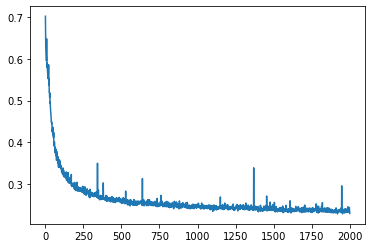

In [9]:
import matplotlib.pyplot as plt
ep=[i for i in range(1,2001)]

plt.plot(ep,mse_list1)

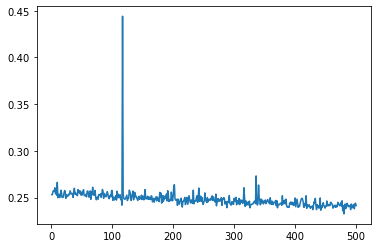

In [10]:
import matplotlib.pyplot as plt
ep=[i for i in range(1,501)]

plt.plot(ep,mse_list1)

In [10]:
with open('mse_esm_2_188_2000_file.txt', 'w') as f:
    for item in mse_list1:
        f.write("%s\n" % item)

In [9]:
with open('mse_random_188_2000_file.txt', 'w') as f:
    for item in mse_list1:
        f.write("%s\n" % item)

In [17]:
print(model)

GNNNet(
  (mol_conv1): GCNConv(78, 78)
  (mol_conv2): GCNConv(78, 156)
  (mol_conv3): GCNConv(156, 312)
  (mol_fc_g1): Linear(in_features=312, out_features=1024, bias=True)
  (mol_fc_g2): Linear(in_features=1024, out_features=128, bias=True)
  (pro_conv1): GCNConv(54, 54)
  (pro_conv2): GCNConv(54, 108)
  (pro_conv3): GCNConv(108, 216)
  (pro_fc_g1): Linear(in_features=216, out_features=1024, bias=True)
  (pro_fc_g2): Linear(in_features=1024, out_features=128, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.2, inplace=False)
  (fc1): Linear(in_features=256, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=512, bias=True)
  (out): Linear(in_features=512, out_features=1, bias=True)
)


In [28]:
t = torch.cuda.get_device_properties(0).total_memory
r = torch.cuda.memory_reserved(0)
a = torch.cuda.memory_allocated(0)
f = r-a  # free inside reserved
f

25794048

In [10]:
torch.cuda.empty_cache()

In [27]:
print(t,r,a,f)

6222839808 3321888768 35023360 3286865408


In [29]:
print(t,r,a,f)

6222839808 60817408 35023360 25794048


In [30]:
torch.cuda.mem_get_info()

(4509466624, 6222839808)

In [33]:
torch.cuda.memory_stats()

OrderedDict([('active.all.allocated', 150749902),
             ('active.all.current', 130),
             ('active.all.freed', 150749772),
             ('active.all.peak', 160),
             ('active.large_pool.allocated', 38701126),
             ('active.large_pool.current', 10),
             ('active.large_pool.freed', 38701116),
             ('active.large_pool.peak', 26),
             ('active.small_pool.allocated', 112048776),
             ('active.small_pool.current', 120),
             ('active.small_pool.freed', 112048656),
             ('active.small_pool.peak', 144),
             ('active_bytes.all.allocated', 1816698561822720),
             ('active_bytes.all.current', 35023360),
             ('active_bytes.all.freed', 1816698526799360),
             ('active_bytes.all.peak', 1744957440),
             ('active_bytes.large_pool.allocated', 1800748219243520),
             ('active_bytes.large_pool.current', 18009600),
             ('active_bytes.large_pool.freed', 1800748201233

In [34]:
torch.cuda.memory_summary()

'|===========================================================================|\n|                  PyTorch CUDA memory summary, device ID 0                 |\n|---------------------------------------------------------------------------|\n|            CUDA OOMs: 0            |        cudaMalloc retries: 2         |\n|===========================================================================|\n|        Metric         | Cur Usage  | Peak Usage | Tot Alloc  | Tot Freed  |\n|---------------------------------------------------------------------------|\n| Allocated memory      |   34202 KB |    1664 MB |    1652 TB |    1652 TB |\n|       from large pool |   17587 KB |    1646 MB |    1637 TB |    1637 TB |\n|       from small pool |   16615 KB |      22 MB |      14 TB |      14 TB |\n|---------------------------------------------------------------------------|\n| Active memory         |   34202 KB |    1664 MB |    1652 TB |    1652 TB |\n|       from large pool |   17587 KB |    1646 MB |

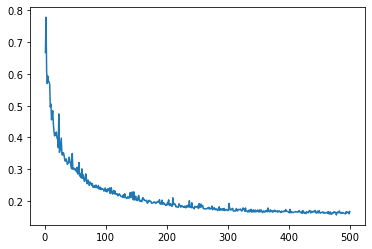

In [15]:
import matplotlib.pyplot as plt
ep=[i for i in range(1,501)]

plt.plot(ep,mse_list1)

In [16]:
with open('mse_pconsc4_500_file.txt', 'w') as f:
    for item in mse_list1:
        f.write("%s\n" % item)

In [6]:
import os
import sys
import torch
import numpy as np
from random import shuffle
import matplotlib.pyplot as plt
from torch_geometric.data import Batch

from emetrics import get_aupr, get_cindex, get_rm2, get_ci, get_mse, get_rmse, get_pearson, get_spearman
from utils import *
from scipy import stats
from gnn import GNNNet
from data_process import create_dataset_for_test


def predicting(model, device, loader):
    model.eval()
    total_preds = torch.Tensor()
    total_labels = torch.Tensor()
    print('Make prediction for {} samples...'.format(len(loader.dataset)))
    with torch.no_grad():
        for data in loader:
            data_mol = data[0].to(device)
            data_pro = data[1].to(device)
            # data = data.to(device)
            output = model(data_mol, data_pro)
            total_preds = torch.cat((total_preds, output.cpu()), 0)
            total_labels = torch.cat((total_labels, data_mol.y.view(-1, 1).cpu()), 0)
    return total_labels.numpy().flatten(), total_preds.numpy().flatten()


def load_model(model_path):
    model = torch.load(model_path)
    return model


def calculate_metrics(Y, P, dataset='davis'):
    # aupr = get_aupr(Y, P)
    cindex = get_cindex(Y, P)  # DeepDTA
    cindex2 = get_ci(Y, P)  # GraphDTA
    rm2 = get_rm2(Y, P)  # DeepDTA
    mse = get_mse(Y, P)
    pearson = get_pearson(Y, P)
    spearman = get_spearman(Y, P)
    rmse = get_rmse(Y, P)

    print('metrics for ', dataset)
    # print('aupr:', aupr)
    print('cindex:', cindex)
    print('cindex2', cindex2)
    print('rm2:', rm2)
    print('mse:', mse)
    print('pearson', pearson)

    result_file_name = 'results/result_random_188_2000_' + model_st + '_' + dataset + '.txt'
    result_str = ''
    result_str += dataset + '\r\n'
    result_str += 'rmse:' + str(rmse) + ' ' + ' mse:' + str(mse) + ' ' + ' pearson:' + str(
        pearson) + ' ' + 'spearman:' + str(spearman) + ' ' + 'ci:' + str(cindex) + ' ' + 'rm2:' + str(rm2)
    print(result_str)
    open(result_file_name, 'w').writelines(result_str)


def plot_density(Y, P, fold=0, dataset='davis'):
    plt.figure(figsize=(10, 5))
    plt.grid(linestyle='--')
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.scatter(P, Y, color='blue', s=40)
    plt.title('density of ' + dataset, fontsize=30, fontweight='bold')
    plt.xlabel('predicted', fontsize=30, fontweight='bold')
    plt.ylabel('measured', fontsize=30, fontweight='bold')
    # plt.xlim(0, 21)
    # plt.ylim(0, 21)
    if dataset == 'davis':
        plt.plot([5, 11], [5, 11], color='black')
    else:
        plt.plot([6, 16], [6, 16], color='black')
    # plt.legend()
    plt.legend(loc=0, numpoints=1)
    leg = plt.gca().get_legend()
    ltext = leg.get_texts()
    plt.setp(ltext, fontsize=12, fontweight='bold')
    plt.savefig(os.path.join('results', dataset + '_random_188_2000_' + str(fold) + '.png'), dpi=500, bbox_inches='tight')




In [7]:

dataset = ['davis', 'kiba'][1]  # dataset selection
model_st = GNNNet.__name__
print('dataset:', dataset)
cuda_name = ['cuda:0', 'cuda:1', 'cuda:2', 'cuda:3'][0] # gpu selection
print('cuda_name:', cuda_name)

 

dataset: kiba
cuda_name: cuda:0


In [8]:
TEST_BATCH_SIZE = 128
models_dir = 'models'
results_dir = 'results'

device = torch.device(cuda_name if torch.cuda.is_available() else 'cpu')
#model_file_name = 'models_sample/model1111_' + model_st + '_' + dataset + '.model'
model_file_name = 'models_sample/model_kiba_random_188_2000_GNNNet_kiba_1.model'
result_file_name = 'results/result_random_188_2000_' + model_st + '_' + dataset + '.txt'

model = GNNNet()
model.to(device)
model.load_state_dict(torch.load(model_file_name, map_location=cuda_name))
test_data = create_dataset_for_test(dataset,method)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=TEST_BATCH_SIZE, shuffle=False,
                                              collate_fn=collate)

Y, P = predicting(model, device, test_loader)
calculate_metrics(Y, P, dataset)
    


GNNNet Loaded
dataset: kiba
test entries: 15932 effective test entries 15908
effective drugs,effective prot: 2068 187


/disk/scratch/DGraphDTA/utils.py:52: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)
  GCNData_mol = DATA.Data(x=torch.Tensor(features),


Make prediction for 15908 samples...
metrics for  kiba
cindex: 0.8520819188757928
cindex2 0.8511189152501929
rm2: 0.6537591848377793
mse: 0.22186139
pearson 0.819153153090887
kiba
rmse:0.4710216473365081  mse:0.22186139  pearson:0.819153153090887 spearman:0.8192545261805239 ci:0.8520819188757928 rm2:0.6537591848377793


In [26]:
TEST_BATCH_SIZE = 128
models_dir = 'models'
results_dir = 'results'

device = torch.device(cuda_name if torch.cuda.is_available() else 'cpu')
#model_file_name = 'models_sample/model1111_' + model_st + '_' + dataset + '.model'
model_file_name = 'models_sample/model_kiba_esm__188_2000_GNNNet_kiba_1.model'
result_file_name = 'results/resul_esm1_188_2000_' + model_st + '_' + dataset + '.txt'

model = GNNNet()
model.to(device)
model.load_state_dict(torch.load(model_file_name, map_location=cuda_name))
test_data = create_dataset_for_test(dataset,method)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=TEST_BATCH_SIZE, shuffle=False,
                                              collate_fn=collate)

Y, P = predicting(model, device, test_loader)
calculate_metrics(Y, P, dataset)
    


GNNNet Loaded
dataset: kiba
test entries: 15932 effective test entries 15908
effective drugs,effective prot: 2068 187
Make prediction for 15908 samples...
metrics for  kiba
cindex: 0.8534776186807934
cindex2 0.8518979162871739
rm2: 0.6435438146015201
mse: 0.21435104
pearson 0.8267502330575496
kiba
rmse:0.4629806076987733  mse:0.21435104  pearson:0.8267502330575496 spearman:0.8207208767268495 ci:0.8534776186807934 rm2:0.6435438146015201


No handles with labels found to put in legend.


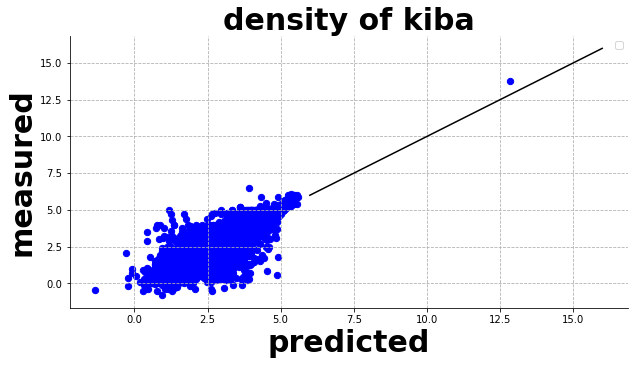

In [9]:
plot_density(Y, P, fold, dataset)

No handles with labels found to put in legend.


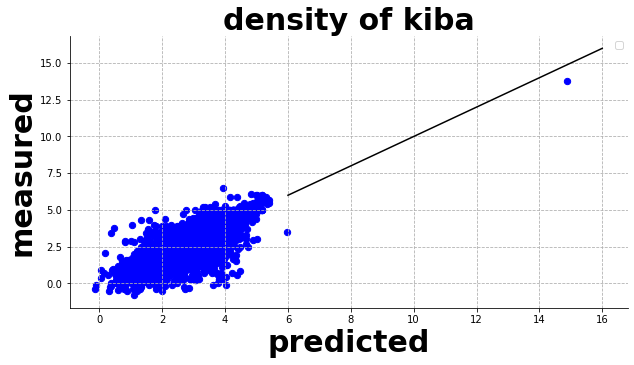

In [27]:
plot_density(Y, P, fold, dataset)

No handles with labels found to put in legend.


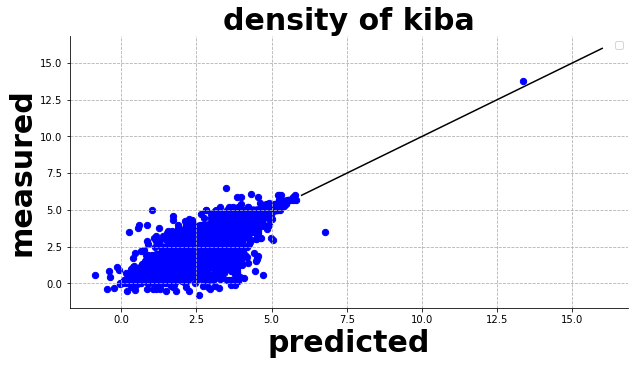

In [20]:
plot_density(Y, P, fold, dataset)

No handles with labels found to put in legend.


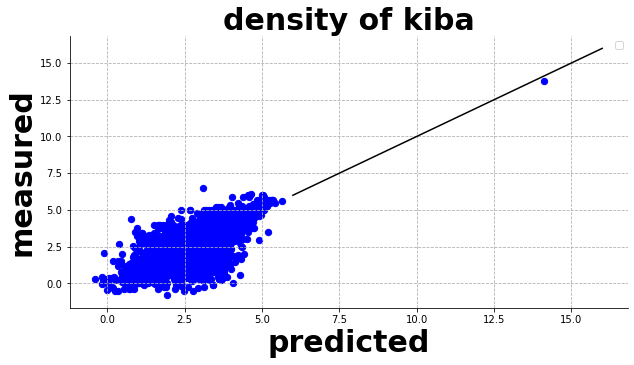

In [13]:
plot_density(Y, P, fold, dataset)

No handles with labels found to put in legend.


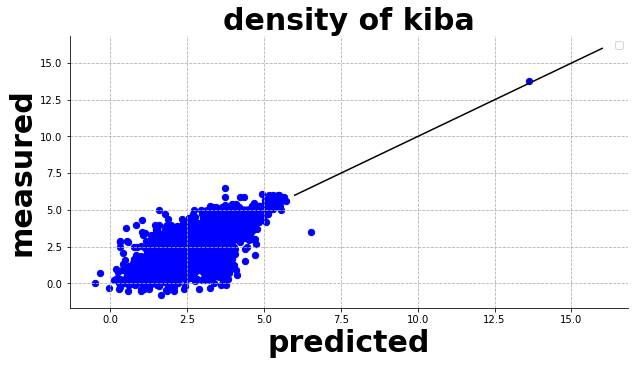

In [11]:
plot_density(Y, P, fold, dataset)

In [19]:
with open('esm_188_500_gt1_file.txt', 'w') as f:
    for item in list(Y):
        f.write("%s\n" % item)

In [18]:
with open('esm_188_500_pred1_file.txt', 'w') as f:
    for item in list(P):
        f.write("%s\n" % item)

In [18]:
test_loader

In [10]:
Y

array([14.400163, 12.399998, 11.400001, ..., 11.400001, 11.5     ,
       11.5     ], dtype=float32)

In [11]:
P

array([13.495261, 12.662182, 11.396714, ..., 11.395967, 11.504625,
       11.45087 ], dtype=float32)

In [48]:

my_file = open("alpha500_pred_file.txt", "r")
content = my_file.read()
content=content.splitlines()
content=[float(i) for i in content]
print(content)

[13.572652, 12.826997, 11.444092, 10.318037, 11.341069, 11.559343, 11.85205, 11.203673, 10.334731, 11.582762, 13.900543, 12.97712, 11.691866, 12.792691, 14.458044, 11.520013, 12.257853, 11.212511, 12.006573, 11.880769, 11.1070795, 11.378011, 11.148856, 11.216189, 11.134102, 12.008484, 10.905703, 11.242366, 11.19693, 10.343345, 11.86922, 12.26573, 10.585809, 12.672529, 11.919928, 10.658084, 11.237454, 11.279299, 11.310264, 11.870662, 11.057477, 11.480621, 12.106813, 11.613607, 10.156403, 11.307625, 10.7861595, 11.92269, 11.224873, 12.009879, 10.479592, 11.211487, 11.759775, 11.364248, 11.742957, 12.0676775, 12.2011385, 11.140188, 11.8148365, 11.463266, 11.225105, 11.48033, 12.019633, 11.547219, 11.362604, 12.447442, 10.850902, 11.337198, 10.871161, 11.64067, 11.490308, 11.450138, 11.544379, 10.872649, 12.062119, 11.466935, 11.917785, 11.780647, 11.215674, 12.046588, 11.4404955, 10.219847, 11.889244, 11.15485, 11.559784, 12.427896, 12.339859, 10.860705, 12.2455225, 11.580148, 11.404127, 

In [49]:
P1=np.asarray(content)

In [50]:
P1

array([13.572652 , 12.826997 , 11.444092 , ..., 11.422882 , 11.5344305,
       11.544348 ])

In [52]:
plt.scatter(P,color='blue')

TypeError: scatter() missing 1 required positional argument: 'y'

In [37]:
type(content)

str

In [41]:
P

array([13.495261, 12.662182, 11.396714, ..., 11.395967, 11.504625,
       11.45087 ], dtype=float32)

No handles with labels found to put in legend.


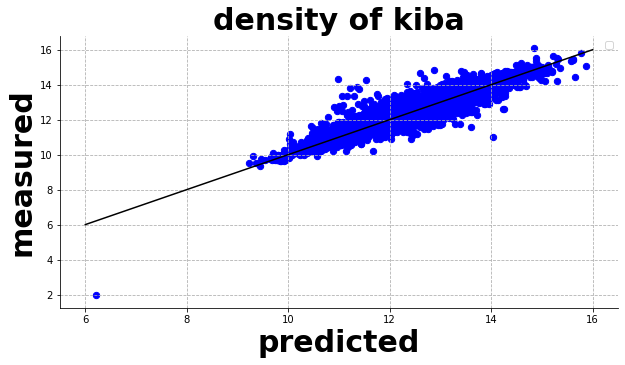

In [53]:
plot_density(P1, P, fold, dataset)

In [12]:
with open('pconsc4_500_gt_file.txt', 'w') as f:
    for item in list(Y):
        f.write("%s\n" % item)

In [13]:
with open('pconsc4_500_pred_file.txt', 'w') as f:
    for item in list(P):
        f.write("%s\n" % item)

No handles with labels found to put in legend.


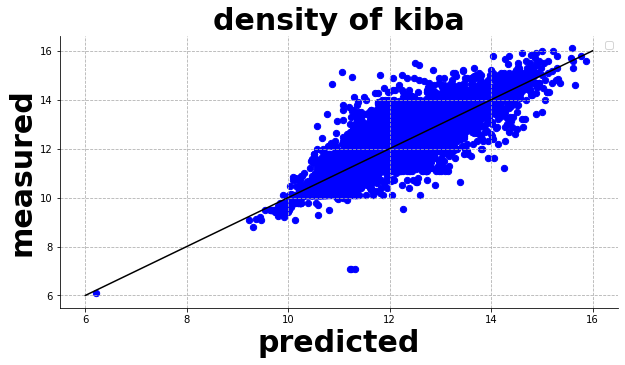

In [54]:
plot_density(Y, P, fold, dataset)

In [58]:
def plot_density1(Y, P,P1, fold=0, dataset='davis'):
    plt.figure(figsize=(10, 5))
    plt.grid(linestyle='--')
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    plt.scatter(P, Y, color='blue', s=40)
    plt.scatter(P1, Y, color='green', s=40)
    plt.title('density of ' + dataset, fontsize=30, fontweight='bold')
    plt.xlabel('predicted', fontsize=30, fontweight='bold')
    plt.ylabel('measured', fontsize=30, fontweight='bold')
    # plt.xlim(0, 21)
    # plt.ylim(0, 21)
    if dataset == 'davis':
        plt.plot([5, 11], [5, 11], color='black')
    else:
        plt.plot([6, 16], [6, 16], color='black')
    # plt.legend()
    plt.legend(loc=0, numpoints=1)
    leg = plt.gca().get_legend()
    ltext = leg.get_texts()
    plt.setp(ltext, fontsize=12, fontweight='bold')
    #plt.savefig(os.path.join('results', dataset + 'alpha v/s pconsc4_500_' + str(fold) + '.png'), dpi=500, bbox_inches='tight')


No handles with labels found to put in legend.


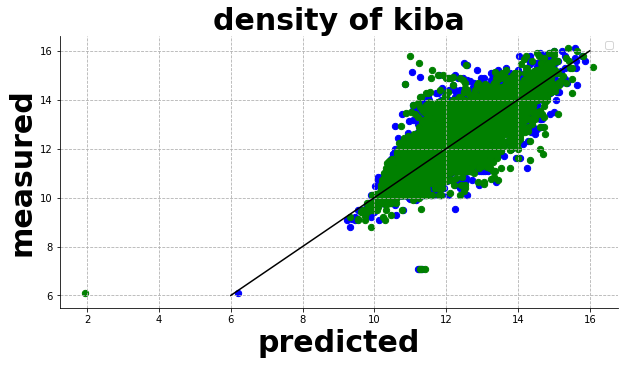

In [59]:
plot_density1(Y, P,P1, fold, dataset)

No handles with labels found to put in legend.


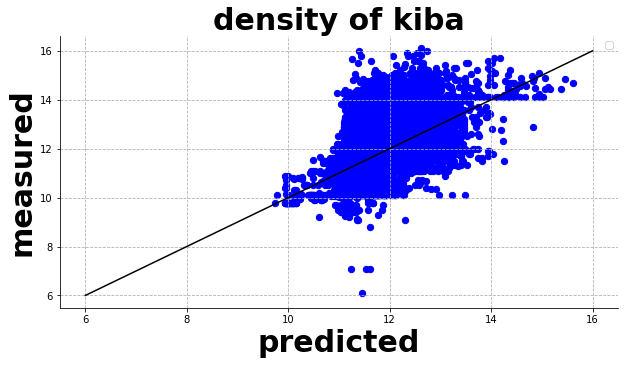

In [13]:
plot_density(Y, P, fold, dataset)

In [ ]:
plot_density(Y, P, fold, dataset)

In [ ]:
import torch
torch.cuda.empty_cache()

In [ ]:
import os
os.environ['CUDA_VISIBLE_DEVICES']='2, 3'